In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.environment import prepare_trading_env
from src.utils import load_config, display_env, plot_results, save_model
from src import optim, model

from stable_baselines3.common.vec_env import DummyVecEnv

In [3]:
cfg = load_config("config.yaml")
cfg

{'env': {'ticker': 'MSFT',
  'interval': '1d',
  'period': '2y',
  'train_prop': 0.7,
  'window_size': 15,
  'indicators': ['MOM', 'MACD', 'MFI', 'RSI', 'ATR', 'CO', 'OBV']},
 'policy': {'net_arch': {'vf': [128, 128], 'pi': [128, 64]},
  'lstm_hidden_size': 64,
  'n_lstm_layers': 2,
  'activation_fn': 'Tanh'},
 'ppo': {'batch_size': 64,
  'n_steps': 4,
  'gamma': 0.99,
  'n_epochs': 5,
  'clip_range': 0.2,
  'verbose': 1},
 'optim': {'n_episodes': 200,
  'max_no_improvement_evals': 50,
  'min_evals': 50,
  'n_steps_per_episode': -1}}

In [4]:
env_train, env_test = prepare_trading_env(cfg["env"]) 

[*********************100%***********************]  1 of 1 completed


info: {'total_reward': 58.83006286621094, 'total_profit': 0.7236275930307164, 'position': 0}


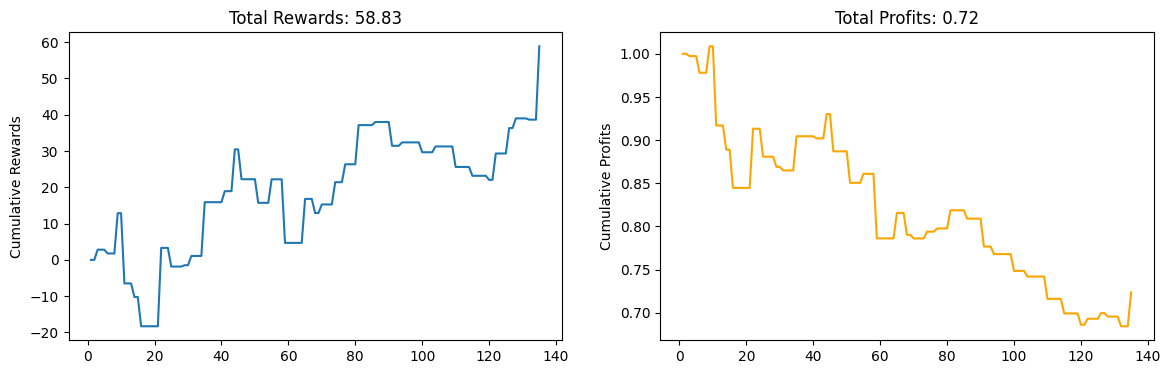

In [5]:
rewards, profits = env_test.run_episode()
plot_results(rewards, profits)

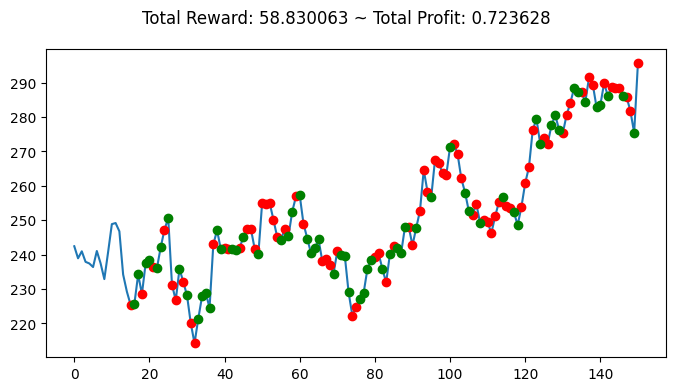

In [6]:
display_env(env_test)

In [7]:
ppo = model.prepare_ppo(cfg, env_train)
ppo.policy

Using cpu device


RecurrentActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): Tanh()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=2, bias=True)
  (value_net): Linear(in_features=128, out_features=1, bias=True)
  (lstm_actor): LSTM(105, 64, num_layers=2)
  (lstm_critic): LSTM(105, 64, num_layers=2)
)

In [8]:
optim.train(ppo, env_eval=env_test, cfg=cfg)

Output()

---------------------------
| time/              |    |
|    fps             | 81 |
|    iterations      | 1  |
|    time_elapsed    | 0  |
|    total_timesteps | 4  |
---------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 3            |
|    time_elapsed         | 0            |
|    total_timesteps      | 12           |
| train/                  |              |
|    approx_kl            | 0.0026014447 |
|    clip_fraction        | 0.15         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.506       |
|    explained_variance   | 0.328        |
|    learning_rate        | 0.01         |
|    loss                 | 0.273        |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0249      |
|    value_loss           | 2.51         |
------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 4         |
|    time_elapsed         | 0         |
|    total_timesteps      | 16        |
| train/                  |           |
|    approx_kl            | 0.4090894 |
|    clip_fraction        | 0.75      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.389    |
|    explained_variance   | -0.753    |
|    learning_rate        | 0.01      |
|    loss                 | 0.938     |
|    n_updates            | 15        |
|    policy_gradient_loss | -0.0207   |
|    value_loss           | 1.83      |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 5             |
|    time_elapsed         | 0             |
|    total_timesteps      | 20            |
| train/                  |               |
|    approx_kl            | 3.3020973e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0521       |
|    explained_variance   | -101          |
|    learning_rate        | 0.01          |
|    loss                 | 0.562         |
|    n_updates            | 20            |
|    policy_gradient_loss | -0.00108      |
|    value_loss           | 3.09          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 6             |
|    time_elapsed         | 1             |
|    total_timesteps      | 24            |
| train/                  |               |
|    approx_kl            | 1.1920929e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0306       |
|    explained_variance   | -39.1         |
|    learning_rate        | 0.01          |
|    loss                 | 0.143         |
|    n_updates            | 25            |
|    policy_gradient_loss | -4.09e-06     |
|    value_loss           | 0.567         |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 7             |
|    time_elapsed         | 1             |
|    total_timesteps      | 28            |
| train/                  |               |
|    approx_kl            | 2.3841858e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0235       |
|    explained_variance   | -1.58e+03     |
|    learning_rate        | 0.01          |
|    loss                 | 0.0652        |
|    n_updates            | 30            |
|    policy_gradient_loss | -1.61e-07     |
|    value_loss           | 0.0802        |
-------------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 23       |
|    iterations           | 8        |
|    time_elapsed         | 1        |
|    total_timesteps      | 32       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.02    |
|    explained_variance   | -483     |
|    learning_rate        | 0.01     |
|    loss                 | 0.0167   |
|    n_updates            | 35       |
|    policy_gradient_loss | 3.28e-08 |
|    value_loss           | 0.0586   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 24       |
|    iterations           | 9        |
|    time_elapsed         | 1        |
|    total_timesteps      | 36       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0181  |
|    explained_variance   | -424     |
|    learning_rate        | 0.01     |
|    loss                 | 0.0081   |
|    n_updates            | 40       |
|    policy_gradient_loss | 8.94e-09 |
|    value_loss           | 0.0132   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 10       |
|    time_elapsed         | 1        |
|    total_timesteps      | 40       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0171  |
|    explained_variance   | -10.2    |
|    learning_rate        | 0.00999  |
|    loss                 | 0.0124   |
|    n_updates            | 45       |
|    policy_gradient_loss | 5.07e-08 |
|    value_loss           | 0.0183   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 11        |
|    time_elapsed         | 1         |
|    total_timesteps      | 44        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0164   |
|    explained_variance   | -31.8     |
|    learning_rate        | 0.00999   |
|    loss                 | 0.000928  |
|    n_updates            | 50        |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00453   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 26       |
|    iterations           | 12       |
|    time_elapsed         | 1        |
|    total_timesteps      | 48       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0161  |
|    explained_variance   | -78.9    |
|    learning_rate        | 0.00999  |
|    loss                 | 0.00168  |
|    n_updates            | 55       |
|    policy_gradient_loss | 6.26e-08 |
|    value_loss           | 0.00413  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 13        |
|    time_elapsed         | 1         |
|    total_timesteps      | 52        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0159   |
|    explained_variance   | -56.3     |
|    learning_rate        | 0.00999   |
|    loss                 | 4.43e-05  |
|    n_updates            | 60        |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00171   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 14        |
|    time_elapsed         | 2         |
|    total_timesteps      | 56        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0159   |
|    explained_variance   | -11.5     |
|    learning_rate        | 0.00999   |
|    loss                 | 0.000109  |
|    n_updates            | 65        |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000633  |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 26       |
|    iterations           | 15       |
|    time_elapsed         | 2        |
|    total_timesteps      | 60       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0159  |
|    explained_variance   | -16.9    |
|    learning_rate        | 0.00999  |
|    loss                 | 0.000321 |
|    n_updates            | 70       |
|    policy_gradient_loss | -1.3e-07 |
|    value_loss           | 0.00113  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 16        |
|    time_elapsed         | 2         |
|    total_timesteps      | 64        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0158   |
|    explained_variance   | -31.1     |
|    learning_rate        | 0.00999   |
|    loss                 | 0.000118  |
|    n_updates            | 75        |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000871  |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 17       |
|    time_elapsed         | 2        |
|    total_timesteps      | 68       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0158  |
|    explained_variance   | 0.493    |
|    learning_rate        | 0.00999  |
|    loss                 | 8.45e-05 |
|    n_updates            | 80       |
|    policy_gradient_loss | 1.43e-07 |
|    value_loss           | 0.000427 |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 18       |
|    time_elapsed         | 2        |
|    total_timesteps      | 72       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0157  |
|    explained_variance   | -2.91    |
|    learning_rate        | 0.00999  |
|    loss                 | 0.000196 |
|    n_updates            | 85       |
|    policy_gradient_loss | 4.17e-08 |
|    value_loss           | 0.00101  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 19        |
|    time_elapsed         | 2         |
|    total_timesteps      | 76        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0157   |
|    explained_variance   | -6.39     |
|    learning_rate        | 0.00999   |
|    loss                 | 6.56e-05  |
|    n_updates            | 90        |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000245  |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 28       |
|    iterations           | 20       |
|    time_elapsed         | 2        |
|    total_timesteps      | 80       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0157  |
|    explained_variance   | -9.65    |
|    learning_rate        | 0.00999  |
|    loss                 | 0.000515 |
|    n_updates            | 95       |
|    policy_gradient_loss | 2.98e-08 |
|    value_loss           | 0.00152  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 21        |
|    time_elapsed         | 3         |
|    total_timesteps      | 84        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0157   |
|    explained_variance   | -4.73     |
|    learning_rate        | 0.00999   |
|    loss                 | 0.00179   |
|    n_updates            | 100       |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00247   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 22        |
|    time_elapsed         | 3         |
|    total_timesteps      | 88        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0158   |
|    explained_variance   | -9.86     |
|    learning_rate        | 0.00999   |
|    loss                 | 0.00182   |
|    n_updates            | 105       |
|    policy_gradient_loss | -1.53e-08 |
|    value_loss           | 0.00264   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 23       |
|    time_elapsed         | 3        |
|    total_timesteps      | 92       |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0158  |
|    explained_variance   | -0.236   |
|    learning_rate        | 0.00999  |
|    loss                 | 0.00187  |
|    n_updates            | 110      |
|    policy_gradient_loss | 2.38e-08 |
|    value_loss           | 0.00269  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 24        |
|    time_elapsed         | 3         |
|    total_timesteps      | 96        |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0159   |
|    explained_variance   | -25.3     |
|    learning_rate        | 0.00999   |
|    loss                 | 0.000449  |
|    n_updates            | 115       |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000726  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 25        |
|    time_elapsed         | 3         |
|    total_timesteps      | 100       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0159   |
|    explained_variance   | -0.467    |
|    learning_rate        | 0.00999   |
|    loss                 | 2.1e-05   |
|    n_updates            | 120       |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000176  |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 26       |
|    time_elapsed         | 3        |
|    total_timesteps      | 104      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0159  |
|    explained_variance   | -140     |
|    learning_rate        | 0.00999  |
|    loss                 | 0.000195 |
|    n_updates            | 125      |
|    policy_gradient_loss | -7.9e-08 |
|    value_loss           | 0.00266  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 27        |
|    time_elapsed         | 3         |
|    total_timesteps      | 108       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0159   |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00998   |
|    loss                 | 0.000348  |
|    n_updates            | 130       |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00275   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 28        |
|    time_elapsed         | 4         |
|    total_timesteps      | 112       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0159   |
|    explained_variance   | -15.3     |
|    learning_rate        | 0.00998   |
|    loss                 | 7e-05     |
|    n_updates            | 135       |
|    policy_gradient_loss | -9.63e-08 |
|    value_loss           | 0.000289  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 29        |
|    time_elapsed         | 4         |
|    total_timesteps      | 116       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0159   |
|    explained_variance   | -15       |
|    learning_rate        | 0.00998   |
|    loss                 | 0.000372  |
|    n_updates            | 140       |
|    policy_gradient_loss | -1.77e-07 |
|    value_loss           | 0.000861  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 30        |
|    time_elapsed         | 4         |
|    total_timesteps      | 120       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0158   |
|    explained_variance   | -470      |
|    learning_rate        | 0.00998   |
|    loss                 | 0.000197  |
|    n_updates            | 145       |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.000643  |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 31       |
|    time_elapsed         | 4        |
|    total_timesteps      | 124      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0158  |
|    explained_variance   | -4.21    |
|    learning_rate        | 0.00998  |
|    loss                 | 0.00221  |
|    n_updates            | 150      |
|    policy_gradient_loss | 1.79e-07 |
|    value_loss           | 0.00953  |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 32       |
|    time_elapsed         | 4        |
|    total_timesteps      | 128      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0158  |
|    explained_variance   | -148     |
|    learning_rate        | 0.00998  |
|    loss                 | 0.0092   |
|    n_updates            | 155      |
|    policy_gradient_loss | 3.8e-08  |
|    value_loss           | 0.0156   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 33        |
|    time_elapsed         | 4         |
|    total_timesteps      | 132       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0158   |
|    explained_variance   | -726      |
|    learning_rate        | 0.00998   |
|    loss                 | 0.00218   |
|    n_updates            | 160       |
|    policy_gradient_loss | -1.58e-07 |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 34        |
|    time_elapsed         | 4         |
|    total_timesteps      | 136       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.016    |
|    explained_variance   | -1.32e+03 |
|    learning_rate        | 0.00998   |
|    loss                 | 6.78e-05  |
|    n_updates            | 165       |
|    policy_gradient_loss | -1.37e-07 |
|    value_loss           | 0.000263  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 35        |
|    time_elapsed         | 5         |
|    total_timesteps      | 140       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0161   |
|    explained_variance   | -9.08     |
|    learning_rate        | 0.00998   |
|    loss                 | 4.76e-05  |
|    n_updates            | 170       |
|    policy_gradient_loss | -1.46e-07 |
|    value_loss           | 7.14e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 28        |
|    iterations           | 36        |
|    time_elapsed         | 5         |
|    total_timesteps      | 144       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0163   |
|    explained_variance   | -0.636    |
|    learning_rate        | 0.00998   |
|    loss                 | 0.000462  |
|    n_updates            | 175       |
|    policy_gradient_loss | -1.23e-06 |
|    value_loss           | 0.000753  |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 37       |
|    time_elapsed         | 5        |
|    total_timesteps      | 148      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0167  |
|    explained_variance   | -29.5    |
|    learning_rate        | 0.00998  |
|    loss                 | 0.000386 |
|    n_updates            | 180      |
|    policy_gradient_loss | -8.3e-06 |
|    value_loss           | 0.0068   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 38        |
|    time_elapsed         | 5         |
|    total_timesteps      | 152       |
| train/                  |           |
|    approx_kl            | 3.5487034 |
|    clip_fraction        | 0.6       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.103    |
|    explained_variance   | -0.000183 |
|    learning_rate        | 0.00998   |
|    loss                 | 3.07e+03  |
|    n_updates            | 185       |
|    policy_gradient_loss | -0.00529  |
|    value_loss           | 6.31e+03  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 27        |
|    iterations           | 39        |
|    time_elapsed         | 5         |
|    total_timesteps      | 156       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.014    |
|    explained_variance   | -27.2     |
|    learning_rate        | 0.00998   |
|    loss                 | 0.125     |
|    n_updates            | 190       |
|    policy_gradient_loss | -3.69e-06 |
|    value_loss           | 0.253     |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 27       |
|    iterations           | 40       |
|    time_elapsed         | 5        |
|    total_timesteps      | 160      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0143  |
|    explained_variance   | 0.732    |
|    learning_rate        | 0.00998  |
|    loss                 | 0.0503   |
|    n_updates            | 195      |
|    policy_gradient_loss | 4.02e-08 |
|    value_loss           | 0.0428   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 41        |
|    time_elapsed         | 6         |
|    total_timesteps      | 164       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0146   |
|    explained_variance   | -6.64     |
|    learning_rate        | 0.00998   |
|    loss                 | 0.0087    |
|    n_updates            | 200       |
|    policy_gradient_loss | -1.51e-07 |
|    value_loss           | 0.0463    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 42        |
|    time_elapsed         | 6         |
|    total_timesteps      | 168       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0149   |
|    explained_variance   | 0.592     |
|    learning_rate        | 0.00998   |
|    loss                 | 0.172     |
|    n_updates            | 205       |
|    policy_gradient_loss | -3.41e-07 |
|    value_loss           | 1.75      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 43        |
|    time_elapsed         | 6         |
|    total_timesteps      | 172       |
| train/                  |           |
|    approx_kl            | 1.0927773 |
|    clip_fraction        | 0.25      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0738   |
|    explained_variance   | -297      |
|    learning_rate        | 0.00998   |
|    loss                 | -0.0122   |
|    n_updates            | 210       |
|    policy_gradient_loss | -0.0202   |
|    value_loss           | 0.119     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 44        |
|    time_elapsed         | 6         |
|    total_timesteps      | 176       |
| train/                  |           |
|    approx_kl            | 3.0088854 |
|    clip_fraction        | 0.35      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.125    |
|    explained_variance   | -2.7e+03  |
|    learning_rate        | 0.00997   |
|    loss                 | 0.0654    |
|    n_updates            | 215       |
|    policy_gradient_loss | -0.0146   |
|    value_loss           | 0.0139    |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 26            |
|    iterations           | 45            |
|    time_elapsed         | 6             |
|    total_timesteps      | 180           |
| train/                  |               |
|    approx_kl            | 1.1920929e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.06         |
|    explained_variance   | -0.000313     |
|    learning_rate        | 0.00997       |
|    loss                 | 50.7          |
|    n_updates            | 220           |
|    policy_gradient_loss | 0.00103       |
|    value_loss           | 115           |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 26            |
|    iterations           | 46            |
|    time_elapsed         | 6             |
|    total_timesteps      | 184           |
| train/                  |               |
|    approx_kl            | 0.00016248226 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0961       |
|    explained_variance   | 0.115         |
|    learning_rate        | 0.00997       |
|    loss                 | 10.7          |
|    n_updates            | 225           |
|    policy_gradient_loss | -0.00591      |
|    value_loss           | 64.1          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 26            |
|    iterations           | 47            |
|    time_elapsed         | 7             |
|    total_timesteps      | 188           |
| train/                  |               |
|    approx_kl            | 1.7881393e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0664       |
|    explained_variance   | -189          |
|    learning_rate        | 0.00997       |
|    loss                 | 7.49          |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.000288     |
|    value_loss           | 21.4          |
-------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 26           |
|    iterations           | 48           |
|    time_elapsed         | 7            |
|    total_timesteps      | 192          |
| train/                  |              |
|    approx_kl            | 0.0018745512 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0898      |
|    explained_variance   | -0.127       |
|    learning_rate        | 0.00997      |
|    loss                 | 12.6         |
|    n_updates            | 235          |
|    policy_gradient_loss | -0.0127      |
|    value_loss           | 46           |
------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 49        |
|    time_elapsed         | 7         |
|    total_timesteps      | 196       |
| train/                  |           |
|    approx_kl            | 1.2953821 |
|    clip_fraction        | 0.35      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.106    |
|    explained_variance   | -2.35     |
|    learning_rate        | 0.00997   |
|    loss                 | 0.0732    |
|    n_updates            | 240       |
|    policy_gradient_loss | -0.0795   |
|    value_loss           | 0.699     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 50        |
|    time_elapsed         | 7         |
|    total_timesteps      | 200       |
| train/                  |           |
|    approx_kl            | 1.3265308 |
|    clip_fraction        | 0.2       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0731   |
|    explained_variance   | -0.0307   |
|    learning_rate        | 0.00997   |
|    loss                 | 45.1      |
|    n_updates            | 245       |
|    policy_gradient_loss | -0.0178   |
|    value_loss           | 141       |
---------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 26           |
|    iterations           | 51           |
|    time_elapsed         | 7            |
|    total_timesteps      | 204          |
| train/                  |              |
|    approx_kl            | 7.265806e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0179      |
|    explained_variance   | -45.9        |
|    learning_rate        | 0.00997      |
|    loss                 | 0.235        |
|    n_updates            | 250          |
|    policy_gradient_loss | -0.000498    |
|    value_loss           | 3.97         |
------------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 26       |
|    iterations           | 52       |
|    time_elapsed         | 7        |
|    total_timesteps      | 208      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00526 |
|    explained_variance   | -1.02    |
|    learning_rate        | 0.00997  |
|    loss                 | 0.166    |
|    n_updates            | 255      |
|    policy_gradient_loss | 3.01e-06 |
|    value_loss           | 1.29     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 53        |
|    time_elapsed         | 8         |
|    total_timesteps      | 212       |
| train/                  |           |
|    approx_kl            | 2.7139854 |
|    clip_fraction        | 0.35      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0158   |
|    explained_variance   | -1.7e+03  |
|    learning_rate        | 0.00997   |
|    loss                 | 0.277     |
|    n_updates            | 260       |
|    policy_gradient_loss | -0.0419   |
|    value_loss           | 0.51      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 26       |
|    iterations           | 54       |
|    time_elapsed         | 8        |
|    total_timesteps      | 216      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00303 |
|    explained_variance   | 0.13     |
|    learning_rate        | 0.00997  |
|    loss                 | 12.9     |
|    n_updates            | 265      |
|    policy_gradient_loss | 4.4e-06  |
|    value_loss           | 49.9     |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 55       |
|    time_elapsed         | 8        |
|    total_timesteps      | 220      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00352 |
|    explained_variance   | -42.5    |
|    learning_rate        | 0.00997  |
|    loss                 | 0.319    |
|    n_updates            | 270      |
|    policy_gradient_loss | 5.85e-06 |
|    value_loss           | 1.13     |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 56       |
|    time_elapsed         | 8        |
|    total_timesteps      | 224      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00273 |
|    explained_variance   | -0.14    |
|    learning_rate        | 0.00997  |
|    loss                 | 1.48     |
|    n_updates            | 275      |
|    policy_gradient_loss | 2.43e-06 |
|    value_loss           | 4.44     |
--------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 26            |
|    iterations           | 57            |
|    time_elapsed         | 8             |
|    total_timesteps      | 228           |
| train/                  |               |
|    approx_kl            | 4.5239925e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0118       |
|    explained_variance   | 0.0813        |
|    learning_rate        | 0.00997       |
|    loss                 | 0.372         |
|    n_updates            | 280           |
|    policy_gradient_loss | -0.0021       |
|    value_loss           | 0.587         |
-------------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 26       |
|    iterations           | 58       |
|    time_elapsed         | 8        |
|    total_timesteps      | 232      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00196 |
|    explained_variance   | 0.0134   |
|    learning_rate        | 0.00997  |
|    loss                 | 55.4     |
|    n_updates            | 285      |
|    policy_gradient_loss | 2.09e-06 |
|    value_loss           | 143      |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 26        |
|    iterations           | 59        |
|    time_elapsed         | 9         |
|    total_timesteps      | 236       |
| train/                  |           |
|    approx_kl            | 2.0489488 |
|    clip_fraction        | 0.15      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0441   |
|    explained_variance   | 0.431     |
|    learning_rate        | 0.00997   |
|    loss                 | 2.46      |
|    n_updates            | 290       |
|    policy_gradient_loss | -0.0223   |
|    value_loss           | 2.56      |
---------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 26         |
|    iterations           | 60         |
|    time_elapsed         | 9          |
|    total_timesteps      | 240        |
| train/                  |            |
|    approx_kl            | 0.11544302 |
|    clip_fraction        | 0.1        |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.0703    |
|    explained_variance   | 0.0073     |
|    learning_rate        | 0.00997    |
|    loss                 | 2.79       |
|    n_updates            | 295        |
|    policy_gradient_loss | -0.0104    |
|    value_loss           | 6.15       |
----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 26            |
|    iterations           | 61            |
|    time_elapsed         | 9             |
|    total_timesteps      | 244           |
| train/                  |               |
|    approx_kl            | 1.4901161e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00454      |
|    explained_variance   | 0.00825       |
|    learning_rate        | 0.00996       |
|    loss                 | 2.42          |
|    n_updates            | 300           |
|    policy_gradient_loss | -1.57e-05     |
|    value_loss           | 6.63          |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 62        |
|    time_elapsed         | 9         |
|    total_timesteps      | 248       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00301  |
|    explained_variance   | 0.0371    |
|    learning_rate        | 0.00996   |
|    loss                 | 3.26      |
|    n_updates            | 305       |
|    policy_gradient_loss | -6.29e-07 |
|    value_loss           | 8.38      |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 25            |
|    iterations           | 63            |
|    time_elapsed         | 9             |
|    total_timesteps      | 252           |
| train/                  |               |
|    approx_kl            | 1.1920929e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00844      |
|    explained_variance   | -0.00313      |
|    learning_rate        | 0.00996       |
|    loss                 | 35            |
|    n_updates            | 310           |
|    policy_gradient_loss | 0.00011       |
|    value_loss           | 89.9          |
-------------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 25            |
|    iterations           | 64            |
|    time_elapsed         | 9             |
|    total_timesteps      | 256           |
| train/                  |               |
|    approx_kl            | 2.1129847e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0269       |
|    explained_variance   | 0.000386      |
|    learning_rate        | 0.00996       |
|    loss                 | 6.04          |
|    n_updates            | 315           |
|    policy_gradient_loss | -0.00173      |
|    value_loss           | 25.8          |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 65        |
|    time_elapsed         | 10        |
|    total_timesteps      | 260       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00227  |
|    explained_variance   | 0.00699   |
|    learning_rate        | 0.00996   |
|    loss                 | 21.1      |
|    n_updates            | 320       |
|    policy_gradient_loss | -2.54e-06 |
|    value_loss           | 76.6      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 66        |
|    time_elapsed         | 10        |
|    total_timesteps      | 264       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00451  |
|    explained_variance   | 0.0152    |
|    learning_rate        | 0.00996   |
|    loss                 | 35.6      |
|    n_updates            | 325       |
|    policy_gradient_loss | -1.13e-05 |
|    value_loss           | 52.2      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 67        |
|    time_elapsed         | 10        |
|    total_timesteps      | 268       |
| train/                  |           |
|    approx_kl            | 2.0597804 |
|    clip_fraction        | 0.05      |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00748  |
|    explained_variance   | 0.0257    |
|    learning_rate        | 0.00996   |
|    loss                 | -0.0136   |
|    n_updates            | 330       |
|    policy_gradient_loss | -0.0122   |
|    value_loss           | 0.182     |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 25            |
|    iterations           | 68            |
|    time_elapsed         | 10            |
|    total_timesteps      | 272           |
| train/                  |               |
|    approx_kl            | 2.5480986e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0141       |
|    explained_variance   | -0.00265      |
|    learning_rate        | 0.00996       |
|    loss                 | 0.215         |
|    n_updates            | 335           |
|    policy_gradient_loss | 0.000494      |
|    value_loss           | 0.431         |
-------------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 69       |
|    time_elapsed         | 10       |
|    total_timesteps      | 276      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00168 |
|    explained_variance   | -0.00219 |
|    learning_rate        | 0.00996  |
|    loss                 | 5.19     |
|    n_updates            | 340      |
|    policy_gradient_loss | -1.6e-05 |
|    value_loss           | 11.5     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 70        |
|    time_elapsed         | 10        |
|    total_timesteps      | 280       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00129  |
|    explained_variance   | -0.000688 |
|    learning_rate        | 0.00996   |
|    loss                 | 14.2      |
|    n_updates            | 345       |
|    policy_gradient_loss | 7.84e-06  |
|    value_loss           | 28.9      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 71       |
|    time_elapsed         | 11       |
|    total_timesteps      | 284      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00117 |
|    explained_variance   | -0.00219 |
|    learning_rate        | 0.00996  |
|    loss                 | 3.56     |
|    n_updates            | 350      |
|    policy_gradient_loss | 4.14e-06 |
|    value_loss           | 7.91     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 72        |
|    time_elapsed         | 11        |
|    total_timesteps      | 288       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00108  |
|    explained_variance   | -0.00132  |
|    learning_rate        | 0.00996   |
|    loss                 | 14.4      |
|    n_updates            | 355       |
|    policy_gradient_loss | -1.12e-06 |
|    value_loss           | 29.2      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 73       |
|    time_elapsed         | 11       |
|    total_timesteps      | 292      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00115 |
|    explained_variance   | 8.43e-05 |
|    learning_rate        | 0.00996  |
|    loss                 | 5.01     |
|    n_updates            | 360      |
|    policy_gradient_loss | 1.67e-06 |
|    value_loss           | 11.4     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 74        |
|    time_elapsed         | 11        |
|    total_timesteps      | 296       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00106  |
|    explained_variance   | -0.000119 |
|    learning_rate        | 0.00996   |
|    loss                 | 1.31      |
|    n_updates            | 365       |
|    policy_gradient_loss | -4.11e-07 |
|    value_loss           | 2.88      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 75        |
|    time_elapsed         | 11        |
|    total_timesteps      | 300       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00116  |
|    explained_variance   | -0.000442 |
|    learning_rate        | 0.00996   |
|    loss                 | 2.49      |
|    n_updates            | 370       |
|    policy_gradient_loss | 6.39e-07  |
|    value_loss           | 5.82      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 76       |
|    time_elapsed         | 12       |
|    total_timesteps      | 304      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.001   |
|    explained_variance   | 0.000178 |
|    learning_rate        | 0.00996  |
|    loss                 | 3.3      |
|    n_updates            | 375      |
|    policy_gradient_loss | 1.91e-07 |
|    value_loss           | 7.08     |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 77       |
|    time_elapsed         | 12       |
|    total_timesteps      | 308      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00118 |
|    explained_variance   | 1.79e-05 |
|    learning_rate        | 0.00996  |
|    loss                 | 9.81     |
|    n_updates            | 380      |
|    policy_gradient_loss | 1.25e-07 |
|    value_loss           | 23.2     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 78        |
|    time_elapsed         | 12        |
|    total_timesteps      | 312       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00119  |
|    explained_variance   | -2.37e-05 |
|    learning_rate        | 0.00995   |
|    loss                 | 5.81      |
|    n_updates            | 385       |
|    policy_gradient_loss | 1.25e-07  |
|    value_loss           | 10.2      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 79        |
|    time_elapsed         | 12        |
|    total_timesteps      | 316       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00116  |
|    explained_variance   | 5.26e-05  |
|    learning_rate        | 0.00995   |
|    loss                 | 1.04      |
|    n_updates            | 390       |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 2.01      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 25       |
|    iterations           | 80       |
|    time_elapsed         | 12       |
|    total_timesteps      | 320      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00125 |
|    explained_variance   | 2.39e-05 |
|    learning_rate        | 0.00995  |
|    loss                 | 0.972    |
|    n_updates            | 395      |
|    policy_gradient_loss | 1.79e-07 |
|    value_loss           | 2.04     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 81        |
|    time_elapsed         | 12        |
|    total_timesteps      | 324       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00139  |
|    explained_variance   | 5.27e-05  |
|    learning_rate        | 0.00995   |
|    loss                 | 0.603     |
|    n_updates            | 400       |
|    policy_gradient_loss | -1.67e-07 |
|    value_loss           | 1.14      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 82        |
|    time_elapsed         | 12        |
|    total_timesteps      | 328       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00124  |
|    explained_variance   | -6.48e-05 |
|    learning_rate        | 0.00995   |
|    loss                 | 0.323     |
|    n_updates            | 405       |
|    policy_gradient_loss | -9.72e-07 |
|    value_loss           | 0.637     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 83        |
|    time_elapsed         | 13        |
|    total_timesteps      | 332       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00208  |
|    explained_variance   | -1.98e-05 |
|    learning_rate        | 0.00995   |
|    loss                 | 2.3       |
|    n_updates            | 410       |
|    policy_gradient_loss | -2.74e-06 |
|    value_loss           | 5.21      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 84        |
|    time_elapsed         | 13        |
|    total_timesteps      | 336       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00266  |
|    explained_variance   | 1.04e-05  |
|    learning_rate        | 0.00995   |
|    loss                 | 5.31      |
|    n_updates            | 415       |
|    policy_gradient_loss | -1.45e-05 |
|    value_loss           | 9.99      |
---------------------------------------


Eval num_timesteps=338, episode_reward=25.85 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 25.9      |
| time/                   |           |
|    total_timesteps      | 338       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00109  |
|    explained_variance   | -3.58e-06 |
|    learning_rate        | 0.00995   |
|    loss                 | 8.79      |
|    n_updates            | 420       |
|    policy_gradient_loss | 1.31e-06  |
|    value_loss           | 19.1      |
---------------------------------------


New best mean reward!

----------------------------
| time/              |     |
|    fps             | 23  |
|    iterations      | 85  |
|    time_elapsed    | 14  |
|    total_timesteps | 340 |
----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 86        |
|    time_elapsed         | 14        |
|    total_timesteps      | 344       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000819 |
|    explained_variance   | -0.00153  |
|    learning_rate        | 0.00995   |
|    loss                 | 3.58      |
|    n_updates            | 425       |
|    policy_gradient_loss | 2.26e-07  |
|    value_loss           | 15.8      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 87        |
|    time_elapsed         | 15        |
|    total_timesteps      | 348       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000734 |
|    explained_variance   | 0.00231   |
|    learning_rate        | 0.00995   |
|    loss                 | 1.19      |
|    n_updates            | 430       |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 1.09      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 88        |
|    time_elapsed         | 15        |
|    total_timesteps      | 352       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000706 |
|    explained_variance   | -2.63e-05 |
|    learning_rate        | 0.00995   |
|    loss                 | 0.371     |
|    n_updates            | 435       |
|    policy_gradient_loss | -1.88e-07 |
|    value_loss           | 2.57      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 89        |
|    time_elapsed         | 15        |
|    total_timesteps      | 356       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000693 |
|    explained_variance   | 0.172     |
|    learning_rate        | 0.00995   |
|    loss                 | 2.6       |
|    n_updates            | 440       |
|    policy_gradient_loss | 1.78e-05  |
|    value_loss           | 5.14      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 90        |
|    time_elapsed         | 15        |
|    total_timesteps      | 360       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000732 |
|    explained_variance   | -0.000572 |
|    learning_rate        | 0.00995   |
|    loss                 | 0.0637    |
|    n_updates            | 445       |
|    policy_gradient_loss | -1.97e-06 |
|    value_loss           | 3.32      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 91        |
|    time_elapsed         | 15        |
|    total_timesteps      | 364       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00076  |
|    explained_variance   | 0.000607  |
|    learning_rate        | 0.00995   |
|    loss                 | 1.21      |
|    n_updates            | 450       |
|    policy_gradient_loss | -1.21e-06 |
|    value_loss           | 1.75      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 92        |
|    time_elapsed         | 15        |
|    total_timesteps      | 368       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000756 |
|    explained_variance   | 7.09e-05  |
|    learning_rate        | 0.00995   |
|    loss                 | 0.461     |
|    n_updates            | 455       |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.613     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 93        |
|    time_elapsed         | 15        |
|    total_timesteps      | 372       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00076  |
|    explained_variance   | -0.000172 |
|    learning_rate        | 0.00995   |
|    loss                 | 0.0551    |
|    n_updates            | 460       |
|    policy_gradient_loss | -5.44e-07 |
|    value_loss           | 2.05      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 94        |
|    time_elapsed         | 16        |
|    total_timesteps      | 376       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00078  |
|    explained_variance   | -0.000393 |
|    learning_rate        | 0.00994   |
|    loss                 | 0.694     |
|    n_updates            | 465       |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 1.56      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 95        |
|    time_elapsed         | 16        |
|    total_timesteps      | 380       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000756 |
|    explained_variance   | 0.00025   |
|    learning_rate        | 0.00994   |
|    loss                 | 0.0353    |
|    n_updates            | 470       |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 2.9       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 96        |
|    time_elapsed         | 16        |
|    total_timesteps      | 384       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000803 |
|    explained_variance   | -0.000308 |
|    learning_rate        | 0.00994   |
|    loss                 | 9.24      |
|    n_updates            | 475       |
|    policy_gradient_loss | 8.46e-07  |
|    value_loss           | 18.2      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 97        |
|    time_elapsed         | 16        |
|    total_timesteps      | 388       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000857 |
|    explained_variance   | 0.000202  |
|    learning_rate        | 0.00994   |
|    loss                 | 23.7      |
|    n_updates            | 480       |
|    policy_gradient_loss | -4.17e-07 |
|    value_loss           | 53.1      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 98        |
|    time_elapsed         | 16        |
|    total_timesteps      | 392       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000896 |
|    explained_variance   | -0.0114   |
|    learning_rate        | 0.00994   |
|    loss                 | 0.0467    |
|    n_updates            | 485       |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.213     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 99        |
|    time_elapsed         | 16        |
|    total_timesteps      | 396       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00079  |
|    explained_variance   | -0.0006   |
|    learning_rate        | 0.00994   |
|    loss                 | 0.573     |
|    n_updates            | 490       |
|    policy_gradient_loss | -1.53e-07 |
|    value_loss           | 1.88      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 100       |
|    time_elapsed         | 16        |
|    total_timesteps      | 400       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000864 |
|    explained_variance   | 0.0898    |
|    learning_rate        | 0.00994   |
|    loss                 | 4.21      |
|    n_updates            | 495       |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 9.65      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 101       |
|    time_elapsed         | 16        |
|    total_timesteps      | 404       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000964 |
|    explained_variance   | 0.0263    |
|    learning_rate        | 0.00994   |
|    loss                 | 7.93      |
|    n_updates            | 500       |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 18        |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 102       |
|    time_elapsed         | 17        |
|    total_timesteps      | 408       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000876 |
|    explained_variance   | 0.00159   |
|    learning_rate        | 0.00994   |
|    loss                 | 47        |
|    n_updates            | 505       |
|    policy_gradient_loss | 2.4e-07   |
|    value_loss           | 123       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 103       |
|    time_elapsed         | 17        |
|    total_timesteps      | 412       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000845 |
|    explained_variance   | -0.0184   |
|    learning_rate        | 0.00994   |
|    loss                 | 11.5      |
|    n_updates            | 510       |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 19.2      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 23       |
|    iterations           | 104      |
|    time_elapsed         | 17       |
|    total_timesteps      | 416      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00102 |
|    explained_variance   | -0.00266 |
|    learning_rate        | 0.00994  |
|    loss                 | 0.0277   |
|    n_updates            | 515      |
|    policy_gradient_loss | 3.11e-07 |
|    value_loss           | 1.82     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 105       |
|    time_elapsed         | 17        |
|    total_timesteps      | 420       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000941 |
|    explained_variance   | 0.00041   |
|    learning_rate        | 0.00994   |
|    loss                 | 1.07      |
|    n_updates            | 520       |
|    policy_gradient_loss | -3.37e-07 |
|    value_loss           | 0.986     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 106       |
|    time_elapsed         | 17        |
|    total_timesteps      | 424       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00104  |
|    explained_variance   | 0.000983  |
|    learning_rate        | 0.00994   |
|    loss                 | 3.97      |
|    n_updates            | 525       |
|    policy_gradient_loss | -1.48e-07 |
|    value_loss           | 11        |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 107       |
|    time_elapsed         | 18        |
|    total_timesteps      | 428       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000871 |
|    explained_variance   | 0.000373  |
|    learning_rate        | 0.00994   |
|    loss                 | 54.2      |
|    n_updates            | 530       |
|    policy_gradient_loss | -3.41e-07 |
|    value_loss           | 110       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 108       |
|    time_elapsed         | 18        |
|    total_timesteps      | 432       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000793 |
|    explained_variance   | 0.00127   |
|    learning_rate        | 0.00994   |
|    loss                 | 0.0171    |
|    n_updates            | 535       |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.243     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 109       |
|    time_elapsed         | 18        |
|    total_timesteps      | 436       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000792 |
|    explained_variance   | 0.0384    |
|    learning_rate        | 0.00994   |
|    loss                 | 1.4       |
|    n_updates            | 540       |
|    policy_gradient_loss | 7.17e-06  |
|    value_loss           | 3.44      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 110       |
|    time_elapsed         | 18        |
|    total_timesteps      | 440       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000838 |
|    explained_variance   | 0.000511  |
|    learning_rate        | 0.00994   |
|    loss                 | 37.8      |
|    n_updates            | 545       |
|    policy_gradient_loss | -2.26e-07 |
|    value_loss           | 80.3      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 111       |
|    time_elapsed         | 18        |
|    total_timesteps      | 444       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000842 |
|    explained_variance   | 0.046     |
|    learning_rate        | 0.00993   |
|    loss                 | 1.89      |
|    n_updates            | 550       |
|    policy_gradient_loss | 3.84e-06  |
|    value_loss           | 4.66      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 112       |
|    time_elapsed         | 18        |
|    total_timesteps      | 448       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000809 |
|    explained_variance   | 0.000374  |
|    learning_rate        | 0.00993   |
|    loss                 | 6.99      |
|    n_updates            | 555       |
|    policy_gradient_loss | -1.43e-07 |
|    value_loss           | 15.9      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 113       |
|    time_elapsed         | 19        |
|    total_timesteps      | 452       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000795 |
|    explained_variance   | 0.000381  |
|    learning_rate        | 0.00993   |
|    loss                 | 0.415     |
|    n_updates            | 560       |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.754     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 114       |
|    time_elapsed         | 19        |
|    total_timesteps      | 456       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000897 |
|    explained_variance   | -4.48e-05 |
|    learning_rate        | 0.00993   |
|    loss                 | 56        |
|    n_updates            | 565       |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 139       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 115       |
|    time_elapsed         | 19        |
|    total_timesteps      | 460       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000899 |
|    explained_variance   | -0.00267  |
|    learning_rate        | 0.00993   |
|    loss                 | 0.116     |
|    n_updates            | 570       |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 6.11      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 116       |
|    time_elapsed         | 19        |
|    total_timesteps      | 464       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000827 |
|    explained_variance   | -0.0509   |
|    learning_rate        | 0.00993   |
|    loss                 | 3.01      |
|    n_updates            | 575       |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 3.53      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 117       |
|    time_elapsed         | 19        |
|    total_timesteps      | 468       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000705 |
|    explained_variance   | -0.0451   |
|    learning_rate        | 0.00993   |
|    loss                 | 0.657     |
|    n_updates            | 580       |
|    policy_gradient_loss | 1.47e-07  |
|    value_loss           | 4.27      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 118       |
|    time_elapsed         | 19        |
|    total_timesteps      | 472       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000953 |
|    explained_variance   | -5.24     |
|    learning_rate        | 0.00993   |
|    loss                 | 8.99      |
|    n_updates            | 585       |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 29.4      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 119       |
|    time_elapsed         | 20        |
|    total_timesteps      | 476       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000889 |
|    explained_variance   | -7.35     |
|    learning_rate        | 0.00993   |
|    loss                 | 2.97      |
|    n_updates            | 590       |
|    policy_gradient_loss | -1.23e-08 |
|    value_loss           | 7.99      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 23       |
|    iterations           | 120      |
|    time_elapsed         | 20       |
|    total_timesteps      | 480      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00153 |
|    explained_variance   | 0.652    |
|    learning_rate        | 0.00993  |
|    loss                 | 0.448    |
|    n_updates            | 595      |
|    policy_gradient_loss | -4.2e-07 |
|    value_loss           | 1.19     |
--------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 23            |
|    iterations           | 121           |
|    time_elapsed         | 20            |
|    total_timesteps      | 484           |
| train/                  |               |
|    approx_kl            | 5.9604645e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00343      |
|    explained_variance   | -0.0662       |
|    learning_rate        | 0.00993       |
|    loss                 | 8.21          |
|    n_updates            | 600           |
|    policy_gradient_loss | -7.19e-05     |
|    value_loss           | 18.5          |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 122       |
|    time_elapsed         | 20        |
|    total_timesteps      | 488       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00162  |
|    explained_variance   | -5.28     |
|    learning_rate        | 0.00993   |
|    loss                 | 0.514     |
|    n_updates            | 605       |
|    policy_gradient_loss | -2.81e-06 |
|    value_loss           | 2.59      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 123       |
|    time_elapsed         | 20        |
|    total_timesteps      | 492       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00203  |
|    explained_variance   | -0.0132   |
|    learning_rate        | 0.00993   |
|    loss                 | 3.12      |
|    n_updates            | 610       |
|    policy_gradient_loss | -2.24e-05 |
|    value_loss           | 5.73      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 124       |
|    time_elapsed         | 20        |
|    total_timesteps      | 496       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000913 |
|    explained_variance   | 0.00145   |
|    learning_rate        | 0.00993   |
|    loss                 | 1.04      |
|    n_updates            | 615       |
|    policy_gradient_loss | 3.87e-07  |
|    value_loss           | 2.3       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 125       |
|    time_elapsed         | 21        |
|    total_timesteps      | 500       |
| train/                  |           |
|    approx_kl            | 4.2863755 |
|    clip_fraction        | 0.1       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00905  |
|    explained_variance   | 0.0136    |
|    learning_rate        | 0.00993   |
|    loss                 | 3.71      |
|    n_updates            | 620       |
|    policy_gradient_loss | -0.0102   |
|    value_loss           | 7.73      |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 23            |
|    iterations           | 126           |
|    time_elapsed         | 21            |
|    total_timesteps      | 504           |
| train/                  |               |
|    approx_kl            | 1.1920929e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00115      |
|    explained_variance   | 0.337         |
|    learning_rate        | 0.00993       |
|    loss                 | 0.102         |
|    n_updates            | 625           |
|    policy_gradient_loss | -0.000268     |
|    value_loss           | 3.94          |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 127       |
|    time_elapsed         | 21        |
|    total_timesteps      | 508       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00113  |
|    explained_variance   | 0.749     |
|    learning_rate        | 0.00993   |
|    loss                 | 1.29      |
|    n_updates            | 630       |
|    policy_gradient_loss | -7.47e-06 |
|    value_loss           | 8.23      |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 23            |
|    iterations           | 128           |
|    time_elapsed         | 21            |
|    total_timesteps      | 512           |
| train/                  |               |
|    approx_kl            | 1.4901161e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00146      |
|    explained_variance   | -0.0406       |
|    learning_rate        | 0.00992       |
|    loss                 | 23.9          |
|    n_updates            | 635           |
|    policy_gradient_loss | -1.43e-05     |
|    value_loss           | 47.9          |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 129       |
|    time_elapsed         | 21        |
|    total_timesteps      | 516       |
| train/                  |           |
|    approx_kl            | 1.6270133 |
|    clip_fraction        | 0.2       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0413   |
|    explained_variance   | -3.84     |
|    learning_rate        | 0.00992   |
|    loss                 | 0.0612    |
|    n_updates            | 640       |
|    policy_gradient_loss | -0.0286   |
|    value_loss           | 0.117     |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 23            |
|    iterations           | 130           |
|    time_elapsed         | 22            |
|    total_timesteps      | 520           |
| train/                  |               |
|    approx_kl            | 7.9631805e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0188       |
|    explained_variance   | -0.0112       |
|    learning_rate        | 0.00992       |
|    loss                 | 102           |
|    n_updates            | 645           |
|    policy_gradient_loss | -0.00186      |
|    value_loss           | 229           |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 131       |
|    time_elapsed         | 22        |
|    total_timesteps      | 524       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00115  |
|    explained_variance   | 0.167     |
|    learning_rate        | 0.00992   |
|    loss                 | 26.5      |
|    n_updates            | 650       |
|    policy_gradient_loss | -6.36e-07 |
|    value_loss           | 62.7      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 132       |
|    time_elapsed         | 22        |
|    total_timesteps      | 528       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000957 |
|    explained_variance   | 0.643     |
|    learning_rate        | 0.00992   |
|    loss                 | 0.0202    |
|    n_updates            | 655       |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 0.0892    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 23       |
|    iterations           | 133      |
|    time_elapsed         | 22       |
|    total_timesteps      | 532      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00114 |
|    explained_variance   | -0.0537  |
|    learning_rate        | 0.00992  |
|    loss                 | 9.82     |
|    n_updates            | 660      |
|    policy_gradient_loss | 4.02e-07 |
|    value_loss           | 26.8     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 134       |
|    time_elapsed         | 22        |
|    total_timesteps      | 536       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000782 |
|    explained_variance   | -3.94     |
|    learning_rate        | 0.00992   |
|    loss                 | 0.395     |
|    n_updates            | 665       |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.918     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 135       |
|    time_elapsed         | 22        |
|    total_timesteps      | 540       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000925 |
|    explained_variance   | -506      |
|    learning_rate        | 0.00992   |
|    loss                 | 8.62      |
|    n_updates            | 670       |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 24.8      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 23       |
|    iterations           | 136      |
|    time_elapsed         | 23       |
|    total_timesteps      | 544      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00095 |
|    explained_variance   | -212     |
|    learning_rate        | 0.00992  |
|    loss                 | 0.651    |
|    n_updates            | 675      |
|    policy_gradient_loss | 1.27e-07 |
|    value_loss           | 12.1     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 137       |
|    time_elapsed         | 23        |
|    total_timesteps      | 548       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000996 |
|    explained_variance   | -946      |
|    learning_rate        | 0.00992   |
|    loss                 | 2.81      |
|    n_updates            | 680       |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 13        |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 138       |
|    time_elapsed         | 23        |
|    total_timesteps      | 552       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000992 |
|    explained_variance   | 0.22      |
|    learning_rate        | 0.00992   |
|    loss                 | 68.7      |
|    n_updates            | 685       |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 155       |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 23            |
|    iterations           | 139           |
|    time_elapsed         | 23            |
|    total_timesteps      | 556           |
| train/                  |               |
|    approx_kl            | 1.3515353e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0103       |
|    explained_variance   | -201          |
|    learning_rate        | 0.00992       |
|    loss                 | 12.3          |
|    n_updates            | 690           |
|    policy_gradient_loss | -0.000195     |
|    value_loss           | 15.4          |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 140       |
|    time_elapsed         | 24        |
|    total_timesteps      | 560       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000715 |
|    explained_variance   | -701      |
|    learning_rate        | 0.00992   |
|    loss                 | 0.0396    |
|    n_updates            | 695       |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.619     |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 141      |
|    time_elapsed         | 24       |
|    total_timesteps      | 564      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00132 |
|    explained_variance   | -2.97    |
|    learning_rate        | 0.00992  |
|    loss                 | 5.78     |
|    n_updates            | 700      |
|    policy_gradient_loss | 4.03e-06 |
|    value_loss           | 21       |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 142       |
|    time_elapsed         | 24        |
|    total_timesteps      | 568       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00116  |
|    explained_variance   | -0.156    |
|    learning_rate        | 0.00992   |
|    loss                 | 0.504     |
|    n_updates            | 705       |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.875     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 143       |
|    time_elapsed         | 25        |
|    total_timesteps      | 572       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00309  |
|    explained_variance   | 0.00532   |
|    learning_rate        | 0.00992   |
|    loss                 | 70.2      |
|    n_updates            | 710       |
|    policy_gradient_loss | -5.49e-06 |
|    value_loss           | 161       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 144       |
|    time_elapsed         | 25        |
|    total_timesteps      | 576       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00111  |
|    explained_variance   | 0.105     |
|    learning_rate        | 0.00992   |
|    loss                 | 13        |
|    n_updates            | 715       |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 23.7      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 145       |
|    time_elapsed         | 25        |
|    total_timesteps      | 580       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000877 |
|    explained_variance   | -5.95     |
|    learning_rate        | 0.00991   |
|    loss                 | 0.0033    |
|    n_updates            | 720       |
|    policy_gradient_loss | -7.6e-06  |
|    value_loss           | 0.0639    |
---------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 146         |
|    time_elapsed         | 26          |
|    total_timesteps      | 584         |
| train/                  |             |
|    approx_kl            | 0.000485152 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0151     |
|    explained_variance   | -0.0234     |
|    learning_rate        | 0.00991     |
|    loss                 | 14.4        |
|    n_updates            | 725         |
|    policy_gradient_loss | -0.00616    |
|    value_loss           | 31.7        |
-----------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 147           |
|    time_elapsed         | 26            |
|    total_timesteps      | 588           |
| train/                  |               |
|    approx_kl            | 1.1324883e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00649      |
|    explained_variance   | -8.46e-06     |
|    learning_rate        | 0.00991       |
|    loss                 | 77.7          |
|    n_updates            | 730           |
|    policy_gradient_loss | 0.00022       |
|    value_loss           | 160           |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 148       |
|    time_elapsed         | 26        |
|    total_timesteps      | 592       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00132  |
|    explained_variance   | -7.18e-05 |
|    learning_rate        | 0.00991   |
|    loss                 | 46.6      |
|    n_updates            | 735       |
|    policy_gradient_loss | 6.53e-07  |
|    value_loss           | 115       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 149       |
|    time_elapsed         | 26        |
|    total_timesteps      | 596       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0019   |
|    explained_variance   | -0.000121 |
|    learning_rate        | 0.00991   |
|    loss                 | 5.79      |
|    n_updates            | 740       |
|    policy_gradient_loss | 4.63e-07  |
|    value_loss           | 22.9      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 150      |
|    time_elapsed         | 27       |
|    total_timesteps      | 600      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00125 |
|    explained_variance   | 8.8e-05  |
|    learning_rate        | 0.00991  |
|    loss                 | 29       |
|    n_updates            | 745      |
|    policy_gradient_loss | 2.83e-08 |
|    value_loss           | 48.2     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 151       |
|    time_elapsed         | 27        |
|    total_timesteps      | 604       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00129  |
|    explained_variance   | 0.00149   |
|    learning_rate        | 0.00991   |
|    loss                 | 8.09      |
|    n_updates            | 750       |
|    policy_gradient_loss | -1.56e-07 |
|    value_loss           | 21.3      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 152      |
|    time_elapsed         | 27       |
|    total_timesteps      | 608      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0016  |
|    explained_variance   | 1.49e-05 |
|    learning_rate        | 0.00991  |
|    loss                 | 12.7     |
|    n_updates            | 755      |
|    policy_gradient_loss | 3.29e-07 |
|    value_loss           | 25       |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 153       |
|    time_elapsed         | 28        |
|    total_timesteps      | 612       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0011   |
|    explained_variance   | -1.37e-05 |
|    learning_rate        | 0.00991   |
|    loss                 | 76.8      |
|    n_updates            | 760       |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 178       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 154       |
|    time_elapsed         | 28        |
|    total_timesteps      | 616       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00114  |
|    explained_variance   | 9.55e-05  |
|    learning_rate        | 0.00991   |
|    loss                 | 1.11      |
|    n_updates            | 765       |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 1.54      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 155       |
|    time_elapsed         | 28        |
|    total_timesteps      | 620       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00118  |
|    explained_variance   | -0.000199 |
|    learning_rate        | 0.00991   |
|    loss                 | 4.44      |
|    n_updates            | 770       |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 14.2      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 156       |
|    time_elapsed         | 29        |
|    total_timesteps      | 624       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00123  |
|    explained_variance   | -1.36e-05 |
|    learning_rate        | 0.00991   |
|    loss                 | 9.45      |
|    n_updates            | 775       |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 17.3      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 157       |
|    time_elapsed         | 29        |
|    total_timesteps      | 628       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00107  |
|    explained_variance   | 2.01e-05  |
|    learning_rate        | 0.00991   |
|    loss                 | 12.1      |
|    n_updates            | 780       |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 28.5      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 158       |
|    time_elapsed         | 30        |
|    total_timesteps      | 632       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00135  |
|    explained_variance   | 4.95e-06  |
|    learning_rate        | 0.00991   |
|    loss                 | 66        |
|    n_updates            | 785       |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 133       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 159       |
|    time_elapsed         | 30        |
|    total_timesteps      | 636       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0013   |
|    explained_variance   | -0.000411 |
|    learning_rate        | 0.00991   |
|    loss                 | 2.68      |
|    n_updates            | 790       |
|    policy_gradient_loss | -9.02e-07 |
|    value_loss           | 6.92      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 160       |
|    time_elapsed         | 30        |
|    total_timesteps      | 640       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00118  |
|    explained_variance   | -0.000127 |
|    learning_rate        | 0.00991   |
|    loss                 | 14.6      |
|    n_updates            | 795       |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 31        |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 161       |
|    time_elapsed         | 31        |
|    total_timesteps      | 644       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00124  |
|    explained_variance   | 2.21e-05  |
|    learning_rate        | 0.00991   |
|    loss                 | 58.9      |
|    n_updates            | 800       |
|    policy_gradient_loss | -4.31e-07 |
|    value_loss           | 123       |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 20       |
|    iterations           | 162      |
|    time_elapsed         | 31       |
|    total_timesteps      | 648      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00159 |
|    explained_variance   | 4.2e-05  |
|    learning_rate        | 0.0099   |
|    loss                 | 16.4     |
|    n_updates            | 805      |
|    policy_gradient_loss | 5.96e-08 |
|    value_loss           | 50.1     |
--------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 20          |
|    iterations           | 163         |
|    time_elapsed         | 31          |
|    total_timesteps      | 652         |
| train/                  |             |
|    approx_kl            | 0.015733644 |
|    clip_fraction        | 0.1         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0382     |
|    explained_variance   | -0.000253   |
|    learning_rate        | 0.0099      |
|    loss                 | 1.18        |
|    n_updates            | 810         |
|    policy_gradient_loss | -0.0089     |
|    value_loss           | 1.25        |
-----------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 164       |
|    time_elapsed         | 31        |
|    total_timesteps      | 656       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000736 |
|    explained_variance   | 5.19e-05  |
|    learning_rate        | 0.0099    |
|    loss                 | 2.06      |
|    n_updates            | 815       |
|    policy_gradient_loss | 1.35e-06  |
|    value_loss           | 4.75      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 165       |
|    time_elapsed         | 32        |
|    total_timesteps      | 660       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000623 |
|    explained_variance   | -1.34e-05 |
|    learning_rate        | 0.0099    |
|    loss                 | 0.581     |
|    n_updates            | 820       |
|    policy_gradient_loss | -4.69e-07 |
|    value_loss           | 1.43      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 166       |
|    time_elapsed         | 32        |
|    total_timesteps      | 664       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000609 |
|    explained_variance   | 2.15e-06  |
|    learning_rate        | 0.0099    |
|    loss                 | 8.95      |
|    n_updates            | 825       |
|    policy_gradient_loss | -3.68e-07 |
|    value_loss           | 20.5      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 20       |
|    iterations           | 167      |
|    time_elapsed         | 32       |
|    total_timesteps      | 668      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0013  |
|    explained_variance   | 9.12e-06 |
|    learning_rate        | 0.0099   |
|    loss                 | 37.8     |
|    n_updates            | 830      |
|    policy_gradient_loss | 3.82e-05 |
|    value_loss           | 96.1     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 168       |
|    time_elapsed         | 32        |
|    total_timesteps      | 672       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000571 |
|    explained_variance   | -1.91e-06 |
|    learning_rate        | 0.0099    |
|    loss                 | 5.57      |
|    n_updates            | 835       |
|    policy_gradient_loss | -3.99e-07 |
|    value_loss           | 7.61      |
---------------------------------------


Eval num_timesteps=676, episode_reward=-22.48 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | -22.5     |
| time/                   |           |
|    total_timesteps      | 676       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000538 |
|    explained_variance   | 1.81e-05  |
|    learning_rate        | 0.0099    |
|    loss                 | 5.71      |
|    n_updates            | 840       |
|    policy_gradient_loss | 3.16e-07  |
|    value_loss           | 11.9      |
---------------------------------------
----------------------------
| time/              |     |
|    fps             | 19  |
|    iterations      | 169 |
|    time_elapsed    | 35  |
|    total_timesteps | 676 |
----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 170       |
|    time_elapsed         | 35        |
|    total_timesteps      | 680       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000662 |
|    explained_variance   | -1.17e-05 |
|    learning_rate        | 0.0099    |
|    loss                 | 0.436     |
|    n_updates            | 845       |
|    policy_gradient_loss | 7.81e-07  |
|    value_loss           | 0.678     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 171       |
|    time_elapsed         | 36        |
|    total_timesteps      | 684       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00131  |
|    explained_variance   | 5.42e-05  |
|    learning_rate        | 0.0099    |
|    loss                 | 1.2       |
|    n_updates            | 850       |
|    policy_gradient_loss | -1.87e-06 |
|    value_loss           | 2.79      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 172       |
|    time_elapsed         | 36        |
|    total_timesteps      | 688       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000555 |
|    explained_variance   | 0.000174  |
|    learning_rate        | 0.0099    |
|    loss                 | 0.248     |
|    n_updates            | 855       |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.767     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 173       |
|    time_elapsed         | 36        |
|    total_timesteps      | 692       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000806 |
|    explained_variance   | 0.000766  |
|    learning_rate        | 0.0099    |
|    loss                 | 4.18      |
|    n_updates            | 860       |
|    policy_gradient_loss | -4.14e-07 |
|    value_loss           | 9.21      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 174       |
|    time_elapsed         | 36        |
|    total_timesteps      | 696       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000565 |
|    explained_variance   | -0.00021  |
|    learning_rate        | 0.0099    |
|    loss                 | 1.09      |
|    n_updates            | 865       |
|    policy_gradient_loss | 1.33e-07  |
|    value_loss           | 5.02      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 18       |
|    iterations           | 175      |
|    time_elapsed         | 36       |
|    total_timesteps      | 700      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00055 |
|    explained_variance   | 5.88e-05 |
|    learning_rate        | 0.0099   |
|    loss                 | 4.48     |
|    n_updates            | 870      |
|    policy_gradient_loss | 3.73e-08 |
|    value_loss           | 7.13     |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 176       |
|    time_elapsed         | 37        |
|    total_timesteps      | 704       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000987 |
|    explained_variance   | 6.54e-05  |
|    learning_rate        | 0.0099    |
|    loss                 | 10.1      |
|    n_updates            | 875       |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 25.8      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 177       |
|    time_elapsed         | 37        |
|    total_timesteps      | 708       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000644 |
|    explained_variance   | -2.36e-05 |
|    learning_rate        | 0.0099    |
|    loss                 | 1.2       |
|    n_updates            | 880       |
|    policy_gradient_loss | -1.48e-07 |
|    value_loss           | 10        |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 178       |
|    time_elapsed         | 37        |
|    total_timesteps      | 712       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00118  |
|    explained_variance   | -5.13e-06 |
|    learning_rate        | 0.0099    |
|    loss                 | 1.28      |
|    n_updates            | 885       |
|    policy_gradient_loss | -4.73e-06 |
|    value_loss           | 14.7      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 179       |
|    time_elapsed         | 37        |
|    total_timesteps      | 716       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000558 |
|    explained_variance   | 0.000616  |
|    learning_rate        | 0.00989   |
|    loss                 | 2.78      |
|    n_updates            | 890       |
|    policy_gradient_loss | -1.88e-07 |
|    value_loss           | 2.88      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 180       |
|    time_elapsed         | 37        |
|    total_timesteps      | 720       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00106  |
|    explained_variance   | -0.000725 |
|    learning_rate        | 0.00989   |
|    loss                 | 0.00512   |
|    n_updates            | 895       |
|    policy_gradient_loss | -4.04e-05 |
|    value_loss           | 0.0298    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 18        |
|    iterations           | 181       |
|    time_elapsed         | 38        |
|    total_timesteps      | 724       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000533 |
|    explained_variance   | 7.39e-06  |
|    learning_rate        | 0.00989   |
|    loss                 | 3.25      |
|    n_updates            | 900       |
|    policy_gradient_loss | -1.12e-07 |
|    value_loss           | 7.77      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 182       |
|    time_elapsed         | 38        |
|    total_timesteps      | 728       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000511 |
|    explained_variance   | 9.91e-05  |
|    learning_rate        | 0.00989   |
|    loss                 | 8.55      |
|    n_updates            | 905       |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 17.1      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 183       |
|    time_elapsed         | 38        |
|    total_timesteps      | 732       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000455 |
|    explained_variance   | -0.00133  |
|    learning_rate        | 0.00989   |
|    loss                 | 0.0266    |
|    n_updates            | 910       |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.064     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 184       |
|    time_elapsed         | 38        |
|    total_timesteps      | 736       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000897 |
|    explained_variance   | 0.000172  |
|    learning_rate        | 0.00989   |
|    loss                 | 0.218     |
|    n_updates            | 915       |
|    policy_gradient_loss | -5.45e-07 |
|    value_loss           | 1.52      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 185       |
|    time_elapsed         | 38        |
|    total_timesteps      | 740       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000525 |
|    explained_variance   | 0.000422  |
|    learning_rate        | 0.00989   |
|    loss                 | 3.03      |
|    n_updates            | 920       |
|    policy_gradient_loss | 2.18e-07  |
|    value_loss           | 16.1      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 186       |
|    time_elapsed         | 38        |
|    total_timesteps      | 744       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000521 |
|    explained_variance   | -0.000126 |
|    learning_rate        | 0.00989   |
|    loss                 | 0.395     |
|    n_updates            | 925       |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 3.38      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 187       |
|    time_elapsed         | 39        |
|    total_timesteps      | 748       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000483 |
|    explained_variance   | -0.000167 |
|    learning_rate        | 0.00989   |
|    loss                 | 8.13      |
|    n_updates            | 930       |
|    policy_gradient_loss | -5.22e-06 |
|    value_loss           | 13.2      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 188       |
|    time_elapsed         | 39        |
|    total_timesteps      | 752       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000478 |
|    explained_variance   | -4.04e-05 |
|    learning_rate        | 0.00989   |
|    loss                 | 0.224     |
|    n_updates            | 935       |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 1.62      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 189       |
|    time_elapsed         | 39        |
|    total_timesteps      | 756       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000541 |
|    explained_variance   | 3.87e-05  |
|    learning_rate        | 0.00989   |
|    loss                 | 0.339     |
|    n_updates            | 940       |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.694     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 190       |
|    time_elapsed         | 39        |
|    total_timesteps      | 760       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000502 |
|    explained_variance   | -9.66e-06 |
|    learning_rate        | 0.00989   |
|    loss                 | 0.316     |
|    n_updates            | 945       |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.555     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 191       |
|    time_elapsed         | 39        |
|    total_timesteps      | 764       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000502 |
|    explained_variance   | 1.62e-05  |
|    learning_rate        | 0.00989   |
|    loss                 | 1.44      |
|    n_updates            | 950       |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 2.81      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 192       |
|    time_elapsed         | 40        |
|    total_timesteps      | 768       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000496 |
|    explained_variance   | -3.58e-06 |
|    learning_rate        | 0.00989   |
|    loss                 | 14.2      |
|    n_updates            | 955       |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 31.8      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 193       |
|    time_elapsed         | 40        |
|    total_timesteps      | 772       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000556 |
|    explained_variance   | 9.06e-06  |
|    learning_rate        | 0.00989   |
|    loss                 | 2.7       |
|    n_updates            | 960       |
|    policy_gradient_loss | 0         |
|    value_loss           | 7.81      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 194       |
|    time_elapsed         | 40        |
|    total_timesteps      | 776       |
| train/                  |           |
|    approx_kl            | 4.3803186 |
|    clip_fraction        | 0.4       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.032    |
|    explained_variance   | -3.77e-05 |
|    learning_rate        | 0.00989   |
|    loss                 | 8.04      |
|    n_updates            | 965       |
|    policy_gradient_loss | 0.153     |
|    value_loss           | 14.8      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 195       |
|    time_elapsed         | 40        |
|    total_timesteps      | 780       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000513 |
|    explained_variance   | -0.00177  |
|    learning_rate        | 0.00989   |
|    loss                 | 0.0487    |
|    n_updates            | 970       |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.108     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 196       |
|    time_elapsed         | 40        |
|    total_timesteps      | 784       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000502 |
|    explained_variance   | 0.00217   |
|    learning_rate        | 0.00988   |
|    loss                 | 0.182     |
|    n_updates            | 975       |
|    policy_gradient_loss | -1.06e-07 |
|    value_loss           | 0.191     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 197       |
|    time_elapsed         | 40        |
|    total_timesteps      | 788       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0005   |
|    explained_variance   | -1.65e-05 |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0729    |
|    n_updates            | 980       |
|    policy_gradient_loss | 1.55e-07  |
|    value_loss           | 0.0859    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 198       |
|    time_elapsed         | 41        |
|    total_timesteps      | 792       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000501 |
|    explained_variance   | -0.00272  |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0127    |
|    n_updates            | 985       |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.0464    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 19       |
|    iterations           | 199      |
|    time_elapsed         | 41       |
|    total_timesteps      | 796      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0005  |
|    explained_variance   | -0.00211 |
|    learning_rate        | 0.00988  |
|    loss                 | 0.0281   |
|    n_updates            | 990      |
|    policy_gradient_loss | 2.38e-08 |
|    value_loss           | 0.0736   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 200       |
|    time_elapsed         | 41        |
|    total_timesteps      | 800       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000505 |
|    explained_variance   | -54.1     |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0275    |
|    n_updates            | 995       |
|    policy_gradient_loss | -5.7e-08  |
|    value_loss           | 0.438     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 201       |
|    time_elapsed         | 41        |
|    total_timesteps      | 804       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000508 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0638    |
|    n_updates            | 1000      |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.229     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 202       |
|    time_elapsed         | 41        |
|    total_timesteps      | 808       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000528 |
|    explained_variance   | 0.303     |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0297    |
|    n_updates            | 1005      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.0831    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 203       |
|    time_elapsed         | 41        |
|    total_timesteps      | 812       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000685 |
|    explained_variance   | -51.3     |
|    learning_rate        | 0.00988   |
|    loss                 | 0.025     |
|    n_updates            | 1010      |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.218     |
---------------------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 19            |
|    iterations           | 204           |
|    time_elapsed         | 42            |
|    total_timesteps      | 816           |
| train/                  |               |
|    approx_kl            | 0.00010162592 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00732      |
|    explained_variance   | -0.842        |
|    learning_rate        | 0.00988       |
|    loss                 | -0.00291      |
|    n_updates            | 1015          |
|    policy_gradient_loss | -0.00639      |
|    value_loss           | 0.0417        |
-------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 205       |
|    time_elapsed         | 42        |
|    total_timesteps      | 820       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000317 |
|    explained_variance   | 0.0332    |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0396    |
|    n_updates            | 1020      |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 0.0597    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 206       |
|    time_elapsed         | 42        |
|    total_timesteps      | 824       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000262 |
|    explained_variance   | 0.00418   |
|    learning_rate        | 0.00988   |
|    loss                 | 0.00749   |
|    n_updates            | 1025      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.014     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 207       |
|    time_elapsed         | 42        |
|    total_timesteps      | 828       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000234 |
|    explained_variance   | -0.641    |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0557    |
|    n_updates            | 1030      |
|    policy_gradient_loss | 1.86e-08  |
|    value_loss           | 0.0794    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 208       |
|    time_elapsed         | 42        |
|    total_timesteps      | 832       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00022  |
|    explained_variance   | 0.211     |
|    learning_rate        | 0.00988   |
|    loss                 | 0.0418    |
|    n_updates            | 1035      |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.0456    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 209       |
|    time_elapsed         | 42        |
|    total_timesteps      | 836       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000211 |
|    explained_variance   | -562      |
|    learning_rate        | 0.00988   |
|    loss                 | 0.888     |
|    n_updates            | 1040      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 2.72      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 210       |
|    time_elapsed         | 42        |
|    total_timesteps      | 840       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000205 |
|    explained_variance   | -370      |
|    learning_rate        | 0.00988   |
|    loss                 | 0.253     |
|    n_updates            | 1045      |
|    policy_gradient_loss | 1.31e-07  |
|    value_loss           | 3.97      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 19       |
|    iterations           | 211      |
|    time_elapsed         | 43       |
|    total_timesteps      | 844      |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0002  |
|    explained_variance   | -15.1    |
|    learning_rate        | 0.00988  |
|    loss                 | 0.00704  |
|    n_updates            | 1050     |
|    policy_gradient_loss | 0        |
|    value_loss           | 0.0563   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 212       |
|    time_elapsed         | 43        |
|    total_timesteps      | 848       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000201 |
|    explained_variance   | -9.26     |
|    learning_rate        | 0.00988   |
|    loss                 | 0.00148   |
|    n_updates            | 1055      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0133    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 213       |
|    time_elapsed         | 43        |
|    total_timesteps      | 852       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.608     |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0191    |
|    n_updates            | 1060      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.0142    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 214       |
|    time_elapsed         | 43        |
|    total_timesteps      | 856       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -14       |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0142    |
|    n_updates            | 1065      |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.0291    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 215       |
|    time_elapsed         | 43        |
|    total_timesteps      | 860       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -72.3     |
|    learning_rate        | 0.00987   |
|    loss                 | 0.00378   |
|    n_updates            | 1070      |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.0315    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 216       |
|    time_elapsed         | 44        |
|    total_timesteps      | 864       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.234    |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0162    |
|    n_updates            | 1075      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.0249    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 217       |
|    time_elapsed         | 44        |
|    total_timesteps      | 868       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.0723   |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0168    |
|    n_updates            | 1080      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.0328    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 218       |
|    time_elapsed         | 44        |
|    total_timesteps      | 872       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.139    |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0283    |
|    n_updates            | 1085      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0264    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 219       |
|    time_elapsed         | 44        |
|    total_timesteps      | 876       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -896      |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0861    |
|    n_updates            | 1090      |
|    policy_gradient_loss | -4.28e-08 |
|    value_loss           | 1.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 220       |
|    time_elapsed         | 44        |
|    total_timesteps      | 880       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -516      |
|    learning_rate        | 0.00987   |
|    loss                 | 0.00344   |
|    n_updates            | 1095      |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.537     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 221       |
|    time_elapsed         | 44        |
|    total_timesteps      | 884       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -2.6e+03  |
|    learning_rate        | 0.00987   |
|    loss                 | 0.214     |
|    n_updates            | 1100      |
|    policy_gradient_loss | 0         |
|    value_loss           | 1.13      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 222       |
|    time_elapsed         | 45        |
|    total_timesteps      | 888       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -142      |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0051    |
|    n_updates            | 1105      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0243    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 223       |
|    time_elapsed         | 45        |
|    total_timesteps      | 892       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.00895   |
|    learning_rate        | 0.00987   |
|    loss                 | 0.0407    |
|    n_updates            | 1110      |
|    policy_gradient_loss | -1.64e-06 |
|    value_loss           | 0.0854    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 224       |
|    time_elapsed         | 45        |
|    total_timesteps      | 896       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00987   |
|    loss                 | 0.00132   |
|    n_updates            | 1115      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.031     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 225       |
|    time_elapsed         | 45        |
|    total_timesteps      | 900       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -8.85     |
|    learning_rate        | 0.00987   |
|    loss                 | 0.00096   |
|    n_updates            | 1120      |
|    policy_gradient_loss | -2.01e-08 |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 226       |
|    time_elapsed         | 45        |
|    total_timesteps      | 904       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000196 |
|    explained_variance   | 0.0291    |
|    learning_rate        | 0.00987   |
|    loss                 | 0.00203   |
|    n_updates            | 1125      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00203   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 227       |
|    time_elapsed         | 45        |
|    total_timesteps      | 908       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | 0.0303    |
|    learning_rate        | 0.00987   |
|    loss                 | 0.00663   |
|    n_updates            | 1130      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00957   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 228       |
|    time_elapsed         | 46        |
|    total_timesteps      | 912       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | 0.00536   |
|    learning_rate        | 0.00987   |
|    loss                 | 0.00428   |
|    n_updates            | 1135      |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 229       |
|    time_elapsed         | 46        |
|    total_timesteps      | 916       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.000362  |
|    learning_rate        | 0.00987   |
|    loss                 | 0.000139  |
|    n_updates            | 1140      |
|    policy_gradient_loss | -1.8e-07  |
|    value_loss           | 0.0276    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 230       |
|    time_elapsed         | 46        |
|    total_timesteps      | 920       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.00986   |
|    loss                 | 0.00147   |
|    n_updates            | 1145      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 231       |
|    time_elapsed         | 46        |
|    total_timesteps      | 924       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.0334    |
|    learning_rate        | 0.00986   |
|    loss                 | 0.00421   |
|    n_updates            | 1150      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 232       |
|    time_elapsed         | 46        |
|    total_timesteps      | 928       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.00848   |
|    learning_rate        | 0.00986   |
|    loss                 | 0.00568   |
|    n_updates            | 1155      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 233       |
|    time_elapsed         | 46        |
|    total_timesteps      | 932       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -1.13     |
|    learning_rate        | 0.00986   |
|    loss                 | 0.00257   |
|    n_updates            | 1160      |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.00592   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 234       |
|    time_elapsed         | 47        |
|    total_timesteps      | 936       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0833    |
|    learning_rate        | 0.00986   |
|    loss                 | 0.0106    |
|    n_updates            | 1165      |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.0191    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 235       |
|    time_elapsed         | 47        |
|    total_timesteps      | 940       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00156  |
|    learning_rate        | 0.00986   |
|    loss                 | 0.000123  |
|    n_updates            | 1170      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000802  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 236       |
|    time_elapsed         | 47        |
|    total_timesteps      | 944       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0197   |
|    learning_rate        | 0.00986   |
|    loss                 | 7.13e-05  |
|    n_updates            | 1175      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00208   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 237       |
|    time_elapsed         | 47        |
|    total_timesteps      | 948       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0162    |
|    learning_rate        | 0.00986   |
|    loss                 | 0.000874  |
|    n_updates            | 1180      |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 238       |
|    time_elapsed         | 47        |
|    total_timesteps      | 952       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00812   |
|    learning_rate        | 0.00986   |
|    loss                 | 0.0122    |
|    n_updates            | 1185      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.019     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 239       |
|    time_elapsed         | 47        |
|    total_timesteps      | 956       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000777 |
|    learning_rate        | 0.00986   |
|    loss                 | 0.000108  |
|    n_updates            | 1190      |
|    policy_gradient_loss | -7e-08    |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 240       |
|    time_elapsed         | 47        |
|    total_timesteps      | 960       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0106   |
|    learning_rate        | 0.00986   |
|    loss                 | 6.84e-05  |
|    n_updates            | 1195      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.0021    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 241       |
|    time_elapsed         | 48        |
|    total_timesteps      | 964       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00323   |
|    learning_rate        | 0.00986   |
|    loss                 | 0.000913  |
|    n_updates            | 1200      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 242       |
|    time_elapsed         | 48        |
|    total_timesteps      | 968       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.011    |
|    learning_rate        | 0.00986   |
|    loss                 | 0.012     |
|    n_updates            | 1205      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0192    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 243       |
|    time_elapsed         | 48        |
|    total_timesteps      | 972       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.025     |
|    learning_rate        | 0.00986   |
|    loss                 | 9.41e-05  |
|    n_updates            | 1210      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000896  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 244       |
|    time_elapsed         | 48        |
|    total_timesteps      | 976       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.005    |
|    learning_rate        | 0.00986   |
|    loss                 | 5.96e-05  |
|    n_updates            | 1215      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00209   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 245       |
|    time_elapsed         | 48        |
|    total_timesteps      | 980       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00549  |
|    learning_rate        | 0.00986   |
|    loss                 | 0.00175   |
|    n_updates            | 1220      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 246       |
|    time_elapsed         | 48        |
|    total_timesteps      | 984       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0188    |
|    learning_rate        | 0.00986   |
|    loss                 | 0.0115    |
|    n_updates            | 1225      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0195    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 247       |
|    time_elapsed         | 48        |
|    total_timesteps      | 988       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0157   |
|    learning_rate        | 0.00985   |
|    loss                 | 9.53e-05  |
|    n_updates            | 1230      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00091   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 248       |
|    time_elapsed         | 49        |
|    total_timesteps      | 992       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.021     |
|    learning_rate        | 0.00985   |
|    loss                 | 9.9e-05   |
|    n_updates            | 1235      |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00191   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 249       |
|    time_elapsed         | 49        |
|    total_timesteps      | 996       |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0314    |
|    learning_rate        | 0.00985   |
|    loss                 | 0.00559   |
|    n_updates            | 1240      |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 250       |
|    time_elapsed         | 49        |
|    total_timesteps      | 1000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00615   |
|    learning_rate        | 0.00985   |
|    loss                 | 0.00775   |
|    n_updates            | 1245      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0207    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 251       |
|    time_elapsed         | 49        |
|    total_timesteps      | 1004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00867  |
|    learning_rate        | 0.00985   |
|    loss                 | 0.000122  |
|    n_updates            | 1250      |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 252       |
|    time_elapsed         | 49        |
|    total_timesteps      | 1008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0038    |
|    learning_rate        | 0.00985   |
|    loss                 | 0.0016    |
|    n_updates            | 1255      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00175   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 253       |
|    time_elapsed         | 49        |
|    total_timesteps      | 1012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00222   |
|    learning_rate        | 0.00985   |
|    loss                 | 0.00015   |
|    n_updates            | 1260      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000471  |
---------------------------------------


Eval num_timesteps=1014, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 1014      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 1.08e-05  |
|    learning_rate        | 0.00985   |
|    loss                 | 0.112     |
|    n_updates            | 1265      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.344     |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 19   |
|    iterations      | 254  |
|    time_elapsed    | 51   |
|    total_timesteps | 1016 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 255       |
|    time_elapsed         | 52        |
|    total_timesteps      | 1020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.397     |
|    learning_rate        | 0.00985   |
|    loss                 | 3.28e-05  |
|    n_updates            | 1270      |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.000624  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 256       |
|    time_elapsed         | 52        |
|    total_timesteps      | 1024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -310      |
|    learning_rate        | 0.00985   |
|    loss                 | 3.23e-05  |
|    n_updates            | 1275      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.000713  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 257       |
|    time_elapsed         | 52        |
|    total_timesteps      | 1028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -2.98     |
|    learning_rate        | 0.00985   |
|    loss                 | 2.43e-05  |
|    n_updates            | 1280      |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.000735  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 258       |
|    time_elapsed         | 52        |
|    total_timesteps      | 1032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.429     |
|    learning_rate        | 0.00985   |
|    loss                 | 3.4e-05   |
|    n_updates            | 1285      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.000766  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 259       |
|    time_elapsed         | 52        |
|    total_timesteps      | 1036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.367     |
|    learning_rate        | 0.00985   |
|    loss                 | 0.000129  |
|    n_updates            | 1290      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 260       |
|    time_elapsed         | 52        |
|    total_timesteps      | 1040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -1.27     |
|    learning_rate        | 0.00985   |
|    loss                 | 0.000691  |
|    n_updates            | 1295      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00122   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 261       |
|    time_elapsed         | 52        |
|    total_timesteps      | 1044      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.0501   |
|    learning_rate        | 0.00985   |
|    loss                 | 0.000173  |
|    n_updates            | 1300      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0026    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 262       |
|    time_elapsed         | 53        |
|    total_timesteps      | 1048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.0139    |
|    learning_rate        | 0.00985   |
|    loss                 | 0.0122    |
|    n_updates            | 1305      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.0108    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 263       |
|    time_elapsed         | 53        |
|    total_timesteps      | 1052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.0723   |
|    learning_rate        | 0.00984   |
|    loss                 | 0.0112    |
|    n_updates            | 1310      |
|    policy_gradient_loss | -1.04e-07 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 264       |
|    time_elapsed         | 53        |
|    total_timesteps      | 1056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.0394   |
|    learning_rate        | 0.00984   |
|    loss                 | 0.0127    |
|    n_updates            | 1315      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0113    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 265       |
|    time_elapsed         | 53        |
|    total_timesteps      | 1060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -0.0244   |
|    learning_rate        | 0.00984   |
|    loss                 | 0.0115    |
|    n_updates            | 1320      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0107    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 266       |
|    time_elapsed         | 53        |
|    total_timesteps      | 1064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -861      |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00698   |
|    n_updates            | 1325      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00841   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 267       |
|    time_elapsed         | 53        |
|    total_timesteps      | 1068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -4.16     |
|    learning_rate        | 0.00984   |
|    loss                 | 0.0132    |
|    n_updates            | 1330      |
|    policy_gradient_loss | -9.23e-08 |
|    value_loss           | 0.0116    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 268       |
|    time_elapsed         | 54        |
|    total_timesteps      | 1072      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -8.64     |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00897   |
|    n_updates            | 1335      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00933   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 269       |
|    time_elapsed         | 54        |
|    total_timesteps      | 1076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -102      |
|    learning_rate        | 0.00984   |
|    loss                 | 0.0032    |
|    n_updates            | 1340      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00696   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 270       |
|    time_elapsed         | 54        |
|    total_timesteps      | 1080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -104      |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00452   |
|    n_updates            | 1345      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 271       |
|    time_elapsed         | 54        |
|    total_timesteps      | 1084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.28     |
|    learning_rate        | 0.00984   |
|    loss                 | 0.0067    |
|    n_updates            | 1350      |
|    policy_gradient_loss | 9.61e-08  |
|    value_loss           | 0.00843   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 272       |
|    time_elapsed         | 54        |
|    total_timesteps      | 1088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.156    |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00848   |
|    n_updates            | 1355      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0092    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 273       |
|    time_elapsed         | 54        |
|    total_timesteps      | 1092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -8.52     |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00984   |
|    n_updates            | 1360      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00981   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 274       |
|    time_elapsed         | 55        |
|    total_timesteps      | 1096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -5.22     |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00963   |
|    n_updates            | 1365      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00968   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 275       |
|    time_elapsed         | 55        |
|    total_timesteps      | 1100      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.948    |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00867   |
|    n_updates            | 1370      |
|    policy_gradient_loss | -5.44e-08 |
|    value_loss           | 0.00925   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 276       |
|    time_elapsed         | 55        |
|    total_timesteps      | 1104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.52      |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00783   |
|    n_updates            | 1375      |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00886   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 277       |
|    time_elapsed         | 55        |
|    total_timesteps      | 1108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -4.33     |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00755   |
|    n_updates            | 1380      |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00875   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 278       |
|    time_elapsed         | 55        |
|    total_timesteps      | 1112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.253     |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00725   |
|    n_updates            | 1385      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00861   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 19        |
|    iterations           | 279       |
|    time_elapsed         | 55        |
|    total_timesteps      | 1116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.362    |
|    learning_rate        | 0.00984   |
|    loss                 | 0.00694   |
|    n_updates            | 1390      |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.00848   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 280       |
|    time_elapsed         | 55        |
|    total_timesteps      | 1120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -167      |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00697   |
|    n_updates            | 1395      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.0085    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 281       |
|    time_elapsed         | 56        |
|    total_timesteps      | 1124      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -7.19     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00763   |
|    n_updates            | 1400      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.0088    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 282       |
|    time_elapsed         | 56        |
|    total_timesteps      | 1128      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -40.4     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00513   |
|    n_updates            | 1405      |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 283       |
|    time_elapsed         | 56        |
|    total_timesteps      | 1132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -1.61e+03 |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00556   |
|    n_updates            | 1410      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0084    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 284       |
|    time_elapsed         | 56        |
|    total_timesteps      | 1136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | 0.0365    |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00261   |
|    n_updates            | 1415      |
|    policy_gradient_loss | -1.46e-07 |
|    value_loss           | 0.0022    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 285       |
|    time_elapsed         | 56        |
|    total_timesteps      | 1140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -3.37     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.000934  |
|    n_updates            | 1420      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00193   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 286       |
|    time_elapsed         | 56        |
|    total_timesteps      | 1144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -4.99     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.000142  |
|    n_updates            | 1425      |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 287       |
|    time_elapsed         | 56        |
|    total_timesteps      | 1148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -2.08     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.000864  |
|    n_updates            | 1430      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00122   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 288       |
|    time_elapsed         | 57        |
|    total_timesteps      | 1152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -4.91     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00132   |
|    n_updates            | 1435      |
|    policy_gradient_loss | 4.51e-08  |
|    value_loss           | 0.00158   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 289       |
|    time_elapsed         | 57        |
|    total_timesteps      | 1156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.218    |
|    learning_rate        | 0.00983   |
|    loss                 | 0.0139    |
|    n_updates            | 1440      |
|    policy_gradient_loss | -2.15e-07 |
|    value_loss           | 0.0118    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 290       |
|    time_elapsed         | 57        |
|    total_timesteps      | 1160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -2.21     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00154   |
|    n_updates            | 1445      |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 291       |
|    time_elapsed         | 57        |
|    total_timesteps      | 1164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -276      |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00369   |
|    n_updates            | 1450      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 292       |
|    time_elapsed         | 57        |
|    total_timesteps      | 1168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -23.1     |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00405   |
|    n_updates            | 1455      |
|    policy_gradient_loss | -3.8e-08  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 293       |
|    time_elapsed         | 57        |
|    total_timesteps      | 1172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -227      |
|    learning_rate        | 0.00983   |
|    loss                 | 0.000256  |
|    n_updates            | 1460      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.116     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 294       |
|    time_elapsed         | 57        |
|    total_timesteps      | 1176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.701    |
|    learning_rate        | 0.00983   |
|    loss                 | 0.00354   |
|    n_updates            | 1465      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0137    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 295       |
|    time_elapsed         | 58        |
|    total_timesteps      | 1180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -139      |
|    learning_rate        | 0.00983   |
|    loss                 | 0.0784    |
|    n_updates            | 1470      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.592     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 296       |
|    time_elapsed         | 58        |
|    total_timesteps      | 1184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.147    |
|    learning_rate        | 0.00983   |
|    loss                 | 0.000572  |
|    n_updates            | 1475      |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00133   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 297       |
|    time_elapsed         | 58        |
|    total_timesteps      | 1188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -166      |
|    learning_rate        | 0.00982   |
|    loss                 | 0.016     |
|    n_updates            | 1480      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.0238    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 298       |
|    time_elapsed         | 58        |
|    total_timesteps      | 1192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | 0.0145    |
|    learning_rate        | 0.00982   |
|    loss                 | 0.000123  |
|    n_updates            | 1485      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00058   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 299       |
|    time_elapsed         | 58        |
|    total_timesteps      | 1196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -2.54     |
|    learning_rate        | 0.00982   |
|    loss                 | 0.000105  |
|    n_updates            | 1490      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000517  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 300       |
|    time_elapsed         | 58        |
|    total_timesteps      | 1200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -26.5     |
|    learning_rate        | 0.00982   |
|    loss                 | 0.000401  |
|    n_updates            | 1495      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00212   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 301       |
|    time_elapsed         | 59        |
|    total_timesteps      | 1204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.000124 |
|    learning_rate        | 0.00982   |
|    loss                 | 0.00423   |
|    n_updates            | 1500      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00697   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 302       |
|    time_elapsed         | 59        |
|    total_timesteps      | 1208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.000761  |
|    learning_rate        | 0.00982   |
|    loss                 | 0.0189    |
|    n_updates            | 1505      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0204    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 303       |
|    time_elapsed         | 59        |
|    total_timesteps      | 1212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -318      |
|    learning_rate        | 0.00982   |
|    loss                 | 0.000625  |
|    n_updates            | 1510      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.163     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 304       |
|    time_elapsed         | 59        |
|    total_timesteps      | 1216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0552   |
|    learning_rate        | 0.00982   |
|    loss                 | 8.37e-05  |
|    n_updates            | 1515      |
|    policy_gradient_loss | 6.09e-08  |
|    value_loss           | 0.00154   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 305       |
|    time_elapsed         | 59        |
|    total_timesteps      | 1220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.607     |
|    learning_rate        | 0.00982   |
|    loss                 | 0.00148   |
|    n_updates            | 1520      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00234   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 306       |
|    time_elapsed         | 59        |
|    total_timesteps      | 1224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | 0.922     |
|    learning_rate        | 0.00982   |
|    loss                 | 0.00186   |
|    n_updates            | 1525      |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00206   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 307       |
|    time_elapsed         | 59        |
|    total_timesteps      | 1228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.315    |
|    learning_rate        | 0.00982   |
|    loss                 | 9.48e-05  |
|    n_updates            | 1530      |
|    policy_gradient_loss | 2.94e-08  |
|    value_loss           | 0.000505  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 308       |
|    time_elapsed         | 60        |
|    total_timesteps      | 1232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -3.48     |
|    learning_rate        | 0.00982   |
|    loss                 | 0.0017    |
|    n_updates            | 1535      |
|    policy_gradient_loss | 2.81e-08  |
|    value_loss           | 0.00242   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 309       |
|    time_elapsed         | 60        |
|    total_timesteps      | 1236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -867      |
|    learning_rate        | 0.00982   |
|    loss                 | 0.021     |
|    n_updates            | 1540      |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.623     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 310       |
|    time_elapsed         | 60        |
|    total_timesteps      | 1240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -0.598    |
|    learning_rate        | 0.00982   |
|    loss                 | 0.0043    |
|    n_updates            | 1545      |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 311       |
|    time_elapsed         | 60        |
|    total_timesteps      | 1244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000196 |
|    explained_variance   | -0.00063  |
|    learning_rate        | 0.00982   |
|    loss                 | 0.0185    |
|    n_updates            | 1550      |
|    policy_gradient_loss | 6.71e-08  |
|    value_loss           | 0.0206    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 312       |
|    time_elapsed         | 60        |
|    total_timesteps      | 1248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -0.00053  |
|    learning_rate        | 0.00982   |
|    loss                 | 5.91e-05  |
|    n_updates            | 1555      |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 313       |
|    time_elapsed         | 60        |
|    total_timesteps      | 1252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.00103  |
|    learning_rate        | 0.00982   |
|    loss                 | 0.00857   |
|    n_updates            | 1560      |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00851   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 314       |
|    time_elapsed         | 60        |
|    total_timesteps      | 1256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -12.7     |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000278  |
|    n_updates            | 1565      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.0354    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 315       |
|    time_elapsed         | 61        |
|    total_timesteps      | 1260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.119     |
|    learning_rate        | 0.00981   |
|    loss                 | 0.00693   |
|    n_updates            | 1570      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 316       |
|    time_elapsed         | 61        |
|    total_timesteps      | 1264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.0643    |
|    learning_rate        | 0.00981   |
|    loss                 | 0.00436   |
|    n_updates            | 1575      |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00349   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 317       |
|    time_elapsed         | 61        |
|    total_timesteps      | 1268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0387   |
|    learning_rate        | 0.00981   |
|    loss                 | 0.00994   |
|    n_updates            | 1580      |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.00952   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 318       |
|    time_elapsed         | 61        |
|    total_timesteps      | 1272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0315   |
|    learning_rate        | 0.00981   |
|    loss                 | 0.0103    |
|    n_updates            | 1585      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0212    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 319       |
|    time_elapsed         | 61        |
|    total_timesteps      | 1276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00238   |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000427  |
|    n_updates            | 1590      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 320       |
|    time_elapsed         | 61        |
|    total_timesteps      | 1280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00352  |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000349  |
|    n_updates            | 1595      |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 321       |
|    time_elapsed         | 61        |
|    total_timesteps      | 1284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0227    |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000385  |
|    n_updates            | 1600      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000608  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 322       |
|    time_elapsed         | 62        |
|    total_timesteps      | 1288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00658  |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000335  |
|    n_updates            | 1605      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000695  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 323       |
|    time_elapsed         | 62        |
|    total_timesteps      | 1292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0867   |
|    learning_rate        | 0.00981   |
|    loss                 | 0.00036   |
|    n_updates            | 1610      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000603  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 324       |
|    time_elapsed         | 62        |
|    total_timesteps      | 1296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00522  |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000325  |
|    n_updates            | 1615      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000622  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 325       |
|    time_elapsed         | 62        |
|    total_timesteps      | 1300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00852   |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000327  |
|    n_updates            | 1620      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.0006    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 326       |
|    time_elapsed         | 62        |
|    total_timesteps      | 1304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.025     |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000319  |
|    n_updates            | 1625      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000604  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 327       |
|    time_elapsed         | 62        |
|    total_timesteps      | 1308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0213    |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000308  |
|    n_updates            | 1630      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000574  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 328       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.101    |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000306  |
|    n_updates            | 1635      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000606  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 329       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0748   |
|    learning_rate        | 0.00981   |
|    loss                 | 0.00029   |
|    n_updates            | 1640      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000568  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 330       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00793   |
|    learning_rate        | 0.00981   |
|    loss                 | 0.000268  |
|    n_updates            | 1645      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000582  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 331       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0043   |
|    learning_rate        | 0.0098    |
|    loss                 | 0.000263  |
|    n_updates            | 1650      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000577  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 332       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.513    |
|    learning_rate        | 0.0098    |
|    loss                 | 0.000328  |
|    n_updates            | 1655      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000964  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 333       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.177     |
|    learning_rate        | 0.0098    |
|    loss                 | 0.000338  |
|    n_updates            | 1660      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000522  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 334       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0863    |
|    learning_rate        | 0.0098    |
|    loss                 | 0.000246  |
|    n_updates            | 1665      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000553  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 335       |
|    time_elapsed         | 63        |
|    total_timesteps      | 1340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.323     |
|    learning_rate        | 0.0098    |
|    loss                 | 0.000226  |
|    n_updates            | 1670      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000406  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 336       |
|    time_elapsed         | 64        |
|    total_timesteps      | 1344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.003     |
|    learning_rate        | 0.0098    |
|    loss                 | 0.000185  |
|    n_updates            | 1675      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000626  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 337       |
|    time_elapsed         | 64        |
|    total_timesteps      | 1348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.000359  |
|    learning_rate        | 0.0098    |
|    loss                 | 0.000182  |
|    n_updates            | 1680      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000617  |
---------------------------------------


Eval num_timesteps=1352, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 1352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000648 |
|    learning_rate        | 0.0098    |
|    loss                 | 0.00996   |
|    n_updates            | 1685      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.574     |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 20   |
|    iterations      | 338  |
|    time_elapsed    | 65   |
|    total_timesteps | 1352 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 339       |
|    time_elapsed         | 66        |
|    total_timesteps      | 1356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.303     |
|    learning_rate        | 0.0098    |
|    loss                 | 4.39e-05  |
|    n_updates            | 1690      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0432    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 340       |
|    time_elapsed         | 66        |
|    total_timesteps      | 1360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0556    |
|    learning_rate        | 0.0098    |
|    loss                 | 0.0055    |
|    n_updates            | 1695      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.028     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 341       |
|    time_elapsed         | 66        |
|    total_timesteps      | 1364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0595    |
|    learning_rate        | 0.0098    |
|    loss                 | 0.00217   |
|    n_updates            | 1700      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.0021    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 342       |
|    time_elapsed         | 66        |
|    total_timesteps      | 1368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -9.86     |
|    learning_rate        | 0.0098    |
|    loss                 | 0.00462   |
|    n_updates            | 1705      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 343       |
|    time_elapsed         | 66        |
|    total_timesteps      | 1372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.58      |
|    learning_rate        | 0.0098    |
|    loss                 | 0.0113    |
|    n_updates            | 1710      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0145    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 344       |
|    time_elapsed         | 66        |
|    total_timesteps      | 1376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0433   |
|    learning_rate        | 0.0098    |
|    loss                 | 2.6e-05   |
|    n_updates            | 1715      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000471  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 345       |
|    time_elapsed         | 66        |
|    total_timesteps      | 1380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.113    |
|    learning_rate        | 0.0098    |
|    loss                 | 5.87e-06  |
|    n_updates            | 1720      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000117  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 346       |
|    time_elapsed         | 67        |
|    total_timesteps      | 1384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0787    |
|    learning_rate        | 0.0098    |
|    loss                 | 6.83e-06  |
|    n_updates            | 1725      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 6.58e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 347       |
|    time_elapsed         | 67        |
|    total_timesteps      | 1388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0302   |
|    learning_rate        | 0.0098    |
|    loss                 | 7.21e-06  |
|    n_updates            | 1730      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 6.16e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 348       |
|    time_elapsed         | 67        |
|    total_timesteps      | 1392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0199    |
|    learning_rate        | 0.00979   |
|    loss                 | 0.00242   |
|    n_updates            | 1735      |
|    policy_gradient_loss | 2.53e-07  |
|    value_loss           | 0.00233   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 349       |
|    time_elapsed         | 67        |
|    total_timesteps      | 1396      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00979   |
|    loss                 | 0.00877   |
|    n_updates            | 1740      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00928   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 350       |
|    time_elapsed         | 67        |
|    total_timesteps      | 1400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0186    |
|    n_updates            | 1745      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0154    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 351       |
|    time_elapsed         | 67        |
|    total_timesteps      | 1404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.0906    |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0135    |
|    n_updates            | 1750      |
|    policy_gradient_loss | -5.91e-08 |
|    value_loss           | 0.0121    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 352       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -0.0887   |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0137    |
|    n_updates            | 1755      |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.0125    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 353       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00132  |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0161    |
|    n_updates            | 1760      |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.0137    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 354       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.569     |
|    learning_rate        | 0.00979   |
|    loss                 | 3.31e-05  |
|    n_updates            | 1765      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0376    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 355       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -200      |
|    learning_rate        | 0.00979   |
|    loss                 | 0.000346  |
|    n_updates            | 1770      |
|    policy_gradient_loss | -9.5e-09  |
|    value_loss           | 0.0394    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 356       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -56.2     |
|    learning_rate        | 0.00979   |
|    loss                 | 0.00831   |
|    n_updates            | 1775      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.0089    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 357       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00643   |
|    learning_rate        | 0.00979   |
|    loss                 | 0.00375   |
|    n_updates            | 1780      |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.00833   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 358       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00211  |
|    learning_rate        | 0.00979   |
|    loss                 | 0.00973   |
|    n_updates            | 1785      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 359       |
|    time_elapsed         | 68        |
|    total_timesteps      | 1436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00657   |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0142    |
|    n_updates            | 1790      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.0127    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 360       |
|    time_elapsed         | 69        |
|    total_timesteps      | 1440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00027   |
|    learning_rate        | 0.00979   |
|    loss                 | 0.015     |
|    n_updates            | 1795      |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.0131    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 361       |
|    time_elapsed         | 69        |
|    total_timesteps      | 1444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0374   |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0133    |
|    n_updates            | 1800      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0122    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 362       |
|    time_elapsed         | 69        |
|    total_timesteps      | 1448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0355   |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0107    |
|    n_updates            | 1805      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0109    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 363       |
|    time_elapsed         | 69        |
|    total_timesteps      | 1452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.032     |
|    learning_rate        | 0.00979   |
|    loss                 | 0.0087    |
|    n_updates            | 1810      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00994   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 364       |
|    time_elapsed         | 69        |
|    total_timesteps      | 1456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0453   |
|    learning_rate        | 0.00979   |
|    loss                 | 0.00761   |
|    n_updates            | 1815      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00948   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 365       |
|    time_elapsed         | 69        |
|    total_timesteps      | 1460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.00527   |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00736   |
|    n_updates            | 1820      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00938   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 366       |
|    time_elapsed         | 69        |
|    total_timesteps      | 1464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.0422    |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00761   |
|    n_updates            | 1825      |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.00949   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 367       |
|    time_elapsed         | 70        |
|    total_timesteps      | 1468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.266     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00808   |
|    n_updates            | 1830      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00969   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 368       |
|    time_elapsed         | 70        |
|    total_timesteps      | 1472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | 0.439     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00856   |
|    n_updates            | 1835      |
|    policy_gradient_loss | -8.57e-08 |
|    value_loss           | 0.00989   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 369       |
|    time_elapsed         | 70        |
|    total_timesteps      | 1476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.245     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00892   |
|    n_updates            | 1840      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 20        |
|    iterations           | 370       |
|    time_elapsed         | 70        |
|    total_timesteps      | 1480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.0604   |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00902   |
|    n_updates            | 1845      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 371       |
|    time_elapsed         | 70        |
|    total_timesteps      | 1484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.74      |
|    learning_rate        | 0.00978   |
|    loss                 | 0.0088    |
|    n_updates            | 1850      |
|    policy_gradient_loss | -6.33e-09 |
|    value_loss           | 0.00998   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 372       |
|    time_elapsed         | 70        |
|    total_timesteps      | 1488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -1.31e+03 |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00886   |
|    n_updates            | 1855      |
|    policy_gradient_loss | 2.78e-08  |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 373       |
|    time_elapsed         | 70        |
|    total_timesteps      | 1492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.814     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00876   |
|    n_updates            | 1860      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00995   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 374       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -71.6     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.0578    |
|    n_updates            | 1865      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.892     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 375       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.115     |
|    n_updates            | 1870      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.21      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 376       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0525   |
|    learning_rate        | 0.00978   |
|    loss                 | 0.0119    |
|    n_updates            | 1875      |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.026     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 377       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.554    |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00334   |
|    n_updates            | 1880      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 378       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -38.9     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.0233    |
|    n_updates            | 1885      |
|    policy_gradient_loss | -7.23e-08 |
|    value_loss           | 0.0218    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 379       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.523     |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00174   |
|    n_updates            | 1890      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00184   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 380       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -149      |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00288   |
|    n_updates            | 1895      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 381       |
|    time_elapsed         | 71        |
|    total_timesteps      | 1524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.0169   |
|    learning_rate        | 0.00978   |
|    loss                 | 0.00361   |
|    n_updates            | 1900      |
|    policy_gradient_loss | -1.21e-07 |
|    value_loss           | 0.00939   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 382       |
|    time_elapsed         | 72        |
|    total_timesteps      | 1528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.415     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.000298  |
|    n_updates            | 1905      |
|    policy_gradient_loss | -5.86e-07 |
|    value_loss           | 0.0147    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 383       |
|    time_elapsed         | 72        |
|    total_timesteps      | 1532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -15       |
|    learning_rate        | 0.00977   |
|    loss                 | 4.92      |
|    n_updates            | 1910      |
|    policy_gradient_loss | -9.33e-08 |
|    value_loss           | 11.9      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 384       |
|    time_elapsed         | 72        |
|    total_timesteps      | 1536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.0411    |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00112   |
|    n_updates            | 1915      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.033     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 385       |
|    time_elapsed         | 72        |
|    total_timesteps      | 1540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000119 |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00426   |
|    n_updates            | 1920      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0126    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 386       |
|    time_elapsed         | 72        |
|    total_timesteps      | 1544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00622   |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00472   |
|    n_updates            | 1925      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0129    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 387       |
|    time_elapsed         | 72        |
|    total_timesteps      | 1548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -42.4     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00911   |
|    n_updates            | 1930      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.073     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 388       |
|    time_elapsed         | 72        |
|    total_timesteps      | 1552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -1.73     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00128   |
|    n_updates            | 1935      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.0142    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 389       |
|    time_elapsed         | 73        |
|    total_timesteps      | 1556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.106     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00205   |
|    n_updates            | 1940      |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 390       |
|    time_elapsed         | 73        |
|    total_timesteps      | 1560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -11.4     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.319     |
|    n_updates            | 1945      |
|    policy_gradient_loss | 2.64e-08  |
|    value_loss           | 2.57      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 391       |
|    time_elapsed         | 73        |
|    total_timesteps      | 1564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -129      |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00469   |
|    n_updates            | 1950      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.216     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 392       |
|    time_elapsed         | 73        |
|    total_timesteps      | 1568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -6.81e+03 |
|    learning_rate        | 0.00977   |
|    loss                 | 1.01      |
|    n_updates            | 1955      |
|    policy_gradient_loss | 0         |
|    value_loss           | 5.51      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 393       |
|    time_elapsed         | 73        |
|    total_timesteps      | 1572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.017     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00384   |
|    n_updates            | 1960      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 394       |
|    time_elapsed         | 73        |
|    total_timesteps      | 1576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.0033   |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00368   |
|    n_updates            | 1965      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0455    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 395       |
|    time_elapsed         | 73        |
|    total_timesteps      | 1580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -0.565    |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00803   |
|    n_updates            | 1970      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0232    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 396       |
|    time_elapsed         | 74        |
|    total_timesteps      | 1584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000197 |
|    explained_variance   | -1.63     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.012     |
|    n_updates            | 1975      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.0125    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 397       |
|    time_elapsed         | 74        |
|    total_timesteps      | 1588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -4.17     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.00052   |
|    n_updates            | 1980      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 398       |
|    time_elapsed         | 74        |
|    total_timesteps      | 1592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -2.26     |
|    learning_rate        | 0.00977   |
|    loss                 | 0.0173    |
|    n_updates            | 1985      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0204    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 399       |
|    time_elapsed         | 74        |
|    total_timesteps      | 1596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00359  |
|    learning_rate        | 0.00976   |
|    loss                 | 0.0112    |
|    n_updates            | 1990      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00953   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 400       |
|    time_elapsed         | 74        |
|    total_timesteps      | 1600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.000455  |
|    learning_rate        | 0.00976   |
|    loss                 | 0.00137   |
|    n_updates            | 1995      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 401       |
|    time_elapsed         | 74        |
|    total_timesteps      | 1604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000425 |
|    learning_rate        | 0.00976   |
|    loss                 | 0.00342   |
|    n_updates            | 2000      |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.0449    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 402       |
|    time_elapsed         | 74        |
|    total_timesteps      | 1608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00948  |
|    learning_rate        | 0.00976   |
|    loss                 | 0.0308    |
|    n_updates            | 2005      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0349    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 403       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0135    |
|    learning_rate        | 0.00976   |
|    loss                 | 0.0023    |
|    n_updates            | 2010      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.025     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 404       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00343   |
|    learning_rate        | 0.00976   |
|    loss                 | 0.00132   |
|    n_updates            | 2015      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00449   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 405       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0177   |
|    learning_rate        | 0.00976   |
|    loss                 | 0.00535   |
|    n_updates            | 2020      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0506    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 406       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0312   |
|    learning_rate        | 0.00976   |
|    loss                 | 0.0211    |
|    n_updates            | 2025      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.0273    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 407       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0254   |
|    learning_rate        | 0.00976   |
|    loss                 | 0.017     |
|    n_updates            | 2030      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.0164    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 408       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00255  |
|    learning_rate        | 0.00976   |
|    loss                 | 0.000778  |
|    n_updates            | 2035      |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 409       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0495    |
|    learning_rate        | 0.00976   |
|    loss                 | 0.000594  |
|    n_updates            | 2040      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.0303    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 410       |
|    time_elapsed         | 75        |
|    total_timesteps      | 1640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00511   |
|    learning_rate        | 0.00976   |
|    loss                 | 0.000545  |
|    n_updates            | 2045      |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00893   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 411       |
|    time_elapsed         | 76        |
|    total_timesteps      | 1644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.02     |
|    learning_rate        | 0.00976   |
|    loss                 | 0.00649   |
|    n_updates            | 2050      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 412       |
|    time_elapsed         | 76        |
|    total_timesteps      | 1648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00116  |
|    learning_rate        | 0.00976   |
|    loss                 | 0.00118   |
|    n_updates            | 2055      |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 413       |
|    time_elapsed         | 76        |
|    total_timesteps      | 1652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.000252  |
|    learning_rate        | 0.00976   |
|    loss                 | 0.000467  |
|    n_updates            | 2060      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0317    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 414       |
|    time_elapsed         | 76        |
|    total_timesteps      | 1656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.0101    |
|    learning_rate        | 0.00976   |
|    loss                 | 0.00741   |
|    n_updates            | 2065      |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 415       |
|    time_elapsed         | 76        |
|    total_timesteps      | 1660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.0083   |
|    learning_rate        | 0.00976   |
|    loss                 | 0.0052    |
|    n_updates            | 2070      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 416       |
|    time_elapsed         | 76        |
|    total_timesteps      | 1664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00423  |
|    learning_rate        | 0.00975   |
|    loss                 | 0.00307   |
|    n_updates            | 2075      |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.0452    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 417       |
|    time_elapsed         | 76        |
|    total_timesteps      | 1668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00486  |
|    learning_rate        | 0.00975   |
|    loss                 | 0.0258    |
|    n_updates            | 2080      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0296    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 418       |
|    time_elapsed         | 77        |
|    total_timesteps      | 1672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.00516   |
|    learning_rate        | 0.00975   |
|    loss                 | 0.00675   |
|    n_updates            | 2085      |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.021     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 419       |
|    time_elapsed         | 77        |
|    total_timesteps      | 1676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000232 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.0005    |
|    n_updates            | 2090      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00305   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 420       |
|    time_elapsed         | 77        |
|    total_timesteps      | 1680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 5.21e-05  |
|    learning_rate        | 0.00975   |
|    loss                 | 0.00594   |
|    n_updates            | 2095      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.0215    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 421       |
|    time_elapsed         | 77        |
|    total_timesteps      | 1684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000957 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.000415  |
|    n_updates            | 2100      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00284   |
---------------------------------------


Eval num_timesteps=1690, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 1690      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000519 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.84      |
|    n_updates            | 2110      |
|    policy_gradient_loss | 0         |
|    value_loss           | 1.89      |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 21   |
|    iterations      | 423  |
|    time_elapsed    | 79   |
|    total_timesteps | 1692 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 424       |
|    time_elapsed         | 79        |
|    total_timesteps      | 1696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000347 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.0745    |
|    n_updates            | 2115      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.154     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 425       |
|    time_elapsed         | 79        |
|    total_timesteps      | 1700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000263 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.00263   |
|    n_updates            | 2120      |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.0099    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 426       |
|    time_elapsed         | 79        |
|    total_timesteps      | 1704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000434 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.00841   |
|    n_updates            | 2125      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 427       |
|    time_elapsed         | 79        |
|    total_timesteps      | 1708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 4.26e-05  |
|    learning_rate        | 0.00975   |
|    loss                 | 0.00409   |
|    n_updates            | 2130      |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 428       |
|    time_elapsed         | 79        |
|    total_timesteps      | 1712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.00026  |
|    learning_rate        | 0.00975   |
|    loss                 | 0.00169   |
|    n_updates            | 2135      |
|    policy_gradient_loss | -1.04e-07 |
|    value_loss           | 0.045     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 429       |
|    time_elapsed         | 80        |
|    total_timesteps      | 1716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.000156  |
|    learning_rate        | 0.00975   |
|    loss                 | 0.0258    |
|    n_updates            | 2140      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.0271    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 430       |
|    time_elapsed         | 80        |
|    total_timesteps      | 1720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000223 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.0124    |
|    n_updates            | 2145      |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.0207    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 431       |
|    time_elapsed         | 80        |
|    total_timesteps      | 1724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | -0.000891 |
|    learning_rate        | 0.00975   |
|    loss                 | 0.000615  |
|    n_updates            | 2150      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00098   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 432       |
|    time_elapsed         | 80        |
|    total_timesteps      | 1728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000199 |
|    explained_variance   | 0.000371  |
|    learning_rate        | 0.00974   |
|    loss                 | 0.000472  |
|    n_updates            | 2155      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00109   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 433       |
|    time_elapsed         | 80        |
|    total_timesteps      | 1732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.000443 |
|    learning_rate        | 0.00974   |
|    loss                 | 0.000523  |
|    n_updates            | 2160      |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 434       |
|    time_elapsed         | 80        |
|    total_timesteps      | 1736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | -0.000797 |
|    learning_rate        | 0.00974   |
|    loss                 | 0.000483  |
|    n_updates            | 2165      |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000934  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 435       |
|    time_elapsed         | 80        |
|    total_timesteps      | 1740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.00175   |
|    learning_rate        | 0.00974   |
|    loss                 | 0.000483  |
|    n_updates            | 2170      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 436       |
|    time_elapsed         | 81        |
|    total_timesteps      | 1744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000198 |
|    explained_variance   | 0.000761  |
|    learning_rate        | 0.00974   |
|    loss                 | 0.000466  |
|    n_updates            | 2175      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000897  |
---------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 21         |
|    iterations           | 437        |
|    time_elapsed         | 81         |
|    total_timesteps      | 1748       |
| train/                  |            |
|    approx_kl            | 0.28871173 |
|    clip_fraction        | 0.15       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.000364  |
|    explained_variance   | 5.96e-08   |
|    learning_rate        | 0.00974    |
|    loss                 | 473        |
|    n_updates            | 2180       |
|    policy_gradient_loss | -0.0367    |
|    value_loss           | 984        |
----------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 438       |
|    time_elapsed         | 81        |
|    total_timesteps      | 1752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0012   |
|    explained_variance   | 6.46e-05  |
|    learning_rate        | 0.00974   |
|    loss                 | 0.255     |
|    n_updates            | 2185      |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.393     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 439       |
|    time_elapsed         | 81        |
|    total_timesteps      | 1756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00249  |
|    explained_variance   | 0.00045   |
|    learning_rate        | 0.00974   |
|    loss                 | 0.0413    |
|    n_updates            | 2190      |
|    policy_gradient_loss | -1.43e-07 |
|    value_loss           | 0.104     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 440       |
|    time_elapsed         | 81        |
|    total_timesteps      | 1760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00383  |
|    explained_variance   | 0.00059   |
|    learning_rate        | 0.00974   |
|    loss                 | 0.00481   |
|    n_updates            | 2195      |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.0166    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 441      |
|    time_elapsed         | 81       |
|    total_timesteps      | 1764     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00494 |
|    explained_variance   | 0.0058   |
|    learning_rate        | 0.00974  |
|    loss                 | 0.000872 |
|    n_updates            | 2200     |
|    policy_gradient_loss | 6.41e-08 |
|    value_loss           | 0.0113   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 442      |
|    time_elapsed         | 81       |
|    total_timesteps      | 1768     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00575 |
|    explained_variance   | 0.000133 |
|    learning_rate        | 0.00974  |
|    loss                 | 0.00422  |
|    n_updates            | 2205     |
|    policy_gradient_loss | 4.77e-08 |
|    value_loss           | 0.00739  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 443       |
|    time_elapsed         | 81        |
|    total_timesteps      | 1772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00628  |
|    explained_variance   | 6e-05     |
|    learning_rate        | 0.00974   |
|    loss                 | 0.00128   |
|    n_updates            | 2210      |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 444       |
|    time_elapsed         | 82        |
|    total_timesteps      | 1776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00663  |
|    explained_variance   | 7.56e-05  |
|    learning_rate        | 0.00974   |
|    loss                 | 0.000735  |
|    n_updates            | 2215      |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.0296    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 445      |
|    time_elapsed         | 82       |
|    total_timesteps      | 1780     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00685 |
|    explained_variance   | 0.000754 |
|    learning_rate        | 0.00974  |
|    loss                 | 0.00329  |
|    n_updates            | 2220     |
|    policy_gradient_loss | 3.58e-08 |
|    value_loss           | 0.00762  |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 446      |
|    time_elapsed         | 82       |
|    total_timesteps      | 1784     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00698 |
|    explained_variance   | 0.000982 |
|    learning_rate        | 0.00974  |
|    loss                 | 0.00375  |
|    n_updates            | 2225     |
|    policy_gradient_loss | 2.83e-08 |
|    value_loss           | 0.00734  |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 447      |
|    time_elapsed         | 82       |
|    total_timesteps      | 1788     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00705 |
|    explained_variance   | 7.67e-05 |
|    learning_rate        | 0.00974  |
|    loss                 | 0.00362  |
|    n_updates            | 2230     |
|    policy_gradient_loss | 6.71e-08 |
|    value_loss           | 0.0445   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 448       |
|    time_elapsed         | 82        |
|    total_timesteps      | 1792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00708  |
|    explained_variance   | -0.000265 |
|    learning_rate        | 0.00974   |
|    loss                 | 0.0279    |
|    n_updates            | 2235      |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.0322    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 449       |
|    time_elapsed         | 82        |
|    total_timesteps      | 1796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00711  |
|    explained_variance   | 0.00917   |
|    learning_rate        | 0.00973   |
|    loss                 | 0.00404   |
|    n_updates            | 2240      |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.0221    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 450      |
|    time_elapsed         | 82       |
|    total_timesteps      | 1800     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00712 |
|    explained_variance   | -0.00133 |
|    learning_rate        | 0.00973  |
|    loss                 | 0.000808 |
|    n_updates            | 2245     |
|    policy_gradient_loss | 3.28e-08 |
|    value_loss           | 0.00384  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 451       |
|    time_elapsed         | 82        |
|    total_timesteps      | 1804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00712  |
|    explained_variance   | -0.000831 |
|    learning_rate        | 0.00973   |
|    loss                 | 0.00152   |
|    n_updates            | 2250      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.0257    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 452       |
|    time_elapsed         | 83        |
|    total_timesteps      | 1808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00712  |
|    explained_variance   | 6.35e-05  |
|    learning_rate        | 0.00973   |
|    loss                 | 0.000637  |
|    n_updates            | 2255      |
|    policy_gradient_loss | -1.77e-07 |
|    value_loss           | 0.00351   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 453       |
|    time_elapsed         | 83        |
|    total_timesteps      | 1812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00711  |
|    explained_variance   | 0.00018   |
|    learning_rate        | 0.00973   |
|    loss                 | 0.00332   |
|    n_updates            | 2260      |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.0229    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 454       |
|    time_elapsed         | 83        |
|    total_timesteps      | 1816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00712  |
|    explained_variance   | -0.000327 |
|    learning_rate        | 0.00973   |
|    loss                 | 0.000663  |
|    n_updates            | 2265      |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.00341   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 455       |
|    time_elapsed         | 83        |
|    total_timesteps      | 1820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00711  |
|    explained_variance   | -0.00026  |
|    learning_rate        | 0.00973   |
|    loss                 | 0.00159   |
|    n_updates            | 2270      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.0256    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 456      |
|    time_elapsed         | 83       |
|    total_timesteps      | 1824     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0071  |
|    explained_variance   | -0.00035 |
|    learning_rate        | 0.00973  |
|    loss                 | 0.000529 |
|    n_updates            | 2275     |
|    policy_gradient_loss | 0        |
|    value_loss           | 0.00284  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 457       |
|    time_elapsed         | 83        |
|    total_timesteps      | 1828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0071   |
|    explained_variance   | 0.000121  |
|    learning_rate        | 0.00973   |
|    loss                 | 0.000893  |
|    n_updates            | 2280      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00596   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 458      |
|    time_elapsed         | 83       |
|    total_timesteps      | 1832     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00711 |
|    explained_variance   | -0.00153 |
|    learning_rate        | 0.00973  |
|    loss                 | 0.00051  |
|    n_updates            | 2285     |
|    policy_gradient_loss | 1.79e-08 |
|    value_loss           | 0.0297   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 459      |
|    time_elapsed         | 84       |
|    total_timesteps      | 1836     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00712 |
|    explained_variance   | -0.00103 |
|    learning_rate        | 0.00973  |
|    loss                 | 0.000701 |
|    n_updates            | 2290     |
|    policy_gradient_loss | 4.77e-08 |
|    value_loss           | 0.00774  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 460       |
|    time_elapsed         | 84        |
|    total_timesteps      | 1840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00713  |
|    explained_variance   | -0.00205  |
|    learning_rate        | 0.00973   |
|    loss                 | 0.00161   |
|    n_updates            | 2295      |
|    policy_gradient_loss | -1.09e-07 |
|    value_loss           | 0.00281   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 461       |
|    time_elapsed         | 84        |
|    total_timesteps      | 1844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00716  |
|    explained_variance   | -0.047    |
|    learning_rate        | 0.00973   |
|    loss                 | 0.0107    |
|    n_updates            | 2300      |
|    policy_gradient_loss | -1.48e-07 |
|    value_loss           | 0.0132    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 462       |
|    time_elapsed         | 84        |
|    total_timesteps      | 1848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00714  |
|    explained_variance   | -0.856    |
|    learning_rate        | 0.00973   |
|    loss                 | 0.00729   |
|    n_updates            | 2305      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0194    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 463       |
|    time_elapsed         | 84        |
|    total_timesteps      | 1852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0071   |
|    explained_variance   | -0.81     |
|    learning_rate        | 0.00973   |
|    loss                 | 0.0315    |
|    n_updates            | 2310      |
|    policy_gradient_loss | -3.12e-07 |
|    value_loss           | 0.059     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 464       |
|    time_elapsed         | 84        |
|    total_timesteps      | 1856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00712  |
|    explained_variance   | -173      |
|    learning_rate        | 0.00973   |
|    loss                 | 0.00212   |
|    n_updates            | 2315      |
|    policy_gradient_loss | -3.41e-07 |
|    value_loss           | 0.0301    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 465      |
|    time_elapsed         | 84       |
|    total_timesteps      | 1860     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00705 |
|    explained_variance   | -0.475   |
|    learning_rate        | 0.00973  |
|    loss                 | 0.228    |
|    n_updates            | 2320     |
|    policy_gradient_loss | 8.49e-08 |
|    value_loss           | 0.383    |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 466       |
|    time_elapsed         | 85        |
|    total_timesteps      | 1864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00699  |
|    explained_variance   | -7.73     |
|    learning_rate        | 0.00972   |
|    loss                 | 2.59      |
|    n_updates            | 2325      |
|    policy_gradient_loss | -1.94e-07 |
|    value_loss           | 10.1      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 467       |
|    time_elapsed         | 85        |
|    total_timesteps      | 1868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00697  |
|    explained_variance   | -17.8     |
|    learning_rate        | 0.00972   |
|    loss                 | 0.342     |
|    n_updates            | 2330      |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 3.08      |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 468      |
|    time_elapsed         | 85       |
|    total_timesteps      | 1872     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00694 |
|    explained_variance   | -0.014   |
|    learning_rate        | 0.00972  |
|    loss                 | 0.0166   |
|    n_updates            | 2335     |
|    policy_gradient_loss | 1.42e-07 |
|    value_loss           | 0.0162   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 469       |
|    time_elapsed         | 85        |
|    total_timesteps      | 1876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00691  |
|    explained_variance   | -0.00875  |
|    learning_rate        | 0.00972   |
|    loss                 | 0.000973  |
|    n_updates            | 2340      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00277   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 21       |
|    iterations           | 470      |
|    time_elapsed         | 85       |
|    total_timesteps      | 1880     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00691 |
|    explained_variance   | 0.000462 |
|    learning_rate        | 0.00972  |
|    loss                 | 0.00126  |
|    n_updates            | 2345     |
|    policy_gradient_loss | 5.66e-08 |
|    value_loss           | 0.00296  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 471       |
|    time_elapsed         | 85        |
|    total_timesteps      | 1884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00689  |
|    explained_variance   | -0.000983 |
|    learning_rate        | 0.00972   |
|    loss                 | 0.000848  |
|    n_updates            | 2350      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00254   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 21        |
|    iterations           | 472       |
|    time_elapsed         | 85        |
|    total_timesteps      | 1888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00688  |
|    explained_variance   | -468      |
|    learning_rate        | 0.00972   |
|    loss                 | 0.0883    |
|    n_updates            | 2355      |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.571     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 473       |
|    time_elapsed         | 85        |
|    total_timesteps      | 1892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00688  |
|    explained_variance   | -2.41e-05 |
|    learning_rate        | 0.00972   |
|    loss                 | 0.00744   |
|    n_updates            | 2360      |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00833   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 474       |
|    time_elapsed         | 86        |
|    total_timesteps      | 1896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0069   |
|    explained_variance   | 0.00193   |
|    learning_rate        | 0.00972   |
|    loss                 | 0.00317   |
|    n_updates            | 2365      |
|    policy_gradient_loss | -2.79e-07 |
|    value_loss           | 0.00754   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 475      |
|    time_elapsed         | 86       |
|    total_timesteps      | 1900     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0069  |
|    explained_variance   | -0.0293  |
|    learning_rate        | 0.00972  |
|    loss                 | 0.00355  |
|    n_updates            | 2370     |
|    policy_gradient_loss | 7e-08    |
|    value_loss           | 0.042    |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 476      |
|    time_elapsed         | 86       |
|    total_timesteps      | 1904     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0069  |
|    explained_variance   | 0.00324  |
|    learning_rate        | 0.00972  |
|    loss                 | 0.0309   |
|    n_updates            | 2375     |
|    policy_gradient_loss | 1.52e-07 |
|    value_loss           | 0.0363   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 477      |
|    time_elapsed         | 86       |
|    total_timesteps      | 1908     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00689 |
|    explained_variance   | 0.00698  |
|    learning_rate        | 0.00972  |
|    loss                 | 0.00151  |
|    n_updates            | 2380     |
|    policy_gradient_loss | 1.03e-07 |
|    value_loss           | 0.0255   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 478       |
|    time_elapsed         | 86        |
|    total_timesteps      | 1912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00687  |
|    explained_variance   | -45.4     |
|    learning_rate        | 0.00972   |
|    loss                 | 0.0101    |
|    n_updates            | 2385      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0526    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 479       |
|    time_elapsed         | 86        |
|    total_timesteps      | 1916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00686  |
|    explained_variance   | -40.9     |
|    learning_rate        | 0.00972   |
|    loss                 | 0.00757   |
|    n_updates            | 2390      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 1.5       |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 480       |
|    time_elapsed         | 87        |
|    total_timesteps      | 1920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00687  |
|    explained_variance   | -13.2     |
|    learning_rate        | 0.00972   |
|    loss                 | 0.154     |
|    n_updates            | 2395      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 1.3       |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 481      |
|    time_elapsed         | 87       |
|    total_timesteps      | 1924     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.0069  |
|    explained_variance   | -21.3    |
|    learning_rate        | 0.00972  |
|    loss                 | 0.134    |
|    n_updates            | 2400     |
|    policy_gradient_loss | 1.42e-08 |
|    value_loss           | 0.529    |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 482      |
|    time_elapsed         | 87       |
|    total_timesteps      | 1928     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00691 |
|    explained_variance   | -0.0469  |
|    learning_rate        | 0.00972  |
|    loss                 | 0.0789   |
|    n_updates            | 2405     |
|    policy_gradient_loss | 1.34e-08 |
|    value_loss           | 0.141    |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 483      |
|    time_elapsed         | 87       |
|    total_timesteps      | 1932     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00692 |
|    explained_variance   | 0.000681 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.0104   |
|    n_updates            | 2410     |
|    policy_gradient_loss | 4.77e-08 |
|    value_loss           | 0.0366   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 484       |
|    time_elapsed         | 87        |
|    total_timesteps      | 1936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00693  |
|    explained_variance   | -0.000507 |
|    learning_rate        | 0.00971   |
|    loss                 | 0.00329   |
|    n_updates            | 2415      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0204    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 485      |
|    time_elapsed         | 87       |
|    total_timesteps      | 1940     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00694 |
|    explained_variance   | 0.000329 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.00362  |
|    n_updates            | 2420     |
|    policy_gradient_loss | 1.94e-08 |
|    value_loss           | 0.0216   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 486      |
|    time_elapsed         | 87       |
|    total_timesteps      | 1944     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00693 |
|    explained_variance   | 0.000854 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.0303   |
|    n_updates            | 2425     |
|    policy_gradient_loss | 7.3e-08  |
|    value_loss           | 0.0401   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 487      |
|    time_elapsed         | 87       |
|    total_timesteps      | 1948     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00694 |
|    explained_variance   | 0.00104  |
|    learning_rate        | 0.00971  |
|    loss                 | 0.00522  |
|    n_updates            | 2430     |
|    policy_gradient_loss | 0        |
|    value_loss           | 0.0232   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 488      |
|    time_elapsed         | 88       |
|    total_timesteps      | 1952     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00694 |
|    explained_variance   | 0.00167  |
|    learning_rate        | 0.00971  |
|    loss                 | 0.0092   |
|    n_updates            | 2435     |
|    policy_gradient_loss | 8.79e-08 |
|    value_loss           | 0.0324   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 489       |
|    time_elapsed         | 88        |
|    total_timesteps      | 1956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00694  |
|    explained_variance   | -0.000753 |
|    learning_rate        | 0.00971   |
|    loss                 | 0.00273   |
|    n_updates            | 2440      |
|    policy_gradient_loss | -7.9e-08  |
|    value_loss           | 0.0179    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 490      |
|    time_elapsed         | 88       |
|    total_timesteps      | 1960     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00695 |
|    explained_variance   | -0.00125 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.00267  |
|    n_updates            | 2445     |
|    policy_gradient_loss | 1.34e-08 |
|    value_loss           | 0.0179   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 491      |
|    time_elapsed         | 88       |
|    total_timesteps      | 1964     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00696 |
|    explained_variance   | 0.000763 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.00351  |
|    n_updates            | 2450     |
|    policy_gradient_loss | 2.53e-08 |
|    value_loss           | 0.0166   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 492       |
|    time_elapsed         | 88        |
|    total_timesteps      | 1968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00696  |
|    explained_variance   | 0.000591  |
|    learning_rate        | 0.00971   |
|    loss                 | 0.0026    |
|    n_updates            | 2455      |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.0203    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 493       |
|    time_elapsed         | 88        |
|    total_timesteps      | 1972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00698  |
|    explained_variance   | 9.94e-05  |
|    learning_rate        | 0.00971   |
|    loss                 | 0.0474    |
|    n_updates            | 2460      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0443    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 494       |
|    time_elapsed         | 88        |
|    total_timesteps      | 1976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00699  |
|    explained_variance   | -0.000851 |
|    learning_rate        | 0.00971   |
|    loss                 | 0.00913   |
|    n_updates            | 2465      |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.0263    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 495      |
|    time_elapsed         | 88       |
|    total_timesteps      | 1980     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.007   |
|    explained_variance   | -0.00016 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.0136   |
|    n_updates            | 2470     |
|    policy_gradient_loss | 1.19e-08 |
|    value_loss           | 0.0282   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 496       |
|    time_elapsed         | 89        |
|    total_timesteps      | 1984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.007    |
|    explained_variance   | -0.000134 |
|    learning_rate        | 0.00971   |
|    loss                 | 0.00249   |
|    n_updates            | 2475      |
|    policy_gradient_loss | -1.56e-07 |
|    value_loss           | 0.0166    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 497       |
|    time_elapsed         | 89        |
|    total_timesteps      | 1988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.007    |
|    explained_variance   | 0.000956  |
|    learning_rate        | 0.00971   |
|    loss                 | 0.0313    |
|    n_updates            | 2480      |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.034     |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 498      |
|    time_elapsed         | 89       |
|    total_timesteps      | 1992     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.007   |
|    explained_variance   | 0.000322 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.00569  |
|    n_updates            | 2485     |
|    policy_gradient_loss | 5.07e-08 |
|    value_loss           | 0.0212   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 499      |
|    time_elapsed         | 89       |
|    total_timesteps      | 1996     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.007   |
|    explained_variance   | -0.00114 |
|    learning_rate        | 0.00971  |
|    loss                 | 0.0113   |
|    n_updates            | 2490     |
|    policy_gradient_loss | 5.36e-08 |
|    value_loss           | 0.0253   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 500       |
|    time_elapsed         | 89        |
|    total_timesteps      | 2000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00699  |
|    explained_variance   | -0.000856 |
|    learning_rate        | 0.0097    |
|    loss                 | 0.00204   |
|    n_updates            | 2495      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.015     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 501       |
|    time_elapsed         | 89        |
|    total_timesteps      | 2004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00698  |
|    explained_variance   | 0.00166   |
|    learning_rate        | 0.0097    |
|    loss                 | 0.0371    |
|    n_updates            | 2500      |
|    policy_gradient_loss | -1.46e-07 |
|    value_loss           | 0.0348    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 502       |
|    time_elapsed         | 89        |
|    total_timesteps      | 2008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00697  |
|    explained_variance   | -0.000829 |
|    learning_rate        | 0.0097    |
|    loss                 | 0.00514   |
|    n_updates            | 2505      |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.0198    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 503       |
|    time_elapsed         | 89        |
|    total_timesteps      | 2012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00696  |
|    explained_variance   | -0.00295  |
|    learning_rate        | 0.0097    |
|    loss                 | 0.0113    |
|    n_updates            | 2510      |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.0233    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 504       |
|    time_elapsed         | 90        |
|    total_timesteps      | 2016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00695  |
|    explained_variance   | -0.00216  |
|    learning_rate        | 0.0097    |
|    loss                 | 0.00201   |
|    n_updates            | 2515      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0145    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 505       |
|    time_elapsed         | 90        |
|    total_timesteps      | 2020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00696  |
|    explained_variance   | -0.000349 |
|    learning_rate        | 0.0097    |
|    loss                 | 0.0262    |
|    n_updates            | 2520      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.0283    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 506      |
|    time_elapsed         | 90       |
|    total_timesteps      | 2024     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00696 |
|    explained_variance   | 0.00108  |
|    learning_rate        | 0.0097   |
|    loss                 | 0.00491  |
|    n_updates            | 2525     |
|    policy_gradient_loss | 1.79e-08 |
|    value_loss           | 0.0191   |
--------------------------------------


Eval num_timesteps=2028, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

--------------------------------------
| eval/                   |          |
|    mean_ep_length       | 135      |
|    mean_reward          | 0        |
| time/                   |          |
|    total_timesteps      | 2028     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00696 |
|    explained_variance   | 0.0786   |
|    learning_rate        | 0.0097   |
|    loss                 | 5.31     |
|    n_updates            | 2530     |
|    policy_gradient_loss | 8.94e-09 |
|    value_loss           | 12.6     |
--------------------------------------
-----------------------------
| time/              |      |
|    fps             | 22   |
|    iterations      | 507  |
|    time_elapsed    | 92   |
|    total_timesteps | 2028 |
-----------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 508      |
|    time_elapsed         | 92       |
|    total_timesteps      | 2032     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00695 |
|    explained_variance   | -0.122   |
|    learning_rate        | 0.0097   |
|    loss                 | 0.446    |
|    n_updates            | 2535     |
|    policy_gradient_loss | 1.04e-07 |
|    value_loss           | 0.513    |
--------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 509       |
|    time_elapsed         | 92        |
|    total_timesteps      | 2036      |
| train/                  |           |
|    approx_kl    

---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 510       |
|    time_elapsed         | 92        |
|    total_timesteps      | 2040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00695  |
|    explained_variance   | 0.0301    |
|    learning_rate        | 0.0097    |
|    loss                 | 0.000706  |
|    n_updates            | 2545      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 511      |
|    time_elapsed         | 92       |
|    total_timesteps      | 2044     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00694 |
|    explained_variance   | -0.00359 |
|    learning_rate        | 0.0097   |
|    loss                 | 0.00104  |
|    n_updates            | 2550     |
|    policy_gradient_loss | 5.96e-09 |
|    value_loss           | 0.0256   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 512      |
|    time_elapsed         | 92       |
|    total_timesteps      | 2048     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00695 |
|    explained_variance   | -0.0063  |
|    learning_rate        | 0.0097   |
|    loss                 | 0.00426  |
|    n_updates            | 2555     |
|    policy_gradient_loss | 6.56e-08 |
|    value_loss           | 0.0049   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 513       |
|    time_elapsed         | 92        |
|    total_timesteps      | 2052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00695  |
|    explained_variance   | -0.000874 |
|    learning_rate        | 0.0097    |
|    loss                 | 0.0117    |
|    n_updates            | 2560      |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.0128    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 514      |
|    time_elapsed         | 92       |
|    total_timesteps      | 2056     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00696 |
|    explained_variance   | 0.000752 |
|    learning_rate        | 0.0097   |
|    loss                 | 0.00114  |
|    n_updates            | 2565     |
|    policy_gradient_loss | 2.83e-08 |
|    value_loss           | 0.0044   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 515      |
|    time_elapsed         | 93       |
|    total_timesteps      | 2060     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00696 |
|    explained_variance   | 0.00353  |
|    learning_rate        | 0.0097   |
|    loss                 | 0.00483  |
|    n_updates            | 2570     |
|    policy_gradient_loss | 8.79e-08 |
|    value_loss           | 0.0463   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 516       |
|    time_elapsed         | 93        |
|    total_timesteps      | 2064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00696  |
|    explained_variance   | 0.00192   |
|    learning_rate        | 0.0097    |
|    loss                 | 0.0189    |
|    n_updates            | 2575      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0247    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 517      |
|    time_elapsed         | 93       |
|    total_timesteps      | 2068     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00696 |
|    explained_variance   | 0.00287  |
|    learning_rate        | 0.00969  |
|    loss                 | 0.0159   |
|    n_updates            | 2580     |
|    policy_gradient_loss | 7.6e-08  |
|    value_loss           | 0.0154   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 518      |
|    time_elapsed         | 93       |
|    total_timesteps      | 2072     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00696 |
|    explained_variance   | 0.0075   |
|    learning_rate        | 0.00969  |
|    loss                 | 0.000574 |
|    n_updates            | 2585     |
|    policy_gradient_loss | 0        |
|    value_loss           | 0.00319  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 519       |
|    time_elapsed         | 93        |
|    total_timesteps      | 2076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00696  |
|    explained_variance   | 0.0243    |
|    learning_rate        | 0.00969   |
|    loss                 | 0.00348   |
|    n_updates            | 2590      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.0212    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 520       |
|    time_elapsed         | 93        |
|    total_timesteps      | 2080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00696  |
|    explained_variance   | 0.0199    |
|    learning_rate        | 0.00969   |
|    loss                 | 0.00043   |
|    n_updates            | 2595      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00283   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 521      |
|    time_elapsed         | 93       |
|    total_timesteps      | 2084     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00699 |
|    explained_variance   | -0.0272  |
|    learning_rate        | 0.00969  |
|    loss                 | 0.0147   |
|    n_updates            | 2600     |
|    policy_gradient_loss | 4.02e-08 |
|    value_loss           | 0.0176   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 522      |
|    time_elapsed         | 93       |
|    total_timesteps      | 2088     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.007   |
|    explained_variance   | 0.0369   |
|    learning_rate        | 0.00969  |
|    loss                 | 0.000428 |
|    n_updates            | 2605     |
|    policy_gradient_loss | 4.02e-08 |
|    value_loss           | 0.00277  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 523       |
|    time_elapsed         | 94        |
|    total_timesteps      | 2092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.007    |
|    explained_variance   | -0.0176   |
|    learning_rate        | 0.00969   |
|    loss                 | 0.00627   |
|    n_updates            | 2610      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00936   |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 524      |
|    time_elapsed         | 94       |
|    total_timesteps      | 2096     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.007   |
|    explained_variance   | -0.0259  |
|    learning_rate        | 0.00969  |
|    loss                 | 0.00952  |
|    n_updates            | 2615     |
|    policy_gradient_loss | 9.24e-08 |
|    value_loss           | 0.0114   |
--------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 525      |
|    time_elapsed         | 94       |
|    total_timesteps      | 2100     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.007   |
|    explained_variance   | 0.00235  |
|    learning_rate        | 0.00969  |
|    loss                 | 0.00299  |
|    n_updates            | 2620     |
|    policy_gradient_loss | 5.51e-08 |
|    value_loss           | 0.00617  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 526       |
|    time_elapsed         | 94        |
|    total_timesteps      | 2104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.007    |
|    explained_variance   | -0.00849  |
|    learning_rate        | 0.00969   |
|    loss                 | 0.00376   |
|    n_updates            | 2625      |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.0443    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 527      |
|    time_elapsed         | 94       |
|    total_timesteps      | 2108     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00698 |
|    explained_variance   | 0.00751  |
|    learning_rate        | 0.00969  |
|    loss                 | 0.0194   |
|    n_updates            | 2630     |
|    policy_gradient_loss | 4.47e-08 |
|    value_loss           | 0.0243   |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 528       |
|    time_elapsed         | 95        |
|    total_timesteps      | 2112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00698  |
|    explained_variance   | 0.00341   |
|    learning_rate        | 0.00969   |
|    loss                 | 0.0181    |
|    n_updates            | 2635      |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.0176    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 529       |
|    time_elapsed         | 95        |
|    total_timesteps      | 2116      |
| train/                  |           |
|    approx_kl            | 1.5269394 |
|    clip_fraction        | 0.2       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0236   |
|    explained_variance   | 5.36e-07  |
|    learning_rate        | 0.00969   |
|    loss                 | 309       |
|    n_updates            | 2640      |
|    policy_gradient_loss | -0.0611   |
|    value_loss           | 638       |
---------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 22           |
|    iterations           | 530          |
|    time_elapsed         | 95           |
|    total_timesteps      | 2120         |
| train/                  |              |
|    approx_kl            | 0.0005927384 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.123       |
|    explained_variance   | 0.00387      |
|    learning_rate        | 0.00969      |
|    loss                 | 0.288        |
|    n_updates            | 2645         |
|    policy_gradient_loss | 6.91e-06     |
|    value_loss           | 0.432        |
------------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 22           |
|    iterations           | 531          |
|    time_elapsed         | 95           |
|    total_timesteps      | 2124         |
| train/                  |              |
|    approx_kl            | 0.0021451265 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.295       |
|    explained_variance   | -0.000166    |
|    learning_rate        | 0.00969      |
|    loss                 | 0.0239       |
|    n_updates            | 2650         |
|    policy_gradient_loss | -3.03e-06    |
|    value_loss           | 0.0726       |
------------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 532       |
|    time_elapsed         | 95        |
|    total_timesteps      | 2128      |
| train/                  |           |
|    approx_kl            | 7.5625877 |
|    clip_fraction        | 0.8       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.167    |
|    explained_variance   | 0.00158   |
|    learning_rate        | 0.00969   |
|    loss                 | 0.0812    |
|    n_updates            | 2655      |
|    policy_gradient_loss | 0.0562    |
|    value_loss           | 0.0423    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 533       |
|    time_elapsed         | 95        |
|    total_timesteps      | 2132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.2e-05  |
|    explained_variance   | 0.000144  |
|    learning_rate        | 0.00969   |
|    loss                 | 0.224     |
|    n_updates            | 2660      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.467     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 534       |
|    time_elapsed         | 95        |
|    total_timesteps      | 2136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.82e-08 |
|    explained_variance   | -0.00857  |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00393   |
|    n_updates            | 2665      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00865   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 535       |
|    time_elapsed         | 96        |
|    total_timesteps      | 2140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.07e-10 |
|    explained_variance   | -0.00587  |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00393   |
|    n_updates            | 2670      |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00787   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 536       |
|    time_elapsed         | 96        |
|    total_timesteps      | 2144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.97e-11 |
|    explained_variance   | 0.00119   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00356   |
|    n_updates            | 2675      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.0396    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 537       |
|    time_elapsed         | 96        |
|    total_timesteps      | 2148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -7.74e-12 |
|    explained_variance   | 0.000288  |
|    learning_rate        | 0.00968   |
|    loss                 | 0.0292    |
|    n_updates            | 2680      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0348    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 538       |
|    time_elapsed         | 96        |
|    total_timesteps      | 2152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.55e-12 |
|    explained_variance   | 0.00479   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00135   |
|    n_updates            | 2685      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0239    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 539       |
|    time_elapsed         | 97        |
|    total_timesteps      | 2156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.25e-12 |
|    explained_variance   | 0.0276    |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00495   |
|    n_updates            | 2690      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00816   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 540       |
|    time_elapsed         | 97        |
|    total_timesteps      | 2160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.72e-12 |
|    explained_variance   | -0.00889  |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00211   |
|    n_updates            | 2695      |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 541       |
|    time_elapsed         | 97        |
|    total_timesteps      | 2164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.47e-12 |
|    explained_variance   | -0.000276 |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00815   |
|    n_updates            | 2700      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.0506    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 542       |
|    time_elapsed         | 97        |
|    total_timesteps      | 2168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.34e-12 |
|    explained_variance   | 0.00227   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.0172    |
|    n_updates            | 2705      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0251    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 543       |
|    time_elapsed         | 97        |
|    total_timesteps      | 2172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.26e-12 |
|    explained_variance   | 0.00113   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00391   |
|    n_updates            | 2710      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00793   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 544       |
|    time_elapsed         | 97        |
|    total_timesteps      | 2176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.22e-12 |
|    explained_variance   | 0.00404   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.0107    |
|    n_updates            | 2715      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.0171    |
---------------------------------------


--------------------------------------
| time/                   |          |
|    fps                  | 22       |
|    iterations           | 545      |
|    time_elapsed         | 97       |
|    total_timesteps      | 2180     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -1.2e-12 |
|    explained_variance   | -0.00265 |
|    learning_rate        | 0.00968  |
|    loss                 | 0.00448  |
|    n_updates            | 2720     |
|    policy_gradient_loss | 7.15e-08 |
|    value_loss           | 0.00549  |
--------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 546       |
|    time_elapsed         | 98        |
|    total_timesteps      | 2184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.19e-12 |
|    explained_variance   | -0.0191   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.00687   |
|    n_updates            | 2725      |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00985   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 547       |
|    time_elapsed         | 98        |
|    total_timesteps      | 2188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.18e-12 |
|    explained_variance   | 0.0102    |
|    learning_rate        | 0.00968   |
|    loss                 | 0.0023    |
|    n_updates            | 2730      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 549       |
|    time_elapsed         | 98        |
|    total_timesteps      | 2196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0114   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.000935  |
|    n_updates            | 2740      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 550       |
|    time_elapsed         | 98        |
|    total_timesteps      | 2200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0188   |
|    learning_rate        | 0.00968   |
|    loss                 | 0.000584  |
|    n_updates            | 2745      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0273    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 551       |
|    time_elapsed         | 98        |
|    total_timesteps      | 2204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0125    |
|    learning_rate        | 0.00967   |
|    loss                 | 0.00248   |
|    n_updates            | 2750      |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 552       |
|    time_elapsed         | 99        |
|    total_timesteps      | 2208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000115  |
|    learning_rate        | 0.00967   |
|    loss                 | 0.00284   |
|    n_updates            | 2755      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 553       |
|    time_elapsed         | 99        |
|    total_timesteps      | 2212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0206   |
|    learning_rate        | 0.00967   |
|    loss                 | 0.0037    |
|    n_updates            | 2760      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.0424    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 554       |
|    time_elapsed         | 99        |
|    total_timesteps      | 2216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00363  |
|    learning_rate        | 0.00967   |
|    loss                 | 0.0206    |
|    n_updates            | 2765      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.0257    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 555       |
|    time_elapsed         | 99        |
|    total_timesteps      | 2220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00229  |
|    learning_rate        | 0.00967   |
|    loss                 | 0.0125    |
|    n_updates            | 2770      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.017     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 556       |
|    time_elapsed         | 99        |
|    total_timesteps      | 2224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00257   |
|    learning_rate        | 0.00967   |
|    loss                 | 0.000601  |
|    n_updates            | 2775      |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.0029    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 557       |
|    time_elapsed         | 99        |
|    total_timesteps      | 2228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.005     |
|    learning_rate        | 0.00967   |
|    loss                 | 0.0149    |
|    n_updates            | 2780      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0169    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 558       |
|    time_elapsed         | 100       |
|    total_timesteps      | 2232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0574   |
|    learning_rate        | 0.00967   |
|    loss                 | 0.00136   |
|    n_updates            | 2785      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00335   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 559       |
|    time_elapsed         | 100       |
|    total_timesteps      | 2236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00162  |
|    learning_rate        | 0.00967   |
|    loss                 | 0.00149   |
|    n_updates            | 2790      |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.0233    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 560       |
|    time_elapsed         | 100       |
|    total_timesteps      | 2240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00372   |
|    learning_rate        | 0.00967   |
|    loss                 | 0.0005    |
|    n_updates            | 2795      |
|    policy_gradient_loss | -1.04e-07 |
|    value_loss           | 0.00304   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 561       |
|    time_elapsed         | 100       |
|    total_timesteps      | 2244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00311  |
|    learning_rate        | 0.00967   |
|    loss                 | 0.00702   |
|    n_updates            | 2800      |
|    policy_gradient_loss | 1.36e-07  |
|    value_loss           | 0.0183    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 562       |
|    time_elapsed         | 100       |
|    total_timesteps      | 2248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00592   |
|    learning_rate        | 0.00967   |
|    loss                 | 0.000688  |
|    n_updates            | 2805      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0032    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 563       |
|    time_elapsed         | 100       |
|    total_timesteps      | 2252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.015     |
|    learning_rate        | 0.00967   |
|    loss                 | 0.000966  |
|    n_updates            | 2810      |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.0247    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 564       |
|    time_elapsed         | 100       |
|    total_timesteps      | 2256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0193   |
|    learning_rate        | 0.00967   |
|    loss                 | 0.000552  |
|    n_updates            | 2815      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00262   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 565       |
|    time_elapsed         | 101       |
|    total_timesteps      | 2260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00101  |
|    learning_rate        | 0.00967   |
|    loss                 | 0.014     |
|    n_updates            | 2820      |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.017     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 566       |
|    time_elapsed         | 101       |
|    total_timesteps      | 2264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67e-05 |
|    learning_rate        | 0.00967   |
|    loss                 | 0.000417  |
|    n_updates            | 2825      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00269   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 567       |
|    time_elapsed         | 101       |
|    total_timesteps      | 2268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0124   |
|    learning_rate        | 0.00967   |
|    loss                 | 0.00538   |
|    n_updates            | 2830      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00861   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 568       |
|    time_elapsed         | 101       |
|    total_timesteps      | 2272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000729 |
|    learning_rate        | 0.00966   |
|    loss                 | 0.0163    |
|    n_updates            | 2835      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0155    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 569       |
|    time_elapsed         | 101       |
|    total_timesteps      | 2276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00187  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.000795  |
|    n_updates            | 2840      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00328   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 570       |
|    time_elapsed         | 101       |
|    total_timesteps      | 2280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00114   |
|    learning_rate        | 0.00966   |
|    loss                 | 0.000399  |
|    n_updates            | 2845      |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.0298    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 571       |
|    time_elapsed         | 101       |
|    total_timesteps      | 2284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00231   |
|    learning_rate        | 0.00966   |
|    loss                 | 0.000996  |
|    n_updates            | 2850      |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 572       |
|    time_elapsed         | 102       |
|    total_timesteps      | 2288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00145  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.00599   |
|    n_updates            | 2855      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 573       |
|    time_elapsed         | 102       |
|    total_timesteps      | 2292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000678  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.00375   |
|    n_updates            | 2860      |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 574       |
|    time_elapsed         | 102       |
|    total_timesteps      | 2296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00105  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.00312   |
|    n_updates            | 2865      |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.0412    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 575       |
|    time_elapsed         | 102       |
|    total_timesteps      | 2300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00212  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.0202    |
|    n_updates            | 2870      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.0249    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 576       |
|    time_elapsed         | 102       |
|    total_timesteps      | 2304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00144   |
|    learning_rate        | 0.00966   |
|    loss                 | 0.0122    |
|    n_updates            | 2875      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.0171    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 577       |
|    time_elapsed         | 102       |
|    total_timesteps      | 2308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0141   |
|    learning_rate        | 0.00966   |
|    loss                 | 0.000417  |
|    n_updates            | 2880      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00275   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 578       |
|    time_elapsed         | 102       |
|    total_timesteps      | 2312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00684  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.017     |
|    n_updates            | 2885      |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.0169    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 579       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000144 |
|    learning_rate        | 0.00966   |
|    loss                 | 0.000642  |
|    n_updates            | 2890      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00272   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 580       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000163  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.0109    |
|    n_updates            | 2895      |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.0171    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 581       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00621  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.000431  |
|    n_updates            | 2900      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.0028    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 582       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00203   |
|    learning_rate        | 0.00966   |
|    loss                 | 0.00549   |
|    n_updates            | 2905      |
|    policy_gradient_loss | -1.24e-07 |
|    value_loss           | 0.00865   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 583       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000425 |
|    learning_rate        | 0.00966   |
|    loss                 | 0.0141    |
|    n_updates            | 2910      |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.0142    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 584       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00153  |
|    learning_rate        | 0.00966   |
|    loss                 | 0.000439  |
|    n_updates            | 2915      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00284   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 585       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00129  |
|    learning_rate        | 0.00965   |
|    loss                 | 0.00951   |
|    n_updates            | 2920      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.0112    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 586       |
|    time_elapsed         | 103       |
|    total_timesteps      | 2344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000746 |
|    learning_rate        | 0.00965   |
|    loss                 | 0.00375   |
|    n_updates            | 2925      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 587       |
|    time_elapsed         | 104       |
|    total_timesteps      | 2348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00157   |
|    learning_rate        | 0.00965   |
|    loss                 | 0.00316   |
|    n_updates            | 2930      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.0414    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 588       |
|    time_elapsed         | 104       |
|    total_timesteps      | 2352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000525 |
|    learning_rate        | 0.00965   |
|    loss                 | 0.0196    |
|    n_updates            | 2935      |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.0242    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 589       |
|    time_elapsed         | 104       |
|    total_timesteps      | 2356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000625  |
|    learning_rate        | 0.00965   |
|    loss                 | 0.0135    |
|    n_updates            | 2940      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0169    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 590       |
|    time_elapsed         | 104       |
|    total_timesteps      | 2360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.7e-05  |
|    learning_rate        | 0.00965   |
|    loss                 | 0.000397  |
|    n_updates            | 2945      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00266   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 591       |
|    time_elapsed         | 104       |
|    total_timesteps      | 2364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.243     |
|    learning_rate        | 0.00965   |
|    loss                 | 0.598     |
|    n_updates            | 2950      |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 3.07      |
---------------------------------------


Eval num_timesteps=2366, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 2366      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.601    |
|    learning_rate        | 0.00965   |
|    loss                 | 0.769     |
|    n_updates            | 2955      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.84      |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 22   |
|    iterations      | 592  |
|    time_elapsed    | 106  |
|    total_timesteps | 2368 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 593       |
|    time_elapsed         | 106       |
|    total_timesteps      | 2372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.248     |
|    learning_rate        | 0.00965   |
|    loss                 | 0.00707   |
|    n_updates            | 2960      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00807   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 594       |
|    time_elapsed         | 106       |
|    total_timesteps      | 2376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.217    |
|    learning_rate        | 0.00965   |
|    loss                 | 0.0113    |
|    n_updates            | 2965      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0132    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 595       |
|    time_elapsed         | 106       |
|    total_timesteps      | 2380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00717   |
|    learning_rate        | 0.00965   |
|    loss                 | 0.000167  |
|    n_updates            | 2970      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00031   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 596       |
|    time_elapsed         | 106       |
|    total_timesteps      | 2384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000183 |
|    learning_rate        | 0.00965   |
|    loss                 | 6.45e-05  |
|    n_updates            | 2975      |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000196  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 597       |
|    time_elapsed         | 107       |
|    total_timesteps      | 2388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00106  |
|    learning_rate        | 0.00965   |
|    loss                 | 0.000174  |
|    n_updates            | 2980      |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000379  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 598       |
|    time_elapsed         | 107       |
|    total_timesteps      | 2392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00105  |
|    learning_rate        | 0.00965   |
|    loss                 | 5.52e-05  |
|    n_updates            | 2985      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000239  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 599       |
|    time_elapsed         | 107       |
|    total_timesteps      | 2396      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000729 |
|    learning_rate        | 0.00965   |
|    loss                 | 0.000176  |
|    n_updates            | 2990      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000463  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 600       |
|    time_elapsed         | 107       |
|    total_timesteps      | 2400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000469 |
|    learning_rate        | 0.00965   |
|    loss                 | 5e-05     |
|    n_updates            | 2995      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000296  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 601       |
|    time_elapsed         | 107       |
|    total_timesteps      | 2404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 9.16e-05  |
|    learning_rate        | 0.00964   |
|    loss                 | 0.000169  |
|    n_updates            | 3000      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000539  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 602       |
|    time_elapsed         | 107       |
|    total_timesteps      | 2408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000466 |
|    learning_rate        | 0.00964   |
|    loss                 | 4.9e-05   |
|    n_updates            | 3005      |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000343  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 603       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00355  |
|    learning_rate        | 0.00964   |
|    loss                 | 0.000155  |
|    n_updates            | 3010      |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000573  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 604       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000359  |
|    learning_rate        | 0.00964   |
|    loss                 | 5.2e-05   |
|    n_updates            | 3015      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000353  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 605       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00255   |
|    learning_rate        | 0.00964   |
|    loss                 | 0.000134  |
|    n_updates            | 3020      |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000541  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 606       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00105  |
|    learning_rate        | 0.00964   |
|    loss                 | 5.86e-05  |
|    n_updates            | 3025      |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.000314  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 607       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00292   |
|    learning_rate        | 0.00964   |
|    loss                 | 0.000112  |
|    n_updates            | 3030      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000447  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 608       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0025    |
|    learning_rate        | 0.00964   |
|    loss                 | 6.64e-05  |
|    n_updates            | 3035      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000242  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 609       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.17e-05 |
|    learning_rate        | 0.00964   |
|    loss                 | 9.34e-05  |
|    n_updates            | 3040      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00033   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 610       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000612 |
|    learning_rate        | 0.00964   |
|    loss                 | 7.32e-05  |
|    n_updates            | 3045      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000175  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 611       |
|    time_elapsed         | 108       |
|    total_timesteps      | 2444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000198 |
|    learning_rate        | 0.00964   |
|    loss                 | 7.98e-05  |
|    n_updates            | 3050      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000228  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 612       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0016   |
|    learning_rate        | 0.00964   |
|    loss                 | 7.59e-05  |
|    n_updates            | 3055      |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000132  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 613       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00192  |
|    learning_rate        | 0.00964   |
|    loss                 | 7.21e-05  |
|    n_updates            | 3060      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000164  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 614       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00107   |
|    learning_rate        | 0.00964   |
|    loss                 | 7.4e-05   |
|    n_updates            | 3065      |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000118  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 615       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0017    |
|    learning_rate        | 0.00964   |
|    loss                 | 6.82e-05  |
|    n_updates            | 3070      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000134  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 616       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000814  |
|    learning_rate        | 0.00964   |
|    loss                 | 6.98e-05  |
|    n_updates            | 3075      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000116  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 617       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00184   |
|    learning_rate        | 0.00964   |
|    loss                 | 6.52e-05  |
|    n_updates            | 3080      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000121  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 618       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000642 |
|    learning_rate        | 0.00963   |
|    loss                 | 6.52e-05  |
|    n_updates            | 3085      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000116  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 619       |
|    time_elapsed         | 109       |
|    total_timesteps      | 2476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00183   |
|    learning_rate        | 0.00963   |
|    loss                 | 6.22e-05  |
|    n_updates            | 3090      |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.000116  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 620       |
|    time_elapsed         | 110       |
|    total_timesteps      | 2480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000224  |
|    learning_rate        | 0.00963   |
|    loss                 | 6.09e-05  |
|    n_updates            | 3095      |
|    policy_gradient_loss | 1.21e-07  |
|    value_loss           | 0.000114  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 621       |
|    time_elapsed         | 110       |
|    total_timesteps      | 2484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00315   |
|    learning_rate        | 0.00963   |
|    loss                 | 5.86e-05  |
|    n_updates            | 3100      |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.000113  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 622       |
|    time_elapsed         | 110       |
|    total_timesteps      | 2488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00186  |
|    learning_rate        | 0.00963   |
|    loss                 | 5.65e-05  |
|    n_updates            | 3105      |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000112  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 623       |
|    time_elapsed         | 110       |
|    total_timesteps      | 2492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00763   |
|    learning_rate        | 0.00963   |
|    loss                 | 5.41e-05  |
|    n_updates            | 3110      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000111  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 624       |
|    time_elapsed         | 110       |
|    total_timesteps      | 2496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000829 |
|    learning_rate        | 0.00963   |
|    loss                 | 5.17e-05  |
|    n_updates            | 3115      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000111  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 625       |
|    time_elapsed         | 110       |
|    total_timesteps      | 2500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00126  |
|    learning_rate        | 0.00963   |
|    loss                 | 4.94e-05  |
|    n_updates            | 3120      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000111  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 626       |
|    time_elapsed         | 110       |
|    total_timesteps      | 2504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00163   |
|    learning_rate        | 0.00963   |
|    loss                 | 4.68e-05  |
|    n_updates            | 3125      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00011   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 627       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000298 |
|    learning_rate        | 0.00963   |
|    loss                 | 4.4e-05   |
|    n_updates            | 3130      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000111  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 628       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00138  |
|    learning_rate        | 0.00963   |
|    loss                 | 4.09e-05  |
|    n_updates            | 3135      |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.000112  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 629       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000483  |
|    learning_rate        | 0.00963   |
|    loss                 | 3.76e-05  |
|    n_updates            | 3140      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000114  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 630       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000399  |
|    learning_rate        | 0.00963   |
|    loss                 | 3.41e-05  |
|    n_updates            | 3145      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000117  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 631       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000458  |
|    learning_rate        | 0.00963   |
|    loss                 | 3.03e-05  |
|    n_updates            | 3150      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000121  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 632       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000599 |
|    learning_rate        | 0.00963   |
|    loss                 | 2.64e-05  |
|    n_updates            | 3155      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000127  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 633       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00371   |
|    learning_rate        | 0.00963   |
|    loss                 | 2.23e-05  |
|    n_updates            | 3160      |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.000136  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 634       |
|    time_elapsed         | 111       |
|    total_timesteps      | 2536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000913  |
|    learning_rate        | 0.00963   |
|    loss                 | 1.82e-05  |
|    n_updates            | 3165      |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00015   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 635       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00221  |
|    learning_rate        | 0.00962   |
|    loss                 | 1.49e-05  |
|    n_updates            | 3170      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000171  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 636       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00111  |
|    learning_rate        | 0.00962   |
|    loss                 | 1.28e-05  |
|    n_updates            | 3175      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000201  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 637       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.006    |
|    learning_rate        | 0.00962   |
|    loss                 | 1.37e-05  |
|    n_updates            | 3180      |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.000248  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 638       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000568 |
|    learning_rate        | 0.00962   |
|    loss                 | 2.09e-05  |
|    n_updates            | 3185      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000319  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 639       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0065    |
|    learning_rate        | 0.00962   |
|    loss                 | 3.94e-05  |
|    n_updates            | 3190      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000433  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 640       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00043   |
|    learning_rate        | 0.00962   |
|    loss                 | 7.81e-05  |
|    n_updates            | 3195      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000616  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 641       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00098  |
|    learning_rate        | 0.00962   |
|    loss                 | 0.000148  |
|    n_updates            | 3200      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000896  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 642       |
|    time_elapsed         | 112       |
|    total_timesteps      | 2568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00142  |
|    learning_rate        | 0.00962   |
|    loss                 | 4.19e-05  |
|    n_updates            | 3205      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000959  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 643       |
|    time_elapsed         | 113       |
|    total_timesteps      | 2572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00205   |
|    learning_rate        | 0.00962   |
|    loss                 | 0.000316  |
|    n_updates            | 3210      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000457  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 644       |
|    time_elapsed         | 113       |
|    total_timesteps      | 2576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00224  |
|    learning_rate        | 0.00962   |
|    loss                 | 0.00024   |
|    n_updates            | 3215      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000317  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 645       |
|    time_elapsed         | 113       |
|    total_timesteps      | 2580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00297   |
|    learning_rate        | 0.00962   |
|    loss                 | 0.000178  |
|    n_updates            | 3220      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000218  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 646       |
|    time_elapsed         | 113       |
|    total_timesteps      | 2584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00052  |
|    learning_rate        | 0.00962   |
|    loss                 | 0.000122  |
|    n_updates            | 3225      |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000144  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 647       |
|    time_elapsed         | 113       |
|    total_timesteps      | 2588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000231 |
|    learning_rate        | 0.00962   |
|    loss                 | 6.77e-05  |
|    n_updates            | 3230      |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 9.38e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 648       |
|    time_elapsed         | 113       |
|    total_timesteps      | 2592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000573 |
|    learning_rate        | 0.00962   |
|    loss                 | 2.2e-05   |
|    n_updates            | 3235      |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 9.13e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 649       |
|    time_elapsed         | 113       |
|    total_timesteps      | 2596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00393  |
|    learning_rate        | 0.00962   |
|    loss                 | 2.93e-05  |
|    n_updates            | 3240      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000244  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 650       |
|    time_elapsed         | 114       |
|    total_timesteps      | 2600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00272  |
|    learning_rate        | 0.00962   |
|    loss                 | 0.000282  |
|    n_updates            | 3245      |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000946  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 651       |
|    time_elapsed         | 114       |
|    total_timesteps      | 2604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000346  |
|    learning_rate        | 0.00962   |
|    loss                 | 1.72e-05  |
|    n_updates            | 3250      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00109   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 652       |
|    time_elapsed         | 114       |
|    total_timesteps      | 2608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00312   |
|    learning_rate        | 0.00961   |
|    loss                 | 0.000107  |
|    n_updates            | 3255      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000122  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 653       |
|    time_elapsed         | 114       |
|    total_timesteps      | 2612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0016    |
|    learning_rate        | 0.00961   |
|    loss                 | 6.28e-05  |
|    n_updates            | 3260      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 8.7e-05   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 654       |
|    time_elapsed         | 114       |
|    total_timesteps      | 2616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000581 |
|    learning_rate        | 0.00961   |
|    loss                 | 1.62e-05  |
|    n_updates            | 3265      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 8.68e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 655       |
|    time_elapsed         | 114       |
|    total_timesteps      | 2620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00187  |
|    learning_rate        | 0.00961   |
|    loss                 | 8.46e-05  |
|    n_updates            | 3270      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000351  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 656       |
|    time_elapsed         | 114       |
|    total_timesteps      | 2624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0019    |
|    learning_rate        | 0.00961   |
|    loss                 | 0.000665  |
|    n_updates            | 3275      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00133   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 657       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00139   |
|    learning_rate        | 0.00961   |
|    loss                 | 0.000585  |
|    n_updates            | 3280      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00156   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 658       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00021  |
|    learning_rate        | 0.00961   |
|    loss                 | 0.011     |
|    n_updates            | 3285      |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.0112    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 659       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00282  |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00379   |
|    n_updates            | 3290      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 660       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00283  |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00986   |
|    n_updates            | 3295      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.0107    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 661       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00246   |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00316   |
|    n_updates            | 3300      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00985   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 662       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000895 |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00761   |
|    n_updates            | 3305      |
|    policy_gradient_loss | 1.06e-07  |
|    value_loss           | 0.00973   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 663       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00167  |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00215   |
|    n_updates            | 3310      |
|    policy_gradient_loss | -1.24e-07 |
|    value_loss           | 0.00919   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 664       |
|    time_elapsed         | 115       |
|    total_timesteps      | 2656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00289  |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00427   |
|    n_updates            | 3315      |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00862   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 665       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00897  |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00114   |
|    n_updates            | 3320      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 666       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0199    |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00136   |
|    n_updates            | 3325      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00846   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 667       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.644     |
|    learning_rate        | 0.00961   |
|    loss                 | 0.0035    |
|    n_updates            | 3330      |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00872   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 668       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0279   |
|    learning_rate        | 0.00961   |
|    loss                 | 0.00732   |
|    n_updates            | 3335      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00996   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 669       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.177     |
|    learning_rate        | 0.0096    |
|    loss                 | 0.0109    |
|    n_updates            | 3340      |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.0115    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 670       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0758    |
|    learning_rate        | 0.0096    |
|    loss                 | 0.013     |
|    n_updates            | 3345      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0125    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 671       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.104     |
|    learning_rate        | 0.0096    |
|    loss                 | 0.0125    |
|    n_updates            | 3350      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0122    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 672       |
|    time_elapsed         | 116       |
|    total_timesteps      | 2688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.55     |
|    learning_rate        | 0.0096    |
|    loss                 | 0.011     |
|    n_updates            | 3355      |
|    policy_gradient_loss | -1.29e-08 |
|    value_loss           | 0.0114    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 673       |
|    time_elapsed         | 117       |
|    total_timesteps      | 2692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0499   |
|    learning_rate        | 0.0096    |
|    loss                 | 0.0097    |
|    n_updates            | 3360      |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.0108    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 674       |
|    time_elapsed         | 117       |
|    total_timesteps      | 2696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.231     |
|    learning_rate        | 0.0096    |
|    loss                 | 0.00894   |
|    n_updates            | 3365      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 675       |
|    time_elapsed         | 117       |
|    total_timesteps      | 2700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0303   |
|    learning_rate        | 0.0096    |
|    loss                 | 0.00824   |
|    n_updates            | 3370      |
|    policy_gradient_loss | 2.89e-07  |
|    value_loss           | 0.0127    |
---------------------------------------


Eval num_timesteps=2704, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 2704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.7e+04  |
|    learning_rate        | 0.0096    |
|    loss                 | 0.0059    |
|    n_updates            | 3375      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0335    |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 22   |
|    iterations      | 676  |
|    time_elapsed    | 119  |
|    total_timesteps | 2704 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 677       |
|    time_elapsed         | 119       |
|    total_timesteps      | 2708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.598     |
|    learning_rate        | 0.0096    |
|    loss                 | 0.0105    |
|    n_updates            | 3380      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.0285    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 678       |
|    time_elapsed         | 119       |
|    total_timesteps      | 2712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0221    |
|    learning_rate        | 0.0096    |
|    loss                 | 0.0027    |
|    n_updates            | 3385      |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00271   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 679       |
|    time_elapsed         | 119       |
|    total_timesteps      | 2716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00767   |
|    learning_rate        | 0.0096    |
|    loss                 | 0.0035    |
|    n_updates            | 3390      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00274   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 680       |
|    time_elapsed         | 119       |
|    total_timesteps      | 2720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0889    |
|    learning_rate        | 0.0096    |
|    loss                 | 6.28e-05  |
|    n_updates            | 3395      |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00115   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 681       |
|    time_elapsed         | 119       |
|    total_timesteps      | 2724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.054    |
|    learning_rate        | 0.0096    |
|    loss                 | 0.00208   |
|    n_updates            | 3400      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00199   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 682       |
|    time_elapsed         | 119       |
|    total_timesteps      | 2728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0107   |
|    learning_rate        | 0.0096    |
|    loss                 | 1.44e-05  |
|    n_updates            | 3405      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00258   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 683       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00603   |
|    learning_rate        | 0.0096    |
|    loss                 | 0.00439   |
|    n_updates            | 3410      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00322   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 684       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00441   |
|    learning_rate        | 0.0096    |
|    loss                 | 0.000189  |
|    n_updates            | 3415      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00118   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 685       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00113   |
|    learning_rate        | 0.0096    |
|    loss                 | 0.00369   |
|    n_updates            | 3420      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00289   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 686       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00019   |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00182   |
|    n_updates            | 3425      |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00187   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 687       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2748      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00143  |
|    learning_rate        | 0.00959   |
|    loss                 | 0.000216  |
|    n_updates            | 3430      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00126   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 688       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00239  |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00179   |
|    n_updates            | 3435      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00186   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 689       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00333  |
|    learning_rate        | 0.00959   |
|    loss                 | 0.000214  |
|    n_updates            | 3440      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00121   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 690       |
|    time_elapsed         | 120       |
|    total_timesteps      | 2760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000134 |
|    learning_rate        | 0.00959   |
|    loss                 | 0.000656  |
|    n_updates            | 3445      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00128   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 691       |
|    time_elapsed         | 121       |
|    total_timesteps      | 2764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000566 |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00234   |
|    n_updates            | 3450      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00226   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 692       |
|    time_elapsed         | 121       |
|    total_timesteps      | 2768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000645  |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00238   |
|    n_updates            | 3455      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00221   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 693       |
|    time_elapsed         | 121       |
|    total_timesteps      | 2772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00133   |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00328   |
|    n_updates            | 3460      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.0027    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 694       |
|    time_elapsed         | 121       |
|    total_timesteps      | 2776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000178 |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00344   |
|    n_updates            | 3465      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00288   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 695       |
|    time_elapsed         | 121       |
|    total_timesteps      | 2780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00203  |
|    learning_rate        | 0.00959   |
|    loss                 | 1.37e-05  |
|    n_updates            | 3470      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 696       |
|    time_elapsed         | 121       |
|    total_timesteps      | 2784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0067   |
|    learning_rate        | 0.00959   |
|    loss                 | 0.000279  |
|    n_updates            | 3475      |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.000536  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 697       |
|    time_elapsed         | 121       |
|    total_timesteps      | 2788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00326   |
|    learning_rate        | 0.00959   |
|    loss                 | 0.000455  |
|    n_updates            | 3480      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00115   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 698       |
|    time_elapsed         | 122       |
|    total_timesteps      | 2792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00431  |
|    learning_rate        | 0.00959   |
|    loss                 | 0.003     |
|    n_updates            | 3485      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00265   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 699       |
|    time_elapsed         | 122       |
|    total_timesteps      | 2796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00162  |
|    learning_rate        | 0.00959   |
|    loss                 | 1.9e-05   |
|    n_updates            | 3490      |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00114   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 700       |
|    time_elapsed         | 122       |
|    total_timesteps      | 2800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00218  |
|    learning_rate        | 0.00959   |
|    loss                 | 0.000672  |
|    n_updates            | 3495      |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.000973  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 701       |
|    time_elapsed         | 122       |
|    total_timesteps      | 2804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00482   |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00422   |
|    n_updates            | 3500      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00311   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 702       |
|    time_elapsed         | 122       |
|    total_timesteps      | 2808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000283  |
|    learning_rate        | 0.00959   |
|    loss                 | 0.00146   |
|    n_updates            | 3505      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00168   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 703       |
|    time_elapsed         | 122       |
|    total_timesteps      | 2812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00151  |
|    learning_rate        | 0.00958   |
|    loss                 | 0.000417  |
|    n_updates            | 3510      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00132   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 704       |
|    time_elapsed         | 122       |
|    total_timesteps      | 2816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00187   |
|    learning_rate        | 0.00958   |
|    loss                 | 9.61e-05  |
|    n_updates            | 3515      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00294   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 705       |
|    time_elapsed         | 123       |
|    total_timesteps      | 2820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00503   |
|    learning_rate        | 0.00958   |
|    loss                 | 0.017     |
|    n_updates            | 3520      |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.0145    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 706       |
|    time_elapsed         | 123       |
|    total_timesteps      | 2824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00115   |
|    learning_rate        | 0.00958   |
|    loss                 | 0.0076    |
|    n_updates            | 3525      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00994   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 707       |
|    time_elapsed         | 123       |
|    total_timesteps      | 2828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00373  |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00421   |
|    n_updates            | 3530      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00879   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 708       |
|    time_elapsed         | 123       |
|    total_timesteps      | 2832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.011    |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00396   |
|    n_updates            | 3535      |
|    policy_gradient_loss | 1.31e-07  |
|    value_loss           | 0.00879   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 709       |
|    time_elapsed         | 123       |
|    total_timesteps      | 2836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0288   |
|    learning_rate        | 0.00958   |
|    loss                 | 0.0054    |
|    n_updates            | 3540      |
|    policy_gradient_loss | 1.49e-07  |
|    value_loss           | 0.00925   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 710       |
|    time_elapsed         | 123       |
|    total_timesteps      | 2840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0125    |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00767   |
|    n_updates            | 3545      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 711       |
|    time_elapsed         | 123       |
|    total_timesteps      | 2844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0252   |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00984   |
|    n_updates            | 3550      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.011     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 712       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0162   |
|    learning_rate        | 0.00958   |
|    loss                 | 0.0111    |
|    n_updates            | 3555      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.0116    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 713       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0172   |
|    learning_rate        | 0.00958   |
|    loss                 | 0.0112    |
|    n_updates            | 3560      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.0116    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 714       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.108     |
|    learning_rate        | 0.00958   |
|    loss                 | 0.0106    |
|    n_updates            | 3565      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.0113    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 715       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.08     |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00988   |
|    n_updates            | 3570      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0109    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 716       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.15      |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00925   |
|    n_updates            | 3575      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.0107    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 22        |
|    iterations           | 717       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0355   |
|    learning_rate        | 0.00958   |
|    loss                 | 0.0089    |
|    n_updates            | 3580      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 718       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0167    |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00882   |
|    n_updates            | 3585      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 719       |
|    time_elapsed         | 124       |
|    total_timesteps      | 2876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.246     |
|    learning_rate        | 0.00958   |
|    loss                 | 0.00894   |
|    n_updates            | 3590      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 720       |
|    time_elapsed         | 125       |
|    total_timesteps      | 2880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.312     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00912   |
|    n_updates            | 3595      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 721       |
|    time_elapsed         | 125       |
|    total_timesteps      | 2884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.24     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00929   |
|    n_updates            | 3600      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 722       |
|    time_elapsed         | 125       |
|    total_timesteps      | 2888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0077    |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00937   |
|    n_updates            | 3605      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.0107    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 723       |
|    time_elapsed         | 125       |
|    total_timesteps      | 2892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.22      |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00935   |
|    n_updates            | 3610      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 724       |
|    time_elapsed         | 125       |
|    total_timesteps      | 2896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.289     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.0093    |
|    n_updates            | 3615      |
|    policy_gradient_loss | -2.31e-08 |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 725       |
|    time_elapsed         | 125       |
|    total_timesteps      | 2900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00919   |
|    n_updates            | 3620      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 726       |
|    time_elapsed         | 126       |
|    total_timesteps      | 2904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -421      |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00924   |
|    n_updates            | 3625      |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 727       |
|    time_elapsed         | 126       |
|    total_timesteps      | 2908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.72     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.0092    |
|    n_updates            | 3630      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 728       |
|    time_elapsed         | 126       |
|    total_timesteps      | 2912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.494     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00916   |
|    n_updates            | 3635      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 729       |
|    time_elapsed         | 126       |
|    total_timesteps      | 2916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.602     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00914   |
|    n_updates            | 3640      |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 730       |
|    time_elapsed         | 126       |
|    total_timesteps      | 2920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.462     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00913   |
|    n_updates            | 3645      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 731       |
|    time_elapsed         | 126       |
|    total_timesteps      | 2924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.5     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00912   |
|    n_updates            | 3650      |
|    policy_gradient_loss | 6.18e-08  |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 732       |
|    time_elapsed         | 126       |
|    total_timesteps      | 2928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.8     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00912   |
|    n_updates            | 3655      |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 733       |
|    time_elapsed         | 127       |
|    total_timesteps      | 2932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31       |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00912   |
|    n_updates            | 3660      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 734       |
|    time_elapsed         | 127       |
|    total_timesteps      | 2936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.98     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.0091    |
|    n_updates            | 3665      |
|    policy_gradient_loss | 5.34e-08  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 735       |
|    time_elapsed         | 127       |
|    total_timesteps      | 2940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.5     |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00909   |
|    n_updates            | 3670      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 736       |
|    time_elapsed         | 127       |
|    total_timesteps      | 2944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -984      |
|    learning_rate        | 0.00957   |
|    loss                 | 0.00907   |
|    n_updates            | 3675      |
|    policy_gradient_loss | 6.59e-08  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 737       |
|    time_elapsed         | 127       |
|    total_timesteps      | 2948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -915      |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00906   |
|    n_updates            | 3680      |
|    policy_gradient_loss | 3.35e-09  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 738       |
|    time_elapsed         | 127       |
|    total_timesteps      | 2952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -890      |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00905   |
|    n_updates            | 3685      |
|    policy_gradient_loss | -5.63e-09 |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 739       |
|    time_elapsed         | 127       |
|    total_timesteps      | 2956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.4     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00904   |
|    n_updates            | 3690      |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 740       |
|    time_elapsed         | 128       |
|    total_timesteps      | 2960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.9     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00903   |
|    n_updates            | 3695      |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 741       |
|    time_elapsed         | 128       |
|    total_timesteps      | 2964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -335      |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00901   |
|    n_updates            | 3700      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 742       |
|    time_elapsed         | 128       |
|    total_timesteps      | 2968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.9     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00901   |
|    n_updates            | 3705      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 743       |
|    time_elapsed         | 128       |
|    total_timesteps      | 2972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49       |
|    learning_rate        | 0.00956   |
|    loss                 | 0.009     |
|    n_updates            | 3710      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 744       |
|    time_elapsed         | 128       |
|    total_timesteps      | 2976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.5     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00899   |
|    n_updates            | 3715      |
|    policy_gradient_loss | 1.06e-08  |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 745       |
|    time_elapsed         | 128       |
|    total_timesteps      | 2980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.11     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00897   |
|    n_updates            | 3720      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 746       |
|    time_elapsed         | 128       |
|    total_timesteps      | 2984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00896   |
|    n_updates            | 3725      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 747       |
|    time_elapsed         | 129       |
|    total_timesteps      | 2988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.4     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00895   |
|    n_updates            | 3730      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 748       |
|    time_elapsed         | 129       |
|    total_timesteps      | 2992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.3     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00894   |
|    n_updates            | 3735      |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 749       |
|    time_elapsed         | 129       |
|    total_timesteps      | 2996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.494    |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00893   |
|    n_updates            | 3740      |
|    policy_gradient_loss | 4.79e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 750       |
|    time_elapsed         | 129       |
|    total_timesteps      | 3000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.79     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00891   |
|    n_updates            | 3745      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 751       |
|    time_elapsed         | 129       |
|    total_timesteps      | 3004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -112      |
|    learning_rate        | 0.00956   |
|    loss                 | 0.0089    |
|    n_updates            | 3750      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 752       |
|    time_elapsed         | 129       |
|    total_timesteps      | 3008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.5     |
|    learning_rate        | 0.00956   |
|    loss                 | 0.00889   |
|    n_updates            | 3755      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 753       |
|    time_elapsed         | 129       |
|    total_timesteps      | 3012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.00956   |
|    loss                 | 0.0089    |
|    n_updates            | 3760      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 754       |
|    time_elapsed         | 129       |
|    total_timesteps      | 3016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.1     |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00889   |
|    n_updates            | 3765      |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 755       |
|    time_elapsed         | 130       |
|    total_timesteps      | 3020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.7     |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00887   |
|    n_updates            | 3770      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 756       |
|    time_elapsed         | 130       |
|    total_timesteps      | 3024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.323     |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00886   |
|    n_updates            | 3775      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 757       |
|    time_elapsed         | 130       |
|    total_timesteps      | 3028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.45     |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00884   |
|    n_updates            | 3780      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 758       |
|    time_elapsed         | 130       |
|    total_timesteps      | 3032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.155     |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00883   |
|    n_updates            | 3785      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 759       |
|    time_elapsed         | 130       |
|    total_timesteps      | 3036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.84     |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00881   |
|    n_updates            | 3790      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 760       |
|    time_elapsed         | 130       |
|    total_timesteps      | 3040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.344     |
|    learning_rate        | 0.00955   |
|    loss                 | 0.028     |
|    n_updates            | 3795      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.708     |
---------------------------------------


Eval num_timesteps=3042, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 3042      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0264    |
|    learning_rate        | 0.00955   |
|    loss                 | 0.0124    |
|    n_updates            | 3800      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.0254    |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 22   |
|    iterations      | 761  |
|    time_elapsed    | 132  |
|    total_timesteps | 3044 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 762       |
|    time_elapsed         | 132       |
|    total_timesteps      | 3048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.296    |
|    learning_rate        | 0.00955   |
|    loss                 | 0.0025    |
|    n_updates            | 3805      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00233   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 763       |
|    time_elapsed         | 132       |
|    total_timesteps      | 3052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.213    |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00947   |
|    n_updates            | 3810      |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00945   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 764       |
|    time_elapsed         | 132       |
|    total_timesteps      | 3056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0187   |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00852   |
|    n_updates            | 3815      |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.0127    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 765       |
|    time_elapsed         | 132       |
|    total_timesteps      | 3060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0162   |
|    learning_rate        | 0.00955   |
|    loss                 | 0.000663  |
|    n_updates            | 3820      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00117   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 766       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000771  |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00408   |
|    n_updates            | 3825      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00313   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 767       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00392  |
|    learning_rate        | 0.00955   |
|    loss                 | 3.46e-05  |
|    n_updates            | 3830      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00231   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 768       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3072      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000616 |
|    learning_rate        | 0.00955   |
|    loss                 | 0.00171   |
|    n_updates            | 3835      |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00227   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 769       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00552  |
|    learning_rate        | 0.00955   |
|    loss                 | 0.000371  |
|    n_updates            | 3840      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 770       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00373   |
|    learning_rate        | 0.00954   |
|    loss                 | 9.91e-05  |
|    n_updates            | 3845      |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000136  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 771       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00659   |
|    learning_rate        | 0.00954   |
|    loss                 | 4.53e-05  |
|    n_updates            | 3850      |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 6.35e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 772       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 2.43e-05  |
|    learning_rate        | 0.00954   |
|    loss                 | 1.93e-05  |
|    n_updates            | 3855      |
|    policy_gradient_loss | 0         |
|    value_loss           | 6.25e-05  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 773       |
|    time_elapsed         | 133       |
|    total_timesteps      | 3092      |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 774       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000833  |
|    learning_rate        | 0.00954   |
|    loss                 | 1.42e-05  |
|    n_updates            | 3865      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000185  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 775       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3100      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00688  |
|    learning_rate        | 0.00954   |
|    loss                 | 4.97e-05  |
|    n_updates            | 3870      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000353  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 776       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00406  |
|    learning_rate        | 0.00954   |
|    loss                 | 0.000146  |
|    n_updates            | 3875      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000687  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 777       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00188   |
|    learning_rate        | 0.00954   |
|    loss                 | 8.05e-06  |
|    n_updates            | 3880      |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.000925  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 778       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.9e-05  |
|    learning_rate        | 0.00954   |
|    loss                 | 0.000116  |
|    n_updates            | 3885      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000141  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 779       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00132  |
|    learning_rate        | 0.00954   |
|    loss                 | 8.3e-05   |
|    n_updates            | 3890      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 9.7e-05   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 780       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 4.73e-05  |
|    learning_rate        | 0.00954   |
|    loss                 | 4.9e-05   |
|    n_updates            | 3895      |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 6.4e-05   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 781       |
|    time_elapsed         | 134       |
|    total_timesteps      | 3124      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000285 |
|    learning_rate        | 0.00954   |
|    loss                 | 1.73e-05  |
|    n_updates            | 3900      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 5.52e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 782       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3128      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0085    |
|    learning_rate        | 0.00954   |
|    loss                 | 1.44e-05  |
|    n_updates            | 3905      |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000133  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 783       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00972  |
|    learning_rate        | 0.00954   |
|    loss                 | 0.000168  |
|    n_updates            | 3910      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000555  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 784       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000438 |
|    learning_rate        | 0.00954   |
|    loss                 | 0.0014    |
|    n_updates            | 3915      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00169   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 785       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00412  |
|    learning_rate        | 0.00954   |
|    loss                 | 0.00176   |
|    n_updates            | 3920      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00202   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 786       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00054  |
|    learning_rate        | 0.00954   |
|    loss                 | 0.0144    |
|    n_updates            | 3925      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0127    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 787       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00286  |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00358   |
|    n_updates            | 3930      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 788       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00286  |
|    learning_rate        | 0.00953   |
|    loss                 | 0.0101    |
|    n_updates            | 3935      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0108    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 789       |
|    time_elapsed         | 135       |
|    total_timesteps      | 3156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00572  |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00173   |
|    n_updates            | 3940      |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00875   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 790       |
|    time_elapsed         | 136       |
|    total_timesteps      | 3160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00448   |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00187   |
|    n_updates            | 3945      |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.0081    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 791       |
|    time_elapsed         | 136       |
|    total_timesteps      | 3164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0223    |
|    learning_rate        | 0.00953   |
|    loss                 | 0.0017    |
|    n_updates            | 3950      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00889   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 792       |
|    time_elapsed         | 136       |
|    total_timesteps      | 3168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0844   |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00549   |
|    n_updates            | 3955      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00904   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 793       |
|    time_elapsed         | 136       |
|    total_timesteps      | 3172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0998   |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00469   |
|    n_updates            | 3960      |
|    policy_gradient_loss | 2.61e-08  |
|    value_loss           | 0.00884   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 794       |
|    time_elapsed         | 136       |
|    total_timesteps      | 3176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.19     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00542   |
|    n_updates            | 3965      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00909   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 795       |
|    time_elapsed         | 136       |
|    total_timesteps      | 3180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00692   |
|    n_updates            | 3970      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00961   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 796       |
|    time_elapsed         | 136       |
|    total_timesteps      | 3184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.311     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00864   |
|    n_updates            | 3975      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 797       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.44     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.0105    |
|    n_updates            | 3980      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.0112    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 798       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.42     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.0106    |
|    n_updates            | 3985      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0112    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 799       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.75     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00942   |
|    n_updates            | 3990      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 800       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.29     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00908   |
|    n_updates            | 3995      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 801       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.139    |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00974   |
|    n_updates            | 4000      |
|    policy_gradient_loss | -1.4e-07  |
|    value_loss           | 0.0107    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 802       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.65e+03 |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00951   |
|    n_updates            | 4005      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 803       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.7     |
|    learning_rate        | 0.00953   |
|    loss                 | 0.00943   |
|    n_updates            | 4010      |
|    policy_gradient_loss | 4.99e-08  |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 804       |
|    time_elapsed         | 137       |
|    total_timesteps      | 3216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.292    |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00906   |
|    n_updates            | 4015      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 805       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.48     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00863   |
|    n_updates            | 4020      |
|    policy_gradient_loss | -1.68e-08 |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 806       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.35     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00871   |
|    n_updates            | 4025      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 807       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -180      |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00889   |
|    n_updates            | 4030      |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 808       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14       |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00903   |
|    n_updates            | 4035      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 809       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.09e+03 |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00922   |
|    n_updates            | 4040      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 810       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.6     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00781   |
|    n_updates            | 4045      |
|    policy_gradient_loss | 6.18e-08  |
|    value_loss           | 0.00979   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 811       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.632     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00868   |
|    n_updates            | 4050      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 812       |
|    time_elapsed         | 138       |
|    total_timesteps      | 3248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.572     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00923   |
|    n_updates            | 4055      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0104    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 813       |
|    time_elapsed         | 139       |
|    total_timesteps      | 3252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00868   |
|    n_updates            | 4060      |
|    policy_gradient_loss | -3.5e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 814       |
|    time_elapsed         | 139       |
|    total_timesteps      | 3256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0156    |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00973   |
|    n_updates            | 4065      |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.0107    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 815       |
|    time_elapsed         | 139       |
|    total_timesteps      | 3260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.246    |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00978   |
|    n_updates            | 4070      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.0106    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 816       |
|    time_elapsed         | 139       |
|    total_timesteps      | 3264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00952   |
|    n_updates            | 4075      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 817       |
|    time_elapsed         | 139       |
|    total_timesteps      | 3268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.54     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00908   |
|    n_updates            | 4080      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.0103    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 818       |
|    time_elapsed         | 139       |
|    total_timesteps      | 3272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.974    |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00868   |
|    n_updates            | 4085      |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 819       |
|    time_elapsed         | 139       |
|    total_timesteps      | 3276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.34     |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00862   |
|    n_updates            | 4090      |
|    policy_gradient_loss | 1.75e-08  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 820       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -273      |
|    learning_rate        | 0.00952   |
|    loss                 | 0.00847   |
|    n_updates            | 4095      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00999   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 821       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.106     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00873   |
|    n_updates            | 4100      |
|    policy_gradient_loss | -1.79e-07 |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 822       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.31     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00852   |
|    n_updates            | 4105      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 823       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00299  |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00888   |
|    n_updates            | 4110      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 824       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00903   |
|    n_updates            | 4115      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 825       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.15     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00905   |
|    n_updates            | 4120      |
|    policy_gradient_loss | 5.74e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 826       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00903   |
|    n_updates            | 4125      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 827       |
|    time_elapsed         | 140       |
|    total_timesteps      | 3308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.58     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00838   |
|    n_updates            | 4130      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00989   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 828       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.72     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00864   |
|    n_updates            | 4135      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 829       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.312     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.0088    |
|    n_updates            | 4140      |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 830       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.12     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00897   |
|    n_updates            | 4145      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 831       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.598    |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00906   |
|    n_updates            | 4150      |
|    policy_gradient_loss | 5.95e-08  |
|    value_loss           | 0.0102    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 832       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -150      |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00903   |
|    n_updates            | 4155      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0101    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 833       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00868   |
|    n_updates            | 4160      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00998   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 834       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.215    |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00861   |
|    n_updates            | 4165      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00995   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 835       |
|    time_elapsed         | 141       |
|    total_timesteps      | 3340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38       |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00873   |
|    n_updates            | 4170      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 836       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.449     |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00868   |
|    n_updates            | 4175      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00996   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 837       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -111      |
|    learning_rate        | 0.00951   |
|    loss                 | 0.00842   |
|    n_updates            | 4180      |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00983   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 838       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -119      |
|    learning_rate        | 0.0095    |
|    loss                 | 0.0088    |
|    n_updates            | 4185      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 839       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.79e+03 |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00885   |
|    n_updates            | 4190      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.01      |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 840       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.1     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00864   |
|    n_updates            | 4195      |
|    policy_gradient_loss | -1.86e-09 |
|    value_loss           | 0.00991   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 841       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.185     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00859   |
|    n_updates            | 4200      |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00988   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 842       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.04     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00861   |
|    n_updates            | 4205      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00989   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 843       |
|    time_elapsed         | 142       |
|    total_timesteps      | 3372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.199     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00858   |
|    n_updates            | 4210      |
|    policy_gradient_loss | 2.7e-08   |
|    value_loss           | 0.00987   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 844       |
|    time_elapsed         | 143       |
|    total_timesteps      | 3376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00883   |
|    n_updates            | 4215      |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.00998   |
---------------------------------------


Eval num_timesteps=3380, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 3380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.3     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00835   |
|    n_updates            | 4220      |
|    policy_gradient_loss | -2.13e-07 |
|    value_loss           | 0.00974   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 845  |
|    time_elapsed    | 144  |
|    total_timesteps | 3380 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 846       |
|    time_elapsed         | 144       |
|    total_timesteps      | 3384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00828   |
|    n_updates            | 4225      |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00972   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 847       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.6     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00821   |
|    n_updates            | 4230      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00969   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 848       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.956    |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00855   |
|    n_updates            | 4235      |
|    policy_gradient_loss | 6.25e-08  |
|    value_loss           | 0.00984   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 849       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3396      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.454     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.0088    |
|    n_updates            | 4240      |
|    policy_gradient_loss | -2.46e-08 |
|    value_loss           | 0.00993   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 850       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.791     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00888   |
|    n_updates            | 4245      |
|    policy_gradient_loss | 2.26e-07  |
|    value_loss           | 0.00996   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 851       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.309     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00883   |
|    n_updates            | 4250      |
|    policy_gradient_loss | 9.39e-08  |
|    value_loss           | 0.00992   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 852       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -88.8     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00865   |
|    n_updates            | 4255      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00984   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 853       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.451     |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00862   |
|    n_updates            | 4260      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00982   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 854       |
|    time_elapsed         | 145       |
|    total_timesteps      | 3416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.689    |
|    learning_rate        | 0.0095    |
|    loss                 | 0.00849   |
|    n_updates            | 4265      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00975   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 855       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.38     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00846   |
|    n_updates            | 4270      |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00973   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 856       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -941      |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00812   |
|    n_updates            | 4275      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00957   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 857       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.3     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00848   |
|    n_updates            | 4280      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00974   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 858       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.31     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00855   |
|    n_updates            | 4285      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00975   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 859       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.12     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.0085    |
|    n_updates            | 4290      |
|    policy_gradient_loss | 2.12e-08  |
|    value_loss           | 0.00973   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 860       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0657    |
|    learning_rate        | 0.00949   |
|    loss                 | 0.0085    |
|    n_updates            | 4295      |
|    policy_gradient_loss | -8.01e-08 |
|    value_loss           | 0.00972   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 861       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.553     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00847   |
|    n_updates            | 4300      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0097    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 862       |
|    time_elapsed         | 146       |
|    total_timesteps      | 3448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.1     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00847   |
|    n_updates            | 4305      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00969   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 863       |
|    time_elapsed         | 147       |
|    total_timesteps      | 3452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -505      |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00841   |
|    n_updates            | 4310      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00966   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 864       |
|    time_elapsed         | 147       |
|    total_timesteps      | 3456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.5     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00845   |
|    n_updates            | 4315      |
|    policy_gradient_loss | -4.4e-08  |
|    value_loss           | 0.00968   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 865       |
|    time_elapsed         | 147       |
|    total_timesteps      | 3460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -152      |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00849   |
|    n_updates            | 4320      |
|    policy_gradient_loss | -2.57e-08 |
|    value_loss           | 0.00968   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 866       |
|    time_elapsed         | 147       |
|    total_timesteps      | 3464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -100      |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00824   |
|    n_updates            | 4325      |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.00956   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 867       |
|    time_elapsed         | 147       |
|    total_timesteps      | 3468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.497     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00833   |
|    n_updates            | 4330      |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00961   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 868       |
|    time_elapsed         | 147       |
|    total_timesteps      | 3472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.8     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00822   |
|    n_updates            | 4335      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00955   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 869       |
|    time_elapsed         | 147       |
|    total_timesteps      | 3476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00843   |
|    n_updates            | 4340      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00964   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 870       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06     |
|    learning_rate        | 0.00949   |
|    loss                 | 0.00848   |
|    n_updates            | 4345      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00965   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 871       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.202    |
|    learning_rate        | 0.00949   |
|    loss                 | 0.0085    |
|    n_updates            | 4350      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00965   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 872       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.29     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00843   |
|    n_updates            | 4355      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00962   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 873       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -120      |
|    learning_rate        | 0.00948   |
|    loss                 | 0.0084    |
|    n_updates            | 4360      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0096    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 874       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.15e+03 |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00822   |
|    n_updates            | 4365      |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00951   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 875       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -101      |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00832   |
|    n_updates            | 4370      |
|    policy_gradient_loss | 4.1e-08   |
|    value_loss           | 0.00955   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 876       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -328      |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00845   |
|    n_updates            | 4375      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00961   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 877       |
|    time_elapsed         | 148       |
|    total_timesteps      | 3508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.62e+03 |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00815   |
|    n_updates            | 4380      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00948   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 878       |
|    time_elapsed         | 149       |
|    total_timesteps      | 3512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.1     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00818   |
|    n_updates            | 4385      |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.0095    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 879       |
|    time_elapsed         | 149       |
|    total_timesteps      | 3516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.58     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00839   |
|    n_updates            | 4390      |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00956   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 880       |
|    time_elapsed         | 149       |
|    total_timesteps      | 3520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.4     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00839   |
|    n_updates            | 4395      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00956   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 881       |
|    time_elapsed         | 149       |
|    total_timesteps      | 3524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -304      |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00858   |
|    n_updates            | 4400      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00964   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 882       |
|    time_elapsed         | 149       |
|    total_timesteps      | 3528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.744     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00844   |
|    n_updates            | 4405      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00956   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 883       |
|    time_elapsed         | 149       |
|    total_timesteps      | 3532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.9     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00752   |
|    n_updates            | 4410      |
|    policy_gradient_loss | 5.98e-07  |
|    value_loss           | 0.00914   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 884       |
|    time_elapsed         | 149       |
|    total_timesteps      | 3536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.9     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00831   |
|    n_updates            | 4415      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00952   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 885       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.652     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00842   |
|    n_updates            | 4420      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00956   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 886       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.52     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00857   |
|    n_updates            | 4425      |
|    policy_gradient_loss | -1.28e-07 |
|    value_loss           | 0.00961   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 887       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.18e+03 |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00844   |
|    n_updates            | 4430      |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00954   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 888       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.72     |
|    learning_rate        | 0.00948   |
|    loss                 | 0.00828   |
|    n_updates            | 4435      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00946   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 889       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0162    |
|    learning_rate        | 0.00947   |
|    loss                 | 0.0082    |
|    n_updates            | 4440      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00942   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 890       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -94.3     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00817   |
|    n_updates            | 4445      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00941   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 891       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.999    |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00816   |
|    n_updates            | 4450      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00939   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 892       |
|    time_elapsed         | 150       |
|    total_timesteps      | 3568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.5     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00827   |
|    n_updates            | 4455      |
|    policy_gradient_loss | -3.03e-08 |
|    value_loss           | 0.00945   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 893       |
|    time_elapsed         | 151       |
|    total_timesteps      | 3572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64       |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00804   |
|    n_updates            | 4460      |
|    policy_gradient_loss | 4.1e-08   |
|    value_loss           | 0.00935   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 894       |
|    time_elapsed         | 151       |
|    total_timesteps      | 3576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.0076    |
|    n_updates            | 4465      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00914   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 895       |
|    time_elapsed         | 151       |
|    total_timesteps      | 3580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.643    |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00819   |
|    n_updates            | 4470      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00942   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 896       |
|    time_elapsed         | 151       |
|    total_timesteps      | 3584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.89     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.0083    |
|    n_updates            | 4475      |
|    policy_gradient_loss | 4.4e-08   |
|    value_loss           | 0.00948   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 897       |
|    time_elapsed         | 151       |
|    total_timesteps      | 3588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.64     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00836   |
|    n_updates            | 4480      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00948   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 898       |
|    time_elapsed         | 151       |
|    total_timesteps      | 3592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.193     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.0086    |
|    n_updates            | 4485      |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.00957   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 899       |
|    time_elapsed         | 151       |
|    total_timesteps      | 3596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -375      |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00834   |
|    n_updates            | 4490      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00946   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 900       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -87.9     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00827   |
|    n_updates            | 4495      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.0094    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 901       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.3     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00833   |
|    n_updates            | 4500      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00943   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 902       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.351    |
|    learning_rate        | 0.00947   |
|    loss                 | 0.0082    |
|    n_updates            | 4505      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00935   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 903       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.149    |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00808   |
|    n_updates            | 4510      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.0093    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 904       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.02     |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00805   |
|    n_updates            | 4515      |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00928   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 905       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0339   |
|    learning_rate        | 0.00947   |
|    loss                 | 0.00799   |
|    n_updates            | 4520      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00925   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 906       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.2     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00795   |
|    n_updates            | 4525      |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00923   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 907       |
|    time_elapsed         | 152       |
|    total_timesteps      | 3628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.3     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00803   |
|    n_updates            | 4530      |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00927   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 908       |
|    time_elapsed         | 153       |
|    total_timesteps      | 3632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -386      |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00811   |
|    n_updates            | 4535      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.0093    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 909       |
|    time_elapsed         | 153       |
|    total_timesteps      | 3636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72.1     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00814   |
|    n_updates            | 4540      |
|    policy_gradient_loss | -2.87e-08 |
|    value_loss           | 0.0093    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 910       |
|    time_elapsed         | 153       |
|    total_timesteps      | 3640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -170      |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00818   |
|    n_updates            | 4545      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00932   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 911       |
|    time_elapsed         | 153       |
|    total_timesteps      | 3644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -452      |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00792   |
|    n_updates            | 4550      |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00919   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 912       |
|    time_elapsed         | 153       |
|    total_timesteps      | 3648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00803   |
|    n_updates            | 4555      |
|    policy_gradient_loss | 3.8e-08   |
|    value_loss           | 0.00924   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 913       |
|    time_elapsed         | 153       |
|    total_timesteps      | 3652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00802   |
|    n_updates            | 4560      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00923   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 914       |
|    time_elapsed         | 153       |
|    total_timesteps      | 3656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.7     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00816   |
|    n_updates            | 4565      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00929   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 915       |
|    time_elapsed         | 154       |
|    total_timesteps      | 3660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.9     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00801   |
|    n_updates            | 4570      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00922   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 916       |
|    time_elapsed         | 154       |
|    total_timesteps      | 3664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -307      |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00826   |
|    n_updates            | 4575      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00933   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 917       |
|    time_elapsed         | 154       |
|    total_timesteps      | 3668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.211     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00823   |
|    n_updates            | 4580      |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.0093    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 918       |
|    time_elapsed         | 154       |
|    total_timesteps      | 3672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0233    |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00804   |
|    n_updates            | 4585      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00921   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 919       |
|    time_elapsed         | 154       |
|    total_timesteps      | 3676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.1     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00789   |
|    n_updates            | 4590      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00915   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 920       |
|    time_elapsed         | 154       |
|    total_timesteps      | 3680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.36     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00792   |
|    n_updates            | 4595      |
|    policy_gradient_loss | 5.4e-09   |
|    value_loss           | 0.00916   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 921       |
|    time_elapsed         | 154       |
|    total_timesteps      | 3684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60.8     |
|    learning_rate        | 0.00946   |
|    loss                 | 0.00794   |
|    n_updates            | 4600      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00916   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 922       |
|    time_elapsed         | 155       |
|    total_timesteps      | 3688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -112      |
|    learning_rate        | 0.00946   |
|    loss                 | 0.008     |
|    n_updates            | 4605      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00918   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 923       |
|    time_elapsed         | 155       |
|    total_timesteps      | 3692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.65e+03 |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00798   |
|    n_updates            | 4610      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00917   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 924       |
|    time_elapsed         | 155       |
|    total_timesteps      | 3696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00795   |
|    n_updates            | 4615      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00915   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 925       |
|    time_elapsed         | 155       |
|    total_timesteps      | 3700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00799   |
|    n_updates            | 4620      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00916   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 926       |
|    time_elapsed         | 155       |
|    total_timesteps      | 3704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.23     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00798   |
|    n_updates            | 4625      |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00915   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 927       |
|    time_elapsed         | 155       |
|    total_timesteps      | 3708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.87     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00799   |
|    n_updates            | 4630      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00915   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 928       |
|    time_elapsed         | 156       |
|    total_timesteps      | 3712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.693     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00892   |
|    n_updates            | 4635      |
|    policy_gradient_loss | -1.48e-07 |
|    value_loss           | 0.00959   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 929       |
|    time_elapsed         | 156       |
|    total_timesteps      | 3716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.208     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00828   |
|    n_updates            | 4640      |
|    policy_gradient_loss | -2.16e-08 |
|    value_loss           | 0.00926   |
---------------------------------------


Eval num_timesteps=3718, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 3718      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.78     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00782   |
|    n_updates            | 4645      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00907   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 930  |
|    time_elapsed    | 157  |
|    total_timesteps | 3720 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 931       |
|    time_elapsed         | 158       |
|    total_timesteps      | 3724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.5     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00682   |
|    n_updates            | 4650      |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00863   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 932       |
|    time_elapsed         | 158       |
|    total_timesteps      | 3728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.4     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00763   |
|    n_updates            | 4655      |
|    policy_gradient_loss | 5.89e-08  |
|    value_loss           | 0.00902   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 933       |
|    time_elapsed         | 158       |
|    total_timesteps      | 3732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.292    |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00763   |
|    n_updates            | 4660      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00899   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 934       |
|    time_elapsed         | 158       |
|    total_timesteps      | 3736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.333    |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00798   |
|    n_updates            | 4665      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00914   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 935       |
|    time_elapsed         | 158       |
|    total_timesteps      | 3740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.583     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00821   |
|    n_updates            | 4670      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00923   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 936       |
|    time_elapsed         | 158       |
|    total_timesteps      | 3744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.759    |
|    learning_rate        | 0.00945   |
|    loss                 | 0.0083    |
|    n_updates            | 4675      |
|    policy_gradient_loss | -5.89e-08 |
|    value_loss           | 0.00926   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 937       |
|    time_elapsed         | 158       |
|    total_timesteps      | 3748      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.295     |
|    learning_rate        | 0.00945   |
|    loss                 | 0.0082    |
|    n_updates            | 4680      |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00921   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 938       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -797      |
|    learning_rate        | 0.00945   |
|    loss                 | 0.00819   |
|    n_updates            | 4685      |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.0092    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 939       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.9     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00784   |
|    n_updates            | 4690      |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00903   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 940       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.68     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00778   |
|    n_updates            | 4695      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00901   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 941       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06e+03 |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00781   |
|    n_updates            | 4700      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00902   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 942       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.88     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00786   |
|    n_updates            | 4705      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00904   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 943       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.555    |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00779   |
|    n_updates            | 4710      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.009     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 944       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.495     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00788   |
|    n_updates            | 4715      |
|    policy_gradient_loss | 9.61e-08  |
|    value_loss           | 0.00904   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 945       |
|    time_elapsed         | 159       |
|    total_timesteps      | 3780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.919     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00789   |
|    n_updates            | 4720      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00904   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 946       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00788   |
|    n_updates            | 4725      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00903   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 947       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.48     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00775   |
|    n_updates            | 4730      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00897   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 948       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.762     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00789   |
|    n_updates            | 4735      |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00903   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 949       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.07     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00786   |
|    n_updates            | 4740      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00901   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 950       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.597    |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00794   |
|    n_updates            | 4745      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00904   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 951       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.1      |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00791   |
|    n_updates            | 4750      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00903   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 952       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -376      |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00806   |
|    n_updates            | 4755      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00909   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 953       |
|    time_elapsed         | 160       |
|    total_timesteps      | 3812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.0079    |
|    n_updates            | 4760      |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00901   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 954       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.8     |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00773   |
|    n_updates            | 4765      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00893   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 955       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.01e+03 |
|    learning_rate        | 0.00944   |
|    loss                 | 0.00761   |
|    n_updates            | 4770      |
|    policy_gradient_loss | -1.52e-07 |
|    value_loss           | 0.00887   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 956       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.3      |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00773   |
|    n_updates            | 4775      |
|    policy_gradient_loss | -1.32e-08 |
|    value_loss           | 0.00894   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 957       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.56     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00785   |
|    n_updates            | 4780      |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00898   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 958       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.75     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00785   |
|    n_updates            | 4785      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00897   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 959       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.71     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00781   |
|    n_updates            | 4790      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00895   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 960       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09e+03 |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00818   |
|    n_updates            | 4795      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00912   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 961       |
|    time_elapsed         | 161       |
|    total_timesteps      | 3844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.31     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00803   |
|    n_updates            | 4800      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00905   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 962       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.4     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00744   |
|    n_updates            | 4805      |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.00879   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 963       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.5     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00756   |
|    n_updates            | 4810      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00883   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 964       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00746   |
|    n_updates            | 4815      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00878   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 965       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.34     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.0078    |
|    n_updates            | 4820      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00893   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 966       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.021    |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00798   |
|    n_updates            | 4825      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00901   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 967       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.255    |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00788   |
|    n_updates            | 4830      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00896   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 968       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -819      |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00823   |
|    n_updates            | 4835      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00913   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 969       |
|    time_elapsed         | 162       |
|    total_timesteps      | 3876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.84e+03 |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00764   |
|    n_updates            | 4840      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00885   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 970       |
|    time_elapsed         | 163       |
|    total_timesteps      | 3880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09e+03 |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00766   |
|    n_updates            | 4845      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00885   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 971       |
|    time_elapsed         | 163       |
|    total_timesteps      | 3884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -100      |
|    learning_rate        | 0.00943   |
|    loss                 | 0.00763   |
|    n_updates            | 4850      |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00884   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 972       |
|    time_elapsed         | 163       |
|    total_timesteps      | 3888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.202     |
|    learning_rate        | 0.00943   |
|    loss                 | 0.0076    |
|    n_updates            | 4855      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00881   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 973       |
|    time_elapsed         | 163       |
|    total_timesteps      | 3892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.5      |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00786   |
|    n_updates            | 4860      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00894   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 974       |
|    time_elapsed         | 163       |
|    total_timesteps      | 3896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -98.3     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00808   |
|    n_updates            | 4865      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00904   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 975       |
|    time_elapsed         | 163       |
|    total_timesteps      | 3900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.685    |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00795   |
|    n_updates            | 4870      |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00895   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 976       |
|    time_elapsed         | 164       |
|    total_timesteps      | 3904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.85     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00796   |
|    n_updates            | 4875      |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00897   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 977       |
|    time_elapsed         | 164       |
|    total_timesteps      | 3908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.549    |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00776   |
|    n_updates            | 4880      |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00888   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 978       |
|    time_elapsed         | 164       |
|    total_timesteps      | 3912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.766    |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00755   |
|    n_updates            | 4885      |
|    policy_gradient_loss | -1.09e-07 |
|    value_loss           | 0.00878   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 979       |
|    time_elapsed         | 164       |
|    total_timesteps      | 3916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.454     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00766   |
|    n_updates            | 4890      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00883   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 980       |
|    time_elapsed         | 164       |
|    total_timesteps      | 3920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00736   |
|    n_updates            | 4895      |
|    policy_gradient_loss | 4.28e-09  |
|    value_loss           | 0.0087    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 981       |
|    time_elapsed         | 164       |
|    total_timesteps      | 3924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -177      |
|    learning_rate        | 0.00942   |
|    loss                 | 0.0078    |
|    n_updates            | 4900      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0089    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 982       |
|    time_elapsed         | 164       |
|    total_timesteps      | 3928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.2     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00787   |
|    n_updates            | 4905      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00891   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 983       |
|    time_elapsed         | 165       |
|    total_timesteps      | 3932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.71     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00762   |
|    n_updates            | 4910      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00879   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 984       |
|    time_elapsed         | 165       |
|    total_timesteps      | 3936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.598     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00767   |
|    n_updates            | 4915      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00881   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 985       |
|    time_elapsed         | 165       |
|    total_timesteps      | 3940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -318      |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00731   |
|    n_updates            | 4920      |
|    policy_gradient_loss | 6.18e-08  |
|    value_loss           | 0.00864   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 986       |
|    time_elapsed         | 165       |
|    total_timesteps      | 3944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.189     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00755   |
|    n_updates            | 4925      |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00875   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 987       |
|    time_elapsed         | 165       |
|    total_timesteps      | 3948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.873     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00771   |
|    n_updates            | 4930      |
|    policy_gradient_loss | -2.12e-07 |
|    value_loss           | 0.00882   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 988       |
|    time_elapsed         | 165       |
|    total_timesteps      | 3952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.56     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00784   |
|    n_updates            | 4935      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00887   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 989       |
|    time_elapsed         | 166       |
|    total_timesteps      | 3956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.53     |
|    learning_rate        | 0.00942   |
|    loss                 | 0.00783   |
|    n_updates            | 4940      |
|    policy_gradient_loss | -2.51e-08 |
|    value_loss           | 0.00887   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 990       |
|    time_elapsed         | 166       |
|    total_timesteps      | 3960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.33     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00742   |
|    n_updates            | 4945      |
|    policy_gradient_loss | -1.12e-07 |
|    value_loss           | 0.00868   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 991       |
|    time_elapsed         | 166       |
|    total_timesteps      | 3964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.963    |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00768   |
|    n_updates            | 4950      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00881   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 992       |
|    time_elapsed         | 166       |
|    total_timesteps      | 3968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.73     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00747   |
|    n_updates            | 4955      |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.0087    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 993       |
|    time_elapsed         | 166       |
|    total_timesteps      | 3972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.39     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00769   |
|    n_updates            | 4960      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.0088    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 994       |
|    time_elapsed         | 166       |
|    total_timesteps      | 3976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.06     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00806   |
|    n_updates            | 4965      |
|    policy_gradient_loss | 1.24e-07  |
|    value_loss           | 0.00897   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 995       |
|    time_elapsed         | 166       |
|    total_timesteps      | 3980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.3     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.0079    |
|    n_updates            | 4970      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00887   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 996       |
|    time_elapsed         | 167       |
|    total_timesteps      | 3984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.36     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00778   |
|    n_updates            | 4975      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00882   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 997       |
|    time_elapsed         | 167       |
|    total_timesteps      | 3988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.535     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00762   |
|    n_updates            | 4980      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00875   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 998       |
|    time_elapsed         | 167       |
|    total_timesteps      | 3992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.27     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00756   |
|    n_updates            | 4985      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00872   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 999       |
|    time_elapsed         | 167       |
|    total_timesteps      | 3996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.63     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00756   |
|    n_updates            | 4990      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00871   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1000      |
|    time_elapsed         | 167       |
|    total_timesteps      | 4000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.88     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00752   |
|    n_updates            | 4995      |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00869   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1001      |
|    time_elapsed         | 167       |
|    total_timesteps      | 4004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.3     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.0075    |
|    n_updates            | 5000      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00868   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1002      |
|    time_elapsed         | 167       |
|    total_timesteps      | 4008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.957    |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00755   |
|    n_updates            | 5005      |
|    policy_gradient_loss | -1.45e-08 |
|    value_loss           | 0.0087    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1003      |
|    time_elapsed         | 168       |
|    total_timesteps      | 4012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.76     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00756   |
|    n_updates            | 5010      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.0087    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1004      |
|    time_elapsed         | 168       |
|    total_timesteps      | 4016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00764   |
|    n_updates            | 5015      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00873   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1005      |
|    time_elapsed         | 168       |
|    total_timesteps      | 4020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.11     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00759   |
|    n_updates            | 5020      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00871   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1006      |
|    time_elapsed         | 168       |
|    total_timesteps      | 4024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.28     |
|    learning_rate        | 0.00941   |
|    loss                 | 0.00761   |
|    n_updates            | 5025      |
|    policy_gradient_loss | -5.59e-09 |
|    value_loss           | 0.00872   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1007      |
|    time_elapsed         | 168       |
|    total_timesteps      | 4028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -271      |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00761   |
|    n_updates            | 5030      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00872   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1008      |
|    time_elapsed         | 168       |
|    total_timesteps      | 4032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.05     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00768   |
|    n_updates            | 5035      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00874   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1009      |
|    time_elapsed         | 168       |
|    total_timesteps      | 4036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -190      |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00754   |
|    n_updates            | 5040      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00867   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1010      |
|    time_elapsed         | 169       |
|    total_timesteps      | 4040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.6      |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00757   |
|    n_updates            | 5045      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00868   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1011      |
|    time_elapsed         | 169       |
|    total_timesteps      | 4044      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -231      |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00756   |
|    n_updates            | 5050      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00868   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1012      |
|    time_elapsed         | 169       |
|    total_timesteps      | 4048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00615   |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00802   |
|    n_updates            | 5055      |
|    policy_gradient_loss | 2.79e-07  |
|    value_loss           | 0.00889   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1013      |
|    time_elapsed         | 169       |
|    total_timesteps      | 4052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -98.6     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00804   |
|    n_updates            | 5060      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00891   |
---------------------------------------


Eval num_timesteps=4056, episode_reward=0.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 4056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -79.5     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00714   |
|    n_updates            | 5065      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.0085    |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1014 |
|    time_elapsed    | 171  |
|    total_timesteps | 4056 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1015      |
|    time_elapsed         | 171       |
|    total_timesteps      | 4060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.9     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00721   |
|    n_updates            | 5070      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00854   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1016      |
|    time_elapsed         | 171       |
|    total_timesteps      | 4064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.1     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00733   |
|    n_updates            | 5075      |
|    policy_gradient_loss | -2.66e-08 |
|    value_loss           | 0.00862   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1017      |
|    time_elapsed         | 171       |
|    total_timesteps      | 4068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.013     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00731   |
|    n_updates            | 5080      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00856   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1018      |
|    time_elapsed         | 171       |
|    total_timesteps      | 4072      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.85     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00775   |
|    n_updates            | 5085      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00879   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1019      |
|    time_elapsed         | 171       |
|    total_timesteps      | 4076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0636    |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00773   |
|    n_updates            | 5090      |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00876   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1020      |
|    time_elapsed         | 172       |
|    total_timesteps      | 4080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.96     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00786   |
|    n_updates            | 5095      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00881   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1021      |
|    time_elapsed         | 172       |
|    total_timesteps      | 4084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.263     |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00773   |
|    n_updates            | 5100      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00873   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1022      |
|    time_elapsed         | 172       |
|    total_timesteps      | 4088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47e+04 |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00787   |
|    n_updates            | 5105      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00881   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1023      |
|    time_elapsed         | 172       |
|    total_timesteps      | 4092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -558      |
|    learning_rate        | 0.0094    |
|    loss                 | 0.00737   |
|    n_updates            | 5110      |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00857   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1024      |
|    time_elapsed         | 172       |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.4     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00752   |
|    n_updates            | 5115      |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00864   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1025      |
|    time_elapsed         | 172       |
|    total_timesteps      | 4100      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.18e+03 |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00743   |
|    n_updates            | 5120      |
|    policy_gradient_loss | 3.35e-08  |
|    value_loss           | 0.00859   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1026      |
|    time_elapsed         | 172       |
|    total_timesteps      | 4104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00755   |
|    n_updates            | 5125      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00864   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1027      |
|    time_elapsed         | 173       |
|    total_timesteps      | 4108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.43     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00747   |
|    n_updates            | 5130      |
|    policy_gradient_loss | 4.25e-08  |
|    value_loss           | 0.0086    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1028      |
|    time_elapsed         | 173       |
|    total_timesteps      | 4112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.214    |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00745   |
|    n_updates            | 5135      |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00859   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1029      |
|    time_elapsed         | 173       |
|    total_timesteps      | 4116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.36     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.0075    |
|    n_updates            | 5140      |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00861   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1030      |
|    time_elapsed         | 173       |
|    total_timesteps      | 4120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.03     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00763   |
|    n_updates            | 5145      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00867   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1031      |
|    time_elapsed         | 173       |
|    total_timesteps      | 4124      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.5      |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00749   |
|    n_updates            | 5150      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.0086    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1032      |
|    time_elapsed         | 173       |
|    total_timesteps      | 4128      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.875    |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00743   |
|    n_updates            | 5155      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00857   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1033      |
|    time_elapsed         | 174       |
|    total_timesteps      | 4132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.1     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00761   |
|    n_updates            | 5160      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00866   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1034      |
|    time_elapsed         | 174       |
|    total_timesteps      | 4136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00756   |
|    n_updates            | 5165      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00862   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1035      |
|    time_elapsed         | 174       |
|    total_timesteps      | 4140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -946      |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00754   |
|    n_updates            | 5170      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00861   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1036      |
|    time_elapsed         | 174       |
|    total_timesteps      | 4144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.85     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00753   |
|    n_updates            | 5175      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0086    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1037      |
|    time_elapsed         | 174       |
|    total_timesteps      | 4148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.99     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00752   |
|    n_updates            | 5180      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00859   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1038      |
|    time_elapsed         | 174       |
|    total_timesteps      | 4152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.31      |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00749   |
|    n_updates            | 5185      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00858   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1039      |
|    time_elapsed         | 174       |
|    total_timesteps      | 4156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.146     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00744   |
|    n_updates            | 5190      |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00855   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1040      |
|    time_elapsed         | 175       |
|    total_timesteps      | 4160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.5     |
|    learning_rate        | 0.00939   |
|    loss                 | 0.00738   |
|    n_updates            | 5195      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00853   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1041      |
|    time_elapsed         | 175       |
|    total_timesteps      | 4164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -114      |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00738   |
|    n_updates            | 5200      |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00852   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1042      |
|    time_elapsed         | 175       |
|    total_timesteps      | 4168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.1     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00736   |
|    n_updates            | 5205      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00851   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1043      |
|    time_elapsed         | 175       |
|    total_timesteps      | 4172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.5     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.0074    |
|    n_updates            | 5210      |
|    policy_gradient_loss | 1.53e-08  |
|    value_loss           | 0.00853   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1044      |
|    time_elapsed         | 175       |
|    total_timesteps      | 4176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -568      |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00782   |
|    n_updates            | 5215      |
|    policy_gradient_loss | -8.27e-08 |
|    value_loss           | 0.00872   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1045      |
|    time_elapsed         | 176       |
|    total_timesteps      | 4180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.5     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00789   |
|    n_updates            | 5220      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00878   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1046      |
|    time_elapsed         | 176       |
|    total_timesteps      | 4184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.5     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00732   |
|    n_updates            | 5225      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00853   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1047      |
|    time_elapsed         | 176       |
|    total_timesteps      | 4188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0808    |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00755   |
|    n_updates            | 5230      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00861   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1048      |
|    time_elapsed         | 176       |
|    total_timesteps      | 4192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -96.7     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00739   |
|    n_updates            | 5235      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00853   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1049      |
|    time_elapsed         | 176       |
|    total_timesteps      | 4196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.04     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00741   |
|    n_updates            | 5240      |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00853   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1050      |
|    time_elapsed         | 176       |
|    total_timesteps      | 4200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.8     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00732   |
|    n_updates            | 5245      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00848   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1051      |
|    time_elapsed         | 177       |
|    total_timesteps      | 4204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -500      |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00737   |
|    n_updates            | 5250      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00853   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1052      |
|    time_elapsed         | 177       |
|    total_timesteps      | 4208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -844      |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00754   |
|    n_updates            | 5255      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00858   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1053      |
|    time_elapsed         | 177       |
|    total_timesteps      | 4212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.9     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00709   |
|    n_updates            | 5260      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0084    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1054      |
|    time_elapsed         | 177       |
|    total_timesteps      | 4216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.27     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00715   |
|    n_updates            | 5265      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00841   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1055      |
|    time_elapsed         | 177       |
|    total_timesteps      | 4220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.32     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00704   |
|    n_updates            | 5270      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1056      |
|    time_elapsed         | 177       |
|    total_timesteps      | 4224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.833     |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00706   |
|    n_updates            | 5275      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1057      |
|    time_elapsed         | 177       |
|    total_timesteps      | 4228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0672    |
|    learning_rate        | 0.00938   |
|    loss                 | 0.00787   |
|    n_updates            | 5280      |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.00877   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1058      |
|    time_elapsed         | 178       |
|    total_timesteps      | 4232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.541    |
|    learning_rate        | 0.00937   |
|    loss                 | 0.0082    |
|    n_updates            | 5285      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00893   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1059      |
|    time_elapsed         | 178       |
|    total_timesteps      | 4236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.182    |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00803   |
|    n_updates            | 5290      |
|    policy_gradient_loss | -4.25e-08 |
|    value_loss           | 0.00879   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1060      |
|    time_elapsed         | 178       |
|    total_timesteps      | 4240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00822   |
|    n_updates            | 5295      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00889   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1061      |
|    time_elapsed         | 178       |
|    total_timesteps      | 4244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.338     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00766   |
|    n_updates            | 5300      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00864   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1062      |
|    time_elapsed         | 178       |
|    total_timesteps      | 4248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.152    |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00754   |
|    n_updates            | 5305      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00857   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1063      |
|    time_elapsed         | 178       |
|    total_timesteps      | 4252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.949     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00741   |
|    n_updates            | 5310      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0085    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1064      |
|    time_elapsed         | 178       |
|    total_timesteps      | 4256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.682     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.0071    |
|    n_updates            | 5315      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1065      |
|    time_elapsed         | 179       |
|    total_timesteps      | 4260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.693    |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00726   |
|    n_updates            | 5320      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00845   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1066      |
|    time_elapsed         | 179       |
|    total_timesteps      | 4264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.705     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00725   |
|    n_updates            | 5325      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00842   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1067      |
|    time_elapsed         | 179       |
|    total_timesteps      | 4268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00714   |
|    n_updates            | 5330      |
|    policy_gradient_loss | -5.22e-09 |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1068      |
|    time_elapsed         | 179       |
|    total_timesteps      | 4272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.131     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00716   |
|    n_updates            | 5335      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1069      |
|    time_elapsed         | 179       |
|    total_timesteps      | 4276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.08e+03 |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00703   |
|    n_updates            | 5340      |
|    policy_gradient_loss | -2.06e-07 |
|    value_loss           | 0.0083    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1070      |
|    time_elapsed         | 179       |
|    total_timesteps      | 4280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.17     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00731   |
|    n_updates            | 5345      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00844   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1071      |
|    time_elapsed         | 179       |
|    total_timesteps      | 4284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.748     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.0074    |
|    n_updates            | 5350      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00849   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1072      |
|    time_elapsed         | 180       |
|    total_timesteps      | 4288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.04     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.0075    |
|    n_updates            | 5355      |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00851   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1073      |
|    time_elapsed         | 180       |
|    total_timesteps      | 4292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.91     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00748   |
|    n_updates            | 5360      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.0085    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1074      |
|    time_elapsed         | 180       |
|    total_timesteps      | 4296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.8     |
|    learning_rate        | 0.00937   |
|    loss                 | 0.00743   |
|    n_updates            | 5365      |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00848   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1075      |
|    time_elapsed         | 180       |
|    total_timesteps      | 4300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.1     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00742   |
|    n_updates            | 5370      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00848   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1076      |
|    time_elapsed         | 180       |
|    total_timesteps      | 4304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.2     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.0074    |
|    n_updates            | 5375      |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00847   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1077      |
|    time_elapsed         | 180       |
|    total_timesteps      | 4308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -496      |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00749   |
|    n_updates            | 5380      |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00851   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1078      |
|    time_elapsed         | 181       |
|    total_timesteps      | 4312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.17     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00754   |
|    n_updates            | 5385      |
|    policy_gradient_loss | -8.75e-08 |
|    value_loss           | 0.00853   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1079      |
|    time_elapsed         | 181       |
|    total_timesteps      | 4316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.46     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00737   |
|    n_updates            | 5390      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00843   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1080      |
|    time_elapsed         | 181       |
|    total_timesteps      | 4320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.588     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00726   |
|    n_updates            | 5395      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00839   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1081      |
|    time_elapsed         | 181       |
|    total_timesteps      | 4324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0415    |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00732   |
|    n_updates            | 5400      |
|    policy_gradient_loss | 4.28e-08  |
|    value_loss           | 0.00842   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1082      |
|    time_elapsed         | 181       |
|    total_timesteps      | 4328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.392     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00734   |
|    n_updates            | 5405      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00841   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1083      |
|    time_elapsed         | 181       |
|    total_timesteps      | 4332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.574    |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00728   |
|    n_updates            | 5410      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00838   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1084      |
|    time_elapsed         | 181       |
|    total_timesteps      | 4336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00727   |
|    n_updates            | 5415      |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00839   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1085      |
|    time_elapsed         | 182       |
|    total_timesteps      | 4340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.5     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00726   |
|    n_updates            | 5420      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00837   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1086      |
|    time_elapsed         | 182       |
|    total_timesteps      | 4344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.639     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00728   |
|    n_updates            | 5425      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00838   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1087      |
|    time_elapsed         | 182       |
|    total_timesteps      | 4348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.304    |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00724   |
|    n_updates            | 5430      |
|    policy_gradient_loss | -2.21e-07 |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1088      |
|    time_elapsed         | 182       |
|    total_timesteps      | 4352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.89     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00734   |
|    n_updates            | 5435      |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00841   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1089      |
|    time_elapsed         | 182       |
|    total_timesteps      | 4356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.1     |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00738   |
|    n_updates            | 5440      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00843   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1090      |
|    time_elapsed         | 182       |
|    total_timesteps      | 4360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -122      |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00741   |
|    n_updates            | 5445      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00843   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1091      |
|    time_elapsed         | 182       |
|    total_timesteps      | 4364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -631      |
|    learning_rate        | 0.00936   |
|    loss                 | 0.00718   |
|    n_updates            | 5450      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00832   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1092      |
|    time_elapsed         | 183       |
|    total_timesteps      | 4368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -143      |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00736   |
|    n_updates            | 5455      |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00842   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1093      |
|    time_elapsed         | 183       |
|    total_timesteps      | 4372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -199      |
|    learning_rate        | 0.00935   |
|    loss                 | 0.0073    |
|    n_updates            | 5460      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00838   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1094      |
|    time_elapsed         | 183       |
|    total_timesteps      | 4376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -256      |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00735   |
|    n_updates            | 5465      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0084    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1095      |
|    time_elapsed         | 183       |
|    total_timesteps      | 4380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72.3     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00727   |
|    n_updates            | 5470      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1096      |
|    time_elapsed         | 183       |
|    total_timesteps      | 4384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.02     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00728   |
|    n_updates            | 5475      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1097      |
|    time_elapsed         | 183       |
|    total_timesteps      | 4388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.937    |
|    learning_rate        | 0.00935   |
|    loss                 | 0.0077    |
|    n_updates            | 5480      |
|    policy_gradient_loss | 6.71e-08  |
|    value_loss           | 0.00858   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1098      |
|    time_elapsed         | 184       |
|    total_timesteps      | 4392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.3     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00648   |
|    n_updates            | 5485      |
|    policy_gradient_loss | 4.67e-08  |
|    value_loss           | 0.00801   |
---------------------------------------


Eval num_timesteps=4394, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 4394      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.67     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00723   |
|    n_updates            | 5490      |
|    policy_gradient_loss | -6.03e-08 |
|    value_loss           | 0.00838   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1099 |
|    time_elapsed    | 185  |
|    total_timesteps | 4396 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1100      |
|    time_elapsed         | 186       |
|    total_timesteps      | 4400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.9     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00703   |
|    n_updates            | 5495      |
|    policy_gradient_loss | 3.02e-08  |
|    value_loss           | 0.0083    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1101      |
|    time_elapsed         | 186       |
|    total_timesteps      | 4404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0925    |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00748   |
|    n_updates            | 5500      |
|    policy_gradient_loss | 6.63e-08  |
|    value_loss           | 0.00847   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1102      |
|    time_elapsed         | 186       |
|    total_timesteps      | 4408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.27     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00775   |
|    n_updates            | 5505      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0086    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1103      |
|    time_elapsed         | 186       |
|    total_timesteps      | 4412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.9      |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00755   |
|    n_updates            | 5510      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00851   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1104      |
|    time_elapsed         | 186       |
|    total_timesteps      | 4416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.12     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00769   |
|    n_updates            | 5515      |
|    policy_gradient_loss | -8.2e-09  |
|    value_loss           | 0.00856   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1105      |
|    time_elapsed         | 186       |
|    total_timesteps      | 4420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00731   |
|    n_updates            | 5520      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1106      |
|    time_elapsed         | 186       |
|    total_timesteps      | 4424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.363     |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00749   |
|    n_updates            | 5525      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00846   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1107      |
|    time_elapsed         | 187       |
|    total_timesteps      | 4428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -974      |
|    learning_rate        | 0.00935   |
|    loss                 | 0.00682   |
|    n_updates            | 5530      |
|    policy_gradient_loss | -6.25e-08 |
|    value_loss           | 0.00814   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1108      |
|    time_elapsed         | 187       |
|    total_timesteps      | 4432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.48     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00727   |
|    n_updates            | 5535      |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00837   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1109      |
|    time_elapsed         | 187       |
|    total_timesteps      | 4436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.9     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00744   |
|    n_updates            | 5540      |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00843   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1110      |
|    time_elapsed         | 187       |
|    total_timesteps      | 4440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.11     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00769   |
|    n_updates            | 5545      |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.00854   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1111      |
|    time_elapsed         | 187       |
|    total_timesteps      | 4444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.02     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.0074    |
|    n_updates            | 5550      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00839   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1112      |
|    time_elapsed         | 187       |
|    total_timesteps      | 4448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.324     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00732   |
|    n_updates            | 5555      |
|    policy_gradient_loss | -3.8e-08  |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1113      |
|    time_elapsed         | 188       |
|    total_timesteps      | 4452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.23     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00712   |
|    n_updates            | 5560      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00826   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1114      |
|    time_elapsed         | 188       |
|    total_timesteps      | 4456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.302     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00717   |
|    n_updates            | 5565      |
|    policy_gradient_loss | 3.96e-10  |
|    value_loss           | 0.00829   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1115      |
|    time_elapsed         | 188       |
|    total_timesteps      | 4460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15       |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00723   |
|    n_updates            | 5570      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00831   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1116      |
|    time_elapsed         | 188       |
|    total_timesteps      | 4464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.9     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00721   |
|    n_updates            | 5575      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.0083    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1117      |
|    time_elapsed         | 188       |
|    total_timesteps      | 4468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00739   |
|    n_updates            | 5580      |
|    policy_gradient_loss | -9.72e-08 |
|    value_loss           | 0.00838   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1118      |
|    time_elapsed         | 188       |
|    total_timesteps      | 4472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.01     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00726   |
|    n_updates            | 5585      |
|    policy_gradient_loss | 3.62e-08  |
|    value_loss           | 0.00831   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1119      |
|    time_elapsed         | 189       |
|    total_timesteps      | 4476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.2     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00706   |
|    n_updates            | 5590      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00822   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1120      |
|    time_elapsed         | 189       |
|    total_timesteps      | 4480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -352      |
|    learning_rate        | 0.00934   |
|    loss                 | 0.0071    |
|    n_updates            | 5595      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00824   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1121      |
|    time_elapsed         | 189       |
|    total_timesteps      | 4484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00712   |
|    n_updates            | 5600      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00825   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1122      |
|    time_elapsed         | 189       |
|    total_timesteps      | 4488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.459     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00715   |
|    n_updates            | 5605      |
|    policy_gradient_loss | 2.06e-08  |
|    value_loss           | 0.00825   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1123      |
|    time_elapsed         | 189       |
|    total_timesteps      | 4492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.471     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00734   |
|    n_updates            | 5610      |
|    policy_gradient_loss | -7.82e-08 |
|    value_loss           | 0.00835   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1124      |
|    time_elapsed         | 189       |
|    total_timesteps      | 4496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.48     |
|    learning_rate        | 0.00934   |
|    loss                 | 0.00723   |
|    n_updates            | 5615      |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00831   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1125      |
|    time_elapsed         | 190       |
|    total_timesteps      | 4500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.94     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00725   |
|    n_updates            | 5620      |
|    policy_gradient_loss | 2.91e-08  |
|    value_loss           | 0.00831   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1126      |
|    time_elapsed         | 190       |
|    total_timesteps      | 4504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00724   |
|    n_updates            | 5625      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0083    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1127      |
|    time_elapsed         | 190       |
|    total_timesteps      | 4508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.69     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00701   |
|    n_updates            | 5630      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1128      |
|    time_elapsed         | 190       |
|    total_timesteps      | 4512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00765   |
|    n_updates            | 5635      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.0085    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1129      |
|    time_elapsed         | 190       |
|    total_timesteps      | 4516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.4     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.0072    |
|    n_updates            | 5640      |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00831   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1130      |
|    time_elapsed         | 190       |
|    total_timesteps      | 4520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.4     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00733   |
|    n_updates            | 5645      |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00841   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1131      |
|    time_elapsed         | 190       |
|    total_timesteps      | 4524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.4     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00742   |
|    n_updates            | 5650      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00841   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1132      |
|    time_elapsed         | 191       |
|    total_timesteps      | 4528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -904      |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00784   |
|    n_updates            | 5655      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0086    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1133      |
|    time_elapsed         | 191       |
|    total_timesteps      | 4532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.53     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00742   |
|    n_updates            | 5660      |
|    policy_gradient_loss | -7.6e-08  |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1134      |
|    time_elapsed         | 191       |
|    total_timesteps      | 4536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.35     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00708   |
|    n_updates            | 5665      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1135      |
|    time_elapsed         | 191       |
|    total_timesteps      | 4540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0666   |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00686   |
|    n_updates            | 5670      |
|    policy_gradient_loss | 1.76e-07  |
|    value_loss           | 0.00812   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1136      |
|    time_elapsed         | 191       |
|    total_timesteps      | 4544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -410      |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00686   |
|    n_updates            | 5675      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00812   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1137      |
|    time_elapsed         | 191       |
|    total_timesteps      | 4548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25       |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00626   |
|    n_updates            | 5680      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00786   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1138      |
|    time_elapsed         | 191       |
|    total_timesteps      | 4552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.369    |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00701   |
|    n_updates            | 5685      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00822   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1139      |
|    time_elapsed         | 192       |
|    total_timesteps      | 4556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.008     |
|    n_updates            | 5690      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00869   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1140      |
|    time_elapsed         | 192       |
|    total_timesteps      | 4560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.83     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00781   |
|    n_updates            | 5695      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00855   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1141      |
|    time_elapsed         | 192       |
|    total_timesteps      | 4564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.8     |
|    learning_rate        | 0.00933   |
|    loss                 | 0.00792   |
|    n_updates            | 5700      |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00862   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1142      |
|    time_elapsed         | 192       |
|    total_timesteps      | 4568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -398      |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00691   |
|    n_updates            | 5705      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1143      |
|    time_elapsed         | 192       |
|    total_timesteps      | 4572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.19     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00725   |
|    n_updates            | 5710      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00832   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1144      |
|    time_elapsed         | 192       |
|    total_timesteps      | 4576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -172      |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00766   |
|    n_updates            | 5715      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00847   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1145      |
|    time_elapsed         | 193       |
|    total_timesteps      | 4580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.5      |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00734   |
|    n_updates            | 5720      |
|    policy_gradient_loss | 5.14e-08  |
|    value_loss           | 0.00831   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1146      |
|    time_elapsed         | 193       |
|    total_timesteps      | 4584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00724   |
|    n_updates            | 5725      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00828   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1147      |
|    time_elapsed         | 193       |
|    total_timesteps      | 4588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.5     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00671   |
|    n_updates            | 5730      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1148      |
|    time_elapsed         | 193       |
|    total_timesteps      | 4592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.38     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00727   |
|    n_updates            | 5735      |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00832   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1149      |
|    time_elapsed         | 193       |
|    total_timesteps      | 4596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.85e+03 |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00686   |
|    n_updates            | 5740      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00818   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1150      |
|    time_elapsed         | 193       |
|    total_timesteps      | 4600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.166     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.0074    |
|    n_updates            | 5745      |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00839   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1151      |
|    time_elapsed         | 193       |
|    total_timesteps      | 4604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.2      |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00708   |
|    n_updates            | 5750      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00823   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1152      |
|    time_elapsed         | 194       |
|    total_timesteps      | 4608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0529    |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00729   |
|    n_updates            | 5755      |
|    policy_gradient_loss | 2.1e-08   |
|    value_loss           | 0.0083    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1153      |
|    time_elapsed         | 194       |
|    total_timesteps      | 4612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.1     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00735   |
|    n_updates            | 5760      |
|    policy_gradient_loss | -5.77e-08 |
|    value_loss           | 0.00833   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1154      |
|    time_elapsed         | 194       |
|    total_timesteps      | 4616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -719      |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00753   |
|    n_updates            | 5765      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00841   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1155      |
|    time_elapsed         | 194       |
|    total_timesteps      | 4620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -332      |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00704   |
|    n_updates            | 5770      |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00816   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1156      |
|    time_elapsed         | 194       |
|    total_timesteps      | 4624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.4     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00724   |
|    n_updates            | 5775      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00826   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1157      |
|    time_elapsed         | 194       |
|    total_timesteps      | 4628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -152      |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00679   |
|    n_updates            | 5780      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00804   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1158      |
|    time_elapsed         | 194       |
|    total_timesteps      | 4632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88     |
|    learning_rate        | 0.00932   |
|    loss                 | 0.00713   |
|    n_updates            | 5785      |
|    policy_gradient_loss | -5.59e-09 |
|    value_loss           | 0.00822   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1159      |
|    time_elapsed         | 195       |
|    total_timesteps      | 4636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.78     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00669   |
|    n_updates            | 5790      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1160      |
|    time_elapsed         | 195       |
|    total_timesteps      | 4640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.431    |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00726   |
|    n_updates            | 5795      |
|    policy_gradient_loss | -7.22e-08 |
|    value_loss           | 0.00828   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1161      |
|    time_elapsed         | 195       |
|    total_timesteps      | 4644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.56     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00747   |
|    n_updates            | 5800      |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1162      |
|    time_elapsed         | 195       |
|    total_timesteps      | 4648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.66     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00753   |
|    n_updates            | 5805      |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00837   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1163      |
|    time_elapsed         | 195       |
|    total_timesteps      | 4652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.18     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.0074    |
|    n_updates            | 5810      |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.0083    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1164      |
|    time_elapsed         | 195       |
|    total_timesteps      | 4656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.435     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00726   |
|    n_updates            | 5815      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00824   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1165      |
|    time_elapsed         | 196       |
|    total_timesteps      | 4660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.98     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00716   |
|    n_updates            | 5820      |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1166      |
|    time_elapsed         | 196       |
|    total_timesteps      | 4664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.275    |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00706   |
|    n_updates            | 5825      |
|    policy_gradient_loss | 1.7e-07   |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1167      |
|    time_elapsed         | 196       |
|    total_timesteps      | 4668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.22     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00704   |
|    n_updates            | 5830      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00814   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1168      |
|    time_elapsed         | 196       |
|    total_timesteps      | 4672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.1     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00729   |
|    n_updates            | 5835      |
|    policy_gradient_loss | 4.88e-08  |
|    value_loss           | 0.00826   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1169      |
|    time_elapsed         | 196       |
|    total_timesteps      | 4676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.7     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00711   |
|    n_updates            | 5840      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00816   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1170      |
|    time_elapsed         | 196       |
|    total_timesteps      | 4680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00699   |
|    n_updates            | 5845      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0081    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1171      |
|    time_elapsed         | 196       |
|    total_timesteps      | 4684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0451    |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00704   |
|    n_updates            | 5850      |
|    policy_gradient_loss | -5.33e-08 |
|    value_loss           | 0.00813   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1172      |
|    time_elapsed         | 197       |
|    total_timesteps      | 4688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.95e+03 |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00729   |
|    n_updates            | 5855      |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00827   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1173      |
|    time_elapsed         | 197       |
|    total_timesteps      | 4692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -123      |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00731   |
|    n_updates            | 5860      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00826   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1174      |
|    time_elapsed         | 197       |
|    total_timesteps      | 4696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0762   |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00719   |
|    n_updates            | 5865      |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1175      |
|    time_elapsed         | 197       |
|    total_timesteps      | 4700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.3      |
|    learning_rate        | 0.00931   |
|    loss                 | 0.00688   |
|    n_updates            | 5870      |
|    policy_gradient_loss | -1.08e-07 |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1176      |
|    time_elapsed         | 197       |
|    total_timesteps      | 4704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -226      |
|    learning_rate        | 0.0093    |
|    loss                 | 0.0072    |
|    n_updates            | 5875      |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00824   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1177      |
|    time_elapsed         | 197       |
|    total_timesteps      | 4708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -149      |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00717   |
|    n_updates            | 5880      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1178      |
|    time_elapsed         | 197       |
|    total_timesteps      | 4712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.139     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00725   |
|    n_updates            | 5885      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00822   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1179      |
|    time_elapsed         | 198       |
|    total_timesteps      | 4716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.02     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00699   |
|    n_updates            | 5890      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.0081    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1180      |
|    time_elapsed         | 198       |
|    total_timesteps      | 4720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.428     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00709   |
|    n_updates            | 5895      |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1181      |
|    time_elapsed         | 198       |
|    total_timesteps      | 4724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.9     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00727   |
|    n_updates            | 5900      |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00825   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1182      |
|    time_elapsed         | 198       |
|    total_timesteps      | 4728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.1     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00662   |
|    n_updates            | 5905      |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.00795   |
---------------------------------------


Eval num_timesteps=4732, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 4732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.302    |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00729   |
|    n_updates            | 5910      |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00828   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1183 |
|    time_elapsed    | 200  |
|    total_timesteps | 4732 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1184      |
|    time_elapsed         | 200       |
|    total_timesteps      | 4736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -163      |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00672   |
|    n_updates            | 5915      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1185      |
|    time_elapsed         | 200       |
|    total_timesteps      | 4740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0713   |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00741   |
|    n_updates            | 5920      |
|    policy_gradient_loss | 5.89e-08  |
|    value_loss           | 0.00834   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1186      |
|    time_elapsed         | 200       |
|    total_timesteps      | 4744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.3     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00708   |
|    n_updates            | 5925      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00816   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1187      |
|    time_elapsed         | 201       |
|    total_timesteps      | 4748      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.888    |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00768   |
|    n_updates            | 5930      |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00846   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1188      |
|    time_elapsed         | 201       |
|    total_timesteps      | 4752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.19     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00751   |
|    n_updates            | 5935      |
|    policy_gradient_loss | -2.56e-07 |
|    value_loss           | 0.00835   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1189      |
|    time_elapsed         | 201       |
|    total_timesteps      | 4756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.285    |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00753   |
|    n_updates            | 5940      |
|    policy_gradient_loss | -8.87e-08 |
|    value_loss           | 0.00836   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1190      |
|    time_elapsed         | 201       |
|    total_timesteps      | 4760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.2      |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00696   |
|    n_updates            | 5945      |
|    policy_gradient_loss | -1.15e-07 |
|    value_loss           | 0.00808   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1191      |
|    time_elapsed         | 201       |
|    total_timesteps      | 4764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.72     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.00703   |
|    n_updates            | 5950      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00811   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1192      |
|    time_elapsed         | 201       |
|    total_timesteps      | 4768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.6     |
|    learning_rate        | 0.0093    |
|    loss                 | 0.007     |
|    n_updates            | 5955      |
|    policy_gradient_loss | -9.87e-09 |
|    value_loss           | 0.0081    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1193      |
|    time_elapsed         | 201       |
|    total_timesteps      | 4772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -395      |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00669   |
|    n_updates            | 5960      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00795   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1194      |
|    time_elapsed         | 202       |
|    total_timesteps      | 4776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.223     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00698   |
|    n_updates            | 5965      |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.00809   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1195      |
|    time_elapsed         | 202       |
|    total_timesteps      | 4780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.28     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00707   |
|    n_updates            | 5970      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00812   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1196      |
|    time_elapsed         | 202       |
|    total_timesteps      | 4784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.71     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00726   |
|    n_updates            | 5975      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1197      |
|    time_elapsed         | 202       |
|    total_timesteps      | 4788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.83     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00725   |
|    n_updates            | 5980      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1198      |
|    time_elapsed         | 202       |
|    total_timesteps      | 4792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -371      |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00726   |
|    n_updates            | 5985      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1199      |
|    time_elapsed         | 202       |
|    total_timesteps      | 4796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.4      |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00718   |
|    n_updates            | 5990      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1200      |
|    time_elapsed         | 202       |
|    total_timesteps      | 4800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.85      |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00706   |
|    n_updates            | 5995      |
|    policy_gradient_loss | 1.15e-08  |
|    value_loss           | 0.00809   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1201      |
|    time_elapsed         | 203       |
|    total_timesteps      | 4804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0985    |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00707   |
|    n_updates            | 6000      |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.0081    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1202      |
|    time_elapsed         | 203       |
|    total_timesteps      | 4808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.122     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00699   |
|    n_updates            | 6005      |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00806   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1203      |
|    time_elapsed         | 203       |
|    total_timesteps      | 4812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.64     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00671   |
|    n_updates            | 6010      |
|    policy_gradient_loss | -5.07e-07 |
|    value_loss           | 0.00793   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1204      |
|    time_elapsed         | 203       |
|    total_timesteps      | 4816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.863     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00684   |
|    n_updates            | 6015      |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1205      |
|    time_elapsed         | 203       |
|    total_timesteps      | 4820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00689   |
|    n_updates            | 6020      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1206      |
|    time_elapsed         | 203       |
|    total_timesteps      | 4824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.638     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00694   |
|    n_updates            | 6025      |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1207      |
|    time_elapsed         | 203       |
|    total_timesteps      | 4828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.987     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00738   |
|    n_updates            | 6030      |
|    policy_gradient_loss | -3.87e-07 |
|    value_loss           | 0.00827   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1208      |
|    time_elapsed         | 204       |
|    total_timesteps      | 4832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.08     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00719   |
|    n_updates            | 6035      |
|    policy_gradient_loss | -2.5e-08  |
|    value_loss           | 0.00818   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1209      |
|    time_elapsed         | 204       |
|    total_timesteps      | 4836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.49     |
|    learning_rate        | 0.00929   |
|    loss                 | 0.00756   |
|    n_updates            | 6040      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00835   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1210      |
|    time_elapsed         | 204       |
|    total_timesteps      | 4840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.8     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00747   |
|    n_updates            | 6045      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00829   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1211      |
|    time_elapsed         | 204       |
|    total_timesteps      | 4844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0488   |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00739   |
|    n_updates            | 6050      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00825   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1212      |
|    time_elapsed         | 204       |
|    total_timesteps      | 4848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.84     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00705   |
|    n_updates            | 6055      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00808   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1213      |
|    time_elapsed         | 204       |
|    total_timesteps      | 4852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.28     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00675   |
|    n_updates            | 6060      |
|    policy_gradient_loss | 1.4e-07   |
|    value_loss           | 0.00793   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1214      |
|    time_elapsed         | 204       |
|    total_timesteps      | 4856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.62     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00682   |
|    n_updates            | 6065      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1215      |
|    time_elapsed         | 205       |
|    total_timesteps      | 4860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -99.4     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.0068    |
|    n_updates            | 6070      |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00799   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1216      |
|    time_elapsed         | 205       |
|    total_timesteps      | 4864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.45e+03 |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00697   |
|    n_updates            | 6075      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00806   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1217      |
|    time_elapsed         | 205       |
|    total_timesteps      | 4868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.58     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.007     |
|    n_updates            | 6080      |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00806   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1218      |
|    time_elapsed         | 205       |
|    total_timesteps      | 4872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.642     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00706   |
|    n_updates            | 6085      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00808   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1219      |
|    time_elapsed         | 205       |
|    total_timesteps      | 4876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58       |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00716   |
|    n_updates            | 6090      |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00813   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1220      |
|    time_elapsed         | 205       |
|    total_timesteps      | 4880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.358     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00644   |
|    n_updates            | 6095      |
|    policy_gradient_loss | 3.91e-07  |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1221      |
|    time_elapsed         | 205       |
|    total_timesteps      | 4884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0716    |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00571   |
|    n_updates            | 6100      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1222      |
|    time_elapsed         | 206       |
|    total_timesteps      | 4888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.69      |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00769   |
|    n_updates            | 6105      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00852   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1223      |
|    time_elapsed         | 206       |
|    total_timesteps      | 4892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0622    |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00825   |
|    n_updates            | 6110      |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00878   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1224      |
|    time_elapsed         | 206       |
|    total_timesteps      | 4896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.355     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00815   |
|    n_updates            | 6115      |
|    policy_gradient_loss | -5.03e-09 |
|    value_loss           | 0.00872   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1225      |
|    time_elapsed         | 206       |
|    total_timesteps      | 4900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.1     |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00787   |
|    n_updates            | 6120      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00859   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1226      |
|    time_elapsed         | 206       |
|    total_timesteps      | 4904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0736   |
|    learning_rate        | 0.00928   |
|    loss                 | 0.00746   |
|    n_updates            | 6125      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00839   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1227      |
|    time_elapsed         | 206       |
|    total_timesteps      | 4908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0166    |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00716   |
|    n_updates            | 6130      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00826   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1229      |
|    time_elapsed         | 207       |
|    total_timesteps      | 4916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.81     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.0069    |
|    n_updates            | 6140      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00814   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1230      |
|    time_elapsed         | 207       |
|    total_timesteps      | 4920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -96.5     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00704   |
|    n_updates            | 6145      |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1231      |
|    time_elapsed         | 207       |
|    total_timesteps      | 4924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.191    |
|    learning_rate        | 0.00927   |
|    loss                 | 0.0072    |
|    n_updates            | 6150      |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.00827   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1232      |
|    time_elapsed         | 207       |
|    total_timesteps      | 4928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.6      |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00728   |
|    n_updates            | 6155      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0083    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1233      |
|    time_elapsed         | 208       |
|    total_timesteps      | 4932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.41     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00728   |
|    n_updates            | 6160      |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00829   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1234      |
|    time_elapsed         | 208       |
|    total_timesteps      | 4936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00724   |
|    n_updates            | 6165      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00827   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1235      |
|    time_elapsed         | 208       |
|    total_timesteps      | 4940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -123      |
|    learning_rate        | 0.00927   |
|    loss                 | 0.0072    |
|    n_updates            | 6170      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00825   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1236      |
|    time_elapsed         | 208       |
|    total_timesteps      | 4944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.0072    |
|    n_updates            | 6175      |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00825   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1237      |
|    time_elapsed         | 208       |
|    total_timesteps      | 4948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.42     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00719   |
|    n_updates            | 6180      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00824   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1238      |
|    time_elapsed         | 209       |
|    total_timesteps      | 4952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.4     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.0072    |
|    n_updates            | 6185      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00824   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1239      |
|    time_elapsed         | 209       |
|    total_timesteps      | 4956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.96     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00719   |
|    n_updates            | 6190      |
|    policy_gradient_loss | -4.14e-09 |
|    value_loss           | 0.00824   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1240      |
|    time_elapsed         | 209       |
|    total_timesteps      | 4960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.806    |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00712   |
|    n_updates            | 6195      |
|    policy_gradient_loss | -1.59e-07 |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1241      |
|    time_elapsed         | 209       |
|    total_timesteps      | 4964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.1     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00707   |
|    n_updates            | 6200      |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00818   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1242      |
|    time_elapsed         | 209       |
|    total_timesteps      | 4968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.138     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00713   |
|    n_updates            | 6205      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1243      |
|    time_elapsed         | 209       |
|    total_timesteps      | 4972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.87     |
|    learning_rate        | 0.00927   |
|    loss                 | 0.00718   |
|    n_updates            | 6210      |
|    policy_gradient_loss | 8.75e-09  |
|    value_loss           | 0.00822   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1244      |
|    time_elapsed         | 209       |
|    total_timesteps      | 4976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.2     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00722   |
|    n_updates            | 6215      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00824   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1245      |
|    time_elapsed         | 210       |
|    total_timesteps      | 4980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.4     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00722   |
|    n_updates            | 6220      |
|    policy_gradient_loss | -1.03e-08 |
|    value_loss           | 0.00823   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1246      |
|    time_elapsed         | 210       |
|    total_timesteps      | 4984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.9     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00718   |
|    n_updates            | 6225      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00821   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1247      |
|    time_elapsed         | 210       |
|    total_timesteps      | 4988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -270      |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00711   |
|    n_updates            | 6230      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00818   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1248      |
|    time_elapsed         | 210       |
|    total_timesteps      | 4992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -80.1     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00717   |
|    n_updates            | 6235      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1249      |
|    time_elapsed         | 210       |
|    total_timesteps      | 4996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -90.7     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00716   |
|    n_updates            | 6240      |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1250      |
|    time_elapsed         | 210       |
|    total_timesteps      | 5000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.03     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00714   |
|    n_updates            | 6245      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1251      |
|    time_elapsed         | 211       |
|    total_timesteps      | 5004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -143      |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00712   |
|    n_updates            | 6250      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00817   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1252      |
|    time_elapsed         | 211       |
|    total_timesteps      | 5008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.2     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00717   |
|    n_updates            | 6255      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.0082    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1253      |
|    time_elapsed         | 211       |
|    total_timesteps      | 5012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -505      |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00706   |
|    n_updates            | 6260      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00814   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1254      |
|    time_elapsed         | 211       |
|    total_timesteps      | 5016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.4     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00721   |
|    n_updates            | 6265      |
|    policy_gradient_loss | -1.03e-07 |
|    value_loss           | 0.00821   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1255      |
|    time_elapsed         | 211       |
|    total_timesteps      | 5020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.18     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00713   |
|    n_updates            | 6270      |
|    policy_gradient_loss | -5.89e-08 |
|    value_loss           | 0.00817   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1256      |
|    time_elapsed         | 211       |
|    total_timesteps      | 5024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00705   |
|    n_updates            | 6275      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00813   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1257      |
|    time_elapsed         | 212       |
|    total_timesteps      | 5028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.4     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00701   |
|    n_updates            | 6280      |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00811   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1258      |
|    time_elapsed         | 212       |
|    total_timesteps      | 5032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00708   |
|    n_updates            | 6285      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00814   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1259      |
|    time_elapsed         | 212       |
|    total_timesteps      | 5036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.8     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00719   |
|    n_updates            | 6290      |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1260      |
|    time_elapsed         | 212       |
|    total_timesteps      | 5040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.3     |
|    learning_rate        | 0.00926   |
|    loss                 | 0.00719   |
|    n_updates            | 6295      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1261      |
|    time_elapsed         | 212       |
|    total_timesteps      | 5044      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.7     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00709   |
|    n_updates            | 6300      |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00814   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1262      |
|    time_elapsed         | 212       |
|    total_timesteps      | 5048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -174      |
|    learning_rate        | 0.00925   |
|    loss                 | 0.0071    |
|    n_updates            | 6305      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1263      |
|    time_elapsed         | 212       |
|    total_timesteps      | 5052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.64e+03 |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00715   |
|    n_updates            | 6310      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00817   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1264      |
|    time_elapsed         | 213       |
|    total_timesteps      | 5056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.9     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00712   |
|    n_updates            | 6315      |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1265      |
|    time_elapsed         | 213       |
|    total_timesteps      | 5060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.503    |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00674   |
|    n_updates            | 6320      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00797   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1266      |
|    time_elapsed         | 213       |
|    total_timesteps      | 5064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.694    |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00695   |
|    n_updates            | 6325      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00808   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1267      |
|    time_elapsed         | 213       |
|    total_timesteps      | 5068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.459    |
|    learning_rate        | 0.00925   |
|    loss                 | 0.0071    |
|    n_updates            | 6330      |
|    policy_gradient_loss | 4.69e-08  |
|    value_loss           | 0.00814   |
---------------------------------------


Eval num_timesteps=5070, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 5070      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20       |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00747   |
|    n_updates            | 6335      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00831   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1268 |
|    time_elapsed    | 215  |
|    total_timesteps | 5072 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1269      |
|    time_elapsed         | 215       |
|    total_timesteps      | 5076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.3     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00731   |
|    n_updates            | 6340      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00823   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1270      |
|    time_elapsed         | 215       |
|    total_timesteps      | 5080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.8     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00707   |
|    n_updates            | 6345      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00811   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1271      |
|    time_elapsed         | 216       |
|    total_timesteps      | 5084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00697   |
|    n_updates            | 6350      |
|    policy_gradient_loss | -1.81e-07 |
|    value_loss           | 0.00807   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1272      |
|    time_elapsed         | 216       |
|    total_timesteps      | 5088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -391      |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00702   |
|    n_updates            | 6355      |
|    policy_gradient_loss | -1.75e-08 |
|    value_loss           | 0.00809   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1273      |
|    time_elapsed         | 216       |
|    total_timesteps      | 5092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.9     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00705   |
|    n_updates            | 6360      |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.0081    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1274      |
|    time_elapsed         | 216       |
|    total_timesteps      | 5096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.408     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00695   |
|    n_updates            | 6365      |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1275      |
|    time_elapsed         | 216       |
|    total_timesteps      | 5100      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00713   |
|    n_updates            | 6370      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00814   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1276      |
|    time_elapsed         | 216       |
|    total_timesteps      | 5104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.8     |
|    learning_rate        | 0.00925   |
|    loss                 | 0.00724   |
|    n_updates            | 6375      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00819   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1277      |
|    time_elapsed         | 217       |
|    total_timesteps      | 5108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.1     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00717   |
|    n_updates            | 6380      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1278      |
|    time_elapsed         | 217       |
|    total_timesteps      | 5112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.6      |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00708   |
|    n_updates            | 6385      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00811   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1279      |
|    time_elapsed         | 217       |
|    total_timesteps      | 5116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.3      |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00703   |
|    n_updates            | 6390      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00808   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1280      |
|    time_elapsed         | 217       |
|    total_timesteps      | 5120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.25     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00706   |
|    n_updates            | 6395      |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.0081    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1281      |
|    time_elapsed         | 217       |
|    total_timesteps      | 5124      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.5     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00702   |
|    n_updates            | 6400      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00808   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1282      |
|    time_elapsed         | 217       |
|    total_timesteps      | 5128      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.43e+03 |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00693   |
|    n_updates            | 6405      |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1283      |
|    time_elapsed         | 217       |
|    total_timesteps      | 5132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.9     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.0071    |
|    n_updates            | 6410      |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00811   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1284      |
|    time_elapsed         | 218       |
|    total_timesteps      | 5136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -307      |
|    learning_rate        | 0.00924   |
|    loss                 | 0.0072    |
|    n_updates            | 6415      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00816   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1285      |
|    time_elapsed         | 218       |
|    total_timesteps      | 5140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.67     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00713   |
|    n_updates            | 6420      |
|    policy_gradient_loss | 1.99e-08  |
|    value_loss           | 0.00812   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1286      |
|    time_elapsed         | 218       |
|    total_timesteps      | 5144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.438     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00702   |
|    n_updates            | 6425      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00807   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1287      |
|    time_elapsed         | 218       |
|    total_timesteps      | 5148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0877   |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00698   |
|    n_updates            | 6430      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1289      |
|    time_elapsed         | 218       |
|    total_timesteps      | 5156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -449      |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00694   |
|    n_updates            | 6440      |
|    policy_gradient_loss | 7.82e-09  |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1290      |
|    time_elapsed         | 219       |
|    total_timesteps      | 5160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26       |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00697   |
|    n_updates            | 6445      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00804   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1291      |
|    time_elapsed         | 219       |
|    total_timesteps      | 5164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.25      |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00694   |
|    n_updates            | 6450      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1292      |
|    time_elapsed         | 219       |
|    total_timesteps      | 5168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.61     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00713   |
|    n_updates            | 6455      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00812   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1293      |
|    time_elapsed         | 219       |
|    total_timesteps      | 5172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00924   |
|    loss                 | 0.00718   |
|    n_updates            | 6460      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00813   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1294      |
|    time_elapsed         | 219       |
|    total_timesteps      | 5176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26       |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00717   |
|    n_updates            | 6465      |
|    policy_gradient_loss | 1.4e-07   |
|    value_loss           | 0.00812   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1295      |
|    time_elapsed         | 219       |
|    total_timesteps      | 5180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.71     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00705   |
|    n_updates            | 6470      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00807   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1296      |
|    time_elapsed         | 220       |
|    total_timesteps      | 5184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.75     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00703   |
|    n_updates            | 6475      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00806   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1297      |
|    time_elapsed         | 220       |
|    total_timesteps      | 5188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -270      |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00684   |
|    n_updates            | 6480      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00797   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1298      |
|    time_elapsed         | 220       |
|    total_timesteps      | 5192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.2     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00666   |
|    n_updates            | 6485      |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00789   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1299      |
|    time_elapsed         | 220       |
|    total_timesteps      | 5196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.431    |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00701   |
|    n_updates            | 6490      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1300      |
|    time_elapsed         | 220       |
|    total_timesteps      | 5200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.58      |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00707   |
|    n_updates            | 6495      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00807   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1301      |
|    time_elapsed         | 220       |
|    total_timesteps      | 5204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.99     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00709   |
|    n_updates            | 6500      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00808   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1302      |
|    time_elapsed         | 220       |
|    total_timesteps      | 5208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00725   |
|    n_updates            | 6505      |
|    policy_gradient_loss | -7.82e-08 |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1303      |
|    time_elapsed         | 221       |
|    total_timesteps      | 5212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.84     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00725   |
|    n_updates            | 6510      |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.00815   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1304      |
|    time_elapsed         | 221       |
|    total_timesteps      | 5216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.408    |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00713   |
|    n_updates            | 6515      |
|    policy_gradient_loss | -3.35e-08 |
|    value_loss           | 0.00809   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1305      |
|    time_elapsed         | 221       |
|    total_timesteps      | 5220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.125     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00702   |
|    n_updates            | 6520      |
|    policy_gradient_loss | -9.02e-08 |
|    value_loss           | 0.00804   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1306      |
|    time_elapsed         | 221       |
|    total_timesteps      | 5224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.814     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00698   |
|    n_updates            | 6525      |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.00802   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1307      |
|    time_elapsed         | 221       |
|    total_timesteps      | 5228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.24     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00693   |
|    n_updates            | 6530      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.008     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1308      |
|    time_elapsed         | 221       |
|    total_timesteps      | 5232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.6     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.0069    |
|    n_updates            | 6535      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00799   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1309      |
|    time_elapsed         | 222       |
|    total_timesteps      | 5236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.2     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00705   |
|    n_updates            | 6540      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1310      |
|    time_elapsed         | 222       |
|    total_timesteps      | 5240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.61     |
|    learning_rate        | 0.00923   |
|    loss                 | 0.00702   |
|    n_updates            | 6545      |
|    policy_gradient_loss | -7.08e-09 |
|    value_loss           | 0.00804   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1311      |
|    time_elapsed         | 222       |
|    total_timesteps      | 5244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.24     |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00701   |
|    n_updates            | 6550      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1312      |
|    time_elapsed         | 222       |
|    total_timesteps      | 5248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.48     |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00697   |
|    n_updates            | 6555      |
|    policy_gradient_loss | -1.03e-07 |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1313      |
|    time_elapsed         | 222       |
|    total_timesteps      | 5252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -597      |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00685   |
|    n_updates            | 6560      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00796   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1314      |
|    time_elapsed         | 222       |
|    total_timesteps      | 5256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00683   |
|    n_updates            | 6565      |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00795   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1315      |
|    time_elapsed         | 223       |
|    total_timesteps      | 5260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.931    |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00702   |
|    n_updates            | 6570      |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.00804   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1316      |
|    time_elapsed         | 223       |
|    total_timesteps      | 5264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.29     |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00719   |
|    n_updates            | 6575      |
|    policy_gradient_loss | -6.3e-08  |
|    value_loss           | 0.00811   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1317      |
|    time_elapsed         | 223       |
|    total_timesteps      | 5268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00712   |
|    n_updates            | 6580      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00807   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1318      |
|    time_elapsed         | 223       |
|    total_timesteps      | 5272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.297    |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00707   |
|    n_updates            | 6585      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1319      |
|    time_elapsed         | 223       |
|    total_timesteps      | 5276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.2     |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00694   |
|    n_updates            | 6590      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00799   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1320      |
|    time_elapsed         | 223       |
|    total_timesteps      | 5280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00832   |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00694   |
|    n_updates            | 6595      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00799   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1321      |
|    time_elapsed         | 223       |
|    total_timesteps      | 5284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.75     |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00699   |
|    n_updates            | 6600      |
|    policy_gradient_loss | 3.99e-08  |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1322      |
|    time_elapsed         | 224       |
|    total_timesteps      | 5288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13e+03 |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00688   |
|    n_updates            | 6605      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00796   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1323      |
|    time_elapsed         | 224       |
|    total_timesteps      | 5292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -144      |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00697   |
|    n_updates            | 6610      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.008     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1324      |
|    time_elapsed         | 224       |
|    total_timesteps      | 5296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.21     |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00699   |
|    n_updates            | 6615      |
|    policy_gradient_loss | 1.54e-08  |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1325      |
|    time_elapsed         | 224       |
|    total_timesteps      | 5300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -428      |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00704   |
|    n_updates            | 6620      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1326      |
|    time_elapsed         | 224       |
|    total_timesteps      | 5304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -714      |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00689   |
|    n_updates            | 6625      |
|    policy_gradient_loss | -3.35e-09 |
|    value_loss           | 0.00796   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1327      |
|    time_elapsed         | 224       |
|    total_timesteps      | 5308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -190      |
|    learning_rate        | 0.00922   |
|    loss                 | 0.00709   |
|    n_updates            | 6630      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00805   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1328      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.7     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00706   |
|    n_updates            | 6635      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1329      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.515     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00692   |
|    n_updates            | 6640      |
|    policy_gradient_loss | -2.64e-07 |
|    value_loss           | 0.00797   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1330      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.2     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00687   |
|    n_updates            | 6645      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00794   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1331      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.99     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00676   |
|    n_updates            | 6650      |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.00789   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1332      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.84     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00694   |
|    n_updates            | 6655      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00798   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1333      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.96     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00704   |
|    n_updates            | 6660      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00802   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1334      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.09     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00707   |
|    n_updates            | 6665      |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00803   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1335      |
|    time_elapsed         | 225       |
|    total_timesteps      | 5340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.2     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00693   |
|    n_updates            | 6670      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00796   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1336      |
|    time_elapsed         | 226       |
|    total_timesteps      | 5344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.38     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00688   |
|    n_updates            | 6675      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00794   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1337      |
|    time_elapsed         | 226       |
|    total_timesteps      | 5348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00702   |
|    n_updates            | 6680      |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1338      |
|    time_elapsed         | 226       |
|    total_timesteps      | 5352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.2     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00699   |
|    n_updates            | 6685      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00799   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1339      |
|    time_elapsed         | 226       |
|    total_timesteps      | 5356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60       |
|    learning_rate        | 0.00921   |
|    loss                 | 0.007     |
|    n_updates            | 6690      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00799   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1340      |
|    time_elapsed         | 226       |
|    total_timesteps      | 5360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.1     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00688   |
|    n_updates            | 6695      |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00793   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1341      |
|    time_elapsed         | 226       |
|    total_timesteps      | 5364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.78     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00682   |
|    n_updates            | 6700      |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.0079    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1342      |
|    time_elapsed         | 226       |
|    total_timesteps      | 5368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.738     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00701   |
|    n_updates            | 6705      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00798   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1343      |
|    time_elapsed         | 227       |
|    total_timesteps      | 5372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -102      |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00709   |
|    n_updates            | 6710      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.008     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1344      |
|    time_elapsed         | 227       |
|    total_timesteps      | 5376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -83.3     |
|    learning_rate        | 0.00921   |
|    loss                 | 0.00703   |
|    n_updates            | 6715      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00795   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1345      |
|    time_elapsed         | 227       |
|    total_timesteps      | 5380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000583  |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00698   |
|    n_updates            | 6720      |
|    policy_gradient_loss | 1.3e-09   |
|    value_loss           | 0.00792   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1346      |
|    time_elapsed         | 227       |
|    total_timesteps      | 5384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.46     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00675   |
|    n_updates            | 6725      |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1347      |
|    time_elapsed         | 227       |
|    total_timesteps      | 5388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.05     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00675   |
|    n_updates            | 6730      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00782   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1348      |
|    time_elapsed         | 227       |
|    total_timesteps      | 5392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00675   |
|    n_updates            | 6735      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1349      |
|    time_elapsed         | 227       |
|    total_timesteps      | 5396      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.18     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00692   |
|    n_updates            | 6740      |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00789   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1350      |
|    time_elapsed         | 228       |
|    total_timesteps      | 5400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.9e+03  |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00697   |
|    n_updates            | 6745      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00791   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1351      |
|    time_elapsed         | 228       |
|    total_timesteps      | 5404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -215      |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00677   |
|    n_updates            | 6750      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00782   |
---------------------------------------


Eval num_timesteps=5408, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 5408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -248      |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00674   |
|    n_updates            | 6755      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00781   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1352 |
|    time_elapsed    | 229  |
|    total_timesteps | 5408 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1353      |
|    time_elapsed         | 229       |
|    total_timesteps      | 5412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.9     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00679   |
|    n_updates            | 6760      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00785   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1354      |
|    time_elapsed         | 230       |
|    total_timesteps      | 5416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.196     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00681   |
|    n_updates            | 6765      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00784   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1355      |
|    time_elapsed         | 230       |
|    total_timesteps      | 5420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.379    |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00689   |
|    n_updates            | 6770      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00788   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1356      |
|    time_elapsed         | 230       |
|    total_timesteps      | 5424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.17     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.0069    |
|    n_updates            | 6775      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00788   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1357      |
|    time_elapsed         | 230       |
|    total_timesteps      | 5428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.5      |
|    learning_rate        | 0.0092    |
|    loss                 | 0.0069    |
|    n_updates            | 6780      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00787   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1358      |
|    time_elapsed         | 230       |
|    total_timesteps      | 5432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.837     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00689   |
|    n_updates            | 6785      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00786   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1359      |
|    time_elapsed         | 230       |
|    total_timesteps      | 5436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -883      |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00696   |
|    n_updates            | 6790      |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.0079    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1360      |
|    time_elapsed         | 230       |
|    total_timesteps      | 5440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -361      |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00683   |
|    n_updates            | 6795      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1361      |
|    time_elapsed         | 231       |
|    total_timesteps      | 5444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.03     |
|    learning_rate        | 0.0092    |
|    loss                 | 0.00679   |
|    n_updates            | 6800      |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1362      |
|    time_elapsed         | 231       |
|    total_timesteps      | 5448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.48e+03 |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00675   |
|    n_updates            | 6805      |
|    policy_gradient_loss | 3.24e-08  |
|    value_loss           | 0.0078    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1363      |
|    time_elapsed         | 231       |
|    total_timesteps      | 5452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.68     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00681   |
|    n_updates            | 6810      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00782   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1364      |
|    time_elapsed         | 231       |
|    total_timesteps      | 5456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.19     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00679   |
|    n_updates            | 6815      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1365      |
|    time_elapsed         | 231       |
|    total_timesteps      | 5460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.777    |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00689   |
|    n_updates            | 6820      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00786   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1366      |
|    time_elapsed         | 231       |
|    total_timesteps      | 5464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.97     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00681   |
|    n_updates            | 6825      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00782   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1367      |
|    time_elapsed         | 231       |
|    total_timesteps      | 5468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.17     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00686   |
|    n_updates            | 6830      |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00784   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1368      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00675   |
|    n_updates            | 6835      |
|    policy_gradient_loss | 5.22e-09  |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1369      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.175    |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00682   |
|    n_updates            | 6840      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1370      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.9     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00691   |
|    n_updates            | 6845      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00787   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1371      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.7      |
|    learning_rate        | 0.00919   |
|    loss                 | 0.0069    |
|    n_updates            | 6850      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00785   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1372      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.7     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00687   |
|    n_updates            | 6855      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00784   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1373      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.68     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00685   |
|    n_updates            | 6860      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1374      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.224     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00682   |
|    n_updates            | 6865      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1375      |
|    time_elapsed         | 232       |
|    total_timesteps      | 5500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.32     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00677   |
|    n_updates            | 6870      |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1376      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.133     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00676   |
|    n_updates            | 6875      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00778   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1377      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -70.2     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00674   |
|    n_updates            | 6880      |
|    policy_gradient_loss | -4.31e-08 |
|    value_loss           | 0.00778   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1378      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.8     |
|    learning_rate        | 0.00919   |
|    loss                 | 0.00678   |
|    n_updates            | 6885      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1379      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.3     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00678   |
|    n_updates            | 6890      |
|    policy_gradient_loss | 9.31e-09  |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1380      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.67     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00681   |
|    n_updates            | 6895      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.0078    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1381      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -271      |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00691   |
|    n_updates            | 6900      |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00785   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1382      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.441     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00687   |
|    n_updates            | 6905      |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1383      |
|    time_elapsed         | 233       |
|    total_timesteps      | 5532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.89     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00681   |
|    n_updates            | 6910      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0078    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1384      |
|    time_elapsed         | 234       |
|    total_timesteps      | 5536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.361    |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00682   |
|    n_updates            | 6915      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0078    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1385      |
|    time_elapsed         | 234       |
|    total_timesteps      | 5540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00679   |
|    n_updates            | 6920      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1386      |
|    time_elapsed         | 234       |
|    total_timesteps      | 5544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.8      |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00673   |
|    n_updates            | 6925      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1387      |
|    time_elapsed         | 234       |
|    total_timesteps      | 5548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.8     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00676   |
|    n_updates            | 6930      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00778   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1388      |
|    time_elapsed         | 234       |
|    total_timesteps      | 5552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -121      |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00681   |
|    n_updates            | 6935      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0078    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1389      |
|    time_elapsed         | 234       |
|    total_timesteps      | 5556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.5     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00686   |
|    n_updates            | 6940      |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00782   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1390      |
|    time_elapsed         | 234       |
|    total_timesteps      | 5560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.4      |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00679   |
|    n_updates            | 6945      |
|    policy_gradient_loss | 1.82e-08  |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1391      |
|    time_elapsed         | 235       |
|    total_timesteps      | 5564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.42     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00677   |
|    n_updates            | 6950      |
|    policy_gradient_loss | 5.74e-08  |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1392      |
|    time_elapsed         | 235       |
|    total_timesteps      | 5568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -149      |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00666   |
|    n_updates            | 6955      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1393      |
|    time_elapsed         | 235       |
|    total_timesteps      | 5572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.257     |
|    learning_rate        | 0.00918   |
|    loss                 | 0.0067    |
|    n_updates            | 6960      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1394      |
|    time_elapsed         | 235       |
|    total_timesteps      | 5576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.459    |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00682   |
|    n_updates            | 6965      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1395      |
|    time_elapsed         | 235       |
|    total_timesteps      | 5580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15       |
|    learning_rate        | 0.00918   |
|    loss                 | 0.00692   |
|    n_updates            | 6970      |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00786   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1396      |
|    time_elapsed         | 235       |
|    total_timesteps      | 5584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00694   |
|    n_updates            | 6975      |
|    policy_gradient_loss | -8.57e-09 |
|    value_loss           | 0.00785   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1397      |
|    time_elapsed         | 235       |
|    total_timesteps      | 5588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00697   |
|    n_updates            | 6980      |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00787   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1398      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.22     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.0069    |
|    n_updates            | 6985      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1399      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.327    |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00677   |
|    n_updates            | 6990      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1400      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.438     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00669   |
|    n_updates            | 6995      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1401      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.923    |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00669   |
|    n_updates            | 7000      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1402      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.65     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00675   |
|    n_updates            | 7005      |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1403      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.271     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00679   |
|    n_updates            | 7010      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00778   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1404      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.685    |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00673   |
|    n_updates            | 7015      |
|    policy_gradient_loss | 3.95e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1405      |
|    time_elapsed         | 236       |
|    total_timesteps      | 5620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00667   |
|    n_updates            | 7020      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1406      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -307      |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00662   |
|    n_updates            | 7025      |
|    policy_gradient_loss | 1.73e-07  |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1407      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.8     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00681   |
|    n_updates            | 7030      |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1408      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.05     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00679   |
|    n_updates            | 7035      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1409      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.9     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00681   |
|    n_updates            | 7040      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1410      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.6     |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00677   |
|    n_updates            | 7045      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1411      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -120      |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00679   |
|    n_updates            | 7050      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1412      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -162      |
|    learning_rate        | 0.00917   |
|    loss                 | 0.00672   |
|    n_updates            | 7055      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1413      |
|    time_elapsed         | 237       |
|    total_timesteps      | 5652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.9     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00675   |
|    n_updates            | 7060      |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00775   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1414      |
|    time_elapsed         | 238       |
|    total_timesteps      | 5656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.8     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00682   |
|    n_updates            | 7065      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00778   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1416      |
|    time_elapsed         | 238       |
|    total_timesteps      | 5664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.23     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00678   |
|    n_updates            | 7075      |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1417      |
|    time_elapsed         | 238       |
|    total_timesteps      | 5668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0361   |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00675   |
|    n_updates            | 7080      |
|    policy_gradient_loss | -5.14e-08 |
|    value_loss           | 0.00775   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1418      |
|    time_elapsed         | 238       |
|    total_timesteps      | 5672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.17     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00676   |
|    n_updates            | 7085      |
|    policy_gradient_loss | -4.25e-08 |
|    value_loss           | 0.00775   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1419      |
|    time_elapsed         | 238       |
|    total_timesteps      | 5676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0879   |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00673   |
|    n_updates            | 7090      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1420      |
|    time_elapsed         | 238       |
|    total_timesteps      | 5680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.17     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00672   |
|    n_updates            | 7095      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1421      |
|    time_elapsed         | 239       |
|    total_timesteps      | 5684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.7     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00672   |
|    n_updates            | 7100      |
|    policy_gradient_loss | -1.86e-08 |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1422      |
|    time_elapsed         | 239       |
|    total_timesteps      | 5688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00672   |
|    n_updates            | 7105      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1423      |
|    time_elapsed         | 239       |
|    total_timesteps      | 5692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -417      |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00675   |
|    n_updates            | 7110      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1424      |
|    time_elapsed         | 239       |
|    total_timesteps      | 5696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00673   |
|    n_updates            | 7115      |
|    policy_gradient_loss | -2.68e-07 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1425      |
|    time_elapsed         | 239       |
|    total_timesteps      | 5700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.9     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00676   |
|    n_updates            | 7120      |
|    policy_gradient_loss | 1.12e-09  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1426      |
|    time_elapsed         | 239       |
|    total_timesteps      | 5704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.12e+03 |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00676   |
|    n_updates            | 7125      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1427      |
|    time_elapsed         | 239       |
|    total_timesteps      | 5708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -209      |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00675   |
|    n_updates            | 7130      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1428      |
|    time_elapsed         | 240       |
|    total_timesteps      | 5712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -354      |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00665   |
|    n_updates            | 7135      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1429      |
|    time_elapsed         | 240       |
|    total_timesteps      | 5716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00916   |
|    loss                 | 0.00677   |
|    n_updates            | 7140      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00775   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1430      |
|    time_elapsed         | 240       |
|    total_timesteps      | 5720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.7     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00674   |
|    n_updates            | 7145      |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1431      |
|    time_elapsed         | 240       |
|    total_timesteps      | 5724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.79     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00678   |
|    n_updates            | 7150      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1432      |
|    time_elapsed         | 240       |
|    total_timesteps      | 5728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.3     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00673   |
|    n_updates            | 7155      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1433      |
|    time_elapsed         | 240       |
|    total_timesteps      | 5732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00674   |
|    n_updates            | 7160      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1434      |
|    time_elapsed         | 240       |
|    total_timesteps      | 5736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.85     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00692   |
|    n_updates            | 7165      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00782   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1435      |
|    time_elapsed         | 241       |
|    total_timesteps      | 5740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.7     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00638   |
|    n_updates            | 7170      |
|    policy_gradient_loss | -2.31e-08 |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1436      |
|    time_elapsed         | 241       |
|    total_timesteps      | 5744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.04     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00671   |
|    n_updates            | 7175      |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00773   |
---------------------------------------


Eval num_timesteps=5746, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 5746      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.6     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00658   |
|    n_updates            | 7180      |
|    policy_gradient_loss | 1.38e-08  |
|    value_loss           | 0.00768   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1437 |
|    time_elapsed    | 242  |
|    total_timesteps | 5748 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1438      |
|    time_elapsed         | 243       |
|    total_timesteps      | 5752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00957   |
|    learning_rate        | 0.00915   |
|    loss                 | 0.0068    |
|    n_updates            | 7185      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1439      |
|    time_elapsed         | 243       |
|    total_timesteps      | 5756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.27     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.0069    |
|    n_updates            | 7190      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00781   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1440      |
|    time_elapsed         | 243       |
|    total_timesteps      | 5760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.33     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00686   |
|    n_updates            | 7195      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1441      |
|    time_elapsed         | 243       |
|    total_timesteps      | 5764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.47     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.0069    |
|    n_updates            | 7200      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.0078    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1442      |
|    time_elapsed         | 243       |
|    total_timesteps      | 5768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.44     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00673   |
|    n_updates            | 7205      |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1443      |
|    time_elapsed         | 243       |
|    total_timesteps      | 5772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.212    |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00681   |
|    n_updates            | 7210      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1444      |
|    time_elapsed         | 243       |
|    total_timesteps      | 5776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.8     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00655   |
|    n_updates            | 7215      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1445      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.41     |
|    learning_rate        | 0.00915   |
|    loss                 | 0.00672   |
|    n_updates            | 7220      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1446      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.1     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00683   |
|    n_updates            | 7225      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1447      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.00914   |
|    loss                 | 0.0069    |
|    n_updates            | 7230      |
|    policy_gradient_loss | -5.74e-08 |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1448      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.33     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00681   |
|    n_updates            | 7235      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1449      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.583     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00673   |
|    n_updates            | 7240      |
|    policy_gradient_loss | -6.02e-08 |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1450      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.95     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00664   |
|    n_updates            | 7245      |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00767   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1451      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.948    |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00667   |
|    n_updates            | 7250      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1452      |
|    time_elapsed         | 244       |
|    total_timesteps      | 5808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.6     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00674   |
|    n_updates            | 7255      |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1453      |
|    time_elapsed         | 245       |
|    total_timesteps      | 5812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.4     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00671   |
|    n_updates            | 7260      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0077    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1454      |
|    time_elapsed         | 245       |
|    total_timesteps      | 5816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.76     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00678   |
|    n_updates            | 7265      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1455      |
|    time_elapsed         | 245       |
|    total_timesteps      | 5820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.52     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.0067    |
|    n_updates            | 7270      |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1456      |
|    time_elapsed         | 245       |
|    total_timesteps      | 5824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.6     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00659   |
|    n_updates            | 7275      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1457      |
|    time_elapsed         | 245       |
|    total_timesteps      | 5828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.7     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00663   |
|    n_updates            | 7280      |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1458      |
|    time_elapsed         | 245       |
|    total_timesteps      | 5832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.3     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00663   |
|    n_updates            | 7285      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1459      |
|    time_elapsed         | 246       |
|    total_timesteps      | 5836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.236     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00665   |
|    n_updates            | 7290      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1460      |
|    time_elapsed         | 246       |
|    total_timesteps      | 5840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.898     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00676   |
|    n_updates            | 7295      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1461      |
|    time_elapsed         | 246       |
|    total_timesteps      | 5844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.97     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00675   |
|    n_updates            | 7300      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1462      |
|    time_elapsed         | 246       |
|    total_timesteps      | 5848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.86     |
|    learning_rate        | 0.00914   |
|    loss                 | 0.00677   |
|    n_updates            | 7305      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1463      |
|    time_elapsed         | 246       |
|    total_timesteps      | 5852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -237      |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00675   |
|    n_updates            | 7310      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1464      |
|    time_elapsed         | 246       |
|    total_timesteps      | 5856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.3     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00672   |
|    n_updates            | 7315      |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1465      |
|    time_elapsed         | 246       |
|    total_timesteps      | 5860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.1     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00683   |
|    n_updates            | 7320      |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1466      |
|    time_elapsed         | 247       |
|    total_timesteps      | 5864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -500      |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00666   |
|    n_updates            | 7325      |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1467      |
|    time_elapsed         | 247       |
|    total_timesteps      | 5868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.9     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00666   |
|    n_updates            | 7330      |
|    policy_gradient_loss | -5.31e-09 |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1468      |
|    time_elapsed         | 247       |
|    total_timesteps      | 5872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -449      |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00683   |
|    n_updates            | 7335      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1469      |
|    time_elapsed         | 247       |
|    total_timesteps      | 5876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.7     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00688   |
|    n_updates            | 7340      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1470      |
|    time_elapsed         | 247       |
|    total_timesteps      | 5880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.178    |
|    learning_rate        | 0.00913   |
|    loss                 | 0.0068    |
|    n_updates            | 7345      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1471      |
|    time_elapsed         | 247       |
|    total_timesteps      | 5884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.2      |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00664   |
|    n_updates            | 7350      |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1472      |
|    time_elapsed         | 247       |
|    total_timesteps      | 5888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.128     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00651   |
|    n_updates            | 7355      |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1473      |
|    time_elapsed         | 248       |
|    total_timesteps      | 5892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.31     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00664   |
|    n_updates            | 7360      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1474      |
|    time_elapsed         | 248       |
|    total_timesteps      | 5896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.39e+03 |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00663   |
|    n_updates            | 7365      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1475      |
|    time_elapsed         | 248       |
|    total_timesteps      | 5900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.39     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.0065    |
|    n_updates            | 7370      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1476      |
|    time_elapsed         | 248       |
|    total_timesteps      | 5904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.12     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00674   |
|    n_updates            | 7375      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0077    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1477      |
|    time_elapsed         | 248       |
|    total_timesteps      | 5908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.8     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00669   |
|    n_updates            | 7380      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00767   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1478      |
|    time_elapsed         | 248       |
|    total_timesteps      | 5912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.74     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00686   |
|    n_updates            | 7385      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1479      |
|    time_elapsed         | 248       |
|    total_timesteps      | 5916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.8     |
|    learning_rate        | 0.00913   |
|    loss                 | 0.00667   |
|    n_updates            | 7390      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1480      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.16     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00675   |
|    n_updates            | 7395      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0077    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1481      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.1     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00684   |
|    n_updates            | 7400      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1482      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.7     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00671   |
|    n_updates            | 7405      |
|    policy_gradient_loss | 1.62e-08  |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1483      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00666   |
|    n_updates            | 7410      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00767   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1484      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.5      |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00665   |
|    n_updates            | 7415      |
|    policy_gradient_loss | -8.57e-08 |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1485      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00688   |
|    n_updates            | 7420      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1486      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.08     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00669   |
|    n_updates            | 7425      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1487      |
|    time_elapsed         | 249       |
|    total_timesteps      | 5948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.426    |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00663   |
|    n_updates            | 7430      |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1488      |
|    time_elapsed         | 250       |
|    total_timesteps      | 5952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.124     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00656   |
|    n_updates            | 7435      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1489      |
|    time_elapsed         | 250       |
|    total_timesteps      | 5956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.25     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00656   |
|    n_updates            | 7440      |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1490      |
|    time_elapsed         | 250       |
|    total_timesteps      | 5960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00669   |
|    n_updates            | 7445      |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00767   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1491      |
|    time_elapsed         | 250       |
|    total_timesteps      | 5964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -179      |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00678   |
|    n_updates            | 7450      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1492      |
|    time_elapsed         | 250       |
|    total_timesteps      | 5968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.8     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00656   |
|    n_updates            | 7455      |
|    policy_gradient_loss | 3.17e-08  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1493      |
|    time_elapsed         | 250       |
|    total_timesteps      | 5972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -722      |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00659   |
|    n_updates            | 7460      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1494      |
|    time_elapsed         | 250       |
|    total_timesteps      | 5976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00659   |
|    n_updates            | 7465      |
|    policy_gradient_loss | -4.4e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1495      |
|    time_elapsed         | 251       |
|    total_timesteps      | 5980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.64     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00661   |
|    n_updates            | 7470      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1496      |
|    time_elapsed         | 251       |
|    total_timesteps      | 5984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.82     |
|    learning_rate        | 0.00912   |
|    loss                 | 0.00658   |
|    n_updates            | 7475      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1497      |
|    time_elapsed         | 251       |
|    total_timesteps      | 5988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.41     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.0067    |
|    n_updates            | 7480      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1498      |
|    time_elapsed         | 251       |
|    total_timesteps      | 5992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00692   |
|    n_updates            | 7485      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1499      |
|    time_elapsed         | 252       |
|    total_timesteps      | 5996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.5     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00677   |
|    n_updates            | 7490      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.0077    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1500      |
|    time_elapsed         | 252       |
|    total_timesteps      | 6000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -247      |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00675   |
|    n_updates            | 7495      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1501      |
|    time_elapsed         | 252       |
|    total_timesteps      | 6004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.501    |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00681   |
|    n_updates            | 7500      |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1502      |
|    time_elapsed         | 253       |
|    total_timesteps      | 6008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.08     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00674   |
|    n_updates            | 7505      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00767   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1503      |
|    time_elapsed         | 253       |
|    total_timesteps      | 6012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0665   |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00663   |
|    n_updates            | 7510      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1504      |
|    time_elapsed         | 253       |
|    total_timesteps      | 6016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.456    |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00659   |
|    n_updates            | 7515      |
|    policy_gradient_loss | 3.82e-08  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1505      |
|    time_elapsed         | 253       |
|    total_timesteps      | 6020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.5     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00674   |
|    n_updates            | 7520      |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1506      |
|    time_elapsed         | 253       |
|    total_timesteps      | 6024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.32     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00662   |
|    n_updates            | 7525      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1507      |
|    time_elapsed         | 254       |
|    total_timesteps      | 6028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.6      |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00651   |
|    n_updates            | 7530      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1508      |
|    time_elapsed         | 254       |
|    total_timesteps      | 6032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.34     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00654   |
|    n_updates            | 7535      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1509      |
|    time_elapsed         | 254       |
|    total_timesteps      | 6036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.4e+03  |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00674   |
|    n_updates            | 7540      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1510      |
|    time_elapsed         | 254       |
|    total_timesteps      | 6040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -445      |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00681   |
|    n_updates            | 7545      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1511      |
|    time_elapsed         | 254       |
|    total_timesteps      | 6044      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.468     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00676   |
|    n_updates            | 7550      |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00767   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1512      |
|    time_elapsed         | 254       |
|    total_timesteps      | 6048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000922  |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00652   |
|    n_updates            | 7555      |
|    policy_gradient_loss | 1.18e-07  |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1513      |
|    time_elapsed         | 255       |
|    total_timesteps      | 6052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.2     |
|    learning_rate        | 0.00911   |
|    loss                 | 0.00665   |
|    n_updates            | 7560      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1514      |
|    time_elapsed         | 255       |
|    total_timesteps      | 6056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72       |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00667   |
|    n_updates            | 7565      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1515      |
|    time_elapsed         | 255       |
|    total_timesteps      | 6060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.173     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00673   |
|    n_updates            | 7570      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1516      |
|    time_elapsed         | 255       |
|    total_timesteps      | 6064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.23     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00656   |
|    n_updates            | 7575      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1517      |
|    time_elapsed         | 255       |
|    total_timesteps      | 6068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.65      |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00662   |
|    n_updates            | 7580      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1518      |
|    time_elapsed         | 256       |
|    total_timesteps      | 6072      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.06     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00658   |
|    n_updates            | 7585      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1519      |
|    time_elapsed         | 256       |
|    total_timesteps      | 6076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.3     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00633   |
|    n_updates            | 7590      |
|    policy_gradient_loss | 3.25e-08  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1520      |
|    time_elapsed         | 256       |
|    total_timesteps      | 6080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.569    |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00684   |
|    n_updates            | 7595      |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00774   |
---------------------------------------


Eval num_timesteps=6084, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 6084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -88.5     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00643   |
|    n_updates            | 7600      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00754   |
---------------------------------------


-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1521 |
|    time_elapsed    | 259  |
|    total_timesteps | 6084 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1522      |
|    time_elapsed         | 259       |
|    total_timesteps      | 6088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.103    |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00702   |
|    n_updates            | 7605      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1523      |
|    time_elapsed         | 260       |
|    total_timesteps      | 6092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.7     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00666   |
|    n_updates            | 7610      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1524      |
|    time_elapsed         | 260       |
|    total_timesteps      | 6096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.705     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00684   |
|    n_updates            | 7615      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1525      |
|    time_elapsed         | 260       |
|    total_timesteps      | 6100      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00691   |
|    n_updates            | 7620      |
|    policy_gradient_loss | 8.87e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1526      |
|    time_elapsed         | 260       |
|    total_timesteps      | 6104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0498   |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00687   |
|    n_updates            | 7625      |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00772   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1527      |
|    time_elapsed         | 260       |
|    total_timesteps      | 6108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.87     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00658   |
|    n_updates            | 7630      |
|    policy_gradient_loss | 1.14e-07  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1528      |
|    time_elapsed         | 260       |
|    total_timesteps      | 6112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.66     |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00653   |
|    n_updates            | 7635      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1529      |
|    time_elapsed         | 260       |
|    total_timesteps      | 6116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.1      |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00664   |
|    n_updates            | 7640      |
|    policy_gradient_loss | 5.59e-09  |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1530      |
|    time_elapsed         | 261       |
|    total_timesteps      | 6120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.34e+03 |
|    learning_rate        | 0.0091    |
|    loss                 | 0.00635   |
|    n_updates            | 7645      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00748   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1531      |
|    time_elapsed         | 261       |
|    total_timesteps      | 6124      |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1532      |
|    time_elapsed         | 261       |
|    total_timesteps      | 6128      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.5     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00659   |
|    n_updates            | 7655      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1533      |
|    time_elapsed         | 261       |
|    total_timesteps      | 6132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.63     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00672   |
|    n_updates            | 7660      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1534      |
|    time_elapsed         | 261       |
|    total_timesteps      | 6136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.81     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00674   |
|    n_updates            | 7665      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1535      |
|    time_elapsed         | 261       |
|    total_timesteps      | 6140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.11e+03 |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00678   |
|    n_updates            | 7670      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1536      |
|    time_elapsed         | 261       |
|    total_timesteps      | 6144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.25     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00671   |
|    n_updates            | 7675      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1537      |
|    time_elapsed         | 262       |
|    total_timesteps      | 6148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.518     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00662   |
|    n_updates            | 7680      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1538      |
|    time_elapsed         | 262       |
|    total_timesteps      | 6152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.481     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00664   |
|    n_updates            | 7685      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1539      |
|    time_elapsed         | 262       |
|    total_timesteps      | 6156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0351   |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00656   |
|    n_updates            | 7690      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1540      |
|    time_elapsed         | 262       |
|    total_timesteps      | 6160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.8     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00627   |
|    n_updates            | 7695      |
|    policy_gradient_loss | 2.61e-08  |
|    value_loss           | 0.00743   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1541      |
|    time_elapsed         | 262       |
|    total_timesteps      | 6164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.819     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00638   |
|    n_updates            | 7700      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1542      |
|    time_elapsed         | 262       |
|    total_timesteps      | 6168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00652   |
|    n_updates            | 7705      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1543      |
|    time_elapsed         | 262       |
|    total_timesteps      | 6172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.657     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00654   |
|    n_updates            | 7710      |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1544      |
|    time_elapsed         | 263       |
|    total_timesteps      | 6176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.998     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00693   |
|    n_updates            | 7715      |
|    policy_gradient_loss | -2.09e-07 |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1545      |
|    time_elapsed         | 263       |
|    total_timesteps      | 6180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.65     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00685   |
|    n_updates            | 7720      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00774   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1546      |
|    time_elapsed         | 263       |
|    total_timesteps      | 6184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00705   |
|    n_updates            | 7725      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00782   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1547      |
|    time_elapsed         | 263       |
|    total_timesteps      | 6188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.94     |
|    learning_rate        | 0.00909   |
|    loss                 | 0.00716   |
|    n_updates            | 7730      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00788   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1548      |
|    time_elapsed         | 263       |
|    total_timesteps      | 6192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.31     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00649   |
|    n_updates            | 7735      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1549      |
|    time_elapsed         | 263       |
|    total_timesteps      | 6196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2        |
|    learning_rate        | 0.00908   |
|    loss                 | 0.0065    |
|    n_updates            | 7740      |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1550      |
|    time_elapsed         | 264       |
|    total_timesteps      | 6200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.409    |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00659   |
|    n_updates            | 7745      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1551      |
|    time_elapsed         | 264       |
|    total_timesteps      | 6204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.571     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.0066    |
|    n_updates            | 7750      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1552      |
|    time_elapsed         | 264       |
|    total_timesteps      | 6208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.9      |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00648   |
|    n_updates            | 7755      |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1553      |
|    time_elapsed         | 264       |
|    total_timesteps      | 6212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.1     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00647   |
|    n_updates            | 7760      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1554      |
|    time_elapsed         | 264       |
|    total_timesteps      | 6216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -826      |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00648   |
|    n_updates            | 7765      |
|    policy_gradient_loss | -2.35e-08 |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1555      |
|    time_elapsed         | 264       |
|    total_timesteps      | 6220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.54     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00658   |
|    n_updates            | 7770      |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1556      |
|    time_elapsed         | 265       |
|    total_timesteps      | 6224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.9     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00664   |
|    n_updates            | 7775      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1557      |
|    time_elapsed         | 265       |
|    total_timesteps      | 6228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.9      |
|    learning_rate        | 0.00908   |
|    loss                 | 0.0065    |
|    n_updates            | 7780      |
|    policy_gradient_loss | 6.15e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1558      |
|    time_elapsed         | 265       |
|    total_timesteps      | 6232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.74     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00635   |
|    n_updates            | 7785      |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1559      |
|    time_elapsed         | 265       |
|    total_timesteps      | 6236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.143    |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00667   |
|    n_updates            | 7790      |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1560      |
|    time_elapsed         | 265       |
|    total_timesteps      | 6240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -194      |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00722   |
|    n_updates            | 7795      |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00791   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1561      |
|    time_elapsed         | 265       |
|    total_timesteps      | 6244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -209      |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00713   |
|    n_updates            | 7800      |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1562      |
|    time_elapsed         | 265       |
|    total_timesteps      | 6248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.6     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00669   |
|    n_updates            | 7805      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1563      |
|    time_elapsed         | 266       |
|    total_timesteps      | 6252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.9      |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00648   |
|    n_updates            | 7810      |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1564      |
|    time_elapsed         | 266       |
|    total_timesteps      | 6256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72.2     |
|    learning_rate        | 0.00908   |
|    loss                 | 0.00623   |
|    n_updates            | 7815      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00743   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1565      |
|    time_elapsed         | 266       |
|    total_timesteps      | 6260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.27     |
|    learning_rate        | 0.00907   |
|    loss                 | 0.0069    |
|    n_updates            | 7820      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1566      |
|    time_elapsed         | 266       |
|    total_timesteps      | 6264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.78      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00668   |
|    n_updates            | 7825      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1567      |
|    time_elapsed         | 266       |
|    total_timesteps      | 6268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.303    |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00655   |
|    n_updates            | 7830      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1568      |
|    time_elapsed         | 266       |
|    total_timesteps      | 6272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -163      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00611   |
|    n_updates            | 7835      |
|    policy_gradient_loss | 6.18e-08  |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1569      |
|    time_elapsed         | 267       |
|    total_timesteps      | 6276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -303      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00667   |
|    n_updates            | 7840      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1570      |
|    time_elapsed         | 267       |
|    total_timesteps      | 6280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.42e+03 |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00673   |
|    n_updates            | 7845      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1571      |
|    time_elapsed         | 267       |
|    total_timesteps      | 6284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -441      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00654   |
|    n_updates            | 7850      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1572      |
|    time_elapsed         | 267       |
|    total_timesteps      | 6288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -997      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00709   |
|    n_updates            | 7855      |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00783   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1573      |
|    time_elapsed         | 267       |
|    total_timesteps      | 6292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.35     |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00645   |
|    n_updates            | 7860      |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1574      |
|    time_elapsed         | 267       |
|    total_timesteps      | 6296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -993      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00629   |
|    n_updates            | 7865      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1575      |
|    time_elapsed         | 267       |
|    total_timesteps      | 6300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -425      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00716   |
|    n_updates            | 7870      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00785   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1576      |
|    time_elapsed         | 268       |
|    total_timesteps      | 6304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.348    |
|    learning_rate        | 0.00907   |
|    loss                 | 0.0068    |
|    n_updates            | 7875      |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1577      |
|    time_elapsed         | 268       |
|    total_timesteps      | 6308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.118    |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00651   |
|    n_updates            | 7880      |
|    policy_gradient_loss | -1.86e-07 |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1578      |
|    time_elapsed         | 268       |
|    total_timesteps      | 6312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.602     |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00635   |
|    n_updates            | 7885      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1579      |
|    time_elapsed         | 268       |
|    total_timesteps      | 6316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.32     |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00637   |
|    n_updates            | 7890      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00747   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1580      |
|    time_elapsed         | 268       |
|    total_timesteps      | 6320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06e+03 |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00665   |
|    n_updates            | 7895      |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1581      |
|    time_elapsed         | 269       |
|    total_timesteps      | 6324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -254      |
|    learning_rate        | 0.00907   |
|    loss                 | 0.00693   |
|    n_updates            | 7900      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1582      |
|    time_elapsed         | 269       |
|    total_timesteps      | 6328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.5     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00688   |
|    n_updates            | 7905      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1583      |
|    time_elapsed         | 269       |
|    total_timesteps      | 6332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.662     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00653   |
|    n_updates            | 7910      |
|    policy_gradient_loss | 1.64e-07  |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1584      |
|    time_elapsed         | 269       |
|    total_timesteps      | 6336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.353     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.0064    |
|    n_updates            | 7915      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1585      |
|    time_elapsed         | 269       |
|    total_timesteps      | 6340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00629   |
|    n_updates            | 7920      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1586      |
|    time_elapsed         | 269       |
|    total_timesteps      | 6344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.99     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00639   |
|    n_updates            | 7925      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00746   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1587      |
|    time_elapsed         | 270       |
|    total_timesteps      | 6348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -844      |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00651   |
|    n_updates            | 7930      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1588      |
|    time_elapsed         | 270       |
|    total_timesteps      | 6352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -179      |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00663   |
|    n_updates            | 7935      |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1589      |
|    time_elapsed         | 270       |
|    total_timesteps      | 6356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.8     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00634   |
|    n_updates            | 7940      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00743   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1590      |
|    time_elapsed         | 270       |
|    total_timesteps      | 6360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.22     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.0064    |
|    n_updates            | 7945      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1591      |
|    time_elapsed         | 270       |
|    total_timesteps      | 6364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.18     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00676   |
|    n_updates            | 7950      |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1592      |
|    time_elapsed         | 270       |
|    total_timesteps      | 6368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00728   |
|    n_updates            | 7955      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00791   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1593      |
|    time_elapsed         | 271       |
|    total_timesteps      | 6372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13e+03 |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00635   |
|    n_updates            | 7960      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00746   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1594      |
|    time_elapsed         | 271       |
|    total_timesteps      | 6376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -807      |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00696   |
|    n_updates            | 7965      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00779   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1595      |
|    time_elapsed         | 271       |
|    total_timesteps      | 6380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15       |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00656   |
|    n_updates            | 7970      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1596      |
|    time_elapsed         | 271       |
|    total_timesteps      | 6384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.612     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00697   |
|    n_updates            | 7975      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00777   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1597      |
|    time_elapsed         | 271       |
|    total_timesteps      | 6388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.00659   |
|    n_updates            | 7980      |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1598      |
|    time_elapsed         | 271       |
|    total_timesteps      | 6392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.52     |
|    learning_rate        | 0.00906   |
|    loss                 | 0.0062    |
|    n_updates            | 7985      |
|    policy_gradient_loss | -9.61e-08 |
|    value_loss           | 0.00739   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1599      |
|    time_elapsed         | 271       |
|    total_timesteps      | 6396      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -118      |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00666   |
|    n_updates            | 7990      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1600      |
|    time_elapsed         | 272       |
|    total_timesteps      | 6400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.1     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00619   |
|    n_updates            | 7995      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1601      |
|    time_elapsed         | 272       |
|    total_timesteps      | 6404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0736    |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00678   |
|    n_updates            | 8000      |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1602      |
|    time_elapsed         | 272       |
|    total_timesteps      | 6408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.362    |
|    learning_rate        | 0.00905   |
|    loss                 | 0.0098    |
|    n_updates            | 8005      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00918   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1603      |
|    time_elapsed         | 272       |
|    total_timesteps      | 6412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.624     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00767   |
|    n_updates            | 8010      |
|    policy_gradient_loss | -1.53e-08 |
|    value_loss           | 0.00801   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1604      |
|    time_elapsed         | 272       |
|    total_timesteps      | 6416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0618    |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00638   |
|    n_updates            | 8015      |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1605      |
|    time_elapsed         | 273       |
|    total_timesteps      | 6420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.919    |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00477   |
|    n_updates            | 8020      |
|    policy_gradient_loss | -6.78e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


Eval num_timesteps=6422, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 6422      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0337    |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00544   |
|    n_updates            | 8025      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00709   |
---------------------------------------


-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1606 |
|    time_elapsed    | 275  |
|    total_timesteps | 6424 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1608      |
|    time_elapsed         | 275       |
|    total_timesteps      | 6432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.187     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00624   |
|    n_updates            | 8035      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1609      |
|    time_elapsed         | 275       |
|    total_timesteps      | 6436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.362     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00673   |
|    n_updates            | 8040      |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1610      |
|    time_elapsed         | 275       |
|    total_timesteps      | 6440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.126     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00739   |
|    n_updates            | 8045      |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.00793   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1611      |
|    time_elapsed         | 276       |
|    total_timesteps      | 6444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.582     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00692   |
|    n_updates            | 8050      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1612      |
|    time_elapsed         | 276       |
|    total_timesteps      | 6448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.285     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.0072    |
|    n_updates            | 8055      |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.00784   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1613      |
|    time_elapsed         | 276       |
|    total_timesteps      | 6452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.7     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.00643   |
|    n_updates            | 8060      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00746   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1614      |
|    time_elapsed         | 276       |
|    total_timesteps      | 6456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.5     |
|    learning_rate        | 0.00905   |
|    loss                 | 0.0069    |
|    n_updates            | 8065      |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00771   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1615      |
|    time_elapsed         | 276       |
|    total_timesteps      | 6460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -845      |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00641   |
|    n_updates            | 8070      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1616      |
|    time_elapsed         | 276       |
|    total_timesteps      | 6464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.9     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00679   |
|    n_updates            | 8075      |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.00766   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1617      |
|    time_elapsed         | 277       |
|    total_timesteps      | 6468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.3     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00634   |
|    n_updates            | 8080      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00742   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1618      |
|    time_elapsed         | 277       |
|    total_timesteps      | 6472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.9      |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00675   |
|    n_updates            | 8085      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1619      |
|    time_elapsed         | 277       |
|    total_timesteps      | 6476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.5     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00625   |
|    n_updates            | 8090      |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00738   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1620      |
|    time_elapsed         | 277       |
|    total_timesteps      | 6480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1      |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00677   |
|    n_updates            | 8095      |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1621      |
|    time_elapsed         | 277       |
|    total_timesteps      | 6484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.35     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00613   |
|    n_updates            | 8100      |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1622      |
|    time_elapsed         | 277       |
|    total_timesteps      | 6488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.369    |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00683   |
|    n_updates            | 8105      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1623      |
|    time_elapsed         | 278       |
|    total_timesteps      | 6492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.19     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00667   |
|    n_updates            | 8110      |
|    policy_gradient_loss | -1.99e-08 |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1624      |
|    time_elapsed         | 278       |
|    total_timesteps      | 6496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.1     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00674   |
|    n_updates            | 8115      |
|    policy_gradient_loss | 3.63e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1625      |
|    time_elapsed         | 278       |
|    total_timesteps      | 6500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.42     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00693   |
|    n_updates            | 8120      |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1626      |
|    time_elapsed         | 278       |
|    total_timesteps      | 6504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53       |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00691   |
|    n_updates            | 8125      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00768   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1627      |
|    time_elapsed         | 278       |
|    total_timesteps      | 6508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.62     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00665   |
|    n_updates            | 8130      |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1628      |
|    time_elapsed         | 279       |
|    total_timesteps      | 6512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.05     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00639   |
|    n_updates            | 8135      |
|    policy_gradient_loss | 8.87e-08  |
|    value_loss           | 0.00743   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1629      |
|    time_elapsed         | 279       |
|    total_timesteps      | 6516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.491    |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00614   |
|    n_updates            | 8140      |
|    policy_gradient_loss | -2e-07    |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1630      |
|    time_elapsed         | 279       |
|    total_timesteps      | 6520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.26     |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00642   |
|    n_updates            | 8145      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00746   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1631      |
|    time_elapsed         | 279       |
|    total_timesteps      | 6524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -925      |
|    learning_rate        | 0.00904   |
|    loss                 | 0.00677   |
|    n_updates            | 8150      |
|    policy_gradient_loss | 2.05e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1632      |
|    time_elapsed         | 279       |
|    total_timesteps      | 6528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.4      |
|    learning_rate        | 0.00903   |
|    loss                 | 0.0067    |
|    n_updates            | 8155      |
|    policy_gradient_loss | 1.58e-08  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1633      |
|    time_elapsed         | 279       |
|    total_timesteps      | 6532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.3     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00659   |
|    n_updates            | 8160      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1634      |
|    time_elapsed         | 280       |
|    total_timesteps      | 6536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.01     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00654   |
|    n_updates            | 8165      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1635      |
|    time_elapsed         | 280       |
|    total_timesteps      | 6540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.16     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00662   |
|    n_updates            | 8170      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1636      |
|    time_elapsed         | 280       |
|    total_timesteps      | 6544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.958     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00643   |
|    n_updates            | 8175      |
|    policy_gradient_loss | 4.86e-07  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1637      |
|    time_elapsed         | 280       |
|    total_timesteps      | 6548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00624   |
|    n_updates            | 8180      |
|    policy_gradient_loss | -1.24e-07 |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1638      |
|    time_elapsed         | 280       |
|    total_timesteps      | 6552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -94.7     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00634   |
|    n_updates            | 8185      |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1639      |
|    time_elapsed         | 281       |
|    total_timesteps      | 6556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.4     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00638   |
|    n_updates            | 8190      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00743   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1640      |
|    time_elapsed         | 281       |
|    total_timesteps      | 6560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -126      |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00684   |
|    n_updates            | 8195      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1641      |
|    time_elapsed         | 281       |
|    total_timesteps      | 6564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.9     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00594   |
|    n_updates            | 8200      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1642      |
|    time_elapsed         | 281       |
|    total_timesteps      | 6568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00645   |
|    n_updates            | 8205      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1643      |
|    time_elapsed         | 281       |
|    total_timesteps      | 6572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.3     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00635   |
|    n_updates            | 8210      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1644      |
|    time_elapsed         | 281       |
|    total_timesteps      | 6576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0537    |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00706   |
|    n_updates            | 8215      |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00785   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1645      |
|    time_elapsed         | 282       |
|    total_timesteps      | 6580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.131     |
|    learning_rate        | 0.00903   |
|    loss                 | 0.0073    |
|    n_updates            | 8220      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00795   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1646      |
|    time_elapsed         | 282       |
|    total_timesteps      | 6584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.261    |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00731   |
|    n_updates            | 8225      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00795   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1647      |
|    time_elapsed         | 282       |
|    total_timesteps      | 6588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0993   |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00709   |
|    n_updates            | 8230      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00784   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1648      |
|    time_elapsed         | 282       |
|    total_timesteps      | 6592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.555    |
|    learning_rate        | 0.00903   |
|    loss                 | 0.00684   |
|    n_updates            | 8235      |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00773   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1649      |
|    time_elapsed         | 282       |
|    total_timesteps      | 6596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00511  |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00666   |
|    n_updates            | 8240      |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1650      |
|    time_elapsed         | 282       |
|    total_timesteps      | 6600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0691   |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00655   |
|    n_updates            | 8245      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1651      |
|    time_elapsed         | 283       |
|    total_timesteps      | 6604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.416    |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00653   |
|    n_updates            | 8250      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1652      |
|    time_elapsed         | 283       |
|    total_timesteps      | 6608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.519    |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00655   |
|    n_updates            | 8255      |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1653      |
|    time_elapsed         | 283       |
|    total_timesteps      | 6612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.5     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00661   |
|    n_updates            | 8260      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1654      |
|    time_elapsed         | 283       |
|    total_timesteps      | 6616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.86     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00665   |
|    n_updates            | 8265      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1655      |
|    time_elapsed         | 283       |
|    total_timesteps      | 6620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.334    |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00668   |
|    n_updates            | 8270      |
|    policy_gradient_loss | -4.1e-08  |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1656      |
|    time_elapsed         | 284       |
|    total_timesteps      | 6624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.785     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00668   |
|    n_updates            | 8275      |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1657      |
|    time_elapsed         | 284       |
|    total_timesteps      | 6628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.621    |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00669   |
|    n_updates            | 8280      |
|    policy_gradient_loss | 5.59e-08  |
|    value_loss           | 0.00765   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1658      |
|    time_elapsed         | 284       |
|    total_timesteps      | 6632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.1     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00668   |
|    n_updates            | 8285      |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00764   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1659      |
|    time_elapsed         | 284       |
|    total_timesteps      | 6636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.2     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00666   |
|    n_updates            | 8290      |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1660      |
|    time_elapsed         | 284       |
|    total_timesteps      | 6640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.63     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00665   |
|    n_updates            | 8295      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00763   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1661      |
|    time_elapsed         | 284       |
|    total_timesteps      | 6644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0724    |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00664   |
|    n_updates            | 8300      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00762   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1662      |
|    time_elapsed         | 285       |
|    total_timesteps      | 6648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.84     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00663   |
|    n_updates            | 8305      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1663      |
|    time_elapsed         | 285       |
|    total_timesteps      | 6652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35       |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00663   |
|    n_updates            | 8310      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1664      |
|    time_elapsed         | 285       |
|    total_timesteps      | 6656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.6     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00664   |
|    n_updates            | 8315      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1665      |
|    time_elapsed         | 285       |
|    total_timesteps      | 6660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.1     |
|    learning_rate        | 0.00902   |
|    loss                 | 0.00664   |
|    n_updates            | 8320      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1666      |
|    time_elapsed         | 285       |
|    total_timesteps      | 6664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.7     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00663   |
|    n_updates            | 8325      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1667      |
|    time_elapsed         | 286       |
|    total_timesteps      | 6668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.6     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00663   |
|    n_updates            | 8330      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1668      |
|    time_elapsed         | 286       |
|    total_timesteps      | 6672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0973   |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00662   |
|    n_updates            | 8335      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1669      |
|    time_elapsed         | 286       |
|    total_timesteps      | 6676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.21     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00663   |
|    n_updates            | 8340      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1670      |
|    time_elapsed         | 286       |
|    total_timesteps      | 6680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20       |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00663   |
|    n_updates            | 8345      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1671      |
|    time_elapsed         | 286       |
|    total_timesteps      | 6684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.889    |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00663   |
|    n_updates            | 8350      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1672      |
|    time_elapsed         | 287       |
|    total_timesteps      | 6688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.5     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00663   |
|    n_updates            | 8355      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1673      |
|    time_elapsed         | 287       |
|    total_timesteps      | 6692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -176      |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00662   |
|    n_updates            | 8360      |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1674      |
|    time_elapsed         | 287       |
|    total_timesteps      | 6696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -894      |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00662   |
|    n_updates            | 8365      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1675      |
|    time_elapsed         | 287       |
|    total_timesteps      | 6700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -332      |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00661   |
|    n_updates            | 8370      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1676      |
|    time_elapsed         | 287       |
|    total_timesteps      | 6704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.1     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00661   |
|    n_updates            | 8375      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1677      |
|    time_elapsed         | 287       |
|    total_timesteps      | 6708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.5     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00661   |
|    n_updates            | 8380      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1678      |
|    time_elapsed         | 288       |
|    total_timesteps      | 6712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00661   |
|    n_updates            | 8385      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1679      |
|    time_elapsed         | 288       |
|    total_timesteps      | 6716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60.4     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00662   |
|    n_updates            | 8390      |
|    policy_gradient_loss | 1.4e-09   |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1680      |
|    time_elapsed         | 288       |
|    total_timesteps      | 6720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.5     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00663   |
|    n_updates            | 8395      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1681      |
|    time_elapsed         | 288       |
|    total_timesteps      | 6724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.7     |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00661   |
|    n_updates            | 8400      |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1682      |
|    time_elapsed         | 288       |
|    total_timesteps      | 6728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0514    |
|    learning_rate        | 0.00901   |
|    loss                 | 0.00661   |
|    n_updates            | 8405      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1683      |
|    time_elapsed         | 288       |
|    total_timesteps      | 6732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.04     |
|    learning_rate        | 0.009     |
|    loss                 | 0.0066    |
|    n_updates            | 8410      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1684      |
|    time_elapsed         | 288       |
|    total_timesteps      | 6736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.601     |
|    learning_rate        | 0.009     |
|    loss                 | 0.0066    |
|    n_updates            | 8415      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1685      |
|    time_elapsed         | 289       |
|    total_timesteps      | 6740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.24     |
|    learning_rate        | 0.009     |
|    loss                 | 0.00659   |
|    n_updates            | 8420      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1686      |
|    time_elapsed         | 289       |
|    total_timesteps      | 6744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.102    |
|    learning_rate        | 0.009     |
|    loss                 | 0.00643   |
|    n_updates            | 8425      |
|    policy_gradient_loss | 6.85e-07  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1687      |
|    time_elapsed         | 289       |
|    total_timesteps      | 6748      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.2     |
|    learning_rate        | 0.009     |
|    loss                 | 0.00658   |
|    n_updates            | 8430      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1688      |
|    time_elapsed         | 289       |
|    total_timesteps      | 6752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.595    |
|    learning_rate        | 0.009     |
|    loss                 | 0.00664   |
|    n_updates            | 8435      |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1689      |
|    time_elapsed         | 289       |
|    total_timesteps      | 6756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0337    |
|    learning_rate        | 0.009     |
|    loss                 | 0.00665   |
|    n_updates            | 8440      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00759   |
---------------------------------------


Eval num_timesteps=6760, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 6760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.207     |
|    learning_rate        | 0.009     |
|    loss                 | 0.00665   |
|    n_updates            | 8445      |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00759   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1690 |
|    time_elapsed    | 291  |
|    total_timesteps | 6760 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1691      |
|    time_elapsed         | 291       |
|    total_timesteps      | 6764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -146      |
|    learning_rate        | 0.009     |
|    loss                 | 0.00663   |
|    n_updates            | 8450      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1692      |
|    time_elapsed         | 291       |
|    total_timesteps      | 6768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.67     |
|    learning_rate        | 0.009     |
|    loss                 | 0.0066    |
|    n_updates            | 8455      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1693      |
|    time_elapsed         | 291       |
|    total_timesteps      | 6772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.536     |
|    learning_rate        | 0.009     |
|    loss                 | 0.00658   |
|    n_updates            | 8460      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1694      |
|    time_elapsed         | 291       |
|    total_timesteps      | 6776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.11     |
|    learning_rate        | 0.009     |
|    loss                 | 0.00658   |
|    n_updates            | 8465      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1695      |
|    time_elapsed         | 291       |
|    total_timesteps      | 6780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28       |
|    learning_rate        | 0.009     |
|    loss                 | 0.00656   |
|    n_updates            | 8470      |
|    policy_gradient_loss | 2.12e-08  |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1696      |
|    time_elapsed         | 292       |
|    total_timesteps      | 6784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -307      |
|    learning_rate        | 0.009     |
|    loss                 | 0.00658   |
|    n_updates            | 8475      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1697      |
|    time_elapsed         | 292       |
|    total_timesteps      | 6788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -88.2     |
|    learning_rate        | 0.009     |
|    loss                 | 0.00659   |
|    n_updates            | 8480      |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1698      |
|    time_elapsed         | 292       |
|    total_timesteps      | 6792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.66     |
|    learning_rate        | 0.009     |
|    loss                 | 0.0066    |
|    n_updates            | 8485      |
|    policy_gradient_loss | 5.85e-08  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1699      |
|    time_elapsed         | 292       |
|    total_timesteps      | 6796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.009     |
|    loss                 | 0.00657   |
|    n_updates            | 8490      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1700      |
|    time_elapsed         | 292       |
|    total_timesteps      | 6800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -85.9     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00656   |
|    n_updates            | 8495      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1701      |
|    time_elapsed         | 292       |
|    total_timesteps      | 6804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -241      |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00657   |
|    n_updates            | 8500      |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1702      |
|    time_elapsed         | 292       |
|    total_timesteps      | 6808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.99     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00655   |
|    n_updates            | 8505      |
|    policy_gradient_loss | 8.57e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1703      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.36     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00653   |
|    n_updates            | 8510      |
|    policy_gradient_loss | -9.98e-08 |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1704      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.591     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00654   |
|    n_updates            | 8515      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1705      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.56     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.0066    |
|    n_updates            | 8520      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1706      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.86     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00661   |
|    n_updates            | 8525      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1707      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -156      |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00663   |
|    n_updates            | 8530      |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1708      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.15     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00661   |
|    n_updates            | 8535      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1709      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.5     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00654   |
|    n_updates            | 8540      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1710      |
|    time_elapsed         | 293       |
|    total_timesteps      | 6840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.6     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00649   |
|    n_updates            | 8545      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1711      |
|    time_elapsed         | 294       |
|    total_timesteps      | 6844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -711      |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00657   |
|    n_updates            | 8550      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1712      |
|    time_elapsed         | 294       |
|    total_timesteps      | 6848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.15     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00652   |
|    n_updates            | 8555      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.0075    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1713      |
|    time_elapsed         | 294       |
|    total_timesteps      | 6852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00653   |
|    n_updates            | 8560      |
|    policy_gradient_loss | 4.14e-08  |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1714      |
|    time_elapsed         | 294       |
|    total_timesteps      | 6856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15       |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00664   |
|    n_updates            | 8565      |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1715      |
|    time_elapsed         | 294       |
|    total_timesteps      | 6860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.7     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.00664   |
|    n_updates            | 8570      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1716      |
|    time_elapsed         | 294       |
|    total_timesteps      | 6864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.25     |
|    learning_rate        | 0.00899   |
|    loss                 | 0.0066    |
|    n_updates            | 8575      |
|    policy_gradient_loss | 3.32e-08  |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1717      |
|    time_elapsed         | 294       |
|    total_timesteps      | 6868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.65     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00652   |
|    n_updates            | 8580      |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.0075    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1718      |
|    time_elapsed         | 295       |
|    total_timesteps      | 6872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.2     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00639   |
|    n_updates            | 8585      |
|    policy_gradient_loss | 2.09e-07  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1719      |
|    time_elapsed         | 295       |
|    total_timesteps      | 6876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.5     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00638   |
|    n_updates            | 8590      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1720      |
|    time_elapsed         | 295       |
|    total_timesteps      | 6880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.846     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00648   |
|    n_updates            | 8595      |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1721      |
|    time_elapsed         | 295       |
|    total_timesteps      | 6884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.663    |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00653   |
|    n_updates            | 8600      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.0075    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1722      |
|    time_elapsed         | 295       |
|    total_timesteps      | 6888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00663   |
|    n_updates            | 8605      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1723      |
|    time_elapsed         | 295       |
|    total_timesteps      | 6892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.162     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00669   |
|    n_updates            | 8610      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1724      |
|    time_elapsed         | 295       |
|    total_timesteps      | 6896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.52     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00671   |
|    n_updates            | 8615      |
|    policy_gradient_loss | -1.12e-09 |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1725      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.91     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00663   |
|    n_updates            | 8620      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1726      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.405    |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00658   |
|    n_updates            | 8625      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1727      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.424     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00653   |
|    n_updates            | 8630      |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1728      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00642   |
|    n_updates            | 8635      |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1729      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00626   |
|    n_updates            | 8640      |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1730      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00661   |
|    n_updates            | 8645      |
|    policy_gradient_loss | -3.91e-08 |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1731      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.14     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00669   |
|    n_updates            | 8650      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00756   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1732      |
|    time_elapsed         | 296       |
|    total_timesteps      | 6928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.6     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00665   |
|    n_updates            | 8655      |
|    policy_gradient_loss | -1.31e-07 |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1733      |
|    time_elapsed         | 297       |
|    total_timesteps      | 6932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00898   |
|    loss                 | 0.00656   |
|    n_updates            | 8660      |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.0075    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1734      |
|    time_elapsed         | 297       |
|    total_timesteps      | 6936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.6     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00642   |
|    n_updates            | 8665      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1735      |
|    time_elapsed         | 297       |
|    total_timesteps      | 6940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8        |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00623   |
|    n_updates            | 8670      |
|    policy_gradient_loss | 6.71e-08  |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1736      |
|    time_elapsed         | 297       |
|    total_timesteps      | 6944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.601    |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00638   |
|    n_updates            | 8675      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00742   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1737      |
|    time_elapsed         | 297       |
|    total_timesteps      | 6948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.54     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00663   |
|    n_updates            | 8680      |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00754   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1738      |
|    time_elapsed         | 297       |
|    total_timesteps      | 6952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.29     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00674   |
|    n_updates            | 8685      |
|    policy_gradient_loss | -1.68e-08 |
|    value_loss           | 0.00758   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1739      |
|    time_elapsed         | 297       |
|    total_timesteps      | 6956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.117     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00672   |
|    n_updates            | 8690      |
|    policy_gradient_loss | 1.61e-07  |
|    value_loss           | 0.00757   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1740      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -166      |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00652   |
|    n_updates            | 8695      |
|    policy_gradient_loss | -6.18e-08 |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1741      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.6     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00653   |
|    n_updates            | 8700      |
|    policy_gradient_loss | -7.47e-08 |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1742      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00656   |
|    n_updates            | 8705      |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1743      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.8     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00651   |
|    n_updates            | 8710      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00747   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1744      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33       |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00655   |
|    n_updates            | 8715      |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1745      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.597     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00652   |
|    n_updates            | 8720      |
|    policy_gradient_loss | -3.91e-08 |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1746      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.7     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00651   |
|    n_updates            | 8725      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00747   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1747      |
|    time_elapsed         | 298       |
|    total_timesteps      | 6988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12e+03 |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00636   |
|    n_updates            | 8730      |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.0074    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1748      |
|    time_elapsed         | 299       |
|    total_timesteps      | 6992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.58     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00638   |
|    n_updates            | 8735      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1749      |
|    time_elapsed         | 299       |
|    total_timesteps      | 6996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00659   |
|    n_updates            | 8740      |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1750      |
|    time_elapsed         | 299       |
|    total_timesteps      | 7000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.38     |
|    learning_rate        | 0.00897   |
|    loss                 | 0.00663   |
|    n_updates            | 8745      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00752   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1751      |
|    time_elapsed         | 299       |
|    total_timesteps      | 7004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -62.8     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00661   |
|    n_updates            | 8750      |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1752      |
|    time_elapsed         | 299       |
|    total_timesteps      | 7008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09e+03 |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00648   |
|    n_updates            | 8755      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1753      |
|    time_elapsed         | 299       |
|    total_timesteps      | 7012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -321      |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00651   |
|    n_updates            | 8760      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00747   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1754      |
|    time_elapsed         | 299       |
|    total_timesteps      | 7016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -780      |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00649   |
|    n_updates            | 8765      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1755      |
|    time_elapsed         | 300       |
|    total_timesteps      | 7020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55e+03 |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00654   |
|    n_updates            | 8770      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1756      |
|    time_elapsed         | 300       |
|    total_timesteps      | 7024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.88     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00639   |
|    n_updates            | 8775      |
|    policy_gradient_loss | 2.98e-07  |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1757      |
|    time_elapsed         | 300       |
|    total_timesteps      | 7028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.83     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00641   |
|    n_updates            | 8780      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00742   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1758      |
|    time_elapsed         | 300       |
|    total_timesteps      | 7032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.73     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.0065    |
|    n_updates            | 8785      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00746   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1759      |
|    time_elapsed         | 300       |
|    total_timesteps      | 7036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.686    |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00656   |
|    n_updates            | 8790      |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1760      |
|    time_elapsed         | 300       |
|    total_timesteps      | 7040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.8     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00663   |
|    n_updates            | 8795      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1761      |
|    time_elapsed         | 300       |
|    total_timesteps      | 7044      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.24     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00648   |
|    n_updates            | 8800      |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1762      |
|    time_elapsed         | 301       |
|    total_timesteps      | 7048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00645   |
|    n_updates            | 8805      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00743   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1763      |
|    time_elapsed         | 301       |
|    total_timesteps      | 7052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.405    |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00647   |
|    n_updates            | 8810      |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1764      |
|    time_elapsed         | 301       |
|    total_timesteps      | 7056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.5     |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00663   |
|    n_updates            | 8815      |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1765      |
|    time_elapsed         | 301       |
|    total_timesteps      | 7060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -140      |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00649   |
|    n_updates            | 8820      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1766      |
|    time_elapsed         | 301       |
|    total_timesteps      | 7064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -781      |
|    learning_rate        | 0.00896   |
|    loss                 | 0.0065    |
|    n_updates            | 8825      |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1767      |
|    time_elapsed         | 301       |
|    total_timesteps      | 7068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -291      |
|    learning_rate        | 0.00896   |
|    loss                 | 0.00651   |
|    n_updates            | 8830      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1768      |
|    time_elapsed         | 301       |
|    total_timesteps      | 7072      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00652   |
|    n_updates            | 8835      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1769      |
|    time_elapsed         | 302       |
|    total_timesteps      | 7076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.5     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00644   |
|    n_updates            | 8840      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00738   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1770      |
|    time_elapsed         | 302       |
|    total_timesteps      | 7080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.568     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00653   |
|    n_updates            | 8845      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1771      |
|    time_elapsed         | 302       |
|    total_timesteps      | 7084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.573    |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00594   |
|    n_updates            | 8850      |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1772      |
|    time_elapsed         | 302       |
|    total_timesteps      | 7088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.192    |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00591   |
|    n_updates            | 8855      |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1773      |
|    time_elapsed         | 302       |
|    total_timesteps      | 7092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.304     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.0063    |
|    n_updates            | 8860      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1774      |
|    time_elapsed         | 302       |
|    total_timesteps      | 7096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.49     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00642   |
|    n_updates            | 8865      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00738   |
---------------------------------------


Eval num_timesteps=7098, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 7098      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.123     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00671   |
|    n_updates            | 8870      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00749   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1775 |
|    time_elapsed    | 304  |
|    total_timesteps | 7100 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1776      |
|    time_elapsed         | 304       |
|    total_timesteps      | 7104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.126     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00662   |
|    n_updates            | 8875      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1777      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.614    |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00671   |
|    n_updates            | 8880      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00749   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1778      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.9      |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00657   |
|    n_updates            | 8885      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00743   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1779      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0189   |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00654   |
|    n_updates            | 8890      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0074    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1780      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -992      |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00639   |
|    n_updates            | 8895      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1781      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7124      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09e+03 |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00633   |
|    n_updates            | 8900      |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1782      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7128      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.09     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00639   |
|    n_updates            | 8905      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1783      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -82.6     |
|    learning_rate        | 0.00895   |
|    loss                 | 0.00641   |
|    n_updates            | 8910      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1784      |
|    time_elapsed         | 305       |
|    total_timesteps      | 7136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00635   |
|    n_updates            | 8915      |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1785      |
|    time_elapsed         | 306       |
|    total_timesteps      | 7140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.75     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00638   |
|    n_updates            | 8920      |
|    policy_gradient_loss | -1.53e-08 |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1786      |
|    time_elapsed         | 306       |
|    total_timesteps      | 7144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.857    |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00643   |
|    n_updates            | 8925      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00736   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1787      |
|    time_elapsed         | 306       |
|    total_timesteps      | 7148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.91     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00634   |
|    n_updates            | 8930      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1788      |
|    time_elapsed         | 306       |
|    total_timesteps      | 7152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.728     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00645   |
|    n_updates            | 8935      |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1789      |
|    time_elapsed         | 307       |
|    total_timesteps      | 7156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29       |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00653   |
|    n_updates            | 8940      |
|    policy_gradient_loss | 1.36e-08  |
|    value_loss           | 0.0074    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1790      |
|    time_elapsed         | 307       |
|    total_timesteps      | 7160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -635      |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00653   |
|    n_updates            | 8945      |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00739   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1791      |
|    time_elapsed         | 307       |
|    total_timesteps      | 7164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.63     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00653   |
|    n_updates            | 8950      |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00739   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1792      |
|    time_elapsed         | 308       |
|    total_timesteps      | 7168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.558    |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00644   |
|    n_updates            | 8955      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1793      |
|    time_elapsed         | 308       |
|    total_timesteps      | 7172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.551     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00636   |
|    n_updates            | 8960      |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1794      |
|    time_elapsed         | 308       |
|    total_timesteps      | 7176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.363    |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00629   |
|    n_updates            | 8965      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1795      |
|    time_elapsed         | 308       |
|    total_timesteps      | 7180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.56     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00625   |
|    n_updates            | 8970      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1796      |
|    time_elapsed         | 308       |
|    total_timesteps      | 7184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.46     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00627   |
|    n_updates            | 8975      |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1797      |
|    time_elapsed         | 309       |
|    total_timesteps      | 7188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.77     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00633   |
|    n_updates            | 8980      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0073    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1798      |
|    time_elapsed         | 309       |
|    total_timesteps      | 7192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.78     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.0064    |
|    n_updates            | 8985      |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1799      |
|    time_elapsed         | 309       |
|    total_timesteps      | 7196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.263     |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00641   |
|    n_updates            | 8990      |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1800      |
|    time_elapsed         | 310       |
|    total_timesteps      | 7200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -337      |
|    learning_rate        | 0.00894   |
|    loss                 | 0.00649   |
|    n_updates            | 8995      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1801      |
|    time_elapsed         | 310       |
|    total_timesteps      | 7204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.9     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00663   |
|    n_updates            | 9000      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1802      |
|    time_elapsed         | 310       |
|    total_timesteps      | 7208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.024    |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00647   |
|    n_updates            | 9005      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1803      |
|    time_elapsed         | 311       |
|    total_timesteps      | 7212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.824     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00639   |
|    n_updates            | 9010      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1804      |
|    time_elapsed         | 311       |
|    total_timesteps      | 7216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.587     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00629   |
|    n_updates            | 9015      |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1805      |
|    time_elapsed         | 312       |
|    total_timesteps      | 7220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.143    |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00626   |
|    n_updates            | 9020      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1806      |
|    time_elapsed         | 312       |
|    total_timesteps      | 7224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.61     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00628   |
|    n_updates            | 9025      |
|    policy_gradient_loss | 4.66e-08  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1807      |
|    time_elapsed         | 312       |
|    total_timesteps      | 7228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00631   |
|    n_updates            | 9030      |
|    policy_gradient_loss | 9.31e-10  |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1808      |
|    time_elapsed         | 313       |
|    total_timesteps      | 7232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -112      |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00631   |
|    n_updates            | 9035      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1809      |
|    time_elapsed         | 313       |
|    total_timesteps      | 7236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.65     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00631   |
|    n_updates            | 9040      |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1810      |
|    time_elapsed         | 313       |
|    total_timesteps      | 7240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.32     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00644   |
|    n_updates            | 9045      |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1811      |
|    time_elapsed         | 313       |
|    total_timesteps      | 7244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.37     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00644   |
|    n_updates            | 9050      |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1812      |
|    time_elapsed         | 314       |
|    total_timesteps      | 7248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.35     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00631   |
|    n_updates            | 9055      |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1813      |
|    time_elapsed         | 314       |
|    total_timesteps      | 7252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00645   |
|    n_updates            | 9060      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1814      |
|    time_elapsed         | 314       |
|    total_timesteps      | 7256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -505      |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00639   |
|    n_updates            | 9065      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1815      |
|    time_elapsed         | 314       |
|    total_timesteps      | 7260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -481      |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00645   |
|    n_updates            | 9070      |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1816      |
|    time_elapsed         | 314       |
|    total_timesteps      | 7264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -177      |
|    learning_rate        | 0.00893   |
|    loss                 | 0.00647   |
|    n_updates            | 9075      |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1817      |
|    time_elapsed         | 315       |
|    total_timesteps      | 7268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.5     |
|    learning_rate        | 0.00893   |
|    loss                 | 0.0064    |
|    n_updates            | 9080      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1818      |
|    time_elapsed         | 315       |
|    total_timesteps      | 7272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.622     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00645   |
|    n_updates            | 9085      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1819      |
|    time_elapsed         | 315       |
|    total_timesteps      | 7276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.469     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00641   |
|    n_updates            | 9090      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1820      |
|    time_elapsed         | 315       |
|    total_timesteps      | 7280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.53     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00639   |
|    n_updates            | 9095      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1821      |
|    time_elapsed         | 315       |
|    total_timesteps      | 7284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.643    |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00628   |
|    n_updates            | 9100      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1822      |
|    time_elapsed         | 316       |
|    total_timesteps      | 7288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.624     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.0063    |
|    n_updates            | 9105      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1823      |
|    time_elapsed         | 316       |
|    total_timesteps      | 7292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.66     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.0062    |
|    n_updates            | 9110      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1824      |
|    time_elapsed         | 316       |
|    total_timesteps      | 7296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -170      |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00611   |
|    n_updates            | 9115      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00718   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1825      |
|    time_elapsed         | 316       |
|    total_timesteps      | 7300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.37     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00623   |
|    n_updates            | 9120      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00725   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1826      |
|    time_elapsed         | 316       |
|    total_timesteps      | 7304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00645   |
|    n_updates            | 9125      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00736   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1827      |
|    time_elapsed         | 316       |
|    total_timesteps      | 7308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.15     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00668   |
|    n_updates            | 9130      |
|    policy_gradient_loss | 1.44e-07  |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1828      |
|    time_elapsed         | 316       |
|    total_timesteps      | 7312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -192      |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00659   |
|    n_updates            | 9135      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0074    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1829      |
|    time_elapsed         | 317       |
|    total_timesteps      | 7316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.496     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00645   |
|    n_updates            | 9140      |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1830      |
|    time_elapsed         | 317       |
|    total_timesteps      | 7320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.825     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00634   |
|    n_updates            | 9145      |
|    policy_gradient_loss | -1.77e-07 |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1831      |
|    time_elapsed         | 317       |
|    total_timesteps      | 7324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0757    |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00626   |
|    n_updates            | 9150      |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1832      |
|    time_elapsed         | 317       |
|    total_timesteps      | 7328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.137     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00624   |
|    n_updates            | 9155      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1833      |
|    time_elapsed         | 317       |
|    total_timesteps      | 7332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -424      |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00602   |
|    n_updates            | 9160      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1834      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.93     |
|    learning_rate        | 0.00892   |
|    loss                 | 0.00627   |
|    n_updates            | 9165      |
|    policy_gradient_loss | -1.9e-08  |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1835      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.6     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00629   |
|    n_updates            | 9170      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1836      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0774    |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00642   |
|    n_updates            | 9175      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1837      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.2     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00636   |
|    n_updates            | 9180      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1838      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.528    |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00641   |
|    n_updates            | 9185      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1839      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -184      |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00654   |
|    n_updates            | 9190      |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1840      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.95     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00646   |
|    n_updates            | 9195      |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1841      |
|    time_elapsed         | 318       |
|    total_timesteps      | 7364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.375    |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00639   |
|    n_updates            | 9200      |
|    policy_gradient_loss | 3.91e-08  |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1842      |
|    time_elapsed         | 319       |
|    total_timesteps      | 7368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13       |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00646   |
|    n_updates            | 9205      |
|    policy_gradient_loss | 7.53e-08  |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1843      |
|    time_elapsed         | 319       |
|    total_timesteps      | 7372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0763   |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00636   |
|    n_updates            | 9210      |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1844      |
|    time_elapsed         | 319       |
|    total_timesteps      | 7376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.54      |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00632   |
|    n_updates            | 9215      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1845      |
|    time_elapsed         | 319       |
|    total_timesteps      | 7380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.372    |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00625   |
|    n_updates            | 9220      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1846      |
|    time_elapsed         | 319       |
|    total_timesteps      | 7384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.87     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00629   |
|    n_updates            | 9225      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00725   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1847      |
|    time_elapsed         | 319       |
|    total_timesteps      | 7388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.9     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00634   |
|    n_updates            | 9230      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1848      |
|    time_elapsed         | 319       |
|    total_timesteps      | 7392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.835    |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00628   |
|    n_updates            | 9235      |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1849      |
|    time_elapsed         | 320       |
|    total_timesteps      | 7396      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.29     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00622   |
|    n_updates            | 9240      |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1850      |
|    time_elapsed         | 320       |
|    total_timesteps      | 7400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.6     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00623   |
|    n_updates            | 9245      |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1851      |
|    time_elapsed         | 320       |
|    total_timesteps      | 7404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.3     |
|    learning_rate        | 0.00891   |
|    loss                 | 0.00634   |
|    n_updates            | 9250      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1852      |
|    time_elapsed         | 320       |
|    total_timesteps      | 7408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.17     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00641   |
|    n_updates            | 9255      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0073    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1853      |
|    time_elapsed         | 320       |
|    total_timesteps      | 7412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.4     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00633   |
|    n_updates            | 9260      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1854      |
|    time_elapsed         | 320       |
|    total_timesteps      | 7416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.4     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00652   |
|    n_updates            | 9265      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00736   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1855      |
|    time_elapsed         | 320       |
|    total_timesteps      | 7420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.8     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00638   |
|    n_updates            | 9270      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1856      |
|    time_elapsed         | 321       |
|    total_timesteps      | 7424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -433      |
|    learning_rate        | 0.0089    |
|    loss                 | 0.0062    |
|    n_updates            | 9275      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1857      |
|    time_elapsed         | 321       |
|    total_timesteps      | 7428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.44     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00627   |
|    n_updates            | 9280      |
|    policy_gradient_loss | 5.87e-08  |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1858      |
|    time_elapsed         | 321       |
|    total_timesteps      | 7432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -88.3     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00606   |
|    n_updates            | 9285      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00716   |
---------------------------------------


Eval num_timesteps=7436, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 7436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0427   |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00644   |
|    n_updates            | 9290      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00733   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1859 |
|    time_elapsed    | 323  |
|    total_timesteps | 7436 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1860      |
|    time_elapsed         | 323       |
|    total_timesteps      | 7440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.08     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00627   |
|    n_updates            | 9295      |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1861      |
|    time_elapsed         | 323       |
|    total_timesteps      | 7444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.735     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00663   |
|    n_updates            | 9300      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00742   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1862      |
|    time_elapsed         | 323       |
|    total_timesteps      | 7448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.99     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00673   |
|    n_updates            | 9305      |
|    policy_gradient_loss | -3.46e-08 |
|    value_loss           | 0.00747   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1863      |
|    time_elapsed         | 323       |
|    total_timesteps      | 7452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.2     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00665   |
|    n_updates            | 9310      |
|    policy_gradient_loss | -2.61e-09 |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1864      |
|    time_elapsed         | 323       |
|    total_timesteps      | 7456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00626   |
|    n_updates            | 9315      |
|    policy_gradient_loss | 3.54e-08  |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1865      |
|    time_elapsed         | 323       |
|    total_timesteps      | 7460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.74     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00632   |
|    n_updates            | 9320      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00725   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1866      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.83     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00625   |
|    n_updates            | 9325      |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1867      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.3     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00621   |
|    n_updates            | 9330      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1868      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.0089    |
|    loss                 | 0.00642   |
|    n_updates            | 9335      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0073    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1869      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -391      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00624   |
|    n_updates            | 9340      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1870      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.15     |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00629   |
|    n_updates            | 9345      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1871      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -185      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00618   |
|    n_updates            | 9350      |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1872      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00638   |
|    n_updates            | 9355      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1873      |
|    time_elapsed         | 324       |
|    total_timesteps      | 7492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00632   |
|    n_updates            | 9360      |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00725   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1874      |
|    time_elapsed         | 325       |
|    total_timesteps      | 7496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0709   |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00642   |
|    n_updates            | 9365      |
|    policy_gradient_loss | -1.73e-07 |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1875      |
|    time_elapsed         | 325       |
|    total_timesteps      | 7500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.68     |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00656   |
|    n_updates            | 9370      |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00736   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1876      |
|    time_elapsed         | 325       |
|    total_timesteps      | 7504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0759   |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00639   |
|    n_updates            | 9375      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1877      |
|    time_elapsed         | 325       |
|    total_timesteps      | 7508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.38      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00611   |
|    n_updates            | 9380      |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1878      |
|    time_elapsed         | 325       |
|    total_timesteps      | 7512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.334     |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00623   |
|    n_updates            | 9385      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1879      |
|    time_elapsed         | 325       |
|    total_timesteps      | 7516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -119      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00604   |
|    n_updates            | 9390      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1880      |
|    time_elapsed         | 325       |
|    total_timesteps      | 7520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.484     |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00618   |
|    n_updates            | 9395      |
|    policy_gradient_loss | 6.33e-08  |
|    value_loss           | 0.00718   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1881      |
|    time_elapsed         | 326       |
|    total_timesteps      | 7524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.157     |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00619   |
|    n_updates            | 9400      |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1882      |
|    time_elapsed         | 326       |
|    total_timesteps      | 7528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.714     |
|    learning_rate        | 0.00889   |
|    loss                 | 0.0064    |
|    n_updates            | 9405      |
|    policy_gradient_loss | -1.33e-07 |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1883      |
|    time_elapsed         | 326       |
|    total_timesteps      | 7532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.0065    |
|    n_updates            | 9410      |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1884      |
|    time_elapsed         | 326       |
|    total_timesteps      | 7536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -164      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00689   |
|    n_updates            | 9415      |
|    policy_gradient_loss | 9.28e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1885      |
|    time_elapsed         | 326       |
|    total_timesteps      | 7540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -102      |
|    learning_rate        | 0.00889   |
|    loss                 | 0.00612   |
|    n_updates            | 9420      |
|    policy_gradient_loss | -2.12e-08 |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1886      |
|    time_elapsed         | 326       |
|    total_timesteps      | 7544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.77e+03 |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00635   |
|    n_updates            | 9425      |
|    policy_gradient_loss | 1.58e-08  |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1887      |
|    time_elapsed         | 326       |
|    total_timesteps      | 7548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.7     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00654   |
|    n_updates            | 9430      |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00738   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1888      |
|    time_elapsed         | 327       |
|    total_timesteps      | 7552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.851    |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00644   |
|    n_updates            | 9435      |
|    policy_gradient_loss | -2.42e-08 |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1889      |
|    time_elapsed         | 327       |
|    total_timesteps      | 7556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0971    |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00644   |
|    n_updates            | 9440      |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1890      |
|    time_elapsed         | 327       |
|    total_timesteps      | 7560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8        |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00612   |
|    n_updates            | 9445      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00715   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1891      |
|    time_elapsed         | 327       |
|    total_timesteps      | 7564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.55     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00624   |
|    n_updates            | 9450      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1892      |
|    time_elapsed         | 327       |
|    total_timesteps      | 7568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.7     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.0061    |
|    n_updates            | 9455      |
|    policy_gradient_loss | -9.13e-09 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1893      |
|    time_elapsed         | 327       |
|    total_timesteps      | 7572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00746  |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00635   |
|    n_updates            | 9460      |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1894      |
|    time_elapsed         | 327       |
|    total_timesteps      | 7576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -287      |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00621   |
|    n_updates            | 9465      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1895      |
|    time_elapsed         | 328       |
|    total_timesteps      | 7580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.07     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00627   |
|    n_updates            | 9470      |
|    policy_gradient_loss | -2.67e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1896      |
|    time_elapsed         | 328       |
|    total_timesteps      | 7584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.258     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00631   |
|    n_updates            | 9475      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1897      |
|    time_elapsed         | 328       |
|    total_timesteps      | 7588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -254      |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00643   |
|    n_updates            | 9480      |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1898      |
|    time_elapsed         | 328       |
|    total_timesteps      | 7592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -568      |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00669   |
|    n_updates            | 9485      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1899      |
|    time_elapsed         | 328       |
|    total_timesteps      | 7596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.8     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00624   |
|    n_updates            | 9490      |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1900      |
|    time_elapsed         | 328       |
|    total_timesteps      | 7600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.53     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00645   |
|    n_updates            | 9495      |
|    policy_gradient_loss | -2.21e-08 |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1901      |
|    time_elapsed         | 328       |
|    total_timesteps      | 7604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.1     |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00597   |
|    n_updates            | 9500      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1902      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -115      |
|    learning_rate        | 0.00888   |
|    loss                 | 0.00603   |
|    n_updates            | 9505      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1903      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -172      |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00633   |
|    n_updates            | 9510      |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1904      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.15e+03 |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00656   |
|    n_updates            | 9515      |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00741   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1905      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.8     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00594   |
|    n_updates            | 9520      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1906      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.152     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00659   |
|    n_updates            | 9525      |
|    policy_gradient_loss | 9.17e-08  |
|    value_loss           | 0.00739   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1907      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.68e+03 |
|    learning_rate        | 0.00887   |
|    loss                 | 0.0066    |
|    n_updates            | 9530      |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00742   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1908      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.8     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00631   |
|    n_updates            | 9535      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1909      |
|    time_elapsed         | 329       |
|    total_timesteps      | 7636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.61e+03 |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00561   |
|    n_updates            | 9540      |
|    policy_gradient_loss | 9.31e-11  |
|    value_loss           | 0.00697   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1910      |
|    time_elapsed         | 330       |
|    total_timesteps      | 7640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0293    |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00591   |
|    n_updates            | 9545      |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1911      |
|    time_elapsed         | 330       |
|    total_timesteps      | 7644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0118    |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00645   |
|    n_updates            | 9550      |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00736   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1912      |
|    time_elapsed         | 330       |
|    total_timesteps      | 7648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.433    |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00671   |
|    n_updates            | 9555      |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1913      |
|    time_elapsed         | 330       |
|    total_timesteps      | 7652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.174    |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00687   |
|    n_updates            | 9560      |
|    policy_gradient_loss | 1.03e-07  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1914      |
|    time_elapsed         | 330       |
|    total_timesteps      | 7656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.54     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00698   |
|    n_updates            | 9565      |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1915      |
|    time_elapsed         | 330       |
|    total_timesteps      | 7660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.3     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00689   |
|    n_updates            | 9570      |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1916      |
|    time_elapsed         | 330       |
|    total_timesteps      | 7664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.133     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00654   |
|    n_updates            | 9575      |
|    policy_gradient_loss | 9.05e-08  |
|    value_loss           | 0.00739   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1917      |
|    time_elapsed         | 331       |
|    total_timesteps      | 7668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.52     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.00644   |
|    n_updates            | 9580      |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1919      |
|    time_elapsed         | 331       |
|    total_timesteps      | 7676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.35     |
|    learning_rate        | 0.00887   |
|    loss                 | 0.006     |
|    n_updates            | 9590      |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00715   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1920      |
|    time_elapsed         | 331       |
|    total_timesteps      | 7680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.96     |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00618   |
|    n_updates            | 9595      |
|    policy_gradient_loss | 2.79e-08  |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1921      |
|    time_elapsed         | 331       |
|    total_timesteps      | 7684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.2      |
|    learning_rate        | 0.00886   |
|    loss                 | 0.0064    |
|    n_updates            | 9600      |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1922      |
|    time_elapsed         | 331       |
|    total_timesteps      | 7688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.031    |
|    learning_rate        | 0.00886   |
|    loss                 | 0.0065    |
|    n_updates            | 9605      |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1923      |
|    time_elapsed         | 331       |
|    total_timesteps      | 7692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.56     |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00648   |
|    n_updates            | 9610      |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00735   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1924      |
|    time_elapsed         | 331       |
|    total_timesteps      | 7696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.01     |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00645   |
|    n_updates            | 9615      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1925      |
|    time_elapsed         | 332       |
|    total_timesteps      | 7700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -984      |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00646   |
|    n_updates            | 9620      |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1926      |
|    time_elapsed         | 332       |
|    total_timesteps      | 7704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.52e+03 |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00635   |
|    n_updates            | 9625      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1927      |
|    time_elapsed         | 332       |
|    total_timesteps      | 7708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.9     |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00621   |
|    n_updates            | 9630      |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1928      |
|    time_elapsed         | 332       |
|    total_timesteps      | 7712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0132    |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00669   |
|    n_updates            | 9635      |
|    policy_gradient_loss | -1.43e-07 |
|    value_loss           | 0.00742   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1929      |
|    time_elapsed         | 332       |
|    total_timesteps      | 7716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.474    |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00636   |
|    n_updates            | 9640      |
|    policy_gradient_loss | 2.93e-08  |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1930      |
|    time_elapsed         | 332       |
|    total_timesteps      | 7720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.334    |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00619   |
|    n_updates            | 9645      |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00715   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1931      |
|    time_elapsed         | 333       |
|    total_timesteps      | 7724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1      |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00621   |
|    n_updates            | 9650      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1932      |
|    time_elapsed         | 333       |
|    total_timesteps      | 7728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0294    |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00614   |
|    n_updates            | 9655      |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1933      |
|    time_elapsed         | 333       |
|    total_timesteps      | 7732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.638     |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00613   |
|    n_updates            | 9660      |
|    policy_gradient_loss | 1.42e-07  |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1934      |
|    time_elapsed         | 333       |
|    total_timesteps      | 7736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.3     |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00609   |
|    n_updates            | 9665      |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1935      |
|    time_elapsed         | 333       |
|    total_timesteps      | 7740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.173    |
|    learning_rate        | 0.00886   |
|    loss                 | 0.00617   |
|    n_updates            | 9670      |
|    policy_gradient_loss | -2.27e-08 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1936      |
|    time_elapsed         | 333       |
|    total_timesteps      | 7744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00886   |
|    loss                 | 0.0062    |
|    n_updates            | 9675      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1937      |
|    time_elapsed         | 333       |
|    total_timesteps      | 7748      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.64     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.0063    |
|    n_updates            | 9680      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1938      |
|    time_elapsed         | 334       |
|    total_timesteps      | 7752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -136      |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00636   |
|    n_updates            | 9685      |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1939      |
|    time_elapsed         | 334       |
|    total_timesteps      | 7756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.596    |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00639   |
|    n_updates            | 9690      |
|    policy_gradient_loss | 6.71e-08  |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1940      |
|    time_elapsed         | 334       |
|    total_timesteps      | 7760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00627   |
|    n_updates            | 9695      |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1941      |
|    time_elapsed         | 334       |
|    total_timesteps      | 7764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.5     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00623   |
|    n_updates            | 9700      |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1942      |
|    time_elapsed         | 334       |
|    total_timesteps      | 7768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -80.8     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00579   |
|    n_updates            | 9705      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00697   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1943      |
|    time_elapsed         | 334       |
|    total_timesteps      | 7772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.69     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00636   |
|    n_updates            | 9710      |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00726   |
---------------------------------------


Eval num_timesteps=7774, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 7774      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.63     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00608   |
|    n_updates            | 9715      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00713   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1944 |
|    time_elapsed    | 336  |
|    total_timesteps | 7776 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1945      |
|    time_elapsed         | 336       |
|    total_timesteps      | 7780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.507     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00605   |
|    n_updates            | 9720      |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.00709   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1946      |
|    time_elapsed         | 336       |
|    total_timesteps      | 7784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.085     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00632   |
|    n_updates            | 9725      |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1947      |
|    time_elapsed         | 336       |
|    total_timesteps      | 7788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.119     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.0066    |
|    n_updates            | 9730      |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1948      |
|    time_elapsed         | 336       |
|    total_timesteps      | 7792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.426     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00631   |
|    n_updates            | 9735      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1949      |
|    time_elapsed         | 337       |
|    total_timesteps      | 7796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.349     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00647   |
|    n_updates            | 9740      |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1950      |
|    time_elapsed         | 337       |
|    total_timesteps      | 7800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7        |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00638   |
|    n_updates            | 9745      |
|    policy_gradient_loss | -1.9e-08  |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1951      |
|    time_elapsed         | 337       |
|    total_timesteps      | 7804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -601      |
|    learning_rate        | 0.00885   |
|    loss                 | 0.0066    |
|    n_updates            | 9750      |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1952      |
|    time_elapsed         | 337       |
|    total_timesteps      | 7808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.3     |
|    learning_rate        | 0.00885   |
|    loss                 | 0.00632   |
|    n_updates            | 9755      |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1953      |
|    time_elapsed         | 337       |
|    total_timesteps      | 7812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.164    |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00628   |
|    n_updates            | 9760      |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00718   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1954      |
|    time_elapsed         | 337       |
|    total_timesteps      | 7816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00604   |
|    n_updates            | 9765      |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1955      |
|    time_elapsed         | 337       |
|    total_timesteps      | 7820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.8     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00611   |
|    n_updates            | 9770      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1956      |
|    time_elapsed         | 338       |
|    total_timesteps      | 7824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.8     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00608   |
|    n_updates            | 9775      |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00709   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1957      |
|    time_elapsed         | 338       |
|    total_timesteps      | 7828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.21     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00605   |
|    n_updates            | 9780      |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1958      |
|    time_elapsed         | 338       |
|    total_timesteps      | 7832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.15     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.006     |
|    n_updates            | 9785      |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1959      |
|    time_elapsed         | 338       |
|    total_timesteps      | 7836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00634   |
|    n_updates            | 9790      |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1960      |
|    time_elapsed         | 338       |
|    total_timesteps      | 7840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.1      |
|    learning_rate        | 0.00884   |
|    loss                 | 0.0064    |
|    n_updates            | 9795      |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1961      |
|    time_elapsed         | 338       |
|    total_timesteps      | 7844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.638     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00648   |
|    n_updates            | 9800      |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1962      |
|    time_elapsed         | 338       |
|    total_timesteps      | 7848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.245     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00644   |
|    n_updates            | 9805      |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1963      |
|    time_elapsed         | 339       |
|    total_timesteps      | 7852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -80.9     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00645   |
|    n_updates            | 9810      |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00725   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1964      |
|    time_elapsed         | 339       |
|    total_timesteps      | 7856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.552    |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00631   |
|    n_updates            | 9815      |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1965      |
|    time_elapsed         | 339       |
|    total_timesteps      | 7860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.31     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00614   |
|    n_updates            | 9820      |
|    policy_gradient_loss | 2.09e-07  |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1966      |
|    time_elapsed         | 339       |
|    total_timesteps      | 7864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.373     |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00612   |
|    n_updates            | 9825      |
|    policy_gradient_loss | 2.79e-08  |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1967      |
|    time_elapsed         | 339       |
|    total_timesteps      | 7868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -570      |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00613   |
|    n_updates            | 9830      |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1968      |
|    time_elapsed         | 339       |
|    total_timesteps      | 7872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -523      |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00636   |
|    n_updates            | 9835      |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1969      |
|    time_elapsed         | 339       |
|    total_timesteps      | 7876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -184      |
|    learning_rate        | 0.00884   |
|    loss                 | 0.00643   |
|    n_updates            | 9840      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00726   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1970      |
|    time_elapsed         | 340       |
|    total_timesteps      | 7880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -382      |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00631   |
|    n_updates            | 9845      |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1971      |
|    time_elapsed         | 340       |
|    total_timesteps      | 7884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.935     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00631   |
|    n_updates            | 9850      |
|    policy_gradient_loss | -2.03e-07 |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1972      |
|    time_elapsed         | 340       |
|    total_timesteps      | 7888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.9     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00629   |
|    n_updates            | 9855      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1973      |
|    time_elapsed         | 340       |
|    total_timesteps      | 7892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.3      |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00635   |
|    n_updates            | 9860      |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1974      |
|    time_elapsed         | 340       |
|    total_timesteps      | 7896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.75     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00606   |
|    n_updates            | 9865      |
|    policy_gradient_loss | 9.82e-08  |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1975      |
|    time_elapsed         | 340       |
|    total_timesteps      | 7900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.864     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00604   |
|    n_updates            | 9870      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1976      |
|    time_elapsed         | 340       |
|    total_timesteps      | 7904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -213      |
|    learning_rate        | 0.00883   |
|    loss                 | 0.0059    |
|    n_updates            | 9875      |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1977      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.491    |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00616   |
|    n_updates            | 9880      |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00711   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1978      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.57     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00593   |
|    n_updates            | 9885      |
|    policy_gradient_loss | 5.25e-08  |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1979      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.982     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00606   |
|    n_updates            | 9890      |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1980      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.123    |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00633   |
|    n_updates            | 9895      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1981      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00575   |
|    n_updates            | 9900      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1982      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.798    |
|    learning_rate        | 0.00883   |
|    loss                 | 0.0065    |
|    n_updates            | 9905      |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1983      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.88     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00587   |
|    n_updates            | 9910      |
|    policy_gradient_loss | 1.2e-08   |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1984      |
|    time_elapsed         | 341       |
|    total_timesteps      | 7936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.655     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00669   |
|    n_updates            | 9915      |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0074    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1985      |
|    time_elapsed         | 342       |
|    total_timesteps      | 7940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.1     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00708   |
|    n_updates            | 9920      |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1986      |
|    time_elapsed         | 342       |
|    total_timesteps      | 7944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.7     |
|    learning_rate        | 0.00883   |
|    loss                 | 0.00666   |
|    n_updates            | 9925      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1987      |
|    time_elapsed         | 342       |
|    total_timesteps      | 7948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.3     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00567   |
|    n_updates            | 9930      |
|    policy_gradient_loss | -2.87e-08 |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1988      |
|    time_elapsed         | 342       |
|    total_timesteps      | 7952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.33     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00558   |
|    n_updates            | 9935      |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1989      |
|    time_elapsed         | 342       |
|    total_timesteps      | 7956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.475     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00618   |
|    n_updates            | 9940      |
|    policy_gradient_loss | -6.66e-08 |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1990      |
|    time_elapsed         | 342       |
|    total_timesteps      | 7960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.289    |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00679   |
|    n_updates            | 9945      |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1991      |
|    time_elapsed         | 342       |
|    total_timesteps      | 7964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.139    |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00697   |
|    n_updates            | 9950      |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00755   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1992      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0985   |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00689   |
|    n_updates            | 9955      |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00751   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1993      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.46     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00666   |
|    n_updates            | 9960      |
|    policy_gradient_loss | 2.2e-08   |
|    value_loss           | 0.0074    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1994      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.271     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00641   |
|    n_updates            | 9965      |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1995      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.0063    |
|    n_updates            | 9970      |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1996      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.346     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00621   |
|    n_updates            | 9975      |
|    policy_gradient_loss | 6.03e-08  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1997      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0886    |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00622   |
|    n_updates            | 9980      |
|    policy_gradient_loss | 4.75e-09  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1998      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.452     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00623   |
|    n_updates            | 9985      |
|    policy_gradient_loss | -1.13e-07 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 1999      |
|    time_elapsed         | 343       |
|    total_timesteps      | 7996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -198      |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00629   |
|    n_updates            | 9990      |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2000      |
|    time_elapsed         | 344       |
|    total_timesteps      | 8000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.9     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00616   |
|    n_updates            | 9995      |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2001      |
|    time_elapsed         | 344       |
|    total_timesteps      | 8004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00625   |
|    n_updates            | 10000     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2002      |
|    time_elapsed         | 344       |
|    total_timesteps      | 8008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.9     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.0064    |
|    n_updates            | 10005     |
|    policy_gradient_loss | 6.59e-08  |
|    value_loss           | 0.00725   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2003      |
|    time_elapsed         | 344       |
|    total_timesteps      | 8012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.5     |
|    learning_rate        | 0.00882   |
|    loss                 | 0.00605   |
|    n_updates            | 10010     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2004      |
|    time_elapsed         | 344       |
|    total_timesteps      | 8016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.3     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00628   |
|    n_updates            | 10015     |
|    policy_gradient_loss | -1.86e-10 |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2005      |
|    time_elapsed         | 344       |
|    total_timesteps      | 8020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.3     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00655   |
|    n_updates            | 10020     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2006      |
|    time_elapsed         | 344       |
|    total_timesteps      | 8024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -380      |
|    learning_rate        | 0.00881   |
|    loss                 | 0.0063    |
|    n_updates            | 10025     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2007      |
|    time_elapsed         | 345       |
|    total_timesteps      | 8028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -272      |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00656   |
|    n_updates            | 10030     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0073    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2008      |
|    time_elapsed         | 345       |
|    total_timesteps      | 8032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.2     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00659   |
|    n_updates            | 10035     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2009      |
|    time_elapsed         | 345       |
|    total_timesteps      | 8036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -62.9     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00568   |
|    n_updates            | 10040     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00688   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2010      |
|    time_elapsed         | 345       |
|    total_timesteps      | 8040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.34     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00615   |
|    n_updates            | 10045     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2011      |
|    time_elapsed         | 345       |
|    total_timesteps      | 8044      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -575      |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00584   |
|    n_updates            | 10050     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00698   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2012      |
|    time_elapsed         | 345       |
|    total_timesteps      | 8048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.55     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00617   |
|    n_updates            | 10055     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00711   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2013      |
|    time_elapsed         | 345       |
|    total_timesteps      | 8052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.6     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00633   |
|    n_updates            | 10060     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2014      |
|    time_elapsed         | 346       |
|    total_timesteps      | 8056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00619   |
|    n_updates            | 10065     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00711   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2015      |
|    time_elapsed         | 346       |
|    total_timesteps      | 8060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.3     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00643   |
|    n_updates            | 10070     |
|    policy_gradient_loss | -1.63e-09 |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2016      |
|    time_elapsed         | 346       |
|    total_timesteps      | 8064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00626   |
|    n_updates            | 10075     |
|    policy_gradient_loss | -2.46e-08 |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2017      |
|    time_elapsed         | 346       |
|    total_timesteps      | 8068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0482   |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00629   |
|    n_updates            | 10080     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00715   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2018      |
|    time_elapsed         | 346       |
|    total_timesteps      | 8072      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.7     |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00627   |
|    n_updates            | 10085     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2019      |
|    time_elapsed         | 346       |
|    total_timesteps      | 8076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.359    |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00626   |
|    n_updates            | 10090     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2020      |
|    time_elapsed         | 346       |
|    total_timesteps      | 8080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31       |
|    learning_rate        | 0.00881   |
|    loss                 | 0.00601   |
|    n_updates            | 10095     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2021      |
|    time_elapsed         | 347       |
|    total_timesteps      | 8084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.4     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.0061    |
|    n_updates            | 10100     |
|    policy_gradient_loss | -1.43e-07 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2022      |
|    time_elapsed         | 347       |
|    total_timesteps      | 8088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.2     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.0064    |
|    n_updates            | 10105     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2023      |
|    time_elapsed         | 347       |
|    total_timesteps      | 8092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.129    |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00427   |
|    n_updates            | 10110     |
|    policy_gradient_loss | 7.47e-07  |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2024      |
|    time_elapsed         | 347       |
|    total_timesteps      | 8096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.683    |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00543   |
|    n_updates            | 10115     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2025      |
|    time_elapsed         | 347       |
|    total_timesteps      | 8100      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.869     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00629   |
|    n_updates            | 10120     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.00718   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2026      |
|    time_elapsed         | 347       |
|    total_timesteps      | 8104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00697   |
|    n_updates            | 10125     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00748   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2027      |
|    time_elapsed         | 347       |
|    total_timesteps      | 8108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.123    |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00704   |
|    n_updates            | 10130     |
|    policy_gradient_loss | 4.74e-08  |
|    value_loss           | 0.00754   |
---------------------------------------


Eval num_timesteps=8112, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 8112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.656    |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00697   |
|    n_updates            | 10135     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00748   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 2028 |
|    time_elapsed    | 349  |
|    total_timesteps | 8112 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2029      |
|    time_elapsed         | 349       |
|    total_timesteps      | 8116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.03     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00652   |
|    n_updates            | 10140     |
|    policy_gradient_loss | 2.61e-08  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2030      |
|    time_elapsed         | 349       |
|    total_timesteps      | 8120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.3     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00663   |
|    n_updates            | 10145     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2031      |
|    time_elapsed         | 349       |
|    total_timesteps      | 8124      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -606      |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00611   |
|    n_updates            | 10150     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2032      |
|    time_elapsed         | 350       |
|    total_timesteps      | 8128      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -282      |
|    learning_rate        | 0.0088    |
|    loss                 | 0.0061    |
|    n_updates            | 10155     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2033      |
|    time_elapsed         | 350       |
|    total_timesteps      | 8132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.11e+03 |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00642   |
|    n_updates            | 10160     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2034      |
|    time_elapsed         | 350       |
|    total_timesteps      | 8136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.69e+03 |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00631   |
|    n_updates            | 10165     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2035      |
|    time_elapsed         | 350       |
|    total_timesteps      | 8140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.195     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00623   |
|    n_updates            | 10170     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00711   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2036      |
|    time_elapsed         | 350       |
|    total_timesteps      | 8144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -209      |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00583   |
|    n_updates            | 10175     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2037      |
|    time_elapsed         | 350       |
|    total_timesteps      | 8148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.7     |
|    learning_rate        | 0.0088    |
|    loss                 | 0.00604   |
|    n_updates            | 10180     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00705   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2038      |
|    time_elapsed         | 350       |
|    total_timesteps      | 8152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.02     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00592   |
|    n_updates            | 10185     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2039      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.417     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00631   |
|    n_updates            | 10190     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2040      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.61      |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00559   |
|    n_updates            | 10195     |
|    policy_gradient_loss | 3.49e-07  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2041      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.316     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00646   |
|    n_updates            | 10200     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00725   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2042      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00683   |
|    n_updates            | 10205     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00746   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2043      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.23     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00659   |
|    n_updates            | 10210     |
|    policy_gradient_loss | 5.77e-08  |
|    value_loss           | 0.00731   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2044      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.976     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00647   |
|    n_updates            | 10215     |
|    policy_gradient_loss | 9.6e-08   |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2045      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.76     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00661   |
|    n_updates            | 10220     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00729   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2046      |
|    time_elapsed         | 351       |
|    total_timesteps      | 8184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.7     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00609   |
|    n_updates            | 10225     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2047      |
|    time_elapsed         | 352       |
|    total_timesteps      | 8188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.444     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00614   |
|    n_updates            | 10230     |
|    policy_gradient_loss | -1.12e-09 |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2048      |
|    time_elapsed         | 352       |
|    total_timesteps      | 8192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.1     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00589   |
|    n_updates            | 10235     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2049      |
|    time_elapsed         | 352       |
|    total_timesteps      | 8196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.6     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00615   |
|    n_updates            | 10240     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2050      |
|    time_elapsed         | 352       |
|    total_timesteps      | 8200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -247      |
|    learning_rate        | 0.00879   |
|    loss                 | 0.006     |
|    n_updates            | 10245     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2051      |
|    time_elapsed         | 352       |
|    total_timesteps      | 8204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.29     |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00616   |
|    n_updates            | 10250     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2052      |
|    time_elapsed         | 352       |
|    total_timesteps      | 8208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.406    |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00609   |
|    n_updates            | 10255     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00703   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2053      |
|    time_elapsed         | 352       |
|    total_timesteps      | 8212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -386      |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00668   |
|    n_updates            | 10260     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2054      |
|    time_elapsed         | 353       |
|    total_timesteps      | 8216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -241      |
|    learning_rate        | 0.00879   |
|    loss                 | 0.00624   |
|    n_updates            | 10265     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2055      |
|    time_elapsed         | 353       |
|    total_timesteps      | 8220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.1     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00559   |
|    n_updates            | 10270     |
|    policy_gradient_loss | 6.33e-08  |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2056      |
|    time_elapsed         | 353       |
|    total_timesteps      | 8224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -177      |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00647   |
|    n_updates            | 10275     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00727   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2057      |
|    time_elapsed         | 353       |
|    total_timesteps      | 8228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.71e+03 |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00644   |
|    n_updates            | 10280     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2058      |
|    time_elapsed         | 353       |
|    total_timesteps      | 8232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00625   |
|    n_updates            | 10285     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00711   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2059      |
|    time_elapsed         | 353       |
|    total_timesteps      | 8236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.632     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00636   |
|    n_updates            | 10290     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2060      |
|    time_elapsed         | 353       |
|    total_timesteps      | 8240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.51     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00612   |
|    n_updates            | 10295     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2061      |
|    time_elapsed         | 354       |
|    total_timesteps      | 8244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.239     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00609   |
|    n_updates            | 10300     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00703   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2062      |
|    time_elapsed         | 354       |
|    total_timesteps      | 8248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.203     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00602   |
|    n_updates            | 10305     |
|    policy_gradient_loss | -3.39e-08 |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2063      |
|    time_elapsed         | 354       |
|    total_timesteps      | 8252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.285    |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00602   |
|    n_updates            | 10310     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2064      |
|    time_elapsed         | 354       |
|    total_timesteps      | 8256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.22     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00616   |
|    n_updates            | 10315     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2065      |
|    time_elapsed         | 354       |
|    total_timesteps      | 8260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.3     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.0056    |
|    n_updates            | 10320     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2066      |
|    time_elapsed         | 354       |
|    total_timesteps      | 8264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.028    |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00606   |
|    n_updates            | 10325     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2067      |
|    time_elapsed         | 354       |
|    total_timesteps      | 8268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0613    |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00565   |
|    n_updates            | 10330     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2068      |
|    time_elapsed         | 355       |
|    total_timesteps      | 8272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.156    |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00592   |
|    n_updates            | 10335     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2069      |
|    time_elapsed         | 355       |
|    total_timesteps      | 8276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.38     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00674   |
|    n_updates            | 10340     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.0074    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2070      |
|    time_elapsed         | 355       |
|    total_timesteps      | 8280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.218     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00683   |
|    n_updates            | 10345     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00744   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2071      |
|    time_elapsed         | 355       |
|    total_timesteps      | 8284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.03     |
|    learning_rate        | 0.00878   |
|    loss                 | 0.00631   |
|    n_updates            | 10350     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2072      |
|    time_elapsed         | 355       |
|    total_timesteps      | 8288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.438    |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00501   |
|    n_updates            | 10355     |
|    policy_gradient_loss | 1.46e-07  |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2073      |
|    time_elapsed         | 355       |
|    total_timesteps      | 8292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.349     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00568   |
|    n_updates            | 10360     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2074      |
|    time_elapsed         | 355       |
|    total_timesteps      | 8296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.224    |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00664   |
|    n_updates            | 10365     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00737   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2075      |
|    time_elapsed         | 356       |
|    total_timesteps      | 8300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.101    |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00714   |
|    n_updates            | 10370     |
|    policy_gradient_loss | -1.24e-07 |
|    value_loss           | 0.00759   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2076      |
|    time_elapsed         | 356       |
|    total_timesteps      | 8304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0116    |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00719   |
|    n_updates            | 10375     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2077      |
|    time_elapsed         | 356       |
|    total_timesteps      | 8308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.291     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00691   |
|    n_updates            | 10380     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00747   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2078      |
|    time_elapsed         | 356       |
|    total_timesteps      | 8312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.239     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00659   |
|    n_updates            | 10385     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2079      |
|    time_elapsed         | 356       |
|    total_timesteps      | 8316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.322    |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00631   |
|    n_updates            | 10390     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2080      |
|    time_elapsed         | 356       |
|    total_timesteps      | 8320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.425     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00615   |
|    n_updates            | 10395     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2081      |
|    time_elapsed         | 356       |
|    total_timesteps      | 8324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.263     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00608   |
|    n_updates            | 10400     |
|    policy_gradient_loss | -6.3e-08  |
|    value_loss           | 0.00709   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2082      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0873    |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00608   |
|    n_updates            | 10405     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00709   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2083      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.53     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00612   |
|    n_updates            | 10410     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00711   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2084      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.107     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00616   |
|    n_updates            | 10415     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2085      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.307     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.0062    |
|    n_updates            | 10420     |
|    policy_gradient_loss | -1.75e-08 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2086      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.939    |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00628   |
|    n_updates            | 10425     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2087      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.76     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00632   |
|    n_updates            | 10430     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2088      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.2     |
|    learning_rate        | 0.00877   |
|    loss                 | 0.00631   |
|    n_updates            | 10435     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2089      |
|    time_elapsed         | 357       |
|    total_timesteps      | 8356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.2     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00625   |
|    n_updates            | 10440     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2090      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.87     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00624   |
|    n_updates            | 10445     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00715   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2091      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.7     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.0062    |
|    n_updates            | 10450     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2092      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -237      |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00624   |
|    n_updates            | 10455     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00715   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2093      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.9     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00617   |
|    n_updates            | 10460     |
|    policy_gradient_loss | -7.86e-08 |
|    value_loss           | 0.00711   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2094      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.349    |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00603   |
|    n_updates            | 10465     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2095      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00614   |
|    n_updates            | 10470     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2096      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.74     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00629   |
|    n_updates            | 10475     |
|    policy_gradient_loss | 4.25e-08  |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2097      |
|    time_elapsed         | 358       |
|    total_timesteps      | 8388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.6     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00635   |
|    n_updates            | 10480     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2098      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.1     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00609   |
|    n_updates            | 10485     |
|    policy_gradient_loss | -3.11e-08 |
|    value_loss           | 0.00701   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2099      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8396      |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2100      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.24     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00619   |
|    n_updates            | 10495     |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2101      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13e+03 |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00606   |
|    n_updates            | 10500     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2102      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35       |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00609   |
|    n_updates            | 10505     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2103      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.6     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00605   |
|    n_updates            | 10510     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2104      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.11     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00613   |
|    n_updates            | 10515     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2105      |
|    time_elapsed         | 359       |
|    total_timesteps      | 8420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.322     |
|    learning_rate        | 0.00876   |
|    loss                 | 0.00609   |
|    n_updates            | 10520     |
|    policy_gradient_loss | 4.4e-08   |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2106      |
|    time_elapsed         | 360       |
|    total_timesteps      | 8424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.5      |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00622   |
|    n_updates            | 10525     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2107      |
|    time_elapsed         | 360       |
|    total_timesteps      | 8428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.35e+04 |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00625   |
|    n_updates            | 10530     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2108      |
|    time_elapsed         | 360       |
|    total_timesteps      | 8432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.215     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00589   |
|    n_updates            | 10535     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2109      |
|    time_elapsed         | 360       |
|    total_timesteps      | 8436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.27     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00585   |
|    n_updates            | 10540     |
|    policy_gradient_loss | -7.34e-08 |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2110      |
|    time_elapsed         | 360       |
|    total_timesteps      | 8440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.52     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.0061    |
|    n_updates            | 10545     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2111      |
|    time_elapsed         | 360       |
|    total_timesteps      | 8444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.43     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00606   |
|    n_updates            | 10550     |
|    policy_gradient_loss | -3.46e-08 |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2112      |
|    time_elapsed         | 360       |
|    total_timesteps      | 8448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.203     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00622   |
|    n_updates            | 10555     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00706   |
---------------------------------------


Eval num_timesteps=8450, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 8450      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.33     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00609   |
|    n_updates            | 10560     |
|    policy_gradient_loss | -2.35e-08 |
|    value_loss           | 0.00701   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 2113 |
|    time_elapsed    | 362  |
|    total_timesteps | 8452 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2114      |
|    time_elapsed         | 362       |
|    total_timesteps      | 8456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.75     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00626   |
|    n_updates            | 10565     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2115      |
|    time_elapsed         | 362       |
|    total_timesteps      | 8460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00599   |
|    n_updates            | 10570     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00696   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2116      |
|    time_elapsed         | 362       |
|    total_timesteps      | 8464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.538    |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00622   |
|    n_updates            | 10575     |
|    policy_gradient_loss | -1.45e-07 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2117      |
|    time_elapsed         | 362       |
|    total_timesteps      | 8468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.23      |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00616   |
|    n_updates            | 10580     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2118      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.3     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00627   |
|    n_updates            | 10585     |
|    policy_gradient_loss | -5.12e-09 |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2119      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.1     |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00622   |
|    n_updates            | 10590     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00705   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2120      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59e+03 |
|    learning_rate        | 0.00875   |
|    loss                 | 0.0062    |
|    n_updates            | 10595     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00705   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2121      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -880      |
|    learning_rate        | 0.00875   |
|    loss                 | 0.00601   |
|    n_updates            | 10600     |
|    policy_gradient_loss | -5.22e-09 |
|    value_loss           | 0.00696   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2122      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.317    |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00607   |
|    n_updates            | 10605     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00698   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2123      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.3     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00598   |
|    n_updates            | 10610     |
|    policy_gradient_loss | 2.31e-08  |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2124      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.657     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00594   |
|    n_updates            | 10615     |
|    policy_gradient_loss | 9.16e-08  |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2125      |
|    time_elapsed         | 363       |
|    total_timesteps      | 8500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.72     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00624   |
|    n_updates            | 10620     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00709   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2126      |
|    time_elapsed         | 364       |
|    total_timesteps      | 8504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27       |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00651   |
|    n_updates            | 10625     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00722   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2127      |
|    time_elapsed         | 364       |
|    total_timesteps      | 8508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -108      |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00647   |
|    n_updates            | 10630     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00717   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2128      |
|    time_elapsed         | 364       |
|    total_timesteps      | 8512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.826     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00642   |
|    n_updates            | 10635     |
|    policy_gradient_loss | -7e-08    |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2129      |
|    time_elapsed         | 364       |
|    total_timesteps      | 8516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0899   |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00623   |
|    n_updates            | 10640     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2130      |
|    time_elapsed         | 364       |
|    total_timesteps      | 8520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.27     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00581   |
|    n_updates            | 10645     |
|    policy_gradient_loss | -5.85e-08 |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2131      |
|    time_elapsed         | 364       |
|    total_timesteps      | 8524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.035    |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00584   |
|    n_updates            | 10650     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2132      |
|    time_elapsed         | 364       |
|    total_timesteps      | 8528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.2     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00566   |
|    n_updates            | 10655     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2133      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.221     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00592   |
|    n_updates            | 10660     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.00692   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2134      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.08     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00588   |
|    n_updates            | 10665     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2135      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.807    |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00624   |
|    n_updates            | 10670     |
|    policy_gradient_loss | -9.98e-08 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2136      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.188     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00606   |
|    n_updates            | 10675     |
|    policy_gradient_loss | -3.65e-08 |
|    value_loss           | 0.00697   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2137      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.621     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00628   |
|    n_updates            | 10680     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.00709   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2138      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.2     |
|    learning_rate        | 0.00874   |
|    loss                 | 0.00643   |
|    n_updates            | 10685     |
|    policy_gradient_loss | -1.08e-07 |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2139      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -231      |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00574   |
|    n_updates            | 10690     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2140      |
|    time_elapsed         | 365       |
|    total_timesteps      | 8560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.721     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00637   |
|    n_updates            | 10695     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2141      |
|    time_elapsed         | 366       |
|    total_timesteps      | 8564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.8     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00648   |
|    n_updates            | 10700     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00724   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2142      |
|    time_elapsed         | 366       |
|    total_timesteps      | 8568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -812      |
|    learning_rate        | 0.00873   |
|    loss                 | 0.0063    |
|    n_updates            | 10705     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2143      |
|    time_elapsed         | 366       |
|    total_timesteps      | 8572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.709     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00611   |
|    n_updates            | 10710     |
|    policy_gradient_loss | -4.89e-07 |
|    value_loss           | 0.00705   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2144      |
|    time_elapsed         | 366       |
|    total_timesteps      | 8576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -155      |
|    learning_rate        | 0.00873   |
|    loss                 | 0.0061    |
|    n_updates            | 10715     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2145      |
|    time_elapsed         | 366       |
|    total_timesteps      | 8580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.5     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00596   |
|    n_updates            | 10720     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2146      |
|    time_elapsed         | 366       |
|    total_timesteps      | 8584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.37     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.0064    |
|    n_updates            | 10725     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2147      |
|    time_elapsed         | 366       |
|    total_timesteps      | 8588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37       |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00645   |
|    n_updates            | 10730     |
|    policy_gradient_loss | 9.59e-09  |
|    value_loss           | 0.00715   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2148      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.747    |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00622   |
|    n_updates            | 10735     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2149      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.275     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00596   |
|    n_updates            | 10740     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2150      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0744   |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00594   |
|    n_updates            | 10745     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2151      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -90.5     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00597   |
|    n_updates            | 10750     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2152      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -115      |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00609   |
|    n_updates            | 10755     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2153      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.83     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00609   |
|    n_updates            | 10760     |
|    policy_gradient_loss | 7.32e-08  |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2154      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.7     |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00617   |
|    n_updates            | 10765     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2155      |
|    time_elapsed         | 367       |
|    total_timesteps      | 8620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -198      |
|    learning_rate        | 0.00873   |
|    loss                 | 0.00594   |
|    n_updates            | 10770     |
|    policy_gradient_loss | 2.89e-09  |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2156      |
|    time_elapsed         | 368       |
|    total_timesteps      | 8624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.17e+03 |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00628   |
|    n_updates            | 10775     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2157      |
|    time_elapsed         | 368       |
|    total_timesteps      | 8628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.5     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00662   |
|    n_updates            | 10780     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00728   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2158      |
|    time_elapsed         | 368       |
|    total_timesteps      | 8632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22       |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00612   |
|    n_updates            | 10785     |
|    policy_gradient_loss | 4.19e-10  |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2159      |
|    time_elapsed         | 368       |
|    total_timesteps      | 8636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.04     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00632   |
|    n_updates            | 10790     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0071    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2160      |
|    time_elapsed         | 368       |
|    total_timesteps      | 8640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.66     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00577   |
|    n_updates            | 10795     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2161      |
|    time_elapsed         | 368       |
|    total_timesteps      | 8644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00407   |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00579   |
|    n_updates            | 10800     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2162      |
|    time_elapsed         | 368       |
|    total_timesteps      | 8648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.48     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00589   |
|    n_updates            | 10805     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2163      |
|    time_elapsed         | 369       |
|    total_timesteps      | 8652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -296      |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00614   |
|    n_updates            | 10810     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2164      |
|    time_elapsed         | 369       |
|    total_timesteps      | 8656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -515      |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00595   |
|    n_updates            | 10815     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2165      |
|    time_elapsed         | 369       |
|    total_timesteps      | 8660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.284    |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00607   |
|    n_updates            | 10820     |
|    policy_gradient_loss | 1.7e-08   |
|    value_loss           | 0.00698   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2166      |
|    time_elapsed         | 369       |
|    total_timesteps      | 8664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -145      |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00595   |
|    n_updates            | 10825     |
|    policy_gradient_loss | -2.27e-08 |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2167      |
|    time_elapsed         | 369       |
|    total_timesteps      | 8668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.8     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00608   |
|    n_updates            | 10830     |
|    policy_gradient_loss | -3.17e-08 |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2168      |
|    time_elapsed         | 369       |
|    total_timesteps      | 8672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.97     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00634   |
|    n_updates            | 10835     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2169      |
|    time_elapsed         | 370       |
|    total_timesteps      | 8676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.7     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00649   |
|    n_updates            | 10840     |
|    policy_gradient_loss | -6.75e-08 |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2170      |
|    time_elapsed         | 370       |
|    total_timesteps      | 8680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.05     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00632   |
|    n_updates            | 10845     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2171      |
|    time_elapsed         | 370       |
|    total_timesteps      | 8684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -750      |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00555   |
|    n_updates            | 10850     |
|    policy_gradient_loss | -1.15e-07 |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2172      |
|    time_elapsed         | 370       |
|    total_timesteps      | 8688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.8     |
|    learning_rate        | 0.00872   |
|    loss                 | 0.00575   |
|    n_updates            | 10855     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2173      |
|    time_elapsed         | 370       |
|    total_timesteps      | 8692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0347    |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00612   |
|    n_updates            | 10860     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2174      |
|    time_elapsed         | 370       |
|    total_timesteps      | 8696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.377    |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00645   |
|    n_updates            | 10865     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00716   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2175      |
|    time_elapsed         | 370       |
|    total_timesteps      | 8700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.77     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00628   |
|    n_updates            | 10870     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2176      |
|    time_elapsed         | 371       |
|    total_timesteps      | 8704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.92     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00602   |
|    n_updates            | 10875     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2177      |
|    time_elapsed         | 371       |
|    total_timesteps      | 8708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.12     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.0061    |
|    n_updates            | 10880     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00698   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2178      |
|    time_elapsed         | 371       |
|    total_timesteps      | 8712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.1     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00607   |
|    n_updates            | 10885     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00696   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2179      |
|    time_elapsed         | 371       |
|    total_timesteps      | 8716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.3     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00628   |
|    n_updates            | 10890     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2180      |
|    time_elapsed         | 371       |
|    total_timesteps      | 8720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14e+03 |
|    learning_rate        | 0.00871   |
|    loss                 | 0.0062    |
|    n_updates            | 10895     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2181      |
|    time_elapsed         | 371       |
|    total_timesteps      | 8724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.81     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00621   |
|    n_updates            | 10900     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2182      |
|    time_elapsed         | 371       |
|    total_timesteps      | 8728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.72     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00622   |
|    n_updates            | 10905     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00703   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2183      |
|    time_elapsed         | 372       |
|    total_timesteps      | 8732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.317     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00609   |
|    n_updates            | 10910     |
|    policy_gradient_loss | -1.9e-08  |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2184      |
|    time_elapsed         | 372       |
|    total_timesteps      | 8736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0966   |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00591   |
|    n_updates            | 10915     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2185      |
|    time_elapsed         | 372       |
|    total_timesteps      | 8740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.21     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00574   |
|    n_updates            | 10920     |
|    policy_gradient_loss | 3.91e-08  |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2186      |
|    time_elapsed         | 372       |
|    total_timesteps      | 8744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -242      |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00583   |
|    n_updates            | 10925     |
|    policy_gradient_loss | -2.92e-08 |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2187      |
|    time_elapsed         | 372       |
|    total_timesteps      | 8748      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.668    |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00598   |
|    n_updates            | 10930     |
|    policy_gradient_loss | -1.09e-07 |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2188      |
|    time_elapsed         | 372       |
|    total_timesteps      | 8752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.571     |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00607   |
|    n_updates            | 10935     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2189      |
|    time_elapsed         | 373       |
|    total_timesteps      | 8756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.4      |
|    learning_rate        | 0.00871   |
|    loss                 | 0.00608   |
|    n_updates            | 10940     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2190      |
|    time_elapsed         | 373       |
|    total_timesteps      | 8760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.3     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00616   |
|    n_updates            | 10945     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00699   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2191      |
|    time_elapsed         | 373       |
|    total_timesteps      | 8764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -287      |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00635   |
|    n_updates            | 10950     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2192      |
|    time_elapsed         | 373       |
|    total_timesteps      | 8768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.111     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00464   |
|    n_updates            | 10955     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2193      |
|    time_elapsed         | 373       |
|    total_timesteps      | 8772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.62     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00547   |
|    n_updates            | 10960     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2194      |
|    time_elapsed         | 373       |
|    total_timesteps      | 8776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.448    |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00625   |
|    n_updates            | 10965     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.00703   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2195      |
|    time_elapsed         | 374       |
|    total_timesteps      | 8780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.101    |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00649   |
|    n_updates            | 10970     |
|    policy_gradient_loss | -4.06e-08 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2196      |
|    time_elapsed         | 374       |
|    total_timesteps      | 8784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.314    |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00645   |
|    n_updates            | 10975     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00712   |
---------------------------------------


Eval num_timesteps=8788, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 8788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.342     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00638   |
|    n_updates            | 10980     |
|    policy_gradient_loss | 1.86e-09  |
|    value_loss           | 0.00709   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 2197 |
|    time_elapsed    | 375  |
|    total_timesteps | 8788 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2198      |
|    time_elapsed         | 375       |
|    total_timesteps      | 8792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.7      |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00632   |
|    n_updates            | 10985     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2199      |
|    time_elapsed         | 376       |
|    total_timesteps      | 8796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.2     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00638   |
|    n_updates            | 10990     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00712   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2200      |
|    time_elapsed         | 376       |
|    total_timesteps      | 8800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -449      |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00624   |
|    n_updates            | 10995     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00705   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2201      |
|    time_elapsed         | 376       |
|    total_timesteps      | 8804      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.87     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00618   |
|    n_updates            | 11000     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2202      |
|    time_elapsed         | 376       |
|    total_timesteps      | 8808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.1     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00568   |
|    n_updates            | 11005     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2203      |
|    time_elapsed         | 376       |
|    total_timesteps      | 8812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.5     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00609   |
|    n_updates            | 11010     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00697   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2204      |
|    time_elapsed         | 376       |
|    total_timesteps      | 8816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.34e+03 |
|    learning_rate        | 0.0087    |
|    loss                 | 0.006     |
|    n_updates            | 11015     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2205      |
|    time_elapsed         | 376       |
|    total_timesteps      | 8820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.7     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00632   |
|    n_updates            | 11020     |
|    policy_gradient_loss | 1.4e-07   |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2206      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.4     |
|    learning_rate        | 0.0087    |
|    loss                 | 0.00612   |
|    n_updates            | 11025     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00696   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2207      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.972    |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00602   |
|    n_updates            | 11030     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2208      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.935    |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00597   |
|    n_updates            | 11035     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2209      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -811      |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00564   |
|    n_updates            | 11040     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2210      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.5     |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00607   |
|    n_updates            | 11045     |
|    policy_gradient_loss | 2.29e-07  |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2211      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -345      |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00634   |
|    n_updates            | 11050     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2212      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00869   |
|    loss                 | 0.0061    |
|    n_updates            | 11055     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2213      |
|    time_elapsed         | 377       |
|    total_timesteps      | 8852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.111     |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00604   |
|    n_updates            | 11060     |
|    policy_gradient_loss | -8.08e-08 |
|    value_loss           | 0.00692   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2214      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13e+03 |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00558   |
|    n_updates            | 11065     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2215      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.8     |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00626   |
|    n_updates            | 11070     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2216      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -453      |
|    learning_rate        | 0.00869   |
|    loss                 | 0.0062    |
|    n_updates            | 11075     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2217      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -570      |
|    learning_rate        | 0.00869   |
|    loss                 | 0.0059    |
|    n_updates            | 11080     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2218      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00869   |
|    loss                 | 0.0062    |
|    n_updates            | 11085     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2219      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.63     |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00564   |
|    n_updates            | 11090     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2220      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.2     |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00652   |
|    n_updates            | 11095     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00719   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2221      |
|    time_elapsed         | 378       |
|    total_timesteps      | 8884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.348    |
|    learning_rate        | 0.00869   |
|    loss                 | 0.0046    |
|    n_updates            | 11100     |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2222      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00414   |
|    n_updates            | 11105     |
|    policy_gradient_loss | -2.4e-08  |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2223      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.258    |
|    learning_rate        | 0.00869   |
|    loss                 | 0.00586   |
|    n_updates            | 11110     |
|    policy_gradient_loss | 2.5e-08   |
|    value_loss           | 0.00696   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2224      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.249     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00674   |
|    n_updates            | 11115     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00734   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2225      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0972    |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00767   |
|    n_updates            | 11120     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2226      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.122     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00769   |
|    n_updates            | 11125     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00776   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2227      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.104     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00736   |
|    n_updates            | 11130     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.0076    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2228      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00788   |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00676   |
|    n_updates            | 11135     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0073    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2229      |
|    time_elapsed         | 379       |
|    total_timesteps      | 8916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00831   |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00624   |
|    n_updates            | 11140     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00707   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2230      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0325    |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00591   |
|    n_updates            | 11145     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2231      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.11      |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00576   |
|    n_updates            | 11150     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2232      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00566   |
|    n_updates            | 11155     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2233      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.15     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.0059    |
|    n_updates            | 11160     |
|    policy_gradient_loss | -1.75e-08 |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2234      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.4     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00587   |
|    n_updates            | 11165     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2235      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -116      |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00633   |
|    n_updates            | 11170     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2236      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.7     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00631   |
|    n_updates            | 11175     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2237      |
|    time_elapsed         | 380       |
|    total_timesteps      | 8948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00569   |
|    n_updates            | 11180     |
|    policy_gradient_loss | 2.5e-08   |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2238      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.74     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00605   |
|    n_updates            | 11185     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2239      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.9     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00607   |
|    n_updates            | 11190     |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00697   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2240      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00868   |
|    loss                 | 0.00624   |
|    n_updates            | 11195     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2241      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -62.5     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00609   |
|    n_updates            | 11200     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2242      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.34     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00604   |
|    n_updates            | 11205     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2243      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.68     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00595   |
|    n_updates            | 11210     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2244      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.162     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00594   |
|    n_updates            | 11215     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2245      |
|    time_elapsed         | 381       |
|    total_timesteps      | 8980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.1     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00544   |
|    n_updates            | 11220     |
|    policy_gradient_loss | -2.68e-07 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2246      |
|    time_elapsed         | 382       |
|    total_timesteps      | 8984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.114     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00587   |
|    n_updates            | 11225     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2247      |
|    time_elapsed         | 382       |
|    total_timesteps      | 8988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.83     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00483   |
|    n_updates            | 11230     |
|    policy_gradient_loss | 6.07e-08  |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2248      |
|    time_elapsed         | 382       |
|    total_timesteps      | 8992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0451    |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00596   |
|    n_updates            | 11235     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00692   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2249      |
|    time_elapsed         | 382       |
|    total_timesteps      | 8996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9        |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00647   |
|    n_updates            | 11240     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.0072    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2250      |
|    time_elapsed         | 382       |
|    total_timesteps      | 9000      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.347     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00666   |
|    n_updates            | 11245     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00721   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2251      |
|    time_elapsed         | 382       |
|    total_timesteps      | 9004      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.1     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.0073    |
|    n_updates            | 11250     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00753   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2252      |
|    time_elapsed         | 382       |
|    total_timesteps      | 9008      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.944     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00664   |
|    n_updates            | 11255     |
|    policy_gradient_loss | 1.34e-07  |
|    value_loss           | 0.00718   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2253      |
|    time_elapsed         | 382       |
|    total_timesteps      | 9012      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.313     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00629   |
|    n_updates            | 11260     |
|    policy_gradient_loss | -8.42e-08 |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2254      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9016      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.212     |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00591   |
|    n_updates            | 11265     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2255      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9020      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.305    |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00557   |
|    n_updates            | 11270     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2256      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9024      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -196      |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00542   |
|    n_updates            | 11275     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00666   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2257      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9028      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.964    |
|    learning_rate        | 0.00867   |
|    loss                 | 0.00582   |
|    n_updates            | 11280     |
|    policy_gradient_loss | 2.18e-08  |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2258      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9032      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.452    |
|    learning_rate        | 0.00866   |
|    loss                 | 0.0059    |
|    n_updates            | 11285     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2259      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9036      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.75     |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00554   |
|    n_updates            | 11290     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2260      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9040      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.29     |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00606   |
|    n_updates            | 11295     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00692   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2261      |
|    time_elapsed         | 383       |
|    total_timesteps      | 9044      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0296    |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00632   |
|    n_updates            | 11300     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00703   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2262      |
|    time_elapsed         | 384       |
|    total_timesteps      | 9048      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.311    |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00642   |
|    n_updates            | 11305     |
|    policy_gradient_loss | -2.61e-09 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2263      |
|    time_elapsed         | 384       |
|    total_timesteps      | 9052      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.238     |
|    learning_rate        | 0.00866   |
|    loss                 | 0.0061    |
|    n_updates            | 11310     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2264      |
|    time_elapsed         | 384       |
|    total_timesteps      | 9056      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.372     |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00613   |
|    n_updates            | 11315     |
|    policy_gradient_loss | 4.73e-08  |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2265      |
|    time_elapsed         | 384       |
|    total_timesteps      | 9060      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.3      |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00614   |
|    n_updates            | 11320     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2266      |
|    time_elapsed         | 384       |
|    total_timesteps      | 9064      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.94     |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00602   |
|    n_updates            | 11325     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00688   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2267      |
|    time_elapsed         | 384       |
|    total_timesteps      | 9068      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54       |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00606   |
|    n_updates            | 11330     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2268      |
|    time_elapsed         | 384       |
|    total_timesteps      | 9072      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.55e+03 |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00602   |
|    n_updates            | 11335     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2269      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9076      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -545      |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00595   |
|    n_updates            | 11340     |
|    policy_gradient_loss | -3.5e-08  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2270      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9080      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06e+03 |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00589   |
|    n_updates            | 11345     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2271      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9084      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.32e+03 |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00596   |
|    n_updates            | 11350     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2272      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9088      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.3      |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00571   |
|    n_updates            | 11355     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2273      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9092      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.116    |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00594   |
|    n_updates            | 11360     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2274      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.7     |
|    learning_rate        | 0.00866   |
|    loss                 | 0.00634   |
|    n_updates            | 11365     |
|    policy_gradient_loss | 1.34e-07  |
|    value_loss           | 0.00703   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2275      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9100      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.273    |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00614   |
|    n_updates            | 11370     |
|    policy_gradient_loss | -2.65e-07 |
|    value_loss           | 0.00692   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2276      |
|    time_elapsed         | 385       |
|    total_timesteps      | 9104      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0788    |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00498   |
|    n_updates            | 11375     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2277      |
|    time_elapsed         | 386       |
|    total_timesteps      | 9108      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00535   |
|    n_updates            | 11380     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2278      |
|    time_elapsed         | 386       |
|    total_timesteps      | 9112      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.242    |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00598   |
|    n_updates            | 11385     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2279      |
|    time_elapsed         | 386       |
|    total_timesteps      | 9116      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.123     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00658   |
|    n_updates            | 11390     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2280      |
|    time_elapsed         | 386       |
|    total_timesteps      | 9120      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.25     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00651   |
|    n_updates            | 11395     |
|    policy_gradient_loss | -1.3e-08  |
|    value_loss           | 0.00709   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2281      |
|    time_elapsed         | 386       |
|    total_timesteps      | 9124      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.122     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00645   |
|    n_updates            | 11400     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.00707   |
---------------------------------------


Eval num_timesteps=9126, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 9126      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.52     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00565   |
|    n_updates            | 11405     |
|    policy_gradient_loss | -3.24e-07 |
|    value_loss           | 0.00671   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 2282 |
|    time_elapsed    | 388  |
|    total_timesteps | 9128 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2283      |
|    time_elapsed         | 388       |
|    total_timesteps      | 9132      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00591   |
|    n_updates            | 11410     |
|    policy_gradient_loss | 1.86e-08  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2284      |
|    time_elapsed         | 388       |
|    total_timesteps      | 9136      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.3     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00609   |
|    n_updates            | 11415     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2285      |
|    time_elapsed         | 388       |
|    total_timesteps      | 9140      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.03     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00619   |
|    n_updates            | 11420     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2286      |
|    time_elapsed         | 388       |
|    total_timesteps      | 9144      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.14     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00584   |
|    n_updates            | 11425     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2287      |
|    time_elapsed         | 388       |
|    total_timesteps      | 9148      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00607   |
|    n_updates            | 11430     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2288      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9152      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26       |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00552   |
|    n_updates            | 11435     |
|    policy_gradient_loss | 1.73e-08  |
|    value_loss           | 0.00666   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2289      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9156      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.36     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00621   |
|    n_updates            | 11440     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2290      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9160      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.1     |
|    learning_rate        | 0.00865   |
|    loss                 | 0.00633   |
|    n_updates            | 11445     |
|    policy_gradient_loss | 3.95e-08  |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2291      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9164      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -132      |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00688   |
|    n_updates            | 11450     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00733   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2292      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9168      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.317     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00632   |
|    n_updates            | 11455     |
|    policy_gradient_loss | -6.44e-08 |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2293      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9172      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.281    |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00608   |
|    n_updates            | 11460     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2294      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9176      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.126    |
|    learning_rate        | 0.00864   |
|    loss                 | 0.0057    |
|    n_updates            | 11465     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2295      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9180      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.958    |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00563   |
|    n_updates            | 11470     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2296      |
|    time_elapsed         | 389       |
|    total_timesteps      | 9184      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.9     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00556   |
|    n_updates            | 11475     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00666   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2297      |
|    time_elapsed         | 390       |
|    total_timesteps      | 9188      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -736      |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00577   |
|    n_updates            | 11480     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2298      |
|    time_elapsed         | 390       |
|    total_timesteps      | 9192      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -85.7     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00597   |
|    n_updates            | 11485     |
|    policy_gradient_loss | 2.05e-08  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2299      |
|    time_elapsed         | 390       |
|    total_timesteps      | 9196      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -239      |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00606   |
|    n_updates            | 11490     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2300      |
|    time_elapsed         | 390       |
|    total_timesteps      | 9200      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.95     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00598   |
|    n_updates            | 11495     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2301      |
|    time_elapsed         | 390       |
|    total_timesteps      | 9204      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -269      |
|    learning_rate        | 0.00864   |
|    loss                 | 0.006     |
|    n_updates            | 11500     |
|    policy_gradient_loss | 2.51e-09  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2302      |
|    time_elapsed         | 390       |
|    total_timesteps      | 9208      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.5     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00598   |
|    n_updates            | 11505     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2303      |
|    time_elapsed         | 391       |
|    total_timesteps      | 9212      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.307     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00597   |
|    n_updates            | 11510     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2304      |
|    time_elapsed         | 391       |
|    total_timesteps      | 9216      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -120      |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00594   |
|    n_updates            | 11515     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2305      |
|    time_elapsed         | 391       |
|    total_timesteps      | 9220      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.006     |
|    n_updates            | 11520     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2306      |
|    time_elapsed         | 391       |
|    total_timesteps      | 9224      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -798      |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00578   |
|    n_updates            | 11525     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2307      |
|    time_elapsed         | 391       |
|    total_timesteps      | 9228      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.24     |
|    learning_rate        | 0.00864   |
|    loss                 | 0.00595   |
|    n_updates            | 11530     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2308      |
|    time_elapsed         | 391       |
|    total_timesteps      | 9232      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.1     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00595   |
|    n_updates            | 11535     |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2309      |
|    time_elapsed         | 391       |
|    total_timesteps      | 9236      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.978    |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00601   |
|    n_updates            | 11540     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2310      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9240      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00592   |
|    n_updates            | 11545     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2311      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9244      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -112      |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00593   |
|    n_updates            | 11550     |
|    policy_gradient_loss | -3.65e-08 |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2312      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9248      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72.1     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00608   |
|    n_updates            | 11555     |
|    policy_gradient_loss | -5.9e-08  |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2313      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9252      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.874     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00624   |
|    n_updates            | 11560     |
|    policy_gradient_loss | -1.3e-07  |
|    value_loss           | 0.00698   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2314      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9256      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.1     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00609   |
|    n_updates            | 11565     |
|    policy_gradient_loss | 4.1e-08   |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2315      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9260      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.593    |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00599   |
|    n_updates            | 11570     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2316      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9264      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.17     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00586   |
|    n_updates            | 11575     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2317      |
|    time_elapsed         | 392       |
|    total_timesteps      | 9268      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.144    |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00585   |
|    n_updates            | 11580     |
|    policy_gradient_loss | 9.31e-08  |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2318      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9272      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.15     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00586   |
|    n_updates            | 11585     |
|    policy_gradient_loss | -1.02e-08 |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2319      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9276      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.4      |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00593   |
|    n_updates            | 11590     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2320      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9280      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00557  |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00607   |
|    n_updates            | 11595     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2321      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9284      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.2      |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00609   |
|    n_updates            | 11600     |
|    policy_gradient_loss | 1.11e-08  |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2322      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9288      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -859      |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00539   |
|    n_updates            | 11605     |
|    policy_gradient_loss | -2.94e-08 |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2323      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9292      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.359     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00578   |
|    n_updates            | 11610     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2324      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9296      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.9     |
|    learning_rate        | 0.00863   |
|    loss                 | 0.00598   |
|    n_updates            | 11615     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2325      |
|    time_elapsed         | 393       |
|    total_timesteps      | 9300      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.931     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00605   |
|    n_updates            | 11620     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2326      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9304      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.792     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00607   |
|    n_updates            | 11625     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2327      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9308      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -122      |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00614   |
|    n_updates            | 11630     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2328      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9312      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10       |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00607   |
|    n_updates            | 11635     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2329      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9316      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.6     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00598   |
|    n_updates            | 11640     |
|    policy_gradient_loss | -9.03e-09 |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2330      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9320      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.3     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00595   |
|    n_updates            | 11645     |
|    policy_gradient_loss | -2.79e-08 |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2331      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9324      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.7     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.0056    |
|    n_updates            | 11650     |
|    policy_gradient_loss | 6.43e-08  |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2332      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9328      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26       |
|    learning_rate        | 0.00862   |
|    loss                 | 0.0059    |
|    n_updates            | 11655     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2333      |
|    time_elapsed         | 394       |
|    total_timesteps      | 9332      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -214      |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00617   |
|    n_updates            | 11660     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00698   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2334      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9336      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.9     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00551   |
|    n_updates            | 11665     |
|    policy_gradient_loss | 5.74e-08  |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2335      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9340      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.403    |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00524   |
|    n_updates            | 11670     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2336      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9344      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.35     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00634   |
|    n_updates            | 11675     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00705   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2337      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9348      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.66     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00651   |
|    n_updates            | 11680     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00714   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2338      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9352      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.35     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00604   |
|    n_updates            | 11685     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2339      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9356      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00592   |
|    n_updates            | 11690     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2340      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9360      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.39     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00618   |
|    n_updates            | 11695     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00695   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2341      |
|    time_elapsed         | 395       |
|    total_timesteps      | 9364      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.9     |
|    learning_rate        | 0.00862   |
|    loss                 | 0.00589   |
|    n_updates            | 11700     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00679   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2342      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9368      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.154     |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00627   |
|    n_updates            | 11705     |
|    policy_gradient_loss | 8.87e-08  |
|    value_loss           | 0.00698   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2343      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9372      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00605   |
|    n_updates            | 11710     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2344      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9376      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.3     |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00611   |
|    n_updates            | 11715     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00688   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2345      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9380      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -613      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00576   |
|    n_updates            | 11720     |
|    policy_gradient_loss | 3.09e-08  |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2346      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9384      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0227   |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00595   |
|    n_updates            | 11725     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2347      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9388      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.4     |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00592   |
|    n_updates            | 11730     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00679   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2348      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9392      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.596    |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00603   |
|    n_updates            | 11735     |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2349      |
|    time_elapsed         | 396       |
|    total_timesteps      | 9396      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55e+04 |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00585   |
|    n_updates            | 11740     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2350      |
|    time_elapsed         | 397       |
|    total_timesteps      | 9400      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -353      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00591   |
|    n_updates            | 11745     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2351      |
|    time_elapsed         | 397       |
|    total_timesteps      | 9404      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -158      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00591   |
|    n_updates            | 11750     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2352      |
|    time_elapsed         | 397       |
|    total_timesteps      | 9408      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00592   |
|    n_updates            | 11755     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2353      |
|    time_elapsed         | 397       |
|    total_timesteps      | 9412      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.11     |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00602   |
|    n_updates            | 11760     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2354      |
|    time_elapsed         | 397       |
|    total_timesteps      | 9416      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -936      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00581   |
|    n_updates            | 11765     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2355      |
|    time_elapsed         | 397       |
|    total_timesteps      | 9420      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -652      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00585   |
|    n_updates            | 11770     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2356      |
|    time_elapsed         | 397       |
|    total_timesteps      | 9424      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -660      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00594   |
|    n_updates            | 11775     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00679   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2357      |
|    time_elapsed         | 398       |
|    total_timesteps      | 9428      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -113      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.00597   |
|    n_updates            | 11780     |
|    policy_gradient_loss | 3.32e-08  |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2358      |
|    time_elapsed         | 398       |
|    total_timesteps      | 9432      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -251      |
|    learning_rate        | 0.00861   |
|    loss                 | 0.0059    |
|    n_updates            | 11785     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2359      |
|    time_elapsed         | 398       |
|    total_timesteps      | 9436      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.7     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00589   |
|    n_updates            | 11790     |
|    policy_gradient_loss | 3.11e-08  |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2360      |
|    time_elapsed         | 398       |
|    total_timesteps      | 9440      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.989    |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00551   |
|    n_updates            | 11795     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2361      |
|    time_elapsed         | 398       |
|    total_timesteps      | 9444      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -78.1     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00593   |
|    n_updates            | 11800     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2362      |
|    time_elapsed         | 398       |
|    total_timesteps      | 9448      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.1     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00613   |
|    n_updates            | 11805     |
|    policy_gradient_loss | 3.73e-10  |
|    value_loss           | 0.00688   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2363      |
|    time_elapsed         | 398       |
|    total_timesteps      | 9452      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.63     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00609   |
|    n_updates            | 11810     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2364      |
|    time_elapsed         | 399       |
|    total_timesteps      | 9456      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.8     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00618   |
|    n_updates            | 11815     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0069    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2365      |
|    time_elapsed         | 399       |
|    total_timesteps      | 9460      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.7     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00584   |
|    n_updates            | 11820     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00674   |
---------------------------------------


Eval num_timesteps=9464, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 9464      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.47     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00564   |
|    n_updates            | 11825     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00666   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 2366 |
|    time_elapsed    | 400  |
|    total_timesteps | 9464 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2367      |
|    time_elapsed         | 400       |
|    total_timesteps      | 9468      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -835      |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00582   |
|    n_updates            | 11830     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2368      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9472      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -126      |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00577   |
|    n_updates            | 11835     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2369      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9476      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.29     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.0057    |
|    n_updates            | 11840     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2370      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9480      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.46     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00575   |
|    n_updates            | 11845     |
|    policy_gradient_loss | 7.82e-09  |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2371      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9484      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.621    |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00623   |
|    n_updates            | 11850     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2372      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9488      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59e+03 |
|    learning_rate        | 0.0086    |
|    loss                 | 0.007     |
|    n_updates            | 11855     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00732   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2373      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9492      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.5     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00587   |
|    n_updates            | 11860     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2374      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9496      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.74     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00585   |
|    n_updates            | 11865     |
|    policy_gradient_loss | -2.61e-09 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2375      |
|    time_elapsed         | 401       |
|    total_timesteps      | 9500      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.0086    |
|    loss                 | 0.00597   |
|    n_updates            | 11870     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2376      |
|    time_elapsed         | 402       |
|    total_timesteps      | 9504      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.426     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00578   |
|    n_updates            | 11875     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2377      |
|    time_elapsed         | 402       |
|    total_timesteps      | 9508      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.667     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00573   |
|    n_updates            | 11880     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2378      |
|    time_elapsed         | 402       |
|    total_timesteps      | 9512      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.63     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.0057    |
|    n_updates            | 11885     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2379      |
|    time_elapsed         | 402       |
|    total_timesteps      | 9516      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.3     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00584   |
|    n_updates            | 11890     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2380      |
|    time_elapsed         | 402       |
|    total_timesteps      | 9520      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.75e+03 |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00585   |
|    n_updates            | 11895     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2381      |
|    time_elapsed         | 402       |
|    total_timesteps      | 9524      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.15e+03 |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00593   |
|    n_updates            | 11900     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2382      |
|    time_elapsed         | 402       |
|    total_timesteps      | 9528      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.223     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00604   |
|    n_updates            | 11905     |
|    policy_gradient_loss | -4.99e-07 |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2383      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9532      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.818     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00593   |
|    n_updates            | 11910     |
|    policy_gradient_loss | -7.38e-08 |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2384      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9536      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.268    |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00587   |
|    n_updates            | 11915     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2385      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9540      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0188    |
|    learning_rate        | 0.00859   |
|    loss                 | 0.0058    |
|    n_updates            | 11920     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2386      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9544      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.61     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00577   |
|    n_updates            | 11925     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2387      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9548      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00585   |
|    n_updates            | 11930     |
|    policy_gradient_loss | 4.25e-08  |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2388      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9552      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.08     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00506   |
|    n_updates            | 11935     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2389      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9556      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0781   |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00583   |
|    n_updates            | 11940     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2390      |
|    time_elapsed         | 403       |
|    total_timesteps      | 9560      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -84.3     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00684   |
|    n_updates            | 11945     |
|    policy_gradient_loss | -5.76e-08 |
|    value_loss           | 0.0073    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2391      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9564      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -379      |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00608   |
|    n_updates            | 11950     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2392      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9568      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.00859   |
|    loss                 | 0.00636   |
|    n_updates            | 11955     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2393      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9572      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.79     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00587   |
|    n_updates            | 11960     |
|    policy_gradient_loss | 3.73e-10  |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2394      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9576      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.29     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00602   |
|    n_updates            | 11965     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2395      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9580      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.48      |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00616   |
|    n_updates            | 11970     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2396      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9584      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.12      |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00654   |
|    n_updates            | 11975     |
|    policy_gradient_loss | 1.09e-07  |
|    value_loss           | 0.00708   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2397      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9588      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.78     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00602   |
|    n_updates            | 11980     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2398      |
|    time_elapsed         | 404       |
|    total_timesteps      | 9592      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.805     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00578   |
|    n_updates            | 11985     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2399      |
|    time_elapsed         | 405       |
|    total_timesteps      | 9596      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0067   |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00544   |
|    n_updates            | 11990     |
|    policy_gradient_loss | -9.31e-10 |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2400      |
|    time_elapsed         | 405       |
|    total_timesteps      | 9600      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.08     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00572   |
|    n_updates            | 11995     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2401      |
|    time_elapsed         | 405       |
|    total_timesteps      | 9604      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.8     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00548   |
|    n_updates            | 12000     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2402      |
|    time_elapsed         | 405       |
|    total_timesteps      | 9608      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0252    |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00573   |
|    n_updates            | 12005     |
|    policy_gradient_loss | -4.51e-08 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2403      |
|    time_elapsed         | 405       |
|    total_timesteps      | 9612      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -152      |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00588   |
|    n_updates            | 12010     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2404      |
|    time_elapsed         | 405       |
|    total_timesteps      | 9616      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.187     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00589   |
|    n_updates            | 12015     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2405      |
|    time_elapsed         | 405       |
|    total_timesteps      | 9620      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -420      |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00602   |
|    n_updates            | 12020     |
|    policy_gradient_loss | -8.01e-08 |
|    value_loss           | 0.00682   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2406      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9624      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -222      |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00582   |
|    n_updates            | 12025     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2407      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9628      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.04     |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00522   |
|    n_updates            | 12030     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2408      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9632      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0145    |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00596   |
|    n_updates            | 12035     |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2409      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9636      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.702    |
|    learning_rate        | 0.00858   |
|    loss                 | 0.00635   |
|    n_updates            | 12040     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00705   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2410      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9640      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0215   |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00636   |
|    n_updates            | 12045     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2411      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9644      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.2     |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00641   |
|    n_updates            | 12050     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2412      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9648      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -836      |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00601   |
|    n_updates            | 12055     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00687   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2413      |
|    time_elapsed         | 406       |
|    total_timesteps      | 9652      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -155      |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00568   |
|    n_updates            | 12060     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2414      |
|    time_elapsed         | 407       |
|    total_timesteps      | 9656      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -626      |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00611   |
|    n_updates            | 12065     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00692   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2415      |
|    time_elapsed         | 407       |
|    total_timesteps      | 9660      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.28     |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00598   |
|    n_updates            | 12070     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2416      |
|    time_elapsed         | 407       |
|    total_timesteps      | 9664      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -321      |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00592   |
|    n_updates            | 12075     |
|    policy_gradient_loss | -1.66e-08 |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2417      |
|    time_elapsed         | 407       |
|    total_timesteps      | 9668      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -423      |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00598   |
|    n_updates            | 12080     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2418      |
|    time_elapsed         | 407       |
|    total_timesteps      | 9672      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -245      |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00595   |
|    n_updates            | 12085     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2419      |
|    time_elapsed         | 407       |
|    total_timesteps      | 9676      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.26     |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00595   |
|    n_updates            | 12090     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2420      |
|    time_elapsed         | 407       |
|    total_timesteps      | 9680      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.87     |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00593   |
|    n_updates            | 12095     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2421      |
|    time_elapsed         | 408       |
|    total_timesteps      | 9684      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.2     |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00596   |
|    n_updates            | 12100     |
|    policy_gradient_loss | -1.86e-08 |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2422      |
|    time_elapsed         | 408       |
|    total_timesteps      | 9688      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.594    |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00588   |
|    n_updates            | 12105     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2423      |
|    time_elapsed         | 408       |
|    total_timesteps      | 9692      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.624     |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00572   |
|    n_updates            | 12110     |
|    policy_gradient_loss | 1.06e-07  |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2424      |
|    time_elapsed         | 408       |
|    total_timesteps      | 9696      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.226    |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00565   |
|    n_updates            | 12115     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2425      |
|    time_elapsed         | 408       |
|    total_timesteps      | 9700      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.315     |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00571   |
|    n_updates            | 12120     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2426      |
|    time_elapsed         | 408       |
|    total_timesteps      | 9704      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.71e+03 |
|    learning_rate        | 0.00857   |
|    loss                 | 0.00584   |
|    n_updates            | 12125     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2427      |
|    time_elapsed         | 408       |
|    total_timesteps      | 9708      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -340      |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00584   |
|    n_updates            | 12130     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2428      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9712      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -342      |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00586   |
|    n_updates            | 12135     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2429      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9716      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -162      |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00588   |
|    n_updates            | 12140     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2430      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9720      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.68     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00589   |
|    n_updates            | 12145     |
|    policy_gradient_loss | 1.55e-08  |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2431      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9724      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.26      |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00584   |
|    n_updates            | 12150     |
|    policy_gradient_loss | 6.71e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2432      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9728      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00582   |
|    n_updates            | 12155     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2433      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9732      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.956    |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00581   |
|    n_updates            | 12160     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2434      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9736      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.61     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.0058    |
|    n_updates            | 12165     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2435      |
|    time_elapsed         | 409       |
|    total_timesteps      | 9740      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.5     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00575   |
|    n_updates            | 12170     |
|    policy_gradient_loss | -1.79e-07 |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2436      |
|    time_elapsed         | 410       |
|    total_timesteps      | 9744      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.03     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00581   |
|    n_updates            | 12175     |
|    policy_gradient_loss | 3.91e-09  |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2437      |
|    time_elapsed         | 410       |
|    total_timesteps      | 9748      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.8     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00586   |
|    n_updates            | 12180     |
|    policy_gradient_loss | 1.76e-08  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2438      |
|    time_elapsed         | 410       |
|    total_timesteps      | 9752      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.939    |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00586   |
|    n_updates            | 12185     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2439      |
|    time_elapsed         | 410       |
|    total_timesteps      | 9756      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.6     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00568   |
|    n_updates            | 12190     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2440      |
|    time_elapsed         | 410       |
|    total_timesteps      | 9760      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.5     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00592   |
|    n_updates            | 12195     |
|    policy_gradient_loss | -9.13e-09 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2441      |
|    time_elapsed         | 410       |
|    total_timesteps      | 9764      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -90.8     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00597   |
|    n_updates            | 12200     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2442      |
|    time_elapsed         | 410       |
|    total_timesteps      | 9768      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12e+03 |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00593   |
|    n_updates            | 12205     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2443      |
|    time_elapsed         | 411       |
|    total_timesteps      | 9772      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.99     |
|    learning_rate        | 0.00856   |
|    loss                 | 0.00585   |
|    n_updates            | 12210     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2444      |
|    time_elapsed         | 411       |
|    total_timesteps      | 9776      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.01     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00581   |
|    n_updates            | 12215     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2445      |
|    time_elapsed         | 411       |
|    total_timesteps      | 9780      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.012     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00562   |
|    n_updates            | 12220     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2446      |
|    time_elapsed         | 411       |
|    total_timesteps      | 9784      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.1     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.0058    |
|    n_updates            | 12225     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2447      |
|    time_elapsed         | 411       |
|    total_timesteps      | 9788      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -242      |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00588   |
|    n_updates            | 12230     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2448      |
|    time_elapsed         | 411       |
|    total_timesteps      | 9792      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.9     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.0059    |
|    n_updates            | 12235     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2449      |
|    time_elapsed         | 411       |
|    total_timesteps      | 9796      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -90.6     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00549   |
|    n_updates            | 12240     |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2450      |
|    time_elapsed         | 412       |
|    total_timesteps      | 9800      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.334    |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00575   |
|    n_updates            | 12245     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00667   |
---------------------------------------


Eval num_timesteps=9802, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 9802      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.48     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00565   |
|    n_updates            | 12250     |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00666   |
---------------------------------------
-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 2451 |
|    time_elapsed    | 413  |
|    total_timesteps | 9804 |
-----------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2452      |
|    time_elapsed         | 413       |
|    total_timesteps      | 9808      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.477    |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00581   |
|    n_updates            | 12255     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2453      |
|    time_elapsed         | 414       |
|    total_timesteps      | 9812      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.39     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.006     |
|    n_updates            | 12260     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2454      |
|    time_elapsed         | 414       |
|    total_timesteps      | 9816      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.13     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00624   |
|    n_updates            | 12265     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00689   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2455      |
|    time_elapsed         | 414       |
|    total_timesteps      | 9820      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48       |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00645   |
|    n_updates            | 12270     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00701   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2456      |
|    time_elapsed         | 414       |
|    total_timesteps      | 9824      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -138      |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00633   |
|    n_updates            | 12275     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00693   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2457      |
|    time_elapsed         | 414       |
|    total_timesteps      | 9828      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.6     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.0058    |
|    n_updates            | 12280     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2458      |
|    time_elapsed         | 414       |
|    total_timesteps      | 9832      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.492    |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00574   |
|    n_updates            | 12285     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2459      |
|    time_elapsed         | 414       |
|    total_timesteps      | 9836      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.7     |
|    learning_rate        | 0.00855   |
|    loss                 | 0.00552   |
|    n_updates            | 12290     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2460      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9840      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00564   |
|    n_updates            | 12295     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2461      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9844      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.69     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00567   |
|    n_updates            | 12300     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2462      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9848      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.3     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00594   |
|    n_updates            | 12305     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2463      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9852      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -881      |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00614   |
|    n_updates            | 12310     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2464      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9856      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.07     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00607   |
|    n_updates            | 12315     |
|    policy_gradient_loss | -7.82e-09 |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2465      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9860      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.343    |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00593   |
|    n_updates            | 12320     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2466      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9864      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.18     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00577   |
|    n_updates            | 12325     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2467      |
|    time_elapsed         | 415       |
|    total_timesteps      | 9868      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0386   |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00564   |
|    n_updates            | 12330     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2468      |
|    time_elapsed         | 416       |
|    total_timesteps      | 9872      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.789     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00562   |
|    n_updates            | 12335     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2469      |
|    time_elapsed         | 416       |
|    total_timesteps      | 9876      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00571   |
|    n_updates            | 12340     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2470      |
|    time_elapsed         | 416       |
|    total_timesteps      | 9880      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.627     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00598   |
|    n_updates            | 12345     |
|    policy_gradient_loss | 5.36e-07  |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2471      |
|    time_elapsed         | 416       |
|    total_timesteps      | 9884      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.7     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00596   |
|    n_updates            | 12350     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2472      |
|    time_elapsed         | 416       |
|    total_timesteps      | 9888      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.8     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00579   |
|    n_updates            | 12355     |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2473      |
|    time_elapsed         | 416       |
|    total_timesteps      | 9892      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -124      |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00578   |
|    n_updates            | 12360     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2474      |
|    time_elapsed         | 416       |
|    total_timesteps      | 9896      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.7     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00627   |
|    n_updates            | 12365     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2475      |
|    time_elapsed         | 417       |
|    total_timesteps      | 9900      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.6     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00587   |
|    n_updates            | 12370     |
|    policy_gradient_loss | 2.66e-08  |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2476      |
|    time_elapsed         | 417       |
|    total_timesteps      | 9904      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.84     |
|    learning_rate        | 0.00854   |
|    loss                 | 0.00642   |
|    n_updates            | 12375     |
|    policy_gradient_loss | -2.46e-08 |
|    value_loss           | 0.007     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2477      |
|    time_elapsed         | 417       |
|    total_timesteps      | 9908      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.274    |
|    learning_rate        | 0.00853   |
|    loss                 | 0.0061    |
|    n_updates            | 12380     |
|    policy_gradient_loss | 3.55e-08  |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2478      |
|    time_elapsed         | 417       |
|    total_timesteps      | 9912      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.913    |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00544   |
|    n_updates            | 12385     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2479      |
|    time_elapsed         | 417       |
|    total_timesteps      | 9916      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.125    |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00556   |
|    n_updates            | 12390     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2480      |
|    time_elapsed         | 417       |
|    total_timesteps      | 9920      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.373    |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00546   |
|    n_updates            | 12395     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2481      |
|    time_elapsed         | 418       |
|    total_timesteps      | 9924      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.17     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00599   |
|    n_updates            | 12400     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2482      |
|    time_elapsed         | 418       |
|    total_timesteps      | 9928      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.714     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00587   |
|    n_updates            | 12405     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2483      |
|    time_elapsed         | 418       |
|    total_timesteps      | 9932      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.497     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00577   |
|    n_updates            | 12410     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2484      |
|    time_elapsed         | 418       |
|    total_timesteps      | 9936      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -452      |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00552   |
|    n_updates            | 12415     |
|    policy_gradient_loss | 3.61e-08  |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2485      |
|    time_elapsed         | 418       |
|    total_timesteps      | 9940      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.379     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00568   |
|    n_updates            | 12420     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2486      |
|    time_elapsed         | 418       |
|    total_timesteps      | 9944      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.4     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00583   |
|    n_updates            | 12425     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2487      |
|    time_elapsed         | 418       |
|    total_timesteps      | 9948      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.91     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00592   |
|    n_updates            | 12430     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2488      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9952      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -89.6     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00591   |
|    n_updates            | 12435     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2489      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9956      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.37e+03 |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00592   |
|    n_updates            | 12440     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2490      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9960      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -246      |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00618   |
|    n_updates            | 12445     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2491      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9964      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.7     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00599   |
|    n_updates            | 12450     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00683   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2492      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9968      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.52     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00632   |
|    n_updates            | 12455     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00694   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2493      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9972      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.17     |
|    learning_rate        | 0.00853   |
|    loss                 | 0.00687   |
|    n_updates            | 12460     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00723   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2494      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9976      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.195     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00589   |
|    n_updates            | 12465     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00677   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2495      |
|    time_elapsed         | 419       |
|    total_timesteps      | 9980      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0109   |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00541   |
|    n_updates            | 12470     |
|    policy_gradient_loss | -1.21e-07 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2496      |
|    time_elapsed         | 420       |
|    total_timesteps      | 9984      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.22      |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00543   |
|    n_updates            | 12475     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2497      |
|    time_elapsed         | 420       |
|    total_timesteps      | 9988      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.757    |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00554   |
|    n_updates            | 12480     |
|    policy_gradient_loss | -4.1e-09  |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2498      |
|    time_elapsed         | 420       |
|    total_timesteps      | 9992      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -393      |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00466   |
|    n_updates            | 12485     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2499      |
|    time_elapsed         | 420       |
|    total_timesteps      | 9996      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.69     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00531   |
|    n_updates            | 12490     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2500      |
|    time_elapsed         | 420       |
|    total_timesteps      | 10000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.12     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00604   |
|    n_updates            | 12495     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2501      |
|    time_elapsed         | 420       |
|    total_timesteps      | 10004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.302    |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00628   |
|    n_updates            | 12500     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00692   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2502      |
|    time_elapsed         | 420       |
|    total_timesteps      | 10008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.02e+03 |
|    learning_rate        | 0.00852   |
|    loss                 | 0.0073    |
|    n_updates            | 12505     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00745   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2503      |
|    time_elapsed         | 421       |
|    total_timesteps      | 10012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.334     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00629   |
|    n_updates            | 12510     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2504      |
|    time_elapsed         | 421       |
|    total_timesteps      | 10016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.847    |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00593   |
|    n_updates            | 12515     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2505      |
|    time_elapsed         | 421       |
|    total_timesteps      | 10020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00581   |
|    n_updates            | 12520     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2506      |
|    time_elapsed         | 421       |
|    total_timesteps      | 10024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.466    |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00523   |
|    n_updates            | 12525     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2507      |
|    time_elapsed         | 421       |
|    total_timesteps      | 10028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.64     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.0054    |
|    n_updates            | 12530     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2508      |
|    time_elapsed         | 421       |
|    total_timesteps      | 10032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.03     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00597   |
|    n_updates            | 12535     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00678   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2509      |
|    time_elapsed         | 421       |
|    total_timesteps      | 10036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.1     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00594   |
|    n_updates            | 12540     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2510      |
|    time_elapsed         | 422       |
|    total_timesteps      | 10040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.47     |
|    learning_rate        | 0.00852   |
|    loss                 | 0.00593   |
|    n_updates            | 12545     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2511      |
|    time_elapsed         | 422       |
|    total_timesteps      | 10044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.63     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00541   |
|    n_updates            | 12550     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2512      |
|    time_elapsed         | 422       |
|    total_timesteps      | 10048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -187      |
|    learning_rate        | 0.00851   |
|    loss                 | 0.0053    |
|    n_updates            | 12555     |
|    policy_gradient_loss | -1.52e-07 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2513      |
|    time_elapsed         | 422       |
|    total_timesteps      | 10052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.7e+03  |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00595   |
|    n_updates            | 12560     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2514      |
|    time_elapsed         | 422       |
|    total_timesteps      | 10056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.12     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00596   |
|    n_updates            | 12565     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2515      |
|    time_elapsed         | 422       |
|    total_timesteps      | 10060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.41     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.0059    |
|    n_updates            | 12570     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2516      |
|    time_elapsed         | 422       |
|    total_timesteps      | 10064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35       |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00594   |
|    n_updates            | 12575     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2517      |
|    time_elapsed         | 423       |
|    total_timesteps      | 10068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.126    |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00581   |
|    n_updates            | 12580     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2518      |
|    time_elapsed         | 423       |
|    total_timesteps      | 10072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.94     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00567   |
|    n_updates            | 12585     |
|    policy_gradient_loss | -1.12e-07 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2519      |
|    time_elapsed         | 423       |
|    total_timesteps      | 10076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.85     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00564   |
|    n_updates            | 12590     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2520      |
|    time_elapsed         | 423       |
|    total_timesteps      | 10080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.0059    |
|    n_updates            | 12595     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2521      |
|    time_elapsed         | 423       |
|    total_timesteps      | 10084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.9     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00603   |
|    n_updates            | 12600     |
|    policy_gradient_loss | 8.49e-09  |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2522      |
|    time_elapsed         | 423       |
|    total_timesteps      | 10088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.938    |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00579   |
|    n_updates            | 12605     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2523      |
|    time_elapsed         | 424       |
|    total_timesteps      | 10092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.705     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00562   |
|    n_updates            | 12610     |
|    policy_gradient_loss | -1.55e-07 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2524      |
|    time_elapsed         | 424       |
|    total_timesteps      | 10096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.1     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00576   |
|    n_updates            | 12615     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2525      |
|    time_elapsed         | 424       |
|    total_timesteps      | 10100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.92     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00584   |
|    n_updates            | 12620     |
|    policy_gradient_loss | 5.2e-08   |
|    value_loss           | 0.00666   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2526      |
|    time_elapsed         | 424       |
|    total_timesteps      | 10104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.92     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00575   |
|    n_updates            | 12625     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2527      |
|    time_elapsed         | 424       |
|    total_timesteps      | 10108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.455     |
|    learning_rate        | 0.00851   |
|    loss                 | 0.00567   |
|    n_updates            | 12630     |
|    policy_gradient_loss | -1.14e-07 |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2528      |
|    time_elapsed         | 424       |
|    total_timesteps      | 10112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.7     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00578   |
|    n_updates            | 12635     |
|    policy_gradient_loss | 1.53e-08  |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2529      |
|    time_elapsed         | 425       |
|    total_timesteps      | 10116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0253   |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00494   |
|    n_updates            | 12640     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00623   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2530      |
|    time_elapsed         | 425       |
|    total_timesteps      | 10120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.298     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00535   |
|    n_updates            | 12645     |
|    policy_gradient_loss | -3.3e-08  |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2531      |
|    time_elapsed         | 425       |
|    total_timesteps      | 10124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.153    |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00593   |
|    n_updates            | 12650     |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2532      |
|    time_elapsed         | 425       |
|    total_timesteps      | 10128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.03     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00596   |
|    n_updates            | 12655     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2533      |
|    time_elapsed         | 425       |
|    total_timesteps      | 10132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.89     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00587   |
|    n_updates            | 12660     |
|    policy_gradient_loss | 2.42e-08  |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2534      |
|    time_elapsed         | 425       |
|    total_timesteps      | 10136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00629   |
|    n_updates            | 12665     |
|    policy_gradient_loss | 1.02e-08  |
|    value_loss           | 0.00691   |
---------------------------------------


Eval num_timesteps=10140, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 10140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.81     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.006     |
|    n_updates            | 12670     |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00676   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 23    |
|    iterations      | 2535  |
|    time_elapsed    | 427   |
|    total_timesteps | 10140 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2536      |
|    time_elapsed         | 427       |
|    total_timesteps      | 10144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -109      |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00604   |
|    n_updates            | 12675     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00676   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2537      |
|    time_elapsed         | 427       |
|    total_timesteps      | 10148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.2     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00624   |
|    n_updates            | 12680     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00685   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2538      |
|    time_elapsed         | 427       |
|    total_timesteps      | 10152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.6     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00574   |
|    n_updates            | 12685     |
|    policy_gradient_loss | -5.14e-08 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2539      |
|    time_elapsed         | 428       |
|    total_timesteps      | 10156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.5     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00568   |
|    n_updates            | 12690     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2540      |
|    time_elapsed         | 428       |
|    total_timesteps      | 10160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.188    |
|    learning_rate        | 0.0085    |
|    loss                 | 0.0056    |
|    n_updates            | 12695     |
|    policy_gradient_loss | 2.01e-07  |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2541      |
|    time_elapsed         | 428       |
|    total_timesteps      | 10164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -120      |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00555   |
|    n_updates            | 12700     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2542      |
|    time_elapsed         | 428       |
|    total_timesteps      | 10168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -127      |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00617   |
|    n_updates            | 12705     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2543      |
|    time_elapsed         | 428       |
|    total_timesteps      | 10172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -99.8     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00561   |
|    n_updates            | 12710     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2544      |
|    time_elapsed         | 428       |
|    total_timesteps      | 10176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.651     |
|    learning_rate        | 0.0085    |
|    loss                 | 0.00571   |
|    n_updates            | 12715     |
|    policy_gradient_loss | 4.84e-08  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2545      |
|    time_elapsed         | 428       |
|    total_timesteps      | 10180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -74.5     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00534   |
|    n_updates            | 12720     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2546      |
|    time_elapsed         | 429       |
|    total_timesteps      | 10184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.63     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.0058    |
|    n_updates            | 12725     |
|    policy_gradient_loss | -1.22e-07 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2547      |
|    time_elapsed         | 429       |
|    total_timesteps      | 10188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00517   |
|    n_updates            | 12730     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2548      |
|    time_elapsed         | 429       |
|    total_timesteps      | 10192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.46     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00596   |
|    n_updates            | 12735     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2549      |
|    time_elapsed         | 429       |
|    total_timesteps      | 10196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.9     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00658   |
|    n_updates            | 12740     |
|    policy_gradient_loss | -5.14e-08 |
|    value_loss           | 0.00702   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2550      |
|    time_elapsed         | 429       |
|    total_timesteps      | 10200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.8     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00633   |
|    n_updates            | 12745     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00686   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2551      |
|    time_elapsed         | 429       |
|    total_timesteps      | 10204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.05      |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00597   |
|    n_updates            | 12750     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2552      |
|    time_elapsed         | 429       |
|    total_timesteps      | 10208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.298    |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00563   |
|    n_updates            | 12755     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2553      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.449     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00546   |
|    n_updates            | 12760     |
|    policy_gradient_loss | -6.07e-08 |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2554      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.61     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00553   |
|    n_updates            | 12765     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2555      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -305      |
|    learning_rate        | 0.00849   |
|    loss                 | 0.0052    |
|    n_updates            | 12770     |
|    policy_gradient_loss | 2.61e-09  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2556      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.65     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00568   |
|    n_updates            | 12775     |
|    policy_gradient_loss | 1.36e-07  |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2557      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.69     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00547   |
|    n_updates            | 12780     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2558      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.324    |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00601   |
|    n_updates            | 12785     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2559      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00594   |
|    n_updates            | 12790     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00675   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2560      |
|    time_elapsed         | 430       |
|    total_timesteps      | 10240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -217      |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00644   |
|    n_updates            | 12795     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00706   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2561      |
|    time_elapsed         | 431       |
|    total_timesteps      | 10244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.715     |
|    learning_rate        | 0.00849   |
|    loss                 | 0.00641   |
|    n_updates            | 12800     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00691   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2562      |
|    time_elapsed         | 431       |
|    total_timesteps      | 10248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.01     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00612   |
|    n_updates            | 12805     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.0068    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2563      |
|    time_elapsed         | 431       |
|    total_timesteps      | 10252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0523    |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00584   |
|    n_updates            | 12810     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2564      |
|    time_elapsed         | 431       |
|    total_timesteps      | 10256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.722    |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00542   |
|    n_updates            | 12815     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2565      |
|    time_elapsed         | 431       |
|    total_timesteps      | 10260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.47     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00544   |
|    n_updates            | 12820     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2566      |
|    time_elapsed         | 431       |
|    total_timesteps      | 10264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.281     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.0055    |
|    n_updates            | 12825     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2567      |
|    time_elapsed         | 431       |
|    total_timesteps      | 10268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.89     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00572   |
|    n_updates            | 12830     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2568      |
|    time_elapsed         | 432       |
|    total_timesteps      | 10272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.48     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00577   |
|    n_updates            | 12835     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2569      |
|    time_elapsed         | 432       |
|    total_timesteps      | 10276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.4     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00566   |
|    n_updates            | 12840     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2570      |
|    time_elapsed         | 432       |
|    total_timesteps      | 10280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.11     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.0058    |
|    n_updates            | 12845     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2571      |
|    time_elapsed         | 432       |
|    total_timesteps      | 10284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -526      |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00538   |
|    n_updates            | 12850     |
|    policy_gradient_loss | 2.16e-08  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2572      |
|    time_elapsed         | 432       |
|    total_timesteps      | 10288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -108      |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00571   |
|    n_updates            | 12855     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2573      |
|    time_elapsed         | 432       |
|    total_timesteps      | 10292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00501   |
|    n_updates            | 12860     |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2574      |
|    time_elapsed         | 432       |
|    total_timesteps      | 10296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.449    |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00598   |
|    n_updates            | 12865     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2575      |
|    time_elapsed         | 433       |
|    total_timesteps      | 10300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.378     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00604   |
|    n_updates            | 12870     |
|    policy_gradient_loss | 4.06e-08  |
|    value_loss           | 0.00681   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2576      |
|    time_elapsed         | 433       |
|    total_timesteps      | 10304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.6     |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00338   |
|    n_updates            | 12875     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2577      |
|    time_elapsed         | 433       |
|    total_timesteps      | 10308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0012   |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00438   |
|    n_updates            | 12880     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2578      |
|    time_elapsed         | 433       |
|    total_timesteps      | 10312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.167    |
|    learning_rate        | 0.00848   |
|    loss                 | 0.00643   |
|    n_updates            | 12885     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00704   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2579      |
|    time_elapsed         | 433       |
|    total_timesteps      | 10316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00314   |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00767   |
|    n_updates            | 12890     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00761   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2580      |
|    time_elapsed         | 433       |
|    total_timesteps      | 10320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00653  |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00788   |
|    n_updates            | 12895     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00769   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2581      |
|    time_elapsed         | 433       |
|    total_timesteps      | 10324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0179    |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00745   |
|    n_updates            | 12900     |
|    policy_gradient_loss | 1.25e-07  |
|    value_loss           | 0.00747   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2582      |
|    time_elapsed         | 434       |
|    total_timesteps      | 10328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0314    |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00676   |
|    n_updates            | 12905     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.00713   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2583      |
|    time_elapsed         | 434       |
|    total_timesteps      | 10332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.114     |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00614   |
|    n_updates            | 12910     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00684   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2584      |
|    time_elapsed         | 434       |
|    total_timesteps      | 10336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0209    |
|    learning_rate        | 0.00847   |
|    loss                 | 0.0057    |
|    n_updates            | 12915     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2585      |
|    time_elapsed         | 434       |
|    total_timesteps      | 10340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0332   |
|    learning_rate        | 0.00847   |
|    loss                 | 0.0055    |
|    n_updates            | 12920     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2586      |
|    time_elapsed         | 434       |
|    total_timesteps      | 10344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0293   |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00549   |
|    n_updates            | 12925     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2587      |
|    time_elapsed         | 434       |
|    total_timesteps      | 10348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0849   |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00558   |
|    n_updates            | 12930     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2588      |
|    time_elapsed         | 434       |
|    total_timesteps      | 10352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.45      |
|    learning_rate        | 0.00847   |
|    loss                 | 0.0057    |
|    n_updates            | 12935     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2589      |
|    time_elapsed         | 435       |
|    total_timesteps      | 10356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.112     |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00582   |
|    n_updates            | 12940     |
|    policy_gradient_loss | -1.74e-07 |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2590      |
|    time_elapsed         | 435       |
|    total_timesteps      | 10360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.229    |
|    learning_rate        | 0.00847   |
|    loss                 | 0.0059    |
|    n_updates            | 12945     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00674   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2591      |
|    time_elapsed         | 435       |
|    total_timesteps      | 10364     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2592      |
|    time_elapsed         | 435       |
|    total_timesteps      | 10368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.013     |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00592   |
|    n_updates            | 12955     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00674   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2593      |
|    time_elapsed         | 435       |
|    total_timesteps      | 10372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55     |
|    learning_rate        | 0.00847   |
|    loss                 | 0.0059    |
|    n_updates            | 12960     |
|    policy_gradient_loss | 5.7e-08   |
|    value_loss           | 0.00673   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2594      |
|    time_elapsed         | 435       |
|    total_timesteps      | 10376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.189     |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00588   |
|    n_updates            | 12965     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00672   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2595      |
|    time_elapsed         | 435       |
|    total_timesteps      | 10380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.823     |
|    learning_rate        | 0.00847   |
|    loss                 | 0.00586   |
|    n_updates            | 12970     |
|    policy_gradient_loss | 1.79e-07  |
|    value_loss           | 0.00671   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2596      |
|    time_elapsed         | 436       |
|    total_timesteps      | 10384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.29     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00584   |
|    n_updates            | 12975     |
|    policy_gradient_loss | -3.32e-08 |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2597      |
|    time_elapsed         | 436       |
|    total_timesteps      | 10388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.612     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00583   |
|    n_updates            | 12980     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2598      |
|    time_elapsed         | 436       |
|    total_timesteps      | 10392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.376    |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00582   |
|    n_updates            | 12985     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2599      |
|    time_elapsed         | 436       |
|    total_timesteps      | 10396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.175     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00583   |
|    n_updates            | 12990     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2600      |
|    time_elapsed         | 436       |
|    total_timesteps      | 10400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00583   |
|    n_updates            | 12995     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2601      |
|    time_elapsed         | 436       |
|    total_timesteps      | 10404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.1     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00584   |
|    n_updates            | 13000     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2602      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.207     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00583   |
|    n_updates            | 13005     |
|    policy_gradient_loss | -1.22e-07 |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2603      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.381    |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00583   |
|    n_updates            | 13010     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2604      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.2     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00583   |
|    n_updates            | 13015     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2605      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -119      |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00584   |
|    n_updates            | 13020     |
|    policy_gradient_loss | -1.05e-07 |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2606      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.9     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00583   |
|    n_updates            | 13025     |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00668   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2607      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.1     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00582   |
|    n_updates            | 13030     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2608      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.4     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00581   |
|    n_updates            | 13035     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2609      |
|    time_elapsed         | 437       |
|    total_timesteps      | 10436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.552     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00582   |
|    n_updates            | 13040     |
|    policy_gradient_loss | 3.9e-07   |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2610      |
|    time_elapsed         | 438       |
|    total_timesteps      | 10440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.2     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00581   |
|    n_updates            | 13045     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2611      |
|    time_elapsed         | 438       |
|    total_timesteps      | 10444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -152      |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00581   |
|    n_updates            | 13050     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2612      |
|    time_elapsed         | 438       |
|    total_timesteps      | 10448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.4     |
|    learning_rate        | 0.00846   |
|    loss                 | 0.00581   |
|    n_updates            | 13055     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00666   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2613      |
|    time_elapsed         | 438       |
|    total_timesteps      | 10452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.111    |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00588   |
|    n_updates            | 13060     |
|    policy_gradient_loss | 9.98e-08  |
|    value_loss           | 0.00669   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2614      |
|    time_elapsed         | 438       |
|    total_timesteps      | 10456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.01     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00584   |
|    n_updates            | 13065     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00667   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2615      |
|    time_elapsed         | 438       |
|    total_timesteps      | 10460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.279     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.0058    |
|    n_updates            | 13070     |
|    policy_gradient_loss | -4.15e-08 |
|    value_loss           | 0.00666   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2616      |
|    time_elapsed         | 438       |
|    total_timesteps      | 10464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.527    |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00578   |
|    n_updates            | 13075     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2617      |
|    time_elapsed         | 439       |
|    total_timesteps      | 10468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.469    |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00578   |
|    n_updates            | 13080     |
|    policy_gradient_loss | -2.72e-08 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2618      |
|    time_elapsed         | 439       |
|    total_timesteps      | 10472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.15     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00579   |
|    n_updates            | 13085     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2619      |
|    time_elapsed         | 439       |
|    total_timesteps      | 10476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -85.3     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.0058    |
|    n_updates            | 13090     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00665   |
---------------------------------------


Eval num_timesteps=10478, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 10478     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.4     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.0058    |
|    n_updates            | 13095     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00665   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 23    |
|    iterations      | 2620  |
|    time_elapsed    | 441   |
|    total_timesteps | 10480 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2621      |
|    time_elapsed         | 441       |
|    total_timesteps      | 10484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.27     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.0058    |
|    n_updates            | 13100     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2622      |
|    time_elapsed         | 441       |
|    total_timesteps      | 10488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -195      |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00582   |
|    n_updates            | 13105     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00666   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2623      |
|    time_elapsed         | 441       |
|    total_timesteps      | 10492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -187      |
|    learning_rate        | 0.00845   |
|    loss                 | 0.0058    |
|    n_updates            | 13110     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00665   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2624      |
|    time_elapsed         | 441       |
|    total_timesteps      | 10496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.6     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00579   |
|    n_updates            | 13115     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2625      |
|    time_elapsed         | 441       |
|    total_timesteps      | 10500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88e+03 |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00578   |
|    n_updates            | 13120     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2626      |
|    time_elapsed         | 441       |
|    total_timesteps      | 10504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.42     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00578   |
|    n_updates            | 13125     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2627      |
|    time_elapsed         | 442       |
|    total_timesteps      | 10508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.49     |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00579   |
|    n_updates            | 13130     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2628      |
|    time_elapsed         | 442       |
|    total_timesteps      | 10512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0305   |
|    learning_rate        | 0.00845   |
|    loss                 | 0.00579   |
|    n_updates            | 13135     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2629      |
|    time_elapsed         | 442       |
|    total_timesteps      | 10516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.149    |
|    learning_rate        | 0.00844   |
|    loss                 | 0.0058    |
|    n_updates            | 13140     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2630      |
|    time_elapsed         | 442       |
|    total_timesteps      | 10520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.0058    |
|    n_updates            | 13145     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2631      |
|    time_elapsed         | 442       |
|    total_timesteps      | 10524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -108      |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00578   |
|    n_updates            | 13150     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2632      |
|    time_elapsed         | 442       |
|    total_timesteps      | 10528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.6     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00578   |
|    n_updates            | 13155     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2633      |
|    time_elapsed         | 442       |
|    total_timesteps      | 10532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.73     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00578   |
|    n_updates            | 13160     |
|    policy_gradient_loss | -2.61e-08 |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2634      |
|    time_elapsed         | 443       |
|    total_timesteps      | 10536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.812     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00579   |
|    n_updates            | 13165     |
|    policy_gradient_loss | -2.24e-07 |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2635      |
|    time_elapsed         | 443       |
|    total_timesteps      | 10540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.431     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00579   |
|    n_updates            | 13170     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2636      |
|    time_elapsed         | 443       |
|    total_timesteps      | 10544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00579   |
|    n_updates            | 13175     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2637      |
|    time_elapsed         | 443       |
|    total_timesteps      | 10548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -287      |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00579   |
|    n_updates            | 13180     |
|    policy_gradient_loss | -2.07e-07 |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2638      |
|    time_elapsed         | 443       |
|    total_timesteps      | 10552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.2     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00578   |
|    n_updates            | 13185     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2639      |
|    time_elapsed         | 443       |
|    total_timesteps      | 10556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.42      |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00578   |
|    n_updates            | 13190     |
|    policy_gradient_loss | 2.22e-08  |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2640      |
|    time_elapsed         | 443       |
|    total_timesteps      | 10560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0913   |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00578   |
|    n_updates            | 13195     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2641      |
|    time_elapsed         | 444       |
|    total_timesteps      | 10564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -98.4     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00576   |
|    n_updates            | 13200     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2642      |
|    time_elapsed         | 444       |
|    total_timesteps      | 10568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.2     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00577   |
|    n_updates            | 13205     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2643      |
|    time_elapsed         | 444       |
|    total_timesteps      | 10572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -380      |
|    learning_rate        | 0.00844   |
|    loss                 | 0.0058    |
|    n_updates            | 13210     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2644      |
|    time_elapsed         | 444       |
|    total_timesteps      | 10576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.5     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00577   |
|    n_updates            | 13215     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2645      |
|    time_elapsed         | 444       |
|    total_timesteps      | 10580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.9     |
|    learning_rate        | 0.00844   |
|    loss                 | 0.00575   |
|    n_updates            | 13220     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2646      |
|    time_elapsed         | 444       |
|    total_timesteps      | 10584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -843      |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00571   |
|    n_updates            | 13225     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2647      |
|    time_elapsed         | 444       |
|    total_timesteps      | 10588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.33     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00576   |
|    n_updates            | 13230     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2648      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0663    |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00576   |
|    n_updates            | 13235     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2649      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.104     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00572   |
|    n_updates            | 13240     |
|    policy_gradient_loss | 5.29e-08  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2650      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.9      |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00578   |
|    n_updates            | 13245     |
|    policy_gradient_loss | 3.29e-08  |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2651      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.27     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00582   |
|    n_updates            | 13250     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00664   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2652      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.91     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00582   |
|    n_updates            | 13255     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00663   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2653      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.77     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00579   |
|    n_updates            | 13260     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00662   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2654      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.237    |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00576   |
|    n_updates            | 13265     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2655      |
|    time_elapsed         | 445       |
|    total_timesteps      | 10620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0305   |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00575   |
|    n_updates            | 13270     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2656      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.78     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00576   |
|    n_updates            | 13275     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2657      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.2      |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00573   |
|    n_updates            | 13280     |
|    policy_gradient_loss | 1.37e-07  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2658      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.69     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00574   |
|    n_updates            | 13285     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2659      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -349      |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00575   |
|    n_updates            | 13290     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2660      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00574   |
|    n_updates            | 13295     |
|    policy_gradient_loss | -1.3e-09  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2661      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.29     |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00574   |
|    n_updates            | 13300     |
|    policy_gradient_loss | 4.4e-08   |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2662      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.582    |
|    learning_rate        | 0.00843   |
|    loss                 | 0.00575   |
|    n_updates            | 13305     |
|    policy_gradient_loss | 1.38e-08  |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2663      |
|    time_elapsed         | 446       |
|    total_timesteps      | 10652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.105    |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00576   |
|    n_updates            | 13310     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2664      |
|    time_elapsed         | 447       |
|    total_timesteps      | 10656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.7     |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00575   |
|    n_updates            | 13315     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2665      |
|    time_elapsed         | 447       |
|    total_timesteps      | 10660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.349     |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00575   |
|    n_updates            | 13320     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2666      |
|    time_elapsed         | 447       |
|    total_timesteps      | 10664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0599    |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00575   |
|    n_updates            | 13325     |
|    policy_gradient_loss | -1.38e-08 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2667      |
|    time_elapsed         | 447       |
|    total_timesteps      | 10668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -437      |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00577   |
|    n_updates            | 13330     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2668      |
|    time_elapsed         | 447       |
|    total_timesteps      | 10672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.87     |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00577   |
|    n_updates            | 13335     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0066    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2669      |
|    time_elapsed         | 447       |
|    total_timesteps      | 10676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.02     |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00573   |
|    n_updates            | 13340     |
|    policy_gradient_loss | -1.58e-07 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2670      |
|    time_elapsed         | 447       |
|    total_timesteps      | 10680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.8      |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00572   |
|    n_updates            | 13345     |
|    policy_gradient_loss | 4.58e-08  |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2671      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -66.7     |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00573   |
|    n_updates            | 13350     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2672      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.111    |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00573   |
|    n_updates            | 13355     |
|    policy_gradient_loss | 1.73e-08  |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2673      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.9      |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00574   |
|    n_updates            | 13360     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2674      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -139      |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00576   |
|    n_updates            | 13365     |
|    policy_gradient_loss | -8.23e-08 |
|    value_loss           | 0.00659   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2675      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -303      |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00574   |
|    n_updates            | 13370     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2676      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.8     |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00573   |
|    n_updates            | 13375     |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2677      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.4     |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00575   |
|    n_updates            | 13380     |
|    policy_gradient_loss | -3.24e-08 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2678      |
|    time_elapsed         | 448       |
|    total_timesteps      | 10712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31       |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00574   |
|    n_updates            | 13385     |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2679      |
|    time_elapsed         | 449       |
|    total_timesteps      | 10716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.734    |
|    learning_rate        | 0.00842   |
|    loss                 | 0.00574   |
|    n_updates            | 13390     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2680      |
|    time_elapsed         | 449       |
|    total_timesteps      | 10720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.79     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00573   |
|    n_updates            | 13395     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2681      |
|    time_elapsed         | 449       |
|    total_timesteps      | 10724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.91     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00573   |
|    n_updates            | 13400     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2682      |
|    time_elapsed         | 449       |
|    total_timesteps      | 10728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.4     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13405     |
|    policy_gradient_loss | 4.1e-08   |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2683      |
|    time_elapsed         | 449       |
|    total_timesteps      | 10732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13410     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2684      |
|    time_elapsed         | 449       |
|    total_timesteps      | 10736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.61     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00573   |
|    n_updates            | 13415     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2685      |
|    time_elapsed         | 449       |
|    total_timesteps      | 10740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -82.1     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13420     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2686      |
|    time_elapsed         | 450       |
|    total_timesteps      | 10744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -168      |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13425     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2687      |
|    time_elapsed         | 450       |
|    total_timesteps      | 10748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13e+04 |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13430     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2688      |
|    time_elapsed         | 450       |
|    total_timesteps      | 10752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -202      |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13435     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2689      |
|    time_elapsed         | 450       |
|    total_timesteps      | 10756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.1     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00574   |
|    n_updates            | 13440     |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.00657   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2690      |
|    time_elapsed         | 450       |
|    total_timesteps      | 10760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -171      |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00571   |
|    n_updates            | 13445     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2691      |
|    time_elapsed         | 451       |
|    total_timesteps      | 10764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -265      |
|    learning_rate        | 0.00841   |
|    loss                 | 0.0057    |
|    n_updates            | 13450     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2692      |
|    time_elapsed         | 451       |
|    total_timesteps      | 10768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.1     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.0057    |
|    n_updates            | 13455     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2693      |
|    time_elapsed         | 451       |
|    total_timesteps      | 10772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13460     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2694      |
|    time_elapsed         | 451       |
|    total_timesteps      | 10776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.7     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00574   |
|    n_updates            | 13465     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2695      |
|    time_elapsed         | 451       |
|    total_timesteps      | 10780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.77     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.00572   |
|    n_updates            | 13470     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2696      |
|    time_elapsed         | 451       |
|    total_timesteps      | 10784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.23     |
|    learning_rate        | 0.00841   |
|    loss                 | 0.0057    |
|    n_updates            | 13475     |
|    policy_gradient_loss | 1.4e-07   |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2697      |
|    time_elapsed         | 452       |
|    total_timesteps      | 10788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0428   |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00603   |
|    n_updates            | 13480     |
|    policy_gradient_loss | 3.13e-07  |
|    value_loss           | 0.0067    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2698      |
|    time_elapsed         | 452       |
|    total_timesteps      | 10792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00234  |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00585   |
|    n_updates            | 13485     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00661   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2699      |
|    time_elapsed         | 452       |
|    total_timesteps      | 10796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.449     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.0057    |
|    n_updates            | 13490     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2700      |
|    time_elapsed         | 452       |
|    total_timesteps      | 10800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.481     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00559   |
|    n_updates            | 13495     |
|    policy_gradient_loss | 1.06e-07  |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2701      |
|    time_elapsed         | 452       |
|    total_timesteps      | 10804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.67     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00555   |
|    n_updates            | 13500     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00647   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2702      |
|    time_elapsed         | 452       |
|    total_timesteps      | 10808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.504     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00561   |
|    n_updates            | 13505     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2703      |
|    time_elapsed         | 452       |
|    total_timesteps      | 10812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.3     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00565   |
|    n_updates            | 13510     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00652   |
---------------------------------------


Eval num_timesteps=10816, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 10816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.88     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00568   |
|    n_updates            | 13515     |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00653   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 23    |
|    iterations      | 2704  |
|    time_elapsed    | 454   |
|    total_timesteps | 10816 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2705      |
|    time_elapsed         | 455       |
|    total_timesteps      | 10820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.595    |
|    learning_rate        | 0.0084    |
|    loss                 | 0.0057    |
|    n_updates            | 13520     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2706      |
|    time_elapsed         | 455       |
|    total_timesteps      | 10824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.68     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00574   |
|    n_updates            | 13525     |
|    policy_gradient_loss | 4.54e-08  |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2707      |
|    time_elapsed         | 455       |
|    total_timesteps      | 10828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.78     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00569   |
|    n_updates            | 13530     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2708      |
|    time_elapsed         | 455       |
|    total_timesteps      | 10832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.4     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00574   |
|    n_updates            | 13535     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00656   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2709      |
|    time_elapsed         | 455       |
|    total_timesteps      | 10836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.92     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00567   |
|    n_updates            | 13540     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2710      |
|    time_elapsed         | 455       |
|    total_timesteps      | 10840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.04     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00571   |
|    n_updates            | 13545     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2711      |
|    time_elapsed         | 455       |
|    total_timesteps      | 10844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.53     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00573   |
|    n_updates            | 13550     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2712      |
|    time_elapsed         | 456       |
|    total_timesteps      | 10848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.59     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00572   |
|    n_updates            | 13555     |
|    policy_gradient_loss | -1.45e-08 |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2713      |
|    time_elapsed         | 456       |
|    total_timesteps      | 10852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.616     |
|    learning_rate        | 0.0084    |
|    loss                 | 0.00572   |
|    n_updates            | 13560     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2714      |
|    time_elapsed         | 456       |
|    total_timesteps      | 10856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.59     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00572   |
|    n_updates            | 13565     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2715      |
|    time_elapsed         | 456       |
|    total_timesteps      | 10860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.7     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00572   |
|    n_updates            | 13570     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2716      |
|    time_elapsed         | 456       |
|    total_timesteps      | 10864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.2     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00571   |
|    n_updates            | 13575     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00654   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2717      |
|    time_elapsed         | 456       |
|    total_timesteps      | 10868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00567   |
|    n_updates            | 13580     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2718      |
|    time_elapsed         | 457       |
|    total_timesteps      | 10872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00566   |
|    n_updates            | 13585     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2719      |
|    time_elapsed         | 457       |
|    total_timesteps      | 10876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -729      |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00567   |
|    n_updates            | 13590     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2720      |
|    time_elapsed         | 457       |
|    total_timesteps      | 10880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.788     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00569   |
|    n_updates            | 13595     |
|    policy_gradient_loss | -1.09e-07 |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2721      |
|    time_elapsed         | 457       |
|    total_timesteps      | 10884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.2      |
|    learning_rate        | 0.00839   |
|    loss                 | 0.0057    |
|    n_updates            | 13600     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2722      |
|    time_elapsed         | 457       |
|    total_timesteps      | 10888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.7     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00569   |
|    n_updates            | 13605     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2723      |
|    time_elapsed         | 457       |
|    total_timesteps      | 10892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.47     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.0057    |
|    n_updates            | 13610     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2724      |
|    time_elapsed         | 458       |
|    total_timesteps      | 10896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.3     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.0057    |
|    n_updates            | 13615     |
|    policy_gradient_loss | -2.05e-08 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2725      |
|    time_elapsed         | 458       |
|    total_timesteps      | 10900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -292      |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00567   |
|    n_updates            | 13620     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2726      |
|    time_elapsed         | 458       |
|    total_timesteps      | 10904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.86     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00566   |
|    n_updates            | 13625     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2727      |
|    time_elapsed         | 458       |
|    total_timesteps      | 10908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00571   |
|    n_updates            | 13630     |
|    policy_gradient_loss | 9.46e-08  |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2728      |
|    time_elapsed         | 458       |
|    total_timesteps      | 10912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.7     |
|    learning_rate        | 0.00839   |
|    loss                 | 0.0057    |
|    n_updates            | 13635     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2729      |
|    time_elapsed         | 458       |
|    total_timesteps      | 10916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60       |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00569   |
|    n_updates            | 13640     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2730      |
|    time_elapsed         | 459       |
|    total_timesteps      | 10920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54       |
|    learning_rate        | 0.00839   |
|    loss                 | 0.00566   |
|    n_updates            | 13645     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2731      |
|    time_elapsed         | 459       |
|    total_timesteps      | 10924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.596     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00567   |
|    n_updates            | 13650     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2732      |
|    time_elapsed         | 459       |
|    total_timesteps      | 10928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.83     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00569   |
|    n_updates            | 13655     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2733      |
|    time_elapsed         | 459       |
|    total_timesteps      | 10932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.144    |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00568   |
|    n_updates            | 13660     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2734      |
|    time_elapsed         | 460       |
|    total_timesteps      | 10936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.35     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00571   |
|    n_updates            | 13665     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2735      |
|    time_elapsed         | 460       |
|    total_timesteps      | 10940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.8     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00572   |
|    n_updates            | 13670     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2736      |
|    time_elapsed         | 460       |
|    total_timesteps      | 10944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.02     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00572   |
|    n_updates            | 13675     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2737      |
|    time_elapsed         | 460       |
|    total_timesteps      | 10948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.469    |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00569   |
|    n_updates            | 13680     |
|    policy_gradient_loss | -1.01e-08 |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2738      |
|    time_elapsed         | 461       |
|    total_timesteps      | 10952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.7      |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00566   |
|    n_updates            | 13685     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2739      |
|    time_elapsed         | 461       |
|    total_timesteps      | 10956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00565   |
|    n_updates            | 13690     |
|    policy_gradient_loss | -3.86e-08 |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2740      |
|    time_elapsed         | 461       |
|    total_timesteps      | 10960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.84      |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00576   |
|    n_updates            | 13695     |
|    policy_gradient_loss | 8.46e-07  |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2741      |
|    time_elapsed         | 461       |
|    total_timesteps      | 10964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.576    |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00568   |
|    n_updates            | 13700     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2742      |
|    time_elapsed         | 461       |
|    total_timesteps      | 10968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00557   |
|    n_updates            | 13705     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00646   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2743      |
|    time_elapsed         | 462       |
|    total_timesteps      | 10972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -468      |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00561   |
|    n_updates            | 13710     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2744      |
|    time_elapsed         | 462       |
|    total_timesteps      | 10976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.432    |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00564   |
|    n_updates            | 13715     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2745      |
|    time_elapsed         | 462       |
|    total_timesteps      | 10980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.113    |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00568   |
|    n_updates            | 13720     |
|    policy_gradient_loss | 2.31e-08  |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2746      |
|    time_elapsed         | 462       |
|    total_timesteps      | 10984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.648     |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00572   |
|    n_updates            | 13725     |
|    policy_gradient_loss | 3.04e-07  |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2747      |
|    time_elapsed         | 463       |
|    total_timesteps      | 10988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.9      |
|    learning_rate        | 0.00838   |
|    loss                 | 0.00571   |
|    n_updates            | 13730     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2748      |
|    time_elapsed         | 463       |
|    total_timesteps      | 10992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.9     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00573   |
|    n_updates            | 13735     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2749      |
|    time_elapsed         | 463       |
|    total_timesteps      | 10996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.8     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00566   |
|    n_updates            | 13740     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2750      |
|    time_elapsed         | 463       |
|    total_timesteps      | 11000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.21     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00565   |
|    n_updates            | 13745     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2751      |
|    time_elapsed         | 463       |
|    total_timesteps      | 11004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.24     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00573   |
|    n_updates            | 13750     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00653   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2752      |
|    time_elapsed         | 463       |
|    total_timesteps      | 11008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.46     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00567   |
|    n_updates            | 13755     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2753      |
|    time_elapsed         | 463       |
|    total_timesteps      | 11012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.44     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00564   |
|    n_updates            | 13760     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2754      |
|    time_elapsed         | 464       |
|    total_timesteps      | 11016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.8     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00562   |
|    n_updates            | 13765     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2755      |
|    time_elapsed         | 464       |
|    total_timesteps      | 11020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -111      |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00562   |
|    n_updates            | 13770     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00647   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2756      |
|    time_elapsed         | 464       |
|    total_timesteps      | 11024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.167     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00564   |
|    n_updates            | 13775     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2757      |
|    time_elapsed         | 464       |
|    total_timesteps      | 11028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.5     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00566   |
|    n_updates            | 13780     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2758      |
|    time_elapsed         | 464       |
|    total_timesteps      | 11032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -234      |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00572   |
|    n_updates            | 13785     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00652   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2759      |
|    time_elapsed         | 464       |
|    total_timesteps      | 11036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.1     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00571   |
|    n_updates            | 13790     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2761      |
|    time_elapsed         | 465       |
|    total_timesteps      | 11044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.4     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00563   |
|    n_updates            | 13800     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00647   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2762      |
|    time_elapsed         | 465       |
|    total_timesteps      | 11048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -260      |
|    learning_rate        | 0.00837   |
|    loss                 | 0.0056    |
|    n_updates            | 13805     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00646   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2763      |
|    time_elapsed         | 465       |
|    total_timesteps      | 11052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -118      |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00565   |
|    n_updates            | 13810     |
|    policy_gradient_loss | -1.09e-07 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2764      |
|    time_elapsed         | 465       |
|    total_timesteps      | 11056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.3     |
|    learning_rate        | 0.00837   |
|    loss                 | 0.00565   |
|    n_updates            | 13815     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2765      |
|    time_elapsed         | 465       |
|    total_timesteps      | 11060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -752      |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00571   |
|    n_updates            | 13820     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00651   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2766      |
|    time_elapsed         | 465       |
|    total_timesteps      | 11064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -238      |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00566   |
|    n_updates            | 13825     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2767      |
|    time_elapsed         | 465       |
|    total_timesteps      | 11068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.19     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00567   |
|    n_updates            | 13830     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2768      |
|    time_elapsed         | 466       |
|    total_timesteps      | 11072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.41     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00567   |
|    n_updates            | 13835     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2769      |
|    time_elapsed         | 466       |
|    total_timesteps      | 11076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.8     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00566   |
|    n_updates            | 13840     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2770      |
|    time_elapsed         | 466       |
|    total_timesteps      | 11080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.79     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00562   |
|    n_updates            | 13845     |
|    policy_gradient_loss | 1.52e-08  |
|    value_loss           | 0.00646   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2771      |
|    time_elapsed         | 466       |
|    total_timesteps      | 11084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.6     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.0056    |
|    n_updates            | 13850     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2772      |
|    time_elapsed         | 466       |
|    total_timesteps      | 11088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25       |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00567   |
|    n_updates            | 13855     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2773      |
|    time_elapsed         | 466       |
|    total_timesteps      | 11092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -102      |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00567   |
|    n_updates            | 13860     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2774      |
|    time_elapsed         | 467       |
|    total_timesteps      | 11096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.6     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00567   |
|    n_updates            | 13865     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2775      |
|    time_elapsed         | 467       |
|    total_timesteps      | 11100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -292      |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00558   |
|    n_updates            | 13870     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2776      |
|    time_elapsed         | 467       |
|    total_timesteps      | 11104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -102      |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00569   |
|    n_updates            | 13875     |
|    policy_gradient_loss | -5.14e-08 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2777      |
|    time_elapsed         | 467       |
|    total_timesteps      | 11108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -94       |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00566   |
|    n_updates            | 13880     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00648   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2778      |
|    time_elapsed         | 467       |
|    total_timesteps      | 11112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.7     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00564   |
|    n_updates            | 13885     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00647   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2779      |
|    time_elapsed         | 467       |
|    total_timesteps      | 11116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.8     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00561   |
|    n_updates            | 13890     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2780      |
|    time_elapsed         | 467       |
|    total_timesteps      | 11120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.8     |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00558   |
|    n_updates            | 13895     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2781      |
|    time_elapsed         | 468       |
|    total_timesteps      | 11124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.1      |
|    learning_rate        | 0.00836   |
|    loss                 | 0.00561   |
|    n_updates            | 13900     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2782      |
|    time_elapsed         | 468       |
|    total_timesteps      | 11128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0188    |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00588   |
|    n_updates            | 13905     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00658   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2783      |
|    time_elapsed         | 468       |
|    total_timesteps      | 11132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.63      |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00583   |
|    n_updates            | 13910     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00655   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2784      |
|    time_elapsed         | 468       |
|    total_timesteps      | 11136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.424    |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00572   |
|    n_updates            | 13915     |
|    policy_gradient_loss | 2.57e-08  |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2785      |
|    time_elapsed         | 468       |
|    total_timesteps      | 11140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.89     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00554   |
|    n_updates            | 13920     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2786      |
|    time_elapsed         | 468       |
|    total_timesteps      | 11144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0392   |
|    learning_rate        | 0.00835   |
|    loss                 | 0.0055    |
|    n_updates            | 13925     |
|    policy_gradient_loss | -8.12e-08 |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2787      |
|    time_elapsed         | 469       |
|    total_timesteps      | 11148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.786    |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00552   |
|    n_updates            | 13930     |
|    policy_gradient_loss | -5.4e-08  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2788      |
|    time_elapsed         | 469       |
|    total_timesteps      | 11152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00551   |
|    n_updates            | 13935     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00641   |
---------------------------------------


Eval num_timesteps=11154, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 11154     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00558   |
|    n_updates            | 13940     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00643   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 23    |
|    iterations      | 2789  |
|    time_elapsed    | 470   |
|    total_timesteps | 11156 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2790      |
|    time_elapsed         | 470       |
|    total_timesteps      | 11160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.36     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00565   |
|    n_updates            | 13945     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00647   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2791      |
|    time_elapsed         | 471       |
|    total_timesteps      | 11164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -74.8     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.0057    |
|    n_updates            | 13950     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2792      |
|    time_elapsed         | 471       |
|    total_timesteps      | 11168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -146      |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00572   |
|    n_updates            | 13955     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2793      |
|    time_elapsed         | 471       |
|    total_timesteps      | 11172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.8     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00563   |
|    n_updates            | 13960     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2794      |
|    time_elapsed         | 471       |
|    total_timesteps      | 11176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.7     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00562   |
|    n_updates            | 13965     |
|    policy_gradient_loss | 6.52e-09  |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2795      |
|    time_elapsed         | 471       |
|    total_timesteps      | 11180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.2     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00561   |
|    n_updates            | 13970     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2796      |
|    time_elapsed         | 471       |
|    total_timesteps      | 11184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.3     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.00559   |
|    n_updates            | 13975     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2797      |
|    time_elapsed         | 471       |
|    total_timesteps      | 11188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.4     |
|    learning_rate        | 0.00835   |
|    loss                 | 0.0056    |
|    n_updates            | 13980     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2798      |
|    time_elapsed         | 472       |
|    total_timesteps      | 11192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.93     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00563   |
|    n_updates            | 13985     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2799      |
|    time_elapsed         | 472       |
|    total_timesteps      | 11196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.5     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00571   |
|    n_updates            | 13990     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2800      |
|    time_elapsed         | 472       |
|    total_timesteps      | 11200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.2     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00572   |
|    n_updates            | 13995     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2801      |
|    time_elapsed         | 472       |
|    total_timesteps      | 11204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.2      |
|    learning_rate        | 0.00834   |
|    loss                 | 0.0056    |
|    n_updates            | 14000     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2802      |
|    time_elapsed         | 472       |
|    total_timesteps      | 11208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.1      |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00555   |
|    n_updates            | 14005     |
|    policy_gradient_loss | 9.82e-08  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2803      |
|    time_elapsed         | 472       |
|    total_timesteps      | 11212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.54     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00555   |
|    n_updates            | 14010     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2804      |
|    time_elapsed         | 473       |
|    total_timesteps      | 11216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.33     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00558   |
|    n_updates            | 14015     |
|    policy_gradient_loss | -2.87e-08 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2805      |
|    time_elapsed         | 473       |
|    total_timesteps      | 11220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.22     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00561   |
|    n_updates            | 14020     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2806      |
|    time_elapsed         | 473       |
|    total_timesteps      | 11224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.69     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00562   |
|    n_updates            | 14025     |
|    policy_gradient_loss | -2.51e-08 |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2807      |
|    time_elapsed         | 473       |
|    total_timesteps      | 11228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.175    |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00564   |
|    n_updates            | 14030     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2808      |
|    time_elapsed         | 473       |
|    total_timesteps      | 11232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.15     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00565   |
|    n_updates            | 14035     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00646   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2809      |
|    time_elapsed         | 473       |
|    total_timesteps      | 11236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -336      |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00568   |
|    n_updates            | 14040     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00647   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2810      |
|    time_elapsed         | 473       |
|    total_timesteps      | 11240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.6     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.0056    |
|    n_updates            | 14045     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2811      |
|    time_elapsed         | 474       |
|    total_timesteps      | 11244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.11     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.0056    |
|    n_updates            | 14050     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2812      |
|    time_elapsed         | 474       |
|    total_timesteps      | 11248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.5     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00561   |
|    n_updates            | 14055     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2813      |
|    time_elapsed         | 474       |
|    total_timesteps      | 11252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00562   |
|    n_updates            | 14060     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2814      |
|    time_elapsed         | 474       |
|    total_timesteps      | 11256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -472      |
|    learning_rate        | 0.00834   |
|    loss                 | 0.00558   |
|    n_updates            | 14065     |
|    policy_gradient_loss | 8.2e-08   |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2815      |
|    time_elapsed         | 474       |
|    total_timesteps      | 11260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.668     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00559   |
|    n_updates            | 14070     |
|    policy_gradient_loss | -2.95e-08 |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2816      |
|    time_elapsed         | 474       |
|    total_timesteps      | 11264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.92     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00561   |
|    n_updates            | 14075     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2817      |
|    time_elapsed         | 474       |
|    total_timesteps      | 11268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.794     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00563   |
|    n_updates            | 14080     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2818      |
|    time_elapsed         | 475       |
|    total_timesteps      | 11272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.6      |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00562   |
|    n_updates            | 14085     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2819      |
|    time_elapsed         | 475       |
|    total_timesteps      | 11276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.1     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00564   |
|    n_updates            | 14090     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2820      |
|    time_elapsed         | 475       |
|    total_timesteps      | 11280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.501     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00565   |
|    n_updates            | 14095     |
|    policy_gradient_loss | 6.85e-07  |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2821      |
|    time_elapsed         | 475       |
|    total_timesteps      | 11284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.854    |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00562   |
|    n_updates            | 14100     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2822      |
|    time_elapsed         | 475       |
|    total_timesteps      | 11288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.16     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00559   |
|    n_updates            | 14105     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2823      |
|    time_elapsed         | 476       |
|    total_timesteps      | 11292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.43     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00558   |
|    n_updates            | 14110     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2824      |
|    time_elapsed         | 476       |
|    total_timesteps      | 11296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.11     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.0056    |
|    n_updates            | 14115     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2825      |
|    time_elapsed         | 476       |
|    total_timesteps      | 11300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -169      |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00562   |
|    n_updates            | 14120     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2826      |
|    time_elapsed         | 476       |
|    total_timesteps      | 11304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -118      |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00558   |
|    n_updates            | 14125     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2827      |
|    time_elapsed         | 476       |
|    total_timesteps      | 11308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -888      |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00557   |
|    n_updates            | 14130     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2828      |
|    time_elapsed         | 476       |
|    total_timesteps      | 11312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0482    |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00559   |
|    n_updates            | 14135     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2829      |
|    time_elapsed         | 477       |
|    total_timesteps      | 11316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0647   |
|    learning_rate        | 0.00833   |
|    loss                 | 0.0056    |
|    n_updates            | 14140     |
|    policy_gradient_loss | 9.98e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2830      |
|    time_elapsed         | 477       |
|    total_timesteps      | 11320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.801     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00561   |
|    n_updates            | 14145     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2831      |
|    time_elapsed         | 477       |
|    total_timesteps      | 11324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.3     |
|    learning_rate        | 0.00833   |
|    loss                 | 0.00562   |
|    n_updates            | 14150     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2832      |
|    time_elapsed         | 477       |
|    total_timesteps      | 11328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.25     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00565   |
|    n_updates            | 14155     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00644   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2833      |
|    time_elapsed         | 477       |
|    total_timesteps      | 11332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -98.5     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00557   |
|    n_updates            | 14160     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2834      |
|    time_elapsed         | 477       |
|    total_timesteps      | 11336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.1      |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00557   |
|    n_updates            | 14165     |
|    policy_gradient_loss | 2.16e-08  |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2835      |
|    time_elapsed         | 477       |
|    total_timesteps      | 11340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.441    |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00563   |
|    n_updates            | 14170     |
|    policy_gradient_loss | -5.48e-07 |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2836      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -160      |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00558   |
|    n_updates            | 14175     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2837      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.6     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00561   |
|    n_updates            | 14180     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2838      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.44e+03 |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00552   |
|    n_updates            | 14185     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2839      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.2      |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00554   |
|    n_updates            | 14190     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2840      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0313    |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00558   |
|    n_updates            | 14195     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2841      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.13     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00563   |
|    n_updates            | 14200     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2842      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.8     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00567   |
|    n_updates            | 14205     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00645   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2843      |
|    time_elapsed         | 478       |
|    total_timesteps      | 11372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.8     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00564   |
|    n_updates            | 14210     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2844      |
|    time_elapsed         | 479       |
|    total_timesteps      | 11376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.65     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00558   |
|    n_updates            | 14215     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2845      |
|    time_elapsed         | 479       |
|    total_timesteps      | 11380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -160      |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00551   |
|    n_updates            | 14220     |
|    policy_gradient_loss | -4.4e-08  |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2846      |
|    time_elapsed         | 479       |
|    total_timesteps      | 11384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.5     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00552   |
|    n_updates            | 14225     |
|    policy_gradient_loss | -2.61e-09 |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2847      |
|    time_elapsed         | 479       |
|    total_timesteps      | 11388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.29     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00557   |
|    n_updates            | 14230     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2848      |
|    time_elapsed         | 479       |
|    total_timesteps      | 11392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.77     |
|    learning_rate        | 0.00832   |
|    loss                 | 0.00558   |
|    n_updates            | 14235     |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2849      |
|    time_elapsed         | 479       |
|    total_timesteps      | 11396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.01     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00559   |
|    n_updates            | 14240     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00641   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2850      |
|    time_elapsed         | 479       |
|    total_timesteps      | 11400     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2851      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.844    |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00561   |
|    n_updates            | 14250     |
|    policy_gradient_loss | 3.73e-10  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2852      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.42     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00563   |
|    n_updates            | 14255     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2853      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -348      |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00566   |
|    n_updates            | 14260     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00643   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2854      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.7     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00562   |
|    n_updates            | 14265     |
|    policy_gradient_loss | 4.19e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2855      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19       |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00554   |
|    n_updates            | 14270     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2856      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.748    |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00554   |
|    n_updates            | 14275     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2857      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.2     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00552   |
|    n_updates            | 14280     |
|    policy_gradient_loss | 5.63e-08  |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2858      |
|    time_elapsed         | 480       |
|    total_timesteps      | 11432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -203      |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00561   |
|    n_updates            | 14285     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2859      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.2     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00556   |
|    n_updates            | 14290     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2860      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -572      |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00563   |
|    n_updates            | 14295     |
|    policy_gradient_loss | 1.08e-08  |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2861      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -146      |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00559   |
|    n_updates            | 14300     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0064    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2862      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.75     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00563   |
|    n_updates            | 14305     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2863      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.63     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00558   |
|    n_updates            | 14310     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2864      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.3      |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00555   |
|    n_updates            | 14315     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2865      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.7     |
|    learning_rate        | 0.00831   |
|    loss                 | 0.00551   |
|    n_updates            | 14320     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2866      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.11     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00544   |
|    n_updates            | 14325     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2867      |
|    time_elapsed         | 481       |
|    total_timesteps      | 11468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.71     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00554   |
|    n_updates            | 14330     |
|    policy_gradient_loss | -1.77e-07 |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2868      |
|    time_elapsed         | 482       |
|    total_timesteps      | 11472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.15     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00565   |
|    n_updates            | 14335     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00642   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2869      |
|    time_elapsed         | 482       |
|    total_timesteps      | 11476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.3     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00557   |
|    n_updates            | 14340     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2870      |
|    time_elapsed         | 482       |
|    total_timesteps      | 11480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00559   |
|    n_updates            | 14345     |
|    policy_gradient_loss | 1.12e-09  |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2871      |
|    time_elapsed         | 482       |
|    total_timesteps      | 11484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.3     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00558   |
|    n_updates            | 14350     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2872      |
|    time_elapsed         | 482       |
|    total_timesteps      | 11488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -220      |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00557   |
|    n_updates            | 14355     |
|    policy_gradient_loss | 1.92e-08  |
|    value_loss           | 0.00638   |
---------------------------------------


Eval num_timesteps=11492, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 11492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -809      |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00558   |
|    n_updates            | 14360     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00638   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 23    |
|    iterations      | 2873  |
|    time_elapsed    | 483   |
|    total_timesteps | 11492 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2874      |
|    time_elapsed         | 484       |
|    total_timesteps      | 11496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -393      |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00555   |
|    n_updates            | 14365     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2875      |
|    time_elapsed         | 484       |
|    total_timesteps      | 11500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -204      |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00563   |
|    n_updates            | 14370     |
|    policy_gradient_loss | 6.02e-08  |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2876      |
|    time_elapsed         | 484       |
|    total_timesteps      | 11504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.7     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.0056    |
|    n_updates            | 14375     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2877      |
|    time_elapsed         | 484       |
|    total_timesteps      | 11508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.59     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00549   |
|    n_updates            | 14380     |
|    policy_gradient_loss | -1.8e-07  |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2878      |
|    time_elapsed         | 484       |
|    total_timesteps      | 11512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -308      |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00551   |
|    n_updates            | 14385     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2879      |
|    time_elapsed         | 484       |
|    total_timesteps      | 11516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.96     |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00551   |
|    n_updates            | 14390     |
|    policy_gradient_loss | -2.51e-08 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2880      |
|    time_elapsed         | 484       |
|    total_timesteps      | 11520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.7      |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00553   |
|    n_updates            | 14395     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2881      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.526    |
|    learning_rate        | 0.0083    |
|    loss                 | 0.00557   |
|    n_updates            | 14400     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2882      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0727    |
|    learning_rate        | 0.0083    |
|    loss                 | 0.0056    |
|    n_updates            | 14405     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2883      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.52     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00564   |
|    n_updates            | 14410     |
|    policy_gradient_loss | -1.73e-07 |
|    value_loss           | 0.00641   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2884      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -765      |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00556   |
|    n_updates            | 14415     |
|    policy_gradient_loss | -2.5e-08  |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2885      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -310      |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00555   |
|    n_updates            | 14420     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2886      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.52e+03 |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00551   |
|    n_updates            | 14425     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2887      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.06     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00553   |
|    n_updates            | 14430     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2888      |
|    time_elapsed         | 485       |
|    total_timesteps      | 11552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0981   |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00555   |
|    n_updates            | 14435     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2889      |
|    time_elapsed         | 486       |
|    total_timesteps      | 11556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.03     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00557   |
|    n_updates            | 14440     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2890      |
|    time_elapsed         | 486       |
|    total_timesteps      | 11560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00556   |
|    n_updates            | 14445     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2891      |
|    time_elapsed         | 486       |
|    total_timesteps      | 11564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0542    |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00556   |
|    n_updates            | 14450     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2892      |
|    time_elapsed         | 486       |
|    total_timesteps      | 11568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -923      |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00558   |
|    n_updates            | 14455     |
|    policy_gradient_loss | -2.61e-09 |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2893      |
|    time_elapsed         | 486       |
|    total_timesteps      | 11572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0824   |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00562   |
|    n_updates            | 14460     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00639   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2894      |
|    time_elapsed         | 486       |
|    total_timesteps      | 11576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.1     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00554   |
|    n_updates            | 14465     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2895      |
|    time_elapsed         | 486       |
|    total_timesteps      | 11580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.07     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00551   |
|    n_updates            | 14470     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2896      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.19     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00551   |
|    n_updates            | 14475     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2897      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.4     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00553   |
|    n_updates            | 14480     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2898      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.51     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00551   |
|    n_updates            | 14485     |
|    policy_gradient_loss | -1.86e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2899      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.354     |
|    learning_rate        | 0.00829   |
|    loss                 | 0.00552   |
|    n_updates            | 14490     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2900      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.24     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00555   |
|    n_updates            | 14495     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2901      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.909     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00556   |
|    n_updates            | 14500     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2902      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.07     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00555   |
|    n_updates            | 14505     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2903      |
|    time_elapsed         | 487       |
|    total_timesteps      | 11612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.58     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00557   |
|    n_updates            | 14510     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2904      |
|    time_elapsed         | 488       |
|    total_timesteps      | 11616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.3     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00557   |
|    n_updates            | 14515     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2905      |
|    time_elapsed         | 488       |
|    total_timesteps      | 11620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.52     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00555   |
|    n_updates            | 14520     |
|    policy_gradient_loss | -2.05e-08 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2906      |
|    time_elapsed         | 488       |
|    total_timesteps      | 11624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.04     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00553   |
|    n_updates            | 14525     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2907      |
|    time_elapsed         | 488       |
|    total_timesteps      | 11628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.3     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00551   |
|    n_updates            | 14530     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2908      |
|    time_elapsed         | 488       |
|    total_timesteps      | 11632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.51     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00554   |
|    n_updates            | 14535     |
|    policy_gradient_loss | 1.86e-09  |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2909      |
|    time_elapsed         | 488       |
|    total_timesteps      | 11636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -104      |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00558   |
|    n_updates            | 14540     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00637   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2910      |
|    time_elapsed         | 488       |
|    total_timesteps      | 11640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -86.5     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.0055    |
|    n_updates            | 14545     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2911      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -919      |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00548   |
|    n_updates            | 14550     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00632   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2912      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.016     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00551   |
|    n_updates            | 14555     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2913      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.488     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00552   |
|    n_updates            | 14560     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2914      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00457  |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00554   |
|    n_updates            | 14565     |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2915      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.88     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00556   |
|    n_updates            | 14570     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2916      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.92     |
|    learning_rate        | 0.00828   |
|    loss                 | 0.00557   |
|    n_updates            | 14575     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2917      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -181      |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00553   |
|    n_updates            | 14580     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2918      |
|    time_elapsed         | 489       |
|    total_timesteps      | 11672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -171      |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00552   |
|    n_updates            | 14585     |
|    policy_gradient_loss | -2.42e-08 |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2919      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.557     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00553   |
|    n_updates            | 14590     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2920      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.3e+03  |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00556   |
|    n_updates            | 14595     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2921      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.5     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00552   |
|    n_updates            | 14600     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2922      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -138      |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00546   |
|    n_updates            | 14605     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2923      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.75     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00547   |
|    n_updates            | 14610     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00631   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2924      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00626  |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00552   |
|    n_updates            | 14615     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2925      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.375    |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00559   |
|    n_updates            | 14620     |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2926      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24       |
|    learning_rate        | 0.00827   |
|    loss                 | 0.0056    |
|    n_updates            | 14625     |
|    policy_gradient_loss | -4.44e-08 |
|    value_loss           | 0.00636   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2927      |
|    time_elapsed         | 490       |
|    total_timesteps      | 11708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.94     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00555   |
|    n_updates            | 14630     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2928      |
|    time_elapsed         | 491       |
|    total_timesteps      | 11712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.12     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00551   |
|    n_updates            | 14635     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00632   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2929      |
|    time_elapsed         | 491       |
|    total_timesteps      | 11716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.4     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00545   |
|    n_updates            | 14640     |
|    policy_gradient_loss | -4.22e-07 |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2930      |
|    time_elapsed         | 491       |
|    total_timesteps      | 11720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00547   |
|    n_updates            | 14645     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2931      |
|    time_elapsed         | 491       |
|    total_timesteps      | 11724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.54     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.0055    |
|    n_updates            | 14650     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00632   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2932      |
|    time_elapsed         | 491       |
|    total_timesteps      | 11728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.61     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00554   |
|    n_updates            | 14655     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2933      |
|    time_elapsed         | 491       |
|    total_timesteps      | 11732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.68     |
|    learning_rate        | 0.00827   |
|    loss                 | 0.00554   |
|    n_updates            | 14660     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2934      |
|    time_elapsed         | 491       |
|    total_timesteps      | 11736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.1     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00553   |
|    n_updates            | 14665     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2935      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.8     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00552   |
|    n_updates            | 14670     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2936      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.1     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00552   |
|    n_updates            | 14675     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00632   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2937      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.4     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00549   |
|    n_updates            | 14680     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00631   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2938      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -326      |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00553   |
|    n_updates            | 14685     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2939      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.67     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00549   |
|    n_updates            | 14690     |
|    policy_gradient_loss | 5.22e-09  |
|    value_loss           | 0.00631   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2940      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.85     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00551   |
|    n_updates            | 14695     |
|    policy_gradient_loss | -6.63e-08 |
|    value_loss           | 0.00632   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2941      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.3     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00552   |
|    n_updates            | 14700     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00632   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2942      |
|    time_elapsed         | 492       |
|    total_timesteps      | 11768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -224      |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00557   |
|    n_updates            | 14705     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2943      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23       |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00555   |
|    n_updates            | 14710     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00633   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2944      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32       |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00547   |
|    n_updates            | 14715     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2945      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -388      |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00545   |
|    n_updates            | 14720     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2946      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.74     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00553   |
|    n_updates            | 14725     |
|    policy_gradient_loss | -3.29e-07 |
|    value_loss           | 0.00632   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2947      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26e+03 |
|    learning_rate        | 0.00826   |
|    loss                 | 0.0055    |
|    n_updates            | 14730     |
|    policy_gradient_loss | -7.26e-09 |
|    value_loss           | 0.00631   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2948      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -126      |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00548   |
|    n_updates            | 14735     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2949      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.9     |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00548   |
|    n_updates            | 14740     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2950      |
|    time_elapsed         | 493       |
|    total_timesteps      | 11800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0269    |
|    learning_rate        | 0.00826   |
|    loss                 | 0.00587   |
|    n_updates            | 14745     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00649   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2951      |
|    time_elapsed         | 494       |
|    total_timesteps      | 11804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.338     |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00567   |
|    n_updates            | 14750     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00638   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2952      |
|    time_elapsed         | 494       |
|    total_timesteps      | 11808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.637     |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00546   |
|    n_updates            | 14755     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2953      |
|    time_elapsed         | 494       |
|    total_timesteps      | 11812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.242    |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00529   |
|    n_updates            | 14760     |
|    policy_gradient_loss | 1.4e-07   |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2954      |
|    time_elapsed         | 494       |
|    total_timesteps      | 11816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.484    |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00533   |
|    n_updates            | 14765     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00623   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2955      |
|    time_elapsed         | 494       |
|    total_timesteps      | 11820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.79     |
|    learning_rate        | 0.00825   |
|    loss                 | 0.0054    |
|    n_updates            | 14770     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2957      |
|    time_elapsed         | 494       |
|    total_timesteps      | 11828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.86     |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00548   |
|    n_updates            | 14780     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0063    |
---------------------------------------


Eval num_timesteps=11830, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 11830     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.43     |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00551   |
|    n_updates            | 14785     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00631   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 23    |
|    iterations      | 2958  |
|    time_elapsed    | 496   |
|    total_timesteps | 11832 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2959      |
|    time_elapsed         | 496       |
|    total_timesteps      | 11836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75       |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00559   |
|    n_updates            | 14790     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00635   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2960      |
|    time_elapsed         | 496       |
|    total_timesteps      | 11840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -430      |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00551   |
|    n_updates            | 14795     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2961      |
|    time_elapsed         | 496       |
|    total_timesteps      | 11844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32       |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00549   |
|    n_updates            | 14800     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2963      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.82     |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00543   |
|    n_updates            | 14810     |
|    policy_gradient_loss | 3.46e-08  |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2964      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.3      |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00547   |
|    n_updates            | 14815     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00629   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2965      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11860     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2966      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0838    |
|    learning_rate        | 0.00825   |
|    loss                 | 0.00552   |
|    n_updates            | 14825     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00631   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2967      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.56     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00553   |
|    n_updates            | 14830     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00631   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2968      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.6     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00549   |
|    n_updates            | 14835     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2969      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -193      |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00547   |
|    n_updates            | 14840     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2970      |
|    time_elapsed         | 497       |
|    total_timesteps      | 11880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00547   |
|    n_updates            | 14845     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2971      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.4      |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00549   |
|    n_updates            | 14850     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2972      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00549   |
|    n_updates            | 14855     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2973      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.952    |
|    learning_rate        | 0.00824   |
|    loss                 | 0.0055    |
|    n_updates            | 14860     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2974      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.1     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00552   |
|    n_updates            | 14865     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.0063    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2975      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.5     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00549   |
|    n_updates            | 14870     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2976      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.653     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00549   |
|    n_updates            | 14875     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2977      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.11      |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00549   |
|    n_updates            | 14880     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2978      |
|    time_elapsed         | 498       |
|    total_timesteps      | 11912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.1     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00545   |
|    n_updates            | 14885     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2979      |
|    time_elapsed         | 499       |
|    total_timesteps      | 11916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -344      |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00543   |
|    n_updates            | 14890     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2980      |
|    time_elapsed         | 499       |
|    total_timesteps      | 11920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.6     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00547   |
|    n_updates            | 14895     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2981      |
|    time_elapsed         | 499       |
|    total_timesteps      | 11924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.38     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00548   |
|    n_updates            | 14900     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2982      |
|    time_elapsed         | 499       |
|    total_timesteps      | 11928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.46     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00549   |
|    n_updates            | 14905     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2983      |
|    time_elapsed         | 499       |
|    total_timesteps      | 11932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.98     |
|    learning_rate        | 0.00824   |
|    loss                 | 0.00548   |
|    n_updates            | 14910     |
|    policy_gradient_loss | -2.85e-08 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2984      |
|    time_elapsed         | 499       |
|    total_timesteps      | 11936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0588    |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00549   |
|    n_updates            | 14915     |
|    policy_gradient_loss | -6.03e-08 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2985      |
|    time_elapsed         | 499       |
|    total_timesteps      | 11940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0776    |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00548   |
|    n_updates            | 14920     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2986      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.493    |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00545   |
|    n_updates            | 14925     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2987      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.05     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00548   |
|    n_updates            | 14930     |
|    policy_gradient_loss | -5.15e-09 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2988      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00549   |
|    n_updates            | 14935     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2989      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -215      |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00551   |
|    n_updates            | 14940     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00629   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2990      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.62     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00547   |
|    n_updates            | 14945     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2991      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.93     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00545   |
|    n_updates            | 14950     |
|    policy_gradient_loss | 1.31e-07  |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2992      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.346    |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00547   |
|    n_updates            | 14955     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2993      |
|    time_elapsed         | 500       |
|    total_timesteps      | 11972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.6     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00551   |
|    n_updates            | 14960     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00629   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2994      |
|    time_elapsed         | 501       |
|    total_timesteps      | 11976     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2995      |
|    time_elapsed         | 501       |
|    total_timesteps      | 11980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -316      |
|    learning_rate        | 0.00823   |
|    loss                 | 0.0054    |
|    n_updates            | 14970     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2996      |
|    time_elapsed         | 501       |
|    total_timesteps      | 11984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.929    |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00544   |
|    n_updates            | 14975     |
|    policy_gradient_loss | 6.24e-08  |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2997      |
|    time_elapsed         | 501       |
|    total_timesteps      | 11988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.491     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00547   |
|    n_updates            | 14980     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2998      |
|    time_elapsed         | 501       |
|    total_timesteps      | 11992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.096    |
|    learning_rate        | 0.00823   |
|    loss                 | 0.00548   |
|    n_updates            | 14985     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 2999      |
|    time_elapsed         | 501       |
|    total_timesteps      | 11996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.76     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.0055    |
|    n_updates            | 14990     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3000      |
|    time_elapsed         | 501       |
|    total_timesteps      | 12000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.52     |
|    learning_rate        | 0.00823   |
|    loss                 | 0.0055    |
|    n_updates            | 14995     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3001      |
|    time_elapsed         | 501       |
|    total_timesteps      | 12004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.07e+03 |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00546   |
|    n_updates            | 15000     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3002      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -162      |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00545   |
|    n_updates            | 15005     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3003      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36       |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00545   |
|    n_updates            | 15010     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3004      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -513      |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00549   |
|    n_updates            | 15015     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3005      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00822   |
|    loss                 | 0.0055    |
|    n_updates            | 15020     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00628   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3006      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00543   |
|    n_updates            | 15025     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3007      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.8     |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00543   |
|    n_updates            | 15030     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3008      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -789      |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00544   |
|    n_updates            | 15035     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3009      |
|    time_elapsed         | 502       |
|    total_timesteps      | 12036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.194     |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00545   |
|    n_updates            | 15040     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3010      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.6     |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00545   |
|    n_updates            | 15045     |
|    policy_gradient_loss | -2.44e-08 |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3011      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -197      |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00549   |
|    n_updates            | 15050     |
|    policy_gradient_loss | -4.33e-08 |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3012      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00547   |
|    n_updates            | 15055     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3013      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00544   |
|    n_updates            | 15060     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3014      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25       |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00548   |
|    n_updates            | 15065     |
|    policy_gradient_loss | 1.4e-08   |
|    value_loss           | 0.00627   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3015      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.8     |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00547   |
|    n_updates            | 15070     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3016      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.941    |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00547   |
|    n_updates            | 15075     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3017      |
|    time_elapsed         | 503       |
|    total_timesteps      | 12068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6        |
|    learning_rate        | 0.00822   |
|    loss                 | 0.00544   |
|    n_updates            | 15080     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3018      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.28     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00545   |
|    n_updates            | 15085     |
|    policy_gradient_loss | 2.57e-08  |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3019      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00543   |
|    n_updates            | 15090     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3020      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.33     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00543   |
|    n_updates            | 15095     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3021      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.8      |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00546   |
|    n_updates            | 15100     |
|    policy_gradient_loss | -2.61e-08 |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3022      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -66.8     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00543   |
|    n_updates            | 15105     |
|    policy_gradient_loss | -2.87e-08 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3023      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -87.6     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00543   |
|    n_updates            | 15110     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3024      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -668      |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00543   |
|    n_updates            | 15115     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3025      |
|    time_elapsed         | 504       |
|    total_timesteps      | 12100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -477      |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00544   |
|    n_updates            | 15120     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3026      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.5     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00548   |
|    n_updates            | 15125     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.00626   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3027      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.4     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00542   |
|    n_updates            | 15130     |
|    policy_gradient_loss | 1.91e-07  |
|    value_loss           | 0.00623   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3028      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -399      |
|    learning_rate        | 0.00821   |
|    loss                 | 0.0054    |
|    n_updates            | 15135     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3029      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.1     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00541   |
|    n_updates            | 15140     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3030      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.07     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00544   |
|    n_updates            | 15145     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3031      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00547   |
|    n_updates            | 15150     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3032      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.4      |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00544   |
|    n_updates            | 15155     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00624   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3033      |
|    time_elapsed         | 505       |
|    total_timesteps      | 12132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.86     |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00541   |
|    n_updates            | 15160     |
|    policy_gradient_loss | -8.27e-08 |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3034      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.059    |
|    learning_rate        | 0.00821   |
|    loss                 | 0.00599   |
|    n_updates            | 15165     |
|    policy_gradient_loss | 3.96e-07  |
|    value_loss           | 0.0065    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3035      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0704    |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00568   |
|    n_updates            | 15170     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00634   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3036      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.416     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00542   |
|    n_updates            | 15175     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3037      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.394     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00523   |
|    n_updates            | 15180     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3038      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.542    |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00516   |
|    n_updates            | 15185     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3039      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.488     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00525   |
|    n_updates            | 15190     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00615   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3040      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00531   |
|    n_updates            | 15195     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3041      |
|    time_elapsed         | 506       |
|    total_timesteps      | 12164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.21     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00538   |
|    n_updates            | 15200     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0062    |
---------------------------------------


Eval num_timesteps=12168, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 12168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.339    |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00541   |
|    n_updates            | 15205     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00622   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 23    |
|    iterations      | 3042  |
|    time_elapsed    | 508   |
|    total_timesteps | 12168 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3043      |
|    time_elapsed         | 508       |
|    total_timesteps      | 12172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.66     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00548   |
|    n_updates            | 15210     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3044      |
|    time_elapsed         | 508       |
|    total_timesteps      | 12176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.59     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00544   |
|    n_updates            | 15215     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00623   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3045      |
|    time_elapsed         | 508       |
|    total_timesteps      | 12180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.4     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00548   |
|    n_updates            | 15220     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00625   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3046      |
|    time_elapsed         | 508       |
|    total_timesteps      | 12184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.68     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.0054    |
|    n_updates            | 15225     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3047      |
|    time_elapsed         | 508       |
|    total_timesteps      | 12188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00544   |
|    n_updates            | 15230     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00623   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3048      |
|    time_elapsed         | 509       |
|    total_timesteps      | 12192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00545   |
|    n_updates            | 15235     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00623   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3049      |
|    time_elapsed         | 509       |
|    total_timesteps      | 12196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00544   |
|    n_updates            | 15240     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00623   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3050      |
|    time_elapsed         | 509       |
|    total_timesteps      | 12200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.7     |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00544   |
|    n_updates            | 15245     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3051      |
|    time_elapsed         | 509       |
|    total_timesteps      | 12204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.958    |
|    learning_rate        | 0.0082    |
|    loss                 | 0.00544   |
|    n_updates            | 15250     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3052      |
|    time_elapsed         | 509       |
|    total_timesteps      | 12208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.4     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00544   |
|    n_updates            | 15255     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3053      |
|    time_elapsed         | 509       |
|    total_timesteps      | 12212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.9     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00543   |
|    n_updates            | 15260     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3054      |
|    time_elapsed         | 509       |
|    total_timesteps      | 12216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.0054    |
|    n_updates            | 15265     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3055      |
|    time_elapsed         | 510       |
|    total_timesteps      | 12220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.9     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00539   |
|    n_updates            | 15270     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3056      |
|    time_elapsed         | 510       |
|    total_timesteps      | 12224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -849      |
|    learning_rate        | 0.00819   |
|    loss                 | 0.0054    |
|    n_updates            | 15275     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3057      |
|    time_elapsed         | 510       |
|    total_timesteps      | 12228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.837     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00541   |
|    n_updates            | 15280     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3058      |
|    time_elapsed         | 510       |
|    total_timesteps      | 12232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.08     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00542   |
|    n_updates            | 15285     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3059      |
|    time_elapsed         | 510       |
|    total_timesteps      | 12236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.8     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00542   |
|    n_updates            | 15290     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3060      |
|    time_elapsed         | 510       |
|    total_timesteps      | 12240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.13     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00542   |
|    n_updates            | 15295     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3061      |
|    time_elapsed         | 510       |
|    total_timesteps      | 12244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -78.5     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00543   |
|    n_updates            | 15300     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3062      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -347      |
|    learning_rate        | 0.00819   |
|    loss                 | 0.0054    |
|    n_updates            | 15305     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3063      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00539   |
|    n_updates            | 15310     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3064      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.1     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00543   |
|    n_updates            | 15315     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3065      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.94     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00542   |
|    n_updates            | 15320     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3066      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.9     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00541   |
|    n_updates            | 15325     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3067      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36       |
|    learning_rate        | 0.00819   |
|    loss                 | 0.00539   |
|    n_updates            | 15330     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00619   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3068      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.736     |
|    learning_rate        | 0.00819   |
|    loss                 | 0.0054    |
|    n_updates            | 15335     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3069      |
|    time_elapsed         | 511       |
|    total_timesteps      | 12276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.79     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00541   |
|    n_updates            | 15340     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3070      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0977   |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00541   |
|    n_updates            | 15345     |
|    policy_gradient_loss | 2.94e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3071      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.03     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00542   |
|    n_updates            | 15350     |
|    policy_gradient_loss | -1.13e-07 |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3072      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.9     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00543   |
|    n_updates            | 15355     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3073      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.16     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00543   |
|    n_updates            | 15360     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00621   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3074      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.437    |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00542   |
|    n_updates            | 15365     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3075      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.79     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00539   |
|    n_updates            | 15370     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00619   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3076      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.03     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00539   |
|    n_updates            | 15375     |
|    policy_gradient_loss | -1.4e-09  |
|    value_loss           | 0.00619   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 23        |
|    iterations           | 3077      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12308     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3078      |
|    time_elapsed         | 512       |
|    total_timesteps      | 12312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.977    |
|    learning_rate        | 0.00818   |
|    loss                 | 0.0054    |
|    n_updates            | 15385     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00619   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3079      |
|    time_elapsed         | 513       |
|    total_timesteps      | 12316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00533   |
|    n_updates            | 15390     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3080      |
|    time_elapsed         | 513       |
|    total_timesteps      | 12320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.2     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00535   |
|    n_updates            | 15395     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3081      |
|    time_elapsed         | 513       |
|    total_timesteps      | 12324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.455    |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00538   |
|    n_updates            | 15400     |
|    policy_gradient_loss | 3.17e-08  |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3082      |
|    time_elapsed         | 513       |
|    total_timesteps      | 12328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.105    |
|    learning_rate        | 0.00818   |
|    loss                 | 0.0054    |
|    n_updates            | 15405     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00619   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3083      |
|    time_elapsed         | 513       |
|    total_timesteps      | 12332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.497     |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00543   |
|    n_updates            | 15410     |
|    policy_gradient_loss | 3.11e-07  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3084      |
|    time_elapsed         | 513       |
|    total_timesteps      | 12336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.985    |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00542   |
|    n_updates            | 15415     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3085      |
|    time_elapsed         | 513       |
|    total_timesteps      | 12340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -167      |
|    learning_rate        | 0.00818   |
|    loss                 | 0.00543   |
|    n_updates            | 15420     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3086      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.7     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00539   |
|    n_updates            | 15425     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3087      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.94     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00538   |
|    n_updates            | 15430     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3088      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.65     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00543   |
|    n_updates            | 15435     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3089      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.39     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.0054    |
|    n_updates            | 15440     |
|    policy_gradient_loss | 6.33e-08  |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3090      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.4      |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00538   |
|    n_updates            | 15445     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3091      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.6     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00537   |
|    n_updates            | 15450     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3092      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.2     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00536   |
|    n_updates            | 15455     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3093      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.312     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00538   |
|    n_updates            | 15460     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3094      |
|    time_elapsed         | 514       |
|    total_timesteps      | 12376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.9     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00539   |
|    n_updates            | 15465     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3095      |
|    time_elapsed         | 515       |
|    total_timesteps      | 12380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -200      |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00542   |
|    n_updates            | 15470     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00619   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3096      |
|    time_elapsed         | 515       |
|    total_timesteps      | 12384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.3     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00542   |
|    n_updates            | 15475     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00619   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3097      |
|    time_elapsed         | 515       |
|    total_timesteps      | 12388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00539   |
|    n_updates            | 15480     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3098      |
|    time_elapsed         | 515       |
|    total_timesteps      | 12392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.2     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00537   |
|    n_updates            | 15485     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3099      |
|    time_elapsed         | 515       |
|    total_timesteps      | 12396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -277      |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00535   |
|    n_updates            | 15490     |
|    policy_gradient_loss | -9.31e-09 |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3100      |
|    time_elapsed         | 515       |
|    total_timesteps      | 12400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -323      |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00538   |
|    n_updates            | 15495     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3101      |
|    time_elapsed         | 515       |
|    total_timesteps      | 12404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.7     |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00538   |
|    n_updates            | 15500     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3102      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -198      |
|    learning_rate        | 0.00817   |
|    loss                 | 0.00541   |
|    n_updates            | 15505     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.00619   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3103      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -210      |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00538   |
|    n_updates            | 15510     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3104      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.65     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00539   |
|    n_updates            | 15515     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3105      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.58     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00539   |
|    n_updates            | 15520     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00618   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3106      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.5     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00538   |
|    n_updates            | 15525     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3107      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.41     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00537   |
|    n_updates            | 15530     |
|    policy_gradient_loss | -5.4e-08  |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3108      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.5     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00535   |
|    n_updates            | 15535     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00615   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3109      |
|    time_elapsed         | 516       |
|    total_timesteps      | 12436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00539   |
|    n_updates            | 15540     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3110      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -79.8     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00539   |
|    n_updates            | 15545     |
|    policy_gradient_loss | 8.57e-09  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3111      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.5     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00539   |
|    n_updates            | 15550     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3112      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -211      |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00534   |
|    n_updates            | 15555     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00615   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3113      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -85.7     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.0054    |
|    n_updates            | 15560     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3114      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -84.2     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00538   |
|    n_updates            | 15565     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3115      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.8     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00537   |
|    n_updates            | 15570     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3116      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.4     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00535   |
|    n_updates            | 15575     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00615   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3117      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -78.5     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00534   |
|    n_updates            | 15580     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3118      |
|    time_elapsed         | 517       |
|    total_timesteps      | 12472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.02     |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00535   |
|    n_updates            | 15585     |
|    policy_gradient_loss | 1.15e-08  |
|    value_loss           | 0.00615   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3119      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0325    |
|    learning_rate        | 0.00816   |
|    loss                 | 0.00549   |
|    n_updates            | 15590     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00622   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3120      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.747     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00547   |
|    n_updates            | 15595     |
|    policy_gradient_loss | -1.18e-07 |
|    value_loss           | 0.0062    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3121      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.455    |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00541   |
|    n_updates            | 15600     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3122      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5        |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00532   |
|    n_updates            | 15605     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3123      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.102    |
|    learning_rate        | 0.00815   |
|    loss                 | 0.0053    |
|    n_updates            | 15610     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3124      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.807    |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00531   |
|    n_updates            | 15615     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3125      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.00815   |
|    loss                 | 0.0053    |
|    n_updates            | 15620     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3126      |
|    time_elapsed         | 518       |
|    total_timesteps      | 12504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00533   |
|    n_updates            | 15625     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00614   |
---------------------------------------


Eval num_timesteps=12506, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 12506     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00537   |
|    n_updates            | 15630     |
|    policy_gradient_loss | 1.37e-07  |
|    value_loss           | 0.00615   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3127  |
|    time_elapsed    | 520   |
|    total_timesteps | 12508 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3128      |
|    time_elapsed         | 520       |
|    total_timesteps      | 12512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.4     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.0054    |
|    n_updates            | 15635     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3129      |
|    time_elapsed         | 520       |
|    total_timesteps      | 12516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -192      |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00541   |
|    n_updates            | 15640     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00617   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3130      |
|    time_elapsed         | 520       |
|    total_timesteps      | 12520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.1     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00536   |
|    n_updates            | 15645     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00615   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3131      |
|    time_elapsed         | 520       |
|    total_timesteps      | 12524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.9     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00536   |
|    n_updates            | 15650     |
|    policy_gradient_loss | -2.94e-08 |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3132      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.5     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00536   |
|    n_updates            | 15655     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3133      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.8     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00534   |
|    n_updates            | 15660     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3134      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -257      |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00534   |
|    n_updates            | 15665     |
|    policy_gradient_loss | 5.57e-08  |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3135      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.29     |
|    learning_rate        | 0.00815   |
|    loss                 | 0.00536   |
|    n_updates            | 15670     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3136      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.3     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.0054    |
|    n_updates            | 15675     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3137      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.2     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.0054    |
|    n_updates            | 15680     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00616   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3138      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.46     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00534   |
|    n_updates            | 15685     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3139      |
|    time_elapsed         | 521       |
|    total_timesteps      | 12556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.03     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00532   |
|    n_updates            | 15690     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3140      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.14     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00532   |
|    n_updates            | 15695     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3141      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.93     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00533   |
|    n_updates            | 15700     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3142      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.42     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00535   |
|    n_updates            | 15705     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3143      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.15     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00535   |
|    n_updates            | 15710     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3144      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.27     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00536   |
|    n_updates            | 15715     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3145      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00537   |
|    n_updates            | 15720     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00614   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3146      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -307      |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00538   |
|    n_updates            | 15725     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00615   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3147      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.2     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00534   |
|    n_updates            | 15730     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3148      |
|    time_elapsed         | 522       |
|    total_timesteps      | 12592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.1      |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00534   |
|    n_updates            | 15735     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3149      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.5     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00535   |
|    n_updates            | 15740     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3150      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.9      |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00535   |
|    n_updates            | 15745     |
|    policy_gradient_loss | -2.01e-08 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3151      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.3e+03  |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00532   |
|    n_updates            | 15750     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3152      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.419     |
|    learning_rate        | 0.00814   |
|    loss                 | 0.00532   |
|    n_updates            | 15755     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3153      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.67     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00534   |
|    n_updates            | 15760     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3154      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.741     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00535   |
|    n_updates            | 15765     |
|    policy_gradient_loss | 1.36e-07  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3155      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00535   |
|    n_updates            | 15770     |
|    policy_gradient_loss | -1.53e-08 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3156      |
|    time_elapsed         | 523       |
|    total_timesteps      | 12624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.6     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00536   |
|    n_updates            | 15775     |
|    policy_gradient_loss | 5.63e-08  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3157      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.451     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00537   |
|    n_updates            | 15780     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3158      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.402    |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00535   |
|    n_updates            | 15785     |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3159      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.27     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00533   |
|    n_updates            | 15790     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3160      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.21     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00532   |
|    n_updates            | 15795     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3161      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.81     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00533   |
|    n_updates            | 15800     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3162      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -174      |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00534   |
|    n_updates            | 15805     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3163      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -138      |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00532   |
|    n_updates            | 15810     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3164      |
|    time_elapsed         | 524       |
|    total_timesteps      | 12656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.79e+03 |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00532   |
|    n_updates            | 15815     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3165      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.779    |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00533   |
|    n_updates            | 15820     |
|    policy_gradient_loss | -3.5e-08  |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3166      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.57     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00534   |
|    n_updates            | 15825     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3167      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.783    |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00534   |
|    n_updates            | 15830     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3168      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39       |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00534   |
|    n_updates            | 15835     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3169      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.94     |
|    learning_rate        | 0.00813   |
|    loss                 | 0.00536   |
|    n_updates            | 15840     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00613   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3170      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.3     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00531   |
|    n_updates            | 15845     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3171      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.15     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00531   |
|    n_updates            | 15850     |
|    policy_gradient_loss | -1.86e-09 |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3172      |
|    time_elapsed         | 525       |
|    total_timesteps      | 12688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.957    |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00535   |
|    n_updates            | 15855     |
|    policy_gradient_loss | -3.58e-07 |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3173      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -154      |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00532   |
|    n_updates            | 15860     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3174      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.4     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00534   |
|    n_updates            | 15865     |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3175      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.38e+03 |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00529   |
|    n_updates            | 15870     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3176      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00529   |
|    n_updates            | 15875     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3177      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0711    |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00532   |
|    n_updates            | 15880     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3178      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.69     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00534   |
|    n_updates            | 15885     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3179      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.9     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00537   |
|    n_updates            | 15890     |
|    policy_gradient_loss | 1.03e-07  |
|    value_loss           | 0.00612   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3180      |
|    time_elapsed         | 526       |
|    total_timesteps      | 12720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.3     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00535   |
|    n_updates            | 15895     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3181      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.72     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00532   |
|    n_updates            | 15900     |
|    policy_gradient_loss | -7.08e-08 |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3182      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -166      |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00528   |
|    n_updates            | 15905     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3183      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.8     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00529   |
|    n_updates            | 15910     |
|    policy_gradient_loss | 4.1e-09   |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3184      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.63     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00531   |
|    n_updates            | 15915     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3185      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.01     |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00531   |
|    n_updates            | 15920     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3186      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1      |
|    learning_rate        | 0.00812   |
|    loss                 | 0.00532   |
|    n_updates            | 15925     |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3187      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.17     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00531   |
|    n_updates            | 15930     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3188      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.821    |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00533   |
|    n_updates            | 15935     |
|    policy_gradient_loss | 4.98e-08  |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3189      |
|    time_elapsed         | 527       |
|    total_timesteps      | 12756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.52     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00534   |
|    n_updates            | 15940     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3190      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -214      |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00536   |
|    n_updates            | 15945     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3191      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.5     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00534   |
|    n_updates            | 15950     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3192      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.3     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00529   |
|    n_updates            | 15955     |
|    policy_gradient_loss | -5.22e-09 |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3193      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.36     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00529   |
|    n_updates            | 15960     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00608   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3194      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12776     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3195      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -178      |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00533   |
|    n_updates            | 15970     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0061    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3196      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12784     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3197      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -763      |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00534   |
|    n_updates            | 15980     |
|    policy_gradient_loss | 1.17e-07  |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3198      |
|    time_elapsed         | 528       |
|    total_timesteps      | 12792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -154      |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00532   |
|    n_updates            | 15985     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3199      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.36     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00534   |
|    n_updates            | 15990     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3200      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.46     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00531   |
|    n_updates            | 15995     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3201      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.22     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00529   |
|    n_updates            | 16000     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3202      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.5     |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00527   |
|    n_updates            | 16005     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00607   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3203      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.259    |
|    learning_rate        | 0.00811   |
|    loss                 | 0.00524   |
|    n_updates            | 16010     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3204      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.96     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00529   |
|    n_updates            | 16015     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3205      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.42     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00534   |
|    n_updates            | 16020     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0061    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3206      |
|    time_elapsed         | 529       |
|    total_timesteps      | 12824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.1     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.0053    |
|    n_updates            | 16025     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3207      |
|    time_elapsed         | 530       |
|    total_timesteps      | 12828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.4     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00531   |
|    n_updates            | 16030     |
|    policy_gradient_loss | 3.9e-08   |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3208      |
|    time_elapsed         | 530       |
|    total_timesteps      | 12832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.5     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00531   |
|    n_updates            | 16035     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3209      |
|    time_elapsed         | 530       |
|    total_timesteps      | 12836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -202      |
|    learning_rate        | 0.0081    |
|    loss                 | 0.0053    |
|    n_updates            | 16040     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3210      |
|    time_elapsed         | 530       |
|    total_timesteps      | 12840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.68e+03 |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00531   |
|    n_updates            | 16045     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00608   |
---------------------------------------


Eval num_timesteps=12844, episode_reward=0.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 12844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -171      |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00529   |
|    n_updates            | 16050     |
|    policy_gradient_loss | 2.3e-08   |
|    value_loss           | 0.00607   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3211  |
|    time_elapsed    | 531   |
|    total_timesteps | 12844 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3212      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -289      |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00533   |
|    n_updates            | 16055     |
|    policy_gradient_loss | 3.99e-08  |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3213      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.1     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00532   |
|    n_updates            | 16060     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3214      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.49     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00526   |
|    n_updates            | 16065     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3215      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -329      |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00527   |
|    n_updates            | 16070     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3216      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00527   |
|    n_updates            | 16075     |
|    policy_gradient_loss | -7.08e-08 |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3217      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.15     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00528   |
|    n_updates            | 16080     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3218      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.529    |
|    learning_rate        | 0.0081    |
|    loss                 | 0.0053    |
|    n_updates            | 16085     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00607   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3219      |
|    time_elapsed         | 532       |
|    total_timesteps      | 12876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0786    |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00531   |
|    n_updates            | 16090     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3220      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.34     |
|    learning_rate        | 0.0081    |
|    loss                 | 0.00534   |
|    n_updates            | 16095     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3221      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -788      |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00529   |
|    n_updates            | 16100     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00607   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3222      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -366      |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00529   |
|    n_updates            | 16105     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3223      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -692      |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00527   |
|    n_updates            | 16110     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3224      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.05     |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00527   |
|    n_updates            | 16115     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3225      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0485   |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00529   |
|    n_updates            | 16120     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3226      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00809   |
|    loss                 | 0.0053    |
|    n_updates            | 16125     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00607   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3227      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.3     |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00529   |
|    n_updates            | 16130     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3228      |
|    time_elapsed         | 533       |
|    total_timesteps      | 12912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0537   |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00529   |
|    n_updates            | 16135     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3229      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.07e+03 |
|    learning_rate        | 0.00809   |
|    loss                 | 0.0053    |
|    n_updates            | 16140     |
|    policy_gradient_loss | -4.51e-08 |
|    value_loss           | 0.00607   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3230      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.124    |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00532   |
|    n_updates            | 16145     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00608   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3231      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00528   |
|    n_updates            | 16150     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3232      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.3      |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00526   |
|    n_updates            | 16155     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3233      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.36     |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00526   |
|    n_updates            | 16160     |
|    policy_gradient_loss | -4.66e-08 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3234      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18       |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00527   |
|    n_updates            | 16165     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3235      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00526   |
|    n_updates            | 16170     |
|    policy_gradient_loss | -1.82e-07 |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3236      |
|    time_elapsed         | 534       |
|    total_timesteps      | 12944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0633    |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00526   |
|    n_updates            | 16175     |
|    policy_gradient_loss | 1.3e-08   |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3237      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.58     |
|    learning_rate        | 0.00809   |
|    loss                 | 0.00529   |
|    n_updates            | 16180     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3238      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.901     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00529   |
|    n_updates            | 16185     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3239      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.46     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00528   |
|    n_updates            | 16190     |
|    policy_gradient_loss | 6.33e-09  |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3240      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00808   |
|    loss                 | 0.0053    |
|    n_updates            | 16195     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3241      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.34     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.0053    |
|    n_updates            | 16200     |
|    policy_gradient_loss | -3.76e-08 |
|    value_loss           | 0.00606   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3242      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.24     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00528   |
|    n_updates            | 16205     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3243      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.02     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00527   |
|    n_updates            | 16210     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3244      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10       |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00525   |
|    n_updates            | 16215     |
|    policy_gradient_loss | 9.39e-08  |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3245      |
|    time_elapsed         | 535       |
|    total_timesteps      | 12980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.29     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00527   |
|    n_updates            | 16220     |
|    policy_gradient_loss | -4.73e-08 |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3246      |
|    time_elapsed         | 536       |
|    total_timesteps      | 12984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -117      |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00529   |
|    n_updates            | 16225     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3247      |
|    time_elapsed         | 536       |
|    total_timesteps      | 12988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -104      |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00525   |
|    n_updates            | 16230     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3248      |
|    time_elapsed         | 536       |
|    total_timesteps      | 12992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.03e+03 |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00524   |
|    n_updates            | 16235     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3249      |
|    time_elapsed         | 536       |
|    total_timesteps      | 12996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.107    |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00526   |
|    n_updates            | 16240     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3250      |
|    time_elapsed         | 536       |
|    total_timesteps      | 13000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.456     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00526   |
|    n_updates            | 16245     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3251      |
|    time_elapsed         | 536       |
|    total_timesteps      | 13004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.117    |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00527   |
|    n_updates            | 16250     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3252      |
|    time_elapsed         | 536       |
|    total_timesteps      | 13008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.86     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00528   |
|    n_updates            | 16255     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3253      |
|    time_elapsed         | 536       |
|    total_timesteps      | 13012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.82     |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00529   |
|    n_updates            | 16260     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3254      |
|    time_elapsed         | 537       |
|    total_timesteps      | 13016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -132      |
|    learning_rate        | 0.00808   |
|    loss                 | 0.00527   |
|    n_updates            | 16265     |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3255      |
|    time_elapsed         | 537       |
|    total_timesteps      | 13020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -175      |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00526   |
|    n_updates            | 16270     |
|    policy_gradient_loss | 2.16e-08  |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3256      |
|    time_elapsed         | 537       |
|    total_timesteps      | 13024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.626     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00527   |
|    n_updates            | 16275     |
|    policy_gradient_loss | -3.55e-07 |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3257      |
|    time_elapsed         | 537       |
|    total_timesteps      | 13028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.67e+03 |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00528   |
|    n_updates            | 16280     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3258      |
|    time_elapsed         | 537       |
|    total_timesteps      | 13032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.5     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00526   |
|    n_updates            | 16285     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3259      |
|    time_elapsed         | 537       |
|    total_timesteps      | 13036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -139      |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00522   |
|    n_updates            | 16290     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00601   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3260      |
|    time_elapsed         | 537       |
|    total_timesteps      | 13040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.57     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00523   |
|    n_updates            | 16295     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3261      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00392   |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00526   |
|    n_updates            | 16300     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3262      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.371    |
|    learning_rate        | 0.00807   |
|    loss                 | 0.0053    |
|    n_updates            | 16305     |
|    policy_gradient_loss | -1.13e-07 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3263      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.1     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.0053    |
|    n_updates            | 16310     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3264      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.55     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00528   |
|    n_updates            | 16315     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00604   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3265      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.6      |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00525   |
|    n_updates            | 16320     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3266      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.38     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00522   |
|    n_updates            | 16325     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00601   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3267      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -172      |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00522   |
|    n_updates            | 16330     |
|    policy_gradient_loss | 2.4e-08   |
|    value_loss           | 0.00601   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3268      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.34     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00524   |
|    n_updates            | 16335     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3269      |
|    time_elapsed         | 538       |
|    total_timesteps      | 13076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00526   |
|    n_updates            | 16340     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3270      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.82     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00527   |
|    n_updates            | 16345     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3271      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.8     |
|    learning_rate        | 0.00807   |
|    loss                 | 0.00526   |
|    n_updates            | 16350     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3272      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00525   |
|    n_updates            | 16355     |
|    policy_gradient_loss | 9.31e-09  |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3273      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49       |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00525   |
|    n_updates            | 16360     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3274      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.9     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00524   |
|    n_updates            | 16365     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00601   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3275      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -300      |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00526   |
|    n_updates            | 16370     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3276      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.89     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00523   |
|    n_updates            | 16375     |
|    policy_gradient_loss | -1.24e-07 |
|    value_loss           | 0.00601   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3277      |
|    time_elapsed         | 539       |
|    total_timesteps      | 13108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.38     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00525   |
|    n_updates            | 16380     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3278      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.6     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00525   |
|    n_updates            | 16385     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3279      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -274      |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00528   |
|    n_updates            | 16390     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00603   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3280      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24       |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00527   |
|    n_updates            | 16395     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3281      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.9     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00522   |
|    n_updates            | 16400     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3282      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -552      |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00521   |
|    n_updates            | 16405     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3283      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.36     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00525   |
|    n_updates            | 16410     |
|    policy_gradient_loss | 5.56e-07  |
|    value_loss           | 0.00602   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3284      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.02e+03 |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00524   |
|    n_updates            | 16415     |
|    policy_gradient_loss | 3.89e-08  |
|    value_loss           | 0.00601   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3285      |
|    time_elapsed         | 540       |
|    total_timesteps      | 13140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -94.5     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00523   |
|    n_updates            | 16420     |
|    policy_gradient_loss | -5.85e-08 |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3286      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.2     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00523   |
|    n_updates            | 16425     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3287      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.101     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00545   |
|    n_updates            | 16430     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00611   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3288      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.243     |
|    learning_rate        | 0.00806   |
|    loss                 | 0.00534   |
|    n_updates            | 16435     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00605   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3289      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.658     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00522   |
|    n_updates            | 16440     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3290      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.244    |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00512   |
|    n_updates            | 16445     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3291      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.527    |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00514   |
|    n_updates            | 16450     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3292      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.62     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00518   |
|    n_updates            | 16455     |
|    policy_gradient_loss | 2.05e-08  |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3293      |
|    time_elapsed         | 541       |
|    total_timesteps      | 13172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.7     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00523   |
|    n_updates            | 16460     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3294      |
|    time_elapsed         | 542       |
|    total_timesteps      | 13176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.47     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00522   |
|    n_updates            | 16465     |
|    policy_gradient_loss | 4.54e-08  |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3295      |
|    time_elapsed         | 542       |
|    total_timesteps      | 13180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.84     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00524   |
|    n_updates            | 16470     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.006     |
---------------------------------------


Eval num_timesteps=13182, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 13182     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.2     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00528   |
|    n_updates            | 16475     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.00602   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3296  |
|    time_elapsed    | 543   |
|    total_timesteps | 13184 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3297      |
|    time_elapsed         | 543       |
|    total_timesteps      | 13188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -656      |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00524   |
|    n_updates            | 16480     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3298      |
|    time_elapsed         | 543       |
|    total_timesteps      | 13192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.8     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00523   |
|    n_updates            | 16485     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3299      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -883      |
|    learning_rate        | 0.00805   |
|    loss                 | 0.0052    |
|    n_updates            | 16490     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3300      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.75     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.0052    |
|    n_updates            | 16495     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3301      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.04     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00522   |
|    n_updates            | 16500     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3302      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0959    |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00524   |
|    n_updates            | 16505     |
|    policy_gradient_loss | 1.06e-08  |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3303      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0212   |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00524   |
|    n_updates            | 16510     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3304      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.02     |
|    learning_rate        | 0.00805   |
|    loss                 | 0.00525   |
|    n_updates            | 16515     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3305      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72.9     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00523   |
|    n_updates            | 16520     |
|    policy_gradient_loss | -5.59e-10 |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3306      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -216      |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00521   |
|    n_updates            | 16525     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3307      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.3     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00521   |
|    n_updates            | 16530     |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3308      |
|    time_elapsed         | 544       |
|    total_timesteps      | 13232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.83     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00523   |
|    n_updates            | 16535     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3309      |
|    time_elapsed         | 545       |
|    total_timesteps      | 13236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.68     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00523   |
|    n_updates            | 16540     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3310      |
|    time_elapsed         | 545       |
|    total_timesteps      | 13240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.69     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00523   |
|    n_updates            | 16545     |
|    policy_gradient_loss | -1.48e-07 |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3311      |
|    time_elapsed         | 545       |
|    total_timesteps      | 13244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.9     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00524   |
|    n_updates            | 16550     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3312      |
|    time_elapsed         | 545       |
|    total_timesteps      | 13248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.1     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00523   |
|    n_updates            | 16555     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3313      |
|    time_elapsed         | 545       |
|    total_timesteps      | 13252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.671     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00523   |
|    n_updates            | 16560     |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3314      |
|    time_elapsed         | 545       |
|    total_timesteps      | 13256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.158     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00523   |
|    n_updates            | 16565     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3315      |
|    time_elapsed         | 545       |
|    total_timesteps      | 13260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.7     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.0052    |
|    n_updates            | 16570     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3316      |
|    time_elapsed         | 546       |
|    total_timesteps      | 13264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -270      |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00519   |
|    n_updates            | 16575     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3317      |
|    time_elapsed         | 546       |
|    total_timesteps      | 13268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.8     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00521   |
|    n_updates            | 16580     |
|    policy_gradient_loss | -4.36e-08 |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3318      |
|    time_elapsed         | 546       |
|    total_timesteps      | 13272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.85     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00522   |
|    n_updates            | 16585     |
|    policy_gradient_loss | 8.57e-09  |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3319      |
|    time_elapsed         | 546       |
|    total_timesteps      | 13276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.71     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00522   |
|    n_updates            | 16590     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3320      |
|    time_elapsed         | 546       |
|    total_timesteps      | 13280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00521   |
|    n_updates            | 16595     |
|    policy_gradient_loss | 2.14e-08  |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3321      |
|    time_elapsed         | 546       |
|    total_timesteps      | 13284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.235    |
|    learning_rate        | 0.00804   |
|    loss                 | 0.00522   |
|    n_updates            | 16600     |
|    policy_gradient_loss | 4.69e-08  |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3322      |
|    time_elapsed         | 546       |
|    total_timesteps      | 13288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.138     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00521   |
|    n_updates            | 16605     |
|    policy_gradient_loss | -6.93e-08 |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3323      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.3      |
|    learning_rate        | 0.00803   |
|    loss                 | 0.0052    |
|    n_updates            | 16610     |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3324      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.25     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00522   |
|    n_updates            | 16615     |
|    policy_gradient_loss | 5.63e-08  |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3325      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10       |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00523   |
|    n_updates            | 16620     |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3326      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -762      |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00524   |
|    n_updates            | 16625     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00599   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3327      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.42     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00521   |
|    n_updates            | 16630     |
|    policy_gradient_loss | -1.74e-07 |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3328      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.48     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.0052    |
|    n_updates            | 16635     |
|    policy_gradient_loss | -2.61e-08 |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3329      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.434    |
|    learning_rate        | 0.00803   |
|    loss                 | 0.0052    |
|    n_updates            | 16640     |
|    policy_gradient_loss | 9.82e-08  |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3330      |
|    time_elapsed         | 547       |
|    total_timesteps      | 13320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.7     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00523   |
|    n_updates            | 16645     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00598   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3331      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00518   |
|    n_updates            | 16650     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3332      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -414      |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00516   |
|    n_updates            | 16655     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3333      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.82     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00519   |
|    n_updates            | 16660     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3334      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.505     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.0052    |
|    n_updates            | 16665     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3335      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.204    |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00521   |
|    n_updates            | 16670     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3336      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.64     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00522   |
|    n_updates            | 16675     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3337      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.58     |
|    learning_rate        | 0.00803   |
|    loss                 | 0.00523   |
|    n_updates            | 16680     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3338      |
|    time_elapsed         | 548       |
|    total_timesteps      | 13352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -698      |
|    learning_rate        | 0.00803   |
|    loss                 | 0.0052    |
|    n_updates            | 16685     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3339      |
|    time_elapsed         | 549       |
|    total_timesteps      | 13356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -166      |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00519   |
|    n_updates            | 16690     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3340      |
|    time_elapsed         | 549       |
|    total_timesteps      | 13360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -171      |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00519   |
|    n_updates            | 16695     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3341      |
|    time_elapsed         | 549       |
|    total_timesteps      | 13364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -430      |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00522   |
|    n_updates            | 16700     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3342      |
|    time_elapsed         | 549       |
|    total_timesteps      | 13368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.49     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00522   |
|    n_updates            | 16705     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00597   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3343      |
|    time_elapsed         | 549       |
|    total_timesteps      | 13372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00518   |
|    n_updates            | 16710     |
|    policy_gradient_loss | 1.03e-07  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3344      |
|    time_elapsed         | 549       |
|    total_timesteps      | 13376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.2     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00518   |
|    n_updates            | 16715     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3345      |
|    time_elapsed         | 549       |
|    total_timesteps      | 13380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.09e+04 |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00518   |
|    n_updates            | 16720     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3346      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.172     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00519   |
|    n_updates            | 16725     |
|    policy_gradient_loss | -1.77e-07 |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3347      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16       |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00519   |
|    n_updates            | 16730     |
|    policy_gradient_loss | -2.5e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3348      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -210      |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00521   |
|    n_updates            | 16735     |
|    policy_gradient_loss | -2.15e-08 |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3349      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -161      |
|    learning_rate        | 0.00802   |
|    loss                 | 0.0052    |
|    n_updates            | 16740     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3350      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00519   |
|    n_updates            | 16745     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3351      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.7     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00521   |
|    n_updates            | 16750     |
|    policy_gradient_loss | 1.14e-08  |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3352      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.2     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.0052    |
|    n_updates            | 16755     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3353      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.15     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.0052    |
|    n_updates            | 16760     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00596   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3354      |
|    time_elapsed         | 550       |
|    total_timesteps      | 13416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.95     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00518   |
|    n_updates            | 16765     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3355      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.17     |
|    learning_rate        | 0.00802   |
|    loss                 | 0.00519   |
|    n_updates            | 16770     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3356      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00517   |
|    n_updates            | 16775     |
|    policy_gradient_loss | -2.16e-08 |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3357      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.49     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00518   |
|    n_updates            | 16780     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3358      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.95     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00519   |
|    n_updates            | 16785     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3359      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.5     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00518   |
|    n_updates            | 16790     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3360      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.2     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00517   |
|    n_updates            | 16795     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3361      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -373      |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00518   |
|    n_updates            | 16800     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3362      |
|    time_elapsed         | 551       |
|    total_timesteps      | 13448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -869      |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00518   |
|    n_updates            | 16805     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3363      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.6     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.0052    |
|    n_updates            | 16810     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3364      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.2     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00517   |
|    n_updates            | 16815     |
|    policy_gradient_loss | 1.6e-07   |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3365      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -507      |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00516   |
|    n_updates            | 16820     |
|    policy_gradient_loss | 3.91e-09  |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3366      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.7     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00516   |
|    n_updates            | 16825     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3367      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.27     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00518   |
|    n_updates            | 16830     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3368      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.7     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.0052    |
|    n_updates            | 16835     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00595   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3369      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.76     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00518   |
|    n_updates            | 16840     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3370      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.81     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00516   |
|    n_updates            | 16845     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3371      |
|    time_elapsed         | 552       |
|    total_timesteps      | 13484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.088    |
|    learning_rate        | 0.00801   |
|    loss                 | 0.0055    |
|    n_updates            | 16850     |
|    policy_gradient_loss | 2.43e-07  |
|    value_loss           | 0.00609   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3372      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.238     |
|    learning_rate        | 0.00801   |
|    loss                 | 0.00532   |
|    n_updates            | 16855     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.006     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3373      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.465     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00517   |
|    n_updates            | 16860     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3374      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.399     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00506   |
|    n_updates            | 16865     |
|    policy_gradient_loss | 1.52e-07  |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3375      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.555    |
|    learning_rate        | 0.008     |
|    loss                 | 0.00501   |
|    n_updates            | 16870     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3376      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.433     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00506   |
|    n_updates            | 16875     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3377      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.16     |
|    learning_rate        | 0.008     |
|    loss                 | 0.0051    |
|    n_updates            | 16880     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3378      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.2      |
|    learning_rate        | 0.008     |
|    loss                 | 0.00513   |
|    n_updates            | 16885     |
|    policy_gradient_loss | 3.95e-08  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3379      |
|    time_elapsed         | 553       |
|    total_timesteps      | 13516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.372    |
|    learning_rate        | 0.008     |
|    loss                 | 0.00516   |
|    n_updates            | 16890     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00592   |
---------------------------------------


Eval num_timesteps=13520, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 13520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.81     |
|    learning_rate        | 0.008     |
|    loss                 | 0.0052    |
|    n_updates            | 16895     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00594   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3380  |
|    time_elapsed    | 555   |
|    total_timesteps | 13520 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3381      |
|    time_elapsed         | 555       |
|    total_timesteps      | 13524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.1      |
|    learning_rate        | 0.008     |
|    loss                 | 0.00517   |
|    n_updates            | 16900     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3382      |
|    time_elapsed         | 555       |
|    total_timesteps      | 13528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.8     |
|    learning_rate        | 0.008     |
|    loss                 | 0.0052    |
|    n_updates            | 16905     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00594   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3383      |
|    time_elapsed         | 555       |
|    total_timesteps      | 13532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.35     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00515   |
|    n_updates            | 16910     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00592   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3384      |
|    time_elapsed         | 555       |
|    total_timesteps      | 13536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.3     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00517   |
|    n_updates            | 16915     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3385      |
|    time_elapsed         | 555       |
|    total_timesteps      | 13540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00518   |
|    n_updates            | 16920     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3386      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.2     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00518   |
|    n_updates            | 16925     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00593   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3387      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -199      |
|    learning_rate        | 0.008     |
|    loss                 | 0.00517   |
|    n_updates            | 16930     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00592   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3388      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.642    |
|    learning_rate        | 0.008     |
|    loss                 | 0.00517   |
|    n_updates            | 16935     |
|    policy_gradient_loss | 1.21e-07  |
|    value_loss           | 0.00592   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3389      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.2     |
|    learning_rate        | 0.008     |
|    loss                 | 0.00517   |
|    n_updates            | 16940     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00592   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3390      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.5     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00517   |
|    n_updates            | 16945     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00592   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3391      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.44     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00515   |
|    n_updates            | 16950     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3392      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.6     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00514   |
|    n_updates            | 16955     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3393      |
|    time_elapsed         | 556       |
|    total_timesteps      | 13572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -731      |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00514   |
|    n_updates            | 16960     |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3394      |
|    time_elapsed         | 557       |
|    total_timesteps      | 13576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.787     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00515   |
|    n_updates            | 16965     |
|    policy_gradient_loss | 2.05e-07  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3395      |
|    time_elapsed         | 557       |
|    total_timesteps      | 13580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.988    |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00516   |
|    n_updates            | 16970     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3396      |
|    time_elapsed         | 557       |
|    total_timesteps      | 13584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.8     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00516   |
|    n_updates            | 16975     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3397      |
|    time_elapsed         | 557       |
|    total_timesteps      | 13588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.57     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00516   |
|    n_updates            | 16980     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3398      |
|    time_elapsed         | 557       |
|    total_timesteps      | 13592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -93       |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00516   |
|    n_updates            | 16985     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3399      |
|    time_elapsed         | 557       |
|    total_timesteps      | 13596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -401      |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00515   |
|    n_updates            | 16990     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3400      |
|    time_elapsed         | 557       |
|    total_timesteps      | 13600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19       |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00514   |
|    n_updates            | 16995     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3401      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.7     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00516   |
|    n_updates            | 17000     |
|    policy_gradient_loss | 8.53e-08  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3402      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.1     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00516   |
|    n_updates            | 17005     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3403      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -269      |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00515   |
|    n_updates            | 17010     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3404      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.7     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00513   |
|    n_updates            | 17015     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3405      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.639     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00514   |
|    n_updates            | 17020     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3406      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.87     |
|    learning_rate        | 0.00799   |
|    loss                 | 0.00515   |
|    n_updates            | 17025     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3407      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.037    |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00515   |
|    n_updates            | 17030     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3408      |
|    time_elapsed         | 558       |
|    total_timesteps      | 13632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.7      |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00516   |
|    n_updates            | 17035     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3409      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.2     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00517   |
|    n_updates            | 17040     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3410      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.49     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00517   |
|    n_updates            | 17045     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3411      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.201    |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00515   |
|    n_updates            | 17050     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3412      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.99     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00513   |
|    n_updates            | 17055     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3413      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.02     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00513   |
|    n_updates            | 17060     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3414      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.829     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00518   |
|    n_updates            | 17065     |
|    policy_gradient_loss | 3.59e-07  |
|    value_loss           | 0.00591   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3415      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.42     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00514   |
|    n_updates            | 17070     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00589   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3416      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13664     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3417      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.6     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00511   |
|    n_updates            | 17080     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3418      |
|    time_elapsed         | 559       |
|    total_timesteps      | 13672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.563    |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00512   |
|    n_updates            | 17085     |
|    policy_gradient_loss | -4.1e-09  |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3419      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.174    |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00514   |
|    n_updates            | 17090     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3420      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.51      |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00516   |
|    n_updates            | 17095     |
|    policy_gradient_loss | -2.61e-07 |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3421      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.61     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00515   |
|    n_updates            | 17100     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3422      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.35e+03 |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00516   |
|    n_updates            | 17105     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3423      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -84.8     |
|    learning_rate        | 0.00798   |
|    loss                 | 0.00514   |
|    n_updates            | 17110     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3424      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.62     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00513   |
|    n_updates            | 17115     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3425      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.82     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00516   |
|    n_updates            | 17120     |
|    policy_gradient_loss | -1.76e-07 |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3426      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.05     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00514   |
|    n_updates            | 17125     |
|    policy_gradient_loss | 3.8e-08   |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3427      |
|    time_elapsed         | 560       |
|    total_timesteps      | 13708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.96     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00512   |
|    n_updates            | 17130     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3428      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.3     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00512   |
|    n_updates            | 17135     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3429      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.1     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00511   |
|    n_updates            | 17140     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3430      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.637     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00512   |
|    n_updates            | 17145     |
|    policy_gradient_loss | 1.27e-07  |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3431      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.4     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00513   |
|    n_updates            | 17150     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3432      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -227      |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00515   |
|    n_updates            | 17155     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3433      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.3     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00515   |
|    n_updates            | 17160     |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3434      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00513   |
|    n_updates            | 17165     |
|    policy_gradient_loss | 1.68e-08  |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3435      |
|    time_elapsed         | 561       |
|    total_timesteps      | 13740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.5     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00512   |
|    n_updates            | 17170     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3436      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -314      |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00511   |
|    n_updates            | 17175     |
|    policy_gradient_loss | 2.27e-08  |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3437      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -699      |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00512   |
|    n_updates            | 17180     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3438      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.3     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00512   |
|    n_updates            | 17185     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3439      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -98.8     |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00514   |
|    n_updates            | 17190     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00588   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3440      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -183      |
|    learning_rate        | 0.00797   |
|    loss                 | 0.00512   |
|    n_updates            | 17195     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3441      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.02     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00513   |
|    n_updates            | 17200     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00587   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3442      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13768     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3443      |
|    time_elapsed         | 562       |
|    total_timesteps      | 13772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.3     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00512   |
|    n_updates            | 17210     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3444      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.37     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00511   |
|    n_updates            | 17215     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3445      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.8     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.0051    |
|    n_updates            | 17220     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3446      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00512   |
|    n_updates            | 17225     |
|    policy_gradient_loss | -1.86e-07 |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3447      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72.7     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00513   |
|    n_updates            | 17230     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3448      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.8     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00512   |
|    n_updates            | 17235     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3449      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -184      |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00509   |
|    n_updates            | 17240     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3450      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.8     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00513   |
|    n_updates            | 17245     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3451      |
|    time_elapsed         | 563       |
|    total_timesteps      | 13804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.6     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00512   |
|    n_updates            | 17250     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3452      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.6     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00511   |
|    n_updates            | 17255     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3453      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.4     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.0051    |
|    n_updates            | 17260     |
|    policy_gradient_loss | 9.02e-08  |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3454      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -99.1     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00509   |
|    n_updates            | 17265     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3455      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.74     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.0051    |
|    n_updates            | 17270     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3456      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0563    |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00519   |
|    n_updates            | 17275     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0059    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3457      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.833     |
|    learning_rate        | 0.00796   |
|    loss                 | 0.00518   |
|    n_updates            | 17280     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00589   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3458      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.436    |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00514   |
|    n_updates            | 17285     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00587   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3459      |
|    time_elapsed         | 564       |
|    total_timesteps      | 13836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5        |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00508   |
|    n_updates            | 17290     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3460      |
|    time_elapsed         | 565       |
|    total_timesteps      | 13840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.144    |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00506   |
|    n_updates            | 17295     |
|    policy_gradient_loss | -1.23e-08 |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3461      |
|    time_elapsed         | 565       |
|    total_timesteps      | 13844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.76     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00507   |
|    n_updates            | 17300     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3462      |
|    time_elapsed         | 565       |
|    total_timesteps      | 13848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.18     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00506   |
|    n_updates            | 17305     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3463      |
|    time_elapsed         | 565       |
|    total_timesteps      | 13852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.1     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00508   |
|    n_updates            | 17310     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3464      |
|    time_elapsed         | 565       |
|    total_timesteps      | 13856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.91     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00511   |
|    n_updates            | 17315     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00585   |
---------------------------------------


Eval num_timesteps=13858, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 13858     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.8     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00512   |
|    n_updates            | 17320     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00586   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3465  |
|    time_elapsed    | 566   |
|    total_timesteps | 13860 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3466      |
|    time_elapsed         | 567       |
|    total_timesteps      | 13864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -236      |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00513   |
|    n_updates            | 17325     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3467      |
|    time_elapsed         | 567       |
|    total_timesteps      | 13868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -72.8     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.0051    |
|    n_updates            | 17330     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3468      |
|    time_elapsed         | 567       |
|    total_timesteps      | 13872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.3     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.0051    |
|    n_updates            | 17335     |
|    policy_gradient_loss | -2.61e-08 |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3469      |
|    time_elapsed         | 567       |
|    total_timesteps      | 13876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.5     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.0051    |
|    n_updates            | 17340     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3470      |
|    time_elapsed         | 567       |
|    total_timesteps      | 13880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.1     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00509   |
|    n_updates            | 17345     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3471      |
|    time_elapsed         | 567       |
|    total_timesteps      | 13884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00509   |
|    n_updates            | 17350     |
|    policy_gradient_loss | 8.55e-08  |
|    value_loss           | 0.00584   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3472      |
|    time_elapsed         | 567       |
|    total_timesteps      | 13888     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3473      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.7     |
|    learning_rate        | 0.00795   |
|    loss                 | 0.00512   |
|    n_updates            | 17360     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3474      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18       |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00513   |
|    n_updates            | 17365     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00586   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3475      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.87     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00509   |
|    n_updates            | 17370     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3476      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6        |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00507   |
|    n_updates            | 17375     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3477      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.28     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00507   |
|    n_updates            | 17380     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3478      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.81     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00508   |
|    n_updates            | 17385     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3479      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.62     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00509   |
|    n_updates            | 17390     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3480      |
|    time_elapsed         | 568       |
|    total_timesteps      | 13920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.56     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00509   |
|    n_updates            | 17395     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3481      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.348    |
|    learning_rate        | 0.00794   |
|    loss                 | 0.0051    |
|    n_updates            | 17400     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3482      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00794   |
|    loss                 | 0.0051    |
|    n_updates            | 17405     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3483      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -290      |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00511   |
|    n_updates            | 17410     |
|    policy_gradient_loss | 5.89e-08  |
|    value_loss           | 0.00585   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3484      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59       |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00508   |
|    n_updates            | 17415     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3485      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.2     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00509   |
|    n_updates            | 17420     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3486      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00509   |
|    n_updates            | 17425     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3487      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.68     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00509   |
|    n_updates            | 17430     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3488      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -504      |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00506   |
|    n_updates            | 17435     |
|    policy_gradient_loss | 2.16e-08  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3489      |
|    time_elapsed         | 569       |
|    total_timesteps      | 13956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0705   |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00507   |
|    n_updates            | 17440     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3490      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.34     |
|    learning_rate        | 0.00794   |
|    loss                 | 0.00508   |
|    n_updates            | 17445     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3491      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.711     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00509   |
|    n_updates            | 17450     |
|    policy_gradient_loss | 1.32e-07  |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3492      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.2     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00509   |
|    n_updates            | 17455     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3493      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57       |
|    learning_rate        | 0.00793   |
|    loss                 | 0.0051    |
|    n_updates            | 17460     |
|    policy_gradient_loss | 9.59e-09  |
|    value_loss           | 0.00584   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3494      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.389     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.0051    |
|    n_updates            | 17465     |
|    policy_gradient_loss | 1.78e-07  |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3495      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.109    |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00509   |
|    n_updates            | 17470     |
|    policy_gradient_loss | 2.61e-08  |
|    value_loss           | 0.00583   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3496      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.69     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00507   |
|    n_updates            | 17475     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3497      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.81     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00507   |
|    n_updates            | 17480     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3498      |
|    time_elapsed         | 570       |
|    total_timesteps      | 13992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.28     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00507   |
|    n_updates            | 17485     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3499      |
|    time_elapsed         | 571       |
|    total_timesteps      | 13996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -189      |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00508   |
|    n_updates            | 17490     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3500      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -179      |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00507   |
|    n_updates            | 17495     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3501      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.04e+03 |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00507   |
|    n_updates            | 17500     |
|    policy_gradient_loss | -2.16e-08 |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3502      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.8      |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00507   |
|    n_updates            | 17505     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3503      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.47     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00508   |
|    n_updates            | 17510     |
|    policy_gradient_loss | 6.33e-09  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3504      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.69     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00508   |
|    n_updates            | 17515     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3505      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.5     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00508   |
|    n_updates            | 17520     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3506      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.3     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00509   |
|    n_updates            | 17525     |
|    policy_gradient_loss | 8.57e-08  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3507      |
|    time_elapsed         | 571       |
|    total_timesteps      | 14028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -99.6     |
|    learning_rate        | 0.00793   |
|    loss                 | 0.00506   |
|    n_updates            | 17530     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3508      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00506   |
|    n_updates            | 17535     |
|    policy_gradient_loss | -1.13e-07 |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3509      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00508   |
|    n_updates            | 17540     |
|    policy_gradient_loss | 2.09e-07  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3510      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -159      |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00507   |
|    n_updates            | 17545     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3511      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.2     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00507   |
|    n_updates            | 17550     |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3512      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.31e+03 |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00504   |
|    n_updates            | 17555     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3513      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.1     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00505   |
|    n_updates            | 17560     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3514      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.115     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00506   |
|    n_updates            | 17565     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3515      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.81     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00508   |
|    n_updates            | 17570     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3516      |
|    time_elapsed         | 572       |
|    total_timesteps      | 14064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.9     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00509   |
|    n_updates            | 17575     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00582   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3517      |
|    time_elapsed         | 573       |
|    total_timesteps      | 14068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.8     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00508   |
|    n_updates            | 17580     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3518      |
|    time_elapsed         | 573       |
|    total_timesteps      | 14072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.47     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00506   |
|    n_updates            | 17585     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3519      |
|    time_elapsed         | 573       |
|    total_timesteps      | 14076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -195      |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00503   |
|    n_updates            | 17590     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3520      |
|    time_elapsed         | 573       |
|    total_timesteps      | 14080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.4     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00504   |
|    n_updates            | 17595     |
|    policy_gradient_loss | 2.85e-08  |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3521      |
|    time_elapsed         | 573       |
|    total_timesteps      | 14084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.93     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00506   |
|    n_updates            | 17600     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3522      |
|    time_elapsed         | 573       |
|    total_timesteps      | 14088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.34     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00506   |
|    n_updates            | 17605     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3523      |
|    time_elapsed         | 573       |
|    total_timesteps      | 14092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.18     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00506   |
|    n_updates            | 17610     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3524      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.19     |
|    learning_rate        | 0.00792   |
|    loss                 | 0.00506   |
|    n_updates            | 17615     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3525      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.78     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00507   |
|    n_updates            | 17620     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3526      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.49     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00507   |
|    n_updates            | 17625     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3527      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -148      |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00509   |
|    n_updates            | 17630     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00581   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3528      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.8     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00507   |
|    n_updates            | 17635     |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3529      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.3     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00504   |
|    n_updates            | 17640     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3530      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.36     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00504   |
|    n_updates            | 17645     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3531      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.3     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00503   |
|    n_updates            | 17650     |
|    policy_gradient_loss | 2.45e-08  |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3532      |
|    time_elapsed         | 574       |
|    total_timesteps      | 14128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -184      |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00506   |
|    n_updates            | 17655     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3533      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.4     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00505   |
|    n_updates            | 17660     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3534      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -790      |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00507   |
|    n_updates            | 17665     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3535      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -163      |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00506   |
|    n_updates            | 17670     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3536      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.25     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00507   |
|    n_updates            | 17675     |
|    policy_gradient_loss | -7.41e-08 |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3537      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.38     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00505   |
|    n_updates            | 17680     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3538      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.19     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00504   |
|    n_updates            | 17685     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3539      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.9     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00503   |
|    n_updates            | 17690     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3540      |
|    time_elapsed         | 575       |
|    total_timesteps      | 14160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.529    |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00501   |
|    n_updates            | 17695     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3541      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.46     |
|    learning_rate        | 0.00791   |
|    loss                 | 0.00504   |
|    n_updates            | 17700     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3542      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00507   |
|    n_updates            | 17705     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.0058    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3543      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -119      |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00504   |
|    n_updates            | 17710     |
|    policy_gradient_loss | -3.35e-09 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3544      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -78.1     |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00505   |
|    n_updates            | 17715     |
|    policy_gradient_loss | -8.01e-09 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3545      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00505   |
|    n_updates            | 17720     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3546      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -214      |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00504   |
|    n_updates            | 17725     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3547      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.35e+03 |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00505   |
|    n_updates            | 17730     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3548      |
|    time_elapsed         | 576       |
|    total_timesteps      | 14192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00503   |
|    n_updates            | 17735     |
|    policy_gradient_loss | -3.91e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


Eval num_timesteps=14196, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 14196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -361      |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00506   |
|    n_updates            | 17740     |
|    policy_gradient_loss | -2.42e-08 |
|    value_loss           | 0.00579   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3549  |
|    time_elapsed    | 578   |
|    total_timesteps | 14196 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3550      |
|    time_elapsed         | 578       |
|    total_timesteps      | 14200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.1     |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00505   |
|    n_updates            | 17745     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3551      |
|    time_elapsed         | 578       |
|    total_timesteps      | 14204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.48     |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00502   |
|    n_updates            | 17750     |
|    policy_gradient_loss | 2.03e-07  |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3552      |
|    time_elapsed         | 578       |
|    total_timesteps      | 14208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -336      |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00502   |
|    n_updates            | 17755     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3553      |
|    time_elapsed         | 578       |
|    total_timesteps      | 14212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00502   |
|    n_updates            | 17760     |
|    policy_gradient_loss | -2.05e-08 |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3554      |
|    time_elapsed         | 578       |
|    total_timesteps      | 14216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.57     |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00502   |
|    n_updates            | 17765     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3555      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.537    |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00504   |
|    n_updates            | 17770     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3556      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0668    |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00505   |
|    n_updates            | 17775     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3557      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.53     |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00507   |
|    n_updates            | 17780     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00579   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3558      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -480      |
|    learning_rate        | 0.0079    |
|    loss                 | 0.00503   |
|    n_updates            | 17785     |
|    policy_gradient_loss | -9.02e-08 |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3559      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -453      |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00503   |
|    n_updates            | 17790     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3560      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -367      |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00502   |
|    n_updates            | 17795     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3561      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.54     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00502   |
|    n_updates            | 17800     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3562      |
|    time_elapsed         | 579       |
|    total_timesteps      | 14248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.136     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00503   |
|    n_updates            | 17805     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00577   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3563      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14252     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3564      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00503   |
|    n_updates            | 17815     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3565      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.343    |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00503   |
|    n_updates            | 17820     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3566      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -990      |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00504   |
|    n_updates            | 17825     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3567      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.105    |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00505   |
|    n_updates            | 17830     |
|    policy_gradient_loss | -1.91e-07 |
|    value_loss           | 0.00577   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3568      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00502   |
|    n_updates            | 17835     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3569      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.59     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00501   |
|    n_updates            | 17840     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3570      |
|    time_elapsed         | 580       |
|    total_timesteps      | 14280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.96     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00501   |
|    n_updates            | 17845     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3571      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.5     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00502   |
|    n_updates            | 17850     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3572      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.8     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.005     |
|    n_updates            | 17855     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3573      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.358    |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00501   |
|    n_updates            | 17860     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3574      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.01     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00503   |
|    n_updates            | 17865     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3575      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.885     |
|    learning_rate        | 0.00789   |
|    loss                 | 0.00503   |
|    n_updates            | 17870     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3576      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.18     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00503   |
|    n_updates            | 17875     |
|    policy_gradient_loss | 5.67e-08  |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3577      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.8     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00504   |
|    n_updates            | 17880     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3578      |
|    time_elapsed         | 581       |
|    total_timesteps      | 14312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.16     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00503   |
|    n_updates            | 17885     |
|    policy_gradient_loss | -1.21e-08 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3579      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.94     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00503   |
|    n_updates            | 17890     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3580      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.53     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00501   |
|    n_updates            | 17895     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3581      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.43     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.005     |
|    n_updates            | 17900     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3582      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.53     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00501   |
|    n_updates            | 17905     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3583      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -124      |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00503   |
|    n_updates            | 17910     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00576   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3584      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -121      |
|    learning_rate        | 0.00788   |
|    loss                 | 0.005     |
|    n_updates            | 17915     |
|    policy_gradient_loss | 5.76e-08  |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3585      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1e+03  |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00499   |
|    n_updates            | 17920     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3586      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.4      |
|    learning_rate        | 0.00788   |
|    loss                 | 0.005     |
|    n_updates            | 17925     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3587      |
|    time_elapsed         | 582       |
|    total_timesteps      | 14348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.22      |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00501   |
|    n_updates            | 17930     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3588      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.221    |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00501   |
|    n_updates            | 17935     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3589      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.17     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00502   |
|    n_updates            | 17940     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3590      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.43     |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00503   |
|    n_updates            | 17945     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3591      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -107      |
|    learning_rate        | 0.00788   |
|    loss                 | 0.00501   |
|    n_updates            | 17950     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3592      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -184      |
|    learning_rate        | 0.00788   |
|    loss                 | 0.005     |
|    n_updates            | 17955     |
|    policy_gradient_loss | 6.89e-09  |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3593      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.247     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00501   |
|    n_updates            | 17960     |
|    policy_gradient_loss | 1.75e-07  |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3594      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.88e+03 |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00502   |
|    n_updates            | 17965     |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3595      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61       |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00501   |
|    n_updates            | 17970     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3596      |
|    time_elapsed         | 583       |
|    total_timesteps      | 14384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -137      |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00498   |
|    n_updates            | 17975     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3597      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00498   |
|    n_updates            | 17980     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3598      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0389    |
|    learning_rate        | 0.00787   |
|    loss                 | 0.005     |
|    n_updates            | 17985     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3599      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.285    |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00503   |
|    n_updates            | 17990     |
|    policy_gradient_loss | -3.38e-07 |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3600      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.9     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00503   |
|    n_updates            | 17995     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3601      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.33     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00502   |
|    n_updates            | 18000     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3602      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.41     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.005     |
|    n_updates            | 18005     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3603      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.09     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00497   |
|    n_updates            | 18010     |
|    policy_gradient_loss | -1.45e-07 |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3604      |
|    time_elapsed         | 584       |
|    total_timesteps      | 14416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -219      |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00498   |
|    n_updates            | 18015     |
|    policy_gradient_loss | -2.69e-08 |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3605      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.05     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00499   |
|    n_updates            | 18020     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3606      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.3     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.005     |
|    n_updates            | 18025     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3607      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.91     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.00501   |
|    n_updates            | 18030     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3608      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.4     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.005     |
|    n_updates            | 18035     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3609      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.1     |
|    learning_rate        | 0.00787   |
|    loss                 | 0.005     |
|    n_updates            | 18040     |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3610      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.2     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.005     |
|    n_updates            | 18045     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3611      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.8     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00498   |
|    n_updates            | 18050     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3612      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -262      |
|    learning_rate        | 0.00786   |
|    loss                 | 0.005     |
|    n_updates            | 18055     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3613      |
|    time_elapsed         | 585       |
|    total_timesteps      | 14452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.19     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00498   |
|    n_updates            | 18060     |
|    policy_gradient_loss | -1.08e-08 |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3614      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.77     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00499   |
|    n_updates            | 18065     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3615      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.5     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00499   |
|    n_updates            | 18070     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3616      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -334      |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00501   |
|    n_updates            | 18075     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3617      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.1     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.005     |
|    n_updates            | 18080     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00573   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3618      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.3     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00497   |
|    n_updates            | 18085     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3619      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -882      |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00497   |
|    n_updates            | 18090     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3620      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.7     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00499   |
|    n_updates            | 18095     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00572   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3621      |
|    time_elapsed         | 586       |
|    total_timesteps      | 14484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -503      |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00498   |
|    n_updates            | 18100     |
|    policy_gradient_loss | -7.39e-08 |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3622      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75       |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00498   |
|    n_updates            | 18105     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3623      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33       |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00498   |
|    n_updates            | 18110     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3624      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.194     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00513   |
|    n_updates            | 18115     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00578   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3625      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.125     |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00505   |
|    n_updates            | 18120     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00574   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3626      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.66      |
|    learning_rate        | 0.00786   |
|    loss                 | 0.00497   |
|    n_updates            | 18125     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3627      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.225    |
|    learning_rate        | 0.00785   |
|    loss                 | 0.0049    |
|    n_updates            | 18130     |
|    policy_gradient_loss | 9.03e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3628      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.53     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00491   |
|    n_updates            | 18135     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3629      |
|    time_elapsed         | 587       |
|    total_timesteps      | 14516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.85     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00494   |
|    n_updates            | 18140     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3630      |
|    time_elapsed         | 588       |
|    total_timesteps      | 14520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -144      |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00497   |
|    n_updates            | 18145     |
|    policy_gradient_loss | -2e-07    |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3631      |
|    time_elapsed         | 588       |
|    total_timesteps      | 14524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.77     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00497   |
|    n_updates            | 18150     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3632      |
|    time_elapsed         | 588       |
|    total_timesteps      | 14528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00498   |
|    n_updates            | 18155     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3633      |
|    time_elapsed         | 588       |
|    total_timesteps      | 14532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.5     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00501   |
|    n_updates            | 18160     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00572   |
---------------------------------------


Eval num_timesteps=14534, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 14534     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -937      |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00498   |
|    n_updates            | 18165     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00571   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3634  |
|    time_elapsed    | 589   |
|    total_timesteps | 14536 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3635      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -62.3     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00497   |
|    n_updates            | 18170     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3636      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.37e+03 |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00496   |
|    n_updates            | 18175     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.0057    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3637      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14548     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3638      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.87     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00496   |
|    n_updates            | 18185     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3639      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.109     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00498   |
|    n_updates            | 18190     |
|    policy_gradient_loss | -1.02e-08 |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3640      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.067    |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00498   |
|    n_updates            | 18195     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3641      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.91     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00499   |
|    n_updates            | 18200     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00571   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3642      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.8     |
|    learning_rate        | 0.00785   |
|    loss                 | 0.00498   |
|    n_updates            | 18205     |
|    policy_gradient_loss | 1.96e-09  |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3643      |
|    time_elapsed         | 590       |
|    total_timesteps      | 14572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -271      |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00496   |
|    n_updates            | 18210     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3644      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.6     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00496   |
|    n_updates            | 18215     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3645      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.23     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00497   |
|    n_updates            | 18220     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3646      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.33     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00497   |
|    n_updates            | 18225     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3647      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.43     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00497   |
|    n_updates            | 18230     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3648      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.2     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00498   |
|    n_updates            | 18235     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0057    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3649      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.1     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00497   |
|    n_updates            | 18240     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3650      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.618     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00497   |
|    n_updates            | 18245     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3651      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.187     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00497   |
|    n_updates            | 18250     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3652      |
|    time_elapsed         | 591       |
|    total_timesteps      | 14608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.9     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00495   |
|    n_updates            | 18255     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3653      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -263      |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00494   |
|    n_updates            | 18260     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3654      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.8     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00496   |
|    n_updates            | 18265     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3655      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.46     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00496   |
|    n_updates            | 18270     |
|    policy_gradient_loss | -3.35e-09 |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3656      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.1      |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00496   |
|    n_updates            | 18275     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3657      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.4     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00495   |
|    n_updates            | 18280     |
|    policy_gradient_loss | 7.17e-09  |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3658      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.525    |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00496   |
|    n_updates            | 18285     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3659      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.159     |
|    learning_rate        | 0.00784   |
|    loss                 | 0.00496   |
|    n_updates            | 18290     |
|    policy_gradient_loss | -5.95e-08 |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3660      |
|    time_elapsed         | 592       |
|    total_timesteps      | 14640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.209    |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00494   |
|    n_updates            | 18295     |
|    policy_gradient_loss | 1.79e-07  |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3661      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.95     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00496   |
|    n_updates            | 18300     |
|    policy_gradient_loss | 6.31e-08  |
|    value_loss           | 0.00568   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3662      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14648     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3663      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.56e+03 |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00498   |
|    n_updates            | 18310     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3664      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.66     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00496   |
|    n_updates            | 18315     |
|    policy_gradient_loss | 2.2e-07   |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3665      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.84     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00494   |
|    n_updates            | 18320     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3666      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.384    |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00495   |
|    n_updates            | 18325     |
|    policy_gradient_loss | 6.31e-08  |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3667      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.1     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00497   |
|    n_updates            | 18330     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3668      |
|    time_elapsed         | 593       |
|    total_timesteps      | 14672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00494   |
|    n_updates            | 18335     |
|    policy_gradient_loss | 1.34e-07  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3669      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -480      |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00492   |
|    n_updates            | 18340     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3670      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.69     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00494   |
|    n_updates            | 18345     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3671      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.463     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00495   |
|    n_updates            | 18350     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3672      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.26     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00495   |
|    n_updates            | 18355     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3673      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.96     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00496   |
|    n_updates            | 18360     |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3674      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.01     |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00497   |
|    n_updates            | 18365     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.00568   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3675      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -535      |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00495   |
|    n_updates            | 18370     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3676      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -135      |
|    learning_rate        | 0.00783   |
|    loss                 | 0.00494   |
|    n_updates            | 18375     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3677      |
|    time_elapsed         | 594       |
|    total_timesteps      | 14708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.22e+03 |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00494   |
|    n_updates            | 18380     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3678      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -327      |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00496   |
|    n_updates            | 18385     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3679      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.09     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00496   |
|    n_updates            | 18390     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3680      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00493   |
|    n_updates            | 18395     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3681      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.1     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00493   |
|    n_updates            | 18400     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3682      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.74e+03 |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00493   |
|    n_updates            | 18405     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3683      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.426     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00494   |
|    n_updates            | 18410     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3684      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.6     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00494   |
|    n_updates            | 18415     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3685      |
|    time_elapsed         | 595       |
|    total_timesteps      | 14740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -214      |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00495   |
|    n_updates            | 18420     |
|    policy_gradient_loss | -2.1e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3686      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -185      |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00494   |
|    n_updates            | 18425     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3687      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00493   |
|    n_updates            | 18430     |
|    policy_gradient_loss | 1.37e-07  |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3688      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.2     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00495   |
|    n_updates            | 18435     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00567   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3689      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.2     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00494   |
|    n_updates            | 18440     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3690      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.37     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00494   |
|    n_updates            | 18445     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3691      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.08     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00493   |
|    n_updates            | 18450     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3692      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.97     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00493   |
|    n_updates            | 18455     |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3693      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00782   |
|    loss                 | 0.00492   |
|    n_updates            | 18460     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3694      |
|    time_elapsed         | 596       |
|    total_timesteps      | 14776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.64     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18465     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3695      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.01     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00494   |
|    n_updates            | 18470     |
|    policy_gradient_loss | 1.47e-07  |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3696      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.7     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18475     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3697      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.2     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18480     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3698      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -219      |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18485     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3699      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14e+03 |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00493   |
|    n_updates            | 18490     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3700      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.9     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00494   |
|    n_updates            | 18495     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00566   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3701      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.9     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18500     |
|    policy_gradient_loss | -1.79e-07 |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3702      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -550      |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00491   |
|    n_updates            | 18505     |
|    policy_gradient_loss | -4.73e-08 |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3703      |
|    time_elapsed         | 597       |
|    total_timesteps      | 14812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.2     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00491   |
|    n_updates            | 18510     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3704      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.38     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18515     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3705      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.8     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00494   |
|    n_updates            | 18520     |
|    policy_gradient_loss | 2.05e-08  |
|    value_loss           | 0.00565   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3706      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.33     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18525     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3707      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.58     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00491   |
|    n_updates            | 18530     |
|    policy_gradient_loss | 8.72e-08  |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3708      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.117    |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00515   |
|    n_updates            | 18535     |
|    policy_gradient_loss | -3.44e-07 |
|    value_loss           | 0.00575   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3709      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.397     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00503   |
|    n_updates            | 18540     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00569   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3710      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.516     |
|    learning_rate        | 0.00781   |
|    loss                 | 0.00492   |
|    n_updates            | 18545     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3711      |
|    time_elapsed         | 598       |
|    total_timesteps      | 14844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.407     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00484   |
|    n_updates            | 18550     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3712      |
|    time_elapsed         | 599       |
|    total_timesteps      | 14848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.561    |
|    learning_rate        | 0.0078    |
|    loss                 | 0.0048    |
|    n_updates            | 18555     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3713      |
|    time_elapsed         | 599       |
|    total_timesteps      | 14852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.391     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00483   |
|    n_updates            | 18560     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3714      |
|    time_elapsed         | 599       |
|    total_timesteps      | 14856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.19     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00486   |
|    n_updates            | 18565     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3715      |
|    time_elapsed         | 599       |
|    total_timesteps      | 14860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.35     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00489   |
|    n_updates            | 18570     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3716      |
|    time_elapsed         | 599       |
|    total_timesteps      | 14864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.413    |
|    learning_rate        | 0.0078    |
|    loss                 | 0.0049    |
|    n_updates            | 18575     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3717      |
|    time_elapsed         | 599       |
|    total_timesteps      | 14868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.05     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00493   |
|    n_updates            | 18580     |
|    policy_gradient_loss | -3.4e-08  |
|    value_loss           | 0.00564   |
---------------------------------------


Eval num_timesteps=14872, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 14872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.88     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00492   |
|    n_updates            | 18585     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00564   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3718  |
|    time_elapsed    | 601   |
|    total_timesteps | 14872 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3719      |
|    time_elapsed         | 601       |
|    total_timesteps      | 14876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00493   |
|    n_updates            | 18590     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3720      |
|    time_elapsed         | 601       |
|    total_timesteps      | 14880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.58     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.0049    |
|    n_updates            | 18595     |
|    policy_gradient_loss | -1e-07    |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3721      |
|    time_elapsed         | 601       |
|    total_timesteps      | 14884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00492   |
|    n_updates            | 18600     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3722      |
|    time_elapsed         | 601       |
|    total_timesteps      | 14888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00492   |
|    n_updates            | 18605     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00564   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3723      |
|    time_elapsed         | 601       |
|    total_timesteps      | 14892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.6     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00492   |
|    n_updates            | 18610     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3724      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -169      |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00492   |
|    n_updates            | 18615     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3725      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.859    |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00492   |
|    n_updates            | 18620     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3726      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.7     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00492   |
|    n_updates            | 18625     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3727      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.7     |
|    learning_rate        | 0.0078    |
|    loss                 | 0.00491   |
|    n_updates            | 18630     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00563   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3728      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.06     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.0049    |
|    n_updates            | 18635     |
|    policy_gradient_loss | 4.1e-08   |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3729      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.5     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00489   |
|    n_updates            | 18640     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3730      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -631      |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00489   |
|    n_updates            | 18645     |
|    policy_gradient_loss | 5.22e-09  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3731      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.717     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.0049    |
|    n_updates            | 18650     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3732      |
|    time_elapsed         | 602       |
|    total_timesteps      | 14928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00491   |
|    n_updates            | 18655     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3733      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.3     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.0049    |
|    n_updates            | 18660     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3734      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.39     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.0049    |
|    n_updates            | 18665     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3735      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -118      |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00491   |
|    n_updates            | 18670     |
|    policy_gradient_loss | 2.99e-08  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3736      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -433      |
|    learning_rate        | 0.00779   |
|    loss                 | 0.0049    |
|    n_updates            | 18675     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3737      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.2     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00489   |
|    n_updates            | 18680     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3738      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -122      |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00491   |
|    n_updates            | 18685     |
|    policy_gradient_loss | -1.18e-07 |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3739      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -328      |
|    learning_rate        | 0.00779   |
|    loss                 | 0.0049    |
|    n_updates            | 18690     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3740      |
|    time_elapsed         | 603       |
|    total_timesteps      | 14960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.22e+03 |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00489   |
|    n_updates            | 18695     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3741      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -87.1     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00488   |
|    n_updates            | 18700     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3742      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.629     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00489   |
|    n_updates            | 18705     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3743      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.83     |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00489   |
|    n_updates            | 18710     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3744      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0717   |
|    learning_rate        | 0.00779   |
|    loss                 | 0.00489   |
|    n_updates            | 18715     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3745      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.84     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00491   |
|    n_updates            | 18720     |
|    policy_gradient_loss | 2.16e-08  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3746      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.4     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00491   |
|    n_updates            | 18725     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3747      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00491   |
|    n_updates            | 18730     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3748      |
|    time_elapsed         | 604       |
|    total_timesteps      | 14992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0377   |
|    learning_rate        | 0.00778   |
|    loss                 | 0.0049    |
|    n_updates            | 18735     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3749      |
|    time_elapsed         | 605       |
|    total_timesteps      | 14996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.65     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00488   |
|    n_updates            | 18740     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3750      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.12     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00488   |
|    n_updates            | 18745     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3751      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.795     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00491   |
|    n_updates            | 18750     |
|    policy_gradient_loss | -7.45e-07 |
|    value_loss           | 0.00562   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3752      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.71     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00489   |
|    n_updates            | 18755     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3753      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.7     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00485   |
|    n_updates            | 18760     |
|    policy_gradient_loss | -7.6e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3754      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54       |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00486   |
|    n_updates            | 18765     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3755      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.659    |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00487   |
|    n_updates            | 18770     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3756      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.154    |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00489   |
|    n_updates            | 18775     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3757      |
|    time_elapsed         | 605       |
|    total_timesteps      | 15028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.427     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.0049    |
|    n_updates            | 18780     |
|    policy_gradient_loss | -1.42e-07 |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3758      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.615    |
|    learning_rate        | 0.00778   |
|    loss                 | 0.0049    |
|    n_updates            | 18785     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3759      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.55e+03 |
|    learning_rate        | 0.00778   |
|    loss                 | 0.0049    |
|    n_updates            | 18790     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00561   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3760      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -112      |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00488   |
|    n_updates            | 18795     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3761      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.18     |
|    learning_rate        | 0.00778   |
|    loss                 | 0.00488   |
|    n_updates            | 18800     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3762      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.38     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.0049    |
|    n_updates            | 18805     |
|    policy_gradient_loss | -1.3e-07  |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3763      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.82     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00488   |
|    n_updates            | 18810     |
|    policy_gradient_loss | -3.95e-08 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3764      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.58     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18815     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3765      |
|    time_elapsed         | 606       |
|    total_timesteps      | 15060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.2     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18820     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3766      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.8     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00486   |
|    n_updates            | 18825     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3767      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.766     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18830     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3768      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.9     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18835     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3769      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -267      |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00489   |
|    n_updates            | 18840     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3770      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00489   |
|    n_updates            | 18845     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.0056    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3771      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15084     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3772      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.5     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18855     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3773      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -340      |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00486   |
|    n_updates            | 18860     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3774      |
|    time_elapsed         | 607       |
|    total_timesteps      | 15096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59e+03 |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18865     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3775      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -85.6     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18870     |
|    policy_gradient_loss | 3.04e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3776      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.7     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00489   |
|    n_updates            | 18875     |
|    policy_gradient_loss | 2.37e-07  |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3777      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -160      |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18880     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3778      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.19     |
|    learning_rate        | 0.00777   |
|    loss                 | 0.00487   |
|    n_updates            | 18885     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3779      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.68     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00488   |
|    n_updates            | 18890     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3780      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00487   |
|    n_updates            | 18895     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3781      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.45     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00486   |
|    n_updates            | 18900     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3782      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.2     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00485   |
|    n_updates            | 18905     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00557   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3783      |
|    time_elapsed         | 608       |
|    total_timesteps      | 15132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.41     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00487   |
|    n_updates            | 18910     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3784      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.2     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00487   |
|    n_updates            | 18915     |
|    policy_gradient_loss | -1.29e-08 |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3785      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.4     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00487   |
|    n_updates            | 18920     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3786      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -164      |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00485   |
|    n_updates            | 18925     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00557   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3787      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.3     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00487   |
|    n_updates            | 18930     |
|    policy_gradient_loss | 8.42e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3788      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.7     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00486   |
|    n_updates            | 18935     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00557   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3789      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.4     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00486   |
|    n_updates            | 18940     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00557   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3790      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.2     |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00485   |
|    n_updates            | 18945     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00557   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3791      |
|    time_elapsed         | 609       |
|    total_timesteps      | 15164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -156      |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00484   |
|    n_updates            | 18950     |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3792      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6        |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00485   |
|    n_updates            | 18955     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00557   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3793      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0817    |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00492   |
|    n_updates            | 18960     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.0056    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3794      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.86      |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00491   |
|    n_updates            | 18965     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00559   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3795      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.449    |
|    learning_rate        | 0.00776   |
|    loss                 | 0.00488   |
|    n_updates            | 18970     |
|    policy_gradient_loss | -3.2e-08  |
|    value_loss           | 0.00558   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3796      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.12     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00484   |
|    n_updates            | 18975     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3797      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.199    |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00482   |
|    n_updates            | 18980     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3798      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.795    |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00482   |
|    n_updates            | 18985     |
|    policy_gradient_loss | 1.68e-08  |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3799      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.24     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00482   |
|    n_updates            | 18990     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3800      |
|    time_elapsed         | 610       |
|    total_timesteps      | 15200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60.8     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00483   |
|    n_updates            | 18995     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3801      |
|    time_elapsed         | 611       |
|    total_timesteps      | 15204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.2      |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00485   |
|    n_updates            | 19000     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3802      |
|    time_elapsed         | 611       |
|    total_timesteps      | 15208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.7     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00486   |
|    n_updates            | 19005     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00557   |
---------------------------------------


Eval num_timesteps=15210, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 15210     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -272      |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00487   |
|    n_updates            | 19010     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00557   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3803  |
|    time_elapsed    | 612   |
|    total_timesteps | 15212 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3804      |
|    time_elapsed         | 612       |
|    total_timesteps      | 15216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.4     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00485   |
|    n_updates            | 19015     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3805      |
|    time_elapsed         | 612       |
|    total_timesteps      | 15220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.2     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00485   |
|    n_updates            | 19020     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3806      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.4     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00485   |
|    n_updates            | 19025     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3807      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.7     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00484   |
|    n_updates            | 19030     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3808      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.7      |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00484   |
|    n_updates            | 19035     |
|    policy_gradient_loss | 1.86e-09  |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3809      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.8     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00485   |
|    n_updates            | 19040     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3810      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.9     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00486   |
|    n_updates            | 19045     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3811      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.6     |
|    learning_rate        | 0.00775   |
|    loss                 | 0.00487   |
|    n_updates            | 19050     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00556   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3812      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00484   |
|    n_updates            | 19055     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3813      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.1      |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00482   |
|    n_updates            | 19060     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3814      |
|    time_elapsed         | 613       |
|    total_timesteps      | 15256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00482   |
|    n_updates            | 19065     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3815      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.593    |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00483   |
|    n_updates            | 19070     |
|    policy_gradient_loss | -4.84e-09 |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3816      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.93     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00484   |
|    n_updates            | 19075     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3817      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.97     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00484   |
|    n_updates            | 19080     |
|    policy_gradient_loss | -5.22e-09 |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3818      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.419    |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00485   |
|    n_updates            | 19085     |
|    policy_gradient_loss | -1.46e-07 |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3819      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00485   |
|    n_updates            | 19090     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3820      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -271      |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00485   |
|    n_updates            | 19095     |
|    policy_gradient_loss | 4.99e-08  |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3821      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.7     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00483   |
|    n_updates            | 19100     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3822      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00483   |
|    n_updates            | 19105     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3823      |
|    time_elapsed         | 614       |
|    total_timesteps      | 15292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16       |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00484   |
|    n_updates            | 19110     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3824      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.85     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00484   |
|    n_updates            | 19115     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3825      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -724      |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00481   |
|    n_updates            | 19120     |
|    policy_gradient_loss | -5.29e-08 |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3826      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0677   |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00482   |
|    n_updates            | 19125     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3827      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.87     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00483   |
|    n_updates            | 19130     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3828      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.647     |
|    learning_rate        | 0.00774   |
|    loss                 | 0.00484   |
|    n_updates            | 19135     |
|    policy_gradient_loss | -1.6e-08  |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3829      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00484   |
|    n_updates            | 19140     |
|    policy_gradient_loss | 1.55e-08  |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3830      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -62.9     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00485   |
|    n_updates            | 19145     |
|    policy_gradient_loss | 5.22e-09  |
|    value_loss           | 0.00555   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3831      |
|    time_elapsed         | 615       |
|    total_timesteps      | 15324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.487     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00485   |
|    n_updates            | 19150     |
|    policy_gradient_loss | -2e-07    |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3832      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0502   |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00484   |
|    n_updates            | 19155     |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00554   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3833      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.5      |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19160     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3834      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.06     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19165     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3835      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.8      |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19170     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3836      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -172      |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00483   |
|    n_updates            | 19175     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3837      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -193      |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19180     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3838      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.98e+03 |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19185     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3839      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.54     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19190     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3840      |
|    time_elapsed         | 616       |
|    total_timesteps      | 15360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19195     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3841      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.48     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00482   |
|    n_updates            | 19200     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3842      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67       |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00483   |
|    n_updates            | 19205     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3843      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00484   |
|    n_updates            | 19210     |
|    policy_gradient_loss | 8.2e-08   |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3844      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.7     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00481   |
|    n_updates            | 19215     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3845      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.2     |
|    learning_rate        | 0.00773   |
|    loss                 | 0.00481   |
|    n_updates            | 19220     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3846      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.4      |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00483   |
|    n_updates            | 19225     |
|    policy_gradient_loss | 2.12e-07  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3847      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -192      |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00482   |
|    n_updates            | 19230     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3848      |
|    time_elapsed         | 617       |
|    total_timesteps      | 15392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.9     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00482   |
|    n_updates            | 19235     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3849      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16e+03 |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00479   |
|    n_updates            | 19240     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3850      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.0048    |
|    n_updates            | 19245     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3851      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.211     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00481   |
|    n_updates            | 19250     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3852      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.15     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00482   |
|    n_updates            | 19255     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3853      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.6     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00484   |
|    n_updates            | 19260     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00553   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3854      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.1     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00483   |
|    n_updates            | 19265     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3855      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.7      |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00481   |
|    n_updates            | 19270     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00552   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3856      |
|    time_elapsed         | 618       |
|    total_timesteps      | 15424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -203      |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00479   |
|    n_updates            | 19275     |
|    policy_gradient_loss | 6.03e-08  |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3857      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -66       |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00479   |
|    n_updates            | 19280     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3858      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.28     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.0048    |
|    n_updates            | 19285     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3859      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.57     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.0048    |
|    n_updates            | 19290     |
|    policy_gradient_loss | -9.31e-09 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3860      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.31     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00481   |
|    n_updates            | 19295     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3861      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.25     |
|    learning_rate        | 0.00772   |
|    loss                 | 0.0048    |
|    n_updates            | 19300     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3862      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.824    |
|    learning_rate        | 0.00772   |
|    loss                 | 0.00481   |
|    n_updates            | 19305     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3863      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.56     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00482   |
|    n_updates            | 19310     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00552   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3864      |
|    time_elapsed         | 619       |
|    total_timesteps      | 15456     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3865      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.6     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00482   |
|    n_updates            | 19320     |
|    policy_gradient_loss | -1.98e-08 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3866      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.8     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00479   |
|    n_updates            | 19325     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3867      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.22     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00479   |
|    n_updates            | 19330     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3868      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.5     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00478   |
|    n_updates            | 19335     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3869      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -171      |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00481   |
|    n_updates            | 19340     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3870      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.3     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.0048    |
|    n_updates            | 19345     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3871      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -877      |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00482   |
|    n_updates            | 19350     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3872      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -171      |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00481   |
|    n_updates            | 19355     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3873      |
|    time_elapsed         | 620       |
|    total_timesteps      | 15492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.12     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00481   |
|    n_updates            | 19360     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3874      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.41     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.0048    |
|    n_updates            | 19365     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3875      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.23     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00479   |
|    n_updates            | 19370     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3876      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.2     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00478   |
|    n_updates            | 19375     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3877      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00477   |
|    n_updates            | 19380     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3878      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.25     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00479   |
|    n_updates            | 19385     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3879      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.2     |
|    learning_rate        | 0.00771   |
|    loss                 | 0.00482   |
|    n_updates            | 19390     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00551   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3880      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -414      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00479   |
|    n_updates            | 19395     |
|    policy_gradient_loss | 8.01e-09  |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3881      |
|    time_elapsed         | 621       |
|    total_timesteps      | 15524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.29e+03 |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00479   |
|    n_updates            | 19400     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3882      |
|    time_elapsed         | 622       |
|    total_timesteps      | 15528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -294      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00479   |
|    n_updates            | 19405     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3883      |
|    time_elapsed         | 622       |
|    total_timesteps      | 15532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -319      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00479   |
|    n_updates            | 19410     |
|    policy_gradient_loss | -2.25e-08 |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3884      |
|    time_elapsed         | 622       |
|    total_timesteps      | 15536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -803      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00479   |
|    n_updates            | 19415     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3885      |
|    time_elapsed         | 622       |
|    total_timesteps      | 15540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -78.4     |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00478   |
|    n_updates            | 19420     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3886      |
|    time_elapsed         | 622       |
|    total_timesteps      | 15544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -622      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.0048    |
|    n_updates            | 19425     |
|    policy_gradient_loss | -1.74e-08 |
|    value_loss           | 0.0055    |
---------------------------------------


Eval num_timesteps=15548, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 15548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.4     |
|    learning_rate        | 0.0077    |
|    loss                 | 0.0048    |
|    n_updates            | 19430     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00549   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 24    |
|    iterations      | 3887  |
|    time_elapsed    | 623   |
|    total_timesteps | 15548 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3888      |
|    time_elapsed         | 624       |
|    total_timesteps      | 15552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.95     |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00477   |
|    n_updates            | 19435     |
|    policy_gradient_loss | -2.49e-07 |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3889      |
|    time_elapsed         | 624       |
|    total_timesteps      | 15556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -422      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00478   |
|    n_updates            | 19440     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3890      |
|    time_elapsed         | 624       |
|    total_timesteps      | 15560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.1     |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00477   |
|    n_updates            | 19445     |
|    policy_gradient_loss | -3.32e-08 |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3891      |
|    time_elapsed         | 624       |
|    total_timesteps      | 15564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.96     |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00477   |
|    n_updates            | 19450     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3892      |
|    time_elapsed         | 624       |
|    total_timesteps      | 15568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.557    |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00479   |
|    n_updates            | 19455     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3893      |
|    time_elapsed         | 624       |
|    total_timesteps      | 15572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0469    |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00479   |
|    n_updates            | 19460     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00549   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3894      |
|    time_elapsed         | 624       |
|    total_timesteps      | 15576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.7      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00481   |
|    n_updates            | 19465     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.0055    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3895      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -267      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00478   |
|    n_updates            | 19470     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3896      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -537      |
|    learning_rate        | 0.0077    |
|    loss                 | 0.00478   |
|    n_updates            | 19475     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3897      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -247      |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00477   |
|    n_updates            | 19480     |
|    policy_gradient_loss | -1.24e-07 |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3898      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.13     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00477   |
|    n_updates            | 19485     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3899      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.221     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00478   |
|    n_updates            | 19490     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3900      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.41     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00479   |
|    n_updates            | 19495     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3901      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00478   |
|    n_updates            | 19500     |
|    policy_gradient_loss | -3.54e-09 |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3902      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.618    |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00478   |
|    n_updates            | 19505     |
|    policy_gradient_loss | -7.82e-09 |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3903      |
|    time_elapsed         | 625       |
|    total_timesteps      | 15612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.11e+03 |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00479   |
|    n_updates            | 19510     |
|    policy_gradient_loss | 4.21e-08  |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3904      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.136    |
|    learning_rate        | 0.00769   |
|    loss                 | 0.0048    |
|    n_updates            | 19515     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.00548   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3905      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.7     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00477   |
|    n_updates            | 19520     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3906      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.1     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00476   |
|    n_updates            | 19525     |
|    policy_gradient_loss | 3.65e-08  |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3907      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20       |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00476   |
|    n_updates            | 19530     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3908      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46       |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00477   |
|    n_updates            | 19535     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3909      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00476   |
|    n_updates            | 19540     |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3910      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.21     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00476   |
|    n_updates            | 19545     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3911      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.31     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00477   |
|    n_updates            | 19550     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3912      |
|    time_elapsed         | 626       |
|    total_timesteps      | 15648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.862     |
|    learning_rate        | 0.00769   |
|    loss                 | 0.00477   |
|    n_updates            | 19555     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00547   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3913      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15652     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3914      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.3     |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00479   |
|    n_updates            | 19565     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3915      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.39     |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00478   |
|    n_updates            | 19570     |
|    policy_gradient_loss | -8.81e-08 |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3916      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.79     |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00477   |
|    n_updates            | 19575     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3917      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.51     |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00476   |
|    n_updates            | 19580     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3918      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.54     |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00475   |
|    n_updates            | 19585     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3919      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.19     |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00476   |
|    n_updates            | 19590     |
|    policy_gradient_loss | 5.18e-08  |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3920      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -127      |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00477   |
|    n_updates            | 19595     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00547   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3921      |
|    time_elapsed         | 627       |
|    total_timesteps      | 15684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -139      |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00475   |
|    n_updates            | 19600     |
|    policy_gradient_loss | -7.39e-08 |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3922      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14e+03 |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00475   |
|    n_updates            | 19605     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3923      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.234    |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00475   |
|    n_updates            | 19610     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3924      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.25      |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00476   |
|    n_updates            | 19615     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3925      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.158    |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00476   |
|    n_updates            | 19620     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3926      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.62     |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00477   |
|    n_updates            | 19625     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3927      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00477   |
|    n_updates            | 19630     |
|    policy_gradient_loss | 1.55e-08  |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3928      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -105      |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00476   |
|    n_updates            | 19635     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3929      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -261      |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00475   |
|    n_updates            | 19640     |
|    policy_gradient_loss | 2.61e-08  |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3930      |
|    time_elapsed         | 628       |
|    total_timesteps      | 15720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.953    |
|    learning_rate        | 0.00768   |
|    loss                 | 0.00476   |
|    n_updates            | 19645     |
|    policy_gradient_loss | 3.58e-07  |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3931      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.74e+03 |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00477   |
|    n_updates            | 19650     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 24        |
|    iterations           | 3932      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.4     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00476   |
|    n_updates            | 19655     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3933      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -129      |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00473   |
|    n_updates            | 19660     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3934      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00473   |
|    n_updates            | 19665     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3935      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0117    |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00475   |
|    n_updates            | 19670     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3936      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.378    |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00477   |
|    n_updates            | 19675     |
|    policy_gradient_loss | -3.47e-07 |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3937      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.1     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00478   |
|    n_updates            | 19680     |
|    policy_gradient_loss | 4.4e-08   |
|    value_loss           | 0.00546   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3938      |
|    time_elapsed         | 629       |
|    total_timesteps      | 15752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.24     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00476   |
|    n_updates            | 19685     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3939      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00475   |
|    n_updates            | 19690     |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3940      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.2      |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00473   |
|    n_updates            | 19695     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3941      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -286      |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00473   |
|    n_updates            | 19700     |
|    policy_gradient_loss | -1.28e-08 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3942      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.12     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00474   |
|    n_updates            | 19705     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3943      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00475   |
|    n_updates            | 19710     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3944      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.05     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00475   |
|    n_updates            | 19715     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3945      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.4     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00475   |
|    n_updates            | 19720     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3946      |
|    time_elapsed         | 630       |
|    total_timesteps      | 15784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00475   |
|    n_updates            | 19725     |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3947      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47       |
|    learning_rate        | 0.00767   |
|    loss                 | 0.00475   |
|    n_updates            | 19730     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3948      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.3     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00474   |
|    n_updates            | 19735     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3949      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -233      |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00475   |
|    n_updates            | 19740     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3950      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.57     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00473   |
|    n_updates            | 19745     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3951      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.31     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00474   |
|    n_updates            | 19750     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3952      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.1     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00474   |
|    n_updates            | 19755     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3953      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -362      |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00476   |
|    n_updates            | 19760     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.00544   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3954      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.6     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00475   |
|    n_updates            | 19765     |
|    policy_gradient_loss | -3.5e-08  |
|    value_loss           | 0.00544   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3955      |
|    time_elapsed         | 631       |
|    total_timesteps      | 15820     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3956      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -994      |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00472   |
|    n_updates            | 19775     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3957      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.4     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00474   |
|    n_updates            | 19780     |
|    policy_gradient_loss | -1.67e-07 |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3958      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -356      |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00473   |
|    n_updates            | 19785     |
|    policy_gradient_loss | 9.8e-08   |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3959      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.5     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00473   |
|    n_updates            | 19790     |
|    policy_gradient_loss | 3.59e-08  |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3960      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.9     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00473   |
|    n_updates            | 19795     |
|    policy_gradient_loss | -2.89e-08 |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3961      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.269     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00485   |
|    n_updates            | 19800     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00548   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3962      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15848     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3963      |
|    time_elapsed         | 632       |
|    total_timesteps      | 15852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.685     |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00473   |
|    n_updates            | 19810     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3964      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.242    |
|    learning_rate        | 0.00766   |
|    loss                 | 0.00466   |
|    n_updates            | 19815     |
|    policy_gradient_loss | -1.02e-07 |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3965      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.614    |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00467   |
|    n_updates            | 19820     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3966      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.0047    |
|    n_updates            | 19825     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3967      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -285      |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00472   |
|    n_updates            | 19830     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3968      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00472   |
|    n_updates            | 19835     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3969      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.77     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00473   |
|    n_updates            | 19840     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3970      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.1     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00475   |
|    n_updates            | 19845     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.00543   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3971      |
|    time_elapsed         | 633       |
|    total_timesteps      | 15884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -944      |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00473   |
|    n_updates            | 19850     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00542   |
---------------------------------------


Eval num_timesteps=15886, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 15886     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.9     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00473   |
|    n_updates            | 19855     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00542   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 3972  |
|    time_elapsed    | 635   |
|    total_timesteps | 15888 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3973      |
|    time_elapsed         | 635       |
|    total_timesteps      | 15892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.87e+03 |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00471   |
|    n_updates            | 19860     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3974      |
|    time_elapsed         | 635       |
|    total_timesteps      | 15896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.14     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.0047    |
|    n_updates            | 19865     |
|    policy_gradient_loss | -1.43e-08 |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3975      |
|    time_elapsed         | 635       |
|    total_timesteps      | 15900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.33     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00472   |
|    n_updates            | 19870     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3976      |
|    time_elapsed         | 635       |
|    total_timesteps      | 15904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0611    |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00473   |
|    n_updates            | 19875     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3977      |
|    time_elapsed         | 635       |
|    total_timesteps      | 15908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.138    |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00473   |
|    n_updates            | 19880     |
|    policy_gradient_loss | -1.13e-07 |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3978      |
|    time_elapsed         | 635       |
|    total_timesteps      | 15912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.43     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00474   |
|    n_updates            | 19885     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00542   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3979      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.4     |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00473   |
|    n_updates            | 19890     |
|    policy_gradient_loss | 7.27e-08  |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3980      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -318      |
|    learning_rate        | 0.00765   |
|    loss                 | 0.00471   |
|    n_updates            | 19895     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3981      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.8     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00471   |
|    n_updates            | 19900     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3982      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.2     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00472   |
|    n_updates            | 19905     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00541   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3983      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15932     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3984      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.97     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00472   |
|    n_updates            | 19915     |
|    policy_gradient_loss | -7.97e-08 |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3985      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.3     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00473   |
|    n_updates            | 19920     |
|    policy_gradient_loss | -1.42e-07 |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3986      |
|    time_elapsed         | 636       |
|    total_timesteps      | 15944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.1     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00472   |
|    n_updates            | 19925     |
|    policy_gradient_loss | 4.1e-08   |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3987      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.564     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00472   |
|    n_updates            | 19930     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3988      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.228     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00472   |
|    n_updates            | 19935     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00541   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3989      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.9     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.0047    |
|    n_updates            | 19940     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.0054    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3990      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15960     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3991      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -70.4     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00471   |
|    n_updates            | 19950     |
|    policy_gradient_loss | 2.85e-08  |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3992      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.7      |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00471   |
|    n_updates            | 19955     |
|    policy_gradient_loss | 8.66e-09  |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3993      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.85     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00471   |
|    n_updates            | 19960     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3994      |
|    time_elapsed         | 637       |
|    total_timesteps      | 15976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00471   |
|    n_updates            | 19965     |
|    policy_gradient_loss | 2.01e-08  |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3995      |
|    time_elapsed         | 638       |
|    total_timesteps      | 15980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.588    |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00471   |
|    n_updates            | 19970     |
|    policy_gradient_loss | -6.06e-08 |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3996      |
|    time_elapsed         | 638       |
|    total_timesteps      | 15984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00764   |
|    loss                 | 0.00471   |
|    n_updates            | 19975     |
|    policy_gradient_loss | -7.08e-08 |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3997      |
|    time_elapsed         | 638       |
|    total_timesteps      | 15988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.263    |
|    learning_rate        | 0.00764   |
|    loss                 | 0.0047    |
|    n_updates            | 19980     |
|    policy_gradient_loss | -1.12e-09 |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3998      |
|    time_elapsed         | 638       |
|    total_timesteps      | 15992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00471   |
|    n_updates            | 19985     |
|    policy_gradient_loss | 2.57e-08  |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 3999      |
|    time_elapsed         | 638       |
|    total_timesteps      | 15996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.1     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00472   |
|    n_updates            | 19990     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.0054    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4000      |
|    time_elapsed         | 638       |
|    total_timesteps      | 16000     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4001      |
|    time_elapsed         | 638       |
|    total_timesteps      | 16004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.21     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00471   |
|    n_updates            | 20000     |
|    policy_gradient_loss | -5.29e-08 |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4002      |
|    time_elapsed         | 638       |
|    total_timesteps      | 16008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.13     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.0047    |
|    n_updates            | 20005     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4003      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.17     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.0047    |
|    n_updates            | 20010     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4004      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.7     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00472   |
|    n_updates            | 20015     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4005      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13       |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00469   |
|    n_updates            | 20020     |
|    policy_gradient_loss | 5.48e-08  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4006      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -445      |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00467   |
|    n_updates            | 20025     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4007      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.55     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00469   |
|    n_updates            | 20030     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4008      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.429     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.0047    |
|    n_updates            | 20035     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4009      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.143    |
|    learning_rate        | 0.00763   |
|    loss                 | 0.0047    |
|    n_updates            | 20040     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4010      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.42     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00471   |
|    n_updates            | 20045     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4011      |
|    time_elapsed         | 639       |
|    total_timesteps      | 16044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.27     |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00472   |
|    n_updates            | 20050     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4012      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -588      |
|    learning_rate        | 0.00763   |
|    loss                 | 0.0047    |
|    n_updates            | 20055     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4013      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -109      |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00469   |
|    n_updates            | 20060     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4014      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.38e+03 |
|    learning_rate        | 0.00763   |
|    loss                 | 0.00469   |
|    n_updates            | 20065     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4015      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -299      |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00471   |
|    n_updates            | 20070     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4016      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.48     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00471   |
|    n_updates            | 20075     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00539   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4017      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00468   |
|    n_updates            | 20080     |
|    policy_gradient_loss | 9.69e-08  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4018      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.5     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00468   |
|    n_updates            | 20085     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4019      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47e+03 |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00468   |
|    n_updates            | 20090     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4020      |
|    time_elapsed         | 640       |
|    total_timesteps      | 16080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.534     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00469   |
|    n_updates            | 20095     |
|    policy_gradient_loss | 1.86e-07  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4021      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.4     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00469   |
|    n_updates            | 20100     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00538   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4022      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16088     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4023      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -116      |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00469   |
|    n_updates            | 20110     |
|    policy_gradient_loss | 2.61e-08  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4024      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00468   |
|    n_updates            | 20115     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4025      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.1     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.0047    |
|    n_updates            | 20120     |
|    policy_gradient_loss | 6.07e-08  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4026      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.3     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00469   |
|    n_updates            | 20125     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4027      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.54     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.0047    |
|    n_updates            | 20130     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00538   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4028      |
|    time_elapsed         | 641       |
|    total_timesteps      | 16112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6        |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00468   |
|    n_updates            | 20135     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4029      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.97     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00468   |
|    n_updates            | 20140     |
|    policy_gradient_loss | -3.82e-09 |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4030      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00467   |
|    n_updates            | 20145     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4031      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.78     |
|    learning_rate        | 0.00762   |
|    loss                 | 0.00468   |
|    n_updates            | 20150     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4032      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2        |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00469   |
|    n_updates            | 20155     |
|    policy_gradient_loss | -1.13e-07 |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4033      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.1     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00468   |
|    n_updates            | 20160     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4034      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43       |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00467   |
|    n_updates            | 20165     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4035      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -202      |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00468   |
|    n_updates            | 20170     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4036      |
|    time_elapsed         | 642       |
|    total_timesteps      | 16144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1e+03  |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00468   |
|    n_updates            | 20175     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4037      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.3     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00469   |
|    n_updates            | 20180     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4038      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.1     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00467   |
|    n_updates            | 20185     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4039      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -597      |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00466   |
|    n_updates            | 20190     |
|    policy_gradient_loss | -3.12e-08 |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4040      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.3     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00466   |
|    n_updates            | 20195     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4041      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.52     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00468   |
|    n_updates            | 20200     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4042      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.5     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00469   |
|    n_updates            | 20205     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00537   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4043      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.88     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00468   |
|    n_updates            | 20210     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4044      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.55     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00466   |
|    n_updates            | 20215     |
|    policy_gradient_loss | 9.02e-08  |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4045      |
|    time_elapsed         | 643       |
|    total_timesteps      | 16180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.142    |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00486   |
|    n_updates            | 20220     |
|    policy_gradient_loss | -4.47e-07 |
|    value_loss           | 0.00545   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4046      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.5       |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00476   |
|    n_updates            | 20225     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0054    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4047      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.571     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00467   |
|    n_updates            | 20230     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4048      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.411     |
|    learning_rate        | 0.00761   |
|    loss                 | 0.00461   |
|    n_updates            | 20235     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4049      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.617    |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00457   |
|    n_updates            | 20240     |
|    policy_gradient_loss | -7.08e-08 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4050      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.39      |
|    learning_rate        | 0.0076    |
|    loss                 | 0.0046    |
|    n_updates            | 20245     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4051      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.37     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00462   |
|    n_updates            | 20250     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4052      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.62     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00464   |
|    n_updates            | 20255     |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4053      |
|    time_elapsed         | 644       |
|    total_timesteps      | 16212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.513    |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00465   |
|    n_updates            | 20260     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4054      |
|    time_elapsed         | 645       |
|    total_timesteps      | 16216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.39     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00468   |
|    n_updates            | 20265     |
|    policy_gradient_loss | -5.83e-08 |
|    value_loss           | 0.00536   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4055      |
|    time_elapsed         | 645       |
|    total_timesteps      | 16220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.76     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00467   |
|    n_updates            | 20270     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00535   |
---------------------------------------


Eval num_timesteps=16224, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 16224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.8     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00468   |
|    n_updates            | 20275     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00536   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4056  |
|    time_elapsed    | 646   |
|    total_timesteps | 16224 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4057      |
|    time_elapsed         | 646       |
|    total_timesteps      | 16228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.05     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00465   |
|    n_updates            | 20280     |
|    policy_gradient_loss | -5.97e-08 |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4058      |
|    time_elapsed         | 646       |
|    total_timesteps      | 16232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00467   |
|    n_updates            | 20285     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4059      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.5     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00468   |
|    n_updates            | 20290     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4060      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.9     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00467   |
|    n_updates            | 20295     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4061      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77       |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00467   |
|    n_updates            | 20300     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4062      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.33     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00467   |
|    n_updates            | 20305     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4063      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.1     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00467   |
|    n_updates            | 20310     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00535   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4064      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.2     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00466   |
|    n_updates            | 20315     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4065      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.44     |
|    learning_rate        | 0.0076    |
|    loss                 | 0.00465   |
|    n_updates            | 20320     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4066      |
|    time_elapsed         | 647       |
|    total_timesteps      | 16264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.2     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00464   |
|    n_updates            | 20325     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4067      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -524      |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00465   |
|    n_updates            | 20330     |
|    policy_gradient_loss | 3.39e-08  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4068      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.572     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00465   |
|    n_updates            | 20335     |
|    policy_gradient_loss | 1.47e-07  |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4069      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.862    |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00466   |
|    n_updates            | 20340     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4070      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.9     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00465   |
|    n_updates            | 20345     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4071      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.75     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00466   |
|    n_updates            | 20350     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4072      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -139      |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00466   |
|    n_updates            | 20355     |
|    policy_gradient_loss | -2.28e-09 |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4073      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -439      |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00465   |
|    n_updates            | 20360     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4074      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.1     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00464   |
|    n_updates            | 20365     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4075      |
|    time_elapsed         | 648       |
|    total_timesteps      | 16300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -105      |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00466   |
|    n_updates            | 20370     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00534   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4076      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.9     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00465   |
|    n_updates            | 20375     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4077      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -200      |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00465   |
|    n_updates            | 20380     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4078      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.8     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00463   |
|    n_updates            | 20385     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4079      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.722     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00464   |
|    n_updates            | 20390     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4080      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.79     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00465   |
|    n_updates            | 20395     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4081      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00269   |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00464   |
|    n_updates            | 20400     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4082      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.22     |
|    learning_rate        | 0.00759   |
|    loss                 | 0.00466   |
|    n_updates            | 20405     |
|    policy_gradient_loss | 2.16e-08  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4083      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -80.3     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00466   |
|    n_updates            | 20410     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4084      |
|    time_elapsed         | 649       |
|    total_timesteps      | 16336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00466   |
|    n_updates            | 20415     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4085      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0355   |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00465   |
|    n_updates            | 20420     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4086      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.64     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00463   |
|    n_updates            | 20425     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4087      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.59     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00463   |
|    n_updates            | 20430     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4088      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.748     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00466   |
|    n_updates            | 20435     |
|    policy_gradient_loss | -6.84e-07 |
|    value_loss           | 0.00533   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4089      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.91     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00464   |
|    n_updates            | 20440     |
|    policy_gradient_loss | -7.08e-08 |
|    value_loss           | 0.00532   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4090      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16360     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4091      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.4     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00462   |
|    n_updates            | 20450     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4092      |
|    time_elapsed         | 650       |
|    total_timesteps      | 16368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.593    |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00463   |
|    n_updates            | 20455     |
|    policy_gradient_loss | 1.6e-08   |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4093      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.131    |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00464   |
|    n_updates            | 20460     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4094      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.248     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00465   |
|    n_updates            | 20465     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4095      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.478    |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00465   |
|    n_updates            | 20470     |
|    policy_gradient_loss | -3.02e-08 |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4096      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.34e+03 |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00465   |
|    n_updates            | 20475     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4097      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -123      |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00463   |
|    n_updates            | 20480     |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4098      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.77     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00463   |
|    n_updates            | 20485     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4099      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.47     |
|    learning_rate        | 0.00758   |
|    loss                 | 0.00465   |
|    n_updates            | 20490     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00532   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4100      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.42     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00464   |
|    n_updates            | 20495     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4101      |
|    time_elapsed         | 651       |
|    total_timesteps      | 16404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.19     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00463   |
|    n_updates            | 20500     |
|    policy_gradient_loss | -1.83e-08 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4102      |
|    time_elapsed         | 652       |
|    total_timesteps      | 16408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.6     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00463   |
|    n_updates            | 20505     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4103      |
|    time_elapsed         | 652       |
|    total_timesteps      | 16412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.5     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00462   |
|    n_updates            | 20510     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.0053    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4104      |
|    time_elapsed         | 652       |
|    total_timesteps      | 16416     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4105      |
|    time_elapsed         | 652       |
|    total_timesteps      | 16420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.9     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00463   |
|    n_updates            | 20520     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4106      |
|    time_elapsed         | 652       |
|    total_timesteps      | 16424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -382      |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00464   |
|    n_updates            | 20525     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4107      |
|    time_elapsed         | 652       |
|    total_timesteps      | 16428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10       |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00464   |
|    n_updates            | 20530     |
|    policy_gradient_loss | 1.83e-08  |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4108      |
|    time_elapsed         | 652       |
|    total_timesteps      | 16432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00463   |
|    n_updates            | 20535     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4109      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.3     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00462   |
|    n_updates            | 20540     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4110      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -401      |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00461   |
|    n_updates            | 20545     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4111      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.51e+03 |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00463   |
|    n_updates            | 20550     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4112      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -106      |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00462   |
|    n_updates            | 20555     |
|    policy_gradient_loss | -7.82e-09 |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4113      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.5     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00464   |
|    n_updates            | 20560     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4114      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -169      |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00462   |
|    n_updates            | 20565     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4115      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.81     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00463   |
|    n_updates            | 20570     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4116      |
|    time_elapsed         | 653       |
|    total_timesteps      | 16464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72     |
|    learning_rate        | 0.00757   |
|    loss                 | 0.00463   |
|    n_updates            | 20575     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4117      |
|    time_elapsed         | 654       |
|    total_timesteps      | 16468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.4     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00462   |
|    n_updates            | 20580     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4118      |
|    time_elapsed         | 654       |
|    total_timesteps      | 16472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.03     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00461   |
|    n_updates            | 20585     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00529   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4119      |
|    time_elapsed         | 654       |
|    total_timesteps      | 16476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.1     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.0046    |
|    n_updates            | 20590     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00529   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4120      |
|    time_elapsed         | 654       |
|    total_timesteps      | 16480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8        |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00462   |
|    n_updates            | 20595     |
|    policy_gradient_loss | 1.67e-07  |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4121      |
|    time_elapsed         | 654       |
|    total_timesteps      | 16484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60.2     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00462   |
|    n_updates            | 20600     |
|    policy_gradient_loss | 1.6e-08   |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4122      |
|    time_elapsed         | 654       |
|    total_timesteps      | 16488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00462   |
|    n_updates            | 20605     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00529   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4123      |
|    time_elapsed         | 654       |
|    total_timesteps      | 16492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -143      |
|    learning_rate        | 0.00756   |
|    loss                 | 0.0046    |
|    n_updates            | 20610     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4124      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.3     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00462   |
|    n_updates            | 20615     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.0053    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4125      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.8     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00462   |
|    n_updates            | 20620     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00529   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4126      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.1     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00461   |
|    n_updates            | 20625     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00529   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4127      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.2     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00461   |
|    n_updates            | 20630     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00529   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4128      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -192      |
|    learning_rate        | 0.00756   |
|    loss                 | 0.0046    |
|    n_updates            | 20635     |
|    policy_gradient_loss | 1.61e-07  |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4129      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.22     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.0046    |
|    n_updates            | 20640     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4130      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.106     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00466   |
|    n_updates            | 20645     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4131      |
|    time_elapsed         | 655       |
|    total_timesteps      | 16524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.854     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00466   |
|    n_updates            | 20650     |
|    policy_gradient_loss | 1.64e-07  |
|    value_loss           | 0.00531   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4132      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.531    |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00463   |
|    n_updates            | 20655     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00529   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4133      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.37     |
|    learning_rate        | 0.00756   |
|    loss                 | 0.00459   |
|    n_updates            | 20660     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4134      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.238    |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00458   |
|    n_updates            | 20665     |
|    policy_gradient_loss | -2.93e-08 |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4135      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.763    |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00458   |
|    n_updates            | 20670     |
|    policy_gradient_loss | 5.22e-09  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4136      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.57     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00458   |
|    n_updates            | 20675     |
|    policy_gradient_loss | -1.4e-07  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4137      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -541      |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00459   |
|    n_updates            | 20680     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4138      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.74     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00461   |
|    n_updates            | 20685     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4139      |
|    time_elapsed         | 656       |
|    total_timesteps      | 16556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.3     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00462   |
|    n_updates            | 20690     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4140      |
|    time_elapsed         | 657       |
|    total_timesteps      | 16560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -266      |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00462   |
|    n_updates            | 20695     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00529   |
---------------------------------------


Eval num_timesteps=16562, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 16562     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -108      |
|    learning_rate        | 0.00755   |
|    loss                 | 0.0046    |
|    n_updates            | 20700     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00528   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4141  |
|    time_elapsed    | 658   |
|    total_timesteps | 16564 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4142      |
|    time_elapsed         | 658       |
|    total_timesteps      | 16568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.8     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.0046    |
|    n_updates            | 20705     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4143      |
|    time_elapsed         | 658       |
|    total_timesteps      | 16572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.4     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.0046    |
|    n_updates            | 20710     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4144      |
|    time_elapsed         | 658       |
|    total_timesteps      | 16576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.6     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00459   |
|    n_updates            | 20715     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4145      |
|    time_elapsed         | 658       |
|    total_timesteps      | 16580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.8      |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00459   |
|    n_updates            | 20720     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4146      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.5     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.0046    |
|    n_updates            | 20725     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4147      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.8     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00462   |
|    n_updates            | 20730     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4148      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.3     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00462   |
|    n_updates            | 20735     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00528   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4149      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.2     |
|    learning_rate        | 0.00755   |
|    loss                 | 0.00459   |
|    n_updates            | 20740     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4150      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.16     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00458   |
|    n_updates            | 20745     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4151      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.5     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00458   |
|    n_updates            | 20750     |
|    policy_gradient_loss | 5.29e-08  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4152      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.666    |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00458   |
|    n_updates            | 20755     |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4153      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.42     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20760     |
|    policy_gradient_loss | 2.16e-08  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4154      |
|    time_elapsed         | 659       |
|    total_timesteps      | 16616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.25     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20765     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4155      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.655    |
|    learning_rate        | 0.00754   |
|    loss                 | 0.0046    |
|    n_updates            | 20770     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4156      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.0046    |
|    n_updates            | 20775     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4157      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -270      |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00461   |
|    n_updates            | 20780     |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.00527   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4158      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.8     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20785     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4159      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.7     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20790     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4160      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.1     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20795     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4161      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.49     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20800     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4162      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.76e+03 |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00457   |
|    n_updates            | 20805     |
|    policy_gradient_loss | -1.08e-08 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4163      |
|    time_elapsed         | 660       |
|    total_timesteps      | 16652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.162     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00457   |
|    n_updates            | 20810     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4164      |
|    time_elapsed         | 661       |
|    total_timesteps      | 16656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.08     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20815     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4165      |
|    time_elapsed         | 661       |
|    total_timesteps      | 16660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.633     |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20820     |
|    policy_gradient_loss | 3.46e-08  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4166      |
|    time_elapsed         | 661       |
|    total_timesteps      | 16664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00754   |
|    loss                 | 0.00459   |
|    n_updates            | 20825     |
|    policy_gradient_loss | -1.25e-08 |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4167      |
|    time_elapsed         | 661       |
|    total_timesteps      | 16668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -93.5     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.0046    |
|    n_updates            | 20830     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4168      |
|    time_elapsed         | 661       |
|    total_timesteps      | 16672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.628     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.0046    |
|    n_updates            | 20835     |
|    policy_gradient_loss | -2.09e-07 |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4169      |
|    time_elapsed         | 661       |
|    total_timesteps      | 16676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.109    |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00459   |
|    n_updates            | 20840     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00526   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4170      |
|    time_elapsed         | 661       |
|    total_timesteps      | 16680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.57     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20845     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4171      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.84     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00457   |
|    n_updates            | 20850     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4172      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.81     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20855     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4173      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -166      |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20860     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00525   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4174      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16696     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4175      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47e+04 |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00457   |
|    n_updates            | 20870     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4176      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.617    |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20875     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4177      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.02     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20880     |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4178      |
|    time_elapsed         | 662       |
|    total_timesteps      | 16712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.71     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20885     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4179      |
|    time_elapsed         | 663       |
|    total_timesteps      | 16716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.2     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20890     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4180      |
|    time_elapsed         | 663       |
|    total_timesteps      | 16720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00459   |
|    n_updates            | 20895     |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4181      |
|    time_elapsed         | 663       |
|    total_timesteps      | 16724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -89       |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00456   |
|    n_updates            | 20900     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4182      |
|    time_elapsed         | 663       |
|    total_timesteps      | 16728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.7     |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00456   |
|    n_updates            | 20905     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4183      |
|    time_elapsed         | 663       |
|    total_timesteps      | 16732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.7      |
|    learning_rate        | 0.00753   |
|    loss                 | 0.00458   |
|    n_updates            | 20910     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4184      |
|    time_elapsed         | 663       |
|    total_timesteps      | 16736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -125      |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00457   |
|    n_updates            | 20915     |
|    policy_gradient_loss | -5.44e-08 |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4185      |
|    time_elapsed         | 663       |
|    total_timesteps      | 16740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.1     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00458   |
|    n_updates            | 20920     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4186      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.18e+03 |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00455   |
|    n_updates            | 20925     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4187      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.5     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00455   |
|    n_updates            | 20930     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4188      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.247     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00456   |
|    n_updates            | 20935     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4189      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.56     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00458   |
|    n_updates            | 20940     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4190      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.6     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00459   |
|    n_updates            | 20945     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00525   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4191      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -104      |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00458   |
|    n_updates            | 20950     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4192      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.19     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00457   |
|    n_updates            | 20955     |
|    policy_gradient_loss | 4.4e-08   |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4193      |
|    time_elapsed         | 664       |
|    total_timesteps      | 16772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -313      |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00454   |
|    n_updates            | 20960     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4194      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.8     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00455   |
|    n_updates            | 20965     |
|    policy_gradient_loss | -2.61e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4195      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.61     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00456   |
|    n_updates            | 20970     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4196      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.71     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00456   |
|    n_updates            | 20975     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4197      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.4      |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00456   |
|    n_updates            | 20980     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4198      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.2      |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00456   |
|    n_updates            | 20985     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4199      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.823    |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00457   |
|    n_updates            | 20990     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4200      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.65     |
|    learning_rate        | 0.00752   |
|    loss                 | 0.00457   |
|    n_updates            | 20995     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4201      |
|    time_elapsed         | 665       |
|    total_timesteps      | 16804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -80.2     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00458   |
|    n_updates            | 21000     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00524   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4202      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.2     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00457   |
|    n_updates            | 21005     |
|    policy_gradient_loss | -1.63e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4203      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.2     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00455   |
|    n_updates            | 21010     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4204      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.23     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00455   |
|    n_updates            | 21015     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4205      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.3     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00454   |
|    n_updates            | 21020     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4206      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -164      |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00456   |
|    n_updates            | 21025     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4207      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38       |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00455   |
|    n_updates            | 21030     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4208      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.35e+03 |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00457   |
|    n_updates            | 21035     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4209      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -211      |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00456   |
|    n_updates            | 21040     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4210      |
|    time_elapsed         | 666       |
|    total_timesteps      | 16840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.18     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00457   |
|    n_updates            | 21045     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00523   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4211      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.42     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00456   |
|    n_updates            | 21050     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4212      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.29     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00455   |
|    n_updates            | 21055     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4213      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.5     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00454   |
|    n_updates            | 21060     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4214      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00452   |
|    n_updates            | 21065     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4215      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.18     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00455   |
|    n_updates            | 21070     |
|    policy_gradient_loss | 5.59e-08  |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4216      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.7     |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00457   |
|    n_updates            | 21075     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4217      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -345      |
|    learning_rate        | 0.00751   |
|    loss                 | 0.00455   |
|    n_updates            | 21080     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4218      |
|    time_elapsed         | 667       |
|    total_timesteps      | 16872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -969      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00455   |
|    n_updates            | 21085     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4219      |
|    time_elapsed         | 668       |
|    total_timesteps      | 16876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -272      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00455   |
|    n_updates            | 21090     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4220      |
|    time_elapsed         | 668       |
|    total_timesteps      | 16880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -347      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00454   |
|    n_updates            | 21095     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4221      |
|    time_elapsed         | 668       |
|    total_timesteps      | 16884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.23e+03 |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00455   |
|    n_updates            | 21100     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4222      |
|    time_elapsed         | 668       |
|    total_timesteps      | 16888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -79.4     |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00454   |
|    n_updates            | 21105     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4223      |
|    time_elapsed         | 668       |
|    total_timesteps      | 16892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -701      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00456   |
|    n_updates            | 21110     |
|    policy_gradient_loss | -2.79e-08 |
|    value_loss           | 0.00522   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4224      |
|    time_elapsed         | 668       |
|    total_timesteps      | 16896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.4     |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00455   |
|    n_updates            | 21115     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00521   |
---------------------------------------


Eval num_timesteps=16900, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 16900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.2     |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00453   |
|    n_updates            | 21120     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.0052    |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4225  |
|    time_elapsed    | 670   |
|    total_timesteps | 16900 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4226      |
|    time_elapsed         | 670       |
|    total_timesteps      | 16904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -523      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00453   |
|    n_updates            | 21125     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4227      |
|    time_elapsed         | 670       |
|    total_timesteps      | 16908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.1     |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00453   |
|    n_updates            | 21130     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4228      |
|    time_elapsed         | 670       |
|    total_timesteps      | 16912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.56     |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00453   |
|    n_updates            | 21135     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4229      |
|    time_elapsed         | 670       |
|    total_timesteps      | 16916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.641    |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00454   |
|    n_updates            | 21140     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4230      |
|    time_elapsed         | 670       |
|    total_timesteps      | 16920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0213    |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00455   |
|    n_updates            | 21145     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4231      |
|    time_elapsed         | 670       |
|    total_timesteps      | 16924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00456   |
|    n_updates            | 21150     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.00521   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4232      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -165      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00454   |
|    n_updates            | 21155     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4233      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -630      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00454   |
|    n_updates            | 21160     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4234      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -153      |
|    learning_rate        | 0.0075    |
|    loss                 | 0.00452   |
|    n_updates            | 21165     |
|    policy_gradient_loss | -2.01e-07 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4235      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.28     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00453   |
|    n_updates            | 21170     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4236      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.257     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00453   |
|    n_updates            | 21175     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4237      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.94     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00454   |
|    n_updates            | 21180     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4238      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.2     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00454   |
|    n_updates            | 21185     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4239      |
|    time_elapsed         | 671       |
|    total_timesteps      | 16956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.867    |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00454   |
|    n_updates            | 21190     |
|    policy_gradient_loss | -1.08e-08 |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4240      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1e+03  |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00454   |
|    n_updates            | 21195     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4241      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.217    |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00455   |
|    n_updates            | 21200     |
|    policy_gradient_loss | 2.18e-07  |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4242      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.9     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00453   |
|    n_updates            | 21205     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4243      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00452   |
|    n_updates            | 21210     |
|    policy_gradient_loss | -2.16e-08 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4244      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.8     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00452   |
|    n_updates            | 21215     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4245      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -193      |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00453   |
|    n_updates            | 21220     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4246      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.86     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00451   |
|    n_updates            | 21225     |
|    policy_gradient_loss | 1.73e-07  |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4247      |
|    time_elapsed         | 672       |
|    total_timesteps      | 16988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0362    |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00452   |
|    n_updates            | 21230     |
|    policy_gradient_loss | -8.2e-09  |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4248      |
|    time_elapsed         | 673       |
|    total_timesteps      | 16992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.47     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00453   |
|    n_updates            | 21235     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4249      |
|    time_elapsed         | 673       |
|    total_timesteps      | 16996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.858     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00453   |
|    n_updates            | 21240     |
|    policy_gradient_loss | -2.72e-08 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4250      |
|    time_elapsed         | 673       |
|    total_timesteps      | 17000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.82     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00453   |
|    n_updates            | 21245     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4251      |
|    time_elapsed         | 673       |
|    total_timesteps      | 17004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.2     |
|    learning_rate        | 0.00749   |
|    loss                 | 0.00454   |
|    n_updates            | 21250     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4252      |
|    time_elapsed         | 673       |
|    total_timesteps      | 17008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00454   |
|    n_updates            | 21255     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4253      |
|    time_elapsed         | 673       |
|    total_timesteps      | 17012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.2      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00453   |
|    n_updates            | 21260     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4254      |
|    time_elapsed         | 673       |
|    total_timesteps      | 17016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.67     |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00452   |
|    n_updates            | 21265     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4255      |
|    time_elapsed         | 673       |
|    total_timesteps      | 17020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00451   |
|    n_updates            | 21270     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4256      |
|    time_elapsed         | 673       |
|    total_timesteps      | 17024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.74     |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00452   |
|    n_updates            | 21275     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4257      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00453   |
|    n_updates            | 21280     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00519   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4258      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00451   |
|    n_updates            | 21285     |
|    policy_gradient_loss | -5.57e-08 |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4259      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -993      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.0045    |
|    n_updates            | 21290     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4260      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0092    |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00451   |
|    n_updates            | 21295     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4261      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.43      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00451   |
|    n_updates            | 21300     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4262      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0095   |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00452   |
|    n_updates            | 21305     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4263      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.66     |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00453   |
|    n_updates            | 21310     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4264      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00453   |
|    n_updates            | 21315     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4265      |
|    time_elapsed         | 674       |
|    total_timesteps      | 17060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -139      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00452   |
|    n_updates            | 21320     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4266      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -613      |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00451   |
|    n_updates            | 21325     |
|    policy_gradient_loss | 3.32e-08  |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4267      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.18     |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00451   |
|    n_updates            | 21330     |
|    policy_gradient_loss | 1.31e-07  |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4268      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.97e+03 |
|    learning_rate        | 0.00748   |
|    loss                 | 0.00452   |
|    n_updates            | 21335     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4269      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.6     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00451   |
|    n_updates            | 21340     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4270      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00449   |
|    n_updates            | 21345     |
|    policy_gradient_loss | 1.83e-07  |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4271      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.8     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00449   |
|    n_updates            | 21350     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4272      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0199   |
|    learning_rate        | 0.00747   |
|    loss                 | 0.0045    |
|    n_updates            | 21355     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4273      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.409    |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00453   |
|    n_updates            | 21360     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4274      |
|    time_elapsed         | 675       |
|    total_timesteps      | 17096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.6     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00453   |
|    n_updates            | 21365     |
|    policy_gradient_loss | 1.71e-07  |
|    value_loss           | 0.00518   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4275      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.88     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00452   |
|    n_updates            | 21370     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4276      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.968    |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00451   |
|    n_updates            | 21375     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4277      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.16     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00448   |
|    n_updates            | 21380     |
|    policy_gradient_loss | -1.15e-07 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4278      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -435      |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00449   |
|    n_updates            | 21385     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4279      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.96     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.0045    |
|    n_updates            | 21390     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4280      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00451   |
|    n_updates            | 21395     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4281      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.64     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00451   |
|    n_updates            | 21400     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4282      |
|    time_elapsed         | 676       |
|    total_timesteps      | 17128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.9     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00451   |
|    n_updates            | 21405     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4283      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16       |
|    learning_rate        | 0.00747   |
|    loss                 | 0.0045    |
|    n_updates            | 21410     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4284      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.5     |
|    learning_rate        | 0.00747   |
|    loss                 | 0.0045    |
|    n_updates            | 21415     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4285      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37       |
|    learning_rate        | 0.00747   |
|    loss                 | 0.00449   |
|    n_updates            | 21420     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4286      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -193      |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00451   |
|    n_updates            | 21425     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4287      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.55     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00449   |
|    n_updates            | 21430     |
|    policy_gradient_loss | -2.37e-08 |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4288      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.54     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.0045    |
|    n_updates            | 21435     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4289      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.4     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.0045    |
|    n_updates            | 21440     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4290      |
|    time_elapsed         | 677       |
|    total_timesteps      | 17160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -383      |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00451   |
|    n_updates            | 21445     |
|    policy_gradient_loss | -2.79e-08 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4291      |
|    time_elapsed         | 678       |
|    total_timesteps      | 17164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.6     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00451   |
|    n_updates            | 21450     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00516   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4292      |
|    time_elapsed         | 678       |
|    total_timesteps      | 17168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.6     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00448   |
|    n_updates            | 21455     |
|    policy_gradient_loss | -9.69e-08 |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4293      |
|    time_elapsed         | 678       |
|    total_timesteps      | 17172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.77e+03 |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00448   |
|    n_updates            | 21460     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4294      |
|    time_elapsed         | 678       |
|    total_timesteps      | 17176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.5     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.0045    |
|    n_updates            | 21465     |
|    policy_gradient_loss | -1.95e-07 |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4295      |
|    time_elapsed         | 678       |
|    total_timesteps      | 17180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -152      |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00449   |
|    n_updates            | 21470     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4296      |
|    time_elapsed         | 678       |
|    total_timesteps      | 17184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.5     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00449   |
|    n_updates            | 21475     |
|    policy_gradient_loss | -1.3e-08  |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4297      |
|    time_elapsed         | 678       |
|    total_timesteps      | 17188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.6     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00449   |
|    n_updates            | 21480     |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4298      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.308     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.0046    |
|    n_updates            | 21485     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0052    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4299      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.184     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00454   |
|    n_updates            | 21490     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4300      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.741     |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00448   |
|    n_updates            | 21495     |
|    policy_gradient_loss | -2.46e-08 |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4301      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.313    |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00443   |
|    n_updates            | 21500     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4302      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.835    |
|    learning_rate        | 0.00746   |
|    loss                 | 0.00444   |
|    n_updates            | 21505     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4303      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.78     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00446   |
|    n_updates            | 21510     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4304      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.9     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00448   |
|    n_updates            | 21515     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4305      |
|    time_elapsed         | 679       |
|    total_timesteps      | 17220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00448   |
|    n_updates            | 21520     |
|    policy_gradient_loss | -1.86e-08 |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4306      |
|    time_elapsed         | 680       |
|    total_timesteps      | 17224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.57     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00448   |
|    n_updates            | 21525     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4307      |
|    time_elapsed         | 680       |
|    total_timesteps      | 17228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00451   |
|    n_updates            | 21530     |
|    policy_gradient_loss | 1.43e-07  |
|    value_loss           | 0.00515   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4308      |
|    time_elapsed         | 680       |
|    total_timesteps      | 17232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -822      |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00449   |
|    n_updates            | 21535     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4309      |
|    time_elapsed         | 680       |
|    total_timesteps      | 17236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -125      |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00448   |
|    n_updates            | 21540     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00514   |
---------------------------------------


Eval num_timesteps=17238, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 17238     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.99e+03 |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00447   |
|    n_updates            | 21545     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00513   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4310  |
|    time_elapsed    | 681   |
|    total_timesteps | 17240 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4311      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.17     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00446   |
|    n_updates            | 21550     |
|    policy_gradient_loss | -4.24e-09 |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4312      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.52     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00447   |
|    n_updates            | 21555     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4313      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.041    |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00448   |
|    n_updates            | 21560     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4314      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.18     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00449   |
|    n_updates            | 21565     |
|    policy_gradient_loss | 8.23e-08  |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4315      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.36     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00449   |
|    n_updates            | 21570     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4316      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.6     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00448   |
|    n_updates            | 21575     |
|    policy_gradient_loss | -1.38e-08 |
|    value_loss           | 0.00514   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4317      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -357      |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00447   |
|    n_updates            | 21580     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4318      |
|    time_elapsed         | 682       |
|    total_timesteps      | 17272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.3     |
|    learning_rate        | 0.00745   |
|    loss                 | 0.00447   |
|    n_updates            | 21585     |
|    policy_gradient_loss | -3.95e-08 |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4319      |
|    time_elapsed         | 683       |
|    total_timesteps      | 17276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.1     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00448   |
|    n_updates            | 21590     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4320      |
|    time_elapsed         | 683       |
|    total_timesteps      | 17280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.5     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00447   |
|    n_updates            | 21595     |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4321      |
|    time_elapsed         | 683       |
|    total_timesteps      | 17284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.87     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00448   |
|    n_updates            | 21600     |
|    policy_gradient_loss | -4.06e-08 |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4322      |
|    time_elapsed         | 683       |
|    total_timesteps      | 17288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.2     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00448   |
|    n_updates            | 21605     |
|    policy_gradient_loss | -2.44e-07 |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4323      |
|    time_elapsed         | 683       |
|    total_timesteps      | 17292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.8     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00448   |
|    n_updates            | 21610     |
|    policy_gradient_loss | -2.61e-08 |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4324      |
|    time_elapsed         | 683       |
|    total_timesteps      | 17296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.48      |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00448   |
|    n_updates            | 21615     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4325      |
|    time_elapsed         | 683       |
|    total_timesteps      | 17300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.225     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00448   |
|    n_updates            | 21620     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00513   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4326      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.8     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00446   |
|    n_updates            | 21625     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4327      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -286      |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00445   |
|    n_updates            | 21630     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4328      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.8     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00446   |
|    n_updates            | 21635     |
|    policy_gradient_loss | -1.53e-08 |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4329      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.16     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00447   |
|    n_updates            | 21640     |
|    policy_gradient_loss | -5.4e-09  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4330      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.27     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00447   |
|    n_updates            | 21645     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4331      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.36     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00446   |
|    n_updates            | 21650     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4332      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.645    |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00447   |
|    n_updates            | 21655     |
|    policy_gradient_loss | 5.29e-08  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4333      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.303     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00447   |
|    n_updates            | 21660     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4334      |
|    time_elapsed         | 684       |
|    total_timesteps      | 17336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.23     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00446   |
|    n_updates            | 21665     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4335      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00744   |
|    loss                 | 0.00447   |
|    n_updates            | 21670     |
|    policy_gradient_loss | 2.72e-08  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4336      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00447   |
|    n_updates            | 21675     |
|    policy_gradient_loss | 1.47e-08  |
|    value_loss           | 0.00512   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4337      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17348     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4338      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.64     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00446   |
|    n_updates            | 21685     |
|    policy_gradient_loss | 6.03e-08  |
|    value_loss           | 0.00512   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4339      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17356     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4340      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.56     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00446   |
|    n_updates            | 21695     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00511   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4341      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17364     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4342      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.4     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00445   |
|    n_updates            | 21705     |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4343      |
|    time_elapsed         | 685       |
|    total_timesteps      | 17372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -283      |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00443   |
|    n_updates            | 21710     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4344      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.59     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00445   |
|    n_updates            | 21715     |
|    policy_gradient_loss | -4.88e-08 |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4345      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.483     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00446   |
|    n_updates            | 21720     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4346      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0832   |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00446   |
|    n_updates            | 21725     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4347      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.93     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00447   |
|    n_updates            | 21730     |
|    policy_gradient_loss | 5.04e-08  |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4348      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.99     |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00448   |
|    n_updates            | 21735     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4349      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -859      |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00446   |
|    n_updates            | 21740     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4350      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -79       |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00445   |
|    n_updates            | 21745     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0051    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4351      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17404     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4352      |
|    time_elapsed         | 686       |
|    total_timesteps      | 17408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -261      |
|    learning_rate        | 0.00743   |
|    loss                 | 0.00446   |
|    n_updates            | 21755     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4353      |
|    time_elapsed         | 687       |
|    total_timesteps      | 17412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7        |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00446   |
|    n_updates            | 21760     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00511   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4354      |
|    time_elapsed         | 687       |
|    total_timesteps      | 17416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21765     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4355      |
|    time_elapsed         | 687       |
|    total_timesteps      | 17420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.1     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21770     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4356      |
|    time_elapsed         | 687       |
|    total_timesteps      | 17424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.31e+03 |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21775     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4357      |
|    time_elapsed         | 687       |
|    total_timesteps      | 17428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.685     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00445   |
|    n_updates            | 21780     |
|    policy_gradient_loss | -2.17e-08 |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4358      |
|    time_elapsed         | 687       |
|    total_timesteps      | 17432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31       |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21785     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4359      |
|    time_elapsed         | 687       |
|    total_timesteps      | 17436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -380      |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00446   |
|    n_updates            | 21790     |
|    policy_gradient_loss | 2.64e-08  |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4360      |
|    time_elapsed         | 688       |
|    total_timesteps      | 17440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00445   |
|    n_updates            | 21795     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4361      |
|    time_elapsed         | 688       |
|    total_timesteps      | 17444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21800     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4362      |
|    time_elapsed         | 688       |
|    total_timesteps      | 17448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.7     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00446   |
|    n_updates            | 21805     |
|    policy_gradient_loss | -8.57e-09 |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4363      |
|    time_elapsed         | 688       |
|    total_timesteps      | 17452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.7     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00445   |
|    n_updates            | 21810     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4364      |
|    time_elapsed         | 688       |
|    total_timesteps      | 17456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.84     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00445   |
|    n_updates            | 21815     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0051    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4365      |
|    time_elapsed         | 688       |
|    total_timesteps      | 17460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.31     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21820     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4366      |
|    time_elapsed         | 688       |
|    total_timesteps      | 17464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.96     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21825     |
|    policy_gradient_loss | 3.35e-09  |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4367      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00443   |
|    n_updates            | 21830     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4368      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.91     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00443   |
|    n_updates            | 21835     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4369      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.85     |
|    learning_rate        | 0.00742   |
|    loss                 | 0.00444   |
|    n_updates            | 21840     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4370      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.2     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00443   |
|    n_updates            | 21845     |
|    policy_gradient_loss | 2.64e-08  |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4371      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.1     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00443   |
|    n_updates            | 21850     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4372      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -142      |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00443   |
|    n_updates            | 21855     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4373      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -705      |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00444   |
|    n_updates            | 21860     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4374      |
|    time_elapsed         | 689       |
|    total_timesteps      | 17496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.7     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00445   |
|    n_updates            | 21865     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4375      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.1     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00443   |
|    n_updates            | 21870     |
|    policy_gradient_loss | -8.72e-08 |
|    value_loss           | 0.00508   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4376      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -708      |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00442   |
|    n_updates            | 21875     |
|    policy_gradient_loss | 1.06e-08  |
|    value_loss           | 0.00508   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4377      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.1     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00442   |
|    n_updates            | 21880     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00508   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4378      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.54     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00443   |
|    n_updates            | 21885     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00508   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4379      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.1     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00444   |
|    n_updates            | 21890     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00509   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4380      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00443   |
|    n_updates            | 21895     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00508   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4381      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.48     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00442   |
|    n_updates            | 21900     |
|    policy_gradient_loss | 8.2e-08   |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4382      |
|    time_elapsed         | 690       |
|    total_timesteps      | 17528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.157    |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00461   |
|    n_updates            | 21905     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00517   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4383      |
|    time_elapsed         | 691       |
|    total_timesteps      | 17532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.56      |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00452   |
|    n_updates            | 21910     |
|    policy_gradient_loss | -5.74e-08 |
|    value_loss           | 0.00512   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4384      |
|    time_elapsed         | 691       |
|    total_timesteps      | 17536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.615     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00444   |
|    n_updates            | 21915     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00508   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4385      |
|    time_elapsed         | 691       |
|    total_timesteps      | 17540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.393     |
|    learning_rate        | 0.00741   |
|    loss                 | 0.00437   |
|    n_updates            | 21920     |
|    policy_gradient_loss | -2.33e-08 |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4387      |
|    time_elapsed         | 691       |
|    total_timesteps      | 17548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.438     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00436   |
|    n_updates            | 21930     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4388      |
|    time_elapsed         | 691       |
|    total_timesteps      | 17552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.87     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00438   |
|    n_updates            | 21935     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4389      |
|    time_elapsed         | 691       |
|    total_timesteps      | 17556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.7     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.0044    |
|    n_updates            | 21940     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4390      |
|    time_elapsed         | 692       |
|    total_timesteps      | 17560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.642    |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00441   |
|    n_updates            | 21945     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4391      |
|    time_elapsed         | 692       |
|    total_timesteps      | 17564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.73     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00444   |
|    n_updates            | 21950     |
|    policy_gradient_loss | 1.15e-08  |
|    value_loss           | 0.00508   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4392      |
|    time_elapsed         | 692       |
|    total_timesteps      | 17568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.38     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00443   |
|    n_updates            | 21955     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4393      |
|    time_elapsed         | 692       |
|    total_timesteps      | 17572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00444   |
|    n_updates            | 21960     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00508   |
---------------------------------------


Eval num_timesteps=17576, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 17576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.28     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00441   |
|    n_updates            | 21965     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00507   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4394  |
|    time_elapsed    | 693   |
|    total_timesteps | 17576 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4395      |
|    time_elapsed         | 693       |
|    total_timesteps      | 17580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00443   |
|    n_updates            | 21970     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4396      |
|    time_elapsed         | 694       |
|    total_timesteps      | 17584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.6     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00443   |
|    n_updates            | 21975     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4397      |
|    time_elapsed         | 694       |
|    total_timesteps      | 17588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.3     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00443   |
|    n_updates            | 21980     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4398      |
|    time_elapsed         | 694       |
|    total_timesteps      | 17592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00443   |
|    n_updates            | 21985     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4399      |
|    time_elapsed         | 694       |
|    total_timesteps      | 17596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.48     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00443   |
|    n_updates            | 21990     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00507   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4400      |
|    time_elapsed         | 694       |
|    total_timesteps      | 17600     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4401      |
|    time_elapsed         | 694       |
|    total_timesteps      | 17604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.1     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00442   |
|    n_updates            | 22000     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00507   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4402      |
|    time_elapsed         | 694       |
|    total_timesteps      | 17608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.91     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.00441   |
|    n_updates            | 22005     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4403      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.1     |
|    learning_rate        | 0.0074    |
|    loss                 | 0.0044    |
|    n_updates            | 22010     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4404      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -504      |
|    learning_rate        | 0.00739   |
|    loss                 | 0.0044    |
|    n_updates            | 22015     |
|    policy_gradient_loss | 2.65e-08  |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4405      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.493     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00441   |
|    n_updates            | 22020     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4406      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.56     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00442   |
|    n_updates            | 22025     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4407      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.5     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00441   |
|    n_updates            | 22030     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4408      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.9      |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00442   |
|    n_updates            | 22035     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4409      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -147      |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00442   |
|    n_updates            | 22040     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4410      |
|    time_elapsed         | 695       |
|    total_timesteps      | 17640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -398      |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00441   |
|    n_updates            | 22045     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4411      |
|    time_elapsed         | 696       |
|    total_timesteps      | 17644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.9     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.0044    |
|    n_updates            | 22050     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4412      |
|    time_elapsed         | 696       |
|    total_timesteps      | 17648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.5     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00442   |
|    n_updates            | 22055     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4413      |
|    time_elapsed         | 696       |
|    total_timesteps      | 17652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.9     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00441   |
|    n_updates            | 22060     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4414      |
|    time_elapsed         | 696       |
|    total_timesteps      | 17656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34       |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00441   |
|    n_updates            | 22065     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4415      |
|    time_elapsed         | 696       |
|    total_timesteps      | 17660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.9     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.0044    |
|    n_updates            | 22070     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4416      |
|    time_elapsed         | 696       |
|    total_timesteps      | 17664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.855     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.0044    |
|    n_updates            | 22075     |
|    policy_gradient_loss | 3.52e-07  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4417      |
|    time_elapsed         | 696       |
|    total_timesteps      | 17668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.51     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00441   |
|    n_updates            | 22080     |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4418      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.136    |
|    learning_rate        | 0.00739   |
|    loss                 | 0.0044    |
|    n_updates            | 22085     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4419      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00442   |
|    n_updates            | 22090     |
|    policy_gradient_loss | -1.03e-07 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4420      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -170      |
|    learning_rate        | 0.00739   |
|    loss                 | 0.00442   |
|    n_updates            | 22095     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4421      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.66     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00442   |
|    n_updates            | 22100     |
|    policy_gradient_loss | 8.2e-08   |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4422      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0985   |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00441   |
|    n_updates            | 22105     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4423      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.75     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00439   |
|    n_updates            | 22110     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4424      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.14     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00439   |
|    n_updates            | 22115     |
|    policy_gradient_loss | 5.05e-08  |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4425      |
|    time_elapsed         | 697       |
|    total_timesteps      | 17700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.724     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00442   |
|    n_updates            | 22120     |
|    policy_gradient_loss | -3.95e-07 |
|    value_loss           | 0.00506   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4426      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.94     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.0044    |
|    n_updates            | 22125     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4427      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.5     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00436   |
|    n_updates            | 22130     |
|    policy_gradient_loss | 1.56e-07  |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4428      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00437   |
|    n_updates            | 22135     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4429      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.469    |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00439   |
|    n_updates            | 22140     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4430      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0886   |
|    learning_rate        | 0.00738   |
|    loss                 | 0.0044    |
|    n_updates            | 22145     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4431      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0409   |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00442   |
|    n_updates            | 22150     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4432      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.443    |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00441   |
|    n_updates            | 22155     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4433      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.6e+03  |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00441   |
|    n_updates            | 22160     |
|    policy_gradient_loss | -9.31e-10 |
|    value_loss           | 0.00505   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4434      |
|    time_elapsed         | 698       |
|    total_timesteps      | 17736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -108      |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00439   |
|    n_updates            | 22165     |
|    policy_gradient_loss | 2.79e-09  |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4435      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.33     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00439   |
|    n_updates            | 22170     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4436      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.22     |
|    learning_rate        | 0.00738   |
|    loss                 | 0.00441   |
|    n_updates            | 22175     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00504   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4437      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17748     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4438      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.96     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00439   |
|    n_updates            | 22185     |
|    policy_gradient_loss | -2.42e-08 |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4439      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.3     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00439   |
|    n_updates            | 22190     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4440      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -62.1     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00438   |
|    n_updates            | 22195     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4441      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.3     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00438   |
|    n_updates            | 22200     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4442      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64       |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00439   |
|    n_updates            | 22205     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4443      |
|    time_elapsed         | 699       |
|    total_timesteps      | 17772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -349      |
|    learning_rate        | 0.00737   |
|    loss                 | 0.0044    |
|    n_updates            | 22210     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4444      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.0044    |
|    n_updates            | 22215     |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00504   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4445      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00439   |
|    n_updates            | 22220     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4446      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -62       |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00438   |
|    n_updates            | 22225     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4447      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -362      |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00437   |
|    n_updates            | 22230     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4448      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -666      |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00439   |
|    n_updates            | 22235     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4449      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -173      |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00438   |
|    n_updates            | 22240     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4450      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.9     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.0044    |
|    n_updates            | 22245     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4451      |
|    time_elapsed         | 700       |
|    total_timesteps      | 17804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -160      |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00438   |
|    n_updates            | 22250     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4452      |
|    time_elapsed         | 701       |
|    total_timesteps      | 17808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.32     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00439   |
|    n_updates            | 22255     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4453      |
|    time_elapsed         | 701       |
|    total_timesteps      | 17812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.89     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00439   |
|    n_updates            | 22260     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4454      |
|    time_elapsed         | 701       |
|    total_timesteps      | 17816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00737   |
|    loss                 | 0.00438   |
|    n_updates            | 22265     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4455      |
|    time_elapsed         | 701       |
|    total_timesteps      | 17820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.48     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00437   |
|    n_updates            | 22270     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4456      |
|    time_elapsed         | 701       |
|    total_timesteps      | 17824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.4     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00436   |
|    n_updates            | 22275     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4457      |
|    time_elapsed         | 701       |
|    total_timesteps      | 17828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.87     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00438   |
|    n_updates            | 22280     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4458      |
|    time_elapsed         | 701       |
|    total_timesteps      | 17832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.5     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00438   |
|    n_updates            | 22285     |
|    policy_gradient_loss | -1.86e-10 |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4459      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00438   |
|    n_updates            | 22290     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4460      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -137      |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00436   |
|    n_updates            | 22295     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4461      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.7     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00438   |
|    n_updates            | 22300     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4462      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.5     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00438   |
|    n_updates            | 22305     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4463      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.1     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00437   |
|    n_updates            | 22310     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4464      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.8     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00437   |
|    n_updates            | 22315     |
|    policy_gradient_loss | 2.07e-08  |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4465      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -325      |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00436   |
|    n_updates            | 22320     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4466      |
|    time_elapsed         | 702       |
|    total_timesteps      | 17864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.11     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00436   |
|    n_updates            | 22325     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4467      |
|    time_elapsed         | 703       |
|    total_timesteps      | 17868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.125     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00442   |
|    n_updates            | 22330     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4468      |
|    time_elapsed         | 703       |
|    total_timesteps      | 17872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.817     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00442   |
|    n_updates            | 22335     |
|    policy_gradient_loss | 1.43e-07  |
|    value_loss           | 0.00503   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4469      |
|    time_elapsed         | 703       |
|    total_timesteps      | 17876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.671    |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00439   |
|    n_updates            | 22340     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00502   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4470      |
|    time_elapsed         | 703       |
|    total_timesteps      | 17880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.92     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00435   |
|    n_updates            | 22345     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4471      |
|    time_elapsed         | 703       |
|    total_timesteps      | 17884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.31     |
|    learning_rate        | 0.00736   |
|    loss                 | 0.00434   |
|    n_updates            | 22350     |
|    policy_gradient_loss | 5.89e-08  |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4472      |
|    time_elapsed         | 703       |
|    total_timesteps      | 17888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.859    |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00434   |
|    n_updates            | 22355     |
|    policy_gradient_loss | 1.01e-08  |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4473      |
|    time_elapsed         | 703       |
|    total_timesteps      | 17892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.79     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00434   |
|    n_updates            | 22360     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4474      |
|    time_elapsed         | 704       |
|    total_timesteps      | 17896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -398      |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00435   |
|    n_updates            | 22365     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4475      |
|    time_elapsed         | 704       |
|    total_timesteps      | 17900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00437   |
|    n_updates            | 22370     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4476      |
|    time_elapsed         | 704       |
|    total_timesteps      | 17904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.8     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00437   |
|    n_updates            | 22375     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4477      |
|    time_elapsed         | 704       |
|    total_timesteps      | 17908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -316      |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00438   |
|    n_updates            | 22380     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00501   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4478      |
|    time_elapsed         | 704       |
|    total_timesteps      | 17912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -150      |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00436   |
|    n_updates            | 22385     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.005     |
---------------------------------------


Eval num_timesteps=17914, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 17914     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.5     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00436   |
|    n_updates            | 22390     |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.005     |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4479  |
|    time_elapsed    | 705   |
|    total_timesteps | 17916 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4480      |
|    time_elapsed         | 705       |
|    total_timesteps      | 17920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48       |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00436   |
|    n_updates            | 22395     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4481      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.8     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00435   |
|    n_updates            | 22400     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4482      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.2     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00435   |
|    n_updates            | 22405     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4483      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -89.2     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00436   |
|    n_updates            | 22410     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4484      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.8     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00437   |
|    n_updates            | 22415     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4485      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20       |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00438   |
|    n_updates            | 22420     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4486      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00435   |
|    n_updates            | 22425     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4487      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.8      |
|    learning_rate        | 0.00735   |
|    loss                 | 0.00434   |
|    n_updates            | 22430     |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4488      |
|    time_elapsed         | 706       |
|    total_timesteps      | 17952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.1     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00434   |
|    n_updates            | 22435     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4489      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.655    |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00434   |
|    n_updates            | 22440     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4490      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.91     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22445     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4491      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.21     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22450     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4492      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.593    |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00436   |
|    n_updates            | 22455     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4493      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00436   |
|    n_updates            | 22460     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4494      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -350      |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00437   |
|    n_updates            | 22465     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.005     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4495      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.3     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22470     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4496      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.2     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00434   |
|    n_updates            | 22475     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4497      |
|    time_elapsed         | 707       |
|    total_timesteps      | 17988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.9     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22480     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4498      |
|    time_elapsed         | 708       |
|    total_timesteps      | 17992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.2     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22485     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4499      |
|    time_elapsed         | 708       |
|    total_timesteps      | 17996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -290      |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00433   |
|    n_updates            | 22490     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4500      |
|    time_elapsed         | 708       |
|    total_timesteps      | 18000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.697     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00434   |
|    n_updates            | 22495     |
|    policy_gradient_loss | -5.29e-08 |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4501      |
|    time_elapsed         | 708       |
|    total_timesteps      | 18004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.21     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22500     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4502      |
|    time_elapsed         | 708       |
|    total_timesteps      | 18008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.644     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22505     |
|    policy_gradient_loss | -1.61e-07 |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4503      |
|    time_elapsed         | 708       |
|    total_timesteps      | 18012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00435   |
|    n_updates            | 22510     |
|    policy_gradient_loss | -1.53e-08 |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4504      |
|    time_elapsed         | 708       |
|    total_timesteps      | 18016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -206      |
|    learning_rate        | 0.00734   |
|    loss                 | 0.00436   |
|    n_updates            | 22515     |
|    policy_gradient_loss | -2.2e-08  |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4505      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.606     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00436   |
|    n_updates            | 22520     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00499   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4506      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.207    |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00435   |
|    n_updates            | 22525     |
|    policy_gradient_loss | -8.75e-09 |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4507      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.65     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00434   |
|    n_updates            | 22530     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4508      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.44     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00433   |
|    n_updates            | 22535     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4509      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.46     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00434   |
|    n_updates            | 22540     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4510      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -130      |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00434   |
|    n_updates            | 22545     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4511      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -148      |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00433   |
|    n_updates            | 22550     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4512      |
|    time_elapsed         | 709       |
|    total_timesteps      | 18048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.08e+04 |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00433   |
|    n_updates            | 22555     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4513      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.125    |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00434   |
|    n_updates            | 22560     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4514      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.996    |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00434   |
|    n_updates            | 22565     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4515      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.234     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00434   |
|    n_updates            | 22570     |
|    policy_gradient_loss | 1.09e-07  |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4516      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.4     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00435   |
|    n_updates            | 22575     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4517      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.2     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00435   |
|    n_updates            | 22580     |
|    policy_gradient_loss | -9.21e-08 |
|    value_loss           | 0.00498   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4518      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -83.6     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00433   |
|    n_updates            | 22585     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4519      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.8     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00432   |
|    n_updates            | 22590     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4520      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.09     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00434   |
|    n_updates            | 22595     |
|    policy_gradient_loss | 3.81e-07  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4521      |
|    time_elapsed         | 710       |
|    total_timesteps      | 18084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.6     |
|    learning_rate        | 0.00733   |
|    loss                 | 0.00433   |
|    n_updates            | 22600     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4522      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00434   |
|    n_updates            | 22605     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4523      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06e+03 |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00431   |
|    n_updates            | 22610     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4524      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.7     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00431   |
|    n_updates            | 22615     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4525      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.348     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00432   |
|    n_updates            | 22620     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4526      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00434   |
|    n_updates            | 22625     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4527      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.3     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00435   |
|    n_updates            | 22630     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4528      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -140      |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00435   |
|    n_updates            | 22635     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4529      |
|    time_elapsed         | 711       |
|    total_timesteps      | 18116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.47     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00433   |
|    n_updates            | 22640     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4530      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -339      |
|    learning_rate        | 0.00732   |
|    loss                 | 0.0043    |
|    n_updates            | 22645     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4531      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.5     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00431   |
|    n_updates            | 22650     |
|    policy_gradient_loss | 3.73e-10  |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4532      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.35     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00432   |
|    n_updates            | 22655     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4533      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.93     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00432   |
|    n_updates            | 22660     |
|    policy_gradient_loss | 9.08e-10  |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4534      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.6      |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00432   |
|    n_updates            | 22665     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4535      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.09     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00432   |
|    n_updates            | 22670     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4536      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.947    |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00433   |
|    n_updates            | 22675     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4537      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.62     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00434   |
|    n_updates            | 22680     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4538      |
|    time_elapsed         | 712       |
|    total_timesteps      | 18152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.7     |
|    learning_rate        | 0.00732   |
|    loss                 | 0.00435   |
|    n_updates            | 22685     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00497   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4539      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.1     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00433   |
|    n_updates            | 22690     |
|    policy_gradient_loss | -5.59e-10 |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4540      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.1     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00431   |
|    n_updates            | 22695     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4541      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.31     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00431   |
|    n_updates            | 22700     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4542      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.8     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.0043    |
|    n_updates            | 22705     |
|    policy_gradient_loss | 1.1e-08   |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4543      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -149      |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00432   |
|    n_updates            | 22710     |
|    policy_gradient_loss | 5.55e-08  |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4544      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.9     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00432   |
|    n_updates            | 22715     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4545      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.48e+03 |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00433   |
|    n_updates            | 22720     |
|    policy_gradient_loss | 2.05e-08  |
|    value_loss           | 0.00496   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4546      |
|    time_elapsed         | 713       |
|    total_timesteps      | 18184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -235      |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00432   |
|    n_updates            | 22725     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4547      |
|    time_elapsed         | 714       |
|    total_timesteps      | 18188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.05     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00433   |
|    n_updates            | 22730     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4548      |
|    time_elapsed         | 714       |
|    total_timesteps      | 18192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.44     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00432   |
|    n_updates            | 22735     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4549      |
|    time_elapsed         | 714       |
|    total_timesteps      | 18196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.37     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00431   |
|    n_updates            | 22740     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4550      |
|    time_elapsed         | 714       |
|    total_timesteps      | 18200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.8     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.0043    |
|    n_updates            | 22745     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4551      |
|    time_elapsed         | 714       |
|    total_timesteps      | 18204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00429   |
|    n_updates            | 22750     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4552      |
|    time_elapsed         | 714       |
|    total_timesteps      | 18208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.64     |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00431   |
|    n_updates            | 22755     |
|    policy_gradient_loss | 9.12e-08  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4553      |
|    time_elapsed         | 714       |
|    total_timesteps      | 18212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71       |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00433   |
|    n_updates            | 22760     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00495   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4554      |
|    time_elapsed         | 715       |
|    total_timesteps      | 18216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -603      |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00431   |
|    n_updates            | 22765     |
|    policy_gradient_loss | 3.24e-08  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4555      |
|    time_elapsed         | 715       |
|    total_timesteps      | 18220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -844      |
|    learning_rate        | 0.00731   |
|    loss                 | 0.00431   |
|    n_updates            | 22770     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4556      |
|    time_elapsed         | 715       |
|    total_timesteps      | 18224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -619      |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00431   |
|    n_updates            | 22775     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4557      |
|    time_elapsed         | 715       |
|    total_timesteps      | 18228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -545      |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00431   |
|    n_updates            | 22780     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4558      |
|    time_elapsed         | 715       |
|    total_timesteps      | 18232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14e+03 |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00431   |
|    n_updates            | 22785     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4559      |
|    time_elapsed         | 715       |
|    total_timesteps      | 18236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50       |
|    learning_rate        | 0.0073    |
|    loss                 | 0.0043    |
|    n_updates            | 22790     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4560      |
|    time_elapsed         | 715       |
|    total_timesteps      | 18240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72e+03 |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00432   |
|    n_updates            | 22795     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4561      |
|    time_elapsed         | 716       |
|    total_timesteps      | 18244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -88.8     |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00431   |
|    n_updates            | 22800     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4562      |
|    time_elapsed         | 716       |
|    total_timesteps      | 18248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.2     |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00429   |
|    n_updates            | 22805     |
|    policy_gradient_loss | -1.4e-07  |
|    value_loss           | 0.00493   |
---------------------------------------


Eval num_timesteps=18252, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 18252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -809      |
|    learning_rate        | 0.0073    |
|    loss                 | 0.0043    |
|    n_updates            | 22810     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00493   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4563  |
|    time_elapsed    | 717   |
|    total_timesteps | 18252 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4564      |
|    time_elapsed         | 717       |
|    total_timesteps      | 18256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.9     |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00429   |
|    n_updates            | 22815     |
|    policy_gradient_loss | 1.75e-08  |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4565      |
|    time_elapsed         | 718       |
|    total_timesteps      | 18260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.89     |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00429   |
|    n_updates            | 22820     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4566      |
|    time_elapsed         | 718       |
|    total_timesteps      | 18264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.813    |
|    learning_rate        | 0.0073    |
|    loss                 | 0.0043    |
|    n_updates            | 22825     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4567      |
|    time_elapsed         | 718       |
|    total_timesteps      | 18268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0662    |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00431   |
|    n_updates            | 22830     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4568      |
|    time_elapsed         | 718       |
|    total_timesteps      | 18272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.2     |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00433   |
|    n_updates            | 22835     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00494   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4569      |
|    time_elapsed         | 718       |
|    total_timesteps      | 18276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -101      |
|    learning_rate        | 0.0073    |
|    loss                 | 0.0043    |
|    n_updates            | 22840     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4570      |
|    time_elapsed         | 718       |
|    total_timesteps      | 18280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -838      |
|    learning_rate        | 0.0073    |
|    loss                 | 0.0043    |
|    n_updates            | 22845     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4571      |
|    time_elapsed         | 718       |
|    total_timesteps      | 18284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.1     |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00429   |
|    n_updates            | 22850     |
|    policy_gradient_loss | 1.06e-07  |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4572      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.02     |
|    learning_rate        | 0.0073    |
|    loss                 | 0.00429   |
|    n_updates            | 22855     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4573      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.277     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00429   |
|    n_updates            | 22860     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4574      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.38     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.0043    |
|    n_updates            | 22865     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4575      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.5     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.0043    |
|    n_updates            | 22870     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4576      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.0043    |
|    n_updates            | 22875     |
|    policy_gradient_loss | -3.59e-08 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4577      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -840      |
|    learning_rate        | 0.00729   |
|    loss                 | 0.0043    |
|    n_updates            | 22880     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4578      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.44     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00431   |
|    n_updates            | 22885     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4579      |
|    time_elapsed         | 719       |
|    total_timesteps      | 18316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.3     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00429   |
|    n_updates            | 22890     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4580      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.6     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00427   |
|    n_updates            | 22895     |
|    policy_gradient_loss | -4.21e-08 |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4581      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -116      |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00428   |
|    n_updates            | 22900     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4582      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.9     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00429   |
|    n_updates            | 22905     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4583      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.939    |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00428   |
|    n_updates            | 22910     |
|    policy_gradient_loss | 2.02e-07  |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4584      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.512     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00428   |
|    n_updates            | 22915     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4585      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00429   |
|    n_updates            | 22920     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4586      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.893     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00429   |
|    n_updates            | 22925     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4587      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.13     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.00429   |
|    n_updates            | 22930     |
|    policy_gradient_loss | 3.91e-09  |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4588      |
|    time_elapsed         | 720       |
|    total_timesteps      | 18352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.8     |
|    learning_rate        | 0.00729   |
|    loss                 | 0.0043    |
|    n_updates            | 22935     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4589      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.157    |
|    learning_rate        | 0.00729   |
|    loss                 | 0.0043    |
|    n_updates            | 22940     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4590      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.69     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00429   |
|    n_updates            | 22945     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00492   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4591      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.06     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00428   |
|    n_updates            | 22950     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4592      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00427   |
|    n_updates            | 22955     |
|    policy_gradient_loss | 1.86e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4593      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00428   |
|    n_updates            | 22960     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4594      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -133      |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00429   |
|    n_updates            | 22965     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4595      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -137      |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00427   |
|    n_updates            | 22970     |
|    policy_gradient_loss | 2.11e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4596      |
|    time_elapsed         | 721       |
|    total_timesteps      | 18384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -817      |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00426   |
|    n_updates            | 22975     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4597      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0889    |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00427   |
|    n_updates            | 22980     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4598      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.489     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00428   |
|    n_updates            | 22985     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4599      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0752    |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00428   |
|    n_updates            | 22990     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4600      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.56     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00429   |
|    n_updates            | 22995     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4601      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00429   |
|    n_updates            | 23000     |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4602      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -186      |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00428   |
|    n_updates            | 23005     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4603      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.45e+03 |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00427   |
|    n_updates            | 23010     |
|    policy_gradient_loss | -3.75e-08 |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4604      |
|    time_elapsed         | 722       |
|    total_timesteps      | 18416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -518      |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00428   |
|    n_updates            | 23015     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4605      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.19e+03 |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00428   |
|    n_updates            | 23020     |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4606      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.3     |
|    learning_rate        | 0.00728   |
|    loss                 | 0.00427   |
|    n_updates            | 23025     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4607      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -116      |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00425   |
|    n_updates            | 23030     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4608      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16       |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00425   |
|    n_updates            | 23035     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4609      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.132    |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23040     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4610      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.604    |
|    learning_rate        | 0.00727   |
|    loss                 | 0.0043    |
|    n_updates            | 23045     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4611      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.7     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.0043    |
|    n_updates            | 23050     |
|    policy_gradient_loss | -5.98e-08 |
|    value_loss           | 0.00491   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4612      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.58     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00428   |
|    n_updates            | 23055     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4613      |
|    time_elapsed         | 723       |
|    total_timesteps      | 18452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.707    |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23060     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4614      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.14     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00425   |
|    n_updates            | 23065     |
|    policy_gradient_loss | -1.72e-07 |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4615      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -615      |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00425   |
|    n_updates            | 23070     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4616      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00426   |
|    n_updates            | 23075     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4617      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23080     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4618      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.47     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23085     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4619      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.2     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23090     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4620      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.8     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23095     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4621      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.1     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23100     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4622      |
|    time_elapsed         | 724       |
|    total_timesteps      | 18488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.5     |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00425   |
|    n_updates            | 23105     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4623      |
|    time_elapsed         | 725       |
|    total_timesteps      | 18492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -177      |
|    learning_rate        | 0.00727   |
|    loss                 | 0.00427   |
|    n_updates            | 23110     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4624      |
|    time_elapsed         | 725       |
|    total_timesteps      | 18496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00425   |
|    n_updates            | 23115     |
|    policy_gradient_loss | 1.58e-07  |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4625      |
|    time_elapsed         | 725       |
|    total_timesteps      | 18500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.96     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00426   |
|    n_updates            | 23120     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4626      |
|    time_elapsed         | 725       |
|    total_timesteps      | 18504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26       |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00426   |
|    n_updates            | 23125     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4627      |
|    time_elapsed         | 725       |
|    total_timesteps      | 18508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -445      |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00428   |
|    n_updates            | 23130     |
|    policy_gradient_loss | 6.37e-08  |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4628      |
|    time_elapsed         | 725       |
|    total_timesteps      | 18512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.2     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00427   |
|    n_updates            | 23135     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00489   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4629      |
|    time_elapsed         | 726       |
|    total_timesteps      | 18516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -52.5     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00424   |
|    n_updates            | 23140     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4630      |
|    time_elapsed         | 726       |
|    total_timesteps      | 18520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.42e+03 |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00424   |
|    n_updates            | 23145     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4631      |
|    time_elapsed         | 726       |
|    total_timesteps      | 18524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -74.1     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00426   |
|    n_updates            | 23150     |
|    policy_gradient_loss | 2.05e-07  |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4632      |
|    time_elapsed         | 726       |
|    total_timesteps      | 18528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.7     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00425   |
|    n_updates            | 23155     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4633      |
|    time_elapsed         | 726       |
|    total_timesteps      | 18532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.3     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00425   |
|    n_updates            | 23160     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4634      |
|    time_elapsed         | 726       |
|    total_timesteps      | 18536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.5     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00425   |
|    n_updates            | 23165     |
|    policy_gradient_loss | 3.35e-09  |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4635      |
|    time_elapsed         | 726       |
|    total_timesteps      | 18540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.322     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00436   |
|    n_updates            | 23170     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00493   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4636      |
|    time_elapsed         | 727       |
|    total_timesteps      | 18544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.416     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00431   |
|    n_updates            | 23175     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4637      |
|    time_elapsed         | 727       |
|    total_timesteps      | 18548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.791     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00425   |
|    n_updates            | 23180     |
|    policy_gradient_loss | -1.77e-07 |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4639      |
|    time_elapsed         | 727       |
|    total_timesteps      | 18556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.0042    |
|    n_updates            | 23190     |
|    policy_gradient_loss | -5.03e-09 |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4640      |
|    time_elapsed         | 727       |
|    total_timesteps      | 18560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00726   |
|    loss                 | 0.00422   |
|    n_updates            | 23195     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4641      |
|    time_elapsed         | 727       |
|    total_timesteps      | 18564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.8     |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00424   |
|    n_updates            | 23200     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4642      |
|    time_elapsed         | 728       |
|    total_timesteps      | 18568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.5     |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00424   |
|    n_updates            | 23205     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4643      |
|    time_elapsed         | 728       |
|    total_timesteps      | 18572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.26     |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00425   |
|    n_updates            | 23210     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4644      |
|    time_elapsed         | 728       |
|    total_timesteps      | 18576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00427   |
|    n_updates            | 23215     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00488   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4645      |
|    time_elapsed         | 728       |
|    total_timesteps      | 18580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -562      |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00425   |
|    n_updates            | 23220     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4646      |
|    time_elapsed         | 728       |
|    total_timesteps      | 18584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -223      |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00425   |
|    n_updates            | 23225     |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4647      |
|    time_elapsed         | 728       |
|    total_timesteps      | 18588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.84e+03 |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00423   |
|    n_updates            | 23230     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00486   |
---------------------------------------


Eval num_timesteps=18590, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 18590     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.93     |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00423   |
|    n_updates            | 23235     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00486   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4648  |
|    time_elapsed    | 730   |
|    total_timesteps | 18592 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4649      |
|    time_elapsed         | 730       |
|    total_timesteps      | 18596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.46     |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00424   |
|    n_updates            | 23240     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4650      |
|    time_elapsed         | 730       |
|    total_timesteps      | 18600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.278    |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00425   |
|    n_updates            | 23245     |
|    policy_gradient_loss | 5.74e-08  |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4651      |
|    time_elapsed         | 730       |
|    total_timesteps      | 18604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.133    |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00425   |
|    n_updates            | 23250     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4652      |
|    time_elapsed         | 730       |
|    total_timesteps      | 18608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.72     |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00426   |
|    n_updates            | 23255     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00487   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4653      |
|    time_elapsed         | 730       |
|    total_timesteps      | 18612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.8     |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00425   |
|    n_updates            | 23260     |
|    policy_gradient_loss | 6.15e-09  |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4654      |
|    time_elapsed         | 731       |
|    total_timesteps      | 18616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -457      |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00424   |
|    n_updates            | 23265     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00486   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4655      |
|    time_elapsed         | 731       |
|    total_timesteps      | 18620     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4656      |
|    time_elapsed         | 731       |
|    total_timesteps      | 18624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -111      |
|    learning_rate        | 0.00725   |
|    loss                 | 0.00424   |
|    n_updates            | 23275     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4658      |
|    time_elapsed         | 731       |
|    total_timesteps      | 18632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00424   |
|    n_updates            | 23285     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4659      |
|    time_elapsed         | 731       |
|    total_timesteps      | 18636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00425   |
|    n_updates            | 23290     |
|    policy_gradient_loss | -3.29e-07 |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4660      |
|    time_elapsed         | 731       |
|    total_timesteps      | 18640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.7     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00424   |
|    n_updates            | 23295     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4661      |
|    time_elapsed         | 731       |
|    total_timesteps      | 18644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.367     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00424   |
|    n_updates            | 23300     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4662      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.216     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00424   |
|    n_updates            | 23305     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00486   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4663      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.1     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00422   |
|    n_updates            | 23310     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4664      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -556      |
|    learning_rate        | 0.00724   |
|    loss                 | 0.0042    |
|    n_updates            | 23315     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4665      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22       |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00422   |
|    n_updates            | 23320     |
|    policy_gradient_loss | 2.06e-08  |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4666      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.44     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00423   |
|    n_updates            | 23325     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4667      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.893    |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00423   |
|    n_updates            | 23330     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4668      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.66     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00423   |
|    n_updates            | 23335     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4669      |
|    time_elapsed         | 732       |
|    total_timesteps      | 18676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.524    |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00424   |
|    n_updates            | 23340     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4670      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.51      |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00423   |
|    n_updates            | 23345     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4671      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.273    |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00422   |
|    n_updates            | 23350     |
|    policy_gradient_loss | -7.82e-08 |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4672      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.7     |
|    learning_rate        | 0.00724   |
|    loss                 | 0.00423   |
|    n_updates            | 23355     |
|    policy_gradient_loss | 1.02e-08  |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4674      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.3     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00424   |
|    n_updates            | 23365     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4675      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.61     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00423   |
|    n_updates            | 23370     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4676      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.04     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00421   |
|    n_updates            | 23375     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4677      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.29     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00422   |
|    n_updates            | 23380     |
|    policy_gradient_loss | 1.8e-07   |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4678      |
|    time_elapsed         | 733       |
|    total_timesteps      | 18712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -66.3     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00424   |
|    n_updates            | 23385     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00485   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4679      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18716     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4680      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -204      |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00419   |
|    n_updates            | 23395     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4681      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.725    |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00421   |
|    n_updates            | 23400     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4682      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.462     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00422   |
|    n_updates            | 23405     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4683      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00617   |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00423   |
|    n_updates            | 23410     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4684      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.63     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00424   |
|    n_updates            | 23415     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4685      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.02     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00424   |
|    n_updates            | 23420     |
|    policy_gradient_loss | 1.11e-07  |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4686      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -766      |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00422   |
|    n_updates            | 23425     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4687      |
|    time_elapsed         | 734       |
|    total_timesteps      | 18748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.4     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00422   |
|    n_updates            | 23430     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4688      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -73.2     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00421   |
|    n_updates            | 23435     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4689      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -181      |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00423   |
|    n_updates            | 23440     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4690      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.08     |
|    learning_rate        | 0.00723   |
|    loss                 | 0.00423   |
|    n_updates            | 23445     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00484   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4691      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.3      |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00421   |
|    n_updates            | 23450     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4692      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.5     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00421   |
|    n_updates            | 23455     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4693      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -881      |
|    learning_rate        | 0.00722   |
|    loss                 | 0.0042    |
|    n_updates            | 23460     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00483   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4694      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18776     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4695      |
|    time_elapsed         | 735       |
|    total_timesteps      | 18780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.4     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00421   |
|    n_updates            | 23470     |
|    policy_gradient_loss | -3.24e-08 |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4696      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -508      |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00422   |
|    n_updates            | 23475     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4697      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -139      |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00422   |
|    n_updates            | 23480     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00483   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4698      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18792     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4699      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38       |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00422   |
|    n_updates            | 23490     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4700      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.7     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00422   |
|    n_updates            | 23495     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4701      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.08     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00422   |
|    n_updates            | 23500     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00483   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4702      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.16     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.0042    |
|    n_updates            | 23505     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4703      |
|    time_elapsed         | 736       |
|    total_timesteps      | 18812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.93     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00421   |
|    n_updates            | 23510     |
|    policy_gradient_loss | 3.09e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4704      |
|    time_elapsed         | 737       |
|    total_timesteps      | 18816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.0042    |
|    n_updates            | 23515     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4705      |
|    time_elapsed         | 737       |
|    total_timesteps      | 18820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.09     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.0042    |
|    n_updates            | 23520     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4706      |
|    time_elapsed         | 737       |
|    total_timesteps      | 18824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.51     |
|    learning_rate        | 0.00722   |
|    loss                 | 0.00421   |
|    n_updates            | 23525     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4707      |
|    time_elapsed         | 737       |
|    total_timesteps      | 18828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43       |
|    learning_rate        | 0.00722   |
|    loss                 | 0.0042    |
|    n_updates            | 23530     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4708      |
|    time_elapsed         | 737       |
|    total_timesteps      | 18832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.5     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.0042    |
|    n_updates            | 23535     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4709      |
|    time_elapsed         | 737       |
|    total_timesteps      | 18836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -100      |
|    learning_rate        | 0.00721   |
|    loss                 | 0.0042    |
|    n_updates            | 23540     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4710      |
|    time_elapsed         | 737       |
|    total_timesteps      | 18840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -338      |
|    learning_rate        | 0.00721   |
|    loss                 | 0.0042    |
|    n_updates            | 23545     |
|    policy_gradient_loss | 2.33e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4711      |
|    time_elapsed         | 738       |
|    total_timesteps      | 18844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.9     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00421   |
|    n_updates            | 23550     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4712      |
|    time_elapsed         | 738       |
|    total_timesteps      | 18848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.2     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00419   |
|    n_updates            | 23555     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4713      |
|    time_elapsed         | 738       |
|    total_timesteps      | 18852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -765      |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00418   |
|    n_updates            | 23560     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4714      |
|    time_elapsed         | 738       |
|    total_timesteps      | 18856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -103      |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00419   |
|    n_updates            | 23565     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4715      |
|    time_elapsed         | 738       |
|    total_timesteps      | 18860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.28     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.0042    |
|    n_updates            | 23570     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4716      |
|    time_elapsed         | 738       |
|    total_timesteps      | 18864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.5     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00421   |
|    n_updates            | 23575     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.00482   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4717      |
|    time_elapsed         | 738       |
|    total_timesteps      | 18868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.8     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.0042    |
|    n_updates            | 23580     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4718      |
|    time_elapsed         | 739       |
|    total_timesteps      | 18872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.27     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00418   |
|    n_updates            | 23585     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.0048    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4719      |
|    time_elapsed         | 739       |
|    total_timesteps      | 18876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.168    |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00437   |
|    n_updates            | 23590     |
|    policy_gradient_loss | 3.87e-07  |
|    value_loss           | 0.0049    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4720      |
|    time_elapsed         | 739       |
|    total_timesteps      | 18880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.624     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00429   |
|    n_updates            | 23595     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00485   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4721      |
|    time_elapsed         | 739       |
|    total_timesteps      | 18884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.659     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00421   |
|    n_updates            | 23600     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4722      |
|    time_elapsed         | 739       |
|    total_timesteps      | 18888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.354     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00414   |
|    n_updates            | 23605     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4723      |
|    time_elapsed         | 739       |
|    total_timesteps      | 18892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.795    |
|    learning_rate        | 0.00721   |
|    loss                 | 0.0041    |
|    n_updates            | 23610     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4724      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.501     |
|    learning_rate        | 0.00721   |
|    loss                 | 0.00413   |
|    n_updates            | 23615     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4725      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00414   |
|    n_updates            | 23620     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4726      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -145      |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00416   |
|    n_updates            | 23625     |
|    policy_gradient_loss | -1.86e-08 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4727      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.913    |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00417   |
|    n_updates            | 23630     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0048    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4728      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.13     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.0042    |
|    n_updates            | 23635     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4729      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.07     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00419   |
|    n_updates            | 23640     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0048    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4730      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.0072    |
|    loss                 | 0.0042    |
|    n_updates            | 23645     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4731      |
|    time_elapsed         | 740       |
|    total_timesteps      | 18924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.9      |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00418   |
|    n_updates            | 23650     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.0048    |
---------------------------------------


Eval num_timesteps=18928, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 18928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00419   |
|    n_updates            | 23655     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0048    |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4732  |
|    time_elapsed    | 742   |
|    total_timesteps | 18928 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4733      |
|    time_elapsed         | 742       |
|    total_timesteps      | 18932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.7     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.0042    |
|    n_updates            | 23660     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00481   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4734      |
|    time_elapsed         | 742       |
|    total_timesteps      | 18936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.4     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00419   |
|    n_updates            | 23665     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.0048    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4735      |
|    time_elapsed         | 742       |
|    total_timesteps      | 18940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.8     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00419   |
|    n_updates            | 23670     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0048    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4736      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.52     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00419   |
|    n_updates            | 23675     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.0048    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4737      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00419   |
|    n_updates            | 23680     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0048    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4738      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18952     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4739      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.64     |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00417   |
|    n_updates            | 23690     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4740      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20       |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00417   |
|    n_updates            | 23695     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4741      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -440      |
|    learning_rate        | 0.0072    |
|    loss                 | 0.00417   |
|    n_updates            | 23700     |
|    policy_gradient_loss | 4.24e-09  |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4742      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.399    |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23705     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4743      |
|    time_elapsed         | 743       |
|    total_timesteps      | 18972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.5      |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23710     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4744      |
|    time_elapsed         | 744       |
|    total_timesteps      | 18976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.2     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23715     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4745      |
|    time_elapsed         | 744       |
|    total_timesteps      | 18980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23720     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4746      |
|    time_elapsed         | 744       |
|    total_timesteps      | 18984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -194      |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23725     |
|    policy_gradient_loss | -3.54e-08 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4747      |
|    time_elapsed         | 744       |
|    total_timesteps      | 18988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -440      |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00417   |
|    n_updates            | 23730     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4748      |
|    time_elapsed         | 744       |
|    total_timesteps      | 18992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.1     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00416   |
|    n_updates            | 23735     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4749      |
|    time_elapsed         | 744       |
|    total_timesteps      | 18996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.2     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23740     |
|    policy_gradient_loss | 2.33e-08  |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4750      |
|    time_elapsed         | 744       |
|    total_timesteps      | 19000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.59     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23745     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4751      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.51     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00417   |
|    n_updates            | 23750     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4752      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.49     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00417   |
|    n_updates            | 23755     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4753      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.989     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00417   |
|    n_updates            | 23760     |
|    policy_gradient_loss | 2.62e-07  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4754      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00417   |
|    n_updates            | 23765     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4755      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.199    |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00417   |
|    n_updates            | 23770     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4756      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23775     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4757      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.05e+03 |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23780     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4758      |
|    time_elapsed         | 745       |
|    total_timesteps      | 19032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.96     |
|    learning_rate        | 0.00719   |
|    loss                 | 0.00418   |
|    n_updates            | 23785     |
|    policy_gradient_loss | -8.12e-08 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4759      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.339    |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00417   |
|    n_updates            | 23790     |
|    policy_gradient_loss | 3.73e-10  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4760      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.02     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00416   |
|    n_updates            | 23795     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4761      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.4      |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00416   |
|    n_updates            | 23800     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4762      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.638     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00419   |
|    n_updates            | 23805     |
|    policy_gradient_loss | -2.41e-07 |
|    value_loss           | 0.00479   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4763      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.06     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00417   |
|    n_updates            | 23810     |
|    policy_gradient_loss | -6.82e-08 |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4764      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.6     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00411   |
|    n_updates            | 23815     |
|    policy_gradient_loss | -1.64e-07 |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4765      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.05     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00413   |
|    n_updates            | 23820     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4766      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.26     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00415   |
|    n_updates            | 23825     |
|    policy_gradient_loss | -5.14e-08 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4767      |
|    time_elapsed         | 746       |
|    total_timesteps      | 19068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0658   |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00417   |
|    n_updates            | 23830     |
|    policy_gradient_loss | 3.61e-08  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4768      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.291    |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00419   |
|    n_updates            | 23835     |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4769      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.346    |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00418   |
|    n_updates            | 23840     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4770      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.18e+03 |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00418   |
|    n_updates            | 23845     |
|    policy_gradient_loss | -3.37e-08 |
|    value_loss           | 0.00478   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4771      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -94.3     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00416   |
|    n_updates            | 23850     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4772      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.72     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00415   |
|    n_updates            | 23855     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4773      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.93     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00417   |
|    n_updates            | 23860     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4774      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.88     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00416   |
|    n_updates            | 23865     |
|    policy_gradient_loss | 9.5e-09   |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4775      |
|    time_elapsed         | 747       |
|    total_timesteps      | 19100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.56     |
|    learning_rate        | 0.00718   |
|    loss                 | 0.00415   |
|    n_updates            | 23870     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4776      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.9     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23875     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4777      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.9     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00414   |
|    n_updates            | 23880     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4778      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -122      |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23885     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4779      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -84.2     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23890     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4780      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -468      |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00417   |
|    n_updates            | 23895     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4781      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.37     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00417   |
|    n_updates            | 23900     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4782      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23905     |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.00476   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4783      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19132     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4784      |
|    time_elapsed         | 748       |
|    total_timesteps      | 19136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -406      |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00414   |
|    n_updates            | 23915     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4785      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -545      |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23920     |
|    policy_gradient_loss | 2.05e-08  |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4786      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -248      |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23925     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4787      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.2     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00416   |
|    n_updates            | 23930     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4788      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -155      |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23935     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4789      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.96     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23940     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4790      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00416   |
|    n_updates            | 23945     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4791      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00415   |
|    n_updates            | 23950     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4792      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.14     |
|    learning_rate        | 0.00717   |
|    loss                 | 0.00414   |
|    n_updates            | 23955     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4793      |
|    time_elapsed         | 749       |
|    total_timesteps      | 19172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.5     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00413   |
|    n_updates            | 23960     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4794      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.72     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00415   |
|    n_updates            | 23965     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4795      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.5     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00415   |
|    n_updates            | 23970     |
|    policy_gradient_loss | -8.57e-09 |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4796      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00415   |
|    n_updates            | 23975     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4797      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00413   |
|    n_updates            | 23980     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4798      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.4     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00415   |
|    n_updates            | 23985     |
|    policy_gradient_loss | 2.89e-08  |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4799      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.2     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00414   |
|    n_updates            | 23990     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4800      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.9     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00414   |
|    n_updates            | 23995     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4801      |
|    time_elapsed         | 750       |
|    total_timesteps      | 19204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.3     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00413   |
|    n_updates            | 24000     |
|    policy_gradient_loss | -2.63e-08 |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4802      |
|    time_elapsed         | 751       |
|    total_timesteps      | 19208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -995      |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00413   |
|    n_updates            | 24005     |
|    policy_gradient_loss | -2e-07    |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4803      |
|    time_elapsed         | 751       |
|    total_timesteps      | 19212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.7     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00413   |
|    n_updates            | 24010     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4804      |
|    time_elapsed         | 751       |
|    total_timesteps      | 19216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.156     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00419   |
|    n_updates            | 24015     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00477   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4805      |
|    time_elapsed         | 751       |
|    total_timesteps      | 19220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.679     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00418   |
|    n_updates            | 24020     |
|    policy_gradient_loss | -9.91e-08 |
|    value_loss           | 0.00476   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4806      |
|    time_elapsed         | 751       |
|    total_timesteps      | 19224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.97     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00416   |
|    n_updates            | 24025     |
|    policy_gradient_loss | 1.03e-08  |
|    value_loss           | 0.00475   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4807      |
|    time_elapsed         | 751       |
|    total_timesteps      | 19228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.02     |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00412   |
|    n_updates            | 24030     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4808      |
|    time_elapsed         | 751       |
|    total_timesteps      | 19232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.449    |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00411   |
|    n_updates            | 24035     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4809      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.912    |
|    learning_rate        | 0.00716   |
|    loss                 | 0.00411   |
|    n_updates            | 24040     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4810      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.21     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.0041    |
|    n_updates            | 24045     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4811      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.8     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00411   |
|    n_updates            | 24050     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4812      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.6     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00413   |
|    n_updates            | 24055     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4813      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -82.8     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00414   |
|    n_updates            | 24060     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4814      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -331      |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00414   |
|    n_updates            | 24065     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4815      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -212      |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00413   |
|    n_updates            | 24070     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4816      |
|    time_elapsed         | 752       |
|    total_timesteps      | 19264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.8     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00413   |
|    n_updates            | 24075     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00474   |
---------------------------------------


Eval num_timesteps=19266, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 19266     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.6     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00413   |
|    n_updates            | 24080     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00473   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4817  |
|    time_elapsed    | 754   |
|    total_timesteps | 19268 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4818      |
|    time_elapsed         | 754       |
|    total_timesteps      | 19272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.3     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00412   |
|    n_updates            | 24085     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4819      |
|    time_elapsed         | 754       |
|    total_timesteps      | 19276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -46.5     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00412   |
|    n_updates            | 24090     |
|    policy_gradient_loss | 2.31e-08  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4820      |
|    time_elapsed         | 754       |
|    total_timesteps      | 19280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -126      |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00413   |
|    n_updates            | 24095     |
|    policy_gradient_loss | -5.29e-08 |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4821      |
|    time_elapsed         | 754       |
|    total_timesteps      | 19284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58.6     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00414   |
|    n_updates            | 24100     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4822      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.6     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00414   |
|    n_updates            | 24105     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00474   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4823      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00412   |
|    n_updates            | 24110     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4824      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.00411   |
|    n_updates            | 24115     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4825      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -98.9     |
|    learning_rate        | 0.00715   |
|    loss                 | 0.0041    |
|    n_updates            | 24120     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4826      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.685    |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00411   |
|    n_updates            | 24125     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4827      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.33     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00412   |
|    n_updates            | 24130     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4828      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.04     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00412   |
|    n_updates            | 24135     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4829      |
|    time_elapsed         | 755       |
|    total_timesteps      | 19316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.738    |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00413   |
|    n_updates            | 24140     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4830      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.6     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00413   |
|    n_updates            | 24145     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4831      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -348      |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00414   |
|    n_updates            | 24150     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00473   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4832      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.5     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00411   |
|    n_updates            | 24155     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4833      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -393      |
|    learning_rate        | 0.00714   |
|    loss                 | 0.0041    |
|    n_updates            | 24160     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4834      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -83.3     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00411   |
|    n_updates            | 24165     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4835      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.8     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00412   |
|    n_updates            | 24170     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00472   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4836      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19344     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4837      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.982     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00411   |
|    n_updates            | 24180     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4838      |
|    time_elapsed         | 756       |
|    total_timesteps      | 19352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.32     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00412   |
|    n_updates            | 24185     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4839      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.656     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00412   |
|    n_updates            | 24190     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4840      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.5     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00412   |
|    n_updates            | 24195     |
|    policy_gradient_loss | -7.82e-09 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4841      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.27e+03 |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00413   |
|    n_updates            | 24200     |
|    policy_gradient_loss | -1.86e-09 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4842      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.544     |
|    learning_rate        | 0.00714   |
|    loss                 | 0.00413   |
|    n_updates            | 24205     |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4843      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.393    |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00412   |
|    n_updates            | 24210     |
|    policy_gradient_loss | -2.87e-08 |
|    value_loss           | 0.00472   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4844      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.11     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.0041    |
|    n_updates            | 24215     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4845      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.0041    |
|    n_updates            | 24220     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4846      |
|    time_elapsed         | 757       |
|    total_timesteps      | 19384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.51     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.0041    |
|    n_updates            | 24225     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4847      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -107      |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00411   |
|    n_updates            | 24230     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4848      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -106      |
|    learning_rate        | 0.00713   |
|    loss                 | 0.0041    |
|    n_updates            | 24235     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4849      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.88e+04 |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00409   |
|    n_updates            | 24240     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4850      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.243     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.0041    |
|    n_updates            | 24245     |
|    policy_gradient_loss | -1.46e-07 |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4851      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.647     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00411   |
|    n_updates            | 24250     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4852      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.97      |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00411   |
|    n_updates            | 24255     |
|    policy_gradient_loss | -3.35e-09 |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4853      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00412   |
|    n_updates            | 24260     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4854      |
|    time_elapsed         | 758       |
|    total_timesteps      | 19416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00412   |
|    n_updates            | 24265     |
|    policy_gradient_loss | 5.67e-08  |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4855      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.3     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00409   |
|    n_updates            | 24270     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4856      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.6     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00409   |
|    n_updates            | 24275     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4857      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.78     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.00411   |
|    n_updates            | 24280     |
|    policy_gradient_loss | 2.09e-07  |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4858      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.9     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.0041    |
|    n_updates            | 24285     |
|    policy_gradient_loss | -2.61e-08 |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4859      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.02     |
|    learning_rate        | 0.00713   |
|    loss                 | 0.0041    |
|    n_updates            | 24290     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4860      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12e+03 |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00407   |
|    n_updates            | 24295     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4861      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.8     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00407   |
|    n_updates            | 24300     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4862      |
|    time_elapsed         | 759       |
|    total_timesteps      | 19448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.408     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00409   |
|    n_updates            | 24305     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4863      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00411   |
|    n_updates            | 24310     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4864      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.3     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00412   |
|    n_updates            | 24315     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.00471   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4865      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -203      |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00412   |
|    n_updates            | 24320     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4866      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.36     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.0041    |
|    n_updates            | 24325     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4867      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -593      |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00407   |
|    n_updates            | 24330     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4868      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.7     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00407   |
|    n_updates            | 24335     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4869      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.85     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00409   |
|    n_updates            | 24340     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4870      |
|    time_elapsed         | 760       |
|    total_timesteps      | 19480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.79     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00409   |
|    n_updates            | 24345     |
|    policy_gradient_loss | 2.17e-08  |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4871      |
|    time_elapsed         | 761       |
|    total_timesteps      | 19484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.82     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00409   |
|    n_updates            | 24350     |
|    policy_gradient_loss | 2.42e-09  |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4872      |
|    time_elapsed         | 761       |
|    total_timesteps      | 19488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.08     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00408   |
|    n_updates            | 24355     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4873      |
|    time_elapsed         | 761       |
|    total_timesteps      | 19492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.24     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.0041    |
|    n_updates            | 24360     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4874      |
|    time_elapsed         | 761       |
|    total_timesteps      | 19496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.76     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00411   |
|    n_updates            | 24365     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4875      |
|    time_elapsed         | 761       |
|    total_timesteps      | 19500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.9     |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00412   |
|    n_updates            | 24370     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.0047    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4876      |
|    time_elapsed         | 761       |
|    total_timesteps      | 19504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57       |
|    learning_rate        | 0.00712   |
|    loss                 | 0.00411   |
|    n_updates            | 24375     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4877      |
|    time_elapsed         | 761       |
|    total_timesteps      | 19508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.3     |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00408   |
|    n_updates            | 24380     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4878      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00407   |
|    n_updates            | 24385     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4879      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.5     |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00406   |
|    n_updates            | 24390     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4880      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -125      |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00409   |
|    n_updates            | 24395     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4881      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25       |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00408   |
|    n_updates            | 24400     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4882      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.23e+03 |
|    learning_rate        | 0.00711   |
|    loss                 | 0.0041    |
|    n_updates            | 24405     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4883      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -358      |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00409   |
|    n_updates            | 24410     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4884      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.28     |
|    learning_rate        | 0.00711   |
|    loss                 | 0.0041    |
|    n_updates            | 24415     |
|    policy_gradient_loss | -4.25e-08 |
|    value_loss           | 0.00469   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4885      |
|    time_elapsed         | 762       |
|    total_timesteps      | 19540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.4      |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00409   |
|    n_updates            | 24420     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4886      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.29     |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00408   |
|    n_updates            | 24425     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4887      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.2     |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00406   |
|    n_updates            | 24430     |
|    policy_gradient_loss | -5.74e-08 |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4888      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.6      |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00405   |
|    n_updates            | 24435     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4889      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.5     |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00408   |
|    n_updates            | 24440     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00468   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4890      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19560     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4891      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -549      |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00407   |
|    n_updates            | 24450     |
|    policy_gradient_loss | -1.86e-09 |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4892      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -979      |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00408   |
|    n_updates            | 24455     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4893      |
|    time_elapsed         | 763       |
|    total_timesteps      | 19572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -581      |
|    learning_rate        | 0.00711   |
|    loss                 | 0.00408   |
|    n_updates            | 24460     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4894      |
|    time_elapsed         | 764       |
|    total_timesteps      | 19576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -579      |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00407   |
|    n_updates            | 24465     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4895      |
|    time_elapsed         | 764       |
|    total_timesteps      | 19580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -858      |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00407   |
|    n_updates            | 24470     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4896      |
|    time_elapsed         | 764       |
|    total_timesteps      | 19584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.8     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00407   |
|    n_updates            | 24475     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4897      |
|    time_elapsed         | 764       |
|    total_timesteps      | 19588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.91e+03 |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00409   |
|    n_updates            | 24480     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.00468   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4898      |
|    time_elapsed         | 764       |
|    total_timesteps      | 19592     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4899      |
|    time_elapsed         | 764       |
|    total_timesteps      | 19596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -881      |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00406   |
|    n_updates            | 24490     |
|    policy_gradient_loss | -1.4e-07  |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4900      |
|    time_elapsed         | 764       |
|    total_timesteps      | 19600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12e+03 |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00407   |
|    n_updates            | 24495     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00467   |
---------------------------------------


Eval num_timesteps=19604, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 19604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00406   |
|    n_updates            | 24500     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.00466   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4901  |
|    time_elapsed    | 766   |
|    total_timesteps | 19604 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4902      |
|    time_elapsed         | 766       |
|    total_timesteps      | 19608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.14     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00405   |
|    n_updates            | 24505     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4903      |
|    time_elapsed         | 766       |
|    total_timesteps      | 19612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.08     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00407   |
|    n_updates            | 24510     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4904      |
|    time_elapsed         | 766       |
|    total_timesteps      | 19616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.166     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00408   |
|    n_updates            | 24515     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4905      |
|    time_elapsed         | 766       |
|    total_timesteps      | 19620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.4     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.0041    |
|    n_updates            | 24520     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00468   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4906      |
|    time_elapsed         | 766       |
|    total_timesteps      | 19624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.7     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00407   |
|    n_updates            | 24525     |
|    policy_gradient_loss | -5.89e-08 |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4907      |
|    time_elapsed         | 767       |
|    total_timesteps      | 19628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.25e+03 |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00407   |
|    n_updates            | 24530     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4908      |
|    time_elapsed         | 767       |
|    total_timesteps      | 19632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.5     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00405   |
|    n_updates            | 24535     |
|    policy_gradient_loss | -2.71e-07 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4909      |
|    time_elapsed         | 767       |
|    total_timesteps      | 19636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.63     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00405   |
|    n_updates            | 24540     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4910      |
|    time_elapsed         | 767       |
|    total_timesteps      | 19640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.251     |
|    learning_rate        | 0.0071    |
|    loss                 | 0.00406   |
|    n_updates            | 24545     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4911      |
|    time_elapsed         | 767       |
|    total_timesteps      | 19644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.93     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24550     |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4912      |
|    time_elapsed         | 767       |
|    total_timesteps      | 19648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24555     |
|    policy_gradient_loss | 1.3e-08   |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4913      |
|    time_elapsed         | 767       |
|    total_timesteps      | 19652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.81     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24560     |
|    policy_gradient_loss | -1.07e-08 |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4914      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.92e+03 |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00408   |
|    n_updates            | 24565     |
|    policy_gradient_loss | 2.1e-08   |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4915      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.643    |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00409   |
|    n_updates            | 24570     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4916      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.2     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00406   |
|    n_updates            | 24575     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4917      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -85.5     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00403   |
|    n_updates            | 24580     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4918      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -82.7     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00404   |
|    n_updates            | 24585     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4919      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.5      |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00405   |
|    n_updates            | 24590     |
|    policy_gradient_loss | -3.8e-08  |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4920      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.611     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00405   |
|    n_updates            | 24595     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4921      |
|    time_elapsed         | 768       |
|    total_timesteps      | 19684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.896     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00406   |
|    n_updates            | 24600     |
|    policy_gradient_loss | -1.18e-07 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4922      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.94     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24605     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4923      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.935     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24610     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4924      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.25     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24615     |
|    policy_gradient_loss | -1.51e-08 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4925      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -423      |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24620     |
|    policy_gradient_loss | 1.67e-07  |
|    value_loss           | 0.00466   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4926      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.37      |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00407   |
|    n_updates            | 24625     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4927      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.33     |
|    learning_rate        | 0.00709   |
|    loss                 | 0.00406   |
|    n_updates            | 24630     |
|    policy_gradient_loss | -2.16e-08 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4928      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.71     |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00405   |
|    n_updates            | 24635     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4929      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.4     |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00403   |
|    n_updates            | 24640     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4930      |
|    time_elapsed         | 769       |
|    total_timesteps      | 19720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.1     |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00405   |
|    n_updates            | 24645     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4931      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00407   |
|    n_updates            | 24650     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4932      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -125      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00404   |
|    n_updates            | 24655     |
|    policy_gradient_loss | -2.64e-08 |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4933      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -552      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00401   |
|    n_updates            | 24660     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4934      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.106     |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00403   |
|    n_updates            | 24665     |
|    policy_gradient_loss | -3.65e-08 |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4935      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.409     |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00405   |
|    n_updates            | 24670     |
|    policy_gradient_loss | 1.84e-08  |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4936      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0894    |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00406   |
|    n_updates            | 24675     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4937      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.1      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00407   |
|    n_updates            | 24680     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4938      |
|    time_elapsed         | 770       |
|    total_timesteps      | 19752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.91     |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00407   |
|    n_updates            | 24685     |
|    policy_gradient_loss | -2.03e-08 |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4939      |
|    time_elapsed         | 771       |
|    total_timesteps      | 19756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -232      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00405   |
|    n_updates            | 24690     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4940      |
|    time_elapsed         | 771       |
|    total_timesteps      | 19760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -465      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00404   |
|    n_updates            | 24695     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4941      |
|    time_elapsed         | 771       |
|    total_timesteps      | 19764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.1     |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00405   |
|    n_updates            | 24700     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4942      |
|    time_elapsed         | 771       |
|    total_timesteps      | 19768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -243      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00405   |
|    n_updates            | 24705     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4943      |
|    time_elapsed         | 771       |
|    total_timesteps      | 19772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00404   |
|    n_updates            | 24710     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4944      |
|    time_elapsed         | 771       |
|    total_timesteps      | 19776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -152      |
|    learning_rate        | 0.00708   |
|    loss                 | 0.00401   |
|    n_updates            | 24715     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4945      |
|    time_elapsed         | 771       |
|    total_timesteps      | 19780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.6     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00401   |
|    n_updates            | 24720     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4946      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.301    |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00403   |
|    n_updates            | 24725     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4947      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00407   |
|    n_updates            | 24730     |
|    policy_gradient_loss | 3.14e-07  |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4948      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00407   |
|    n_updates            | 24735     |
|    policy_gradient_loss | 6.76e-08  |
|    value_loss           | 0.00465   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4949      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.1      |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00406   |
|    n_updates            | 24740     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4950      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.637    |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00404   |
|    n_updates            | 24745     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4951      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.68     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00401   |
|    n_updates            | 24750     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4952      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -714      |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00401   |
|    n_updates            | 24755     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4953      |
|    time_elapsed         | 772       |
|    total_timesteps      | 19812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00402   |
|    n_updates            | 24760     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4954      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.1     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00404   |
|    n_updates            | 24765     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4955      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.14     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00404   |
|    n_updates            | 24770     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00463   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4956      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19824     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4957      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.4     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00403   |
|    n_updates            | 24780     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4958      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.5     |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00403   |
|    n_updates            | 24785     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4959      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32       |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00402   |
|    n_updates            | 24790     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4960      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -154      |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00404   |
|    n_updates            | 24795     |
|    policy_gradient_loss | 9.31e-09  |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4961      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.538    |
|    learning_rate        | 0.00707   |
|    loss                 | 0.00402   |
|    n_updates            | 24800     |
|    policy_gradient_loss | 2.07e-07  |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4962      |
|    time_elapsed         | 773       |
|    total_timesteps      | 19848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.12     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00403   |
|    n_updates            | 24805     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4963      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.7     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00404   |
|    n_updates            | 24810     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4964      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -647      |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00405   |
|    n_updates            | 24815     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4965      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.8     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00405   |
|    n_updates            | 24820     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00463   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4966      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.1     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00401   |
|    n_updates            | 24825     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4967      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.44e+03 |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00401   |
|    n_updates            | 24830     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4968      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88e+03 |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00403   |
|    n_updates            | 24835     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4969      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.4     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00402   |
|    n_updates            | 24840     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4970      |
|    time_elapsed         | 774       |
|    total_timesteps      | 19880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.6     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00402   |
|    n_updates            | 24845     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4971      |
|    time_elapsed         | 775       |
|    total_timesteps      | 19884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.3     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00402   |
|    n_updates            | 24850     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4972      |
|    time_elapsed         | 775       |
|    total_timesteps      | 19888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.312     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00414   |
|    n_updates            | 24855     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4973      |
|    time_elapsed         | 775       |
|    total_timesteps      | 19892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.777     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00409   |
|    n_updates            | 24860     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00464   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4974      |
|    time_elapsed         | 775       |
|    total_timesteps      | 19896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.85      |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00402   |
|    n_updates            | 24865     |
|    policy_gradient_loss | -1.94e-07 |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4975      |
|    time_elapsed         | 775       |
|    total_timesteps      | 19900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.739    |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00395   |
|    n_updates            | 24870     |
|    policy_gradient_loss | -2.21e-07 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4976      |
|    time_elapsed         | 775       |
|    total_timesteps      | 19904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.75     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00396   |
|    n_updates            | 24875     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4977      |
|    time_elapsed         | 775       |
|    total_timesteps      | 19908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.58     |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00399   |
|    n_updates            | 24880     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4978      |
|    time_elapsed         | 776       |
|    total_timesteps      | 19912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -572      |
|    learning_rate        | 0.00706   |
|    loss                 | 0.00401   |
|    n_updates            | 24885     |
|    policy_gradient_loss | -1.36e-07 |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4979      |
|    time_elapsed         | 776       |
|    total_timesteps      | 19916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.3     |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00401   |
|    n_updates            | 24890     |
|    policy_gradient_loss | 5.93e-08  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4980      |
|    time_elapsed         | 776       |
|    total_timesteps      | 19920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.25     |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00402   |
|    n_updates            | 24895     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4981      |
|    time_elapsed         | 776       |
|    total_timesteps      | 19924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -107      |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00404   |
|    n_updates            | 24900     |
|    policy_gradient_loss | 1.24e-07  |
|    value_loss           | 0.00462   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4982      |
|    time_elapsed         | 776       |
|    total_timesteps      | 19928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -391      |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00402   |
|    n_updates            | 24905     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4983      |
|    time_elapsed         | 776       |
|    total_timesteps      | 19932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -416      |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00402   |
|    n_updates            | 24910     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4984      |
|    time_elapsed         | 776       |
|    total_timesteps      | 19936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.52e+03 |
|    learning_rate        | 0.00705   |
|    loss                 | 0.004     |
|    n_updates            | 24915     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4985      |
|    time_elapsed         | 777       |
|    total_timesteps      | 19940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.27     |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00399   |
|    n_updates            | 24920     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00459   |
---------------------------------------


Eval num_timesteps=19942, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 19942     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.83     |
|    learning_rate        | 0.00705   |
|    loss                 | 0.004     |
|    n_updates            | 24925     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0046    |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 4986  |
|    time_elapsed    | 778   |
|    total_timesteps | 19944 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4987      |
|    time_elapsed         | 778       |
|    total_timesteps      | 19948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.709    |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00402   |
|    n_updates            | 24930     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4988      |
|    time_elapsed         | 778       |
|    total_timesteps      | 19952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0227   |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00402   |
|    n_updates            | 24935     |
|    policy_gradient_loss | 1.12e-09  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4989      |
|    time_elapsed         | 778       |
|    total_timesteps      | 19956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00403   |
|    n_updates            | 24940     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00461   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4990      |
|    time_elapsed         | 778       |
|    total_timesteps      | 19960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.8     |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00402   |
|    n_updates            | 24945     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4991      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -676      |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00401   |
|    n_updates            | 24950     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4992      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -117      |
|    learning_rate        | 0.00705   |
|    loss                 | 0.004     |
|    n_updates            | 24955     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4993      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.78e+03 |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00401   |
|    n_updates            | 24960     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4994      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.5     |
|    learning_rate        | 0.00705   |
|    loss                 | 0.00401   |
|    n_updates            | 24965     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4995      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.1     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 24970     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4996      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.41     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00403   |
|    n_updates            | 24975     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4997      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.8     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 24980     |
|    policy_gradient_loss | 1.15e-08  |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4998      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0208   |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00402   |
|    n_updates            | 24985     |
|    policy_gradient_loss | 2.72e-08  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 4999      |
|    time_elapsed         | 779       |
|    total_timesteps      | 19996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0948    |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00402   |
|    n_updates            | 24990     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5000      |
|    time_elapsed         | 780       |
|    total_timesteps      | 20000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19       |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00399   |
|    n_updates            | 24995     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5001      |
|    time_elapsed         | 780       |
|    total_timesteps      | 20004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -946      |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00394   |
|    n_updates            | 25000     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5002      |
|    time_elapsed         | 780       |
|    total_timesteps      | 20008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.17     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00397   |
|    n_updates            | 25005     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5003      |
|    time_elapsed         | 780       |
|    total_timesteps      | 20012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.25     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.004     |
|    n_updates            | 25010     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5004      |
|    time_elapsed         | 780       |
|    total_timesteps      | 20016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0556   |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 25015     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5005      |
|    time_elapsed         | 780       |
|    total_timesteps      | 20020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.842     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 25020     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5006      |
|    time_elapsed         | 780       |
|    total_timesteps      | 20024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.327    |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00402   |
|    n_updates            | 25025     |
|    policy_gradient_loss | -1.12e-07 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5007      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.622     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 25030     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5008      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.345    |
|    learning_rate        | 0.00704   |
|    loss                 | 0.004     |
|    n_updates            | 25035     |
|    policy_gradient_loss | -1.28e-07 |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5009      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.8     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 25040     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5010      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.19e+03 |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 25045     |
|    policy_gradient_loss | 3.8e-08   |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5011      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.72     |
|    learning_rate        | 0.00704   |
|    loss                 | 0.00401   |
|    n_updates            | 25050     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5012      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.97     |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00399   |
|    n_updates            | 25055     |
|    policy_gradient_loss | 2.09e-07  |
|    value_loss           | 0.00458   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5013      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20052     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5014      |
|    time_elapsed         | 781       |
|    total_timesteps      | 20056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00399   |
|    n_updates            | 25065     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5015      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -73.8     |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00401   |
|    n_updates            | 25070     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5016      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17       |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00398   |
|    n_updates            | 25075     |
|    policy_gradient_loss | -1.99e-08 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5017      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -124      |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00394   |
|    n_updates            | 25080     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5018      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0355    |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00397   |
|    n_updates            | 25085     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5019      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.288     |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00399   |
|    n_updates            | 25090     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5020      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0149    |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00401   |
|    n_updates            | 25095     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5021      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.67     |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00402   |
|    n_updates            | 25100     |
|    policy_gradient_loss | 3.2e-08   |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5022      |
|    time_elapsed         | 782       |
|    total_timesteps      | 20088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.322    |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00402   |
|    n_updates            | 25105     |
|    policy_gradient_loss | -4.84e-09 |
|    value_loss           | 0.00459   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5023      |
|    time_elapsed         | 783       |
|    total_timesteps      | 20092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -631      |
|    learning_rate        | 0.00703   |
|    loss                 | 0.004     |
|    n_updates            | 25110     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5024      |
|    time_elapsed         | 783       |
|    total_timesteps      | 20096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.5     |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00399   |
|    n_updates            | 25115     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5025      |
|    time_elapsed         | 783       |
|    total_timesteps      | 20100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.9     |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00398   |
|    n_updates            | 25120     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5026      |
|    time_elapsed         | 783       |
|    total_timesteps      | 20104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -121      |
|    learning_rate        | 0.00703   |
|    loss                 | 0.004     |
|    n_updates            | 25125     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5027      |
|    time_elapsed         | 783       |
|    total_timesteps      | 20108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5        |
|    learning_rate        | 0.00703   |
|    loss                 | 0.004     |
|    n_updates            | 25130     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00458   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5028      |
|    time_elapsed         | 783       |
|    total_timesteps      | 20112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.85     |
|    learning_rate        | 0.00703   |
|    loss                 | 0.00397   |
|    n_updates            | 25135     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5029      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.5     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00398   |
|    n_updates            | 25140     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5030      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47e+03 |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00397   |
|    n_updates            | 25145     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5031      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.56     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00398   |
|    n_updates            | 25150     |
|    policy_gradient_loss | 1.95e-07  |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5032      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.7     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00398   |
|    n_updates            | 25155     |
|    policy_gradient_loss | 1.83e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5033      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.52e+03 |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00399   |
|    n_updates            | 25160     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5034      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -63.9     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00399   |
|    n_updates            | 25165     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5035      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00398   |
|    n_updates            | 25170     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5036      |
|    time_elapsed         | 784       |
|    total_timesteps      | 20144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.8     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.004     |
|    n_updates            | 25175     |
|    policy_gradient_loss | 3.73e-10  |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5037      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.8     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.004     |
|    n_updates            | 25180     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5038      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.17     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.004     |
|    n_updates            | 25185     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5039      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.84     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00397   |
|    n_updates            | 25190     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5040      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.97     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00397   |
|    n_updates            | 25195     |
|    policy_gradient_loss | -3.35e-08 |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5041      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00396   |
|    n_updates            | 25200     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5042      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.45     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00397   |
|    n_updates            | 25205     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5043      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.2      |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00398   |
|    n_updates            | 25210     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5044      |
|    time_elapsed         | 785       |
|    total_timesteps      | 20176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.3     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00397   |
|    n_updates            | 25215     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5045      |
|    time_elapsed         | 786       |
|    total_timesteps      | 20180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.5     |
|    learning_rate        | 0.00702   |
|    loss                 | 0.00396   |
|    n_updates            | 25220     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5046      |
|    time_elapsed         | 786       |
|    total_timesteps      | 20184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.2     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00396   |
|    n_updates            | 25225     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5047      |
|    time_elapsed         | 786       |
|    total_timesteps      | 20188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -189      |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00397   |
|    n_updates            | 25230     |
|    policy_gradient_loss | 3.49e-09  |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5048      |
|    time_elapsed         | 786       |
|    total_timesteps      | 20192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.3     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00399   |
|    n_updates            | 25235     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5049      |
|    time_elapsed         | 786       |
|    total_timesteps      | 20196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21       |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00396   |
|    n_updates            | 25240     |
|    policy_gradient_loss | 4.4e-08   |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5050      |
|    time_elapsed         | 786       |
|    total_timesteps      | 20200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -761      |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00395   |
|    n_updates            | 25245     |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5051      |
|    time_elapsed         | 787       |
|    total_timesteps      | 20204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -115      |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00395   |
|    n_updates            | 25250     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5052      |
|    time_elapsed         | 787       |
|    total_timesteps      | 20208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.85     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00397   |
|    n_updates            | 25255     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5053      |
|    time_elapsed         | 787       |
|    total_timesteps      | 20212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.2     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00399   |
|    n_updates            | 25260     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5054      |
|    time_elapsed         | 787       |
|    total_timesteps      | 20216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00397   |
|    n_updates            | 25265     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5055      |
|    time_elapsed         | 787       |
|    total_timesteps      | 20220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.22     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00395   |
|    n_updates            | 25270     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5056      |
|    time_elapsed         | 787       |
|    total_timesteps      | 20224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.17     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00421   |
|    n_updates            | 25275     |
|    policy_gradient_loss | -3.04e-07 |
|    value_loss           | 0.00467   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5057      |
|    time_elapsed         | 787       |
|    total_timesteps      | 20228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.627     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.0041    |
|    n_updates            | 25280     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5058      |
|    time_elapsed         | 788       |
|    total_timesteps      | 20232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.732     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00399   |
|    n_updates            | 25285     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5059      |
|    time_elapsed         | 788       |
|    total_timesteps      | 20236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.267     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.0039    |
|    n_updates            | 25290     |
|    policy_gradient_loss | -2.03e-08 |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5060      |
|    time_elapsed         | 788       |
|    total_timesteps      | 20240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.5      |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00382   |
|    n_updates            | 25295     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00448   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5061      |
|    time_elapsed         | 788       |
|    total_timesteps      | 20244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.628     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.00387   |
|    n_updates            | 25300     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5062      |
|    time_elapsed         | 788       |
|    total_timesteps      | 20248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.99     |
|    learning_rate        | 0.00701   |
|    loss                 | 0.0039    |
|    n_updates            | 25305     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5063      |
|    time_elapsed         | 788       |
|    total_timesteps      | 20252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -810      |
|    learning_rate        | 0.007     |
|    loss                 | 0.00392   |
|    n_updates            | 25310     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5064      |
|    time_elapsed         | 789       |
|    total_timesteps      | 20256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.79     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00393   |
|    n_updates            | 25315     |
|    policy_gradient_loss | 4.88e-08  |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5065      |
|    time_elapsed         | 789       |
|    total_timesteps      | 20260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.45     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00397   |
|    n_updates            | 25320     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5066      |
|    time_elapsed         | 789       |
|    total_timesteps      | 20264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.14     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00396   |
|    n_updates            | 25325     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5067      |
|    time_elapsed         | 789       |
|    total_timesteps      | 20268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00398   |
|    n_updates            | 25330     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5068      |
|    time_elapsed         | 789       |
|    total_timesteps      | 20272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.58     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00394   |
|    n_updates            | 25335     |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5069      |
|    time_elapsed         | 789       |
|    total_timesteps      | 20276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.2     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00397   |
|    n_updates            | 25340     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00454   |
---------------------------------------


Eval num_timesteps=20280, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 20280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.3     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00398   |
|    n_updates            | 25345     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00455   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5070  |
|    time_elapsed    | 791   |
|    total_timesteps | 20280 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5071      |
|    time_elapsed         | 791       |
|    total_timesteps      | 20284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.3     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00397   |
|    n_updates            | 25350     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5072      |
|    time_elapsed         | 791       |
|    total_timesteps      | 20288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28       |
|    learning_rate        | 0.007     |
|    loss                 | 0.00397   |
|    n_updates            | 25355     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5073      |
|    time_elapsed         | 792       |
|    total_timesteps      | 20292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.34     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00398   |
|    n_updates            | 25360     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5074      |
|    time_elapsed         | 792       |
|    total_timesteps      | 20296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.9     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00398   |
|    n_updates            | 25365     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5075      |
|    time_elapsed         | 792       |
|    total_timesteps      | 20300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.3     |
|    learning_rate        | 0.007     |
|    loss                 | 0.00397   |
|    n_updates            | 25370     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5076      |
|    time_elapsed         | 792       |
|    total_timesteps      | 20304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.007     |
|    loss                 | 0.00394   |
|    n_updates            | 25375     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5077      |
|    time_elapsed         | 792       |
|    total_timesteps      | 20308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37       |
|    learning_rate        | 0.007     |
|    loss                 | 0.00391   |
|    n_updates            | 25380     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5078      |
|    time_elapsed         | 792       |
|    total_timesteps      | 20312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -628      |
|    learning_rate        | 0.007     |
|    loss                 | 0.00392   |
|    n_updates            | 25385     |
|    policy_gradient_loss | -2.14e-09 |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5079      |
|    time_elapsed         | 792       |
|    total_timesteps      | 20316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.661    |
|    learning_rate        | 0.007     |
|    loss                 | 0.00394   |
|    n_updates            | 25390     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5080      |
|    time_elapsed         | 793       |
|    total_timesteps      | 20320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.7      |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00396   |
|    n_updates            | 25395     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5081      |
|    time_elapsed         | 793       |
|    total_timesteps      | 20324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.4     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00395   |
|    n_updates            | 25400     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5082      |
|    time_elapsed         | 793       |
|    total_timesteps      | 20328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.6     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00396   |
|    n_updates            | 25405     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5083      |
|    time_elapsed         | 793       |
|    total_timesteps      | 20332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.36e+03 |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00398   |
|    n_updates            | 25410     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5084      |
|    time_elapsed         | 793       |
|    total_timesteps      | 20336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -904      |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00393   |
|    n_updates            | 25415     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5085      |
|    time_elapsed         | 793       |
|    total_timesteps      | 20340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.7     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00387   |
|    n_updates            | 25420     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00449   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5086      |
|    time_elapsed         | 793       |
|    total_timesteps      | 20344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.13     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00392   |
|    n_updates            | 25425     |
|    policy_gradient_loss | -3.65e-08 |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5087      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0568   |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00395   |
|    n_updates            | 25430     |
|    policy_gradient_loss | -9.31e-09 |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5088      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.486    |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00397   |
|    n_updates            | 25435     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5089      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.829     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00397   |
|    n_updates            | 25440     |
|    policy_gradient_loss | 2.96e-09  |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5090      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.513     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00397   |
|    n_updates            | 25445     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5091      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.611    |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00396   |
|    n_updates            | 25450     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5092      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.59     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00395   |
|    n_updates            | 25455     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5093      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.1     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00395   |
|    n_updates            | 25460     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5094      |
|    time_elapsed         | 794       |
|    total_timesteps      | 20376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.856    |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00395   |
|    n_updates            | 25465     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5095      |
|    time_elapsed         | 795       |
|    total_timesteps      | 20380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.828     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00395   |
|    n_updates            | 25470     |
|    policy_gradient_loss | 2.91e-08  |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5096      |
|    time_elapsed         | 795       |
|    total_timesteps      | 20384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.206     |
|    learning_rate        | 0.00699   |
|    loss                 | 0.00394   |
|    n_updates            | 25475     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5097      |
|    time_elapsed         | 795       |
|    total_timesteps      | 20388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00393   |
|    n_updates            | 25480     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5098      |
|    time_elapsed         | 795       |
|    total_timesteps      | 20392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.32     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00393   |
|    n_updates            | 25485     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5099      |
|    time_elapsed         | 795       |
|    total_timesteps      | 20396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.315     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00396   |
|    n_updates            | 25490     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5100      |
|    time_elapsed         | 795       |
|    total_timesteps      | 20400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.18     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00394   |
|    n_updates            | 25495     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5101      |
|    time_elapsed         | 795       |
|    total_timesteps      | 20404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.2     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00381   |
|    n_updates            | 25500     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5102      |
|    time_elapsed         | 796       |
|    total_timesteps      | 20408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.788     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00388   |
|    n_updates            | 25505     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00448   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5103      |
|    time_elapsed         | 796       |
|    total_timesteps      | 20412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.81     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00379   |
|    n_updates            | 25510     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5104      |
|    time_elapsed         | 796       |
|    total_timesteps      | 20416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -67.4     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.004     |
|    n_updates            | 25515     |
|    policy_gradient_loss | -1.62e-08 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5105      |
|    time_elapsed         | 796       |
|    total_timesteps      | 20420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.805     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00384   |
|    n_updates            | 25520     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5106      |
|    time_elapsed         | 796       |
|    total_timesteps      | 20424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0475   |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00394   |
|    n_updates            | 25525     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5107      |
|    time_elapsed         | 796       |
|    total_timesteps      | 20428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.953    |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00404   |
|    n_updates            | 25530     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5108      |
|    time_elapsed         | 796       |
|    total_timesteps      | 20432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.764     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00404   |
|    n_updates            | 25535     |
|    policy_gradient_loss | 1.24e-07  |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5109      |
|    time_elapsed         | 797       |
|    total_timesteps      | 20436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.37      |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00402   |
|    n_updates            | 25540     |
|    policy_gradient_loss | -8.77e-08 |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5110      |
|    time_elapsed         | 797       |
|    total_timesteps      | 20440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.9     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00404   |
|    n_updates            | 25545     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5111      |
|    time_elapsed         | 797       |
|    total_timesteps      | 20444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.04     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00398   |
|    n_updates            | 25550     |
|    policy_gradient_loss | -7.12e-08 |
|    value_loss           | 0.00453   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5112      |
|    time_elapsed         | 797       |
|    total_timesteps      | 20448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.37     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00394   |
|    n_updates            | 25555     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5113      |
|    time_elapsed         | 797       |
|    total_timesteps      | 20452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.1     |
|    learning_rate        | 0.00698   |
|    loss                 | 0.00392   |
|    n_updates            | 25560     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0045    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5114      |
|    time_elapsed         | 797       |
|    total_timesteps      | 20456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.8     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00388   |
|    n_updates            | 25565     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00448   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5115      |
|    time_elapsed         | 797       |
|    total_timesteps      | 20460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.32     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00388   |
|    n_updates            | 25570     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00448   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5116      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13e+03 |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00391   |
|    n_updates            | 25575     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00449   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5117      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -494      |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00396   |
|    n_updates            | 25580     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00452   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5118      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20472     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5119      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00392   |
|    n_updates            | 25590     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.0045    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5120      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -86.2     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00391   |
|    n_updates            | 25595     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00449   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5121      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -242      |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00388   |
|    n_updates            | 25600     |
|    policy_gradient_loss | -3.84e-08 |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5122      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -345      |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00392   |
|    n_updates            | 25605     |
|    policy_gradient_loss | -5.63e-08 |
|    value_loss           | 0.0045    |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5123      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20492     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5124      |
|    time_elapsed         | 798       |
|    total_timesteps      | 20496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.3     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00397   |
|    n_updates            | 25615     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00452   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5125      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -235      |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00392   |
|    n_updates            | 25620     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00449   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5126      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.75     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00396   |
|    n_updates            | 25625     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00451   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5127      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20508     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5128      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00381   |
|    n_updates            | 25635     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5129      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00384   |
|    n_updates            | 25640     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5130      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.2     |
|    learning_rate        | 0.00697   |
|    loss                 | 0.00382   |
|    n_updates            | 25645     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5131      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.199    |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00387   |
|    n_updates            | 25650     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5132      |
|    time_elapsed         | 799       |
|    total_timesteps      | 20528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.87     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00388   |
|    n_updates            | 25655     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5133      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.522    |
|    learning_rate        | 0.00696   |
|    loss                 | 0.0039    |
|    n_updates            | 25660     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5134      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.62     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00388   |
|    n_updates            | 25665     |
|    policy_gradient_loss | -5.27e-08 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5135      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.37     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00387   |
|    n_updates            | 25670     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5136      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00392   |
|    n_updates            | 25675     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5137      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.86     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00392   |
|    n_updates            | 25680     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5138      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.13     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00391   |
|    n_updates            | 25685     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5139      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.82     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.0039    |
|    n_updates            | 25690     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5140      |
|    time_elapsed         | 800       |
|    total_timesteps      | 20560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -86.7     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00389   |
|    n_updates            | 25695     |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5141      |
|    time_elapsed         | 801       |
|    total_timesteps      | 20564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.034     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00383   |
|    n_updates            | 25700     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5142      |
|    time_elapsed         | 801       |
|    total_timesteps      | 20568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.55     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00378   |
|    n_updates            | 25705     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5143      |
|    time_elapsed         | 801       |
|    total_timesteps      | 20572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.44     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00385   |
|    n_updates            | 25710     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5144      |
|    time_elapsed         | 801       |
|    total_timesteps      | 20576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.4     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00396   |
|    n_updates            | 25715     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00449   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5145      |
|    time_elapsed         | 801       |
|    total_timesteps      | 20580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.85     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00393   |
|    n_updates            | 25720     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00448   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5146      |
|    time_elapsed         | 801       |
|    total_timesteps      | 20584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00696   |
|    loss                 | 0.0039    |
|    n_updates            | 25725     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5147      |
|    time_elapsed         | 801       |
|    total_timesteps      | 20588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.401    |
|    learning_rate        | 0.00696   |
|    loss                 | 0.00389   |
|    n_updates            | 25730     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5148      |
|    time_elapsed         | 802       |
|    total_timesteps      | 20592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.54     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00393   |
|    n_updates            | 25735     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5149      |
|    time_elapsed         | 802       |
|    total_timesteps      | 20596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00388   |
|    n_updates            | 25740     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5150      |
|    time_elapsed         | 802       |
|    total_timesteps      | 20600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.99     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00391   |
|    n_updates            | 25745     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5151      |
|    time_elapsed         | 802       |
|    total_timesteps      | 20604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.71e+03 |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00392   |
|    n_updates            | 25750     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5152      |
|    time_elapsed         | 802       |
|    total_timesteps      | 20608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.7     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00391   |
|    n_updates            | 25755     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5153      |
|    time_elapsed         | 802       |
|    total_timesteps      | 20612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -317      |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00384   |
|    n_updates            | 25760     |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5154      |
|    time_elapsed         | 802       |
|    total_timesteps      | 20616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09e+03 |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00382   |
|    n_updates            | 25765     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00441   |
---------------------------------------


Eval num_timesteps=20618, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 20618     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.1     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00382   |
|    n_updates            | 25770     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00441   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5155  |
|    time_elapsed    | 804   |
|    total_timesteps | 20620 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5156      |
|    time_elapsed         | 805       |
|    total_timesteps      | 20624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.598    |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00386   |
|    n_updates            | 25775     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5157      |
|    time_elapsed         | 805       |
|    total_timesteps      | 20628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.24     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.0038    |
|    n_updates            | 25780     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5158      |
|    time_elapsed         | 805       |
|    total_timesteps      | 20632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.527     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00389   |
|    n_updates            | 25785     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5159      |
|    time_elapsed         | 805       |
|    total_timesteps      | 20636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -411      |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00398   |
|    n_updates            | 25790     |
|    policy_gradient_loss | -4.99e-08 |
|    value_loss           | 0.0045    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5160      |
|    time_elapsed         | 805       |
|    total_timesteps      | 20640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.7     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00395   |
|    n_updates            | 25795     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5161      |
|    time_elapsed         | 805       |
|    total_timesteps      | 20644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.2     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00395   |
|    n_updates            | 25800     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5162      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.01     |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00397   |
|    n_updates            | 25805     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00448   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5163      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0171    |
|    learning_rate        | 0.00695   |
|    loss                 | 0.00388   |
|    n_updates            | 25810     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5164      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.51     |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00381   |
|    n_updates            | 25815     |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5165      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.561    |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00374   |
|    n_updates            | 25820     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5166      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.802    |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00383   |
|    n_updates            | 25825     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5167      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -764      |
|    learning_rate        | 0.00694   |
|    loss                 | 0.0038    |
|    n_updates            | 25830     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5168      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -281      |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00386   |
|    n_updates            | 25835     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5169      |
|    time_elapsed         | 806       |
|    total_timesteps      | 20676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00376   |
|    n_updates            | 25840     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5170      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.2     |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00392   |
|    n_updates            | 25845     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5171      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.97e+03 |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00392   |
|    n_updates            | 25850     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5172      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -230      |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00405   |
|    n_updates            | 25855     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5173      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -509      |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00374   |
|    n_updates            | 25860     |
|    policy_gradient_loss | -7.9e-08  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5174      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -833      |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00404   |
|    n_updates            | 25865     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00457   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5175      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.27e+03 |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00371   |
|    n_updates            | 25870     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5176      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.4     |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00382   |
|    n_updates            | 25875     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5177      |
|    time_elapsed         | 807       |
|    total_timesteps      | 20708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.18     |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00368   |
|    n_updates            | 25880     |
|    policy_gradient_loss | -3.5e-08  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5178      |
|    time_elapsed         | 808       |
|    total_timesteps      | 20712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.56     |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00389   |
|    n_updates            | 25885     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5179      |
|    time_elapsed         | 808       |
|    total_timesteps      | 20716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -283      |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00421   |
|    n_updates            | 25890     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0046    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5180      |
|    time_elapsed         | 808       |
|    total_timesteps      | 20720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.24     |
|    learning_rate        | 0.00694   |
|    loss                 | 0.00405   |
|    n_updates            | 25895     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5181      |
|    time_elapsed         | 808       |
|    total_timesteps      | 20724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.5      |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00395   |
|    n_updates            | 25900     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5182      |
|    time_elapsed         | 808       |
|    total_timesteps      | 20728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.921     |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00383   |
|    n_updates            | 25905     |
|    policy_gradient_loss | 4.17e-07  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5183      |
|    time_elapsed         | 808       |
|    total_timesteps      | 20732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.3     |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00369   |
|    n_updates            | 25910     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5184      |
|    time_elapsed         | 808       |
|    total_timesteps      | 20736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.149    |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00376   |
|    n_updates            | 25915     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5185      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -241      |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00371   |
|    n_updates            | 25920     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5186      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.2     |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00388   |
|    n_updates            | 25925     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5187      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.15     |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00393   |
|    n_updates            | 25930     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5188      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -646      |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00406   |
|    n_updates            | 25935     |
|    policy_gradient_loss | 1.86e-10  |
|    value_loss           | 0.00455   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5189      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.65     |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00341   |
|    n_updates            | 25940     |
|    policy_gradient_loss | -3.64e-07 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5190      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.83     |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00354   |
|    n_updates            | 25945     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.0043    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5191      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.08      |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00374   |
|    n_updates            | 25950     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00439   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5192      |
|    time_elapsed         | 809       |
|    total_timesteps      | 20768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.239    |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00401   |
|    n_updates            | 25955     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00451   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5193      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0243   |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00413   |
|    n_updates            | 25960     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5194      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0467    |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00413   |
|    n_updates            | 25965     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00456   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5195      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0905    |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00409   |
|    n_updates            | 25970     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00454   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5196      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0906   |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00401   |
|    n_updates            | 25975     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.0045    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5197      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.877     |
|    learning_rate        | 0.00693   |
|    loss                 | 0.00395   |
|    n_updates            | 25980     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5198      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0614   |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00389   |
|    n_updates            | 25985     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5199      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0494    |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00385   |
|    n_updates            | 25990     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5200      |
|    time_elapsed         | 810       |
|    total_timesteps      | 20800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.23     |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00382   |
|    n_updates            | 25995     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5201      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.546    |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00382   |
|    n_updates            | 26000     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5202      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0807   |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00383   |
|    n_updates            | 26005     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5203      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.18     |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00385   |
|    n_updates            | 26010     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5204      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.38     |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00387   |
|    n_updates            | 26015     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5205      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.89     |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00388   |
|    n_updates            | 26020     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00444   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5206      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20824     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5207      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -306      |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00388   |
|    n_updates            | 26030     |
|    policy_gradient_loss | 9.13e-08  |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5208      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.12     |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00388   |
|    n_updates            | 26035     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00444   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5209      |
|    time_elapsed         | 811       |
|    total_timesteps      | 20836     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5210      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.8      |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00387   |
|    n_updates            | 26045     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5211      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.4      |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00386   |
|    n_updates            | 26050     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5212      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.8     |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00385   |
|    n_updates            | 26055     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5213      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.29e+03 |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00385   |
|    n_updates            | 26060     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5214      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -383      |
|    learning_rate        | 0.00692   |
|    loss                 | 0.00387   |
|    n_updates            | 26065     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5215      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -190      |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00387   |
|    n_updates            | 26070     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5216      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.7     |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00388   |
|    n_updates            | 26075     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5217      |
|    time_elapsed         | 812       |
|    total_timesteps      | 20868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -198      |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00385   |
|    n_updates            | 26080     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5218      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.5     |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00386   |
|    n_updates            | 26085     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5219      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -250      |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00384   |
|    n_updates            | 26090     |
|    policy_gradient_loss | 2.76e-08  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5220      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -146      |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00385   |
|    n_updates            | 26095     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5221      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.97     |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00383   |
|    n_updates            | 26100     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5222      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.27     |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00385   |
|    n_updates            | 26105     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5223      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.9      |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00386   |
|    n_updates            | 26110     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5224      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.3     |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00389   |
|    n_updates            | 26115     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5225      |
|    time_elapsed         | 813       |
|    total_timesteps      | 20900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.45     |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00391   |
|    n_updates            | 26120     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5226      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -197      |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00373   |
|    n_updates            | 26125     |
|    policy_gradient_loss | -8.18e-08 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5227      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23       |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00365   |
|    n_updates            | 26130     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5228      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00381   |
|    n_updates            | 26135     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5229      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.303    |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00389   |
|    n_updates            | 26140     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5230      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.34      |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00393   |
|    n_updates            | 26145     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5231      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.355    |
|    learning_rate        | 0.00691   |
|    loss                 | 0.00396   |
|    n_updates            | 26150     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00445   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5232      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0779    |
|    learning_rate        | 0.0069    |
|    loss                 | 0.0039    |
|    n_updates            | 26155     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5233      |
|    time_elapsed         | 814       |
|    total_timesteps      | 20932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.05     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00388   |
|    n_updates            | 26160     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5234      |
|    time_elapsed         | 815       |
|    total_timesteps      | 20936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.5      |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00381   |
|    n_updates            | 26165     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5235      |
|    time_elapsed         | 815       |
|    total_timesteps      | 20940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.38     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.0038    |
|    n_updates            | 26170     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5236      |
|    time_elapsed         | 815       |
|    total_timesteps      | 20944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.02      |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00376   |
|    n_updates            | 26175     |
|    policy_gradient_loss | 2.12e-07  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5237      |
|    time_elapsed         | 815       |
|    total_timesteps      | 20948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.53     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00379   |
|    n_updates            | 26180     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5238      |
|    time_elapsed         | 815       |
|    total_timesteps      | 20952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75       |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00395   |
|    n_updates            | 26185     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00444   |
---------------------------------------


Eval num_timesteps=20956, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 20956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.5      |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00393   |
|    n_updates            | 26190     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00442   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5239  |
|    time_elapsed    | 817   |
|    total_timesteps | 20956 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5240      |
|    time_elapsed         | 817       |
|    total_timesteps      | 20960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.238     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00384   |
|    n_updates            | 26195     |
|    policy_gradient_loss | 6.03e-08  |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5241      |
|    time_elapsed         | 817       |
|    total_timesteps      | 20964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.401    |
|    learning_rate        | 0.0069    |
|    loss                 | 0.0037    |
|    n_updates            | 26200     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5242      |
|    time_elapsed         | 817       |
|    total_timesteps      | 20968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.04     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.0037    |
|    n_updates            | 26205     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00432   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5243      |
|    time_elapsed         | 817       |
|    total_timesteps      | 20972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.2     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00357   |
|    n_updates            | 26210     |
|    policy_gradient_loss | 2.67e-08  |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5244      |
|    time_elapsed         | 817       |
|    total_timesteps      | 20976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -48.8     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00376   |
|    n_updates            | 26215     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5245      |
|    time_elapsed         | 817       |
|    total_timesteps      | 20980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.643    |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00389   |
|    n_updates            | 26220     |
|    policy_gradient_loss | 1.24e-07  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5246      |
|    time_elapsed         | 817       |
|    total_timesteps      | 20984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00395   |
|    n_updates            | 26225     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5247      |
|    time_elapsed         | 818       |
|    total_timesteps      | 20988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -337      |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00391   |
|    n_updates            | 26230     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5248      |
|    time_elapsed         | 818       |
|    total_timesteps      | 20992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.4      |
|    learning_rate        | 0.0069    |
|    loss                 | 0.00384   |
|    n_updates            | 26235     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5249      |
|    time_elapsed         | 818       |
|    total_timesteps      | 20996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.27     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00378   |
|    n_updates            | 26240     |
|    policy_gradient_loss | 1.77e-07  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5250      |
|    time_elapsed         | 818       |
|    total_timesteps      | 21000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -88.2     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00376   |
|    n_updates            | 26245     |
|    policy_gradient_loss | 1.75e-08  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5251      |
|    time_elapsed         | 818       |
|    total_timesteps      | 21004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -176      |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00368   |
|    n_updates            | 26250     |
|    policy_gradient_loss | 5.79e-08  |
|    value_loss           | 0.0043    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5252      |
|    time_elapsed         | 818       |
|    total_timesteps      | 21008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.377     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00373   |
|    n_updates            | 26255     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5253      |
|    time_elapsed         | 818       |
|    total_timesteps      | 21012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00375   |
|    n_updates            | 26260     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5254      |
|    time_elapsed         | 818       |
|    total_timesteps      | 21016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.81     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00348   |
|    n_updates            | 26265     |
|    policy_gradient_loss | -7.79e-08 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5255      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.513    |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00381   |
|    n_updates            | 26270     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00439   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5256      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.927    |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00397   |
|    n_updates            | 26275     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5257      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.587     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00381   |
|    n_updates            | 26280     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00439   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5258      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.8      |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00374   |
|    n_updates            | 26285     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5259      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.485     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00391   |
|    n_updates            | 26290     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5260      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.184     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00399   |
|    n_updates            | 26295     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5261      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.433     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00401   |
|    n_updates            | 26300     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5262      |
|    time_elapsed         | 819       |
|    total_timesteps      | 21048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.253    |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00399   |
|    n_updates            | 26305     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5263      |
|    time_elapsed         | 820       |
|    total_timesteps      | 21052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.1      |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00394   |
|    n_updates            | 26310     |
|    policy_gradient_loss | 2.2e-08   |
|    value_loss           | 0.00444   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5264      |
|    time_elapsed         | 820       |
|    total_timesteps      | 21056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -524      |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00388   |
|    n_updates            | 26315     |
|    policy_gradient_loss | 3.65e-08  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5265      |
|    time_elapsed         | 820       |
|    total_timesteps      | 21060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.84     |
|    learning_rate        | 0.00689   |
|    loss                 | 0.00385   |
|    n_updates            | 26320     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5266      |
|    time_elapsed         | 820       |
|    total_timesteps      | 21064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.447    |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00386   |
|    n_updates            | 26325     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5267      |
|    time_elapsed         | 820       |
|    total_timesteps      | 21068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -124      |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00371   |
|    n_updates            | 26330     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5268      |
|    time_elapsed         | 820       |
|    total_timesteps      | 21072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -84.3     |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00362   |
|    n_updates            | 26335     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5269      |
|    time_elapsed         | 820       |
|    total_timesteps      | 21076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.83     |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00376   |
|    n_updates            | 26340     |
|    policy_gradient_loss | 5.74e-08  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5270      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.7     |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00391   |
|    n_updates            | 26345     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5271      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.229    |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00395   |
|    n_updates            | 26350     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00444   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5272      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21088     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5273      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.5     |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00371   |
|    n_updates            | 26360     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00432   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5274      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.7     |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00389   |
|    n_updates            | 26365     |
|    policy_gradient_loss | -2.88e-08 |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5275      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.9     |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00393   |
|    n_updates            | 26370     |
|    policy_gradient_loss | 1.36e-07  |
|    value_loss           | 0.00443   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5276      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -242      |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00389   |
|    n_updates            | 26375     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5277      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -312      |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00364   |
|    n_updates            | 26380     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0043    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5278      |
|    time_elapsed         | 821       |
|    total_timesteps      | 21112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06e+03 |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00389   |
|    n_updates            | 26385     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5279      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.2     |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00387   |
|    n_updates            | 26390     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5280      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0781    |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00385   |
|    n_updates            | 26395     |
|    policy_gradient_loss | -7.6e-08  |
|    value_loss           | 0.00439   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5281      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.179    |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00382   |
|    n_updates            | 26400     |
|    policy_gradient_loss | -1.31e-07 |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5282      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18       |
|    learning_rate        | 0.00688   |
|    loss                 | 0.00379   |
|    n_updates            | 26405     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5283      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -146      |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00379   |
|    n_updates            | 26410     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5284      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -666      |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00382   |
|    n_updates            | 26415     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5285      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.895    |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00382   |
|    n_updates            | 26420     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5286      |
|    time_elapsed         | 822       |
|    total_timesteps      | 21144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -79       |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00382   |
|    n_updates            | 26425     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5287      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.616     |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00382   |
|    n_updates            | 26430     |
|    policy_gradient_loss | 1.12e-09  |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5288      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.746    |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26435     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5289      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -51.2     |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26440     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5290      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.8     |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26445     |
|    policy_gradient_loss | 4.4e-08   |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5291      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -822      |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26450     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5292      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -413      |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26455     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5293      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -436      |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26460     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5294      |
|    time_elapsed         | 823       |
|    total_timesteps      | 21176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12e+03 |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26465     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5295      |
|    time_elapsed         | 824       |
|    total_timesteps      | 21180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -293      |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26470     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5296      |
|    time_elapsed         | 824       |
|    total_timesteps      | 21184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.4     |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26475     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5297      |
|    time_elapsed         | 824       |
|    total_timesteps      | 21188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.5     |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26480     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5298      |
|    time_elapsed         | 824       |
|    total_timesteps      | 21192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.637     |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26485     |
|    policy_gradient_loss | -3.23e-07 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5299      |
|    time_elapsed         | 824       |
|    total_timesteps      | 21196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.69     |
|    learning_rate        | 0.00687   |
|    loss                 | 0.00381   |
|    n_updates            | 26490     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5300      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.3     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00381   |
|    n_updates            | 26495     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5301      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -505      |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00381   |
|    n_updates            | 26500     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5302      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.5     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00381   |
|    n_updates            | 26505     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5303      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -222      |
|    learning_rate        | 0.00686   |
|    loss                 | 0.0038    |
|    n_updates            | 26510     |
|    policy_gradient_loss | 1.43e-07  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5304      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -448      |
|    learning_rate        | 0.00686   |
|    loss                 | 0.0038    |
|    n_updates            | 26515     |
|    policy_gradient_loss | 3.35e-09  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5305      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.0038    |
|    n_updates            | 26520     |
|    policy_gradient_loss | -4.73e-08 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5306      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.84     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.0038    |
|    n_updates            | 26525     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5307      |
|    time_elapsed         | 825       |
|    total_timesteps      | 21228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.38     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.0038    |
|    n_updates            | 26530     |
|    policy_gradient_loss | 3.63e-09  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5308      |
|    time_elapsed         | 826       |
|    total_timesteps      | 21232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -161      |
|    learning_rate        | 0.00686   |
|    loss                 | 0.0038    |
|    n_updates            | 26535     |
|    policy_gradient_loss | -1.45e-08 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5309      |
|    time_elapsed         | 826       |
|    total_timesteps      | 21236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.984     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00382   |
|    n_updates            | 26540     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5310      |
|    time_elapsed         | 826       |
|    total_timesteps      | 21240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55       |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00383   |
|    n_updates            | 26545     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5311      |
|    time_elapsed         | 826       |
|    total_timesteps      | 21244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.802     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00381   |
|    n_updates            | 26550     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5312      |
|    time_elapsed         | 826       |
|    total_timesteps      | 21248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0352    |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00377   |
|    n_updates            | 26555     |
|    policy_gradient_loss | 1.79e-07  |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5313      |
|    time_elapsed         | 826       |
|    total_timesteps      | 21252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.1     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00378   |
|    n_updates            | 26560     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5314      |
|    time_elapsed         | 826       |
|    total_timesteps      | 21256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.89     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00379   |
|    n_updates            | 26565     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5315      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.87     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.0038    |
|    n_updates            | 26570     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5316      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.8     |
|    learning_rate        | 0.00686   |
|    loss                 | 0.00379   |
|    n_updates            | 26575     |
|    policy_gradient_loss | -6.03e-08 |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5317      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -836      |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00379   |
|    n_updates            | 26580     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5318      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -110      |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00381   |
|    n_updates            | 26585     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5319      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -531      |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00379   |
|    n_updates            | 26590     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5320      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -455      |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00379   |
|    n_updates            | 26595     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5321      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -752      |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00377   |
|    n_updates            | 26600     |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5322      |
|    time_elapsed         | 827       |
|    total_timesteps      | 21288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.22     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00363   |
|    n_updates            | 26605     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5323      |
|    time_elapsed         | 828       |
|    total_timesteps      | 21292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.3     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00374   |
|    n_updates            | 26610     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00433   |
---------------------------------------


Eval num_timesteps=21294, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 21294     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.5     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00381   |
|    n_updates            | 26615     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00436   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5324  |
|    time_elapsed    | 829   |
|    total_timesteps | 21296 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5325      |
|    time_elapsed         | 829       |
|    total_timesteps      | 21300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.435     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00382   |
|    n_updates            | 26620     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5326      |
|    time_elapsed         | 829       |
|    total_timesteps      | 21304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.42     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00388   |
|    n_updates            | 26625     |
|    policy_gradient_loss | 5.14e-08  |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5327      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.81     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00385   |
|    n_updates            | 26630     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5328      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -146      |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00381   |
|    n_updates            | 26635     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5329      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -470      |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00376   |
|    n_updates            | 26640     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5330      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.5     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00386   |
|    n_updates            | 26645     |
|    policy_gradient_loss | -2.79e-09 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5331      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00387   |
|    n_updates            | 26650     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5332      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.65     |
|    learning_rate        | 0.00685   |
|    loss                 | 0.00369   |
|    n_updates            | 26655     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5333      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.63     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00368   |
|    n_updates            | 26660     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5334      |
|    time_elapsed         | 830       |
|    total_timesteps      | 21336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -677      |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00366   |
|    n_updates            | 26665     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5335      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -867      |
|    learning_rate        | 0.00684   |
|    loss                 | 0.0038    |
|    n_updates            | 26670     |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5336      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.41     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00378   |
|    n_updates            | 26675     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5337      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.45     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00376   |
|    n_updates            | 26680     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.0043    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5338      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.6     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00364   |
|    n_updates            | 26685     |
|    policy_gradient_loss | 1.67e-07  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5339      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.18     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00378   |
|    n_updates            | 26690     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5340      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -123      |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00378   |
|    n_updates            | 26695     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5341      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -426      |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00388   |
|    n_updates            | 26700     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00441   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5342      |
|    time_elapsed         | 831       |
|    total_timesteps      | 21368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.5     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00383   |
|    n_updates            | 26705     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00435   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5343      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.7     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00374   |
|    n_updates            | 26710     |
|    policy_gradient_loss | -3.17e-08 |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5344      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.76     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00373   |
|    n_updates            | 26715     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5345      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.6     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00373   |
|    n_updates            | 26720     |
|    policy_gradient_loss | -1.36e-07 |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5346      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.13     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00375   |
|    n_updates            | 26725     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00432   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5347      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21388     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5348      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.9     |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00392   |
|    n_updates            | 26735     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5349      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -170      |
|    learning_rate        | 0.00684   |
|    loss                 | 0.00377   |
|    n_updates            | 26740     |
|    policy_gradient_loss | -2.66e-08 |
|    value_loss           | 0.00432   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5350      |
|    time_elapsed         | 832       |
|    total_timesteps      | 21400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.97e+04 |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00363   |
|    n_updates            | 26745     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5351      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -158      |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00384   |
|    n_updates            | 26750     |
|    policy_gradient_loss | 5.06e-08  |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5352      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.87     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.0038    |
|    n_updates            | 26755     |
|    policy_gradient_loss | 3.98e-08  |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5353      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00962   |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00372   |
|    n_updates            | 26760     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5354      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -760      |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00358   |
|    n_updates            | 26765     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5355      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.98     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00371   |
|    n_updates            | 26770     |
|    policy_gradient_loss | 4.25e-08  |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5356      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.43     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00372   |
|    n_updates            | 26775     |
|    policy_gradient_loss | -6.98e-10 |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5357      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.7     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00359   |
|    n_updates            | 26780     |
|    policy_gradient_loss | 2.05e-09  |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5358      |
|    time_elapsed         | 833       |
|    total_timesteps      | 21432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.95     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00332   |
|    n_updates            | 26785     |
|    policy_gradient_loss | 3.46e-08  |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5359      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0543    |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00368   |
|    n_updates            | 26790     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5360      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.2     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00408   |
|    n_updates            | 26795     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00446   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5361      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.471    |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00402   |
|    n_updates            | 26800     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00442   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5362      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.759     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00395   |
|    n_updates            | 26805     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00438   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5363      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -199      |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00374   |
|    n_updates            | 26810     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5364      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.264    |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00375   |
|    n_updates            | 26815     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00428   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5365      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.9     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00366   |
|    n_updates            | 26820     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5366      |
|    time_elapsed         | 834       |
|    total_timesteps      | 21464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.9     |
|    learning_rate        | 0.00683   |
|    loss                 | 0.00379   |
|    n_updates            | 26825     |
|    policy_gradient_loss | 2.5e-08   |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5367      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -226      |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00378   |
|    n_updates            | 26830     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5368      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.2     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.0035    |
|    n_updates            | 26835     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5369      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00382   |
|    n_updates            | 26840     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5370      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60       |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00394   |
|    n_updates            | 26845     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5371      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -464      |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00389   |
|    n_updates            | 26850     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5372      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.75     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.0038    |
|    n_updates            | 26855     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00432   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5373      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.6     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00382   |
|    n_updates            | 26860     |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00433   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5374      |
|    time_elapsed         | 835       |
|    total_timesteps      | 21496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.17     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00377   |
|    n_updates            | 26865     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5375      |
|    time_elapsed         | 836       |
|    total_timesteps      | 21500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.985    |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00372   |
|    n_updates            | 26870     |
|    policy_gradient_loss | 5.44e-08  |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5376      |
|    time_elapsed         | 836       |
|    total_timesteps      | 21504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.389     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00364   |
|    n_updates            | 26875     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5377      |
|    time_elapsed         | 836       |
|    total_timesteps      | 21508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.136     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00366   |
|    n_updates            | 26880     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5378      |
|    time_elapsed         | 836       |
|    total_timesteps      | 21512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.84     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00365   |
|    n_updates            | 26885     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5379      |
|    time_elapsed         | 836       |
|    total_timesteps      | 21516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0602   |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00367   |
|    n_updates            | 26890     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5380      |
|    time_elapsed         | 836       |
|    total_timesteps      | 21520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.6     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00367   |
|    n_updates            | 26895     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5381      |
|    time_elapsed         | 836       |
|    total_timesteps      | 21524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.13     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.0037    |
|    n_updates            | 26900     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5382      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.51     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00371   |
|    n_updates            | 26905     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5383      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.576     |
|    learning_rate        | 0.00682   |
|    loss                 | 0.00373   |
|    n_updates            | 26910     |
|    policy_gradient_loss | -2.78e-08 |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5384      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.42     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00372   |
|    n_updates            | 26915     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5385      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.69     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00372   |
|    n_updates            | 26920     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5386      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00371   |
|    n_updates            | 26925     |
|    policy_gradient_loss | -1.32e-08 |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5387      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.5     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00371   |
|    n_updates            | 26930     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5388      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.1      |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00371   |
|    n_updates            | 26935     |
|    policy_gradient_loss | -2.46e-08 |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5389      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.238     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00371   |
|    n_updates            | 26940     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5390      |
|    time_elapsed         | 837       |
|    total_timesteps      | 21560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0665    |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00371   |
|    n_updates            | 26945     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5391      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.67     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.0037    |
|    n_updates            | 26950     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5392      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.4       |
|    learning_rate        | 0.00681   |
|    loss                 | 0.0037    |
|    n_updates            | 26955     |
|    policy_gradient_loss | 9.16e-08  |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5393      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.382    |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00383   |
|    n_updates            | 26960     |
|    policy_gradient_loss | -2.92e-07 |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5394      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27       |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00371   |
|    n_updates            | 26965     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5395      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -248      |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00367   |
|    n_updates            | 26970     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5396      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00366   |
|    n_updates            | 26975     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5397      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.1     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00351   |
|    n_updates            | 26980     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5398      |
|    time_elapsed         | 838       |
|    total_timesteps      | 21592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.548     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00363   |
|    n_updates            | 26985     |
|    policy_gradient_loss | -2.05e-08 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5399      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.795    |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00373   |
|    n_updates            | 26990     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5400      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.183     |
|    learning_rate        | 0.00681   |
|    loss                 | 0.00379   |
|    n_updates            | 26995     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00428   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5401      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.149    |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00377   |
|    n_updates            | 27000     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5402      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0709    |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00378   |
|    n_updates            | 27005     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00428   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5403      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.304    |
|    learning_rate        | 0.0068    |
|    loss                 | 0.0038    |
|    n_updates            | 27010     |
|    policy_gradient_loss | -2.44e-07 |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5404      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -808      |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00377   |
|    n_updates            | 27015     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5405      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.05     |
|    learning_rate        | 0.0068    |
|    loss                 | 0.0037    |
|    n_updates            | 27020     |
|    policy_gradient_loss | 1.61e-07  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5406      |
|    time_elapsed         | 839       |
|    total_timesteps      | 21624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.222    |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00368   |
|    n_updates            | 27025     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5407      |
|    time_elapsed         | 840       |
|    total_timesteps      | 21628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -249      |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00365   |
|    n_updates            | 27030     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00422   |
---------------------------------------


Eval num_timesteps=21632, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 21632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.28e+03 |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00367   |
|    n_updates            | 27035     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00423   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5408  |
|    time_elapsed    | 841   |
|    total_timesteps | 21632 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5409      |
|    time_elapsed         | 841       |
|    total_timesteps      | 21636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -723      |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00369   |
|    n_updates            | 27040     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5410      |
|    time_elapsed         | 841       |
|    total_timesteps      | 21640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.11     |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00368   |
|    n_updates            | 27045     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5411      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55     |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00371   |
|    n_updates            | 27050     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5412      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -323      |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00373   |
|    n_updates            | 27055     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5413      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.3     |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00372   |
|    n_updates            | 27060     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5414      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.632    |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00371   |
|    n_updates            | 27065     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5415      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14       |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00373   |
|    n_updates            | 27070     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5416      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.494     |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00369   |
|    n_updates            | 27075     |
|    policy_gradient_loss | -1.55e-07 |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5417      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67     |
|    learning_rate        | 0.0068    |
|    loss                 | 0.00366   |
|    n_updates            | 27080     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5418      |
|    time_elapsed         | 842       |
|    total_timesteps      | 21672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.9     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00363   |
|    n_updates            | 27085     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5419      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.1     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00366   |
|    n_updates            | 27090     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5420      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -218      |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00366   |
|    n_updates            | 27095     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5421      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.62     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00369   |
|    n_updates            | 27100     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5422      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00367   |
|    n_updates            | 27105     |
|    policy_gradient_loss | 1.14e-08  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5423      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.91      |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00376   |
|    n_updates            | 27110     |
|    policy_gradient_loss | -6.5e-08  |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5424      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.6     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00374   |
|    n_updates            | 27115     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5425      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -383      |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00391   |
|    n_updates            | 27120     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.0044    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5426      |
|    time_elapsed         | 843       |
|    total_timesteps      | 21704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.5     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00367   |
|    n_updates            | 27125     |
|    policy_gradient_loss | 2.85e-08  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5427      |
|    time_elapsed         | 844       |
|    total_timesteps      | 21708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.23     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00359   |
|    n_updates            | 27130     |
|    policy_gradient_loss | -1.22e-07 |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5428      |
|    time_elapsed         | 844       |
|    total_timesteps      | 21712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0665   |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00362   |
|    n_updates            | 27135     |
|    policy_gradient_loss | 1.72e-07  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5429      |
|    time_elapsed         | 844       |
|    total_timesteps      | 21716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.5     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00369   |
|    n_updates            | 27140     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5430      |
|    time_elapsed         | 844       |
|    total_timesteps      | 21720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.897    |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00367   |
|    n_updates            | 27145     |
|    policy_gradient_loss | 6.18e-08  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5431      |
|    time_elapsed         | 844       |
|    total_timesteps      | 21724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.81      |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00367   |
|    n_updates            | 27150     |
|    policy_gradient_loss | -3.5e-08  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5432      |
|    time_elapsed         | 844       |
|    total_timesteps      | 21728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.92     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.0037    |
|    n_updates            | 27155     |
|    policy_gradient_loss | 1.38e-08  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5433      |
|    time_elapsed         | 844       |
|    total_timesteps      | 21732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -445      |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00352   |
|    n_updates            | 27160     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5434      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.2     |
|    learning_rate        | 0.00679   |
|    loss                 | 0.00374   |
|    n_updates            | 27165     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5435      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.26     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.0037    |
|    n_updates            | 27170     |
|    policy_gradient_loss | 1.05e-08  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5436      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0281   |
|    learning_rate        | 0.00678   |
|    loss                 | 0.0037    |
|    n_updates            | 27175     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5437      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.664    |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00371   |
|    n_updates            | 27180     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5438      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.415     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00311   |
|    n_updates            | 27185     |
|    policy_gradient_loss | -4.77e-07 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5439      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.193     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00365   |
|    n_updates            | 27190     |
|    policy_gradient_loss | -9.69e-08 |
|    value_loss           | 0.00423   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5440      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21760     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5441      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11       |
|    learning_rate        | 0.00678   |
|    loss                 | 0.0041    |
|    n_updates            | 27200     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00447   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5442      |
|    time_elapsed         | 845       |
|    total_timesteps      | 21768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.653     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00351   |
|    n_updates            | 27205     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00415   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5443      |
|    time_elapsed         | 846       |
|    total_timesteps      | 21772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0665    |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00373   |
|    n_updates            | 27210     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5444      |
|    time_elapsed         | 846       |
|    total_timesteps      | 21776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.612     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00377   |
|    n_updates            | 27215     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5445      |
|    time_elapsed         | 846       |
|    total_timesteps      | 21780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.811    |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00389   |
|    n_updates            | 27220     |
|    policy_gradient_loss | -3.78e-08 |
|    value_loss           | 0.00434   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5446      |
|    time_elapsed         | 846       |
|    total_timesteps      | 21784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.438    |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00393   |
|    n_updates            | 27225     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00436   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5447      |
|    time_elapsed         | 846       |
|    total_timesteps      | 21788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.743     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00386   |
|    n_updates            | 27230     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00432   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5448      |
|    time_elapsed         | 846       |
|    total_timesteps      | 21792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.61     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00383   |
|    n_updates            | 27235     |
|    policy_gradient_loss | -4.71e-08 |
|    value_loss           | 0.00431   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5449      |
|    time_elapsed         | 846       |
|    total_timesteps      | 21796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -74.8     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00378   |
|    n_updates            | 27240     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00428   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5450      |
|    time_elapsed         | 847       |
|    total_timesteps      | 21800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.5     |
|    learning_rate        | 0.00678   |
|    loss                 | 0.00374   |
|    n_updates            | 27245     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00427   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5451      |
|    time_elapsed         | 847       |
|    total_timesteps      | 21804     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5452      |
|    time_elapsed         | 847       |
|    total_timesteps      | 21808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.466     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00371   |
|    n_updates            | 27255     |
|    policy_gradient_loss | 1.34e-07  |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5453      |
|    time_elapsed         | 847       |
|    total_timesteps      | 21812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.9     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00369   |
|    n_updates            | 27260     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5454      |
|    time_elapsed         | 847       |
|    total_timesteps      | 21816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -202      |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00364   |
|    n_updates            | 27265     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5455      |
|    time_elapsed         | 847       |
|    total_timesteps      | 21820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.49     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00364   |
|    n_updates            | 27270     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5456      |
|    time_elapsed         | 847       |
|    total_timesteps      | 21824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.56     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00369   |
|    n_updates            | 27275     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5457      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.2     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.0037    |
|    n_updates            | 27280     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00425   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5458      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -75.2     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00378   |
|    n_updates            | 27285     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5459      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -43.2     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00368   |
|    n_updates            | 27290     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5460      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -630      |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00374   |
|    n_updates            | 27295     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5461      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.64     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.0036    |
|    n_updates            | 27300     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5462      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -78.4     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00366   |
|    n_updates            | 27305     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5463      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.06     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00365   |
|    n_updates            | 27310     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5464      |
|    time_elapsed         | 848       |
|    total_timesteps      | 21856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00368   |
|    n_updates            | 27315     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5465      |
|    time_elapsed         | 849       |
|    total_timesteps      | 21860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.39     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00375   |
|    n_updates            | 27320     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5466      |
|    time_elapsed         | 849       |
|    total_timesteps      | 21864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.62     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00371   |
|    n_updates            | 27325     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5467      |
|    time_elapsed         | 849       |
|    total_timesteps      | 21868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.5     |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00371   |
|    n_updates            | 27330     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5468      |
|    time_elapsed         | 849       |
|    total_timesteps      | 21872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.58e+03 |
|    learning_rate        | 0.00677   |
|    loss                 | 0.00365   |
|    n_updates            | 27335     |
|    policy_gradient_loss | -7e-08    |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5469      |
|    time_elapsed         | 849       |
|    total_timesteps      | 21876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -312      |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00363   |
|    n_updates            | 27340     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5470      |
|    time_elapsed         | 850       |
|    total_timesteps      | 21880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.75     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00366   |
|    n_updates            | 27345     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5471      |
|    time_elapsed         | 850       |
|    total_timesteps      | 21884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.02     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00363   |
|    n_updates            | 27350     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5472      |
|    time_elapsed         | 850       |
|    total_timesteps      | 21888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.497    |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00366   |
|    n_updates            | 27355     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5473      |
|    time_elapsed         | 850       |
|    total_timesteps      | 21892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.82     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00366   |
|    n_updates            | 27360     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5474      |
|    time_elapsed         | 850       |
|    total_timesteps      | 21896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.106     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00367   |
|    n_updates            | 27365     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5475      |
|    time_elapsed         | 850       |
|    total_timesteps      | 21900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.12     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00366   |
|    n_updates            | 27370     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5476      |
|    time_elapsed         | 850       |
|    total_timesteps      | 21904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.53      |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00366   |
|    n_updates            | 27375     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5477      |
|    time_elapsed         | 851       |
|    total_timesteps      | 21908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55e+03 |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00366   |
|    n_updates            | 27380     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5478      |
|    time_elapsed         | 851       |
|    total_timesteps      | 21912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.802     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00362   |
|    n_updates            | 27385     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.00417   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5479      |
|    time_elapsed         | 851       |
|    total_timesteps      | 21916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.9     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00349   |
|    n_updates            | 27390     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5480      |
|    time_elapsed         | 851       |
|    total_timesteps      | 21920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.652    |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00361   |
|    n_updates            | 27395     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5481      |
|    time_elapsed         | 851       |
|    total_timesteps      | 21924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.6     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00366   |
|    n_updates            | 27400     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5482      |
|    time_elapsed         | 851       |
|    total_timesteps      | 21928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.538    |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00375   |
|    n_updates            | 27405     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5483      |
|    time_elapsed         | 852       |
|    total_timesteps      | 21932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.54     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00369   |
|    n_updates            | 27410     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5484      |
|    time_elapsed         | 852       |
|    total_timesteps      | 21936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0512    |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00372   |
|    n_updates            | 27415     |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5485      |
|    time_elapsed         | 852       |
|    total_timesteps      | 21940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.4     |
|    learning_rate        | 0.00676   |
|    loss                 | 0.00369   |
|    n_updates            | 27420     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5486      |
|    time_elapsed         | 852       |
|    total_timesteps      | 21944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.3     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.0037    |
|    n_updates            | 27425     |
|    policy_gradient_loss | -1.04e-07 |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5487      |
|    time_elapsed         | 852       |
|    total_timesteps      | 21948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -322      |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00366   |
|    n_updates            | 27430     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5488      |
|    time_elapsed         | 852       |
|    total_timesteps      | 21952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.864    |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00365   |
|    n_updates            | 27435     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5489      |
|    time_elapsed         | 852       |
|    total_timesteps      | 21956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00363   |
|    n_updates            | 27440     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00417   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5490      |
|    time_elapsed         | 853       |
|    total_timesteps      | 21960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.4     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00365   |
|    n_updates            | 27445     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5491      |
|    time_elapsed         | 853       |
|    total_timesteps      | 21964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.28e+03 |
|    learning_rate        | 0.00675   |
|    loss                 | 0.0036    |
|    n_updates            | 27450     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5492      |
|    time_elapsed         | 853       |
|    total_timesteps      | 21968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -231      |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00371   |
|    n_updates            | 27455     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.00421   |
---------------------------------------


Eval num_timesteps=21970, episode_reward=0.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 21970     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0261    |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00368   |
|    n_updates            | 27460     |
|    policy_gradient_loss | -3.91e-09 |
|    value_loss           | 0.00419   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5493  |
|    time_elapsed    | 855   |
|    total_timesteps | 21972 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5494      |
|    time_elapsed         | 855       |
|    total_timesteps      | 21976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.26     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00361   |
|    n_updates            | 27465     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5495      |
|    time_elapsed         | 856       |
|    total_timesteps      | 21980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -93.7     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.0036    |
|    n_updates            | 27470     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5496      |
|    time_elapsed         | 856       |
|    total_timesteps      | 21984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.6     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00364   |
|    n_updates            | 27475     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5497      |
|    time_elapsed         | 856       |
|    total_timesteps      | 21988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -505      |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00361   |
|    n_updates            | 27480     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5498      |
|    time_elapsed         | 856       |
|    total_timesteps      | 21992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.9     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00366   |
|    n_updates            | 27485     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5499      |
|    time_elapsed         | 856       |
|    total_timesteps      | 21996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00379   |
|    n_updates            | 27490     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5500      |
|    time_elapsed         | 856       |
|    total_timesteps      | 22000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0417    |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00372   |
|    n_updates            | 27495     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5501      |
|    time_elapsed         | 856       |
|    total_timesteps      | 22004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.8      |
|    learning_rate        | 0.00675   |
|    loss                 | 0.00363   |
|    n_updates            | 27500     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00417   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5502      |
|    time_elapsed         | 857       |
|    total_timesteps      | 22008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00349   |
|    n_updates            | 27505     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5503      |
|    time_elapsed         | 857       |
|    total_timesteps      | 22012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -78.7     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.0036    |
|    n_updates            | 27510     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5504      |
|    time_elapsed         | 857       |
|    total_timesteps      | 22016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -811      |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00357   |
|    n_updates            | 27515     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5505      |
|    time_elapsed         | 857       |
|    total_timesteps      | 22020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00359   |
|    n_updates            | 27520     |
|    policy_gradient_loss | -7.72e-08 |
|    value_loss           | 0.00415   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5506      |
|    time_elapsed         | 857       |
|    total_timesteps      | 22024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.912    |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00354   |
|    n_updates            | 27525     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5507      |
|    time_elapsed         | 857       |
|    total_timesteps      | 22028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.5     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00342   |
|    n_updates            | 27530     |
|    policy_gradient_loss | 4.36e-08  |
|    value_loss           | 0.00407   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5508      |
|    time_elapsed         | 858       |
|    total_timesteps      | 22032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.831    |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00369   |
|    n_updates            | 27535     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5509      |
|    time_elapsed         | 858       |
|    total_timesteps      | 22036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.14     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00385   |
|    n_updates            | 27540     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0043    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5510      |
|    time_elapsed         | 858       |
|    total_timesteps      | 22040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0516   |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00348   |
|    n_updates            | 27545     |
|    policy_gradient_loss | -3.28e-07 |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5511      |
|    time_elapsed         | 858       |
|    total_timesteps      | 22044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.6      |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00366   |
|    n_updates            | 27550     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5512      |
|    time_elapsed         | 858       |
|    total_timesteps      | 22048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00378   |
|    n_updates            | 27555     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5513      |
|    time_elapsed         | 858       |
|    total_timesteps      | 22052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.235     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00379   |
|    n_updates            | 27560     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00427   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5514      |
|    time_elapsed         | 858       |
|    total_timesteps      | 22056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.271     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00379   |
|    n_updates            | 27565     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00426   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5515      |
|    time_elapsed         | 859       |
|    total_timesteps      | 22060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.166    |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00372   |
|    n_updates            | 27570     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5516      |
|    time_elapsed         | 859       |
|    total_timesteps      | 22064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.4      |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00343   |
|    n_updates            | 27575     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5517      |
|    time_elapsed         | 859       |
|    total_timesteps      | 22068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.73     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00361   |
|    n_updates            | 27580     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5518      |
|    time_elapsed         | 859       |
|    total_timesteps      | 22072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.25     |
|    learning_rate        | 0.00674   |
|    loss                 | 0.00386   |
|    n_updates            | 27585     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00428   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5519      |
|    time_elapsed         | 859       |
|    total_timesteps      | 22076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61       |
|    learning_rate        | 0.00673   |
|    loss                 | 0.0038    |
|    n_updates            | 27590     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5520      |
|    time_elapsed         | 859       |
|    total_timesteps      | 22080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -953      |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00367   |
|    n_updates            | 27595     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00417   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5521      |
|    time_elapsed         | 860       |
|    total_timesteps      | 22084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0562   |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00363   |
|    n_updates            | 27600     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5522      |
|    time_elapsed         | 860       |
|    total_timesteps      | 22088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.906    |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00358   |
|    n_updates            | 27605     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00415   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5523      |
|    time_elapsed         | 860       |
|    total_timesteps      | 22092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -350      |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00362   |
|    n_updates            | 27610     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00417   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5524      |
|    time_elapsed         | 860       |
|    total_timesteps      | 22096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -186      |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00369   |
|    n_updates            | 27615     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5525      |
|    time_elapsed         | 860       |
|    total_timesteps      | 22100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -105      |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00385   |
|    n_updates            | 27620     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0043    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5526      |
|    time_elapsed         | 860       |
|    total_timesteps      | 22104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -224      |
|    learning_rate        | 0.00673   |
|    loss                 | 0.0034    |
|    n_updates            | 27625     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00407   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5527      |
|    time_elapsed         | 860       |
|    total_timesteps      | 22108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -86.6     |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00328   |
|    n_updates            | 27630     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5528      |
|    time_elapsed         | 861       |
|    total_timesteps      | 22112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0986   |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00336   |
|    n_updates            | 27635     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5529      |
|    time_elapsed         | 861       |
|    total_timesteps      | 22116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00216  |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00365   |
|    n_updates            | 27640     |
|    policy_gradient_loss | -5.22e-09 |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5530      |
|    time_elapsed         | 861       |
|    total_timesteps      | 22120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.326     |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00371   |
|    n_updates            | 27645     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5531      |
|    time_elapsed         | 861       |
|    total_timesteps      | 22124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.93     |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00407   |
|    n_updates            | 27650     |
|    policy_gradient_loss | -1.59e-07 |
|    value_loss           | 0.00437   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5532      |
|    time_elapsed         | 861       |
|    total_timesteps      | 22128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.105    |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00408   |
|    n_updates            | 27655     |
|    policy_gradient_loss | -1.18e-07 |
|    value_loss           | 0.00438   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5533      |
|    time_elapsed         | 861       |
|    total_timesteps      | 22132     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5534      |
|    time_elapsed         | 861       |
|    total_timesteps      | 22136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.8     |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00349   |
|    n_updates            | 27665     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5535      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.42e+03 |
|    learning_rate        | 0.00673   |
|    loss                 | 0.00352   |
|    n_updates            | 27670     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5536      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -104      |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00364   |
|    n_updates            | 27675     |
|    policy_gradient_loss | 8.83e-08  |
|    value_loss           | 0.00417   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5537      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00328   |
|    n_updates            | 27680     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5538      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.635    |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00355   |
|    n_updates            | 27685     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5539      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.243    |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00371   |
|    n_updates            | 27690     |
|    policy_gradient_loss | 1.57e-07  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5540      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.212     |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00372   |
|    n_updates            | 27695     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5541      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.304     |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00377   |
|    n_updates            | 27700     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5542      |
|    time_elapsed         | 862       |
|    total_timesteps      | 22168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.2     |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00371   |
|    n_updates            | 27705     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00418   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5543      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -134      |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00367   |
|    n_updates            | 27710     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5544      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.6      |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00365   |
|    n_updates            | 27715     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5545      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.97     |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00362   |
|    n_updates            | 27720     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5546      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00035  |
|    learning_rate        | 0.00672   |
|    loss                 | 0.0036    |
|    n_updates            | 27725     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5547      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.373    |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00359   |
|    n_updates            | 27730     |
|    policy_gradient_loss | 3.65e-08  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5548      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.533    |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00358   |
|    n_updates            | 27735     |
|    policy_gradient_loss | -6.24e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5549      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0736   |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00358   |
|    n_updates            | 27740     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5550      |
|    time_elapsed         | 863       |
|    total_timesteps      | 22200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.87     |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00358   |
|    n_updates            | 27745     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5551      |
|    time_elapsed         | 864       |
|    total_timesteps      | 22204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.4     |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00358   |
|    n_updates            | 27750     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5552      |
|    time_elapsed         | 864       |
|    total_timesteps      | 22208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.881    |
|    learning_rate        | 0.00672   |
|    loss                 | 0.00359   |
|    n_updates            | 27755     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5553      |
|    time_elapsed         | 864       |
|    total_timesteps      | 22212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -674      |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00362   |
|    n_updates            | 27760     |
|    policy_gradient_loss | 1.49e-07  |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5554      |
|    time_elapsed         | 864       |
|    total_timesteps      | 22216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30       |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00361   |
|    n_updates            | 27765     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5555      |
|    time_elapsed         | 864       |
|    total_timesteps      | 22220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.836    |
|    learning_rate        | 0.00671   |
|    loss                 | 0.0036    |
|    n_updates            | 27770     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5556      |
|    time_elapsed         | 864       |
|    total_timesteps      | 22224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.56     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.0036    |
|    n_updates            | 27775     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5557      |
|    time_elapsed         | 864       |
|    total_timesteps      | 22228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.61      |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00359   |
|    n_updates            | 27780     |
|    policy_gradient_loss | -9.69e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5558      |
|    time_elapsed         | 865       |
|    total_timesteps      | 22232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.149    |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00359   |
|    n_updates            | 27785     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5559      |
|    time_elapsed         | 865       |
|    total_timesteps      | 22236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.07     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00358   |
|    n_updates            | 27790     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5560      |
|    time_elapsed         | 865       |
|    total_timesteps      | 22240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -97.8     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00359   |
|    n_updates            | 27795     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5561      |
|    time_elapsed         | 865       |
|    total_timesteps      | 22244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.06e+03 |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00359   |
|    n_updates            | 27800     |
|    policy_gradient_loss | 3.09e-08  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5562      |
|    time_elapsed         | 865       |
|    total_timesteps      | 22248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.735     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00359   |
|    n_updates            | 27805     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5563      |
|    time_elapsed         | 865       |
|    total_timesteps      | 22252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -70.4     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00351   |
|    n_updates            | 27810     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5564      |
|    time_elapsed         | 865       |
|    total_timesteps      | 22256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.276    |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00358   |
|    n_updates            | 27815     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5565      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.4     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00353   |
|    n_updates            | 27820     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00409   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5566      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.99     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00363   |
|    n_updates            | 27825     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00414   |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5567      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22268     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5568      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.536     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00365   |
|    n_updates            | 27835     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5569      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.1     |
|    learning_rate        | 0.00671   |
|    loss                 | 0.00364   |
|    n_updates            | 27840     |
|    policy_gradient_loss | 8.42e-08  |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5570      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00361   |
|    n_updates            | 27845     |
|    policy_gradient_loss | -4.51e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5571      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.6     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00358   |
|    n_updates            | 27850     |
|    policy_gradient_loss | 5.85e-08  |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5572      |
|    time_elapsed         | 866       |
|    total_timesteps      | 22288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.16     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00357   |
|    n_updates            | 27855     |
|    policy_gradient_loss | -7.08e-08 |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5573      |
|    time_elapsed         | 867       |
|    total_timesteps      | 22292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.3     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00357   |
|    n_updates            | 27860     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5574      |
|    time_elapsed         | 867       |
|    total_timesteps      | 22296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.29e+03 |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00359   |
|    n_updates            | 27865     |
|    policy_gradient_loss | 4.99e-08  |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5575      |
|    time_elapsed         | 867       |
|    total_timesteps      | 22300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.4     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00362   |
|    n_updates            | 27870     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5576      |
|    time_elapsed         | 867       |
|    total_timesteps      | 22304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00365   |
|    n_updates            | 27875     |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00414   |
---------------------------------------


Eval num_timesteps=22308, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 22308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.357    |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00361   |
|    n_updates            | 27880     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00412   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5577  |
|    time_elapsed    | 869   |
|    total_timesteps | 22308 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5578      |
|    time_elapsed         | 869       |
|    total_timesteps      | 22312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0565   |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00354   |
|    n_updates            | 27885     |
|    policy_gradient_loss | 9.13e-08  |
|    value_loss           | 0.00409   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5579      |
|    time_elapsed         | 869       |
|    total_timesteps      | 22316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.8     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00352   |
|    n_updates            | 27890     |
|    policy_gradient_loss | 1.43e-07  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5580      |
|    time_elapsed         | 869       |
|    total_timesteps      | 22320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -330      |
|    learning_rate        | 0.0067    |
|    loss                 | 0.0035    |
|    n_updates            | 27895     |
|    policy_gradient_loss | -3.35e-09 |
|    value_loss           | 0.00407   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5581      |
|    time_elapsed         | 869       |
|    total_timesteps      | 22324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -165      |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00359   |
|    n_updates            | 27900     |
|    policy_gradient_loss | 5.22e-09  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5582      |
|    time_elapsed         | 869       |
|    total_timesteps      | 22328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.71     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00361   |
|    n_updates            | 27905     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5583      |
|    time_elapsed         | 870       |
|    total_timesteps      | 22332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -70.3     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00363   |
|    n_updates            | 27910     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5584      |
|    time_elapsed         | 870       |
|    total_timesteps      | 22336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00361   |
|    n_updates            | 27915     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5585      |
|    time_elapsed         | 870       |
|    total_timesteps      | 22340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.1     |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00354   |
|    n_updates            | 27920     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5586      |
|    time_elapsed         | 870       |
|    total_timesteps      | 22344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.407    |
|    learning_rate        | 0.0067    |
|    loss                 | 0.00356   |
|    n_updates            | 27925     |
|    policy_gradient_loss | 1.2e-07   |
|    value_loss           | 0.00409   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5587      |
|    time_elapsed         | 870       |
|    total_timesteps      | 22348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -308      |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00351   |
|    n_updates            | 27930     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00407   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5588      |
|    time_elapsed         | 870       |
|    total_timesteps      | 22352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.732     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00354   |
|    n_updates            | 27935     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5589      |
|    time_elapsed         | 870       |
|    total_timesteps      | 22356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.542     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00352   |
|    n_updates            | 27940     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00407   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5590      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.363     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00357   |
|    n_updates            | 27945     |
|    policy_gradient_loss | 5.89e-08  |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5591      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.194     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.0033    |
|    n_updates            | 27950     |
|    policy_gradient_loss | 1.9e-07   |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5592      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.875    |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00362   |
|    n_updates            | 27955     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00415   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5593      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.5     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00387   |
|    n_updates            | 27960     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00429   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5594      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.8     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.0038    |
|    n_updates            | 27965     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00424   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5595      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -364      |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00361   |
|    n_updates            | 27970     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5596      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -922      |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00359   |
|    n_updates            | 27975     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5597      |
|    time_elapsed         | 871       |
|    total_timesteps      | 22388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.57e+03 |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00366   |
|    n_updates            | 27980     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5598      |
|    time_elapsed         | 872       |
|    total_timesteps      | 22392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.6     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00354   |
|    n_updates            | 27985     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5599      |
|    time_elapsed         | 872       |
|    total_timesteps      | 22396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00349   |
|    n_updates            | 27990     |
|    policy_gradient_loss | -2.64e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5600      |
|    time_elapsed         | 872       |
|    total_timesteps      | 22400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.7     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00356   |
|    n_updates            | 27995     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5601      |
|    time_elapsed         | 872       |
|    total_timesteps      | 22404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -182      |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00356   |
|    n_updates            | 28000     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5602      |
|    time_elapsed         | 872       |
|    total_timesteps      | 22408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -300      |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00393   |
|    n_updates            | 28005     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00432   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5603      |
|    time_elapsed         | 872       |
|    total_timesteps      | 22412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.91     |
|    learning_rate        | 0.00669   |
|    loss                 | 0.00365   |
|    n_updates            | 28010     |
|    policy_gradient_loss | -8.12e-08 |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5604      |
|    time_elapsed         | 872       |
|    total_timesteps      | 22416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -284      |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00352   |
|    n_updates            | 28015     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00409   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5605      |
|    time_elapsed         | 873       |
|    total_timesteps      | 22420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.19e+03 |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00338   |
|    n_updates            | 28020     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5606      |
|    time_elapsed         | 873       |
|    total_timesteps      | 22424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.2      |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00348   |
|    n_updates            | 28025     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5607      |
|    time_elapsed         | 873       |
|    total_timesteps      | 22428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.29     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.0032    |
|    n_updates            | 28030     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5608      |
|    time_elapsed         | 873       |
|    total_timesteps      | 22432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.506    |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00353   |
|    n_updates            | 28035     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5609      |
|    time_elapsed         | 873       |
|    total_timesteps      | 22436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.06     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.0036    |
|    n_updates            | 28040     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5610      |
|    time_elapsed         | 873       |
|    total_timesteps      | 22440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.2      |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00381   |
|    n_updates            | 28045     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5611      |
|    time_elapsed         | 873       |
|    total_timesteps      | 22444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.7      |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00372   |
|    n_updates            | 28050     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5612      |
|    time_elapsed         | 874       |
|    total_timesteps      | 22448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.07     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00395   |
|    n_updates            | 28055     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00428   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5613      |
|    time_elapsed         | 874       |
|    total_timesteps      | 22452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -996      |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00381   |
|    n_updates            | 28060     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5614      |
|    time_elapsed         | 874       |
|    total_timesteps      | 22456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.67     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00359   |
|    n_updates            | 28065     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5615      |
|    time_elapsed         | 874       |
|    total_timesteps      | 22460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00365   |
|    n_updates            | 28070     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5616      |
|    time_elapsed         | 874       |
|    total_timesteps      | 22464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28       |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00351   |
|    n_updates            | 28075     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5617      |
|    time_elapsed         | 874       |
|    total_timesteps      | 22468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0183   |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00349   |
|    n_updates            | 28080     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5618      |
|    time_elapsed         | 874       |
|    total_timesteps      | 22472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.3     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00339   |
|    n_updates            | 28085     |
|    policy_gradient_loss | -4.54e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5619      |
|    time_elapsed         | 875       |
|    total_timesteps      | 22476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.3     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00343   |
|    n_updates            | 28090     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5620      |
|    time_elapsed         | 875       |
|    total_timesteps      | 22480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.4     |
|    learning_rate        | 0.00668   |
|    loss                 | 0.00359   |
|    n_updates            | 28095     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5621      |
|    time_elapsed         | 875       |
|    total_timesteps      | 22484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.23     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00332   |
|    n_updates            | 28100     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5622      |
|    time_elapsed         | 875       |
|    total_timesteps      | 22488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.43     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00354   |
|    n_updates            | 28105     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5623      |
|    time_elapsed         | 875       |
|    total_timesteps      | 22492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00362   |
|    n_updates            | 28110     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5624      |
|    time_elapsed         | 875       |
|    total_timesteps      | 22496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.45     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00367   |
|    n_updates            | 28115     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5625      |
|    time_elapsed         | 875       |
|    total_timesteps      | 22500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0424    |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00373   |
|    n_updates            | 28120     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00415   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5626      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -617      |
|    learning_rate        | 0.00667   |
|    loss                 | 0.0037    |
|    n_updates            | 28125     |
|    policy_gradient_loss | 2.97e-08  |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5627      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.1     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00366   |
|    n_updates            | 28130     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5628      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.519     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00359   |
|    n_updates            | 28135     |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.00409   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5629      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.03     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00354   |
|    n_updates            | 28140     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5630      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.048    |
|    learning_rate        | 0.00667   |
|    loss                 | 0.0035    |
|    n_updates            | 28145     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00404   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5631      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.02     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00347   |
|    n_updates            | 28150     |
|    policy_gradient_loss | 3.26e-08  |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5632      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.973    |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00348   |
|    n_updates            | 28155     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5633      |
|    time_elapsed         | 876       |
|    total_timesteps      | 22532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.3     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00351   |
|    n_updates            | 28160     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5634      |
|    time_elapsed         | 877       |
|    total_timesteps      | 22536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -524      |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00353   |
|    n_updates            | 28165     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5635      |
|    time_elapsed         | 877       |
|    total_timesteps      | 22540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00352   |
|    n_updates            | 28170     |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5636      |
|    time_elapsed         | 877       |
|    total_timesteps      | 22544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.456    |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00355   |
|    n_updates            | 28175     |
|    policy_gradient_loss | 5.34e-09  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5637      |
|    time_elapsed         | 877       |
|    total_timesteps      | 22548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -65.8     |
|    learning_rate        | 0.00667   |
|    loss                 | 0.00357   |
|    n_updates            | 28180     |
|    policy_gradient_loss | 1.12e-09  |
|    value_loss           | 0.00407   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5638      |
|    time_elapsed         | 877       |
|    total_timesteps      | 22552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.2     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00355   |
|    n_updates            | 28185     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5639      |
|    time_elapsed         | 877       |
|    total_timesteps      | 22556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.46     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00355   |
|    n_updates            | 28190     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5640      |
|    time_elapsed         | 877       |
|    total_timesteps      | 22560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.84     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00355   |
|    n_updates            | 28195     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5641      |
|    time_elapsed         | 878       |
|    total_timesteps      | 22564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.526    |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00354   |
|    n_updates            | 28200     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5642      |
|    time_elapsed         | 878       |
|    total_timesteps      | 22568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00353   |
|    n_updates            | 28205     |
|    policy_gradient_loss | -7e-08    |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5643      |
|    time_elapsed         | 878       |
|    total_timesteps      | 22572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.67     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00353   |
|    n_updates            | 28210     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5644      |
|    time_elapsed         | 878       |
|    total_timesteps      | 22576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.1      |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00353   |
|    n_updates            | 28215     |
|    policy_gradient_loss | -1.4e-08  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5645      |
|    time_elapsed         | 878       |
|    total_timesteps      | 22580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22       |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00353   |
|    n_updates            | 28220     |
|    policy_gradient_loss | 3.82e-08  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5646      |
|    time_elapsed         | 878       |
|    total_timesteps      | 22584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.371     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00352   |
|    n_updates            | 28225     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00404   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5647      |
|    time_elapsed         | 878       |
|    total_timesteps      | 22588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.1     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00348   |
|    n_updates            | 28230     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5648      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.3     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00355   |
|    n_updates            | 28235     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00407   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5649      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.35     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00345   |
|    n_updates            | 28240     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5650      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.7     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00361   |
|    n_updates            | 28245     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5651      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.2      |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00359   |
|    n_updates            | 28250     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5652      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.49     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00353   |
|    n_updates            | 28255     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5653      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.12     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00355   |
|    n_updates            | 28260     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5654      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.5     |
|    learning_rate        | 0.00666   |
|    loss                 | 0.00355   |
|    n_updates            | 28265     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5655      |
|    time_elapsed         | 879       |
|    total_timesteps      | 22620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.287    |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00355   |
|    n_updates            | 28270     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5656      |
|    time_elapsed         | 880       |
|    total_timesteps      | 22624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39.1     |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00356   |
|    n_updates            | 28275     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5657      |
|    time_elapsed         | 880       |
|    total_timesteps      | 22628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.58e+03 |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00356   |
|    n_updates            | 28280     |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5658      |
|    time_elapsed         | 880       |
|    total_timesteps      | 22632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -364      |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00353   |
|    n_updates            | 28285     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00404   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5659      |
|    time_elapsed         | 880       |
|    total_timesteps      | 22636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.227    |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00353   |
|    n_updates            | 28290     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5660      |
|    time_elapsed         | 880       |
|    total_timesteps      | 22640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.4     |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00354   |
|    n_updates            | 28295     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5661      |
|    time_elapsed         | 880       |
|    total_timesteps      | 22644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.03     |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00356   |
|    n_updates            | 28300     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


Eval num_timesteps=22646, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 22646     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.14      |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00354   |
|    n_updates            | 28305     |
|    policy_gradient_loss | 2.31e-08  |
|    value_loss           | 0.00405   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5662  |
|    time_elapsed    | 882   |
|    total_timesteps | 22648 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5663      |
|    time_elapsed         | 882       |
|    total_timesteps      | 22652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.5      |
|    learning_rate        | 0.00665   |
|    loss                 | 0.0035    |
|    n_updates            | 28310     |
|    policy_gradient_loss | -5.59e-09 |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5664      |
|    time_elapsed         | 882       |
|    total_timesteps      | 22656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67     |
|    learning_rate        | 0.00665   |
|    loss                 | 0.0035    |
|    n_updates            | 28315     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5665      |
|    time_elapsed         | 882       |
|    total_timesteps      | 22660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -626      |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00349   |
|    n_updates            | 28320     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5666      |
|    time_elapsed         | 882       |
|    total_timesteps      | 22664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -808      |
|    learning_rate        | 0.00665   |
|    loss                 | 0.0035    |
|    n_updates            | 28325     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5667      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.7     |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00348   |
|    n_updates            | 28330     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5668      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.31e+03 |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00357   |
|    n_updates            | 28335     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5669      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -427      |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00352   |
|    n_updates            | 28340     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00404   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5670      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -39       |
|    learning_rate        | 0.00665   |
|    loss                 | 0.00351   |
|    n_updates            | 28345     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00404   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5671      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.14e+03 |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00349   |
|    n_updates            | 28350     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5672      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00355   |
|    n_updates            | 28355     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5673      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.01     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00349   |
|    n_updates            | 28360     |
|    policy_gradient_loss | 1.46e-07  |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5674      |
|    time_elapsed         | 883       |
|    total_timesteps      | 22696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.615    |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00356   |
|    n_updates            | 28365     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5675      |
|    time_elapsed         | 884       |
|    total_timesteps      | 22700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00344   |
|    n_updates            | 28370     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5676      |
|    time_elapsed         | 884       |
|    total_timesteps      | 22704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00361   |
|    n_updates            | 28375     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00409   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5677      |
|    time_elapsed         | 884       |
|    total_timesteps      | 22708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -196      |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00364   |
|    n_updates            | 28380     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5678      |
|    time_elapsed         | 884       |
|    total_timesteps      | 22712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -445      |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00378   |
|    n_updates            | 28385     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5679      |
|    time_elapsed         | 884       |
|    total_timesteps      | 22716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.44     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00373   |
|    n_updates            | 28390     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5680      |
|    time_elapsed         | 884       |
|    total_timesteps      | 22720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.1     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.0034    |
|    n_updates            | 28395     |
|    policy_gradient_loss | 1.12e-08  |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5681      |
|    time_elapsed         | 884       |
|    total_timesteps      | 22724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.21     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.0035    |
|    n_updates            | 28400     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5682      |
|    time_elapsed         | 885       |
|    total_timesteps      | 22728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00327   |
|    n_updates            | 28405     |
|    policy_gradient_loss | 2.38e-07  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5683      |
|    time_elapsed         | 885       |
|    total_timesteps      | 22732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.43     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00344   |
|    n_updates            | 28410     |
|    policy_gradient_loss | 5.74e-08  |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5684      |
|    time_elapsed         | 885       |
|    total_timesteps      | 22736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59.9     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.0033    |
|    n_updates            | 28415     |
|    policy_gradient_loss | 6.71e-09  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5685      |
|    time_elapsed         | 885       |
|    total_timesteps      | 22740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00364   |
|    n_updates            | 28420     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00411   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5686      |
|    time_elapsed         | 885       |
|    total_timesteps      | 22744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.38     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00323   |
|    n_updates            | 28425     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5687      |
|    time_elapsed         | 885       |
|    total_timesteps      | 22748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.43     |
|    learning_rate        | 0.00664   |
|    loss                 | 0.00335   |
|    n_updates            | 28430     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5688      |
|    time_elapsed         | 885       |
|    total_timesteps      | 22752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.211    |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00345   |
|    n_updates            | 28435     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5689      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.831     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00351   |
|    n_updates            | 28440     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5690      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.562    |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00376   |
|    n_updates            | 28445     |
|    policy_gradient_loss | -2.31e-08 |
|    value_loss           | 0.00416   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5691      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.64     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00345   |
|    n_updates            | 28450     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5692      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.35     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00381   |
|    n_updates            | 28455     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5693      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.76     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00381   |
|    n_updates            | 28460     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00422   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5694      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.8     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00368   |
|    n_updates            | 28465     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00414   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5695      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.5     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00334   |
|    n_updates            | 28470     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5696      |
|    time_elapsed         | 886       |
|    total_timesteps      | 22784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.702    |
|    learning_rate        | 0.00663   |
|    loss                 | 0.0037    |
|    n_updates            | 28475     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00413   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5697      |
|    time_elapsed         | 887       |
|    total_timesteps      | 22788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.4     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00348   |
|    n_updates            | 28480     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5698      |
|    time_elapsed         | 887       |
|    total_timesteps      | 22792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.2     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00351   |
|    n_updates            | 28485     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5699      |
|    time_elapsed         | 887       |
|    total_timesteps      | 22796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.43     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00337   |
|    n_updates            | 28490     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5700      |
|    time_elapsed         | 887       |
|    total_timesteps      | 22800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.695     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00353   |
|    n_updates            | 28495     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00404   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5701      |
|    time_elapsed         | 887       |
|    total_timesteps      | 22804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.35     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00348   |
|    n_updates            | 28500     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5702      |
|    time_elapsed         | 887       |
|    total_timesteps      | 22808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.106    |
|    learning_rate        | 0.00663   |
|    loss                 | 0.0036    |
|    n_updates            | 28505     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5703      |
|    time_elapsed         | 887       |
|    total_timesteps      | 22812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -99.4     |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00382   |
|    n_updates            | 28510     |
|    policy_gradient_loss | -3.99e-08 |
|    value_loss           | 0.00417   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5704      |
|    time_elapsed         | 888       |
|    total_timesteps      | 22816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -259      |
|    learning_rate        | 0.00663   |
|    loss                 | 0.00369   |
|    n_updates            | 28515     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5705      |
|    time_elapsed         | 888       |
|    total_timesteps      | 22820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -332      |
|    learning_rate        | 0.00662   |
|    loss                 | 0.0035    |
|    n_updates            | 28520     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5706      |
|    time_elapsed         | 888       |
|    total_timesteps      | 22824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.46     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00357   |
|    n_updates            | 28525     |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5707      |
|    time_elapsed         | 888       |
|    total_timesteps      | 22828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27       |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00354   |
|    n_updates            | 28530     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00404   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5708      |
|    time_elapsed         | 888       |
|    total_timesteps      | 22832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0392    |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00353   |
|    n_updates            | 28535     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5709      |
|    time_elapsed         | 888       |
|    total_timesteps      | 22836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0425   |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00348   |
|    n_updates            | 28540     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5710      |
|    time_elapsed         | 888       |
|    total_timesteps      | 22840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.497    |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00343   |
|    n_updates            | 28545     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5711      |
|    time_elapsed         | 889       |
|    total_timesteps      | 22844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.15     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00339   |
|    n_updates            | 28550     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5712      |
|    time_elapsed         | 889       |
|    total_timesteps      | 22848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.19     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00342   |
|    n_updates            | 28555     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5713      |
|    time_elapsed         | 889       |
|    total_timesteps      | 22852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -189      |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00345   |
|    n_updates            | 28560     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5714      |
|    time_elapsed         | 889       |
|    total_timesteps      | 22856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.95     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00348   |
|    n_updates            | 28565     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5715      |
|    time_elapsed         | 889       |
|    total_timesteps      | 22860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.93     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00347   |
|    n_updates            | 28570     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5716      |
|    time_elapsed         | 889       |
|    total_timesteps      | 22864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0219   |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00351   |
|    n_updates            | 28575     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5717      |
|    time_elapsed         | 890       |
|    total_timesteps      | 22868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.19     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00345   |
|    n_updates            | 28580     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5718      |
|    time_elapsed         | 890       |
|    total_timesteps      | 22872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.272    |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00349   |
|    n_updates            | 28585     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5719      |
|    time_elapsed         | 890       |
|    total_timesteps      | 22876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.82     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.0035    |
|    n_updates            | 28590     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5720      |
|    time_elapsed         | 890       |
|    total_timesteps      | 22880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.697     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00353   |
|    n_updates            | 28595     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5721      |
|    time_elapsed         | 890       |
|    total_timesteps      | 22884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.6     |
|    learning_rate        | 0.00662   |
|    loss                 | 0.00351   |
|    n_updates            | 28600     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5722      |
|    time_elapsed         | 890       |
|    total_timesteps      | 22888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.9     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.0035    |
|    n_updates            | 28605     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5723      |
|    time_elapsed         | 890       |
|    total_timesteps      | 22892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.3     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.0035    |
|    n_updates            | 28610     |
|    policy_gradient_loss | 1.33e-07  |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5724      |
|    time_elapsed         | 891       |
|    total_timesteps      | 22896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -77.8     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.0035    |
|    n_updates            | 28615     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5725      |
|    time_elapsed         | 891       |
|    total_timesteps      | 22900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.354    |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00349   |
|    n_updates            | 28620     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5726      |
|    time_elapsed         | 891       |
|    total_timesteps      | 22904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.14     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00348   |
|    n_updates            | 28625     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5727      |
|    time_elapsed         | 891       |
|    total_timesteps      | 22908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.58     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00347   |
|    n_updates            | 28630     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5728      |
|    time_elapsed         | 891       |
|    total_timesteps      | 22912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.27     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00347   |
|    n_updates            | 28635     |
|    policy_gradient_loss | -3.95e-08 |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5729      |
|    time_elapsed         | 891       |
|    total_timesteps      | 22916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.346    |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00348   |
|    n_updates            | 28640     |
|    policy_gradient_loss | 1.66e-07  |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5730      |
|    time_elapsed         | 891       |
|    total_timesteps      | 22920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.31     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00339   |
|    n_updates            | 28645     |
|    policy_gradient_loss | -3.62e-07 |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5731      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.9     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00344   |
|    n_updates            | 28650     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5732      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.831    |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00345   |
|    n_updates            | 28655     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5733      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.99     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00353   |
|    n_updates            | 28660     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5734      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.94     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.0034    |
|    n_updates            | 28665     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5735      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.726    |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00351   |
|    n_updates            | 28670     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5736      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3        |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00351   |
|    n_updates            | 28675     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5737      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.123    |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00355   |
|    n_updates            | 28680     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5738      |
|    time_elapsed         | 892       |
|    total_timesteps      | 22952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.54     |
|    learning_rate        | 0.00661   |
|    loss                 | 0.00347   |
|    n_updates            | 28685     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5739      |
|    time_elapsed         | 893       |
|    total_timesteps      | 22956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.32     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00351   |
|    n_updates            | 28690     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5740      |
|    time_elapsed         | 893       |
|    total_timesteps      | 22960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.3     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00354   |
|    n_updates            | 28695     |
|    policy_gradient_loss | -1.53e-07 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5741      |
|    time_elapsed         | 893       |
|    total_timesteps      | 22964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.77e+03 |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00353   |
|    n_updates            | 28700     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5742      |
|    time_elapsed         | 893       |
|    total_timesteps      | 22968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.65     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00345   |
|    n_updates            | 28705     |
|    policy_gradient_loss | -2.56e-07 |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5743      |
|    time_elapsed         | 893       |
|    total_timesteps      | 22972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -200      |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00345   |
|    n_updates            | 28710     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5744      |
|    time_elapsed         | 893       |
|    total_timesteps      | 22976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -116      |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00341   |
|    n_updates            | 28715     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5745      |
|    time_elapsed         | 893       |
|    total_timesteps      | 22980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -638      |
|    learning_rate        | 0.0066    |
|    loss                 | 0.0035    |
|    n_updates            | 28720     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.004     |
---------------------------------------


Eval num_timesteps=22984, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 22984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.1     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00351   |
|    n_updates            | 28725     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.004     |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5746  |
|    time_elapsed    | 895   |
|    total_timesteps | 22984 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5747      |
|    time_elapsed         | 895       |
|    total_timesteps      | 22988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -273      |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00347   |
|    n_updates            | 28730     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5748      |
|    time_elapsed         | 896       |
|    total_timesteps      | 22992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -723      |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00347   |
|    n_updates            | 28735     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5749      |
|    time_elapsed         | 896       |
|    total_timesteps      | 22996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -124      |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00348   |
|    n_updates            | 28740     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5750      |
|    time_elapsed         | 896       |
|    total_timesteps      | 23000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -276      |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00343   |
|    n_updates            | 28745     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5751      |
|    time_elapsed         | 896       |
|    total_timesteps      | 23004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.51     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00347   |
|    n_updates            | 28750     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5752      |
|    time_elapsed         | 896       |
|    total_timesteps      | 23008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.5     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00362   |
|    n_updates            | 28755     |
|    policy_gradient_loss | 1.9e-08   |
|    value_loss           | 0.00406   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5753      |
|    time_elapsed         | 896       |
|    total_timesteps      | 23012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00269   |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00354   |
|    n_updates            | 28760     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5754      |
|    time_elapsed         | 896       |
|    total_timesteps      | 23016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.25     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.00344   |
|    n_updates            | 28765     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5755      |
|    time_elapsed         | 896       |
|    total_timesteps      | 23020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.4     |
|    learning_rate        | 0.0066    |
|    loss                 | 0.0034    |
|    n_updates            | 28770     |
|    policy_gradient_loss | -3.65e-08 |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5756      |
|    time_elapsed         | 897       |
|    total_timesteps      | 23024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -265      |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00339   |
|    n_updates            | 28775     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5757      |
|    time_elapsed         | 897       |
|    total_timesteps      | 23028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15       |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00339   |
|    n_updates            | 28780     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5758      |
|    time_elapsed         | 897       |
|    total_timesteps      | 23032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.8     |
|    learning_rate        | 0.00659   |
|    loss                 | 0.0034    |
|    n_updates            | 28785     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5759      |
|    time_elapsed         | 897       |
|    total_timesteps      | 23036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.05     |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00346   |
|    n_updates            | 28790     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5760      |
|    time_elapsed         | 897       |
|    total_timesteps      | 23040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -47.6     |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00331   |
|    n_updates            | 28795     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5761      |
|    time_elapsed         | 897       |
|    total_timesteps      | 23044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.779    |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00351   |
|    n_updates            | 28800     |
|    policy_gradient_loss | -2.79e-08 |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5762      |
|    time_elapsed         | 897       |
|    total_timesteps      | 23048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -140      |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00386   |
|    n_updates            | 28805     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00421   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5763      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.2     |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00376   |
|    n_updates            | 28810     |
|    policy_gradient_loss | -3.32e-08 |
|    value_loss           | 0.00412   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5764      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.469     |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00364   |
|    n_updates            | 28815     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5765      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0756    |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00351   |
|    n_updates            | 28820     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5766      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.9       |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00343   |
|    n_updates            | 28825     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5767      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.187     |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00337   |
|    n_updates            | 28830     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5768      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0118   |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00336   |
|    n_updates            | 28835     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5769      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1        |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00346   |
|    n_updates            | 28840     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5770      |
|    time_elapsed         | 898       |
|    total_timesteps      | 23080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -248      |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00326   |
|    n_updates            | 28845     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5771      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -253      |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00361   |
|    n_updates            | 28850     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5772      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.53e+03 |
|    learning_rate        | 0.00659   |
|    loss                 | 0.00354   |
|    n_updates            | 28855     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5773      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -642      |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00331   |
|    n_updates            | 28860     |
|    policy_gradient_loss | -2.13e-07 |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5774      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.2     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00346   |
|    n_updates            | 28865     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5775      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.77     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00316   |
|    n_updates            | 28870     |
|    policy_gradient_loss | 1.56e-07  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5776      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.577     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00348   |
|    n_updates            | 28875     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5777      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.69     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.0036    |
|    n_updates            | 28880     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00408   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5778      |
|    time_elapsed         | 899       |
|    total_timesteps      | 23112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -93.6     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00373   |
|    n_updates            | 28885     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00415   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5779      |
|    time_elapsed         | 900       |
|    total_timesteps      | 23116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.65     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00325   |
|    n_updates            | 28890     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5780      |
|    time_elapsed         | 900       |
|    total_timesteps      | 23120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.116     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00356   |
|    n_updates            | 28895     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5781      |
|    time_elapsed         | 900       |
|    total_timesteps      | 23124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -866      |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00387   |
|    n_updates            | 28900     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5782      |
|    time_elapsed         | 900       |
|    total_timesteps      | 23128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.3     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00371   |
|    n_updates            | 28905     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00409   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5783      |
|    time_elapsed         | 900       |
|    total_timesteps      | 23132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.59     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00352   |
|    n_updates            | 28910     |
|    policy_gradient_loss | -2.9e-08  |
|    value_loss           | 0.00399   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5784      |
|    time_elapsed         | 900       |
|    total_timesteps      | 23136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.93     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00336   |
|    n_updates            | 28915     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5785      |
|    time_elapsed         | 900       |
|    total_timesteps      | 23140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.02     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00328   |
|    n_updates            | 28920     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5786      |
|    time_elapsed         | 901       |
|    total_timesteps      | 23144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0156    |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00338   |
|    n_updates            | 28925     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5787      |
|    time_elapsed         | 901       |
|    total_timesteps      | 23148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -181      |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00345   |
|    n_updates            | 28930     |
|    policy_gradient_loss | -2.12e-08 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5788      |
|    time_elapsed         | 901       |
|    total_timesteps      | 23152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.5     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00349   |
|    n_updates            | 28935     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5789      |
|    time_elapsed         | 901       |
|    total_timesteps      | 23156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.4     |
|    learning_rate        | 0.00658   |
|    loss                 | 0.00349   |
|    n_updates            | 28940     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5790      |
|    time_elapsed         | 901       |
|    total_timesteps      | 23160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.8     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00349   |
|    n_updates            | 28945     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5791      |
|    time_elapsed         | 901       |
|    total_timesteps      | 23164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.454    |
|    learning_rate        | 0.00657   |
|    loss                 | 0.0035    |
|    n_updates            | 28950     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00398   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5792      |
|    time_elapsed         | 901       |
|    total_timesteps      | 23168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.324     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00344   |
|    n_updates            | 28955     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5793      |
|    time_elapsed         | 902       |
|    total_timesteps      | 23172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.262     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00338   |
|    n_updates            | 28960     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5794      |
|    time_elapsed         | 902       |
|    total_timesteps      | 23176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.06     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00339   |
|    n_updates            | 28965     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5795      |
|    time_elapsed         | 902       |
|    total_timesteps      | 23180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.73     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.0034    |
|    n_updates            | 28970     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5796      |
|    time_elapsed         | 902       |
|    total_timesteps      | 23184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.3     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00338   |
|    n_updates            | 28975     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5797      |
|    time_elapsed         | 902       |
|    total_timesteps      | 23188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.09     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00339   |
|    n_updates            | 28980     |
|    policy_gradient_loss | 2.91e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5798      |
|    time_elapsed         | 902       |
|    total_timesteps      | 23192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.75e+03 |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00344   |
|    n_updates            | 28985     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5799      |
|    time_elapsed         | 902       |
|    total_timesteps      | 23196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.2     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00345   |
|    n_updates            | 28990     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5800      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -399      |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00344   |
|    n_updates            | 28995     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5801      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -86.3     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00341   |
|    n_updates            | 29000     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5802      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50       |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00346   |
|    n_updates            | 29005     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5803      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -163      |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00345   |
|    n_updates            | 29010     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5804      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.4     |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00345   |
|    n_updates            | 29015     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5805      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.00657   |
|    loss                 | 0.00343   |
|    n_updates            | 29020     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5806      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -121      |
|    learning_rate        | 0.00657   |
|    loss                 | 0.0034    |
|    n_updates            | 29025     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5807      |
|    time_elapsed         | 903       |
|    total_timesteps      | 23228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.85     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00342   |
|    n_updates            | 29030     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5808      |
|    time_elapsed         | 904       |
|    total_timesteps      | 23232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.8     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00344   |
|    n_updates            | 29035     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5809      |
|    time_elapsed         | 904       |
|    total_timesteps      | 23236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.25     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00344   |
|    n_updates            | 29040     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5810      |
|    time_elapsed         | 904       |
|    total_timesteps      | 23240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.502    |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00344   |
|    n_updates            | 29045     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5811      |
|    time_elapsed         | 904       |
|    total_timesteps      | 23244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.04     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00343   |
|    n_updates            | 29050     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5812      |
|    time_elapsed         | 904       |
|    total_timesteps      | 23248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.9     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00344   |
|    n_updates            | 29055     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5813      |
|    time_elapsed         | 904       |
|    total_timesteps      | 23252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.06e+03 |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00343   |
|    n_updates            | 29060     |
|    policy_gradient_loss | 6.67e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5814      |
|    time_elapsed         | 904       |
|    total_timesteps      | 23256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.4     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00344   |
|    n_updates            | 29065     |
|    policy_gradient_loss | 9.03e-09  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5815      |
|    time_elapsed         | 905       |
|    total_timesteps      | 23260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.156     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00341   |
|    n_updates            | 29070     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5816      |
|    time_elapsed         | 905       |
|    total_timesteps      | 23264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -186      |
|    learning_rate        | 0.00656   |
|    loss                 | 0.0034    |
|    n_updates            | 29075     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5817      |
|    time_elapsed         | 905       |
|    total_timesteps      | 23268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -40.9     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00342   |
|    n_updates            | 29080     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5818      |
|    time_elapsed         | 905       |
|    total_timesteps      | 23272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.5     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.0034    |
|    n_updates            | 29085     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5819      |
|    time_elapsed         | 905       |
|    total_timesteps      | 23276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0867   |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00343   |
|    n_updates            | 29090     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5820      |
|    time_elapsed         | 905       |
|    total_timesteps      | 23280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.119     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00342   |
|    n_updates            | 29095     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5821      |
|    time_elapsed         | 905       |
|    total_timesteps      | 23284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.445     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00343   |
|    n_updates            | 29100     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5822      |
|    time_elapsed         | 906       |
|    total_timesteps      | 23288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.537    |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00345   |
|    n_updates            | 29105     |
|    policy_gradient_loss | 2.14e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5823      |
|    time_elapsed         | 906       |
|    total_timesteps      | 23292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.35     |
|    learning_rate        | 0.00656   |
|    loss                 | 0.00344   |
|    n_updates            | 29110     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5824      |
|    time_elapsed         | 906       |
|    total_timesteps      | 23296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.86     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00344   |
|    n_updates            | 29115     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5825      |
|    time_elapsed         | 906       |
|    total_timesteps      | 23300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.217     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00343   |
|    n_updates            | 29120     |
|    policy_gradient_loss | 1.25e-07  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5826      |
|    time_elapsed         | 906       |
|    total_timesteps      | 23304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.234     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00342   |
|    n_updates            | 29125     |
|    policy_gradient_loss | 3.65e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5827      |
|    time_elapsed         | 906       |
|    total_timesteps      | 23308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.4      |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00344   |
|    n_updates            | 29130     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5828      |
|    time_elapsed         | 906       |
|    total_timesteps      | 23312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.5     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00346   |
|    n_updates            | 29135     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5829      |
|    time_elapsed         | 907       |
|    total_timesteps      | 23316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -945      |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00331   |
|    n_updates            | 29140     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5830      |
|    time_elapsed         | 907       |
|    total_timesteps      | 23320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -123      |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00341   |
|    n_updates            | 29145     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


Eval num_timesteps=23322, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 23322     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -383      |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00343   |
|    n_updates            | 29150     |
|    policy_gradient_loss | 4.69e-08  |
|    value_loss           | 0.00394   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5831  |
|    time_elapsed    | 909   |
|    total_timesteps | 23324 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5832      |
|    time_elapsed         | 909       |
|    total_timesteps      | 23328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.4     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00349   |
|    n_updates            | 29155     |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5833      |
|    time_elapsed         | 909       |
|    total_timesteps      | 23332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -308      |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00346   |
|    n_updates            | 29160     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5834      |
|    time_elapsed         | 909       |
|    total_timesteps      | 23336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.9     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00351   |
|    n_updates            | 29165     |
|    policy_gradient_loss | 1.68e-08  |
|    value_loss           | 0.00397   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5835      |
|    time_elapsed         | 909       |
|    total_timesteps      | 23340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.159     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.0035    |
|    n_updates            | 29170     |
|    policy_gradient_loss | -1.5e-07  |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5836      |
|    time_elapsed         | 909       |
|    total_timesteps      | 23344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00362   |
|    n_updates            | 29175     |
|    policy_gradient_loss | -1.65e-07 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5837      |
|    time_elapsed         | 909       |
|    total_timesteps      | 23348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.165    |
|    learning_rate        | 0.00655   |
|    loss                 | 0.0035    |
|    n_updates            | 29180     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5838      |
|    time_elapsed         | 910       |
|    total_timesteps      | 23352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.36     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00326   |
|    n_updates            | 29185     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5839      |
|    time_elapsed         | 910       |
|    total_timesteps      | 23356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.306     |
|    learning_rate        | 0.00655   |
|    loss                 | 0.00323   |
|    n_updates            | 29190     |
|    policy_gradient_loss | -2.04e-07 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5840      |
|    time_elapsed         | 910       |
|    total_timesteps      | 23360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26e+03 |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00325   |
|    n_updates            | 29195     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5841      |
|    time_elapsed         | 910       |
|    total_timesteps      | 23364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.17     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00335   |
|    n_updates            | 29200     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5842      |
|    time_elapsed         | 910       |
|    total_timesteps      | 23368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.25     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00317   |
|    n_updates            | 29205     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5843      |
|    time_elapsed         | 910       |
|    total_timesteps      | 23372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00725  |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00336   |
|    n_updates            | 29210     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5844      |
|    time_elapsed         | 910       |
|    total_timesteps      | 23376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.6      |
|    learning_rate        | 0.00654   |
|    loss                 | 0.0028    |
|    n_updates            | 29215     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00365   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5845      |
|    time_elapsed         | 911       |
|    total_timesteps      | 23380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00654   |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00339   |
|    n_updates            | 29220     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5846      |
|    time_elapsed         | 911       |
|    total_timesteps      | 23384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.45     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00404   |
|    n_updates            | 29225     |
|    policy_gradient_loss | 2.27e-08  |
|    value_loss           | 0.00428   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5847      |
|    time_elapsed         | 911       |
|    total_timesteps      | 23388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.28     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00399   |
|    n_updates            | 29230     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.0042    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5848      |
|    time_elapsed         | 911       |
|    total_timesteps      | 23392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.4     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00382   |
|    n_updates            | 29235     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0041    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5849      |
|    time_elapsed         | 911       |
|    total_timesteps      | 23396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.1     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00363   |
|    n_updates            | 29240     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5850      |
|    time_elapsed         | 911       |
|    total_timesteps      | 23400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.047    |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00341   |
|    n_updates            | 29245     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5851      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.531    |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00329   |
|    n_updates            | 29250     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5852      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.509     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00343   |
|    n_updates            | 29255     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5853      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.46     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00344   |
|    n_updates            | 29260     |
|    policy_gradient_loss | 8.12e-08  |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5854      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.1     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00316   |
|    n_updates            | 29265     |
|    policy_gradient_loss | 4.06e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5855      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36.8     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00398   |
|    n_updates            | 29270     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5856      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.636     |
|    learning_rate        | 0.00654   |
|    loss                 | 0.00373   |
|    n_updates            | 29275     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5857      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0982    |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00341   |
|    n_updates            | 29280     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5858      |
|    time_elapsed         | 912       |
|    total_timesteps      | 23432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.29      |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00325   |
|    n_updates            | 29285     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5859      |
|    time_elapsed         | 913       |
|    total_timesteps      | 23436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.698     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00321   |
|    n_updates            | 29290     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5860      |
|    time_elapsed         | 913       |
|    total_timesteps      | 23440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.3     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00311   |
|    n_updates            | 29295     |
|    policy_gradient_loss | -3.52e-08 |
|    value_loss           | 0.00377   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5861      |
|    time_elapsed         | 913       |
|    total_timesteps      | 23444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.269     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00324   |
|    n_updates            | 29300     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5862      |
|    time_elapsed         | 913       |
|    total_timesteps      | 23448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31       |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00342   |
|    n_updates            | 29305     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5863      |
|    time_elapsed         | 913       |
|    total_timesteps      | 23452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -55.2     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00347   |
|    n_updates            | 29310     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5864      |
|    time_elapsed         | 913       |
|    total_timesteps      | 23456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.104    |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00343   |
|    n_updates            | 29315     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5865      |
|    time_elapsed         | 913       |
|    total_timesteps      | 23460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.53     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00352   |
|    n_updates            | 29320     |
|    policy_gradient_loss | 1.79e-07  |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5866      |
|    time_elapsed         | 914       |
|    total_timesteps      | 23464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.186    |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00351   |
|    n_updates            | 29325     |
|    policy_gradient_loss | -2e-08    |
|    value_loss           | 0.00396   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5867      |
|    time_elapsed         | 914       |
|    total_timesteps      | 23468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60       |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00302   |
|    n_updates            | 29330     |
|    policy_gradient_loss | 1.97e-07  |
|    value_loss           | 0.00374   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5868      |
|    time_elapsed         | 914       |
|    total_timesteps      | 23472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.1     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00336   |
|    n_updates            | 29335     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5869      |
|    time_elapsed         | 914       |
|    total_timesteps      | 23476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.9     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00354   |
|    n_updates            | 29340     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.004     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5870      |
|    time_elapsed         | 914       |
|    total_timesteps      | 23480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -321      |
|    learning_rate        | 0.00653   |
|    loss                 | 0.0034    |
|    n_updates            | 29345     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5871      |
|    time_elapsed         | 914       |
|    total_timesteps      | 23484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.18     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00339   |
|    n_updates            | 29350     |
|    policy_gradient_loss | -1.4e-07  |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5872      |
|    time_elapsed         | 914       |
|    total_timesteps      | 23488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.4     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00333   |
|    n_updates            | 29355     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5873      |
|    time_elapsed         | 915       |
|    total_timesteps      | 23492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.9     |
|    learning_rate        | 0.00653   |
|    loss                 | 0.00351   |
|    n_updates            | 29360     |
|    policy_gradient_loss | -2.31e-08 |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5874      |
|    time_elapsed         | 915       |
|    total_timesteps      | 23496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -102      |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00345   |
|    n_updates            | 29365     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5875      |
|    time_elapsed         | 915       |
|    total_timesteps      | 23500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.7     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00344   |
|    n_updates            | 29370     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5876      |
|    time_elapsed         | 915       |
|    total_timesteps      | 23504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.33     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00345   |
|    n_updates            | 29375     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5877      |
|    time_elapsed         | 915       |
|    total_timesteps      | 23508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.07     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.0034    |
|    n_updates            | 29380     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5878      |
|    time_elapsed         | 915       |
|    total_timesteps      | 23512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00335   |
|    n_updates            | 29385     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5879      |
|    time_elapsed         | 915       |
|    total_timesteps      | 23516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.8     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00332   |
|    n_updates            | 29390     |
|    policy_gradient_loss | -1.75e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5880      |
|    time_elapsed         | 916       |
|    total_timesteps      | 23520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.61e+03 |
|    learning_rate        | 0.00652   |
|    loss                 | 0.0034    |
|    n_updates            | 29395     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5881      |
|    time_elapsed         | 916       |
|    total_timesteps      | 23524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -87.2     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00338   |
|    n_updates            | 29400     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5882      |
|    time_elapsed         | 916       |
|    total_timesteps      | 23528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -95.8     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00344   |
|    n_updates            | 29405     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5883      |
|    time_elapsed         | 916       |
|    total_timesteps      | 23532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.8      |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00343   |
|    n_updates            | 29410     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5884      |
|    time_elapsed         | 916       |
|    total_timesteps      | 23536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.4     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00337   |
|    n_updates            | 29415     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5885      |
|    time_elapsed         | 916       |
|    total_timesteps      | 23540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.442    |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00338   |
|    n_updates            | 29420     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5886      |
|    time_elapsed         | 916       |
|    total_timesteps      | 23544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -153      |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00334   |
|    n_updates            | 29425     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5887      |
|    time_elapsed         | 917       |
|    total_timesteps      | 23548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -397      |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00335   |
|    n_updates            | 29430     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5888      |
|    time_elapsed         | 917       |
|    total_timesteps      | 23552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.4     |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00337   |
|    n_updates            | 29435     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5889      |
|    time_elapsed         | 917       |
|    total_timesteps      | 23556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.693    |
|    learning_rate        | 0.00652   |
|    loss                 | 0.00339   |
|    n_updates            | 29440     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5890      |
|    time_elapsed         | 917       |
|    total_timesteps      | 23560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -185      |
|    learning_rate        | 0.00652   |
|    loss                 | 0.0034    |
|    n_updates            | 29445     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5891      |
|    time_elapsed         | 917       |
|    total_timesteps      | 23564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -600      |
|    learning_rate        | 0.00651   |
|    loss                 | 0.0034    |
|    n_updates            | 29450     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5892      |
|    time_elapsed         | 917       |
|    total_timesteps      | 23568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -70.7     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00339   |
|    n_updates            | 29455     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5893      |
|    time_elapsed         | 917       |
|    total_timesteps      | 23572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8        |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00337   |
|    n_updates            | 29460     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5894      |
|    time_elapsed         | 918       |
|    total_timesteps      | 23576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.9     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.0034    |
|    n_updates            | 29465     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5895      |
|    time_elapsed         | 918       |
|    total_timesteps      | 23580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.448     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00339   |
|    n_updates            | 29470     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5896      |
|    time_elapsed         | 918       |
|    total_timesteps      | 23584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.69     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00336   |
|    n_updates            | 29475     |
|    policy_gradient_loss | -9.61e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5898      |
|    time_elapsed         | 918       |
|    total_timesteps      | 23592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.381     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00337   |
|    n_updates            | 29485     |
|    policy_gradient_loss | 2.21e-07  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5899      |
|    time_elapsed         | 918       |
|    total_timesteps      | 23596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0478   |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00329   |
|    n_updates            | 29490     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5900      |
|    time_elapsed         | 918       |
|    total_timesteps      | 23600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.69     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00334   |
|    n_updates            | 29495     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5901      |
|    time_elapsed         | 919       |
|    total_timesteps      | 23604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.4     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.0034    |
|    n_updates            | 29500     |
|    policy_gradient_loss | 4.94e-08  |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5902      |
|    time_elapsed         | 919       |
|    total_timesteps      | 23608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.43     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00338   |
|    n_updates            | 29505     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5903      |
|    time_elapsed         | 919       |
|    total_timesteps      | 23612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.83     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00342   |
|    n_updates            | 29510     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5904      |
|    time_elapsed         | 919       |
|    total_timesteps      | 23616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.457     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00339   |
|    n_updates            | 29515     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5905      |
|    time_elapsed         | 919       |
|    total_timesteps      | 23620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.41     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.0034    |
|    n_updates            | 29520     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5906      |
|    time_elapsed         | 919       |
|    total_timesteps      | 23624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -193      |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00338   |
|    n_updates            | 29525     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5907      |
|    time_elapsed         | 919       |
|    total_timesteps      | 23628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.2     |
|    learning_rate        | 0.00651   |
|    loss                 | 0.00336   |
|    n_updates            | 29530     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5908      |
|    time_elapsed         | 920       |
|    total_timesteps      | 23632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -517      |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00337   |
|    n_updates            | 29535     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5909      |
|    time_elapsed         | 920       |
|    total_timesteps      | 23636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.3e+03  |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00336   |
|    n_updates            | 29540     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5910      |
|    time_elapsed         | 920       |
|    total_timesteps      | 23640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -211      |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00336   |
|    n_updates            | 29545     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5911      |
|    time_elapsed         | 920       |
|    total_timesteps      | 23644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.1     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00335   |
|    n_updates            | 29550     |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5912      |
|    time_elapsed         | 920       |
|    total_timesteps      | 23648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.1     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00333   |
|    n_updates            | 29555     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5913      |
|    time_elapsed         | 920       |
|    total_timesteps      | 23652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -64.9     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.0033    |
|    n_updates            | 29560     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5914      |
|    time_elapsed         | 920       |
|    total_timesteps      | 23656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.54     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.0034    |
|    n_updates            | 29565     |
|    policy_gradient_loss | 5.14e-08  |
|    value_loss           | 0.00389   |
---------------------------------------


Eval num_timesteps=23660, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 23660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.2     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00337   |
|    n_updates            | 29570     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00388   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 5915  |
|    time_elapsed    | 922   |
|    total_timesteps | 23660 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5916      |
|    time_elapsed         | 922       |
|    total_timesteps      | 23664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.696    |
|    learning_rate        | 0.0065    |
|    loss                 | 0.0034    |
|    n_updates            | 29575     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5917      |
|    time_elapsed         | 922       |
|    total_timesteps      | 23668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -332      |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00349   |
|    n_updates            | 29580     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5918      |
|    time_elapsed         | 922       |
|    total_timesteps      | 23672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00355   |
|    n_updates            | 29585     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5919      |
|    time_elapsed         | 922       |
|    total_timesteps      | 23676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.89     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00346   |
|    n_updates            | 29590     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5920      |
|    time_elapsed         | 922       |
|    total_timesteps      | 23680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.197    |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00339   |
|    n_updates            | 29595     |
|    policy_gradient_loss | 1.83e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5921      |
|    time_elapsed         | 922       |
|    total_timesteps      | 23684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.4      |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00334   |
|    n_updates            | 29600     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5922      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.9     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00314   |
|    n_updates            | 29605     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00376   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5923      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.71     |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00329   |
|    n_updates            | 29610     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5924      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -144      |
|    learning_rate        | 0.0065    |
|    loss                 | 0.00319   |
|    n_updates            | 29615     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5925      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0957    |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00338   |
|    n_updates            | 29620     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5926      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.93      |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00317   |
|    n_updates            | 29625     |
|    policy_gradient_loss | 1.73e-07  |
|    value_loss           | 0.00378   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5927      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.384     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00349   |
|    n_updates            | 29630     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5928      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.9     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00342   |
|    n_updates            | 29635     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5929      |
|    time_elapsed         | 923       |
|    total_timesteps      | 23716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.8     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.0035    |
|    n_updates            | 29640     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5930      |
|    time_elapsed         | 924       |
|    total_timesteps      | 23720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -276      |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00366   |
|    n_updates            | 29645     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5931      |
|    time_elapsed         | 924       |
|    total_timesteps      | 23724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.8     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00368   |
|    n_updates            | 29650     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00401   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5932      |
|    time_elapsed         | 924       |
|    total_timesteps      | 23728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.915     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00355   |
|    n_updates            | 29655     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5933      |
|    time_elapsed         | 924       |
|    total_timesteps      | 23732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -57.4     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00321   |
|    n_updates            | 29660     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5934      |
|    time_elapsed         | 924       |
|    total_timesteps      | 23736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00329   |
|    n_updates            | 29665     |
|    policy_gradient_loss | -8.87e-08 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5935      |
|    time_elapsed         | 924       |
|    total_timesteps      | 23740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.5      |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00323   |
|    n_updates            | 29670     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5936      |
|    time_elapsed         | 924       |
|    total_timesteps      | 23744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.57     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00343   |
|    n_updates            | 29675     |
|    policy_gradient_loss | 1.2e-07   |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5937      |
|    time_elapsed         | 925       |
|    total_timesteps      | 23748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.8     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.0034    |
|    n_updates            | 29680     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5938      |
|    time_elapsed         | 925       |
|    total_timesteps      | 23752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00297   |
|    n_updates            | 29685     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00369   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5939      |
|    time_elapsed         | 925       |
|    total_timesteps      | 23756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00405   |
|    n_updates            | 29690     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00423   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5940      |
|    time_elapsed         | 925       |
|    total_timesteps      | 23760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.8      |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00375   |
|    n_updates            | 29695     |
|    policy_gradient_loss | -3.5e-08  |
|    value_loss           | 0.00402   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5941      |
|    time_elapsed         | 925       |
|    total_timesteps      | 23764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.269     |
|    learning_rate        | 0.00649   |
|    loss                 | 0.00333   |
|    n_updates            | 29700     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5942      |
|    time_elapsed         | 925       |
|    total_timesteps      | 23768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.355     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00324   |
|    n_updates            | 29705     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5943      |
|    time_elapsed         | 925       |
|    total_timesteps      | 23772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.06     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00315   |
|    n_updates            | 29710     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00376   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5944      |
|    time_elapsed         | 926       |
|    total_timesteps      | 23776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.239    |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00308   |
|    n_updates            | 29715     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00372   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5945      |
|    time_elapsed         | 926       |
|    total_timesteps      | 23780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.2     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00325   |
|    n_updates            | 29720     |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5946      |
|    time_elapsed         | 926       |
|    total_timesteps      | 23784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -59       |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00336   |
|    n_updates            | 29725     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5947      |
|    time_elapsed         | 926       |
|    total_timesteps      | 23788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.3     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00375   |
|    n_updates            | 29730     |
|    policy_gradient_loss | 1.11e-07  |
|    value_loss           | 0.00405   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5948      |
|    time_elapsed         | 926       |
|    total_timesteps      | 23792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.6     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00352   |
|    n_updates            | 29735     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5949      |
|    time_elapsed         | 926       |
|    total_timesteps      | 23796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.508     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00344   |
|    n_updates            | 29740     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5950      |
|    time_elapsed         | 926       |
|    total_timesteps      | 23800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.465    |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00335   |
|    n_updates            | 29745     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5951      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.41     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00324   |
|    n_updates            | 29750     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5952      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.01     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00324   |
|    n_updates            | 29755     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5953      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.65      |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00321   |
|    n_updates            | 29760     |
|    policy_gradient_loss | -3.69e-08 |
|    value_loss           | 0.00378   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5954      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -244      |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00306   |
|    n_updates            | 29765     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00371   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5955      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.76     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00319   |
|    n_updates            | 29770     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00377   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5956      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.26     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00335   |
|    n_updates            | 29775     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5957      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.234     |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00341   |
|    n_updates            | 29780     |
|    policy_gradient_loss | -1.22e-07 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5958      |
|    time_elapsed         | 927       |
|    total_timesteps      | 23832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.812    |
|    learning_rate        | 0.00648   |
|    loss                 | 0.00345   |
|    n_updates            | 29785     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5959      |
|    time_elapsed         | 928       |
|    total_timesteps      | 23836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00343   |
|    n_updates            | 29790     |
|    policy_gradient_loss | -6.03e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5960      |
|    time_elapsed         | 928       |
|    total_timesteps      | 23840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -128      |
|    learning_rate        | 0.00647   |
|    loss                 | 0.0033    |
|    n_updates            | 29795     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5961      |
|    time_elapsed         | 928       |
|    total_timesteps      | 23844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.2     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00333   |
|    n_updates            | 29800     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5962      |
|    time_elapsed         | 928       |
|    total_timesteps      | 23848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09e+03 |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00336   |
|    n_updates            | 29805     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5963      |
|    time_elapsed         | 928       |
|    total_timesteps      | 23852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.6     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00337   |
|    n_updates            | 29810     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5964      |
|    time_elapsed         | 928       |
|    total_timesteps      | 23856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -45.1     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00337   |
|    n_updates            | 29815     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5965      |
|    time_elapsed         | 928       |
|    total_timesteps      | 23860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.692    |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00335   |
|    n_updates            | 29820     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5966      |
|    time_elapsed         | 929       |
|    total_timesteps      | 23864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0714   |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00333   |
|    n_updates            | 29825     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5967      |
|    time_elapsed         | 929       |
|    total_timesteps      | 23868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.38     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00332   |
|    n_updates            | 29830     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5968      |
|    time_elapsed         | 929       |
|    total_timesteps      | 23872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.0033    |
|    n_updates            | 29835     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5969      |
|    time_elapsed         | 929       |
|    total_timesteps      | 23876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.224    |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00331   |
|    n_updates            | 29840     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5970      |
|    time_elapsed         | 929       |
|    total_timesteps      | 23880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34       |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00326   |
|    n_updates            | 29845     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5971      |
|    time_elapsed         | 929       |
|    total_timesteps      | 23884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.21     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00331   |
|    n_updates            | 29850     |
|    policy_gradient_loss | -8.75e-09 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5972      |
|    time_elapsed         | 929       |
|    total_timesteps      | 23888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.26     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00337   |
|    n_updates            | 29855     |
|    policy_gradient_loss | -8.08e-08 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5973      |
|    time_elapsed         | 930       |
|    total_timesteps      | 23892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.27     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00337   |
|    n_updates            | 29860     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5974      |
|    time_elapsed         | 930       |
|    total_timesteps      | 23896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.8     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00336   |
|    n_updates            | 29865     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5975      |
|    time_elapsed         | 930       |
|    total_timesteps      | 23900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.6     |
|    learning_rate        | 0.00647   |
|    loss                 | 0.00334   |
|    n_updates            | 29870     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5976      |
|    time_elapsed         | 930       |
|    total_timesteps      | 23904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.37     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00334   |
|    n_updates            | 29875     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5977      |
|    time_elapsed         | 930       |
|    total_timesteps      | 23908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.602    |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00336   |
|    n_updates            | 29880     |
|    policy_gradient_loss | -2.18e-07 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5978      |
|    time_elapsed         | 930       |
|    total_timesteps      | 23912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.19     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00333   |
|    n_updates            | 29885     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5979      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0762    |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00331   |
|    n_updates            | 29890     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5980      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.369    |
|    learning_rate        | 0.00646   |
|    loss                 | 0.0033    |
|    n_updates            | 29895     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5981      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.08     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.0033    |
|    n_updates            | 29900     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5982      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.91      |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00329   |
|    n_updates            | 29905     |
|    policy_gradient_loss | 3.78e-07  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5983      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0222    |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00326   |
|    n_updates            | 29910     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00378   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5984      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.4     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00332   |
|    n_updates            | 29915     |
|    policy_gradient_loss | 6.03e-08  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5985      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36       |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00331   |
|    n_updates            | 29920     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5986      |
|    time_elapsed         | 931       |
|    total_timesteps      | 23944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.327     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00334   |
|    n_updates            | 29925     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5987      |
|    time_elapsed         | 932       |
|    total_timesteps      | 23948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -44.2     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.0033    |
|    n_updates            | 29930     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5988      |
|    time_elapsed         | 932       |
|    total_timesteps      | 23952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0638   |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00332   |
|    n_updates            | 29935     |
|    policy_gradient_loss | 1.27e-07  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5989      |
|    time_elapsed         | 932       |
|    total_timesteps      | 23956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.233    |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00335   |
|    n_updates            | 29940     |
|    policy_gradient_loss | 1.49e-07  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5990      |
|    time_elapsed         | 932       |
|    total_timesteps      | 23960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.572     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00335   |
|    n_updates            | 29945     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5991      |
|    time_elapsed         | 932       |
|    total_timesteps      | 23964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00334   |
|    n_updates            | 29950     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5992      |
|    time_elapsed         | 932       |
|    total_timesteps      | 23968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -25.1     |
|    learning_rate        | 0.00646   |
|    loss                 | 0.00334   |
|    n_updates            | 29955     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5993      |
|    time_elapsed         | 932       |
|    total_timesteps      | 23972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.31     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00333   |
|    n_updates            | 29960     |
|    policy_gradient_loss | 3.19e-08  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5994      |
|    time_elapsed         | 933       |
|    total_timesteps      | 23976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.311    |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00331   |
|    n_updates            | 29965     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5995      |
|    time_elapsed         | 933       |
|    total_timesteps      | 23980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.4     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00331   |
|    n_updates            | 29970     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5996      |
|    time_elapsed         | 933       |
|    total_timesteps      | 23984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -303      |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00333   |
|    n_updates            | 29975     |
|    policy_gradient_loss | 1.15e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5997      |
|    time_elapsed         | 933       |
|    total_timesteps      | 23988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -195      |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00324   |
|    n_updates            | 29980     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00377   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5998      |
|    time_elapsed         | 933       |
|    total_timesteps      | 23992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -970      |
|    learning_rate        | 0.00645   |
|    loss                 | 0.0033    |
|    n_updates            | 29985     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 5999      |
|    time_elapsed         | 933       |
|    total_timesteps      | 23996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -98.7     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.0033    |
|    n_updates            | 29990     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.0038    |
---------------------------------------


Eval num_timesteps=23998, episode_reward=0.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 23998     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.9     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00332   |
|    n_updates            | 29995     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0038    |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6000  |
|    time_elapsed    | 935   |
|    total_timesteps | 24000 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6001      |
|    time_elapsed         | 935       |
|    total_timesteps      | 24004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.19     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00333   |
|    n_updates            | 30000     |
|    policy_gradient_loss | -3.89e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6002      |
|    time_elapsed         | 935       |
|    total_timesteps      | 24008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -809      |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00335   |
|    n_updates            | 30005     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6003      |
|    time_elapsed         | 936       |
|    total_timesteps      | 24012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -398      |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00327   |
|    n_updates            | 30010     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00377   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6004      |
|    time_elapsed         | 936       |
|    total_timesteps      | 24016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -364      |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00329   |
|    n_updates            | 30015     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00378   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6005      |
|    time_elapsed         | 936       |
|    total_timesteps      | 24020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -363      |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00335   |
|    n_updates            | 30020     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6006      |
|    time_elapsed         | 936       |
|    total_timesteps      | 24024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31.5     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00332   |
|    n_updates            | 30025     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6007      |
|    time_elapsed         | 936       |
|    total_timesteps      | 24028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.8     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00339   |
|    n_updates            | 30030     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6008      |
|    time_elapsed         | 936       |
|    total_timesteps      | 24032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.2     |
|    learning_rate        | 0.00645   |
|    loss                 | 0.00337   |
|    n_updates            | 30035     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6009      |
|    time_elapsed         | 936       |
|    total_timesteps      | 24036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0775   |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00334   |
|    n_updates            | 30040     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6010      |
|    time_elapsed         | 937       |
|    total_timesteps      | 24040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.01     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00328   |
|    n_updates            | 30045     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00378   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6011      |
|    time_elapsed         | 937       |
|    total_timesteps      | 24044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -91.8     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00333   |
|    n_updates            | 30050     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6012      |
|    time_elapsed         | 937       |
|    total_timesteps      | 24048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.27     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00347   |
|    n_updates            | 30055     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6013      |
|    time_elapsed         | 937       |
|    total_timesteps      | 24052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32       |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00335   |
|    n_updates            | 30060     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6014      |
|    time_elapsed         | 937       |
|    total_timesteps      | 24056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0713   |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00331   |
|    n_updates            | 30065     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6015      |
|    time_elapsed         | 937       |
|    total_timesteps      | 24060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.16     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.0033    |
|    n_updates            | 30070     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6016      |
|    time_elapsed         | 938       |
|    total_timesteps      | 24064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.09     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00345   |
|    n_updates            | 30075     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6017      |
|    time_elapsed         | 938       |
|    total_timesteps      | 24068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.579    |
|    learning_rate        | 0.00644   |
|    loss                 | 0.0033    |
|    n_updates            | 30080     |
|    policy_gradient_loss | -2.61e-09 |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6018      |
|    time_elapsed         | 938       |
|    total_timesteps      | 24072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.42     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00323   |
|    n_updates            | 30085     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00378   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6019      |
|    time_elapsed         | 938       |
|    total_timesteps      | 24076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.4     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00337   |
|    n_updates            | 30090     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6020      |
|    time_elapsed         | 938       |
|    total_timesteps      | 24080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.31     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00329   |
|    n_updates            | 30095     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.0038    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6021      |
|    time_elapsed         | 938       |
|    total_timesteps      | 24084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.467     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00329   |
|    n_updates            | 30100     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00378   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6022      |
|    time_elapsed         | 938       |
|    total_timesteps      | 24088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.398    |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00333   |
|    n_updates            | 30105     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6023      |
|    time_elapsed         | 939       |
|    total_timesteps      | 24092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.52     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00336   |
|    n_updates            | 30110     |
|    policy_gradient_loss | 5.1e-08   |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6024      |
|    time_elapsed         | 939       |
|    total_timesteps      | 24096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.09     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00325   |
|    n_updates            | 30115     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00377   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6025      |
|    time_elapsed         | 939       |
|    total_timesteps      | 24100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.81     |
|    learning_rate        | 0.00644   |
|    loss                 | 0.00311   |
|    n_updates            | 30120     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.0037    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6026      |
|    time_elapsed         | 939       |
|    total_timesteps      | 24104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.25      |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00312   |
|    n_updates            | 30125     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00371   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6027      |
|    time_elapsed         | 939       |
|    total_timesteps      | 24108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.7     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00297   |
|    n_updates            | 30130     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00365   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6028      |
|    time_elapsed         | 939       |
|    total_timesteps      | 24112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.14     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00319   |
|    n_updates            | 30135     |
|    policy_gradient_loss | -2.61e-09 |
|    value_loss           | 0.00377   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6029      |
|    time_elapsed         | 940       |
|    total_timesteps      | 24116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.3     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00344   |
|    n_updates            | 30140     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6030      |
|    time_elapsed         | 940       |
|    total_timesteps      | 24120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.308     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00355   |
|    n_updates            | 30145     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6031      |
|    time_elapsed         | 940       |
|    total_timesteps      | 24124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -80.8     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00377   |
|    n_updates            | 30150     |
|    policy_gradient_loss | -6.78e-08 |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6032      |
|    time_elapsed         | 940       |
|    total_timesteps      | 24128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.96     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00352   |
|    n_updates            | 30155     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6033      |
|    time_elapsed         | 940       |
|    total_timesteps      | 24132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.6     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00328   |
|    n_updates            | 30160     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6034      |
|    time_elapsed         | 940       |
|    total_timesteps      | 24136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.69     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00346   |
|    n_updates            | 30165     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6035      |
|    time_elapsed         | 940       |
|    total_timesteps      | 24140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0499    |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00331   |
|    n_updates            | 30170     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6036      |
|    time_elapsed         | 941       |
|    total_timesteps      | 24144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31       |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00371   |
|    n_updates            | 30175     |
|    policy_gradient_loss | 2.91e-08  |
|    value_loss           | 0.00419   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6037      |
|    time_elapsed         | 941       |
|    total_timesteps      | 24148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.22     |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00298   |
|    n_updates            | 30180     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00371   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6038      |
|    time_elapsed         | 941       |
|    total_timesteps      | 24152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0252    |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00303   |
|    n_updates            | 30185     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00375   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6039      |
|    time_elapsed         | 941       |
|    total_timesteps      | 24156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.638    |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00317   |
|    n_updates            | 30190     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6040      |
|    time_elapsed         | 941       |
|    total_timesteps      | 24160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0154   |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00331   |
|    n_updates            | 30195     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6041      |
|    time_elapsed         | 941       |
|    total_timesteps      | 24164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00055   |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00341   |
|    n_updates            | 30200     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6042      |
|    time_elapsed         | 941       |
|    total_timesteps      | 24168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000626  |
|    learning_rate        | 0.00643   |
|    loss                 | 0.00347   |
|    n_updates            | 30205     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00393   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6043      |
|    time_elapsed         | 942       |
|    total_timesteps      | 24172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0357   |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00349   |
|    n_updates            | 30210     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6044      |
|    time_elapsed         | 942       |
|    total_timesteps      | 24176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0391   |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00348   |
|    n_updates            | 30215     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00394   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6045      |
|    time_elapsed         | 942       |
|    total_timesteps      | 24180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0136    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00346   |
|    n_updates            | 30220     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.00392   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6046      |
|    time_elapsed         | 942       |
|    total_timesteps      | 24184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.517     |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00343   |
|    n_updates            | 30225     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6047      |
|    time_elapsed         | 942       |
|    total_timesteps      | 24188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0363    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00341   |
|    n_updates            | 30230     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.0039    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6048      |
|    time_elapsed         | 942       |
|    total_timesteps      | 24192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.182    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00339   |
|    n_updates            | 30235     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00389   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6049      |
|    time_elapsed         | 942       |
|    total_timesteps      | 24196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0448    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00338   |
|    n_updates            | 30240     |
|    policy_gradient_loss | -1.06e-07 |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6050      |
|    time_elapsed         | 943       |
|    total_timesteps      | 24200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0877   |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30245     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00388   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6051      |
|    time_elapsed         | 943       |
|    total_timesteps      | 24204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0381   |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30250     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6052      |
|    time_elapsed         | 943       |
|    total_timesteps      | 24208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.791    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30255     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6053      |
|    time_elapsed         | 943       |
|    total_timesteps      | 24212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.128    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30260     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6054      |
|    time_elapsed         | 943       |
|    total_timesteps      | 24216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.41     |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30265     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6055      |
|    time_elapsed         | 944       |
|    total_timesteps      | 24220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.912    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30270     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6056      |
|    time_elapsed         | 944       |
|    total_timesteps      | 24224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.764    |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30275     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6057      |
|    time_elapsed         | 944       |
|    total_timesteps      | 24228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.427     |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30280     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00387   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6058      |
|    time_elapsed         | 944       |
|    total_timesteps      | 24232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.26     |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30285     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6059      |
|    time_elapsed         | 944       |
|    total_timesteps      | 24236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -435      |
|    learning_rate        | 0.00642   |
|    loss                 | 0.00337   |
|    n_updates            | 30290     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6060      |
|    time_elapsed         | 944       |
|    total_timesteps      | 24240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.61     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00337   |
|    n_updates            | 30295     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6061      |
|    time_elapsed         | 944       |
|    total_timesteps      | 24244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -95       |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30300     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00386   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6062      |
|    time_elapsed         | 945       |
|    total_timesteps      | 24248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -571      |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30305     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6063      |
|    time_elapsed         | 945       |
|    total_timesteps      | 24252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.4     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30310     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6064      |
|    time_elapsed         | 945       |
|    total_timesteps      | 24256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.9     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30315     |
|    policy_gradient_loss | -2.78e-08 |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6065      |
|    time_elapsed         | 945       |
|    total_timesteps      | 24260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -32.3     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30320     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6066      |
|    time_elapsed         | 945       |
|    total_timesteps      | 24264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.49     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30325     |
|    policy_gradient_loss | 2.89e-08  |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6067      |
|    time_elapsed         | 945       |
|    total_timesteps      | 24268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.32     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30330     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6068      |
|    time_elapsed         | 946       |
|    total_timesteps      | 24272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.27e+04 |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00336   |
|    n_updates            | 30335     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00385   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6069      |
|    time_elapsed         | 946       |
|    total_timesteps      | 24276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -53.6     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00335   |
|    n_updates            | 30340     |
|    policy_gradient_loss | -1.59e-07 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6070      |
|    time_elapsed         | 946       |
|    total_timesteps      | 24280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.4     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00335   |
|    n_updates            | 30345     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6071      |
|    time_elapsed         | 946       |
|    total_timesteps      | 24284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.9     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00335   |
|    n_updates            | 30350     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6072      |
|    time_elapsed         | 946       |
|    total_timesteps      | 24288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.114     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00335   |
|    n_updates            | 30355     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6073      |
|    time_elapsed         | 946       |
|    total_timesteps      | 24292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.05     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00335   |
|    n_updates            | 30360     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6074      |
|    time_elapsed         | 946       |
|    total_timesteps      | 24296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.95     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00335   |
|    n_updates            | 30365     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00384   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6075      |
|    time_elapsed         | 947       |
|    total_timesteps      | 24300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23       |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00335   |
|    n_updates            | 30370     |
|    policy_gradient_loss | -3.46e-08 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6076      |
|    time_elapsed         | 947       |
|    total_timesteps      | 24304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -80.6     |
|    learning_rate        | 0.00641   |
|    loss                 | 0.00334   |
|    n_updates            | 30375     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6077      |
|    time_elapsed         | 947       |
|    total_timesteps      | 24308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.65     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30380     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6078      |
|    time_elapsed         | 947       |
|    total_timesteps      | 24312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -779      |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30385     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6079      |
|    time_elapsed         | 947       |
|    total_timesteps      | 24316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -126      |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30390     |
|    policy_gradient_loss | -1.27e-08 |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6080      |
|    time_elapsed         | 947       |
|    total_timesteps      | 24320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.38     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30395     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6081      |
|    time_elapsed         | 948       |
|    total_timesteps      | 24324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.66     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30400     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.00383   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6082      |
|    time_elapsed         | 948       |
|    total_timesteps      | 24328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.1      |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30405     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6083      |
|    time_elapsed         | 948       |
|    total_timesteps      | 24332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30410     |
|    policy_gradient_loss | 1.15e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


Eval num_timesteps=24336, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 24336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -89.2     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00334   |
|    n_updates            | 30415     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00382   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6084  |
|    time_elapsed    | 950   |
|    total_timesteps | 24336 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6085      |
|    time_elapsed         | 950       |
|    total_timesteps      | 24340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.9     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00333   |
|    n_updates            | 30420     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6086      |
|    time_elapsed         | 950       |
|    total_timesteps      | 24344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.4     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00333   |
|    n_updates            | 30425     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6087      |
|    time_elapsed         | 950       |
|    total_timesteps      | 24348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.3     |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00333   |
|    n_updates            | 30430     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6088      |
|    time_elapsed         | 950       |
|    total_timesteps      | 24352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -612      |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00333   |
|    n_updates            | 30435     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6089      |
|    time_elapsed         | 951       |
|    total_timesteps      | 24356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -95       |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00333   |
|    n_updates            | 30440     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6090      |
|    time_elapsed         | 951       |
|    total_timesteps      | 24360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -58       |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00333   |
|    n_updates            | 30445     |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6091      |
|    time_elapsed         | 951       |
|    total_timesteps      | 24364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -194      |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00333   |
|    n_updates            | 30450     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6092      |
|    time_elapsed         | 951       |
|    total_timesteps      | 24368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -267      |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00332   |
|    n_updates            | 30455     |
|    policy_gradient_loss | 3.46e-08  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6093      |
|    time_elapsed         | 951       |
|    total_timesteps      | 24372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -293      |
|    learning_rate        | 0.0064    |
|    loss                 | 0.00332   |
|    n_updates            | 30460     |
|    policy_gradient_loss | 3.54e-09  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6094      |
|    time_elapsed         | 951       |
|    total_timesteps      | 24376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.95e+03 |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00332   |
|    n_updates            | 30465     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6095      |
|    time_elapsed         | 951       |
|    total_timesteps      | 24380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.3     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00332   |
|    n_updates            | 30470     |
|    policy_gradient_loss | 1.51e-07  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6096      |
|    time_elapsed         | 952       |
|    total_timesteps      | 24384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.15     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00332   |
|    n_updates            | 30475     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6097      |
|    time_elapsed         | 952       |
|    total_timesteps      | 24388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -19.7     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00332   |
|    n_updates            | 30480     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6098      |
|    time_elapsed         | 952       |
|    total_timesteps      | 24392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.61      |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00332   |
|    n_updates            | 30485     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6099      |
|    time_elapsed         | 952       |
|    total_timesteps      | 24396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -28.4     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00332   |
|    n_updates            | 30490     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6100      |
|    time_elapsed         | 952       |
|    total_timesteps      | 24400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.3     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00332   |
|    n_updates            | 30495     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6101      |
|    time_elapsed         | 952       |
|    total_timesteps      | 24404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.9     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00335   |
|    n_updates            | 30500     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00382   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6102      |
|    time_elapsed         | 952       |
|    total_timesteps      | 24408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.24     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00335   |
|    n_updates            | 30505     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00381   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6103      |
|    time_elapsed         | 953       |
|    total_timesteps      | 24412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -607      |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00325   |
|    n_updates            | 30510     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00376   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6104      |
|    time_elapsed         | 953       |
|    total_timesteps      | 24416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -200      |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00322   |
|    n_updates            | 30515     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00376   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6105      |
|    time_elapsed         | 953       |
|    total_timesteps      | 24420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.358     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00323   |
|    n_updates            | 30520     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00376   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6106      |
|    time_elapsed         | 953       |
|    total_timesteps      | 24424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.8     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00379   |
|    n_updates            | 30525     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00403   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6107      |
|    time_elapsed         | 953       |
|    total_timesteps      | 24428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -553      |
|    learning_rate        | 0.00639   |
|    loss                 | 0.0034    |
|    n_updates            | 30530     |
|    policy_gradient_loss | -4e-08    |
|    value_loss           | 0.00391   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6108      |
|    time_elapsed         | 953       |
|    total_timesteps      | 24432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -161      |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00121   |
|    n_updates            | 30535     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00289   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6109      |
|    time_elapsed         | 954       |
|    total_timesteps      | 24436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.105    |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00244   |
|    n_updates            | 30540     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00349   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6110      |
|    time_elapsed         | 954       |
|    total_timesteps      | 24440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.24     |
|    learning_rate        | 0.00639   |
|    loss                 | 0.00124   |
|    n_updates            | 30545     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00311   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6111      |
|    time_elapsed         | 954       |
|    total_timesteps      | 24444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.732    |
|    learning_rate        | 0.00638   |
|    loss                 | 0.00354   |
|    n_updates            | 30550     |
|    policy_gradient_loss | -4.1e-08  |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6112      |
|    time_elapsed         | 954       |
|    total_timesteps      | 24448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000714 |
|    learning_rate        | 0.00638   |
|    loss                 | 0.00301   |
|    n_updates            | 30555     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.0035    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6113      |
|    time_elapsed         | 954       |
|    total_timesteps      | 24452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00154  |
|    learning_rate        | 0.00638   |
|    loss                 | 0.00319   |
|    n_updates            | 30560     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00379   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6114      |
|    time_elapsed         | 954       |
|    total_timesteps      | 24456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000216 |
|    learning_rate        | 0.00638   |
|    loss                 | 0.00318   |
|    n_updates            | 30565     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00362   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6115      |
|    time_elapsed         | 954       |
|    total_timesteps      | 24460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000625  |
|    learning_rate        | 0.00638   |
|    loss                 | 0.00355   |
|    n_updates            | 30570     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.00395   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6116      |
|    time_elapsed         | 955       |
|    total_timesteps      | 24464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.569     |
|    learning_rate        | 0.00638   |
|    loss                 | 0.000514  |
|    n_updates            | 30575     |
|    policy_gradient_loss | 3.56e-07  |
|    value_loss           | 0.0105    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6117      |
|    time_elapsed         | 955       |
|    total_timesteps      | 24468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.5     |
|    learning_rate        | 0.00638   |
|    loss                 | 0.000192  |
|    n_updates            | 30580     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6118      |
|    time_elapsed         | 955       |
|    total_timesteps      | 24472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -37.8     |
|    learning_rate        | 0.00638   |
|    loss                 | 1.47e-06  |
|    n_updates            | 30585     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.000121  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6119      |
|    time_elapsed         | 955       |
|    total_timesteps      | 24476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00424  |
|    learning_rate        | 0.00638   |
|    loss                 | 7.54e-06  |
|    n_updates            | 30590     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 4.35e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6120      |
|    time_elapsed         | 955       |
|    total_timesteps      | 24480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00494   |
|    learning_rate        | 0.00638   |
|    loss                 | 7.66e-07  |
|    n_updates            | 30595     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 3.54e-06  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6121      |
|    time_elapsed         | 955       |
|    total_timesteps      | 24484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0123   |
|    learning_rate        | 0.00638   |
|    loss                 | -3.29e-08 |
|    n_updates            | 30600     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 1.13e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6122      |
|    time_elapsed         | 956       |
|    total_timesteps      | 24488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00145  |
|    learning_rate        | 0.00638   |
|    loss                 | 1.85e-07  |
|    n_updates            | 30605     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 9.79e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6123      |
|    time_elapsed         | 956       |
|    total_timesteps      | 24492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00527  |
|    learning_rate        | 0.00638   |
|    loss                 | 7.25e-09  |
|    n_updates            | 30610     |
|    policy_gradient_loss | 0         |
|    value_loss           | 1.73e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6124      |
|    time_elapsed         | 956       |
|    total_timesteps      | 24496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0174    |
|    learning_rate        | 0.00638   |
|    loss                 | 8.55e-09  |
|    n_updates            | 30615     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 1.76e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6125      |
|    time_elapsed         | 956       |
|    total_timesteps      | 24500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0216    |
|    learning_rate        | 0.00638   |
|    loss                 | 8.08e-09  |
|    n_updates            | 30620     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 1.54e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6126      |
|    time_elapsed         | 956       |
|    total_timesteps      | 24504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00339  |
|    learning_rate        | 0.00638   |
|    loss                 | 7.3e-09   |
|    n_updates            | 30625     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 1.3e-07   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6127      |
|    time_elapsed         | 956       |
|    total_timesteps      | 24508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0234   |
|    learning_rate        | 0.00638   |
|    loss                 | 6.4e-09   |
|    n_updates            | 30630     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 1.08e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6128      |
|    time_elapsed         | 957       |
|    total_timesteps      | 24512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00183   |
|    learning_rate        | 0.00637   |
|    loss                 | 5.64e-09  |
|    n_updates            | 30635     |
|    policy_gradient_loss | -1.12e-07 |
|    value_loss           | 8.93e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6129      |
|    time_elapsed         | 957       |
|    total_timesteps      | 24516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00422  |
|    learning_rate        | 0.00637   |
|    loss                 | -2.51e-08 |
|    n_updates            | 30640     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 7.34e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6130      |
|    time_elapsed         | 957       |
|    total_timesteps      | 24520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0101   |
|    learning_rate        | 0.00637   |
|    loss                 | 1.53e-07  |
|    n_updates            | 30645     |
|    policy_gradient_loss | 6.71e-08  |
|    value_loss           | 6.18e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6131      |
|    time_elapsed         | 957       |
|    total_timesteps      | 24524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.028     |
|    learning_rate        | 0.00637   |
|    loss                 | 3.34e-08  |
|    n_updates            | 30650     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 5.11e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6132      |
|    time_elapsed         | 957       |
|    total_timesteps      | 24528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00837   |
|    learning_rate        | 0.00637   |
|    loss                 | -1.46e-07 |
|    n_updates            | 30655     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 4.24e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6133      |
|    time_elapsed         | 958       |
|    total_timesteps      | 24532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00793  |
|    learning_rate        | 0.00637   |
|    loss                 | 1.76e-08  |
|    n_updates            | 30660     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 3.58e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6134      |
|    time_elapsed         | 958       |
|    total_timesteps      | 24536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0208    |
|    learning_rate        | 0.00637   |
|    loss                 | 1.22e-07  |
|    n_updates            | 30665     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 3.01e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6135      |
|    time_elapsed         | 958       |
|    total_timesteps      | 24540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0105   |
|    learning_rate        | 0.00637   |
|    loss                 | -1.28e-08 |
|    n_updates            | 30670     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 2.56e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6136      |
|    time_elapsed         | 958       |
|    total_timesteps      | 24544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.022     |
|    learning_rate        | 0.00637   |
|    loss                 | -5.6e-09  |
|    n_updates            | 30675     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 2.16e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6137      |
|    time_elapsed         | 958       |
|    total_timesteps      | 24548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0192    |
|    learning_rate        | 0.00637   |
|    loss                 | 3.13e-08  |
|    n_updates            | 30680     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 1.79e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6138      |
|    time_elapsed         | 958       |
|    total_timesteps      | 24552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00879   |
|    learning_rate        | 0.00637   |
|    loss                 | 3.12e-08  |
|    n_updates            | 30685     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 1.54e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6139      |
|    time_elapsed         | 959       |
|    total_timesteps      | 24556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00641  |
|    learning_rate        | 0.00637   |
|    loss                 | -5.84e-08 |
|    n_updates            | 30690     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 1.31e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6140      |
|    time_elapsed         | 959       |
|    total_timesteps      | 24560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0185    |
|    learning_rate        | 0.00637   |
|    loss                 | -1.48e-07 |
|    n_updates            | 30695     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 1.12e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6141      |
|    time_elapsed         | 959       |
|    total_timesteps      | 24564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0159    |
|    learning_rate        | 0.00637   |
|    loss                 | 6.05e-08  |
|    n_updates            | 30700     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 9.33e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6142      |
|    time_elapsed         | 959       |
|    total_timesteps      | 24568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0206    |
|    learning_rate        | 0.00637   |
|    loss                 | 3.81e-08  |
|    n_updates            | 30705     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 8.04e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6143      |
|    time_elapsed         | 959       |
|    total_timesteps      | 24572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0419    |
|    learning_rate        | 0.00637   |
|    loss                 | 1.2e-07   |
|    n_updates            | 30710     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 6.97e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6144      |
|    time_elapsed         | 959       |
|    total_timesteps      | 24576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00948  |
|    learning_rate        | 0.00637   |
|    loss                 | -9.62e-08 |
|    n_updates            | 30715     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 5.87e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6145      |
|    time_elapsed         | 960       |
|    total_timesteps      | 24580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00218   |
|    learning_rate        | 0.00636   |
|    loss                 | 9e-08     |
|    n_updates            | 30720     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 5.19e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6146      |
|    time_elapsed         | 960       |
|    total_timesteps      | 24584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00569  |
|    learning_rate        | 0.00636   |
|    loss                 | 3.78e-08  |
|    n_updates            | 30725     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 4.36e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6147      |
|    time_elapsed         | 960       |
|    total_timesteps      | 24588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00899  |
|    learning_rate        | 0.00636   |
|    loss                 | 3.03e-08  |
|    n_updates            | 30730     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 3.84e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6148      |
|    time_elapsed         | 960       |
|    total_timesteps      | 24592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0194   |
|    learning_rate        | 0.00636   |
|    loss                 | 3.02e-08  |
|    n_updates            | 30735     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 3.24e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6149      |
|    time_elapsed         | 960       |
|    total_timesteps      | 24596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00677  |
|    learning_rate        | 0.00636   |
|    loss                 | 3.02e-08  |
|    n_updates            | 30740     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 2.8e-09   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6150      |
|    time_elapsed         | 960       |
|    total_timesteps      | 24600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0151    |
|    learning_rate        | 0.00636   |
|    loss                 | -7.14e-09 |
|    n_updates            | 30745     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 2.39e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6151      |
|    time_elapsed         | 960       |
|    total_timesteps      | 24604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0211    |
|    learning_rate        | 0.00636   |
|    loss                 | 5.99e-08  |
|    n_updates            | 30750     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 2.04e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6152      |
|    time_elapsed         | 961       |
|    total_timesteps      | 24608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0424   |
|    learning_rate        | 0.00636   |
|    loss                 | 2.02e-07  |
|    n_updates            | 30755     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 3.81e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6153      |
|    time_elapsed         | 961       |
|    total_timesteps      | 24612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.77     |
|    learning_rate        | 0.00636   |
|    loss                 | -3.33e-08 |
|    n_updates            | 30760     |
|    policy_gradient_loss | -5.77e-08 |
|    value_loss           | 4.1e-08   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6154      |
|    time_elapsed         | 961       |
|    total_timesteps      | 24616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.8     |
|    learning_rate        | 0.00636   |
|    loss                 | -1.84e-08 |
|    n_updates            | 30765     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 3.94e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6155      |
|    time_elapsed         | 961       |
|    total_timesteps      | 24620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.6     |
|    learning_rate        | 0.00636   |
|    loss                 | 3e-08     |
|    n_updates            | 30770     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 4.4e-10   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6156      |
|    time_elapsed         | 961       |
|    total_timesteps      | 24624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.86     |
|    learning_rate        | 0.00636   |
|    loss                 | 5.96e-08  |
|    n_updates            | 30775     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 1.13e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6157      |
|    time_elapsed         | 961       |
|    total_timesteps      | 24628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.346    |
|    learning_rate        | 0.00636   |
|    loss                 | 2.98e-11  |
|    n_updates            | 30780     |
|    policy_gradient_loss | 0         |
|    value_loss           | 1.2e-10   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6158      |
|    time_elapsed         | 962       |
|    total_timesteps      | 24632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.487    |
|    learning_rate        | 0.00636   |
|    loss                 | 2.98e-08  |
|    n_updates            | 30785     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 2.02e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6159      |
|    time_elapsed         | 962       |
|    total_timesteps      | 24636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00628  |
|    learning_rate        | 0.00636   |
|    loss                 | -8.94e-08 |
|    n_updates            | 30790     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 5.79e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6160      |
|    time_elapsed         | 962       |
|    total_timesteps      | 24640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.916     |
|    learning_rate        | 0.00636   |
|    loss                 | -1.49e-07 |
|    n_updates            | 30795     |
|    policy_gradient_loss | 1.32e-07  |
|    value_loss           | 7.1e-11   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6161      |
|    time_elapsed         | 962       |
|    total_timesteps      | 24644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.02     |
|    learning_rate        | 0.00636   |
|    loss                 | -4.47e-08 |
|    n_updates            | 30800     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 1.08e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6162      |
|    time_elapsed         | 962       |
|    total_timesteps      | 24648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.23     |
|    learning_rate        | 0.00635   |
|    loss                 | 1.34e-07  |
|    n_updates            | 30805     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 1.05e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6163      |
|    time_elapsed         | 962       |
|    total_timesteps      | 24652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.251    |
|    learning_rate        | 0.00635   |
|    loss                 | 2.24e-08  |
|    n_updates            | 30810     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 1.69e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6164      |
|    time_elapsed         | 963       |
|    total_timesteps      | 24656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.571     |
|    learning_rate        | 0.00635   |
|    loss                 | 3.13e-12  |
|    n_updates            | 30815     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 2.34e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6165      |
|    time_elapsed         | 963       |
|    total_timesteps      | 24660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.513     |
|    learning_rate        | 0.00635   |
|    loss                 | -1.94e-07 |
|    n_updates            | 30820     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 2.75e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6166      |
|    time_elapsed         | 963       |
|    total_timesteps      | 24664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.189     |
|    learning_rate        | 0.00635   |
|    loss                 | 8.94e-08  |
|    n_updates            | 30825     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 3.97e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6167      |
|    time_elapsed         | 963       |
|    total_timesteps      | 24668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.37     |
|    learning_rate        | 0.00635   |
|    loss                 | 7.98e-12  |
|    n_updates            | 30830     |
|    policy_gradient_loss | 0         |
|    value_loss           | 3.12e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6168      |
|    time_elapsed         | 963       |
|    total_timesteps      | 24672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.344    |
|    learning_rate        | 0.00635   |
|    loss                 | -8.94e-08 |
|    n_updates            | 30835     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 2.46e-11  |
---------------------------------------


Eval num_timesteps=24674, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 24674     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0785    |
|    learning_rate        | 0.00635   |
|    loss                 | 7.46e-09  |
|    n_updates            | 30840     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 3.81e-11  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6169  |
|    time_elapsed    | 965   |
|    total_timesteps | 24676 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6170      |
|    time_elapsed         | 965       |
|    total_timesteps      | 24680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0488    |
|    learning_rate        | 0.00635   |
|    loss                 | 7.46e-09  |
|    n_updates            | 30845     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 2.9e-11   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6171      |
|    time_elapsed         | 966       |
|    total_timesteps      | 24684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.458    |
|    learning_rate        | 0.00635   |
|    loss                 | 5.96e-08  |
|    n_updates            | 30850     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 4.06e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6172      |
|    time_elapsed         | 966       |
|    total_timesteps      | 24688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.322     |
|    learning_rate        | 0.00635   |
|    loss                 | 1.04e-07  |
|    n_updates            | 30855     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 1.43e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6173      |
|    time_elapsed         | 966       |
|    total_timesteps      | 24692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0283   |
|    learning_rate        | 0.00635   |
|    loss                 | -2.98e-08 |
|    n_updates            | 30860     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 1.31e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6174      |
|    time_elapsed         | 966       |
|    total_timesteps      | 24696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.393     |
|    learning_rate        | 0.00635   |
|    loss                 | 8.94e-08  |
|    n_updates            | 30865     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 1.96e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6175      |
|    time_elapsed         | 966       |
|    total_timesteps      | 24700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.84     |
|    learning_rate        | 0.00635   |
|    loss                 | 1.19e-07  |
|    n_updates            | 30870     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 1.71e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6176      |
|    time_elapsed         | 966       |
|    total_timesteps      | 24704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.273    |
|    learning_rate        | 0.00635   |
|    loss                 | 2.98e-08  |
|    n_updates            | 30875     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 1.02e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6177      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.412    |
|    learning_rate        | 0.00635   |
|    loss                 | 5.96e-08  |
|    n_updates            | 30880     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 1.84e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6178      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.334     |
|    learning_rate        | 0.00634   |
|    loss                 | -2.98e-08 |
|    n_updates            | 30885     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 1.19e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6179      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.523    |
|    learning_rate        | 0.00634   |
|    loss                 | 5.96e-08  |
|    n_updates            | 30890     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 1.05e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6180      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.272     |
|    learning_rate        | 0.00634   |
|    loss                 | -1.49e-08 |
|    n_updates            | 30895     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 1.93e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6181      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.491     |
|    learning_rate        | 0.00634   |
|    loss                 | 3.98e-12  |
|    n_updates            | 30900     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 4.58e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6182      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.43     |
|    learning_rate        | 0.00634   |
|    loss                 | 2.98e-08  |
|    n_updates            | 30905     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 1.98e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6183      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00453   |
|    learning_rate        | 0.00634   |
|    loss                 | -5.96e-08 |
|    n_updates            | 30910     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 4.36e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6184      |
|    time_elapsed         | 967       |
|    total_timesteps      | 24736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.211     |
|    learning_rate        | 0.00634   |
|    loss                 | -5.96e-08 |
|    n_updates            | 30915     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 4.01e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6185      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.726     |
|    learning_rate        | 0.00634   |
|    loss                 | 1.12e-07  |
|    n_updates            | 30920     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 1.99e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6186      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.895     |
|    learning_rate        | 0.00634   |
|    loss                 | -1.49e-08 |
|    n_updates            | 30925     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 4.57e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6187      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.668     |
|    learning_rate        | 0.00634   |
|    loss                 | 2.68e-07  |
|    n_updates            | 30930     |
|    policy_gradient_loss | 1.97e-07  |
|    value_loss           | 3.44e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6188      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.688    |
|    learning_rate        | 0.00634   |
|    loss                 | 2.98e-08  |
|    n_updates            | 30935     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 2.09e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6189      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2        |
|    learning_rate        | 0.00634   |
|    loss                 | 3.79e-12  |
|    n_updates            | 30940     |
|    policy_gradient_loss | 0         |
|    value_loss           | 1.69e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6190      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.363     |
|    learning_rate        | 0.00634   |
|    loss                 | -7.45e-08 |
|    n_updates            | 30945     |
|    policy_gradient_loss | -7.53e-08 |
|    value_loss           | 8.13e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6191      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.5     |
|    learning_rate        | 0.00634   |
|    loss                 | -8.55e-08 |
|    n_updates            | 30950     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 6.21e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6192      |
|    time_elapsed         | 968       |
|    total_timesteps      | 24768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.73e+03 |
|    learning_rate        | 0.00634   |
|    loss                 | 2.17e-08  |
|    n_updates            | 30955     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 5.7e-08   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6193      |
|    time_elapsed         | 969       |
|    total_timesteps      | 24772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.873     |
|    learning_rate        | 0.00634   |
|    loss                 | -2.75e-07 |
|    n_updates            | 30960     |
|    policy_gradient_loss | -2.22e-07 |
|    value_loss           | 2.24e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6194      |
|    time_elapsed         | 969       |
|    total_timesteps      | 24776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.06     |
|    learning_rate        | 0.00634   |
|    loss                 | -8.92e-08 |
|    n_updates            | 30965     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 3.45e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6195      |
|    time_elapsed         | 969       |
|    total_timesteps      | 24780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.28     |
|    learning_rate        | 0.00633   |
|    loss                 | -2.97e-08 |
|    n_updates            | 30970     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 1.07e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6196      |
|    time_elapsed         | 969       |
|    total_timesteps      | 24784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.289    |
|    learning_rate        | 0.00633   |
|    loss                 | -2.96e-08 |
|    n_updates            | 30975     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 2.4e-10   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6197      |
|    time_elapsed         | 969       |
|    total_timesteps      | 24788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.944     |
|    learning_rate        | 0.00633   |
|    loss                 | -1.19e-07 |
|    n_updates            | 30980     |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 7.65e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6198      |
|    time_elapsed         | 969       |
|    total_timesteps      | 24792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.187    |
|    learning_rate        | 0.00633   |
|    loss                 | -2.97e-08 |
|    n_updates            | 30985     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 1.46e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6199      |
|    time_elapsed         | 969       |
|    total_timesteps      | 24796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.137     |
|    learning_rate        | 0.00633   |
|    loss                 | 4.68e-11  |
|    n_updates            | 30990     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 5.47e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6200      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.413     |
|    learning_rate        | 0.00633   |
|    loss                 | 5.45e-11  |
|    n_updates            | 30995     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 6.59e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6201      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.34     |
|    learning_rate        | 0.00633   |
|    loss                 | 1.78e-10  |
|    n_updates            | 31000     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 3.08e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6202      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -348      |
|    learning_rate        | 0.00633   |
|    loss                 | 1.02e-09  |
|    n_updates            | 31005     |
|    policy_gradient_loss | 0         |
|    value_loss           | 2.03e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6203      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -403      |
|    learning_rate        | 0.00633   |
|    loss                 | 3.05e-08  |
|    n_updates            | 31010     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 1.61e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6204      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0342    |
|    learning_rate        | 0.00633   |
|    loss                 | -2.98e-08 |
|    n_updates            | 31015     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 8.91e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6205      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.966    |
|    learning_rate        | 0.00633   |
|    loss                 | 1.79e-07  |
|    n_updates            | 31020     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 2.02e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6206      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00602   |
|    learning_rate        | 0.00633   |
|    loss                 | 2.98e-08  |
|    n_updates            | 31025     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 1.78e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6207      |
|    time_elapsed         | 970       |
|    total_timesteps      | 24828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0674   |
|    learning_rate        | 0.00633   |
|    loss                 | -1.49e-07 |
|    n_updates            | 31030     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 7.71e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6208      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.739     |
|    learning_rate        | 0.00633   |
|    loss                 | 1.68e-08  |
|    n_updates            | 31035     |
|    policy_gradient_loss | 1.15e-08  |
|    value_loss           | 1.04e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6209      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.565    |
|    learning_rate        | 0.00633   |
|    loss                 | -2.98e-08 |
|    n_updates            | 31040     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 7.4e-12   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6210      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.811    |
|    learning_rate        | 0.00633   |
|    loss                 | 3.64e-11  |
|    n_updates            | 31045     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 4.37e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6211      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.07     |
|    learning_rate        | 0.00633   |
|    loss                 | -2.98e-08 |
|    n_updates            | 31050     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 1.18e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6212      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.734     |
|    learning_rate        | 0.00632   |
|    loss                 | 1.75e-07  |
|    n_updates            | 31055     |
|    policy_gradient_loss | 2.91e-08  |
|    value_loss           | 3.64e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6213      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.286     |
|    learning_rate        | 0.00632   |
|    loss                 | 1.19e-07  |
|    n_updates            | 31060     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 7.85e-12  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6214      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.53     |
|    learning_rate        | 0.00632   |
|    loss                 | 8.94e-08  |
|    n_updates            | 31065     |
|    policy_gradient_loss | -6.52e-09 |
|    value_loss           | 3.68e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6215      |
|    time_elapsed         | 971       |
|    total_timesteps      | 24860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.324     |
|    learning_rate        | 0.00632   |
|    loss                 | 2.24e-08  |
|    n_updates            | 31070     |
|    policy_gradient_loss | 2.61e-08  |
|    value_loss           | 2.22e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6216      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.851    |
|    learning_rate        | 0.00632   |
|    loss                 | -2.98e-08 |
|    n_updates            | 31075     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 6.18e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6217      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.334    |
|    learning_rate        | 0.00632   |
|    loss                 | 2.98e-08  |
|    n_updates            | 31080     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 4.47e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6218      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.176     |
|    learning_rate        | 0.00632   |
|    loss                 | -1.48e-08 |
|    n_updates            | 31085     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 1.01e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6219      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.135    |
|    learning_rate        | 0.00632   |
|    loss                 | -2.98e-08 |
|    n_updates            | 31090     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 6.15e-11  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6220      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.215    |
|    learning_rate        | 0.00632   |
|    loss                 | 1.01e-10  |
|    n_updates            | 31095     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 1.23e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6221      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.334    |
|    learning_rate        | 0.00632   |
|    loss                 | -1.48e-08 |
|    n_updates            | 31100     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 1.33e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6222      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.225     |
|    learning_rate        | 0.00632   |
|    loss                 | 3e-08     |
|    n_updates            | 31105     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 3.11e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6223      |
|    time_elapsed         | 972       |
|    total_timesteps      | 24892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.364     |
|    learning_rate        | 0.00632   |
|    loss                 | -1.49e-07 |
|    n_updates            | 31110     |
|    policy_gradient_loss | -2.57e-08 |
|    value_loss           | 3.64e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6224      |
|    time_elapsed         | 973       |
|    total_timesteps      | 24896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.466     |
|    learning_rate        | 0.00632   |
|    loss                 | 6.19e-10  |
|    n_updates            | 31115     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 7.16e-10  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6225      |
|    time_elapsed         | 973       |
|    total_timesteps      | 24900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.167     |
|    learning_rate        | 0.00632   |
|    loss                 | 1.2e-07   |
|    n_updates            | 31120     |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 1.08e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6226      |
|    time_elapsed         | 973       |
|    total_timesteps      | 24904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.478    |
|    learning_rate        | 0.00632   |
|    loss                 | 6.13e-08  |
|    n_updates            | 31125     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 2.01e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6227      |
|    time_elapsed         | 973       |
|    total_timesteps      | 24908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.166     |
|    learning_rate        | 0.00632   |
|    loss                 | 3.25e-08  |
|    n_updates            | 31130     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 3.36e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6228      |
|    time_elapsed         | 973       |
|    total_timesteps      | 24912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.82     |
|    learning_rate        | 0.00632   |
|    loss                 | 5.32e-09  |
|    n_updates            | 31135     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 6.39e-09  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6229      |
|    time_elapsed         | 973       |
|    total_timesteps      | 24916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.35      |
|    learning_rate        | 0.00631   |
|    loss                 | 6.87e-08  |
|    n_updates            | 31140     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 1.13e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6230      |
|    time_elapsed         | 973       |
|    total_timesteps      | 24920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -30.5     |
|    learning_rate        | 0.00631   |
|    loss                 | 1.89e-07  |
|    n_updates            | 31145     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 2.2e-08   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6231      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.229     |
|    learning_rate        | 0.00631   |
|    loss                 | 1.22e-07  |
|    n_updates            | 31150     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 4.03e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6232      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.12     |
|    learning_rate        | 0.00631   |
|    loss                 | 1.74e-08  |
|    n_updates            | 31155     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 7.78e-08  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6233      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0649    |
|    learning_rate        | 0.00631   |
|    loss                 | 1.48e-07  |
|    n_updates            | 31160     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 1.49e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6234      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.177    |
|    learning_rate        | 0.00631   |
|    loss                 | 3.51e-07  |
|    n_updates            | 31165     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 2.94e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6235      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.135     |
|    learning_rate        | 0.00631   |
|    loss                 | 5.54e-07  |
|    n_updates            | 31170     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 5.85e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6236      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.157     |
|    learning_rate        | 0.00631   |
|    loss                 | 6.17e-07  |
|    n_updates            | 31175     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 8.19e-07  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6237      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.11     |
|    learning_rate        | 0.00631   |
|    loss                 | 1.38e-06  |
|    n_updates            | 31180     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 1.65e-06  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6238      |
|    time_elapsed         | 974       |
|    total_timesteps      | 24952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.23     |
|    learning_rate        | 0.00631   |
|    loss                 | 2.57e-06  |
|    n_updates            | 31185     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 3.44e-06  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6239      |
|    time_elapsed         | 975       |
|    total_timesteps      | 24956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.299     |
|    learning_rate        | 0.00631   |
|    loss                 | 5.41e-06  |
|    n_updates            | 31190     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 7.22e-06  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6240      |
|    time_elapsed         | 975       |
|    total_timesteps      | 24960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0595    |
|    learning_rate        | 0.00631   |
|    loss                 | 1.14e-05  |
|    n_updates            | 31195     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 1.53e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6241      |
|    time_elapsed         | 975       |
|    total_timesteps      | 24964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0725   |
|    learning_rate        | 0.00631   |
|    loss                 | 2.37e-05  |
|    n_updates            | 31200     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 3.24e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6242      |
|    time_elapsed         | 975       |
|    total_timesteps      | 24968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.159     |
|    learning_rate        | 0.00631   |
|    loss                 | 5.03e-05  |
|    n_updates            | 31205     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 6.95e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6243      |
|    time_elapsed         | 975       |
|    total_timesteps      | 24972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.12      |
|    learning_rate        | 0.00631   |
|    loss                 | 0.000107  |
|    n_updates            | 31210     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00015   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6244      |
|    time_elapsed         | 975       |
|    total_timesteps      | 24976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0191   |
|    learning_rate        | 0.00631   |
|    loss                 | 0.00023   |
|    n_updates            | 31215     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000326  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6245      |
|    time_elapsed         | 975       |
|    total_timesteps      | 24980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.063    |
|    learning_rate        | 0.00631   |
|    loss                 | 0.000499  |
|    n_updates            | 31220     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000711  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6246      |
|    time_elapsed         | 976       |
|    total_timesteps      | 24984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0493   |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00107   |
|    n_updates            | 31225     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00127   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6247      |
|    time_elapsed         | 976       |
|    total_timesteps      | 24988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0842    |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00102   |
|    n_updates            | 31230     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.0012    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6248      |
|    time_elapsed         | 976       |
|    total_timesteps      | 24992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0168   |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00111   |
|    n_updates            | 31235     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00132   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6249      |
|    time_elapsed         | 976       |
|    total_timesteps      | 24996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0184   |
|    learning_rate        | 0.0063    |
|    loss                 | 0.000923  |
|    n_updates            | 31240     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00111   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6250      |
|    time_elapsed         | 976       |
|    total_timesteps      | 25000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0012   |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00124   |
|    n_updates            | 31245     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00155   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6251      |
|    time_elapsed         | 976       |
|    total_timesteps      | 25004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00252   |
|    learning_rate        | 0.0063    |
|    loss                 | 0.000646  |
|    n_updates            | 31250     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6252      |
|    time_elapsed         | 976       |
|    total_timesteps      | 25008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000374  |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00118   |
|    n_updates            | 31255     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00145   |
---------------------------------------


Eval num_timesteps=25012, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 25012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00198  |
|    learning_rate        | 0.0063    |
|    loss                 | 0.000814  |
|    n_updates            | 31260     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00102   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6253  |
|    time_elapsed    | 978   |
|    total_timesteps | 25012 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6254      |
|    time_elapsed         | 978       |
|    total_timesteps      | 25016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.79e-06 |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00118   |
|    n_updates            | 31265     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00145   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6255      |
|    time_elapsed         | 978       |
|    total_timesteps      | 25020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000918  |
|    learning_rate        | 0.0063    |
|    loss                 | 0.000847  |
|    n_updates            | 31270     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6256      |
|    time_elapsed         | 979       |
|    total_timesteps      | 25024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00033  |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00109   |
|    n_updates            | 31275     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00131   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6257      |
|    time_elapsed         | 979       |
|    total_timesteps      | 25028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000277  |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00108   |
|    n_updates            | 31280     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00132   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6258      |
|    time_elapsed         | 979       |
|    total_timesteps      | 25032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.19e-05 |
|    learning_rate        | 0.0063    |
|    loss                 | 0.000694  |
|    n_updates            | 31285     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6259      |
|    time_elapsed         | 979       |
|    total_timesteps      | 25036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00113   |
|    learning_rate        | 0.0063    |
|    loss                 | 9.11e-06  |
|    n_updates            | 31290     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00175   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6260      |
|    time_elapsed         | 979       |
|    total_timesteps      | 25040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00441   |
|    learning_rate        | 0.0063    |
|    loss                 | 0.001     |
|    n_updates            | 31295     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00157   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6261      |
|    time_elapsed         | 979       |
|    total_timesteps      | 25044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00221  |
|    learning_rate        | 0.0063    |
|    loss                 | 0.000555  |
|    n_updates            | 31300     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000746  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6262      |
|    time_elapsed         | 979       |
|    total_timesteps      | 25048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 2.98e-05  |
|    learning_rate        | 0.0063    |
|    loss                 | 0.00107   |
|    n_updates            | 31305     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00129   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6263      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00244  |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000928  |
|    n_updates            | 31310     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00111   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6264      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00208  |
|    learning_rate        | 0.00629   |
|    loss                 | 0.00114   |
|    n_updates            | 31315     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00143   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6265      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000797 |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000768  |
|    n_updates            | 31320     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6266      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000825  |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000985  |
|    n_updates            | 31325     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.00157   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6267      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00178  |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000647  |
|    n_updates            | 31330     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6268      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 7.8e-05   |
|    learning_rate        | 0.00629   |
|    loss                 | 0.00104   |
|    n_updates            | 31335     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00126   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6269      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00134   |
|    learning_rate        | 0.00629   |
|    loss                 | 0.00105   |
|    n_updates            | 31340     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00131   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6270      |
|    time_elapsed         | 980       |
|    total_timesteps      | 25080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00142   |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000754  |
|    n_updates            | 31345     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6271      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00326   |
|    learning_rate        | 0.00629   |
|    loss                 | 3.83e-07  |
|    n_updates            | 31350     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00166   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6272      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00604   |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000905  |
|    n_updates            | 31355     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6273      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00697   |
|    learning_rate        | 0.00629   |
|    loss                 | 0.00115   |
|    n_updates            | 31360     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00149   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6274      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00548  |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000638  |
|    n_updates            | 31365     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6275      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0995    |
|    learning_rate        | 0.00629   |
|    loss                 | 0.00108   |
|    n_updates            | 31370     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00134   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6276      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.275    |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000864  |
|    n_updates            | 31375     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6277      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00415  |
|    learning_rate        | 0.00629   |
|    loss                 | 0.00108   |
|    n_updates            | 31380     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00134   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6278      |
|    time_elapsed         | 981       |
|    total_timesteps      | 25112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00321  |
|    learning_rate        | 0.00629   |
|    loss                 | 0.000877  |
|    n_updates            | 31385     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6279      |
|    time_elapsed         | 982       |
|    total_timesteps      | 25116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0017   |
|    learning_rate        | 0.00629   |
|    loss                 | 0.00104   |
|    n_updates            | 31390     |
|    policy_gradient_loss | -7e-08    |
|    value_loss           | 0.00128   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6280      |
|    time_elapsed         | 982       |
|    total_timesteps      | 25120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00168   |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000957  |
|    n_updates            | 31395     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00116   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6281      |
|    time_elapsed         | 982       |
|    total_timesteps      | 25124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00232   |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000933  |
|    n_updates            | 31400     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00112   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6282      |
|    time_elapsed         | 982       |
|    total_timesteps      | 25128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000867 |
|    learning_rate        | 0.00628   |
|    loss                 | 0.00072   |
|    n_updates            | 31405     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00148   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6283      |
|    time_elapsed         | 982       |
|    total_timesteps      | 25132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00193  |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000229  |
|    n_updates            | 31410     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.000297  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6284      |
|    time_elapsed         | 982       |
|    total_timesteps      | 25136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0135    |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000513  |
|    n_updates            | 31415     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000653  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6285      |
|    time_elapsed         | 982       |
|    total_timesteps      | 25140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.082     |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000897  |
|    n_updates            | 31420     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6286      |
|    time_elapsed         | 983       |
|    total_timesteps      | 25144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.285     |
|    learning_rate        | 0.00628   |
|    loss                 | 0.00112   |
|    n_updates            | 31425     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00151   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6287      |
|    time_elapsed         | 983       |
|    total_timesteps      | 25148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -29.4     |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000519  |
|    n_updates            | 31430     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000662  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6288      |
|    time_elapsed         | 983       |
|    total_timesteps      | 25152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0186   |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000941  |
|    n_updates            | 31435     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00113   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6289      |
|    time_elapsed         | 983       |
|    total_timesteps      | 25156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00162  |
|    learning_rate        | 0.00628   |
|    loss                 | 0.00104   |
|    n_updates            | 31440     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.0013    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6290      |
|    time_elapsed         | 983       |
|    total_timesteps      | 25160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00281   |
|    learning_rate        | 0.00628   |
|    loss                 | 0.00085   |
|    n_updates            | 31445     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6291      |
|    time_elapsed         | 983       |
|    total_timesteps      | 25164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000823 |
|    learning_rate        | 0.00628   |
|    loss                 | 0.00112   |
|    n_updates            | 31450     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00149   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6292      |
|    time_elapsed         | 983       |
|    total_timesteps      | 25168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000636  |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000644  |
|    n_updates            | 31455     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.000809  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6293      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00231  |
|    learning_rate        | 0.00628   |
|    loss                 | 0.001     |
|    n_updates            | 31460     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00122   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6294      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00183  |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000987  |
|    n_updates            | 31465     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00122   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6295      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00071  |
|    learning_rate        | 0.00628   |
|    loss                 | 0.000867  |
|    n_updates            | 31470     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6296      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00258   |
|    learning_rate        | 0.00628   |
|    loss                 | 0.00049   |
|    n_updates            | 31475     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00145   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6297      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00145  |
|    learning_rate        | 0.00627   |
|    loss                 | 5.45e-05  |
|    n_updates            | 31480     |
|    policy_gradient_loss | -1.18e-07 |
|    value_loss           | 6.93e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6298      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00722  |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000113  |
|    n_updates            | 31485     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000143  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6299      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00542   |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000214  |
|    n_updates            | 31490     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000275  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6300      |
|    time_elapsed         | 984       |
|    total_timesteps      | 25200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0497    |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000439  |
|    n_updates            | 31495     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000563  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6301      |
|    time_elapsed         | 985       |
|    total_timesteps      | 25204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 3.55e-05  |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000838  |
|    n_updates            | 31500     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6302      |
|    time_elapsed         | 985       |
|    total_timesteps      | 25208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00925   |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000685  |
|    n_updates            | 31505     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00149   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6303      |
|    time_elapsed         | 985       |
|    total_timesteps      | 25212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 1.8e-05   |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000237  |
|    n_updates            | 31510     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000302  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6304      |
|    time_elapsed         | 985       |
|    total_timesteps      | 25216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00214   |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000442  |
|    n_updates            | 31515     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000574  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6305      |
|    time_elapsed         | 985       |
|    total_timesteps      | 25220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00105   |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000883  |
|    n_updates            | 31520     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6306      |
|    time_elapsed         | 985       |
|    total_timesteps      | 25224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000129  |
|    learning_rate        | 0.00627   |
|    loss                 | 0.00111   |
|    n_updates            | 31525     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00143   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6307      |
|    time_elapsed         | 985       |
|    total_timesteps      | 25228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000159  |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000736  |
|    n_updates            | 31530     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.000938  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6308      |
|    time_elapsed         | 986       |
|    total_timesteps      | 25232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000539  |
|    learning_rate        | 0.00627   |
|    loss                 | 0.00113   |
|    n_updates            | 31535     |
|    policy_gradient_loss | 1.12e-07  |
|    value_loss           | 0.00148   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6309      |
|    time_elapsed         | 986       |
|    total_timesteps      | 25236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000393  |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000714  |
|    n_updates            | 31540     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000901  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6310      |
|    time_elapsed         | 986       |
|    total_timesteps      | 25240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00031   |
|    learning_rate        | 0.00627   |
|    loss                 | 0.00106   |
|    n_updates            | 31545     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00131   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6311      |
|    time_elapsed         | 986       |
|    total_timesteps      | 25244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000306 |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000921  |
|    n_updates            | 31550     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.00111   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6312      |
|    time_elapsed         | 986       |
|    total_timesteps      | 25248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000161 |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000933  |
|    n_updates            | 31555     |
|    policy_gradient_loss | 1.12e-07  |
|    value_loss           | 0.00112   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6313      |
|    time_elapsed         | 986       |
|    total_timesteps      | 25252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000315 |
|    learning_rate        | 0.00627   |
|    loss                 | 0.000538  |
|    n_updates            | 31560     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.00145   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6314      |
|    time_elapsed         | 986       |
|    total_timesteps      | 25256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.89e-05 |
|    learning_rate        | 0.00626   |
|    loss                 | 6.91e-05  |
|    n_updates            | 31565     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 9.13e-05  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6315      |
|    time_elapsed         | 987       |
|    total_timesteps      | 25260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000404  |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000179  |
|    n_updates            | 31570     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.000224  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6316      |
|    time_elapsed         | 987       |
|    total_timesteps      | 25264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000947  |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000296  |
|    n_updates            | 31575     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000388  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6317      |
|    time_elapsed         | 987       |
|    total_timesteps      | 25268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000194 |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000678  |
|    n_updates            | 31580     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000867  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6318      |
|    time_elapsed         | 987       |
|    total_timesteps      | 25272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000268 |
|    learning_rate        | 0.00626   |
|    loss                 | 0.00108   |
|    n_updates            | 31585     |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.00134   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6319      |
|    time_elapsed         | 987       |
|    total_timesteps      | 25276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000708 |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000868  |
|    n_updates            | 31590     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6320      |
|    time_elapsed         | 987       |
|    total_timesteps      | 25280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00177   |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000495  |
|    n_updates            | 31595     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00236   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6321      |
|    time_elapsed         | 987       |
|    total_timesteps      | 25284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0642   |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000517  |
|    n_updates            | 31600     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000664  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6322      |
|    time_elapsed         | 988       |
|    total_timesteps      | 25288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.648     |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000946  |
|    n_updates            | 31605     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00113   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6323      |
|    time_elapsed         | 988       |
|    total_timesteps      | 25292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.294    |
|    learning_rate        | 0.00626   |
|    loss                 | 0.00104   |
|    n_updates            | 31610     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00131   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6324      |
|    time_elapsed         | 988       |
|    total_timesteps      | 25296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.134    |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000846  |
|    n_updates            | 31615     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6325      |
|    time_elapsed         | 988       |
|    total_timesteps      | 25300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0385   |
|    learning_rate        | 0.00626   |
|    loss                 | 0.00113   |
|    n_updates            | 31620     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00151   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6326      |
|    time_elapsed         | 988       |
|    total_timesteps      | 25304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0011    |
|    learning_rate        | 0.00626   |
|    loss                 | 0.00062   |
|    n_updates            | 31625     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000779  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6327      |
|    time_elapsed         | 988       |
|    total_timesteps      | 25308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0275    |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000978  |
|    n_updates            | 31630     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00118   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6328      |
|    time_elapsed         | 988       |
|    total_timesteps      | 25312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0127   |
|    learning_rate        | 0.00626   |
|    loss                 | 0.00104   |
|    n_updates            | 31635     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00134   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6329      |
|    time_elapsed         | 989       |
|    total_timesteps      | 25316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00622  |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000727  |
|    n_updates            | 31640     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.000923  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6330      |
|    time_elapsed         | 989       |
|    total_timesteps      | 25320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.115     |
|    learning_rate        | 0.00626   |
|    loss                 | 0.000617  |
|    n_updates            | 31645     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00146   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6331      |
|    time_elapsed         | 989       |
|    total_timesteps      | 25324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.725    |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000156  |
|    n_updates            | 31650     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000197  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6332      |
|    time_elapsed         | 989       |
|    total_timesteps      | 25328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.132    |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000302  |
|    n_updates            | 31655     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.000383  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6333      |
|    time_elapsed         | 989       |
|    total_timesteps      | 25332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0413    |
|    learning_rate        | 0.00625   |
|    loss                 | 0.0006    |
|    n_updates            | 31660     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.000763  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6334      |
|    time_elapsed         | 989       |
|    total_timesteps      | 25336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00106   |
|    learning_rate        | 0.00625   |
|    loss                 | 0.00101   |
|    n_updates            | 31665     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00125   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6335      |
|    time_elapsed         | 989       |
|    total_timesteps      | 25340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00497   |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000907  |
|    n_updates            | 31670     |
|    policy_gradient_loss | -1.06e-07 |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6336      |
|    time_elapsed         | 990       |
|    total_timesteps      | 25344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00348  |
|    learning_rate        | 0.00625   |
|    loss                 | 0.00104   |
|    n_updates            | 31675     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00131   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6337      |
|    time_elapsed         | 990       |
|    total_timesteps      | 25348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0146   |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000854  |
|    n_updates            | 31680     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


Eval num_timesteps=25350, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 25350     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00159   |
|    learning_rate        | 0.00625   |
|    loss                 | 0.00108   |
|    n_updates            | 31685     |
|    policy_gradient_loss | -1.03e-07 |
|    value_loss           | 0.00139   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6338  |
|    time_elapsed    | 992   |
|    total_timesteps | 25352 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6339      |
|    time_elapsed         | 992       |
|    total_timesteps      | 25356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0028    |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000785  |
|    n_updates            | 31690     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000979  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6340      |
|    time_elapsed         | 992       |
|    total_timesteps      | 25360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000867  |
|    learning_rate        | 0.00625   |
|    loss                 | 0.0011    |
|    n_updates            | 31695     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00146   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6341      |
|    time_elapsed         | 992       |
|    total_timesteps      | 25364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 2.25e-05  |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000728  |
|    n_updates            | 31700     |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.000901  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6342      |
|    time_elapsed         | 992       |
|    total_timesteps      | 25368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.21e-05 |
|    learning_rate        | 0.00625   |
|    loss                 | 0.00101   |
|    n_updates            | 31705     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.00125   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6344      |
|    time_elapsed         | 992       |
|    total_timesteps      | 25376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000296  |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000838  |
|    n_updates            | 31715     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6345      |
|    time_elapsed         | 992       |
|    total_timesteps      | 25380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00253  |
|    learning_rate        | 0.00625   |
|    loss                 | 5.04e-06  |
|    n_updates            | 31720     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00158   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6346      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00247   |
|    learning_rate        | 0.00625   |
|    loss                 | 0.000817  |
|    n_updates            | 31725     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6347      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000395 |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000997  |
|    n_updates            | 31730     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00152   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6348      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00403   |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000604  |
|    n_updates            | 31735     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000744  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6349      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000453  |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000922  |
|    n_updates            | 31740     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.0011    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6350      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00957  |
|    learning_rate        | 0.00624   |
|    loss                 | 0.00104   |
|    n_updates            | 31745     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00141   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6351      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00404   |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000606  |
|    n_updates            | 31750     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6352      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0184   |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000983  |
|    n_updates            | 31755     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.00124   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6353      |
|    time_elapsed         | 993       |
|    total_timesteps      | 25412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0159   |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000855  |
|    n_updates            | 31760     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6354      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.074     |
|    learning_rate        | 0.00624   |
|    loss                 | 0.00107   |
|    n_updates            | 31765     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.0015    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6355      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0402    |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000566  |
|    n_updates            | 31770     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000694  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6356      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00335  |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000903  |
|    n_updates            | 31775     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6357      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00659  |
|    learning_rate        | 0.00624   |
|    loss                 | 0.001     |
|    n_updates            | 31780     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00132   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6358      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0213   |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000771  |
|    n_updates            | 31785     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000946  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6359      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.228    |
|    learning_rate        | 0.00624   |
|    loss                 | 0.00105   |
|    n_updates            | 31790     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.00148   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6360      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.691    |
|    learning_rate        | 0.00624   |
|    loss                 | 0.00057   |
|    n_updates            | 31795     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000683  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6361      |
|    time_elapsed         | 994       |
|    total_timesteps      | 25444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.335    |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000864  |
|    n_updates            | 31800     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6362      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0149    |
|    learning_rate        | 0.00624   |
|    loss                 | 0.00104   |
|    n_updates            | 31805     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00148   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6363      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.101     |
|    learning_rate        | 0.00624   |
|    loss                 | 0.000556  |
|    n_updates            | 31810     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000678  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6364      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.02      |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000895  |
|    n_updates            | 31815     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00107   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6365      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0945   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.00097   |
|    n_updates            | 31820     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00125   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6366      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0202    |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000851  |
|    n_updates            | 31825     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6367      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00481   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.00101   |
|    n_updates            | 31830     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00139   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6368      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0212   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000691  |
|    n_updates            | 31835     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6369      |
|    time_elapsed         | 995       |
|    total_timesteps      | 25476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.402     |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000957  |
|    n_updates            | 31840     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00121   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6370      |
|    time_elapsed         | 996       |
|    total_timesteps      | 25480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0305   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000763  |
|    n_updates            | 31845     |
|    policy_gradient_loss | -1.89e-07 |
|    value_loss           | 0.000959  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6371      |
|    time_elapsed         | 996       |
|    total_timesteps      | 25484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -38.1     |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000958  |
|    n_updates            | 31850     |
|    policy_gradient_loss | 7.71e-08  |
|    value_loss           | 0.00117   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6372      |
|    time_elapsed         | 996       |
|    total_timesteps      | 25488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00312  |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000979  |
|    n_updates            | 31855     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.00135   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6373      |
|    time_elapsed         | 996       |
|    total_timesteps      | 25492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 9.58e-05  |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000646  |
|    n_updates            | 31860     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000783  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6374      |
|    time_elapsed         | 996       |
|    total_timesteps      | 25496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00556   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000949  |
|    n_updates            | 31865     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00123   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6375      |
|    time_elapsed         | 996       |
|    total_timesteps      | 25500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00214  |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000822  |
|    n_updates            | 31870     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000994  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6376      |
|    time_elapsed         | 997       |
|    total_timesteps      | 25504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0335   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000772  |
|    n_updates            | 31875     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.00144   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6377      |
|    time_elapsed         | 997       |
|    total_timesteps      | 25508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00179   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000319  |
|    n_updates            | 31880     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.000384  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6378      |
|    time_elapsed         | 997       |
|    total_timesteps      | 25512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00804   |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000533  |
|    n_updates            | 31885     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000645  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6379      |
|    time_elapsed         | 997       |
|    total_timesteps      | 25516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00504  |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000876  |
|    n_updates            | 31890     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6380      |
|    time_elapsed         | 997       |
|    total_timesteps      | 25520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00833  |
|    learning_rate        | 0.00623   |
|    loss                 | 0.000942  |
|    n_updates            | 31895     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.00119   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6381      |
|    time_elapsed         | 997       |
|    total_timesteps      | 25524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00435  |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000869  |
|    n_updates            | 31900     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6382      |
|    time_elapsed         | 997       |
|    total_timesteps      | 25528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000931  |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000938  |
|    n_updates            | 31905     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.00118   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6383      |
|    time_elapsed         | 998       |
|    total_timesteps      | 25532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00501  |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000874  |
|    n_updates            | 31910     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6384      |
|    time_elapsed         | 998       |
|    total_timesteps      | 25536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000492  |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000919  |
|    n_updates            | 31915     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00113   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6385      |
|    time_elapsed         | 998       |
|    total_timesteps      | 25540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00745   |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000898  |
|    n_updates            | 31920     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00111   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6386      |
|    time_elapsed         | 998       |
|    total_timesteps      | 25544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000756 |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000875  |
|    n_updates            | 31925     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6387      |
|    time_elapsed         | 998       |
|    total_timesteps      | 25548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00759   |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000953  |
|    n_updates            | 31930     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.0013    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6388      |
|    time_elapsed         | 998       |
|    total_timesteps      | 25552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00677  |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000714  |
|    n_updates            | 31935     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000858  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6389      |
|    time_elapsed         | 998       |
|    total_timesteps      | 25556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00288   |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000943  |
|    n_updates            | 31940     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00125   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6390      |
|    time_elapsed         | 999       |
|    total_timesteps      | 25560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0506    |
|    learning_rate        | 0.00622   |
|    loss                 | 0.0008    |
|    n_updates            | 31945     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000958  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6391      |
|    time_elapsed         | 999       |
|    total_timesteps      | 25564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0015    |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000965  |
|    n_updates            | 31950     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00134   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6392      |
|    time_elapsed         | 999       |
|    total_timesteps      | 25568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00437   |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000721  |
|    n_updates            | 31955     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6393      |
|    time_elapsed         | 999       |
|    total_timesteps      | 25572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00107   |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000921  |
|    n_updates            | 31960     |
|    policy_gradient_loss | 9.69e-08  |
|    value_loss           | 0.00116   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6394      |
|    time_elapsed         | 999       |
|    total_timesteps      | 25576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000607 |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000869  |
|    n_updates            | 31965     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6395      |
|    time_elapsed         | 999       |
|    total_timesteps      | 25580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000315 |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000888  |
|    n_updates            | 31970     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00107   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6396      |
|    time_elapsed         | 1000      |
|    total_timesteps      | 25584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000891 |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000914  |
|    n_updates            | 31975     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00121   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6397      |
|    time_elapsed         | 1000      |
|    total_timesteps      | 25588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000468  |
|    learning_rate        | 0.00622   |
|    loss                 | 0.000743  |
|    n_updates            | 31980     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6398      |
|    time_elapsed         | 1000      |
|    total_timesteps      | 25592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00157   |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000937  |
|    n_updates            | 31985     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.0013    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6399      |
|    time_elapsed         | 1000      |
|    total_timesteps      | 25596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00643   |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000663  |
|    n_updates            | 31990     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6400      |
|    time_elapsed         | 1000      |
|    total_timesteps      | 25600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0114   |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000898  |
|    n_updates            | 31995     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00112   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6401      |
|    time_elapsed         | 1000      |
|    total_timesteps      | 25604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0319    |
|    learning_rate        | 0.00621   |
|    loss                 | 0.00086   |
|    n_updates            | 32000     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6402      |
|    time_elapsed         | 1001      |
|    total_timesteps      | 25608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00164  |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000911  |
|    n_updates            | 32005     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00117   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6403      |
|    time_elapsed         | 1001      |
|    total_timesteps      | 25612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00192   |
|    learning_rate        | 0.00621   |
|    loss                 | 0.00084   |
|    n_updates            | 32010     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000998  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6404      |
|    time_elapsed         | 1001      |
|    total_timesteps      | 25616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000212 |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000115  |
|    n_updates            | 32015     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000472  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6405      |
|    time_elapsed         | 1001      |
|    total_timesteps      | 25620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.299    |
|    learning_rate        | 0.00621   |
|    loss                 | 0.0006    |
|    n_updates            | 32020     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000716  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6406      |
|    time_elapsed         | 1001      |
|    total_timesteps      | 25624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.316     |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000878  |
|    n_updates            | 32025     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00107   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6407      |
|    time_elapsed         | 1001      |
|    total_timesteps      | 25628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0349   |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000881  |
|    n_updates            | 32030     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00107   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6408      |
|    time_elapsed         | 1001      |
|    total_timesteps      | 25632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.331    |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000889  |
|    n_updates            | 32035     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00111   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6409      |
|    time_elapsed         | 1002      |
|    total_timesteps      | 25636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0593    |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000858  |
|    n_updates            | 32040     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6410      |
|    time_elapsed         | 1002      |
|    total_timesteps      | 25640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.156     |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000915  |
|    n_updates            | 32045     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.00122   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6411      |
|    time_elapsed         | 1002      |
|    total_timesteps      | 25644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.328     |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000755  |
|    n_updates            | 32050     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000898  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6412      |
|    time_elapsed         | 1002      |
|    total_timesteps      | 25648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000238  |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000914  |
|    n_updates            | 32055     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.0012    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6413      |
|    time_elapsed         | 1002      |
|    total_timesteps      | 25652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0146    |
|    learning_rate        | 0.00621   |
|    loss                 | 0.000803  |
|    n_updates            | 32060     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000954  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6414      |
|    time_elapsed         | 1002      |
|    total_timesteps      | 25656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00609  |
|    learning_rate        | 0.00621   |
|    loss                 | 0.00092   |
|    n_updates            | 32065     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00123   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6415      |
|    time_elapsed         | 1002      |
|    total_timesteps      | 25660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0147   |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000786  |
|    n_updates            | 32070     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000933  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6416      |
|    time_elapsed         | 1003      |
|    total_timesteps      | 25664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0117    |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000908  |
|    n_updates            | 32075     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00117   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6417      |
|    time_elapsed         | 1003      |
|    total_timesteps      | 25668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000548  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000842  |
|    n_updates            | 32080     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6418      |
|    time_elapsed         | 1003      |
|    total_timesteps      | 25672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000999  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000889  |
|    n_updates            | 32085     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00109   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6419      |
|    time_elapsed         | 1003      |
|    total_timesteps      | 25676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000971  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000872  |
|    n_updates            | 32090     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00112   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6420      |
|    time_elapsed         | 1003      |
|    total_timesteps      | 25680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000773  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000765  |
|    n_updates            | 32095     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6421      |
|    time_elapsed         | 1003      |
|    total_timesteps      | 25684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00126   |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000905  |
|    n_updates            | 32100     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00131   |
---------------------------------------


Eval num_timesteps=25688, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 25688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00143  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000544  |
|    n_updates            | 32105     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000645  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6422  |
|    time_elapsed    | 1005  |
|    total_timesteps | 25688 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6423      |
|    time_elapsed         | 1005      |
|    total_timesteps      | 25692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00218  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000845  |
|    n_updates            | 32110     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6424      |
|    time_elapsed         | 1005      |
|    total_timesteps      | 25696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00211  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000896  |
|    n_updates            | 32115     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00117   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6425      |
|    time_elapsed         | 1005      |
|    total_timesteps      | 25700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00348   |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000819  |
|    n_updates            | 32120     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6426      |
|    time_elapsed         | 1005      |
|    total_timesteps      | 25704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00118   |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000903  |
|    n_updates            | 32125     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00121   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6427      |
|    time_elapsed         | 1006      |
|    total_timesteps      | 25708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00311   |
|    learning_rate        | 0.0062    |
|    loss                 | 0.00078   |
|    n_updates            | 32130     |
|    policy_gradient_loss | 9.69e-08  |
|    value_loss           | 0.000923  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6428      |
|    time_elapsed         | 1006      |
|    total_timesteps      | 25712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000756 |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000891  |
|    n_updates            | 32135     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00113   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6429      |
|    time_elapsed         | 1006      |
|    total_timesteps      | 25716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00226   |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000844  |
|    n_updates            | 32140     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6430      |
|    time_elapsed         | 1006      |
|    total_timesteps      | 25720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00116  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000867  |
|    n_updates            | 32145     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6431      |
|    time_elapsed         | 1006      |
|    total_timesteps      | 25724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000626  |
|    learning_rate        | 0.0062    |
|    loss                 | 0.000878  |
|    n_updates            | 32150     |
|    policy_gradient_loss | -1.12e-07 |
|    value_loss           | 0.00123   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6432      |
|    time_elapsed         | 1006      |
|    total_timesteps      | 25728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00239  |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000582  |
|    n_updates            | 32155     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000688  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6433      |
|    time_elapsed         | 1006      |
|    total_timesteps      | 25732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000953  |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000849  |
|    n_updates            | 32160     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6434      |
|    time_elapsed         | 1007      |
|    total_timesteps      | 25736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0081    |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000867  |
|    n_updates            | 32165     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6435      |
|    time_elapsed         | 1007      |
|    total_timesteps      | 25740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00387  |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000862  |
|    n_updates            | 32170     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00109   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6436      |
|    time_elapsed         | 1007      |
|    total_timesteps      | 25744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00541   |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000818  |
|    n_updates            | 32175     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000966  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6437      |
|    time_elapsed         | 1007      |
|    total_timesteps      | 25748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0136    |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000887  |
|    n_updates            | 32180     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.00128   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6438      |
|    time_elapsed         | 1007      |
|    total_timesteps      | 25752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0405    |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000559  |
|    n_updates            | 32185     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00066   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6439      |
|    time_elapsed         | 1007      |
|    total_timesteps      | 25756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0106   |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000841  |
|    n_updates            | 32190     |
|    policy_gradient_loss | -9.98e-08 |
|    value_loss           | 0.000994  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6440      |
|    time_elapsed         | 1007      |
|    total_timesteps      | 25760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0129   |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000888  |
|    n_updates            | 32195     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00127   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6441      |
|    time_elapsed         | 1008      |
|    total_timesteps      | 25764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00352  |
|    learning_rate        | 0.00619   |
|    loss                 | 0.00059   |
|    n_updates            | 32200     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000696  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6442      |
|    time_elapsed         | 1008      |
|    total_timesteps      | 25768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00511  |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000847  |
|    n_updates            | 32205     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6443      |
|    time_elapsed         | 1008      |
|    total_timesteps      | 25772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0518    |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000883  |
|    n_updates            | 32210     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.00128   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6444      |
|    time_elapsed         | 1008      |
|    total_timesteps      | 25776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.646     |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000553  |
|    n_updates            | 32215     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000653  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6445      |
|    time_elapsed         | 1008      |
|    total_timesteps      | 25780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.202     |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000825  |
|    n_updates            | 32220     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000974  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6446      |
|    time_elapsed         | 1008      |
|    total_timesteps      | 25784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0197    |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000881  |
|    n_updates            | 32225     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.00124   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6447      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00845  |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000613  |
|    n_updates            | 32230     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000723  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6448      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00909   |
|    learning_rate        | 0.00619   |
|    loss                 | 0.000849  |
|    n_updates            | 32235     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6449      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0168   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000872  |
|    n_updates            | 32240     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.0012    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6450      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0252    |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000635  |
|    n_updates            | 32245     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000749  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6451      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00125   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000851  |
|    n_updates            | 32250     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6452      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0446    |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000859  |
|    n_updates            | 32255     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6453      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0838   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000841  |
|    n_updates            | 32260     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000993  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6454      |
|    time_elapsed         | 1009      |
|    total_timesteps      | 25816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0206    |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000872  |
|    n_updates            | 32265     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00119   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6455      |
|    time_elapsed         | 1010      |
|    total_timesteps      | 25820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0165    |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000671  |
|    n_updates            | 32270     |
|    policy_gradient_loss | 1.28e-07  |
|    value_loss           | 0.000791  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6456      |
|    time_elapsed         | 1010      |
|    total_timesteps      | 25824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0116    |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000855  |
|    n_updates            | 32275     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6457      |
|    time_elapsed         | 1010      |
|    total_timesteps      | 25828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00156   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000854  |
|    n_updates            | 32280     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.0011    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6458      |
|    time_elapsed         | 1010      |
|    total_timesteps      | 25832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00662  |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000761  |
|    n_updates            | 32285     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000897  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6459      |
|    time_elapsed         | 1010      |
|    total_timesteps      | 25836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0556   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.00086   |
|    n_updates            | 32290     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00114   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6460      |
|    time_elapsed         | 1010      |
|    total_timesteps      | 25840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0104   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.0007    |
|    n_updates            | 32295     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6461      |
|    time_elapsed         | 1010      |
|    total_timesteps      | 25844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.014    |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000854  |
|    n_updates            | 32300     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6462      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0708   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000842  |
|    n_updates            | 32305     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6463      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00284   |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000856  |
|    n_updates            | 32310     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6464      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0213    |
|    learning_rate        | 0.00618   |
|    loss                 | 0.000837  |
|    n_updates            | 32315     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000991  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6465      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000613 |
|    learning_rate        | 0.00618   |
|    loss                 | 0.00086   |
|    n_updates            | 32320     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00112   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6466      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000942  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000783  |
|    n_updates            | 32325     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000923  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6467      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00184   |
|    learning_rate        | 0.00617   |
|    loss                 | 0.00086   |
|    n_updates            | 32330     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00109   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6468      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00572  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.00083   |
|    n_updates            | 32335     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000985  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6469      |
|    time_elapsed         | 1011      |
|    total_timesteps      | 25876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000971 |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000859  |
|    n_updates            | 32340     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6470      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00137   |
|    learning_rate        | 0.00617   |
|    loss                 | 0.00083   |
|    n_updates            | 32345     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000997  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6471      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00198  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000854  |
|    n_updates            | 32350     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6472      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000977  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000837  |
|    n_updates            | 32355     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.00109   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6473      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00253  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.00068   |
|    n_updates            | 32360     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.0008    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6474      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00354  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000838  |
|    n_updates            | 32365     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6475      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00122  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000793  |
|    n_updates            | 32370     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000933  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6476      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00487   |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000844  |
|    n_updates            | 32375     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00116   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6477      |
|    time_elapsed         | 1012      |
|    total_timesteps      | 25908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00344  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000615  |
|    n_updates            | 32380     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000724  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6478      |
|    time_elapsed         | 1013      |
|    total_timesteps      | 25912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00724   |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000839  |
|    n_updates            | 32385     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000992  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6479      |
|    time_elapsed         | 1013      |
|    total_timesteps      | 25916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0056   |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000847  |
|    n_updates            | 32390     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00112   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6480      |
|    time_elapsed         | 1013      |
|    total_timesteps      | 25920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0168   |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000701  |
|    n_updates            | 32395     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6481      |
|    time_elapsed         | 1013      |
|    total_timesteps      | 25924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00103   |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000845  |
|    n_updates            | 32400     |
|    policy_gradient_loss | 1.27e-07  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6482      |
|    time_elapsed         | 1013      |
|    total_timesteps      | 25928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00137  |
|    learning_rate        | 0.00617   |
|    loss                 | 0.000836  |
|    n_updates            | 32405     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6483      |
|    time_elapsed         | 1013      |
|    total_timesteps      | 25932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00105   |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000841  |
|    n_updates            | 32410     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000992  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6484      |
|    time_elapsed         | 1013      |
|    total_timesteps      | 25936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00845   |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000841  |
|    n_updates            | 32415     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00116   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6485      |
|    time_elapsed         | 1014      |
|    total_timesteps      | 25940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0141    |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000605  |
|    n_updates            | 32420     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000712  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6486      |
|    time_elapsed         | 1014      |
|    total_timesteps      | 25944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000153 |
|    learning_rate        | 0.00616   |
|    loss                 | 0.00083   |
|    n_updates            | 32425     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6487      |
|    time_elapsed         | 1014      |
|    total_timesteps      | 25948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00393  |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000841  |
|    n_updates            | 32430     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00116   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6488      |
|    time_elapsed         | 1014      |
|    total_timesteps      | 25952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00852  |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000612  |
|    n_updates            | 32435     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000721  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6489      |
|    time_elapsed         | 1014      |
|    total_timesteps      | 25956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0031    |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000654  |
|    n_updates            | 32440     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000796  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6490      |
|    time_elapsed         | 1014      |
|    total_timesteps      | 25960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.235    |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000839  |
|    n_updates            | 32445     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6491      |
|    time_elapsed         | 1014      |
|    total_timesteps      | 25964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.347    |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000836  |
|    n_updates            | 32450     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.000992  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6492      |
|    time_elapsed         | 1015      |
|    total_timesteps      | 25968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.238     |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000841  |
|    n_updates            | 32455     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.0011    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6493      |
|    time_elapsed         | 1015      |
|    total_timesteps      | 25972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0479   |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000734  |
|    n_updates            | 32460     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6494      |
|    time_elapsed         | 1015      |
|    total_timesteps      | 25976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.027     |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000842  |
|    n_updates            | 32465     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6495      |
|    time_elapsed         | 1015      |
|    total_timesteps      | 25980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00103  |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000832  |
|    n_updates            | 32470     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6496      |
|    time_elapsed         | 1015      |
|    total_timesteps      | 25984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0123    |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000842  |
|    n_updates            | 32475     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6497      |
|    time_elapsed         | 1015      |
|    total_timesteps      | 25988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0366    |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000831  |
|    n_updates            | 32480     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6498      |
|    time_elapsed         | 1015      |
|    total_timesteps      | 25992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0323   |
|    learning_rate        | 0.00616   |
|    loss                 | 0.00084   |
|    n_updates            | 32485     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000993  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6499      |
|    time_elapsed         | 1016      |
|    total_timesteps      | 25996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0378    |
|    learning_rate        | 0.00616   |
|    loss                 | 0.000831  |
|    n_updates            | 32490     |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.00113   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6500      |
|    time_elapsed         | 1016      |
|    total_timesteps      | 26000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0168    |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000617  |
|    n_updates            | 32495     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000727  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6501      |
|    time_elapsed         | 1016      |
|    total_timesteps      | 26004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.021    |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000836  |
|    n_updates            | 32500     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000984  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6502      |
|    time_elapsed         | 1016      |
|    total_timesteps      | 26008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0166    |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000834  |
|    n_updates            | 32505     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00113   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6503      |
|    time_elapsed         | 1016      |
|    total_timesteps      | 26012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00626   |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000633  |
|    n_updates            | 32510     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.000746  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6504      |
|    time_elapsed         | 1017      |
|    total_timesteps      | 26016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00373  |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000831  |
|    n_updates            | 32515     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.000978  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6505      |
|    time_elapsed         | 1017      |
|    total_timesteps      | 26020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.015    |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000829  |
|    n_updates            | 32520     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00115   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6506      |
|    time_elapsed         | 1017      |
|    total_timesteps      | 26024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00193   |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000573  |
|    n_updates            | 32525     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.000674  |
---------------------------------------


Eval num_timesteps=26026, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 26026     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00231  |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000769  |
|    n_updates            | 32530     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000905  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6507  |
|    time_elapsed    | 1019  |
|    total_timesteps | 26028 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6508      |
|    time_elapsed         | 1019      |
|    total_timesteps      | 26032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00944  |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000833  |
|    n_updates            | 32535     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00107   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6509      |
|    time_elapsed         | 1019      |
|    total_timesteps      | 26036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0794    |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000749  |
|    n_updates            | 32540     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6510      |
|    time_elapsed         | 1019      |
|    total_timesteps      | 26040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000714  |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000836  |
|    n_updates            | 32545     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6511      |
|    time_elapsed         | 1019      |
|    total_timesteps      | 26044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00573   |
|    learning_rate        | 0.00615   |
|    loss                 | 0.00083   |
|    n_updates            | 32550     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6512      |
|    time_elapsed         | 1019      |
|    total_timesteps      | 26048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00428  |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000835  |
|    n_updates            | 32555     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00107   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6513      |
|    time_elapsed         | 1019      |
|    total_timesteps      | 26052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0014   |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000765  |
|    n_updates            | 32560     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000903  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6514      |
|    time_elapsed         | 1020      |
|    total_timesteps      | 26056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00125  |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000839  |
|    n_updates            | 32565     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6515      |
|    time_elapsed         | 1020      |
|    total_timesteps      | 26060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00208   |
|    learning_rate        | 0.00615   |
|    loss                 | 0.000823  |
|    n_updates            | 32570     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000997  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6516      |
|    time_elapsed         | 1020      |
|    total_timesteps      | 26064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00158  |
|    learning_rate        | 0.00614   |
|    loss                 | 0.00084   |
|    n_updates            | 32575     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6517      |
|    time_elapsed         | 1020      |
|    total_timesteps      | 26068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00331   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000819  |
|    n_updates            | 32580     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6518      |
|    time_elapsed         | 1020      |
|    total_timesteps      | 26072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00529   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000657  |
|    n_updates            | 32585     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000773  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6519      |
|    time_elapsed         | 1020      |
|    total_timesteps      | 26076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0173   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000827  |
|    n_updates            | 32590     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000994  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6520      |
|    time_elapsed         | 1020      |
|    total_timesteps      | 26080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000896  |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000833  |
|    n_updates            | 32595     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6521      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00431   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000825  |
|    n_updates            | 32600     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000999  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6522      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00813   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000833  |
|    n_updates            | 32605     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6523      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0181    |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000822  |
|    n_updates            | 32610     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6524      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00143   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000799  |
|    n_updates            | 32615     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00094   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6525      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0727    |
|    learning_rate        | 0.00614   |
|    loss                 | 0.00082   |
|    n_updates            | 32620     |
|    policy_gradient_loss | 1.03e-07  |
|    value_loss           | 0.00108   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6526      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0599   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000672  |
|    n_updates            | 32625     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000792  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6527      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00757  |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000832  |
|    n_updates            | 32630     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000989  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6528      |
|    time_elapsed         | 1021      |
|    total_timesteps      | 26112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.538     |
|    learning_rate        | 0.00614   |
|    loss                 | 0.00082   |
|    n_updates            | 32635     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6529      |
|    time_elapsed         | 1022      |
|    total_timesteps      | 26116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.946     |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000712  |
|    n_updates            | 32640     |
|    policy_gradient_loss | -7.6e-08  |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6530      |
|    time_elapsed         | 1022      |
|    total_timesteps      | 26120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0252    |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000829  |
|    n_updates            | 32645     |
|    policy_gradient_loss | 1.33e-07  |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6531      |
|    time_elapsed         | 1022      |
|    total_timesteps      | 26124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.342    |
|    learning_rate        | 0.00614   |
|    loss                 | 0.000823  |
|    n_updates            | 32650     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6532      |
|    time_elapsed         | 1022      |
|    total_timesteps      | 26128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0096   |
|    learning_rate        | 0.00614   |
|    loss                 | 0.00083   |
|    n_updates            | 32655     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000987  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6533      |
|    time_elapsed         | 1022      |
|    total_timesteps      | 26132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00579   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000819  |
|    n_updates            | 32660     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6534      |
|    time_elapsed         | 1022      |
|    total_timesteps      | 26136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.16      |
|    learning_rate        | 0.00613   |
|    loss                 | 0.00072   |
|    n_updates            | 32665     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6535      |
|    time_elapsed         | 1022      |
|    total_timesteps      | 26140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00168   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000827  |
|    n_updates            | 32670     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6536      |
|    time_elapsed         | 1023      |
|    total_timesteps      | 26144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0175   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000822  |
|    n_updates            | 32675     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6537      |
|    time_elapsed         | 1023      |
|    total_timesteps      | 26148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0444   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000829  |
|    n_updates            | 32680     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.00099   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6538      |
|    time_elapsed         | 1023      |
|    total_timesteps      | 26152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.158     |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000817  |
|    n_updates            | 32685     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6539      |
|    time_elapsed         | 1023      |
|    total_timesteps      | 26156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.236    |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000751  |
|    n_updates            | 32690     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000886  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6540      |
|    time_elapsed         | 1023      |
|    total_timesteps      | 26160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0939   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000822  |
|    n_updates            | 32695     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6541      |
|    time_elapsed         | 1023      |
|    total_timesteps      | 26164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00932   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000826  |
|    n_updates            | 32700     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6542      |
|    time_elapsed         | 1023      |
|    total_timesteps      | 26168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00541  |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000817  |
|    n_updates            | 32705     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6543      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00143   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000705  |
|    n_updates            | 32710     |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6544      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000382 |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000832  |
|    n_updates            | 32715     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.000988  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6545      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0131    |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000807  |
|    n_updates            | 32720     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6546      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00265   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000641  |
|    n_updates            | 32725     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.000756  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6547      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0788    |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000811  |
|    n_updates            | 32730     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000958  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6548      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0106   |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000816  |
|    n_updates            | 32735     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6549      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0159    |
|    learning_rate        | 0.00613   |
|    loss                 | 0.000725  |
|    n_updates            | 32740     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000857  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6550      |
|    time_elapsed         | 1024      |
|    total_timesteps      | 26200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00182   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000828  |
|    n_updates            | 32745     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000993  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6551      |
|    time_elapsed         | 1025      |
|    total_timesteps      | 26204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0125   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.00081   |
|    n_updates            | 32750     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6552      |
|    time_elapsed         | 1025      |
|    total_timesteps      | 26208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00329   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000731  |
|    n_updates            | 32755     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6553      |
|    time_elapsed         | 1025      |
|    total_timesteps      | 26212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.106    |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000816  |
|    n_updates            | 32760     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6554      |
|    time_elapsed         | 1025      |
|    total_timesteps      | 26216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000717 |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000823  |
|    n_updates            | 32765     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6555      |
|    time_elapsed         | 1025      |
|    total_timesteps      | 26220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00849  |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000808  |
|    n_updates            | 32770     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6556      |
|    time_elapsed         | 1025      |
|    total_timesteps      | 26224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0159    |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000663  |
|    n_updates            | 32775     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000783  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6557      |
|    time_elapsed         | 1025      |
|    total_timesteps      | 26228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0008    |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000804  |
|    n_updates            | 32780     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6558      |
|    time_elapsed         | 1026      |
|    total_timesteps      | 26232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00982   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000808  |
|    n_updates            | 32785     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00105   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6559      |
|    time_elapsed         | 1026      |
|    total_timesteps      | 26236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00753  |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000678  |
|    n_updates            | 32790     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000801  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6560      |
|    time_elapsed         | 1026      |
|    total_timesteps      | 26240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00298   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000827  |
|    n_updates            | 32795     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000977  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6561      |
|    time_elapsed         | 1026      |
|    total_timesteps      | 26244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0067   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000807  |
|    n_updates            | 32800     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6562      |
|    time_elapsed         | 1026      |
|    total_timesteps      | 26248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00449  |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000662  |
|    n_updates            | 32805     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.000783  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6563      |
|    time_elapsed         | 1026      |
|    total_timesteps      | 26252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00102   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000798  |
|    n_updates            | 32810     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000942  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6564      |
|    time_elapsed         | 1026      |
|    total_timesteps      | 26256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0182    |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000807  |
|    n_updates            | 32815     |
|    policy_gradient_loss | -1.28e-07 |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6565      |
|    time_elapsed         | 1027      |
|    total_timesteps      | 26260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0121    |
|    learning_rate        | 0.00612   |
|    loss                 | 0.00069   |
|    n_updates            | 32820     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6566      |
|    time_elapsed         | 1027      |
|    total_timesteps      | 26264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00438   |
|    learning_rate        | 0.00612   |
|    loss                 | 0.000825  |
|    n_updates            | 32825     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000979  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6567      |
|    time_elapsed         | 1027      |
|    total_timesteps      | 26268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.007    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000808  |
|    n_updates            | 32830     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00104   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6568      |
|    time_elapsed         | 1027      |
|    total_timesteps      | 26272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0971    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000707  |
|    n_updates            | 32835     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6569      |
|    time_elapsed         | 1027      |
|    total_timesteps      | 26276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000757  |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000824  |
|    n_updates            | 32840     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6570      |
|    time_elapsed         | 1027      |
|    total_timesteps      | 26280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0409    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000807  |
|    n_updates            | 32845     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6571      |
|    time_elapsed         | 1027      |
|    total_timesteps      | 26284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00549  |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000719  |
|    n_updates            | 32850     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6572      |
|    time_elapsed         | 1028      |
|    total_timesteps      | 26288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00391   |
|    learning_rate        | 0.00611   |
|    loss                 | 0.00082   |
|    n_updates            | 32855     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000986  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6573      |
|    time_elapsed         | 1028      |
|    total_timesteps      | 26292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0204    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000828  |
|    n_updates            | 32860     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000974  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6574      |
|    time_elapsed         | 1028      |
|    total_timesteps      | 26296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0451   |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000803  |
|    n_updates            | 32865     |
|    policy_gradient_loss | 1.79e-07  |
|    value_loss           | 0.00107   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6575      |
|    time_elapsed         | 1028      |
|    total_timesteps      | 26300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0245    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000631  |
|    n_updates            | 32870     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000748  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6576      |
|    time_elapsed         | 1028      |
|    total_timesteps      | 26304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0719    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000736  |
|    n_updates            | 32875     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6577      |
|    time_elapsed         | 1028      |
|    total_timesteps      | 26308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0244   |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000808  |
|    n_updates            | 32880     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6578      |
|    time_elapsed         | 1029      |
|    total_timesteps      | 26312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0101   |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000783  |
|    n_updates            | 32885     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000925  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6579      |
|    time_elapsed         | 1029      |
|    total_timesteps      | 26316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.252    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000805  |
|    n_updates            | 32890     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6580      |
|    time_elapsed         | 1029      |
|    total_timesteps      | 26320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0752    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000715  |
|    n_updates            | 32895     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6581      |
|    time_elapsed         | 1029      |
|    total_timesteps      | 26324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0285   |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000818  |
|    n_updates            | 32900     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6582      |
|    time_elapsed         | 1029      |
|    total_timesteps      | 26328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.101    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000813  |
|    n_updates            | 32905     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.001     |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6583      |
|    time_elapsed         | 1029      |
|    total_timesteps      | 26332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.413    |
|    learning_rate        | 0.00611   |
|    loss                 | 0.000815  |
|    n_updates            | 32910     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000965  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6584      |
|    time_elapsed         | 1029      |
|    total_timesteps      | 26336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0364   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000807  |
|    n_updates            | 32915     |
|    policy_gradient_loss | 1.49e-07  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6585      |
|    time_elapsed         | 1030      |
|    total_timesteps      | 26340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0608    |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000724  |
|    n_updates            | 32920     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000858  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6586      |
|    time_elapsed         | 1030      |
|    total_timesteps      | 26344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0139    |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000824  |
|    n_updates            | 32925     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00098   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6587      |
|    time_elapsed         | 1030      |
|    total_timesteps      | 26348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0102    |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000799  |
|    n_updates            | 32930     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6588      |
|    time_elapsed         | 1030      |
|    total_timesteps      | 26352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0106   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000674  |
|    n_updates            | 32935     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.000798  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6589      |
|    time_elapsed         | 1030      |
|    total_timesteps      | 26356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000521 |
|    learning_rate        | 0.0061    |
|    loss                 | 0.0008    |
|    n_updates            | 32940     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000948  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6590      |
|    time_elapsed         | 1030      |
|    total_timesteps      | 26360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0149    |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000807  |
|    n_updates            | 32945     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00101   |
---------------------------------------


Eval num_timesteps=26364, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 26364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00269   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000749  |
|    n_updates            | 32950     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000889  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6591  |
|    time_elapsed    | 1032  |
|    total_timesteps | 26364 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6592      |
|    time_elapsed         | 1032      |
|    total_timesteps      | 26368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0056   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000818  |
|    n_updates            | 32955     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000986  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6593      |
|    time_elapsed         | 1032      |
|    total_timesteps      | 26372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00789   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000806  |
|    n_updates            | 32960     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000993  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6594      |
|    time_elapsed         | 1032      |
|    total_timesteps      | 26376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00302  |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000788  |
|    n_updates            | 32965     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000933  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6595      |
|    time_elapsed         | 1032      |
|    total_timesteps      | 26380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00593  |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000802  |
|    n_updates            | 32970     |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6596      |
|    time_elapsed         | 1033      |
|    total_timesteps      | 26384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0131   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.00073   |
|    n_updates            | 32975     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000866  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6597      |
|    time_elapsed         | 1033      |
|    total_timesteps      | 26388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00839   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000815  |
|    n_updates            | 32980     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000979  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6598      |
|    time_elapsed         | 1033      |
|    total_timesteps      | 26392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00378   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000808  |
|    n_updates            | 32985     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000993  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6599      |
|    time_elapsed         | 1033      |
|    total_timesteps      | 26396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00303   |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000802  |
|    n_updates            | 32990     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000952  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6600      |
|    time_elapsed         | 1033      |
|    total_timesteps      | 26400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00652  |
|    learning_rate        | 0.0061    |
|    loss                 | 0.000804  |
|    n_updates            | 32995     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6601      |
|    time_elapsed         | 1033      |
|    total_timesteps      | 26404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0231   |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000747  |
|    n_updates            | 33000     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6602      |
|    time_elapsed         | 1033      |
|    total_timesteps      | 26408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00336  |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000817  |
|    n_updates            | 33005     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00098   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6603      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0326    |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000802  |
|    n_updates            | 33010     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000995  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6604      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00927  |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000759  |
|    n_updates            | 33015     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000901  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6605      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000677 |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000807  |
|    n_updates            | 33020     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000986  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6606      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0148    |
|    learning_rate        | 0.00609   |
|    loss                 | 0.00081   |
|    n_updates            | 33025     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000962  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6607      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0158   |
|    learning_rate        | 0.00609   |
|    loss                 | 0.0008    |
|    n_updates            | 33030     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6608      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.22      |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000723  |
|    n_updates            | 33035     |
|    policy_gradient_loss | 5.29e-08  |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6609      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00564   |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000813  |
|    n_updates            | 33040     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000966  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6610      |
|    time_elapsed         | 1034      |
|    total_timesteps      | 26440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0178    |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000796  |
|    n_updates            | 33045     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6611      |
|    time_elapsed         | 1035      |
|    total_timesteps      | 26444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00103  |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000694  |
|    n_updates            | 33050     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6612      |
|    time_elapsed         | 1035      |
|    total_timesteps      | 26448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.129     |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000784  |
|    n_updates            | 33055     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.000932  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6613      |
|    time_elapsed         | 1035      |
|    total_timesteps      | 26452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.335     |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000802  |
|    n_updates            | 33060     |
|    policy_gradient_loss | 3.02e-08  |
|    value_loss           | 0.000992  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6614      |
|    time_elapsed         | 1035      |
|    total_timesteps      | 26456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000246 |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000769  |
|    n_updates            | 33065     |
|    policy_gradient_loss | 1.58e-07  |
|    value_loss           | 0.000914  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6615      |
|    time_elapsed         | 1035      |
|    total_timesteps      | 26460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0185    |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000808  |
|    n_updates            | 33070     |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6616      |
|    time_elapsed         | 1035      |
|    total_timesteps      | 26464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.198    |
|    learning_rate        | 0.00609   |
|    loss                 | 0.00081   |
|    n_updates            | 33075     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6617      |
|    time_elapsed         | 1035      |
|    total_timesteps      | 26468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.011    |
|    learning_rate        | 0.00609   |
|    loss                 | 0.000807  |
|    n_updates            | 33080     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000985  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6618      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.214    |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000811  |
|    n_updates            | 33085     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000966  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6619      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00489   |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000802  |
|    n_updates            | 33090     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000994  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6620      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0178    |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000765  |
|    n_updates            | 33095     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.000913  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6621      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0197   |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000814  |
|    n_updates            | 33100     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6622      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0203    |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000795  |
|    n_updates            | 33105     |
|    policy_gradient_loss | -1.43e-07 |
|    value_loss           | 0.00099   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6623      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0866   |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000726  |
|    n_updates            | 33110     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6624      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -154      |
|    learning_rate        | 0.00608   |
|    loss                 | 0.00081   |
|    n_updates            | 33115     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000965  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6625      |
|    time_elapsed         | 1036      |
|    total_timesteps      | 26500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00839  |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000801  |
|    n_updates            | 33120     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00099   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6626      |
|    time_elapsed         | 1037      |
|    total_timesteps      | 26504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000814  |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000767  |
|    n_updates            | 33125     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6627      |
|    time_elapsed         | 1037      |
|    total_timesteps      | 26508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00135  |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000812  |
|    n_updates            | 33130     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000973  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6628      |
|    time_elapsed         | 1037      |
|    total_timesteps      | 26512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00578   |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000794  |
|    n_updates            | 33135     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000987  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6629      |
|    time_elapsed         | 1037      |
|    total_timesteps      | 26516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00255  |
|    learning_rate        | 0.00608   |
|    loss                 | 0.00073   |
|    n_updates            | 33140     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6630      |
|    time_elapsed         | 1037      |
|    total_timesteps      | 26520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.153    |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000804  |
|    n_updates            | 33145     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00096   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6631      |
|    time_elapsed         | 1037      |
|    total_timesteps      | 26524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00622   |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000801  |
|    n_updates            | 33150     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.000984  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6632      |
|    time_elapsed         | 1037      |
|    total_timesteps      | 26528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0171    |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000778  |
|    n_updates            | 33155     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000929  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6633      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0056   |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000809  |
|    n_updates            | 33160     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000973  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6634      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00532   |
|    learning_rate        | 0.00608   |
|    loss                 | 0.000798  |
|    n_updates            | 33165     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000977  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6635      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0023    |
|    learning_rate        | 0.00607   |
|    loss                 | 0.00077   |
|    n_updates            | 33170     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000918  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6636      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.156     |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000801  |
|    n_updates            | 33175     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6637      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00662   |
|    learning_rate        | 0.00607   |
|    loss                 | 0.0008    |
|    n_updates            | 33180     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000955  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6638      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00768  |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000795  |
|    n_updates            | 33185     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000981  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6639      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.012     |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000749  |
|    n_updates            | 33190     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6640      |
|    time_elapsed         | 1038      |
|    total_timesteps      | 26560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000139 |
|    learning_rate        | 0.00607   |
|    loss                 | 0.0008    |
|    n_updates            | 33195     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000956  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6641      |
|    time_elapsed         | 1039      |
|    total_timesteps      | 26564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0144    |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000798  |
|    n_updates            | 33200     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000978  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6642      |
|    time_elapsed         | 1039      |
|    total_timesteps      | 26568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00331  |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000768  |
|    n_updates            | 33205     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000919  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6643      |
|    time_elapsed         | 1039      |
|    total_timesteps      | 26572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000535  |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000807  |
|    n_updates            | 33210     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000967  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6644      |
|    time_elapsed         | 1039      |
|    total_timesteps      | 26576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00349  |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000795  |
|    n_updates            | 33215     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000977  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6645      |
|    time_elapsed         | 1039      |
|    total_timesteps      | 26580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00551   |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000754  |
|    n_updates            | 33220     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000903  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6646      |
|    time_elapsed         | 1039      |
|    total_timesteps      | 26584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00714  |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000796  |
|    n_updates            | 33225     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000952  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6647      |
|    time_elapsed         | 1039      |
|    total_timesteps      | 26588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0102    |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000798  |
|    n_updates            | 33230     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000973  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6648      |
|    time_elapsed         | 1040      |
|    total_timesteps      | 26592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000771  |
|    learning_rate        | 0.00607   |
|    loss                 | 0.00078   |
|    n_updates            | 33235     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000934  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6649      |
|    time_elapsed         | 1040      |
|    total_timesteps      | 26596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00129   |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000803  |
|    n_updates            | 33240     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000967  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6650      |
|    time_elapsed         | 1040      |
|    total_timesteps      | 26600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.003     |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000799  |
|    n_updates            | 33245     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000968  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6651      |
|    time_elapsed         | 1040      |
|    total_timesteps      | 26604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00427   |
|    learning_rate        | 0.00607   |
|    loss                 | 0.000792  |
|    n_updates            | 33250     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6652      |
|    time_elapsed         | 1040      |
|    total_timesteps      | 26608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00288  |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000798  |
|    n_updates            | 33255     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6653      |
|    time_elapsed         | 1040      |
|    total_timesteps      | 26612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00953   |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000787  |
|    n_updates            | 33260     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000944  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6654      |
|    time_elapsed         | 1040      |
|    total_timesteps      | 26616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000702  |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000801  |
|    n_updates            | 33265     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.000966  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6655      |
|    time_elapsed         | 1041      |
|    total_timesteps      | 26620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00416  |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000801  |
|    n_updates            | 33270     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000964  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6656      |
|    time_elapsed         | 1041      |
|    total_timesteps      | 26624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00677   |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000799  |
|    n_updates            | 33275     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000966  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6657      |
|    time_elapsed         | 1041      |
|    total_timesteps      | 26628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0375    |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000702  |
|    n_updates            | 33280     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000831  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6658      |
|    time_elapsed         | 1041      |
|    total_timesteps      | 26632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.08     |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000771  |
|    n_updates            | 33285     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000925  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6659      |
|    time_elapsed         | 1041      |
|    total_timesteps      | 26636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -183      |
|    learning_rate        | 0.00606   |
|    loss                 | 0.0008    |
|    n_updates            | 33290     |
|    policy_gradient_loss | 5.33e-08  |
|    value_loss           | 0.00096   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6660      |
|    time_elapsed         | 1041      |
|    total_timesteps      | 26640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.131    |
|    learning_rate        | 0.00606   |
|    loss                 | 0.0008    |
|    n_updates            | 33295     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000966  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6661      |
|    time_elapsed         | 1041      |
|    total_timesteps      | 26644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.45     |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000797  |
|    n_updates            | 33300     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000962  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6662      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0458   |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000792  |
|    n_updates            | 33305     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000951  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6663      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.19     |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000795  |
|    n_updates            | 33310     |
|    policy_gradient_loss | -3.95e-08 |
|    value_loss           | 0.000964  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6664      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0691    |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000775  |
|    n_updates            | 33315     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000931  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6665      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.134     |
|    learning_rate        | 0.00606   |
|    loss                 | 0.00079   |
|    n_updates            | 33320     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00095   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6666      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0157   |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000793  |
|    n_updates            | 33325     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000953  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6667      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.498    |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000796  |
|    n_updates            | 33330     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000962  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6668      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0753   |
|    learning_rate        | 0.00606   |
|    loss                 | 0.000785  |
|    n_updates            | 33335     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000943  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6669      |
|    time_elapsed         | 1042      |
|    total_timesteps      | 26676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.295    |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000791  |
|    n_updates            | 33340     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000952  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6670      |
|    time_elapsed         | 1043      |
|    total_timesteps      | 26680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.014     |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000789  |
|    n_updates            | 33345     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6671      |
|    time_elapsed         | 1043      |
|    total_timesteps      | 26684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0167    |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000791  |
|    n_updates            | 33350     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000953  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6672      |
|    time_elapsed         | 1043      |
|    total_timesteps      | 26688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00417  |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000785  |
|    n_updates            | 33355     |
|    policy_gradient_loss | -9.98e-08 |
|    value_loss           | 0.000945  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6673      |
|    time_elapsed         | 1043      |
|    total_timesteps      | 26692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.028    |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000784  |
|    n_updates            | 33360     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000945  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6674      |
|    time_elapsed         | 1043      |
|    total_timesteps      | 26696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0189    |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000775  |
|    n_updates            | 33365     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000933  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6675      |
|    time_elapsed         | 1043      |
|    total_timesteps      | 26700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0153    |
|    learning_rate        | 0.00605   |
|    loss                 | 0.00077   |
|    n_updates            | 33370     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000929  |
---------------------------------------


Eval num_timesteps=26702, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 26702     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0109   |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000759  |
|    n_updates            | 33375     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000914  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6676  |
|    time_elapsed    | 1045  |
|    total_timesteps | 26704 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6677      |
|    time_elapsed         | 1045      |
|    total_timesteps      | 26708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00982   |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000752  |
|    n_updates            | 33380     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6678      |
|    time_elapsed         | 1045      |
|    total_timesteps      | 26712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00514   |
|    learning_rate        | 0.00605   |
|    loss                 | 0.00074   |
|    n_updates            | 33385     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6679      |
|    time_elapsed         | 1045      |
|    total_timesteps      | 26716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0157   |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000733  |
|    n_updates            | 33390     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6680      |
|    time_elapsed         | 1045      |
|    total_timesteps      | 26720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00105   |
|    learning_rate        | 0.00605   |
|    loss                 | 0.00072   |
|    n_updates            | 33395     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6681      |
|    time_elapsed         | 1046      |
|    total_timesteps      | 26724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00678   |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000713  |
|    n_updates            | 33400     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6682      |
|    time_elapsed         | 1046      |
|    total_timesteps      | 26728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0172    |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000702  |
|    n_updates            | 33405     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000846  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6683      |
|    time_elapsed         | 1046      |
|    total_timesteps      | 26732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0038    |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000697  |
|    n_updates            | 33410     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6684      |
|    time_elapsed         | 1046      |
|    total_timesteps      | 26736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00437   |
|    learning_rate        | 0.00605   |
|    loss                 | 0.000688  |
|    n_updates            | 33415     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000829  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6685      |
|    time_elapsed         | 1046      |
|    total_timesteps      | 26740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0138    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000685  |
|    n_updates            | 33420     |
|    policy_gradient_loss | -1.62e-07 |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6686      |
|    time_elapsed         | 1046      |
|    total_timesteps      | 26744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00582  |
|    learning_rate        | 0.00604   |
|    loss                 | 0.00068   |
|    n_updates            | 33425     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000818  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6687      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.086    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000679  |
|    n_updates            | 33430     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000818  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6688      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0129   |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000677  |
|    n_updates            | 33435     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000814  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6689      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0437   |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000679  |
|    n_updates            | 33440     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000817  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6690      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0254    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.00068   |
|    n_updates            | 33445     |
|    policy_gradient_loss | -1.28e-07 |
|    value_loss           | 0.000818  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6691      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0452   |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000686  |
|    n_updates            | 33450     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6692      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0314    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.00069   |
|    n_updates            | 33455     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.000829  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6693      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0235    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000698  |
|    n_updates            | 33460     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6694      |
|    time_elapsed         | 1047      |
|    total_timesteps      | 26776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0119   |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000705  |
|    n_updates            | 33465     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000847  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6695      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0706    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000715  |
|    n_updates            | 33470     |
|    policy_gradient_loss | 9.69e-08  |
|    value_loss           | 0.000859  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6696      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.047     |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000724  |
|    n_updates            | 33475     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6697      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.626    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000736  |
|    n_updates            | 33480     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6698      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.191    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000742  |
|    n_updates            | 33485     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6699      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0229    |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000753  |
|    n_updates            | 33490     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000905  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6700      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0507   |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000762  |
|    n_updates            | 33495     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6701      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0368   |
|    learning_rate        | 0.00604   |
|    loss                 | 0.000771  |
|    n_updates            | 33500     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6702      |
|    time_elapsed         | 1048      |
|    total_timesteps      | 26808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0146    |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000778  |
|    n_updates            | 33505     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000936  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6703      |
|    time_elapsed         | 1049      |
|    total_timesteps      | 26812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0133   |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000785  |
|    n_updates            | 33510     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000944  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6704      |
|    time_elapsed         | 1049      |
|    total_timesteps      | 26816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0121   |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000789  |
|    n_updates            | 33515     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6705      |
|    time_elapsed         | 1049      |
|    total_timesteps      | 26820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0591   |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000792  |
|    n_updates            | 33520     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000953  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6706      |
|    time_elapsed         | 1049      |
|    total_timesteps      | 26824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0173    |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000792  |
|    n_updates            | 33525     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000953  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6707      |
|    time_elapsed         | 1049      |
|    total_timesteps      | 26828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0187   |
|    learning_rate        | 0.00603   |
|    loss                 | 0.00079   |
|    n_updates            | 33530     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000951  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6708      |
|    time_elapsed         | 1049      |
|    total_timesteps      | 26832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.632    |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000785  |
|    n_updates            | 33535     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.000945  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6709      |
|    time_elapsed         | 1049      |
|    total_timesteps      | 26836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0152   |
|    learning_rate        | 0.00603   |
|    loss                 | 0.00078   |
|    n_updates            | 33540     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000939  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6710      |
|    time_elapsed         | 1050      |
|    total_timesteps      | 26840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0053    |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000772  |
|    n_updates            | 33545     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00093   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6711      |
|    time_elapsed         | 1050      |
|    total_timesteps      | 26844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0114    |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000764  |
|    n_updates            | 33550     |
|    policy_gradient_loss | 1.4e-07   |
|    value_loss           | 0.000921  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6712      |
|    time_elapsed         | 1050      |
|    total_timesteps      | 26848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0055    |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000753  |
|    n_updates            | 33555     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6713      |
|    time_elapsed         | 1050      |
|    total_timesteps      | 26852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000488  |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000743  |
|    n_updates            | 33560     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000896  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6714      |
|    time_elapsed         | 1050      |
|    total_timesteps      | 26856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.39e-05 |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000732  |
|    n_updates            | 33565     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6715      |
|    time_elapsed         | 1050      |
|    total_timesteps      | 26860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.028    |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000722  |
|    n_updates            | 33570     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6716      |
|    time_elapsed         | 1050      |
|    total_timesteps      | 26864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00323   |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000711  |
|    n_updates            | 33575     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.000857  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6717      |
|    time_elapsed         | 1051      |
|    total_timesteps      | 26868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.018     |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000701  |
|    n_updates            | 33580     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000846  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6718      |
|    time_elapsed         | 1051      |
|    total_timesteps      | 26872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00489  |
|    learning_rate        | 0.00603   |
|    loss                 | 0.000692  |
|    n_updates            | 33585     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6719      |
|    time_elapsed         | 1051      |
|    total_timesteps      | 26876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00077  |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000685  |
|    n_updates            | 33590     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6720      |
|    time_elapsed         | 1051      |
|    total_timesteps      | 26880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00954  |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000678  |
|    n_updates            | 33595     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6721      |
|    time_elapsed         | 1051      |
|    total_timesteps      | 26884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00575  |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000673  |
|    n_updates            | 33600     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000811  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6722      |
|    time_elapsed         | 1051      |
|    total_timesteps      | 26888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0221    |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000669  |
|    n_updates            | 33605     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000806  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6723      |
|    time_elapsed         | 1052      |
|    total_timesteps      | 26892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0065    |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000668  |
|    n_updates            | 33610     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6724      |
|    time_elapsed         | 1052      |
|    total_timesteps      | 26896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.013     |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000668  |
|    n_updates            | 33615     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000803  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6725      |
|    time_elapsed         | 1052      |
|    total_timesteps      | 26900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0198    |
|    learning_rate        | 0.00602   |
|    loss                 | 0.00067   |
|    n_updates            | 33620     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000805  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6726      |
|    time_elapsed         | 1052      |
|    total_timesteps      | 26904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00246   |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000673  |
|    n_updates            | 33625     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000809  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6727      |
|    time_elapsed         | 1052      |
|    total_timesteps      | 26908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00543   |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000678  |
|    n_updates            | 33630     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000815  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6728      |
|    time_elapsed         | 1052      |
|    total_timesteps      | 26912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00151  |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000684  |
|    n_updates            | 33635     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000822  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6729      |
|    time_elapsed         | 1052      |
|    total_timesteps      | 26916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0152    |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000692  |
|    n_updates            | 33640     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000832  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6730      |
|    time_elapsed         | 1053      |
|    total_timesteps      | 26920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00414  |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000701  |
|    n_updates            | 33645     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000843  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6731      |
|    time_elapsed         | 1053      |
|    total_timesteps      | 26924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00547  |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000712  |
|    n_updates            | 33650     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000855  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6732      |
|    time_elapsed         | 1053      |
|    total_timesteps      | 26928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0032    |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000722  |
|    n_updates            | 33655     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6733      |
|    time_elapsed         | 1053      |
|    total_timesteps      | 26932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00477  |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000734  |
|    n_updates            | 33660     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6734      |
|    time_elapsed         | 1053      |
|    total_timesteps      | 26936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0061   |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000745  |
|    n_updates            | 33665     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6735      |
|    time_elapsed         | 1053      |
|    total_timesteps      | 26940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00618   |
|    learning_rate        | 0.00602   |
|    loss                 | 0.000756  |
|    n_updates            | 33670     |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6736      |
|    time_elapsed         | 1054      |
|    total_timesteps      | 26944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00843  |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000766  |
|    n_updates            | 33675     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00092   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6737      |
|    time_elapsed         | 1054      |
|    total_timesteps      | 26948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0144    |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000775  |
|    n_updates            | 33680     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000932  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6738      |
|    time_elapsed         | 1054      |
|    total_timesteps      | 26952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00609  |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000782  |
|    n_updates            | 33685     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000941  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6739      |
|    time_elapsed         | 1054      |
|    total_timesteps      | 26956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00205   |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000788  |
|    n_updates            | 33690     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000948  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6740      |
|    time_elapsed         | 1054      |
|    total_timesteps      | 26960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0025    |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000792  |
|    n_updates            | 33695     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000953  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6741      |
|    time_elapsed         | 1054      |
|    total_timesteps      | 26964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00144   |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000638  |
|    n_updates            | 33700     |
|    policy_gradient_loss | -3.08e-07 |
|    value_loss           | 0.00075   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6742      |
|    time_elapsed         | 1054      |
|    total_timesteps      | 26968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.246     |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000723  |
|    n_updates            | 33705     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6743      |
|    time_elapsed         | 1055      |
|    total_timesteps      | 26972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.882    |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000737  |
|    n_updates            | 33710     |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6744      |
|    time_elapsed         | 1055      |
|    total_timesteps      | 26976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00426   |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000732  |
|    n_updates            | 33715     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000879  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6745      |
|    time_elapsed         | 1055      |
|    total_timesteps      | 26980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0319    |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000744  |
|    n_updates            | 33720     |
|    policy_gradient_loss | -3.17e-08 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6746      |
|    time_elapsed         | 1055      |
|    total_timesteps      | 26984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0703   |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000738  |
|    n_updates            | 33725     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6747      |
|    time_elapsed         | 1055      |
|    total_timesteps      | 26988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.489     |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000749  |
|    n_updates            | 33730     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6748      |
|    time_elapsed         | 1055      |
|    total_timesteps      | 26992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0527    |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000743  |
|    n_updates            | 33735     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6749      |
|    time_elapsed         | 1055      |
|    total_timesteps      | 26996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.47     |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000752  |
|    n_updates            | 33740     |
|    policy_gradient_loss | -1.12e-08 |
|    value_loss           | 0.000906  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6750      |
|    time_elapsed         | 1056      |
|    total_timesteps      | 27000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0233    |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000745  |
|    n_updates            | 33745     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000896  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6751      |
|    time_elapsed         | 1056      |
|    total_timesteps      | 27004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.07     |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000751  |
|    n_updates            | 33750     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000905  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6752      |
|    time_elapsed         | 1056      |
|    total_timesteps      | 27008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0571   |
|    learning_rate        | 0.00601   |
|    loss                 | 0.000744  |
|    n_updates            | 33755     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6753      |
|    time_elapsed         | 1056      |
|    total_timesteps      | 27012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.4      |
|    learning_rate        | 0.006     |
|    loss                 | 0.000748  |
|    n_updates            | 33760     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000901  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6754      |
|    time_elapsed         | 1056      |
|    total_timesteps      | 27016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000332  |
|    learning_rate        | 0.006     |
|    loss                 | 0.000739  |
|    n_updates            | 33765     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6755      |
|    time_elapsed         | 1056      |
|    total_timesteps      | 27020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.134    |
|    learning_rate        | 0.006     |
|    loss                 | 0.000742  |
|    n_updates            | 33770     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6756      |
|    time_elapsed         | 1056      |
|    total_timesteps      | 27024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00681   |
|    learning_rate        | 0.006     |
|    loss                 | 0.000732  |
|    n_updates            | 33775     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000881  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6757      |
|    time_elapsed         | 1057      |
|    total_timesteps      | 27028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0697   |
|    learning_rate        | 0.006     |
|    loss                 | 0.000734  |
|    n_updates            | 33780     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6758      |
|    time_elapsed         | 1057      |
|    total_timesteps      | 27032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00464   |
|    learning_rate        | 0.006     |
|    loss                 | 0.000724  |
|    n_updates            | 33785     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6759      |
|    time_elapsed         | 1057      |
|    total_timesteps      | 27036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0411    |
|    learning_rate        | 0.006     |
|    loss                 | 0.000724  |
|    n_updates            | 33790     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000873  |
---------------------------------------


Eval num_timesteps=27040, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 27040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00108  |
|    learning_rate        | 0.006     |
|    loss                 | 0.000715  |
|    n_updates            | 33795     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000861  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6760  |
|    time_elapsed    | 1058  |
|    total_timesteps | 27040 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6761      |
|    time_elapsed         | 1059      |
|    total_timesteps      | 27044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0422    |
|    learning_rate        | 0.006     |
|    loss                 | 0.000715  |
|    n_updates            | 33800     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6762      |
|    time_elapsed         | 1059      |
|    total_timesteps      | 27048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00705   |
|    learning_rate        | 0.006     |
|    loss                 | 0.000707  |
|    n_updates            | 33805     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000851  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6763      |
|    time_elapsed         | 1059      |
|    total_timesteps      | 27052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0378   |
|    learning_rate        | 0.006     |
|    loss                 | 0.000707  |
|    n_updates            | 33810     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000852  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6764      |
|    time_elapsed         | 1059      |
|    total_timesteps      | 27056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0113    |
|    learning_rate        | 0.006     |
|    loss                 | 0.0007    |
|    n_updates            | 33815     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000842  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6765      |
|    time_elapsed         | 1059      |
|    total_timesteps      | 27060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0111    |
|    learning_rate        | 0.006     |
|    loss                 | 0.000701  |
|    n_updates            | 33820     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6766      |
|    time_elapsed         | 1059      |
|    total_timesteps      | 27064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0147    |
|    learning_rate        | 0.006     |
|    loss                 | 0.000695  |
|    n_updates            | 33825     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6767      |
|    time_elapsed         | 1059      |
|    total_timesteps      | 27068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0216    |
|    learning_rate        | 0.006     |
|    loss                 | 0.000698  |
|    n_updates            | 33830     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6768      |
|    time_elapsed         | 1060      |
|    total_timesteps      | 27072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00462   |
|    learning_rate        | 0.006     |
|    loss                 | 0.000694  |
|    n_updates            | 33835     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000835  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6769      |
|    time_elapsed         | 1060      |
|    total_timesteps      | 27076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0382    |
|    learning_rate        | 0.006     |
|    loss                 | 0.000698  |
|    n_updates            | 33840     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6770      |
|    time_elapsed         | 1060      |
|    total_timesteps      | 27080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00447   |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000696  |
|    n_updates            | 33845     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6771      |
|    time_elapsed         | 1060      |
|    total_timesteps      | 27084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.122    |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000701  |
|    n_updates            | 33850     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000843  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6772      |
|    time_elapsed         | 1060      |
|    total_timesteps      | 27088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00856  |
|    learning_rate        | 0.00599   |
|    loss                 | 0.0007    |
|    n_updates            | 33855     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.000842  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6773      |
|    time_elapsed         | 1060      |
|    total_timesteps      | 27092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0652   |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000706  |
|    n_updates            | 33860     |
|    policy_gradient_loss | 1.24e-07  |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6774      |
|    time_elapsed         | 1061      |
|    total_timesteps      | 27096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0149    |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000707  |
|    n_updates            | 33865     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6775      |
|    time_elapsed         | 1061      |
|    total_timesteps      | 27100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0646   |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000714  |
|    n_updates            | 33870     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000859  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6776      |
|    time_elapsed         | 1061      |
|    total_timesteps      | 27104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0196    |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000716  |
|    n_updates            | 33875     |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6777      |
|    time_elapsed         | 1061      |
|    total_timesteps      | 27108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0217    |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000723  |
|    n_updates            | 33880     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6778      |
|    time_elapsed         | 1061      |
|    total_timesteps      | 27112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00439  |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000725  |
|    n_updates            | 33885     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6779      |
|    time_elapsed         | 1061      |
|    total_timesteps      | 27116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0445    |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000732  |
|    n_updates            | 33890     |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6780      |
|    time_elapsed         | 1061      |
|    total_timesteps      | 27120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0661    |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000734  |
|    n_updates            | 33895     |
|    policy_gradient_loss | 1.06e-07  |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6781      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.03     |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000738  |
|    n_updates            | 33900     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6782      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.04     |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000737  |
|    n_updates            | 33905     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000886  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6783      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0414   |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000741  |
|    n_updates            | 33910     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6784      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0108   |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000741  |
|    n_updates            | 33915     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000891  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6785      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0636   |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000744  |
|    n_updates            | 33920     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6786      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0174   |
|    learning_rate        | 0.00599   |
|    loss                 | 0.000743  |
|    n_updates            | 33925     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6787      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0526   |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000744  |
|    n_updates            | 33930     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.000896  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6788      |
|    time_elapsed         | 1062      |
|    total_timesteps      | 27152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00148  |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000741  |
|    n_updates            | 33935     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6789      |
|    time_elapsed         | 1063      |
|    total_timesteps      | 27156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0509   |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000741  |
|    n_updates            | 33940     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6790      |
|    time_elapsed         | 1063      |
|    total_timesteps      | 27160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0565    |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000737  |
|    n_updates            | 33945     |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6791      |
|    time_elapsed         | 1063      |
|    total_timesteps      | 27164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.21     |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000735  |
|    n_updates            | 33950     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6792      |
|    time_elapsed         | 1063      |
|    total_timesteps      | 27168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0698    |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000728  |
|    n_updates            | 33955     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000876  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6793      |
|    time_elapsed         | 1063      |
|    total_timesteps      | 27172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.08     |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000725  |
|    n_updates            | 33960     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000873  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6794      |
|    time_elapsed         | 1063      |
|    total_timesteps      | 27176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00546   |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000719  |
|    n_updates            | 33965     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000866  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6795      |
|    time_elapsed         | 1063      |
|    total_timesteps      | 27180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0342    |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000716  |
|    n_updates            | 33970     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6796      |
|    time_elapsed         | 1064      |
|    total_timesteps      | 27184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00541  |
|    learning_rate        | 0.00598   |
|    loss                 | 0.00071   |
|    n_updates            | 33975     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000855  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6797      |
|    time_elapsed         | 1064      |
|    total_timesteps      | 27188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0106    |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000707  |
|    n_updates            | 33980     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.000852  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6798      |
|    time_elapsed         | 1064      |
|    total_timesteps      | 27192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0268    |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000702  |
|    n_updates            | 33985     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000846  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6799      |
|    time_elapsed         | 1064      |
|    total_timesteps      | 27196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0517   |
|    learning_rate        | 0.00598   |
|    loss                 | 0.0007    |
|    n_updates            | 33990     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000843  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6800      |
|    time_elapsed         | 1064      |
|    total_timesteps      | 27200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00649  |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000696  |
|    n_updates            | 33995     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000838  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6801      |
|    time_elapsed         | 1064      |
|    total_timesteps      | 27204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0437    |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000695  |
|    n_updates            | 34000     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000836  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6802      |
|    time_elapsed         | 1064      |
|    total_timesteps      | 27208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00202   |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000692  |
|    n_updates            | 34005     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000833  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6803      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00554   |
|    learning_rate        | 0.00598   |
|    loss                 | 0.000692  |
|    n_updates            | 34010     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000833  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6804      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0135   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000691  |
|    n_updates            | 34015     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000832  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6805      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0345   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000692  |
|    n_updates            | 34020     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.000833  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6806      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.011     |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000693  |
|    n_updates            | 34025     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6807      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0107    |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000696  |
|    n_updates            | 34030     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6808      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0168    |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000698  |
|    n_updates            | 34035     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6809      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00946   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000701  |
|    n_updates            | 34040     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000844  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6810      |
|    time_elapsed         | 1065      |
|    total_timesteps      | 27240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0158    |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000705  |
|    n_updates            | 34045     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000847  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6811      |
|    time_elapsed         | 1066      |
|    total_timesteps      | 27244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0152   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000709  |
|    n_updates            | 34050     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6812      |
|    time_elapsed         | 1066      |
|    total_timesteps      | 27248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00784   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000713  |
|    n_updates            | 34055     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000857  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6813      |
|    time_elapsed         | 1066      |
|    total_timesteps      | 27252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00831   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000718  |
|    n_updates            | 34060     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6814      |
|    time_elapsed         | 1066      |
|    total_timesteps      | 27256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00398   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000722  |
|    n_updates            | 34065     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6815      |
|    time_elapsed         | 1066      |
|    total_timesteps      | 27260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0106   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000726  |
|    n_updates            | 34070     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000874  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6816      |
|    time_elapsed         | 1066      |
|    total_timesteps      | 27264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00538   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.00073   |
|    n_updates            | 34075     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.000878  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6817      |
|    time_elapsed         | 1066      |
|    total_timesteps      | 27268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0172   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000734  |
|    n_updates            | 34080     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6818      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00264  |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000736  |
|    n_updates            | 34085     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6819      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00433   |
|    learning_rate        | 0.00597   |
|    loss                 | 0.000739  |
|    n_updates            | 34090     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6820      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00244  |
|    learning_rate        | 0.00597   |
|    loss                 | 0.00074   |
|    n_updates            | 34095     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6821      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00489   |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000741  |
|    n_updates            | 34100     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6822      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00752  |
|    learning_rate        | 0.00596   |
|    loss                 | 0.00074   |
|    n_updates            | 34105     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000891  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6823      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00172   |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000739  |
|    n_updates            | 34110     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6824      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00336   |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000737  |
|    n_updates            | 34115     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6825      |
|    time_elapsed         | 1067      |
|    total_timesteps      | 27300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00786  |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000735  |
|    n_updates            | 34120     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6826      |
|    time_elapsed         | 1068      |
|    total_timesteps      | 27304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00977  |
|    learning_rate        | 0.00596   |
|    loss                 | 0.00069   |
|    n_updates            | 34125     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000826  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6827      |
|    time_elapsed         | 1068      |
|    total_timesteps      | 27308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.13      |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000709  |
|    n_updates            | 34130     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6828      |
|    time_elapsed         | 1068      |
|    total_timesteps      | 27312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.148     |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000708  |
|    n_updates            | 34135     |
|    policy_gradient_loss | -5.44e-08 |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6829      |
|    time_elapsed         | 1068      |
|    total_timesteps      | 27316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.482    |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000704  |
|    n_updates            | 34140     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000847  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6830      |
|    time_elapsed         | 1068      |
|    total_timesteps      | 27320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0903   |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000703  |
|    n_updates            | 34145     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.000847  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6831      |
|    time_elapsed         | 1068      |
|    total_timesteps      | 27324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.105    |
|    learning_rate        | 0.00596   |
|    loss                 | 0.0007    |
|    n_updates            | 34150     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.000842  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6832      |
|    time_elapsed         | 1069      |
|    total_timesteps      | 27328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00299  |
|    learning_rate        | 0.00596   |
|    loss                 | 0.0007    |
|    n_updates            | 34155     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000843  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6833      |
|    time_elapsed         | 1069      |
|    total_timesteps      | 27332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0543   |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000697  |
|    n_updates            | 34160     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6834      |
|    time_elapsed         | 1069      |
|    total_timesteps      | 27336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.132     |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000698  |
|    n_updates            | 34165     |
|    policy_gradient_loss | -1.22e-07 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6835      |
|    time_elapsed         | 1069      |
|    total_timesteps      | 27340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.119     |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000697  |
|    n_updates            | 34170     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.000838  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6836      |
|    time_elapsed         | 1069      |
|    total_timesteps      | 27344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0579    |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000698  |
|    n_updates            | 34175     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6837      |
|    time_elapsed         | 1069      |
|    total_timesteps      | 27348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0232   |
|    learning_rate        | 0.00596   |
|    loss                 | 0.000697  |
|    n_updates            | 34180     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6838      |
|    time_elapsed         | 1069      |
|    total_timesteps      | 27352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0465    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.0007    |
|    n_updates            | 34185     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000842  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6839      |
|    time_elapsed         | 1070      |
|    total_timesteps      | 27356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.028    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.0007    |
|    n_updates            | 34190     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000842  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6840      |
|    time_elapsed         | 1070      |
|    total_timesteps      | 27360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00989   |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000703  |
|    n_updates            | 34195     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000846  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6841      |
|    time_elapsed         | 1070      |
|    total_timesteps      | 27364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0121    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000704  |
|    n_updates            | 34200     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000846  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6842      |
|    time_elapsed         | 1070      |
|    total_timesteps      | 27368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0197   |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000707  |
|    n_updates            | 34205     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000851  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6843      |
|    time_elapsed         | 1070      |
|    total_timesteps      | 27372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00412  |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000708  |
|    n_updates            | 34210     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000852  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6844      |
|    time_elapsed         | 1070      |
|    total_timesteps      | 27376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00269   |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000712  |
|    n_updates            | 34215     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000857  |
---------------------------------------


Eval num_timesteps=27378, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 27378     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0123    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000713  |
|    n_updates            | 34220     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.000858  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6845  |
|    time_elapsed    | 1072  |
|    total_timesteps | 27380 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6846      |
|    time_elapsed         | 1072      |
|    total_timesteps      | 27384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0168    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000717  |
|    n_updates            | 34225     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6847      |
|    time_elapsed         | 1072      |
|    total_timesteps      | 27388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00144  |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000718  |
|    n_updates            | 34230     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6848      |
|    time_elapsed         | 1072      |
|    total_timesteps      | 27392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0147    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000721  |
|    n_updates            | 34235     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6849      |
|    time_elapsed         | 1073      |
|    total_timesteps      | 27396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0189    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000722  |
|    n_updates            | 34240     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6850      |
|    time_elapsed         | 1073      |
|    total_timesteps      | 27400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00317  |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000724  |
|    n_updates            | 34245     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000871  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6851      |
|    time_elapsed         | 1073      |
|    total_timesteps      | 27404     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6852      |
|    time_elapsed         | 1073      |
|    total_timesteps      | 27408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00938   |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000725  |
|    n_updates            | 34255     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000873  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6853      |
|    time_elapsed         | 1073      |
|    total_timesteps      | 27412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0114    |
|    learning_rate        | 0.00595   |
|    loss                 | 0.000724  |
|    n_updates            | 34260     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6854      |
|    time_elapsed         | 1073      |
|    total_timesteps      | 27416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0145    |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000724  |
|    n_updates            | 34265     |
|    policy_gradient_loss | 8.2e-08   |
|    value_loss           | 0.000872  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6855      |
|    time_elapsed         | 1073      |
|    total_timesteps      | 27420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0206   |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000722  |
|    n_updates            | 34270     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6856      |
|    time_elapsed         | 1074      |
|    total_timesteps      | 27424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0259   |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000721  |
|    n_updates            | 34275     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6857      |
|    time_elapsed         | 1074      |
|    total_timesteps      | 27428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00785  |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000719  |
|    n_updates            | 34280     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000865  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6858      |
|    time_elapsed         | 1074      |
|    total_timesteps      | 27432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0102    |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000717  |
|    n_updates            | 34285     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6859      |
|    time_elapsed         | 1074      |
|    total_timesteps      | 27436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0291   |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000714  |
|    n_updates            | 34290     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.000859  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6860      |
|    time_elapsed         | 1074      |
|    total_timesteps      | 27440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0281    |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000712  |
|    n_updates            | 34295     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000857  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6861      |
|    time_elapsed         | 1075      |
|    total_timesteps      | 27444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00942  |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000708  |
|    n_updates            | 34300     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000852  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6862      |
|    time_elapsed         | 1075      |
|    total_timesteps      | 27448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.01     |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000706  |
|    n_updates            | 34305     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6863      |
|    time_elapsed         | 1075      |
|    total_timesteps      | 27452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0226    |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000702  |
|    n_updates            | 34310     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6864      |
|    time_elapsed         | 1076      |
|    total_timesteps      | 27456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0353    |
|    learning_rate        | 0.00594   |
|    loss                 | 0.0007    |
|    n_updates            | 34315     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.000843  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6865      |
|    time_elapsed         | 1076      |
|    total_timesteps      | 27460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.77     |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000694  |
|    n_updates            | 34320     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000835  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6866      |
|    time_elapsed         | 1076      |
|    total_timesteps      | 27464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.24     |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000689  |
|    n_updates            | 34325     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6867      |
|    time_elapsed         | 1077      |
|    total_timesteps      | 27468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0671   |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000686  |
|    n_updates            | 34330     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000826  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6868      |
|    time_elapsed         | 1077      |
|    total_timesteps      | 27472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.032    |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000686  |
|    n_updates            | 34335     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6869      |
|    time_elapsed         | 1077      |
|    total_timesteps      | 27476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0125    |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000685  |
|    n_updates            | 34340     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000824  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6870      |
|    time_elapsed         | 1077      |
|    total_timesteps      | 27480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00571  |
|    learning_rate        | 0.00594   |
|    loss                 | 0.000686  |
|    n_updates            | 34345     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6871      |
|    time_elapsed         | 1078      |
|    total_timesteps      | 27484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0535   |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000686  |
|    n_updates            | 34350     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000826  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6872      |
|    time_elapsed         | 1078      |
|    total_timesteps      | 27488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00311  |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000688  |
|    n_updates            | 34355     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000828  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6873      |
|    time_elapsed         | 1078      |
|    total_timesteps      | 27492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00261  |
|    learning_rate        | 0.00593   |
|    loss                 | 0.00069   |
|    n_updates            | 34360     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6874      |
|    time_elapsed         | 1078      |
|    total_timesteps      | 27496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.1       |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000693  |
|    n_updates            | 34365     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6875      |
|    time_elapsed         | 1079      |
|    total_timesteps      | 27500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.152    |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000696  |
|    n_updates            | 34370     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6876      |
|    time_elapsed         | 1079      |
|    total_timesteps      | 27504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.452     |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000699  |
|    n_updates            | 34375     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6877      |
|    time_elapsed         | 1079      |
|    total_timesteps      | 27508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.258     |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000702  |
|    n_updates            | 34380     |
|    policy_gradient_loss | 1.59e-07  |
|    value_loss           | 0.000844  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6878      |
|    time_elapsed         | 1080      |
|    total_timesteps      | 27512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00172   |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000706  |
|    n_updates            | 34385     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000849  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6879      |
|    time_elapsed         | 1080      |
|    total_timesteps      | 27516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0164    |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000709  |
|    n_updates            | 34390     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6880      |
|    time_elapsed         | 1080      |
|    total_timesteps      | 27520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00106   |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000713  |
|    n_updates            | 34395     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000858  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6881      |
|    time_elapsed         | 1080      |
|    total_timesteps      | 27524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00283   |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000717  |
|    n_updates            | 34400     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6882      |
|    time_elapsed         | 1080      |
|    total_timesteps      | 27528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0191    |
|    learning_rate        | 0.00593   |
|    loss                 | 0.00072   |
|    n_updates            | 34405     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.000867  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6883      |
|    time_elapsed         | 1081      |
|    total_timesteps      | 27532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0071   |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000723  |
|    n_updates            | 34410     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6884      |
|    time_elapsed         | 1081      |
|    total_timesteps      | 27536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0105   |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000725  |
|    n_updates            | 34415     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000873  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6885      |
|    time_elapsed         | 1081      |
|    total_timesteps      | 27540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0246    |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000727  |
|    n_updates            | 34420     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000875  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6886      |
|    time_elapsed         | 1081      |
|    total_timesteps      | 27544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0201    |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000728  |
|    n_updates            | 34425     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000876  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6887      |
|    time_elapsed         | 1081      |
|    total_timesteps      | 27548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0065   |
|    learning_rate        | 0.00593   |
|    loss                 | 0.000728  |
|    n_updates            | 34430     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000876  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6888      |
|    time_elapsed         | 1081      |
|    total_timesteps      | 27552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0178   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000727  |
|    n_updates            | 34435     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.000876  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6889      |
|    time_elapsed         | 1081      |
|    total_timesteps      | 27556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00989  |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000726  |
|    n_updates            | 34440     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000874  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6890      |
|    time_elapsed         | 1082      |
|    total_timesteps      | 27560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0118   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000724  |
|    n_updates            | 34445     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000872  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6891      |
|    time_elapsed         | 1082      |
|    total_timesteps      | 27564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0039    |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000721  |
|    n_updates            | 34450     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6892      |
|    time_elapsed         | 1082      |
|    total_timesteps      | 27568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00723   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000718  |
|    n_updates            | 34455     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000865  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6893      |
|    time_elapsed         | 1082      |
|    total_timesteps      | 27572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00454   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000714  |
|    n_updates            | 34460     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6894      |
|    time_elapsed         | 1082      |
|    total_timesteps      | 27576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00581  |
|    learning_rate        | 0.00592   |
|    loss                 | 0.00071   |
|    n_updates            | 34465     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000855  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6895      |
|    time_elapsed         | 1082      |
|    total_timesteps      | 27580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.002     |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000706  |
|    n_updates            | 34470     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6896      |
|    time_elapsed         | 1082      |
|    total_timesteps      | 27584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00497   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000701  |
|    n_updates            | 34475     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6897      |
|    time_elapsed         | 1083      |
|    total_timesteps      | 27588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00846  |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000697  |
|    n_updates            | 34480     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6898      |
|    time_elapsed         | 1083      |
|    total_timesteps      | 27592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00997   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000693  |
|    n_updates            | 34485     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6899      |
|    time_elapsed         | 1083      |
|    total_timesteps      | 27596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 4.12e-05  |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000689  |
|    n_updates            | 34490     |
|    policy_gradient_loss | 9.98e-08  |
|    value_loss           | 0.000829  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6900      |
|    time_elapsed         | 1083      |
|    total_timesteps      | 27600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00366  |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000685  |
|    n_updates            | 34495     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6901      |
|    time_elapsed         | 1083      |
|    total_timesteps      | 27604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00109  |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000682  |
|    n_updates            | 34500     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000821  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6902      |
|    time_elapsed         | 1083      |
|    total_timesteps      | 27608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0147   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.00068   |
|    n_updates            | 34505     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000818  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6903      |
|    time_elapsed         | 1084      |
|    total_timesteps      | 27612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00655  |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000678  |
|    n_updates            | 34510     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6904      |
|    time_elapsed         | 1084      |
|    total_timesteps      | 27616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00688   |
|    learning_rate        | 0.00592   |
|    loss                 | 0.000677  |
|    n_updates            | 34515     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000815  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6905      |
|    time_elapsed         | 1085      |
|    total_timesteps      | 27620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00466  |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000677  |
|    n_updates            | 34520     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000814  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6906      |
|    time_elapsed         | 1085      |
|    total_timesteps      | 27624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00121  |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000677  |
|    n_updates            | 34525     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.000815  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6907      |
|    time_elapsed         | 1085      |
|    total_timesteps      | 27628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00614  |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000678  |
|    n_updates            | 34530     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6908      |
|    time_elapsed         | 1085      |
|    total_timesteps      | 27632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00541   |
|    learning_rate        | 0.00591   |
|    loss                 | 0.00068   |
|    n_updates            | 34535     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000818  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6909      |
|    time_elapsed         | 1085      |
|    total_timesteps      | 27636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00673  |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000683  |
|    n_updates            | 34540     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000821  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6910      |
|    time_elapsed         | 1085      |
|    total_timesteps      | 27640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0145   |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000614  |
|    n_updates            | 34545     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00073   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6911      |
|    time_elapsed         | 1086      |
|    total_timesteps      | 27644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0604    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000657  |
|    n_updates            | 34550     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000789  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6912      |
|    time_elapsed         | 1086      |
|    total_timesteps      | 27648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.522    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000668  |
|    n_updates            | 34555     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6913      |
|    time_elapsed         | 1086      |
|    total_timesteps      | 27652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.242    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000672  |
|    n_updates            | 34560     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000807  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6914      |
|    time_elapsed         | 1087      |
|    total_timesteps      | 27656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.178    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000685  |
|    n_updates            | 34565     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.000824  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6915      |
|    time_elapsed         | 1087      |
|    total_timesteps      | 27660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0192    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000691  |
|    n_updates            | 34570     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6916      |
|    time_elapsed         | 1087      |
|    total_timesteps      | 27664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.303    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000705  |
|    n_updates            | 34575     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000848  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6917      |
|    time_elapsed         | 1087      |
|    total_timesteps      | 27668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0901   |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000712  |
|    n_updates            | 34580     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.000855  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6918      |
|    time_elapsed         | 1087      |
|    total_timesteps      | 27672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0568    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000726  |
|    n_updates            | 34585     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000873  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6919      |
|    time_elapsed         | 1087      |
|    total_timesteps      | 27676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0895    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000732  |
|    n_updates            | 34590     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6920      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.28      |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000744  |
|    n_updates            | 34595     |
|    policy_gradient_loss | 8.27e-08  |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6921      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0535    |
|    learning_rate        | 0.00591   |
|    loss                 | 0.000748  |
|    n_updates            | 34600     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.000899  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6922      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.11      |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000757  |
|    n_updates            | 34605     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000911  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6923      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0286   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000758  |
|    n_updates            | 34610     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000912  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6924      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0152    |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000763  |
|    n_updates            | 34615     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000919  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6925      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0134    |
|    learning_rate        | 0.0059    |
|    loss                 | 0.00076   |
|    n_updates            | 34620     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6926      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0044    |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000761  |
|    n_updates            | 34625     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000916  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6927      |
|    time_elapsed         | 1088      |
|    total_timesteps      | 27708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0179   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000754  |
|    n_updates            | 34630     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6928      |
|    time_elapsed         | 1089      |
|    total_timesteps      | 27712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0046    |
|    learning_rate        | 0.0059    |
|    loss                 | 0.00075   |
|    n_updates            | 34635     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000904  |
---------------------------------------


Eval num_timesteps=27716, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 27716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0116    |
|    learning_rate        | 0.0059    |
|    loss                 | 0.00074   |
|    n_updates            | 34640     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000891  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 6929  |
|    time_elapsed    | 1090  |
|    total_timesteps | 27716 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6930      |
|    time_elapsed         | 1091      |
|    total_timesteps      | 27720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00882   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000733  |
|    n_updates            | 34645     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6931      |
|    time_elapsed         | 1091      |
|    total_timesteps      | 27724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00468   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.00072   |
|    n_updates            | 34650     |
|    policy_gradient_loss | 1.49e-07  |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6932      |
|    time_elapsed         | 1091      |
|    total_timesteps      | 27728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00477   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000711  |
|    n_updates            | 34655     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000857  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6933      |
|    time_elapsed         | 1091      |
|    total_timesteps      | 27732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0116    |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000697  |
|    n_updates            | 34660     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6934      |
|    time_elapsed         | 1091      |
|    total_timesteps      | 27736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0144   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000688  |
|    n_updates            | 34665     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6935      |
|    time_elapsed         | 1091      |
|    total_timesteps      | 27740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00269  |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000675  |
|    n_updates            | 34670     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000814  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6936      |
|    time_elapsed         | 1092      |
|    total_timesteps      | 27744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00057   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000667  |
|    n_updates            | 34675     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6937      |
|    time_elapsed         | 1092      |
|    total_timesteps      | 27748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00501   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.000656  |
|    n_updates            | 34680     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000791  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6938      |
|    time_elapsed         | 1092      |
|    total_timesteps      | 27752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0113   |
|    learning_rate        | 0.0059    |
|    loss                 | 0.00065   |
|    n_updates            | 34685     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000783  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6939      |
|    time_elapsed         | 1092      |
|    total_timesteps      | 27756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0076    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000642  |
|    n_updates            | 34690     |
|    policy_gradient_loss | 1.18e-07  |
|    value_loss           | 0.000773  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6940      |
|    time_elapsed         | 1092      |
|    total_timesteps      | 27760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0174    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000638  |
|    n_updates            | 34695     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000769  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6941      |
|    time_elapsed         | 1092      |
|    total_timesteps      | 27764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0181    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000633  |
|    n_updates            | 34700     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000762  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6942      |
|    time_elapsed         | 1092      |
|    total_timesteps      | 27768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00282  |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000633  |
|    n_updates            | 34705     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000762  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6943      |
|    time_elapsed         | 1093      |
|    total_timesteps      | 27772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0239   |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000632  |
|    n_updates            | 34710     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000761  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6944      |
|    time_elapsed         | 1093      |
|    total_timesteps      | 27776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0306    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000636  |
|    n_updates            | 34715     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000765  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6945      |
|    time_elapsed         | 1093      |
|    total_timesteps      | 27780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0231   |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000639  |
|    n_updates            | 34720     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6946      |
|    time_elapsed         | 1093      |
|    total_timesteps      | 27784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.012    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000645  |
|    n_updates            | 34725     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000776  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6947      |
|    time_elapsed         | 1093      |
|    total_timesteps      | 27788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00934  |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000651  |
|    n_updates            | 34730     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000783  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6948      |
|    time_elapsed         | 1093      |
|    total_timesteps      | 27792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0127   |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000661  |
|    n_updates            | 34735     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000794  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6949      |
|    time_elapsed         | 1094      |
|    total_timesteps      | 27796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.673    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000667  |
|    n_updates            | 34740     |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.000801  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6950      |
|    time_elapsed         | 1094      |
|    total_timesteps      | 27800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.12     |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000676  |
|    n_updates            | 34745     |
|    policy_gradient_loss | 4.08e-08  |
|    value_loss           | 0.000812  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6951      |
|    time_elapsed         | 1094      |
|    total_timesteps      | 27804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00367   |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000685  |
|    n_updates            | 34750     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000823  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6952      |
|    time_elapsed         | 1094      |
|    total_timesteps      | 27808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0396   |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000698  |
|    n_updates            | 34755     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6953      |
|    time_elapsed         | 1094      |
|    total_timesteps      | 27812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0243    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.00071   |
|    n_updates            | 34760     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000852  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6954      |
|    time_elapsed         | 1094      |
|    total_timesteps      | 27816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0291    |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000723  |
|    n_updates            | 34765     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6955      |
|    time_elapsed         | 1094      |
|    total_timesteps      | 27820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0291   |
|    learning_rate        | 0.00589   |
|    loss                 | 0.000734  |
|    n_updates            | 34770     |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.000881  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6956      |
|    time_elapsed         | 1095      |
|    total_timesteps      | 27824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0116   |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000745  |
|    n_updates            | 34775     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6957      |
|    time_elapsed         | 1095      |
|    total_timesteps      | 27828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0144    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000753  |
|    n_updates            | 34780     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000905  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6958      |
|    time_elapsed         | 1095      |
|    total_timesteps      | 27832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0646    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000761  |
|    n_updates            | 34785     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000916  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6959      |
|    time_elapsed         | 1095      |
|    total_timesteps      | 27836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00583   |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000765  |
|    n_updates            | 34790     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00092   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6960      |
|    time_elapsed         | 1095      |
|    total_timesteps      | 27840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000769  |
|    n_updates            | 34795     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000926  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6961      |
|    time_elapsed         | 1095      |
|    total_timesteps      | 27844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.456     |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000768  |
|    n_updates            | 34800     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.000925  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6962      |
|    time_elapsed         | 1096      |
|    total_timesteps      | 27848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0182    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000765  |
|    n_updates            | 34805     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000922  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6963      |
|    time_elapsed         | 1096      |
|    total_timesteps      | 27852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0045    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.00076   |
|    n_updates            | 34810     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6964      |
|    time_elapsed         | 1096      |
|    total_timesteps      | 27856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00538   |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000753  |
|    n_updates            | 34815     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6965      |
|    time_elapsed         | 1096      |
|    total_timesteps      | 27860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0031    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000743  |
|    n_updates            | 34820     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000896  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6966      |
|    time_elapsed         | 1096      |
|    total_timesteps      | 27864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0013    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000732  |
|    n_updates            | 34825     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6967      |
|    time_elapsed         | 1096      |
|    total_timesteps      | 27868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0236    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.00072   |
|    n_updates            | 34830     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000868  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6968      |
|    time_elapsed         | 1096      |
|    total_timesteps      | 27872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0172   |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000707  |
|    n_updates            | 34835     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6969      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00798   |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000694  |
|    n_updates            | 34840     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6970      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0164    |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000681  |
|    n_updates            | 34845     |
|    policy_gradient_loss | 1.39e-07  |
|    value_loss           | 0.000821  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6971      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000235  |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000668  |
|    n_updates            | 34850     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.000805  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6972      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00601  |
|    learning_rate        | 0.00588   |
|    loss                 | 0.000656  |
|    n_updates            | 34855     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000791  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6973      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0155   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000645  |
|    n_updates            | 34860     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000778  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6974      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0138   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000636  |
|    n_updates            | 34865     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000767  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6975      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0013   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000628  |
|    n_updates            | 34870     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000757  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6976      |
|    time_elapsed         | 1097      |
|    total_timesteps      | 27904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0101   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000623  |
|    n_updates            | 34875     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000751  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6977      |
|    time_elapsed         | 1098      |
|    total_timesteps      | 27908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000563 |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000619  |
|    n_updates            | 34880     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000745  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6978      |
|    time_elapsed         | 1098      |
|    total_timesteps      | 27912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0143   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000618  |
|    n_updates            | 34885     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000744  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6979      |
|    time_elapsed         | 1098      |
|    total_timesteps      | 27916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00271   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000618  |
|    n_updates            | 34890     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000743  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6980      |
|    time_elapsed         | 1098      |
|    total_timesteps      | 27920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00257   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000621  |
|    n_updates            | 34895     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000746  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6981      |
|    time_elapsed         | 1098      |
|    total_timesteps      | 27924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00391   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000625  |
|    n_updates            | 34900     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000751  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6982      |
|    time_elapsed         | 1098      |
|    total_timesteps      | 27928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00434  |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000631  |
|    n_updates            | 34905     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.000759  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6983      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00676   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000639  |
|    n_updates            | 34910     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6984      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00886  |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000649  |
|    n_updates            | 34915     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00078   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6985      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000961 |
|    learning_rate        | 0.00587   |
|    loss                 | 0.00066   |
|    n_updates            | 34920     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000793  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6986      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00501  |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000673  |
|    n_updates            | 34925     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000808  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6987      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00132  |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000686  |
|    n_updates            | 34930     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000824  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6988      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00358  |
|    learning_rate        | 0.00587   |
|    loss                 | 0.0007    |
|    n_updates            | 34935     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6989      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00811   |
|    learning_rate        | 0.00587   |
|    loss                 | 0.000714  |
|    n_updates            | 34940     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000857  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6990      |
|    time_elapsed         | 1099      |
|    total_timesteps      | 27960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0104   |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000727  |
|    n_updates            | 34945     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000873  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6991      |
|    time_elapsed         | 1100      |
|    total_timesteps      | 27964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000147 |
|    learning_rate        | 0.00586   |
|    loss                 | 0.00074   |
|    n_updates            | 34950     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6992      |
|    time_elapsed         | 1100      |
|    total_timesteps      | 27968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00244   |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000751  |
|    n_updates            | 34955     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6993      |
|    time_elapsed         | 1100      |
|    total_timesteps      | 27972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00405  |
|    learning_rate        | 0.00586   |
|    loss                 | 0.00076   |
|    n_updates            | 34960     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000914  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6994      |
|    time_elapsed         | 1100      |
|    total_timesteps      | 27976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0262   |
|    learning_rate        | 0.00586   |
|    loss                 | 0.00065   |
|    n_updates            | 34965     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6995      |
|    time_elapsed         | 1100      |
|    total_timesteps      | 27980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0694    |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000718  |
|    n_updates            | 34970     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6996      |
|    time_elapsed         | 1100      |
|    total_timesteps      | 27984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -50.1     |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000732  |
|    n_updates            | 34975     |
|    policy_gradient_loss | 2.35e-08  |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6997      |
|    time_elapsed         | 1100      |
|    total_timesteps      | 27988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.127     |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000731  |
|    n_updates            | 34980     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000878  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6998      |
|    time_elapsed         | 1101      |
|    total_timesteps      | 27992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.1     |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000742  |
|    n_updates            | 34985     |
|    policy_gradient_loss | 5.77e-08  |
|    value_loss           | 0.000893  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 6999      |
|    time_elapsed         | 1101      |
|    total_timesteps      | 27996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0495    |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000738  |
|    n_updates            | 34990     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7000      |
|    time_elapsed         | 1101      |
|    total_timesteps      | 28000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.235    |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000745  |
|    n_updates            | 34995     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000897  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7001      |
|    time_elapsed         | 1101      |
|    total_timesteps      | 28004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0709   |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000738  |
|    n_updates            | 35000     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7002      |
|    time_elapsed         | 1101      |
|    total_timesteps      | 28008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.322    |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000742  |
|    n_updates            | 35005     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7003      |
|    time_elapsed         | 1101      |
|    total_timesteps      | 28012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0118    |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000732  |
|    n_updates            | 35010     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000881  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7004      |
|    time_elapsed         | 1101      |
|    total_timesteps      | 28016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.522     |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000731  |
|    n_updates            | 35015     |
|    policy_gradient_loss | 1.09e-07  |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7005      |
|    time_elapsed         | 1102      |
|    total_timesteps      | 28020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0609    |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000719  |
|    n_updates            | 35020     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000866  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7006      |
|    time_elapsed         | 1102      |
|    total_timesteps      | 28024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.426     |
|    learning_rate        | 0.00586   |
|    loss                 | 0.000715  |
|    n_updates            | 35025     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7007      |
|    time_elapsed         | 1102      |
|    total_timesteps      | 28028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00899  |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000701  |
|    n_updates            | 35030     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7008      |
|    time_elapsed         | 1102      |
|    total_timesteps      | 28032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0334   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000696  |
|    n_updates            | 35035     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7009      |
|    time_elapsed         | 1102      |
|    total_timesteps      | 28036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00245   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000682  |
|    n_updates            | 35040     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000822  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7010      |
|    time_elapsed         | 1102      |
|    total_timesteps      | 28040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0536    |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000676  |
|    n_updates            | 35045     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7011      |
|    time_elapsed         | 1102      |
|    total_timesteps      | 28044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0188   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000663  |
|    n_updates            | 35050     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000799  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7012      |
|    time_elapsed         | 1103      |
|    total_timesteps      | 28048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0354   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000658  |
|    n_updates            | 35055     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000794  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7013      |
|    time_elapsed         | 1103      |
|    total_timesteps      | 28052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0113    |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000647  |
|    n_updates            | 35060     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000779  |
---------------------------------------


Eval num_timesteps=28054, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 28054     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0221   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000644  |
|    n_updates            | 35065     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000776  |
---------------------------------------


------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7014  |
|    time_elapsed    | 1104  |
|    total_timesteps | 28056 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7015      |
|    time_elapsed         | 1104      |
|    total_timesteps      | 28060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000522  |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000636  |
|    n_updates            | 35070     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000765  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7016      |
|    time_elapsed         | 1105      |
|    total_timesteps      | 28064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.021     |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000635  |
|    n_updates            | 35075     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000765  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7017      |
|    time_elapsed         | 1105      |
|    total_timesteps      | 28068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0017   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.00063   |
|    n_updates            | 35080     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000758  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7018      |
|    time_elapsed         | 1105      |
|    total_timesteps      | 28072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.012    |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000632  |
|    n_updates            | 35085     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000761  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7019      |
|    time_elapsed         | 1105      |
|    total_timesteps      | 28076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0188   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.00063   |
|    n_updates            | 35090     |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.000758  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7020      |
|    time_elapsed         | 1105      |
|    total_timesteps      | 28080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00784   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000635  |
|    n_updates            | 35095     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000764  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7021      |
|    time_elapsed         | 1105      |
|    total_timesteps      | 28084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00457  |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000636  |
|    n_updates            | 35100     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000765  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7022      |
|    time_elapsed         | 1106      |
|    total_timesteps      | 28088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0167   |
|    learning_rate        | 0.00585   |
|    loss                 | 0.000644  |
|    n_updates            | 35105     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000775  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7023      |
|    time_elapsed         | 1106      |
|    total_timesteps      | 28092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000868  |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000649  |
|    n_updates            | 35110     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000779  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7024      |
|    time_elapsed         | 1106      |
|    total_timesteps      | 28096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0929    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000659  |
|    n_updates            | 35115     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000792  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7025      |
|    time_elapsed         | 1106      |
|    total_timesteps      | 28100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0107    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000666  |
|    n_updates            | 35120     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.0008    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7026      |
|    time_elapsed         | 1106      |
|    total_timesteps      | 28104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0408    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000677  |
|    n_updates            | 35125     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000814  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7027      |
|    time_elapsed         | 1106      |
|    total_timesteps      | 28108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.021    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000685  |
|    n_updates            | 35130     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000823  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7028      |
|    time_elapsed         | 1106      |
|    total_timesteps      | 28112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0364    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000698  |
|    n_updates            | 35135     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000838  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7029      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.029    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000706  |
|    n_updates            | 35140     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000848  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7030      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.02     |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000717  |
|    n_updates            | 35145     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7031      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00875   |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000724  |
|    n_updates            | 35150     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7032      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0831   |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000733  |
|    n_updates            | 35155     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7033      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0971   |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000736  |
|    n_updates            | 35160     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7034      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.345     |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000739  |
|    n_updates            | 35165     |
|    policy_gradient_loss | 1.56e-08  |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7035      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.186     |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000738  |
|    n_updates            | 35170     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7036      |
|    time_elapsed         | 1107      |
|    total_timesteps      | 28144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0193   |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000739  |
|    n_updates            | 35175     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7037      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0452    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000737  |
|    n_updates            | 35180     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7038      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0357    |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000735  |
|    n_updates            | 35185     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7039      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0186   |
|    learning_rate        | 0.00584   |
|    loss                 | 0.000729  |
|    n_updates            | 35190     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000877  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7040      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0126    |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000723  |
|    n_updates            | 35195     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000872  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7041      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0112    |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000714  |
|    n_updates            | 35200     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7042      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0623    |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000706  |
|    n_updates            | 35205     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000852  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7043      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.011    |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000695  |
|    n_updates            | 35210     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000838  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7044      |
|    time_elapsed         | 1108      |
|    total_timesteps      | 28176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00465   |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000687  |
|    n_updates            | 35215     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000829  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7045      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.441     |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000676  |
|    n_updates            | 35220     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000815  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7046      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0171    |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000666  |
|    n_updates            | 35225     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000803  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7047      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00607  |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000655  |
|    n_updates            | 35230     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7048      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00864  |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000648  |
|    n_updates            | 35235     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000781  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7049      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0015   |
|    learning_rate        | 0.00583   |
|    loss                 | 0.00064   |
|    n_updates            | 35240     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.00077   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7050      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00367   |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000634  |
|    n_updates            | 35245     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000764  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7051      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00334   |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000629  |
|    n_updates            | 35250     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000757  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7052      |
|    time_elapsed         | 1109      |
|    total_timesteps      | 28208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0251    |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000626  |
|    n_updates            | 35255     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000754  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7053      |
|    time_elapsed         | 1110      |
|    total_timesteps      | 28212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00475  |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000623  |
|    n_updates            | 35260     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.00075   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7054      |
|    time_elapsed         | 1110      |
|    total_timesteps      | 28216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0132   |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000624  |
|    n_updates            | 35265     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000751  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7055      |
|    time_elapsed         | 1110      |
|    total_timesteps      | 28220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00697   |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000625  |
|    n_updates            | 35270     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000752  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7056      |
|    time_elapsed         | 1110      |
|    total_timesteps      | 28224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00146  |
|    learning_rate        | 0.00583   |
|    loss                 | 0.000629  |
|    n_updates            | 35275     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000756  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7057      |
|    time_elapsed         | 1110      |
|    total_timesteps      | 28228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00914   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000633  |
|    n_updates            | 35280     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000761  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7058      |
|    time_elapsed         | 1110      |
|    total_timesteps      | 28232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.7e-05  |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000639  |
|    n_updates            | 35285     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000769  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7059      |
|    time_elapsed         | 1110      |
|    total_timesteps      | 28236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0152   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000646  |
|    n_updates            | 35290     |
|    policy_gradient_loss | -7e-08    |
|    value_loss           | 0.000777  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7060      |
|    time_elapsed         | 1111      |
|    total_timesteps      | 28240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00413  |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000655  |
|    n_updates            | 35295     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000788  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7061      |
|    time_elapsed         | 1111      |
|    total_timesteps      | 28244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0135   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000664  |
|    n_updates            | 35300     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000798  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7062      |
|    time_elapsed         | 1111      |
|    total_timesteps      | 28248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.018    |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000675  |
|    n_updates            | 35305     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000811  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7063      |
|    time_elapsed         | 1111      |
|    total_timesteps      | 28252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00149  |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000685  |
|    n_updates            | 35310     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.000823  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7064      |
|    time_elapsed         | 1111      |
|    total_timesteps      | 28256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00211  |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000696  |
|    n_updates            | 35315     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000836  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7065      |
|    time_elapsed         | 1111      |
|    total_timesteps      | 28260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0078    |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000706  |
|    n_updates            | 35320     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000848  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7066      |
|    time_elapsed         | 1111      |
|    total_timesteps      | 28264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0138   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000716  |
|    n_updates            | 35325     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7067      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00621   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000724  |
|    n_updates            | 35330     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7068      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000258 |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000732  |
|    n_updates            | 35335     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7069      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00034  |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000737  |
|    n_updates            | 35340     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000886  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7070      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00336   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000741  |
|    n_updates            | 35345     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.000891  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7071      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00445   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000742  |
|    n_updates            | 35350     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000893  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7072      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00388  |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000742  |
|    n_updates            | 35355     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000893  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7073      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00521   |
|    learning_rate        | 0.00582   |
|    loss                 | 0.000738  |
|    n_updates            | 35360     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7074      |
|    time_elapsed         | 1112      |
|    total_timesteps      | 28296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0145   |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000734  |
|    n_updates            | 35365     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7075      |
|    time_elapsed         | 1113      |
|    total_timesteps      | 28300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00839   |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000727  |
|    n_updates            | 35370     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000875  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7076      |
|    time_elapsed         | 1113      |
|    total_timesteps      | 28304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00255  |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000718  |
|    n_updates            | 35375     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000866  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7077      |
|    time_elapsed         | 1113      |
|    total_timesteps      | 28308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00299  |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000708  |
|    n_updates            | 35380     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000854  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7078      |
|    time_elapsed         | 1113      |
|    total_timesteps      | 28312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00184  |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000569  |
|    n_updates            | 35385     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.000669  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7079      |
|    time_elapsed         | 1113      |
|    total_timesteps      | 28316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.344    |
|    learning_rate        | 0.00581   |
|    loss                 | 0.00063   |
|    n_updates            | 35390     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000758  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7080      |
|    time_elapsed         | 1113      |
|    total_timesteps      | 28320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.443     |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000632  |
|    n_updates            | 35395     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.000762  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7081      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0305   |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000621  |
|    n_updates            | 35400     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000747  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7082      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.796    |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000626  |
|    n_updates            | 35405     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.000754  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7083      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0507    |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000618  |
|    n_updates            | 35410     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.000743  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7084      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.766    |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000626  |
|    n_updates            | 35415     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7085      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0393   |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000621  |
|    n_updates            | 35420     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000747  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7086      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.366    |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000631  |
|    n_updates            | 35425     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00076   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7087      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0144   |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000631  |
|    n_updates            | 35430     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.000758  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7088      |
|    time_elapsed         | 1114      |
|    total_timesteps      | 28352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.67     |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000643  |
|    n_updates            | 35435     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000774  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7089      |
|    time_elapsed         | 1115      |
|    total_timesteps      | 28356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0369    |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000645  |
|    n_updates            | 35440     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000775  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7090      |
|    time_elapsed         | 1115      |
|    total_timesteps      | 28360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.707     |
|    learning_rate        | 0.00581   |
|    loss                 | 0.000659  |
|    n_updates            | 35445     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000793  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7091      |
|    time_elapsed         | 1115      |
|    total_timesteps      | 28364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000825  |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000664  |
|    n_updates            | 35450     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000797  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7092      |
|    time_elapsed         | 1115      |
|    total_timesteps      | 28368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0613    |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000679  |
|    n_updates            | 35455     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7093      |
|    time_elapsed         | 1115      |
|    total_timesteps      | 28372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00577  |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000684  |
|    n_updates            | 35460     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000821  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7094      |
|    time_elapsed         | 1115      |
|    total_timesteps      | 28376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0518    |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000698  |
|    n_updates            | 35465     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7095      |
|    time_elapsed         | 1115      |
|    total_timesteps      | 28380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0037   |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000703  |
|    n_updates            | 35470     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7096      |
|    time_elapsed         | 1116      |
|    total_timesteps      | 28384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0255   |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000716  |
|    n_updates            | 35475     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7097      |
|    time_elapsed         | 1116      |
|    total_timesteps      | 28388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00176   |
|    learning_rate        | 0.0058    |
|    loss                 | 0.00072   |
|    n_updates            | 35480     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000865  |
---------------------------------------


Eval num_timesteps=28392, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 28392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0278   |
|    learning_rate        | 0.0058    |
|    loss                 | 0.00073   |
|    n_updates            | 35485     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.000878  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7098  |
|    time_elapsed    | 1117  |
|    total_timesteps | 28392 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7099      |
|    time_elapsed         | 1117      |
|    total_timesteps      | 28396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00403  |
|    learning_rate        | 0.0058    |
|    loss                 | 0.00073   |
|    n_updates            | 35490     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.000878  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7100      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.021     |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000737  |
|    n_updates            | 35495     |
|    policy_gradient_loss | 1.52e-07  |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7101      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0114   |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000733  |
|    n_updates            | 35500     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7102      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00655  |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000735  |
|    n_updates            | 35505     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.000886  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7103      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0135   |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000728  |
|    n_updates            | 35510     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000876  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7104      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28416     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7105      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00257  |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000715  |
|    n_updates            | 35520     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000861  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7106      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0294   |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000709  |
|    n_updates            | 35525     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000855  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7107      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00319  |
|    learning_rate        | 0.0058    |
|    loss                 | 0.000696  |
|    n_updates            | 35530     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7108      |
|    time_elapsed         | 1118      |
|    total_timesteps      | 28432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.107     |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000688  |
|    n_updates            | 35535     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7109      |
|    time_elapsed         | 1119      |
|    total_timesteps      | 28436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00903   |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000675  |
|    n_updates            | 35540     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000813  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7110      |
|    time_elapsed         | 1119      |
|    total_timesteps      | 28440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0489    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000666  |
|    n_updates            | 35545     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7111      |
|    time_elapsed         | 1119      |
|    total_timesteps      | 28444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0109   |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000653  |
|    n_updates            | 35550     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000787  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7112      |
|    time_elapsed         | 1119      |
|    total_timesteps      | 28448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0506    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000645  |
|    n_updates            | 35555     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000778  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7113      |
|    time_elapsed         | 1119      |
|    total_timesteps      | 28452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0174   |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000634  |
|    n_updates            | 35560     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.000764  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7114      |
|    time_elapsed         | 1119      |
|    total_timesteps      | 28456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0305   |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000628  |
|    n_updates            | 35565     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000757  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7115      |
|    time_elapsed         | 1119      |
|    total_timesteps      | 28460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000225 |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000619  |
|    n_updates            | 35570     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000746  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7116      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.036    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000616  |
|    n_updates            | 35575     |
|    policy_gradient_loss | -1.15e-07 |
|    value_loss           | 0.000742  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7117      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0756   |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000611  |
|    n_updates            | 35580     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000735  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7118      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.981     |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000609  |
|    n_updates            | 35585     |
|    policy_gradient_loss | -5.1e-07  |
|    value_loss           | 0.000735  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7119      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.616     |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000607  |
|    n_updates            | 35590     |
|    policy_gradient_loss | -2.91e-08 |
|    value_loss           | 0.00073   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7120      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0444    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000609  |
|    n_updates            | 35595     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000733  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7121      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0109    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000611  |
|    n_updates            | 35600     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000734  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7122      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0478    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000618  |
|    n_updates            | 35605     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000743  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7123      |
|    time_elapsed         | 1120      |
|    total_timesteps      | 28492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0135    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000623  |
|    n_updates            | 35610     |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.000749  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7124      |
|    time_elapsed         | 1121      |
|    total_timesteps      | 28496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0375    |
|    learning_rate        | 0.00579   |
|    loss                 | 0.000633  |
|    n_updates            | 35615     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.000761  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7125      |
|    time_elapsed         | 1121      |
|    total_timesteps      | 28500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00277   |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000641  |
|    n_updates            | 35620     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00077   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7126      |
|    time_elapsed         | 1121      |
|    total_timesteps      | 28504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0452    |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000654  |
|    n_updates            | 35625     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000785  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7127      |
|    time_elapsed         | 1121      |
|    total_timesteps      | 28508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.046    |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000664  |
|    n_updates            | 35630     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000797  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7128      |
|    time_elapsed         | 1121      |
|    total_timesteps      | 28512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.141     |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000677  |
|    n_updates            | 35635     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000813  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7129      |
|    time_elapsed         | 1121      |
|    total_timesteps      | 28516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.131    |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000688  |
|    n_updates            | 35640     |
|    policy_gradient_loss | 3.05e-08  |
|    value_loss           | 0.000827  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7130      |
|    time_elapsed         | 1121      |
|    total_timesteps      | 28520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.064     |
|    learning_rate        | 0.00578   |
|    loss                 | 0.0007    |
|    n_updates            | 35645     |
|    policy_gradient_loss | 1.12e-07  |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7131      |
|    time_elapsed         | 1122      |
|    total_timesteps      | 28524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00408  |
|    learning_rate        | 0.00578   |
|    loss                 | 0.00071   |
|    n_updates            | 35650     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7132      |
|    time_elapsed         | 1122      |
|    total_timesteps      | 28528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0317   |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000721  |
|    n_updates            | 35655     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.000867  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7133      |
|    time_elapsed         | 1122      |
|    total_timesteps      | 28532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00272   |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000728  |
|    n_updates            | 35660     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000875  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7134      |
|    time_elapsed         | 1122      |
|    total_timesteps      | 28536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0148   |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000736  |
|    n_updates            | 35665     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7135      |
|    time_elapsed         | 1122      |
|    total_timesteps      | 28540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0219   |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000739  |
|    n_updates            | 35670     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7136      |
|    time_elapsed         | 1122      |
|    total_timesteps      | 28544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.04      |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000743  |
|    n_updates            | 35675     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7137      |
|    time_elapsed         | 1122      |
|    total_timesteps      | 28548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0022    |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000741  |
|    n_updates            | 35680     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7138      |
|    time_elapsed         | 1123      |
|    total_timesteps      | 28552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.037    |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000739  |
|    n_updates            | 35685     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7139      |
|    time_elapsed         | 1123      |
|    total_timesteps      | 28556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00353  |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000733  |
|    n_updates            | 35690     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7140      |
|    time_elapsed         | 1123      |
|    total_timesteps      | 28560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00894  |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000726  |
|    n_updates            | 35695     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000875  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7141      |
|    time_elapsed         | 1123      |
|    total_timesteps      | 28564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0124    |
|    learning_rate        | 0.00578   |
|    loss                 | 0.000716  |
|    n_updates            | 35700     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7142      |
|    time_elapsed         | 1123      |
|    total_timesteps      | 28568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.029     |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000705  |
|    n_updates            | 35705     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000851  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7143      |
|    time_elapsed         | 1123      |
|    total_timesteps      | 28572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00814  |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000692  |
|    n_updates            | 35710     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000835  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7144      |
|    time_elapsed         | 1123      |
|    total_timesteps      | 28576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00328  |
|    learning_rate        | 0.00577   |
|    loss                 | 0.00068   |
|    n_updates            | 35715     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.00082   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7145      |
|    time_elapsed         | 1124      |
|    total_timesteps      | 28580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0154   |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000666  |
|    n_updates            | 35720     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000803  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7146      |
|    time_elapsed         | 1124      |
|    total_timesteps      | 28584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00582  |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000653  |
|    n_updates            | 35725     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000788  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7147      |
|    time_elapsed         | 1124      |
|    total_timesteps      | 28588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0128   |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000641  |
|    n_updates            | 35730     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.000772  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7148      |
|    time_elapsed         | 1124      |
|    total_timesteps      | 28592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0175    |
|    learning_rate        | 0.00577   |
|    loss                 | 0.00063   |
|    n_updates            | 35735     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000759  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7149      |
|    time_elapsed         | 1124      |
|    total_timesteps      | 28596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.006    |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000619  |
|    n_updates            | 35740     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000746  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7150      |
|    time_elapsed         | 1124      |
|    total_timesteps      | 28600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00626  |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000611  |
|    n_updates            | 35745     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000736  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7151      |
|    time_elapsed         | 1124      |
|    total_timesteps      | 28604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00649  |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000603  |
|    n_updates            | 35750     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.000726  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7153      |
|    time_elapsed         | 1125      |
|    total_timesteps      | 28612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00286  |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000595  |
|    n_updates            | 35760     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000716  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7154      |
|    time_elapsed         | 1125      |
|    total_timesteps      | 28616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0228    |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000594  |
|    n_updates            | 35765     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000715  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7155      |
|    time_elapsed         | 1125      |
|    total_timesteps      | 28620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00257   |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000594  |
|    n_updates            | 35770     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000715  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7156      |
|    time_elapsed         | 1125      |
|    total_timesteps      | 28624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00136   |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000597  |
|    n_updates            | 35775     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000718  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7157      |
|    time_elapsed         | 1125      |
|    total_timesteps      | 28628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00139   |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000602  |
|    n_updates            | 35780     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.000723  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7158      |
|    time_elapsed         | 1125      |
|    total_timesteps      | 28632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00644  |
|    learning_rate        | 0.00577   |
|    loss                 | 0.000609  |
|    n_updates            | 35785     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000731  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7159      |
|    time_elapsed         | 1126      |
|    total_timesteps      | 28636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00345   |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000616  |
|    n_updates            | 35790     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.000741  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7160      |
|    time_elapsed         | 1126      |
|    total_timesteps      | 28640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00178  |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000627  |
|    n_updates            | 35795     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7161      |
|    time_elapsed         | 1126      |
|    total_timesteps      | 28644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00291  |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000638  |
|    n_updates            | 35800     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000766  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7162      |
|    time_elapsed         | 1126      |
|    total_timesteps      | 28648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00455   |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000651  |
|    n_updates            | 35805     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.000781  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7163      |
|    time_elapsed         | 1126      |
|    total_timesteps      | 28652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00772   |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000624  |
|    n_updates            | 35810     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000744  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7164      |
|    time_elapsed         | 1126      |
|    total_timesteps      | 28656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.114    |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000658  |
|    n_updates            | 35815     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7165      |
|    time_elapsed         | 1127      |
|    total_timesteps      | 28660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.317    |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000676  |
|    n_updates            | 35820     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000812  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7166      |
|    time_elapsed         | 1127      |
|    total_timesteps      | 28664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.267     |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000689  |
|    n_updates            | 35825     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000828  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7167      |
|    time_elapsed         | 1127      |
|    total_timesteps      | 28668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0381    |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000706  |
|    n_updates            | 35830     |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.000848  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7168      |
|    time_elapsed         | 1127      |
|    total_timesteps      | 28672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0637    |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000718  |
|    n_updates            | 35835     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7169      |
|    time_elapsed         | 1127      |
|    total_timesteps      | 28676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00412  |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000733  |
|    n_updates            | 35840     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7170      |
|    time_elapsed         | 1127      |
|    total_timesteps      | 28680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0332    |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000742  |
|    n_updates            | 35845     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000891  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7171      |
|    time_elapsed         | 1127      |
|    total_timesteps      | 28684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0905   |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000751  |
|    n_updates            | 35850     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000903  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7172      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0881   |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000755  |
|    n_updates            | 35855     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7173      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0495   |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000758  |
|    n_updates            | 35860     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000913  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7174      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0187    |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000755  |
|    n_updates            | 35865     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00091   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7175      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0218   |
|    learning_rate        | 0.00576   |
|    loss                 | 0.000752  |
|    n_updates            | 35870     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000906  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7176      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0168    |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000743  |
|    n_updates            | 35875     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7177      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0106   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000733  |
|    n_updates            | 35880     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7178      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00615  |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000719  |
|    n_updates            | 35885     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000867  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7179      |
|    time_elapsed         | 1128      |
|    total_timesteps      | 28716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0144    |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000706  |
|    n_updates            | 35890     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000852  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7180      |
|    time_elapsed         | 1129      |
|    total_timesteps      | 28720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000966 |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000688  |
|    n_updates            | 35895     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000831  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7181      |
|    time_elapsed         | 1129      |
|    total_timesteps      | 28724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00123  |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000673  |
|    n_updates            | 35900     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000812  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7182      |
|    time_elapsed         | 1129      |
|    total_timesteps      | 28728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0129   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000655  |
|    n_updates            | 35905     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000791  |
---------------------------------------


Eval num_timesteps=28730, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 28730     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0148   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.00064   |
|    n_updates            | 35910     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000773  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7183  |
|    time_elapsed    | 1131  |
|    total_timesteps | 28732 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7184      |
|    time_elapsed         | 1131      |
|    total_timesteps      | 28736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0045    |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000624  |
|    n_updates            | 35915     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7185      |
|    time_elapsed         | 1131      |
|    total_timesteps      | 28740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0092   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000611  |
|    n_updates            | 35920     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000737  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7186      |
|    time_elapsed         | 1131      |
|    total_timesteps      | 28744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0165   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000598  |
|    n_updates            | 35925     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000721  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7187      |
|    time_elapsed         | 1131      |
|    total_timesteps      | 28748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00539   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000588  |
|    n_updates            | 35930     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000709  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7188      |
|    time_elapsed         | 1131      |
|    total_timesteps      | 28752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0108   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.00058   |
|    n_updates            | 35935     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000698  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7189      |
|    time_elapsed         | 1132      |
|    total_timesteps      | 28756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00836  |
|    learning_rate        | 0.00575   |
|    loss                 | 0.000575  |
|    n_updates            | 35940     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000692  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7190      |
|    time_elapsed         | 1132      |
|    total_timesteps      | 28760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0159   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.00057   |
|    n_updates            | 35945     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000687  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7191      |
|    time_elapsed         | 1132      |
|    total_timesteps      | 28764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0192   |
|    learning_rate        | 0.00575   |
|    loss                 | 0.00057   |
|    n_updates            | 35950     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000686  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7192      |
|    time_elapsed         | 1132      |
|    total_timesteps      | 28768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0161    |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000571  |
|    n_updates            | 35955     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000687  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7193      |
|    time_elapsed         | 1132      |
|    total_timesteps      | 28772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0233    |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000576  |
|    n_updates            | 35960     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000692  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7194      |
|    time_elapsed         | 1132      |
|    total_timesteps      | 28776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00291   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000582  |
|    n_updates            | 35965     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000699  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7195      |
|    time_elapsed         | 1133      |
|    total_timesteps      | 28780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00777  |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000591  |
|    n_updates            | 35970     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.00071   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7196      |
|    time_elapsed         | 1133      |
|    total_timesteps      | 28784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0211    |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000601  |
|    n_updates            | 35975     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000722  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7197      |
|    time_elapsed         | 1133      |
|    total_timesteps      | 28788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0207   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000615  |
|    n_updates            | 35980     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.000738  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7198      |
|    time_elapsed         | 1133      |
|    total_timesteps      | 28792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00952   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000628  |
|    n_updates            | 35985     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000754  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7199      |
|    time_elapsed         | 1133      |
|    total_timesteps      | 28796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00817   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000645  |
|    n_updates            | 35990     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000774  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7200      |
|    time_elapsed         | 1133      |
|    total_timesteps      | 28800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0238   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000661  |
|    n_updates            | 35995     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000793  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7201      |
|    time_elapsed         | 1133      |
|    total_timesteps      | 28804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0262   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000679  |
|    n_updates            | 36000     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000815  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7202      |
|    time_elapsed         | 1134      |
|    total_timesteps      | 28808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.685     |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000698  |
|    n_updates            | 36005     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000838  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7203      |
|    time_elapsed         | 1134      |
|    total_timesteps      | 28812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.941     |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000714  |
|    n_updates            | 36010     |
|    policy_gradient_loss | 8.12e-08  |
|    value_loss           | 0.000857  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7204      |
|    time_elapsed         | 1134      |
|    total_timesteps      | 28816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0472    |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000725  |
|    n_updates            | 36015     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7205      |
|    time_elapsed         | 1134      |
|    total_timesteps      | 28820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0251    |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000739  |
|    n_updates            | 36020     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7206      |
|    time_elapsed         | 1134      |
|    total_timesteps      | 28824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0114   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000749  |
|    n_updates            | 36025     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.0009    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7207      |
|    time_elapsed         | 1134      |
|    total_timesteps      | 28828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00148   |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000758  |
|    n_updates            | 36030     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.000911  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7208      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0424    |
|    learning_rate        | 0.00574   |
|    loss                 | 0.000762  |
|    n_updates            | 36035     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.000917  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7209      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00618   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000763  |
|    n_updates            | 36040     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000919  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7210      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0023    |
|    learning_rate        | 0.00573   |
|    loss                 | 0.00076   |
|    n_updates            | 36045     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.000916  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7211      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0905   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000754  |
|    n_updates            | 36050     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000909  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7212      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.172     |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000744  |
|    n_updates            | 36055     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000897  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7213      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09     |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000731  |
|    n_updates            | 36060     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7214      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.501    |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000713  |
|    n_updates            | 36065     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7215      |
|    time_elapsed         | 1135      |
|    total_timesteps      | 28860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000548 |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000696  |
|    n_updates            | 36070     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7216      |
|    time_elapsed         | 1136      |
|    total_timesteps      | 28864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0154   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000678  |
|    n_updates            | 36075     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000818  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7217      |
|    time_elapsed         | 1136      |
|    total_timesteps      | 28868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00358  |
|    learning_rate        | 0.00573   |
|    loss                 | 0.00066   |
|    n_updates            | 36080     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000797  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7218      |
|    time_elapsed         | 1136      |
|    total_timesteps      | 28872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00822  |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000642  |
|    n_updates            | 36085     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000775  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7219      |
|    time_elapsed         | 1136      |
|    total_timesteps      | 28876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0241   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000625  |
|    n_updates            | 36090     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000754  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7220      |
|    time_elapsed         | 1136      |
|    total_timesteps      | 28880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00741   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000609  |
|    n_updates            | 36095     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000735  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7221      |
|    time_elapsed         | 1136      |
|    total_timesteps      | 28884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0121    |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000595  |
|    n_updates            | 36100     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000718  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7222      |
|    time_elapsed         | 1136      |
|    total_timesteps      | 28888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0255   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000582  |
|    n_updates            | 36105     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000702  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7223      |
|    time_elapsed         | 1137      |
|    total_timesteps      | 28892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0235   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000573  |
|    n_updates            | 36110     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00069   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7224      |
|    time_elapsed         | 1137      |
|    total_timesteps      | 28896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00652   |
|    learning_rate        | 0.00573   |
|    loss                 | 0.000565  |
|    n_updates            | 36115     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000681  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7225      |
|    time_elapsed         | 1137      |
|    total_timesteps      | 28900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0204    |
|    learning_rate        | 0.00573   |
|    loss                 | 0.00056   |
|    n_updates            | 36120     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000675  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7226      |
|    time_elapsed         | 1137      |
|    total_timesteps      | 28904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00929   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000557  |
|    n_updates            | 36125     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000671  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7227      |
|    time_elapsed         | 1137      |
|    total_timesteps      | 28908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00835   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000558  |
|    n_updates            | 36130     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.000671  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7228      |
|    time_elapsed         | 1137      |
|    total_timesteps      | 28912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000807 |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000561  |
|    n_updates            | 36135     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000674  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7229      |
|    time_elapsed         | 1137      |
|    total_timesteps      | 28916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00765  |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000566  |
|    n_updates            | 36140     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.00068   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7230      |
|    time_elapsed         | 1138      |
|    total_timesteps      | 28920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00781  |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000574  |
|    n_updates            | 36145     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000689  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7231      |
|    time_elapsed         | 1138      |
|    total_timesteps      | 28924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00269   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000584  |
|    n_updates            | 36150     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000701  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7232      |
|    time_elapsed         | 1138      |
|    total_timesteps      | 28928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000229  |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000597  |
|    n_updates            | 36155     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000716  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7233      |
|    time_elapsed         | 1138      |
|    total_timesteps      | 28932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00408  |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000611  |
|    n_updates            | 36160     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000734  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7234      |
|    time_elapsed         | 1138      |
|    total_timesteps      | 28936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00595   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000628  |
|    n_updates            | 36165     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7235      |
|    time_elapsed         | 1138      |
|    total_timesteps      | 28940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00828  |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000646  |
|    n_updates            | 36170     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000775  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7236      |
|    time_elapsed         | 1138      |
|    total_timesteps      | 28944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000344  |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000664  |
|    n_updates            | 36175     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000797  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7237      |
|    time_elapsed         | 1139      |
|    total_timesteps      | 28948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00287   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000684  |
|    n_updates            | 36180     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00082   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7238      |
|    time_elapsed         | 1139      |
|    total_timesteps      | 28952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00226   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000702  |
|    n_updates            | 36185     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000843  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7239      |
|    time_elapsed         | 1139      |
|    total_timesteps      | 28956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00724   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.00072   |
|    n_updates            | 36190     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000865  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7240      |
|    time_elapsed         | 1139      |
|    total_timesteps      | 28960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00659   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000737  |
|    n_updates            | 36195     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7241      |
|    time_elapsed         | 1139      |
|    total_timesteps      | 28964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000665 |
|    learning_rate        | 0.00572   |
|    loss                 | 0.00075   |
|    n_updates            | 36200     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7242      |
|    time_elapsed         | 1139      |
|    total_timesteps      | 28968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00663   |
|    learning_rate        | 0.00572   |
|    loss                 | 0.000761  |
|    n_updates            | 36205     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7243      |
|    time_elapsed         | 1139      |
|    total_timesteps      | 28972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00418   |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000768  |
|    n_updates            | 36210     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000924  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7244      |
|    time_elapsed         | 1140      |
|    total_timesteps      | 28976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00287   |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000771  |
|    n_updates            | 36215     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7245      |
|    time_elapsed         | 1140      |
|    total_timesteps      | 28980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00582  |
|    learning_rate        | 0.00571   |
|    loss                 | 0.00077   |
|    n_updates            | 36220     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000927  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7246      |
|    time_elapsed         | 1140      |
|    total_timesteps      | 28984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00592   |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000764  |
|    n_updates            | 36225     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000921  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7247      |
|    time_elapsed         | 1140      |
|    total_timesteps      | 28988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0116    |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000679  |
|    n_updates            | 36230     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000808  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7248      |
|    time_elapsed         | 1140      |
|    total_timesteps      | 28992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.047    |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000708  |
|    n_updates            | 36235     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7249      |
|    time_elapsed         | 1140      |
|    total_timesteps      | 28996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.966    |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000701  |
|    n_updates            | 36240     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000846  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7250      |
|    time_elapsed         | 1140      |
|    total_timesteps      | 29000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.142     |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000684  |
|    n_updates            | 36245     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000824  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7251      |
|    time_elapsed         | 1141      |
|    total_timesteps      | 29004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0508    |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000673  |
|    n_updates            | 36250     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000813  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7252      |
|    time_elapsed         | 1141      |
|    total_timesteps      | 29008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0187   |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000655  |
|    n_updates            | 36255     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7253      |
|    time_elapsed         | 1141      |
|    total_timesteps      | 29012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.25      |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000644  |
|    n_updates            | 36260     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000778  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7254      |
|    time_elapsed         | 1141      |
|    total_timesteps      | 29016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.067     |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000627  |
|    n_updates            | 36265     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.000756  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7255      |
|    time_elapsed         | 1141      |
|    total_timesteps      | 29020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.072    |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000617  |
|    n_updates            | 36270     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000745  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7256      |
|    time_elapsed         | 1141      |
|    total_timesteps      | 29024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0771   |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000602  |
|    n_updates            | 36275     |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.000725  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7257      |
|    time_elapsed         | 1141      |
|    total_timesteps      | 29028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.392    |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000594  |
|    n_updates            | 36280     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000717  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7258      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0495   |
|    learning_rate        | 0.00571   |
|    loss                 | 0.000583  |
|    n_updates            | 36285     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000703  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7259      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.121    |
|    learning_rate        | 0.00571   |
|    loss                 | 0.00058   |
|    n_updates            | 36290     |
|    policy_gradient_loss | 1.03e-07  |
|    value_loss           | 0.000698  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7260      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0199    |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000572  |
|    n_updates            | 36295     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000689  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7261      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0117   |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000573  |
|    n_updates            | 36300     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00069   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7262      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0139   |
|    learning_rate        | 0.0057    |
|    loss                 | 0.00057   |
|    n_updates            | 36305     |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.000686  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7263      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00174   |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000575  |
|    n_updates            | 36310     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000691  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7264      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0154    |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000576  |
|    n_updates            | 36315     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000693  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7265      |
|    time_elapsed         | 1142      |
|    total_timesteps      | 29060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00365  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000585  |
|    n_updates            | 36320     |
|    policy_gradient_loss | 9.39e-08  |
|    value_loss           | 0.000703  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7266      |
|    time_elapsed         | 1143      |
|    total_timesteps      | 29064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0114   |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000591  |
|    n_updates            | 36325     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.00071   |
---------------------------------------


Eval num_timesteps=29068, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 29068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00859  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000604  |
|    n_updates            | 36330     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000725  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7267  |
|    time_elapsed    | 1144  |
|    total_timesteps | 29068 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7268      |
|    time_elapsed         | 1144      |
|    total_timesteps      | 29072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000937 |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000613  |
|    n_updates            | 36335     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000736  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7269      |
|    time_elapsed         | 1144      |
|    total_timesteps      | 29076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00812  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000629  |
|    n_updates            | 36340     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000755  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7270      |
|    time_elapsed         | 1145      |
|    total_timesteps      | 29080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00852  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000641  |
|    n_updates            | 36345     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000769  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7271      |
|    time_elapsed         | 1145      |
|    total_timesteps      | 29084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00867   |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000658  |
|    n_updates            | 36350     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7272      |
|    time_elapsed         | 1145      |
|    total_timesteps      | 29088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000581  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000671  |
|    n_updates            | 36355     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000806  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7273      |
|    time_elapsed         | 1145      |
|    total_timesteps      | 29092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000332  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000688  |
|    n_updates            | 36360     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000826  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7274      |
|    time_elapsed         | 1145      |
|    total_timesteps      | 29096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00485  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000701  |
|    n_updates            | 36365     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7275      |
|    time_elapsed         | 1145      |
|    total_timesteps      | 29100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00505   |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000715  |
|    n_updates            | 36370     |
|    policy_gradient_loss | 1.49e-07  |
|    value_loss           | 0.000859  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7276      |
|    time_elapsed         | 1145      |
|    total_timesteps      | 29104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00945  |
|    learning_rate        | 0.0057    |
|    loss                 | 0.000725  |
|    n_updates            | 36375     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7277      |
|    time_elapsed         | 1146      |
|    total_timesteps      | 29108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0115   |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000735  |
|    n_updates            | 36380     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7278      |
|    time_elapsed         | 1146      |
|    total_timesteps      | 29112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0161   |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000739  |
|    n_updates            | 36385     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7279      |
|    time_elapsed         | 1146      |
|    total_timesteps      | 29116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000996  |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000743  |
|    n_updates            | 36390     |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7280      |
|    time_elapsed         | 1146      |
|    total_timesteps      | 29120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0148    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000741  |
|    n_updates            | 36395     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7281      |
|    time_elapsed         | 1146      |
|    total_timesteps      | 29124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0232   |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000739  |
|    n_updates            | 36400     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7282      |
|    time_elapsed         | 1146      |
|    total_timesteps      | 29128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0273    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.00073   |
|    n_updates            | 36405     |
|    policy_gradient_loss | -1.21e-07 |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7283      |
|    time_elapsed         | 1147      |
|    total_timesteps      | 29132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0153    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000721  |
|    n_updates            | 36410     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7284      |
|    time_elapsed         | 1147      |
|    total_timesteps      | 29136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0114    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000707  |
|    n_updates            | 36415     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7285      |
|    time_elapsed         | 1147      |
|    total_timesteps      | 29140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0365    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000694  |
|    n_updates            | 36420     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.000837  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7286      |
|    time_elapsed         | 1147      |
|    total_timesteps      | 29144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.661     |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000681  |
|    n_updates            | 36425     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000822  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7287      |
|    time_elapsed         | 1147      |
|    total_timesteps      | 29148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.49     |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000664  |
|    n_updates            | 36430     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7288      |
|    time_elapsed         | 1147      |
|    total_timesteps      | 29152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0196   |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000636  |
|    n_updates            | 36435     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7289      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0343    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.00062   |
|    n_updates            | 36440     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.000749  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7290      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0274   |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000605  |
|    n_updates            | 36445     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.00073   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7291      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0283   |
|    learning_rate        | 0.00569   |
|    loss                 | 0.000592  |
|    n_updates            | 36450     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000714  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7292      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0303    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.00058   |
|    n_updates            | 36455     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.000699  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7293      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0153    |
|    learning_rate        | 0.00569   |
|    loss                 | 0.00057   |
|    n_updates            | 36460     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000688  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7294      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0151   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000562  |
|    n_updates            | 36465     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000678  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7295      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0787   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000558  |
|    n_updates            | 36470     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000672  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7296      |
|    time_elapsed         | 1148      |
|    total_timesteps      | 29184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.39      |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000557  |
|    n_updates            | 36475     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.000671  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7297      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.6     |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000547  |
|    n_updates            | 36480     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000658  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7298      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -35.5     |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000539  |
|    n_updates            | 36485     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000649  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7299      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0141   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000543  |
|    n_updates            | 36490     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000652  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7300      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00246  |
|    learning_rate        | 0.00568   |
|    loss                 | 0.00055   |
|    n_updates            | 36495     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000661  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7301      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0111   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000561  |
|    n_updates            | 36500     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.000674  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7302      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0128   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000574  |
|    n_updates            | 36505     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000688  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7303      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00426  |
|    learning_rate        | 0.00568   |
|    loss                 | 0.00059   |
|    n_updates            | 36510     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000708  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7304      |
|    time_elapsed         | 1149      |
|    total_timesteps      | 29216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0223   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000607  |
|    n_updates            | 36515     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000728  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7305      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0168    |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000627  |
|    n_updates            | 36520     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000752  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7306      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00211  |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000647  |
|    n_updates            | 36525     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000776  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7307      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0121   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000669  |
|    n_updates            | 36530     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.000803  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7308      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00104  |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000691  |
|    n_updates            | 36535     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.000828  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7309      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00404   |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000712  |
|    n_updates            | 36540     |
|    policy_gradient_loss | -1.16e-07 |
|    value_loss           | 0.000854  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7310      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0101    |
|    learning_rate        | 0.00568   |
|    loss                 | 0.000731  |
|    n_updates            | 36545     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000877  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7311      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00692   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000749  |
|    n_updates            | 36550     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000899  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7312      |
|    time_elapsed         | 1150      |
|    total_timesteps      | 29248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00169   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000762  |
|    n_updates            | 36555     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000916  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7313      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0109    |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000772  |
|    n_updates            | 36560     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000929  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7314      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00188   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000777  |
|    n_updates            | 36565     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.000935  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7315      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0135    |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000778  |
|    n_updates            | 36570     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000937  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7316      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00205  |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000773  |
|    n_updates            | 36575     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000931  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7317      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 2.51e-05  |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000763  |
|    n_updates            | 36580     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.000921  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7318      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0014   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000749  |
|    n_updates            | 36585     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000904  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7319      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00148   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000732  |
|    n_updates            | 36590     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7320      |
|    time_elapsed         | 1151      |
|    total_timesteps      | 29280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00604  |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000711  |
|    n_updates            | 36595     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000859  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7321      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00745   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000689  |
|    n_updates            | 36600     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000832  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7322      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00129   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000665  |
|    n_updates            | 36605     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000803  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7323      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00306   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000641  |
|    n_updates            | 36610     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000775  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7324      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00377  |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000618  |
|    n_updates            | 36615     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000747  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7325      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00917   |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000597  |
|    n_updates            | 36620     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000722  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7326      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00578  |
|    learning_rate        | 0.00567   |
|    loss                 | 0.000578  |
|    n_updates            | 36625     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000698  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7327      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0104    |
|    learning_rate        | 0.00567   |
|    loss                 | 0.00056   |
|    n_updates            | 36630     |
|    policy_gradient_loss | -1.13e-07 |
|    value_loss           | 0.000677  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7328      |
|    time_elapsed         | 1152      |
|    total_timesteps      | 29312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00233   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000546  |
|    n_updates            | 36635     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.000659  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7329      |
|    time_elapsed         | 1153      |
|    total_timesteps      | 29316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0035   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000534  |
|    n_updates            | 36640     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000644  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7330      |
|    time_elapsed         | 1153      |
|    total_timesteps      | 29320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00113   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000525  |
|    n_updates            | 36645     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000633  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7331      |
|    time_elapsed         | 1153      |
|    total_timesteps      | 29324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.026     |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000444  |
|    n_updates            | 36650     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000524  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7332      |
|    time_elapsed         | 1153      |
|    total_timesteps      | 29328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0721   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000483  |
|    n_updates            | 36655     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.00058   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7333      |
|    time_elapsed         | 1153      |
|    total_timesteps      | 29332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -36       |
|    learning_rate        | 0.00566   |
|    loss                 | 0.00049   |
|    n_updates            | 36660     |
|    policy_gradient_loss | 1.89e-09  |
|    value_loss           | 0.000589  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7334      |
|    time_elapsed         | 1153      |
|    total_timesteps      | 29336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.127    |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000493  |
|    n_updates            | 36665     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000592  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7335      |
|    time_elapsed         | 1153      |
|    total_timesteps      | 29340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.249    |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000508  |
|    n_updates            | 36670     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00061   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7336      |
|    time_elapsed         | 1154      |
|    total_timesteps      | 29344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0434   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000518  |
|    n_updates            | 36675     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.00062   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7337      |
|    time_elapsed         | 1154      |
|    total_timesteps      | 29348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0406   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.00054   |
|    n_updates            | 36680     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000647  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7338      |
|    time_elapsed         | 1154      |
|    total_timesteps      | 29352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0587    |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000557  |
|    n_updates            | 36685     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000667  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7339      |
|    time_elapsed         | 1154      |
|    total_timesteps      | 29356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.116     |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000585  |
|    n_updates            | 36690     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.000701  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7340      |
|    time_elapsed         | 1154      |
|    total_timesteps      | 29360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0129   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000609  |
|    n_updates            | 36695     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.000728  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7341      |
|    time_elapsed         | 1154      |
|    total_timesteps      | 29364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.32     |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000642  |
|    n_updates            | 36700     |
|    policy_gradient_loss | -9.98e-08 |
|    value_loss           | 0.000769  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7342      |
|    time_elapsed         | 1154      |
|    total_timesteps      | 29368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0562   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.00067   |
|    n_updates            | 36705     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000801  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7343      |
|    time_elapsed         | 1155      |
|    total_timesteps      | 29372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.227    |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000706  |
|    n_updates            | 36710     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7344      |
|    time_elapsed         | 1155      |
|    total_timesteps      | 29376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00533   |
|    learning_rate        | 0.00566   |
|    loss                 | 0.000734  |
|    n_updates            | 36715     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000879  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7345      |
|    time_elapsed         | 1155      |
|    total_timesteps      | 29380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0171    |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000768  |
|    n_updates            | 36720     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.00092   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7346      |
|    time_elapsed         | 1155      |
|    total_timesteps      | 29384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00256  |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000791  |
|    n_updates            | 36725     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000948  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7347      |
|    time_elapsed         | 1155      |
|    total_timesteps      | 29388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0314   |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000797  |
|    n_updates            | 36730     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000965  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7348      |
|    time_elapsed         | 1155      |
|    total_timesteps      | 29392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0177    |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000781  |
|    n_updates            | 36735     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000939  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7349      |
|    time_elapsed         | 1155      |
|    total_timesteps      | 29396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0104    |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000793  |
|    n_updates            | 36740     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000954  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7350      |
|    time_elapsed         | 1156      |
|    total_timesteps      | 29400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.013    |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000796  |
|    n_updates            | 36745     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000957  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7351      |
|    time_elapsed         | 1156      |
|    total_timesteps      | 29404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00411   |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000796  |
|    n_updates            | 36750     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000959  |
---------------------------------------


Eval num_timesteps=29406, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 29406     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000507 |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000786  |
|    n_updates            | 36755     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000947  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7352  |
|    time_elapsed    | 1157  |
|    total_timesteps | 29408 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7353      |
|    time_elapsed         | 1158      |
|    total_timesteps      | 29412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0206   |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000774  |
|    n_updates            | 36760     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000934  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7354      |
|    time_elapsed         | 1158      |
|    total_timesteps      | 29416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00187   |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000754  |
|    n_updates            | 36765     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.00091   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7355      |
|    time_elapsed         | 1158      |
|    total_timesteps      | 29420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000765 |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000733  |
|    n_updates            | 36770     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000886  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7356      |
|    time_elapsed         | 1158      |
|    total_timesteps      | 29424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0183    |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000706  |
|    n_updates            | 36775     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7357      |
|    time_elapsed         | 1158      |
|    total_timesteps      | 29428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000362  |
|    learning_rate        | 0.00565   |
|    loss                 | 0.00068   |
|    n_updates            | 36780     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000823  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7358      |
|    time_elapsed         | 1158      |
|    total_timesteps      | 29432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00211   |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000651  |
|    n_updates            | 36785     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.000788  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7359      |
|    time_elapsed         | 1158      |
|    total_timesteps      | 29436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0189    |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000625  |
|    n_updates            | 36790     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000757  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7360      |
|    time_elapsed         | 1159      |
|    total_timesteps      | 29440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00157  |
|    learning_rate        | 0.00565   |
|    loss                 | 0.000598  |
|    n_updates            | 36795     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000724  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7361      |
|    time_elapsed         | 1159      |
|    total_timesteps      | 29444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0933   |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000576  |
|    n_updates            | 36800     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000696  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7362      |
|    time_elapsed         | 1159      |
|    total_timesteps      | 29448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0165   |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000553  |
|    n_updates            | 36805     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000669  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7363      |
|    time_elapsed         | 1159      |
|    total_timesteps      | 29452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0413   |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000536  |
|    n_updates            | 36810     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.000647  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7364      |
|    time_elapsed         | 1159      |
|    total_timesteps      | 29456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0277    |
|    learning_rate        | 0.00564   |
|    loss                 | 0.00052   |
|    n_updates            | 36815     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000627  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7365      |
|    time_elapsed         | 1159      |
|    total_timesteps      | 29460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0687   |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000509  |
|    n_updates            | 36820     |
|    policy_gradient_loss | 6.71e-08  |
|    value_loss           | 0.000614  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7366      |
|    time_elapsed         | 1159      |
|    total_timesteps      | 29464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0842    |
|    learning_rate        | 0.00564   |
|    loss                 | 0.0005    |
|    n_updates            | 36825     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000602  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7367      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.105     |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000495  |
|    n_updates            | 36830     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000596  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7368      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0594   |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000492  |
|    n_updates            | 36835     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000592  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7369      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.361     |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000494  |
|    n_updates            | 36840     |
|    policy_gradient_loss | 1.22e-07  |
|    value_loss           | 0.000594  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7370      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.913     |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000513  |
|    n_updates            | 36845     |
|    policy_gradient_loss | -1.79e-07 |
|    value_loss           | 0.000619  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7371      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.4     |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000533  |
|    n_updates            | 36850     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000644  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7372      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.8     |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000523  |
|    n_updates            | 36855     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000628  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7373      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0185    |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000534  |
|    n_updates            | 36860     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.00064   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7374      |
|    time_elapsed         | 1160      |
|    total_timesteps      | 29496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0336    |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000552  |
|    n_updates            | 36865     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000662  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7375      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0195    |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000572  |
|    n_updates            | 36870     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000685  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7376      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0102    |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000596  |
|    n_updates            | 36875     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000714  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7377      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00208  |
|    learning_rate        | 0.00564   |
|    loss                 | 0.000621  |
|    n_updates            | 36880     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000743  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7378      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00632  |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000649  |
|    n_updates            | 36885     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000777  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7379      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.102    |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000676  |
|    n_updates            | 36890     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000809  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7380      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000738  |
|    n_updates            | 36895     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7381      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -61.9     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000676  |
|    n_updates            | 36900     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000803  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7382      |
|    time_elapsed         | 1161      |
|    total_timesteps      | 29528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -346      |
|    learning_rate        | 0.00563   |
|    loss                 | 0.00062   |
|    n_updates            | 36905     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000735  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7383      |
|    time_elapsed         | 1162      |
|    total_timesteps      | 29532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.609     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000649  |
|    n_updates            | 36910     |
|    policy_gradient_loss | 1.41e-07  |
|    value_loss           | 0.000779  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7384      |
|    time_elapsed         | 1162      |
|    total_timesteps      | 29536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.147     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000665  |
|    n_updates            | 36915     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000799  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7385      |
|    time_elapsed         | 1162      |
|    total_timesteps      | 29540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.624     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.00069   |
|    n_updates            | 36920     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7386      |
|    time_elapsed         | 1162      |
|    total_timesteps      | 29544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.67     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000709  |
|    n_updates            | 36925     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7387      |
|    time_elapsed         | 1162      |
|    total_timesteps      | 29548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000733  |
|    n_updates            | 36930     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000879  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7388      |
|    time_elapsed         | 1162      |
|    total_timesteps      | 29552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.02     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.00075   |
|    n_updates            | 36935     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000901  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7389      |
|    time_elapsed         | 1163      |
|    total_timesteps      | 29556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.95     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000756  |
|    n_updates            | 36940     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000909  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7390      |
|    time_elapsed         | 1163      |
|    total_timesteps      | 29560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.451    |
|    learning_rate        | 0.00563   |
|    loss                 | 0.00076   |
|    n_updates            | 36945     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000914  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7391      |
|    time_elapsed         | 1163      |
|    total_timesteps      | 29564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.637     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000758  |
|    n_updates            | 36950     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000913  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7392      |
|    time_elapsed         | 1163      |
|    total_timesteps      | 29568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.98     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000748  |
|    n_updates            | 36955     |
|    policy_gradient_loss | -9.16e-08 |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7393      |
|    time_elapsed         | 1163      |
|    total_timesteps      | 29572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.31     |
|    learning_rate        | 0.00563   |
|    loss                 | 0.000735  |
|    n_updates            | 36960     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000887  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7394      |
|    time_elapsed         | 1163      |
|    total_timesteps      | 29576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0918   |
|    learning_rate        | 0.00563   |
|    loss                 | 0.00072   |
|    n_updates            | 36965     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7395      |
|    time_elapsed         | 1163      |
|    total_timesteps      | 29580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.584    |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000704  |
|    n_updates            | 36970     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000851  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7396      |
|    time_elapsed         | 1164      |
|    total_timesteps      | 29584     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7397      |
|    time_elapsed         | 1164      |
|    total_timesteps      | 29588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.277     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000659  |
|    n_updates            | 36980     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000798  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7398      |
|    time_elapsed         | 1164      |
|    total_timesteps      | 29592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000632  |
|    n_updates            | 36985     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000765  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7399      |
|    time_elapsed         | 1164      |
|    total_timesteps      | 29596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.86     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000604  |
|    n_updates            | 36990     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000732  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7400      |
|    time_elapsed         | 1164      |
|    total_timesteps      | 29600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.42      |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000576  |
|    n_updates            | 36995     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000697  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7401      |
|    time_elapsed         | 1164      |
|    total_timesteps      | 29604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.126     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000548  |
|    n_updates            | 37000     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000664  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7402      |
|    time_elapsed         | 1165      |
|    total_timesteps      | 29608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.24     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000518  |
|    n_updates            | 37005     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000628  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7403      |
|    time_elapsed         | 1165      |
|    total_timesteps      | 29612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.77     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000486  |
|    n_updates            | 37010     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00059   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7404      |
|    time_elapsed         | 1165      |
|    total_timesteps      | 29616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.3      |
|    learning_rate        | 0.00562   |
|    loss                 | 0.00045   |
|    n_updates            | 37015     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000547  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7405      |
|    time_elapsed         | 1165      |
|    total_timesteps      | 29620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.81     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000415  |
|    n_updates            | 37020     |
|    policy_gradient_loss | -5.59e-09 |
|    value_loss           | 0.000505  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7406      |
|    time_elapsed         | 1165      |
|    total_timesteps      | 29624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.111    |
|    learning_rate        | 0.00562   |
|    loss                 | 0.00038   |
|    n_updates            | 37025     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000462  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7407      |
|    time_elapsed         | 1165      |
|    total_timesteps      | 29628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0656    |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000351  |
|    n_updates            | 37030     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000425  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7408      |
|    time_elapsed         | 1165      |
|    total_timesteps      | 29632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0317    |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000329  |
|    n_updates            | 37035     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000399  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7409      |
|    time_elapsed         | 1166      |
|    total_timesteps      | 29636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0155    |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000315  |
|    n_updates            | 37040     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00038   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7410      |
|    time_elapsed         | 1166      |
|    total_timesteps      | 29640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.32     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000305  |
|    n_updates            | 37045     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000368  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7411      |
|    time_elapsed         | 1166      |
|    total_timesteps      | 29644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.358     |
|    learning_rate        | 0.00562   |
|    loss                 | 0.000298  |
|    n_updates            | 37050     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000359  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7412      |
|    time_elapsed         | 1166      |
|    total_timesteps      | 29648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.796    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000298  |
|    n_updates            | 37055     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000358  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7413      |
|    time_elapsed         | 1166      |
|    total_timesteps      | 29652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.209    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000301  |
|    n_updates            | 37060     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000361  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7414      |
|    time_elapsed         | 1166      |
|    total_timesteps      | 29656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0722    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000311  |
|    n_updates            | 37065     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000372  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7415      |
|    time_elapsed         | 1167      |
|    total_timesteps      | 29660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0022   |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000246  |
|    n_updates            | 37070     |
|    policy_gradient_loss | 6.47e-07  |
|    value_loss           | 0.000286  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7416      |
|    time_elapsed         | 1167      |
|    total_timesteps      | 29664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.214     |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000302  |
|    n_updates            | 37075     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000361  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7417      |
|    time_elapsed         | 1167      |
|    total_timesteps      | 29668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.44     |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000332  |
|    n_updates            | 37080     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.000396  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7418      |
|    time_elapsed         | 1167      |
|    total_timesteps      | 29672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0764    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.00036   |
|    n_updates            | 37085     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000428  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7419      |
|    time_elapsed         | 1167      |
|    total_timesteps      | 29676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -679      |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000405  |
|    n_updates            | 37090     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000482  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7420      |
|    time_elapsed         | 1167      |
|    total_timesteps      | 29680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0442    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.00045   |
|    n_updates            | 37095     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000534  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7421      |
|    time_elapsed         | 1167      |
|    total_timesteps      | 29684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.842    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000513  |
|    n_updates            | 37100     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.00061   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7422      |
|    time_elapsed         | 1168      |
|    total_timesteps      | 29688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0422    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000579  |
|    n_updates            | 37105     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000687  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7423      |
|    time_elapsed         | 1168      |
|    total_timesteps      | 29692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.352    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000665  |
|    n_updates            | 37110     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7424      |
|    time_elapsed         | 1168      |
|    total_timesteps      | 29696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0373    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000753  |
|    n_updates            | 37115     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000894  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7425      |
|    time_elapsed         | 1168      |
|    total_timesteps      | 29700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0301    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000814  |
|    n_updates            | 37120     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000986  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7426      |
|    time_elapsed         | 1168      |
|    total_timesteps      | 29704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.4       |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000818  |
|    n_updates            | 37125     |
|    policy_gradient_loss | 3.73e-09  |
|    value_loss           | 0.000981  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7427      |
|    time_elapsed         | 1168      |
|    total_timesteps      | 29708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.579    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000805  |
|    n_updates            | 37130     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000994  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7428      |
|    time_elapsed         | 1169      |
|    total_timesteps      | 29712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.566    |
|    learning_rate        | 0.00561   |
|    loss                 | 0.000768  |
|    n_updates            | 37135     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7429      |
|    time_elapsed         | 1169      |
|    total_timesteps      | 29716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.304    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000812  |
|    n_updates            | 37140     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7430      |
|    time_elapsed         | 1169      |
|    total_timesteps      | 29720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.194    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000809  |
|    n_updates            | 37145     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000979  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7431      |
|    time_elapsed         | 1169      |
|    total_timesteps      | 29724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0586    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000814  |
|    n_updates            | 37150     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7433      |
|    time_elapsed         | 1169      |
|    total_timesteps      | 29732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.508     |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000768  |
|    n_updates            | 37160     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000918  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7434      |
|    time_elapsed         | 1169      |
|    total_timesteps      | 29736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.154     |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000812  |
|    n_updates            | 37165     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7435      |
|    time_elapsed         | 1170      |
|    total_timesteps      | 29740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.581     |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000803  |
|    n_updates            | 37170     |
|    policy_gradient_loss | 1.34e-07  |
|    value_loss           | 0.000981  |
---------------------------------------


Eval num_timesteps=29744, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 29744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.39     |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000771  |
|    n_updates            | 37175     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000926  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7436  |
|    time_elapsed    | 1171  |
|    total_timesteps | 29744 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7437      |
|    time_elapsed         | 1171      |
|    total_timesteps      | 29748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00758  |
|    learning_rate        | 0.0056    |
|    loss                 | 0.00079   |
|    n_updates            | 37180     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000948  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7438      |
|    time_elapsed         | 1171      |
|    total_timesteps      | 29752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.577     |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000805  |
|    n_updates            | 37185     |
|    policy_gradient_loss | 1.37e-07  |
|    value_loss           | 0.000967  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7439      |
|    time_elapsed         | 1172      |
|    total_timesteps      | 29756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00492  |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000803  |
|    n_updates            | 37190     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7440      |
|    time_elapsed         | 1172      |
|    total_timesteps      | 29760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.273     |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000792  |
|    n_updates            | 37195     |
|    policy_gradient_loss | 1.86e-08  |
|    value_loss           | 0.000955  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7441      |
|    time_elapsed         | 1172      |
|    total_timesteps      | 29764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0083    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000778  |
|    n_updates            | 37200     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000939  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7442      |
|    time_elapsed         | 1172      |
|    total_timesteps      | 29768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0845    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.00076   |
|    n_updates            | 37205     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000918  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7443      |
|    time_elapsed         | 1172      |
|    total_timesteps      | 29772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.271    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000731  |
|    n_updates            | 37210     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7444      |
|    time_elapsed         | 1172      |
|    total_timesteps      | 29776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.316    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000708  |
|    n_updates            | 37215     |
|    policy_gradient_loss | 1.27e-08  |
|    value_loss           | 0.000856  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7445      |
|    time_elapsed         | 1172      |
|    total_timesteps      | 29780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.205    |
|    learning_rate        | 0.0056    |
|    loss                 | 0.000682  |
|    n_updates            | 37220     |
|    policy_gradient_loss | -2.72e-08 |
|    value_loss           | 0.000824  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7446      |
|    time_elapsed         | 1173      |
|    total_timesteps      | 29784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.139    |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000663  |
|    n_updates            | 37225     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000802  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7447      |
|    time_elapsed         | 1173      |
|    total_timesteps      | 29788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0956    |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000632  |
|    n_updates            | 37230     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000766  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7448      |
|    time_elapsed         | 1173      |
|    total_timesteps      | 29792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.729    |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000603  |
|    n_updates            | 37235     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000728  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7449      |
|    time_elapsed         | 1173      |
|    total_timesteps      | 29796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.729     |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000587  |
|    n_updates            | 37240     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000708  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7450      |
|    time_elapsed         | 1173      |
|    total_timesteps      | 29800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.106     |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000591  |
|    n_updates            | 37245     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000709  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7451      |
|    time_elapsed         | 1173      |
|    total_timesteps      | 29804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.14      |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000616  |
|    n_updates            | 37250     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000737  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7452      |
|    time_elapsed         | 1173      |
|    total_timesteps      | 29808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0568   |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000654  |
|    n_updates            | 37255     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000782  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7453      |
|    time_elapsed         | 1174      |
|    total_timesteps      | 29812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0825   |
|    learning_rate        | 0.00559   |
|    loss                 | 0.00069   |
|    n_updates            | 37260     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7454      |
|    time_elapsed         | 1174      |
|    total_timesteps      | 29816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.154    |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000725  |
|    n_updates            | 37265     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7455      |
|    time_elapsed         | 1174      |
|    total_timesteps      | 29820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.199    |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000756  |
|    n_updates            | 37270     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000905  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7456      |
|    time_elapsed         | 1174      |
|    total_timesteps      | 29824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.37     |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000775  |
|    n_updates            | 37275     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000934  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7457      |
|    time_elapsed         | 1174      |
|    total_timesteps      | 29828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.129     |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000756  |
|    n_updates            | 37280     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00091   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7458      |
|    time_elapsed         | 1174      |
|    total_timesteps      | 29832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.478    |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000746  |
|    n_updates            | 37285     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7459      |
|    time_elapsed         | 1174      |
|    total_timesteps      | 29836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.2     |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000734  |
|    n_updates            | 37290     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7460      |
|    time_elapsed         | 1175      |
|    total_timesteps      | 29840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.627     |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000737  |
|    n_updates            | 37295     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7461      |
|    time_elapsed         | 1175      |
|    total_timesteps      | 29844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0586    |
|    learning_rate        | 0.00559   |
|    loss                 | 0.000728  |
|    n_updates            | 37300     |
|    policy_gradient_loss | 4.84e-08  |
|    value_loss           | 0.000877  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7463      |
|    time_elapsed         | 1175      |
|    total_timesteps      | 29852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.487     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000692  |
|    n_updates            | 37310     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00084   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7464      |
|    time_elapsed         | 1175      |
|    total_timesteps      | 29856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.64     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000642  |
|    n_updates            | 37315     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000782  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7465      |
|    time_elapsed         | 1175      |
|    total_timesteps      | 29860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.101     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000597  |
|    n_updates            | 37320     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000718  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7466      |
|    time_elapsed         | 1175      |
|    total_timesteps      | 29864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0917    |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000605  |
|    n_updates            | 37325     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000728  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7467      |
|    time_elapsed         | 1176      |
|    total_timesteps      | 29868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000585  |
|    n_updates            | 37330     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.000711  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7468      |
|    time_elapsed         | 1176      |
|    total_timesteps      | 29872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.6      |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000537  |
|    n_updates            | 37335     |
|    policy_gradient_loss | 3.91e-08  |
|    value_loss           | 0.000654  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7469      |
|    time_elapsed         | 1176      |
|    total_timesteps      | 29876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.599     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.00049   |
|    n_updates            | 37340     |
|    policy_gradient_loss | 4.54e-08  |
|    value_loss           | 0.000599  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7470      |
|    time_elapsed         | 1176      |
|    total_timesteps      | 29880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0254    |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000444  |
|    n_updates            | 37345     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.00054   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7471      |
|    time_elapsed         | 1176      |
|    total_timesteps      | 29884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0745   |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000407  |
|    n_updates            | 37350     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000495  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7472      |
|    time_elapsed         | 1176      |
|    total_timesteps      | 29888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.701     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000376  |
|    n_updates            | 37355     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000457  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7473      |
|    time_elapsed         | 1176      |
|    total_timesteps      | 29892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.584    |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000351  |
|    n_updates            | 37360     |
|    policy_gradient_loss | -1.55e-07 |
|    value_loss           | 0.000425  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7474      |
|    time_elapsed         | 1177      |
|    total_timesteps      | 29896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.053    |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000334  |
|    n_updates            | 37365     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.000403  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7475      |
|    time_elapsed         | 1177      |
|    total_timesteps      | 29900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.00032   |
|    n_updates            | 37370     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.000386  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7476      |
|    time_elapsed         | 1177      |
|    total_timesteps      | 29904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0849    |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000313  |
|    n_updates            | 37375     |
|    policy_gradient_loss | 2.01e-08  |
|    value_loss           | 0.000378  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7477      |
|    time_elapsed         | 1177      |
|    total_timesteps      | 29908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.312     |
|    learning_rate        | 0.00558   |
|    loss                 | 0.00031   |
|    n_updates            | 37380     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000373  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7478      |
|    time_elapsed         | 1177      |
|    total_timesteps      | 29912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.533    |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000313  |
|    n_updates            | 37385     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.000376  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7479      |
|    time_elapsed         | 1177      |
|    total_timesteps      | 29916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0801    |
|    learning_rate        | 0.00558   |
|    loss                 | 0.000319  |
|    n_updates            | 37390     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000382  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7480      |
|    time_elapsed         | 1177      |
|    total_timesteps      | 29920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0582    |
|    learning_rate        | 0.00557   |
|    loss                 | 0.00033   |
|    n_updates            | 37395     |
|    policy_gradient_loss | 1.63e-08  |
|    value_loss           | 0.000396  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7481      |
|    time_elapsed         | 1178      |
|    total_timesteps      | 29924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.158     |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000347  |
|    n_updates            | 37400     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000415  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7482      |
|    time_elapsed         | 1178      |
|    total_timesteps      | 29928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.4       |
|    learning_rate        | 0.00557   |
|    loss                 | 0.00037   |
|    n_updates            | 37405     |
|    policy_gradient_loss | 1.06e-07  |
|    value_loss           | 0.000441  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7483      |
|    time_elapsed         | 1178      |
|    total_timesteps      | 29932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.841    |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000398  |
|    n_updates            | 37410     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000475  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7484      |
|    time_elapsed         | 1178      |
|    total_timesteps      | 29936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.541     |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000434  |
|    n_updates            | 37415     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000517  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7485      |
|    time_elapsed         | 1178      |
|    total_timesteps      | 29940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00176   |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000476  |
|    n_updates            | 37420     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000567  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7486      |
|    time_elapsed         | 1178      |
|    total_timesteps      | 29944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.013     |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000527  |
|    n_updates            | 37425     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000627  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7487      |
|    time_elapsed         | 1179      |
|    total_timesteps      | 29948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0225   |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000585  |
|    n_updates            | 37430     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.000696  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7488      |
|    time_elapsed         | 1179      |
|    total_timesteps      | 29952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0101    |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000651  |
|    n_updates            | 37435     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000775  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7489      |
|    time_elapsed         | 1179      |
|    total_timesteps      | 29956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0372   |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000723  |
|    n_updates            | 37440     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7490      |
|    time_elapsed         | 1179      |
|    total_timesteps      | 29960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0675   |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000799  |
|    n_updates            | 37445     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000953  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7491      |
|    time_elapsed         | 1179      |
|    total_timesteps      | 29964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.105    |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000806  |
|    n_updates            | 37450     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.000992  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7492      |
|    time_elapsed         | 1179      |
|    total_timesteps      | 29968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.409     |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000772  |
|    n_updates            | 37455     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000922  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7493      |
|    time_elapsed         | 1179      |
|    total_timesteps      | 29972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00652   |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000813  |
|    n_updates            | 37460     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000977  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7494      |
|    time_elapsed         | 1180      |
|    total_timesteps      | 29976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0279   |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000803  |
|    n_updates            | 37465     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7495      |
|    time_elapsed         | 1180      |
|    total_timesteps      | 29980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0411    |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000774  |
|    n_updates            | 37470     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000926  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7496      |
|    time_elapsed         | 1180      |
|    total_timesteps      | 29984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.339     |
|    learning_rate        | 0.00557   |
|    loss                 | 0.000809  |
|    n_updates            | 37475     |
|    policy_gradient_loss | 3.37e-08  |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7497      |
|    time_elapsed         | 1180      |
|    total_timesteps      | 29988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0128    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000804  |
|    n_updates            | 37480     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7498      |
|    time_elapsed         | 1180      |
|    total_timesteps      | 29992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0019   |
|    learning_rate        | 0.00556   |
|    loss                 | 0.00079   |
|    n_updates            | 37485     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7499      |
|    time_elapsed         | 1180      |
|    total_timesteps      | 29996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0049   |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000801  |
|    n_updates            | 37490     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000962  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7500      |
|    time_elapsed         | 1180      |
|    total_timesteps      | 30000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0162   |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000788  |
|    n_updates            | 37495     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.000945  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7501      |
|    time_elapsed         | 1181      |
|    total_timesteps      | 30004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.209     |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000797  |
|    n_updates            | 37500     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00096   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7502      |
|    time_elapsed         | 1181      |
|    total_timesteps      | 30008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.203    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000796  |
|    n_updates            | 37505     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00096   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7503      |
|    time_elapsed         | 1181      |
|    total_timesteps      | 30012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.201    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000777  |
|    n_updates            | 37510     |
|    policy_gradient_loss | -1.94e-08 |
|    value_loss           | 0.000938  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7504      |
|    time_elapsed         | 1181      |
|    total_timesteps      | 30016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.858    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.00076   |
|    n_updates            | 37515     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000919  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7505      |
|    time_elapsed         | 1181      |
|    total_timesteps      | 30020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.123    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000729  |
|    n_updates            | 37520     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000882  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7506      |
|    time_elapsed         | 1181      |
|    total_timesteps      | 30024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0434    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000702  |
|    n_updates            | 37525     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00085   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7507      |
|    time_elapsed         | 1181      |
|    total_timesteps      | 30028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0685   |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000664  |
|    n_updates            | 37530     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7508      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0639   |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000633  |
|    n_updates            | 37535     |
|    policy_gradient_loss | -6.03e-08 |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7509      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0701    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000597  |
|    n_updates            | 37540     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000723  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7510      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.295    |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000568  |
|    n_updates            | 37545     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.000689  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7511      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.358     |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000536  |
|    n_updates            | 37550     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.000649  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7512      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.7      |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000513  |
|    n_updates            | 37555     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000621  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7513      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.101     |
|    learning_rate        | 0.00556   |
|    loss                 | 0.000491  |
|    n_updates            | 37560     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000593  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7514      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.416     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000481  |
|    n_updates            | 37565     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000581  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7515      |
|    time_elapsed         | 1182      |
|    total_timesteps      | 30060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.3       |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000465  |
|    n_updates            | 37570     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000562  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7516      |
|    time_elapsed         | 1183      |
|    total_timesteps      | 30064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.428    |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000456  |
|    n_updates            | 37575     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.00055   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7517      |
|    time_elapsed         | 1183      |
|    total_timesteps      | 30068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.295     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000451  |
|    n_updates            | 37580     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000543  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7518      |
|    time_elapsed         | 1183      |
|    total_timesteps      | 30072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.8      |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000456  |
|    n_updates            | 37585     |
|    policy_gradient_loss | 7.08e-09  |
|    value_loss           | 0.000548  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7519      |
|    time_elapsed         | 1183      |
|    total_timesteps      | 30076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.591     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000457  |
|    n_updates            | 37590     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.00055   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7520      |
|    time_elapsed         | 1183      |
|    total_timesteps      | 30080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.55     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000462  |
|    n_updates            | 37595     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000555  |
---------------------------------------


Eval num_timesteps=30082, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 30082     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0145    |
|    learning_rate        | 0.00555   |
|    loss                 | 0.00047   |
|    n_updates            | 37600     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000563  |
---------------------------------------


------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7521  |
|    time_elapsed    | 1185  |
|    total_timesteps | 30084 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7522      |
|    time_elapsed         | 1185      |
|    total_timesteps      | 30088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.182    |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000486  |
|    n_updates            | 37605     |
|    policy_gradient_loss | -6.71e-09 |
|    value_loss           | 0.000582  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7523      |
|    time_elapsed         | 1185      |
|    total_timesteps      | 30092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.166     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000499  |
|    n_updates            | 37610     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000598  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7524      |
|    time_elapsed         | 1185      |
|    total_timesteps      | 30096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.00052   |
|    n_updates            | 37615     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000623  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7525      |
|    time_elapsed         | 1185      |
|    total_timesteps      | 30100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.116     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000539  |
|    n_updates            | 37620     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000646  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7526      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.642    |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000564  |
|    n_updates            | 37625     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000676  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7527      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.311     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.000589  |
|    n_updates            | 37630     |
|    policy_gradient_loss | -1.32e-07 |
|    value_loss           | 0.000705  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7528      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0164   |
|    learning_rate        | 0.00555   |
|    loss                 | 0.00062   |
|    n_updates            | 37635     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.000742  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7529      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.597     |
|    learning_rate        | 0.00555   |
|    loss                 | 0.00065   |
|    n_updates            | 37640     |
|    policy_gradient_loss | 9.62e-08  |
|    value_loss           | 0.000777  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7530      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0794   |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000688  |
|    n_updates            | 37645     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000825  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7531      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.103     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000717  |
|    n_updates            | 37650     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7532      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.64     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000743  |
|    n_updates            | 37655     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000891  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7533      |
|    time_elapsed         | 1186      |
|    total_timesteps      | 30132     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7534      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.943     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000806  |
|    n_updates            | 37665     |
|    policy_gradient_loss | -1.92e-07 |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7535      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.14      |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000805  |
|    n_updates            | 37670     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7536      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000806  |
|    n_updates            | 37675     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7537      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.00079   |
|    n_updates            | 37680     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000974  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7538      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.48     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000749  |
|    n_updates            | 37685     |
|    policy_gradient_loss | 4.84e-09  |
|    value_loss           | 0.000904  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7539      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.62     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.00073   |
|    n_updates            | 37690     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7540      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -60.7     |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000604  |
|    n_updates            | 37695     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000708  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7541      |
|    time_elapsed         | 1187      |
|    total_timesteps      | 30164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.16      |
|    learning_rate        | 0.00554   |
|    loss                 | 0.0007    |
|    n_updates            | 37700     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000833  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7542      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00935   |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000789  |
|    n_updates            | 37705     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000943  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7543      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000144  |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000811  |
|    n_updates            | 37710     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7544      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00217   |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000791  |
|    n_updates            | 37715     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000978  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7545      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0117   |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000726  |
|    n_updates            | 37720     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000866  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7546      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00545   |
|    learning_rate        | 0.00554   |
|    loss                 | 0.000786  |
|    n_updates            | 37725     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.000942  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7547      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0035    |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000808  |
|    n_updates            | 37730     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000967  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7548      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.148     |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000787  |
|    n_updates            | 37735     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000977  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7549      |
|    time_elapsed         | 1188      |
|    total_timesteps      | 30196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.72     |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000713  |
|    n_updates            | 37740     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7550      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.485     |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000661  |
|    n_updates            | 37745     |
|    policy_gradient_loss | 1.82e-07  |
|    value_loss           | 0.000805  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7551      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.8     |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000585  |
|    n_updates            | 37750     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000705  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7552      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0205    |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000588  |
|    n_updates            | 37755     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000706  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7553      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0115    |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000594  |
|    n_updates            | 37760     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000712  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7554      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.323     |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000616  |
|    n_updates            | 37765     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00074   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7555      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0644   |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000624  |
|    n_updates            | 37770     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000748  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7556      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.545    |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000646  |
|    n_updates            | 37775     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000776  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7557      |
|    time_elapsed         | 1189      |
|    total_timesteps      | 30228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0141   |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000654  |
|    n_updates            | 37780     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000784  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7558      |
|    time_elapsed         | 1190      |
|    total_timesteps      | 30232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0639   |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000674  |
|    n_updates            | 37785     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.00081   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7559      |
|    time_elapsed         | 1190      |
|    total_timesteps      | 30236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0198    |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000679  |
|    n_updates            | 37790     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000815  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7560      |
|    time_elapsed         | 1190      |
|    total_timesteps      | 30240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.62     |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000694  |
|    n_updates            | 37795     |
|    policy_gradient_loss | -1.9e-08  |
|    value_loss           | 0.000835  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7561      |
|    time_elapsed         | 1190      |
|    total_timesteps      | 30244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0238   |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000695  |
|    n_updates            | 37800     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000835  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7562      |
|    time_elapsed         | 1190      |
|    total_timesteps      | 30248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.618    |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000704  |
|    n_updates            | 37805     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000848  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7563      |
|    time_elapsed         | 1190      |
|    total_timesteps      | 30252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0104   |
|    learning_rate        | 0.00553   |
|    loss                 | 0.000699  |
|    n_updates            | 37810     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7564      |
|    time_elapsed         | 1190      |
|    total_timesteps      | 30256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.942    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000701  |
|    n_updates            | 37815     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7565      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0196    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.00069   |
|    n_updates            | 37820     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000831  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7566      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.213    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000686  |
|    n_updates            | 37825     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000827  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7567      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0064   |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000669  |
|    n_updates            | 37830     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000806  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7568      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.207    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.00066   |
|    n_updates            | 37835     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000797  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7569      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0127    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.00064   |
|    n_updates            | 37840     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000772  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7570      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0107    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000628  |
|    n_updates            | 37845     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000758  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7571      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0341   |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000608  |
|    n_updates            | 37850     |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.000733  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7572      |
|    time_elapsed         | 1191      |
|    total_timesteps      | 30288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0932    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000595  |
|    n_updates            | 37855     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000719  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7573      |
|    time_elapsed         | 1192      |
|    total_timesteps      | 30292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0365   |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000576  |
|    n_updates            | 37860     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000695  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7574      |
|    time_elapsed         | 1192      |
|    total_timesteps      | 30296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.296    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000565  |
|    n_updates            | 37865     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000682  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7575      |
|    time_elapsed         | 1192      |
|    total_timesteps      | 30300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0483    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000549  |
|    n_updates            | 37870     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000662  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7576      |
|    time_elapsed         | 1192      |
|    total_timesteps      | 30304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.389    |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000541  |
|    n_updates            | 37875     |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.000652  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7577      |
|    time_elapsed         | 1192      |
|    total_timesteps      | 30308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0161   |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000529  |
|    n_updates            | 37880     |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.000637  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7578      |
|    time_elapsed         | 1192      |
|    total_timesteps      | 30312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.192     |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000525  |
|    n_updates            | 37885     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000633  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7579      |
|    time_elapsed         | 1193      |
|    total_timesteps      | 30316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.05     |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000518  |
|    n_updates            | 37890     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000623  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7580      |
|    time_elapsed         | 1193      |
|    total_timesteps      | 30320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00529  |
|    learning_rate        | 0.00552   |
|    loss                 | 0.000518  |
|    n_updates            | 37895     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000624  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7581      |
|    time_elapsed         | 1193      |
|    total_timesteps      | 30324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0392   |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000516  |
|    n_updates            | 37900     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.00062   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7582      |
|    time_elapsed         | 1193      |
|    total_timesteps      | 30328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0631    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000521  |
|    n_updates            | 37905     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000627  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7583      |
|    time_elapsed         | 1193      |
|    total_timesteps      | 30332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0139   |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000524  |
|    n_updates            | 37910     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.000629  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7584      |
|    time_elapsed         | 1193      |
|    total_timesteps      | 30336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0329   |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000502  |
|    n_updates            | 37915     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000599  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7585      |
|    time_elapsed         | 1193      |
|    total_timesteps      | 30340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.14      |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000527  |
|    n_updates            | 37920     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000632  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7586      |
|    time_elapsed         | 1194      |
|    total_timesteps      | 30344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.979    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000542  |
|    n_updates            | 37925     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000651  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7587      |
|    time_elapsed         | 1194      |
|    total_timesteps      | 30348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.447    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000552  |
|    n_updates            | 37930     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000662  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7588      |
|    time_elapsed         | 1194      |
|    total_timesteps      | 30352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.538    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000572  |
|    n_updates            | 37935     |
|    policy_gradient_loss | -8.85e-08 |
|    value_loss           | 0.000687  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7589      |
|    time_elapsed         | 1194      |
|    total_timesteps      | 30356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0411    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000586  |
|    n_updates            | 37940     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000702  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7590      |
|    time_elapsed         | 1194      |
|    total_timesteps      | 30360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.535    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000608  |
|    n_updates            | 37945     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.00073   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7591      |
|    time_elapsed         | 1194      |
|    total_timesteps      | 30364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.138    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000624  |
|    n_updates            | 37950     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000748  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7592      |
|    time_elapsed         | 1194      |
|    total_timesteps      | 30368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.217     |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000648  |
|    n_updates            | 37955     |
|    policy_gradient_loss | -3.3e-08  |
|    value_loss           | 0.000777  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7593      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.365     |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000663  |
|    n_updates            | 37960     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000796  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7594      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.468     |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000684  |
|    n_updates            | 37965     |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.000821  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7595      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.012    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000694  |
|    n_updates            | 37970     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7596      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.356     |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000711  |
|    n_updates            | 37975     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000854  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7597      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.151    |
|    learning_rate        | 0.00551   |
|    loss                 | 0.000716  |
|    n_updates            | 37980     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7598      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.11     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000725  |
|    n_updates            | 37985     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000872  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7599      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.107     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000723  |
|    n_updates            | 37990     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7600      |
|    time_elapsed         | 1195      |
|    total_timesteps      | 30400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0909   |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000722  |
|    n_updates            | 37995     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000871  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7601      |
|    time_elapsed         | 1196      |
|    total_timesteps      | 30404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.236     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000712  |
|    n_updates            | 38000     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000859  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7602      |
|    time_elapsed         | 1196      |
|    total_timesteps      | 30408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.197     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000703  |
|    n_updates            | 38005     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000849  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7603      |
|    time_elapsed         | 1196      |
|    total_timesteps      | 30412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0248   |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000683  |
|    n_updates            | 38010     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000824  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7604      |
|    time_elapsed         | 1196      |
|    total_timesteps      | 30416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.07     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000666  |
|    n_updates            | 38015     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000806  |
---------------------------------------


Eval num_timesteps=30420, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 30420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.042     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000643  |
|    n_updates            | 38020     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.000776  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7605  |
|    time_elapsed    | 1198  |
|    total_timesteps | 30420 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7606      |
|    time_elapsed         | 1198      |
|    total_timesteps      | 30424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.528    |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000623  |
|    n_updates            | 38025     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7607      |
|    time_elapsed         | 1198      |
|    total_timesteps      | 30428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0781   |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000599  |
|    n_updates            | 38030     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000724  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7608      |
|    time_elapsed         | 1198      |
|    total_timesteps      | 30432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.53     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.00058   |
|    n_updates            | 38035     |
|    policy_gradient_loss | 9.5e-09   |
|    value_loss           | 0.000701  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7609      |
|    time_elapsed         | 1198      |
|    total_timesteps      | 30436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0265    |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000557  |
|    n_updates            | 38040     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000673  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7610      |
|    time_elapsed         | 1198      |
|    total_timesteps      | 30440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.33     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000538  |
|    n_updates            | 38045     |
|    policy_gradient_loss | -3.08e-08 |
|    value_loss           | 0.00065   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7611      |
|    time_elapsed         | 1198      |
|    total_timesteps      | 30444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.226     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000521  |
|    n_updates            | 38050     |
|    policy_gradient_loss | 5.29e-08  |
|    value_loss           | 0.000629  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7612      |
|    time_elapsed         | 1198      |
|    total_timesteps      | 30448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.47     |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000506  |
|    n_updates            | 38055     |
|    policy_gradient_loss | 8.92e-09  |
|    value_loss           | 0.000611  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7613      |
|    time_elapsed         | 1199      |
|    total_timesteps      | 30452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.9      |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000491  |
|    n_updates            | 38060     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000592  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7614      |
|    time_elapsed         | 1199      |
|    total_timesteps      | 30456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.623    |
|    learning_rate        | 0.0055    |
|    loss                 | 0.000484  |
|    n_updates            | 38065     |
|    policy_gradient_loss | -3.65e-08 |
|    value_loss           | 0.000583  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7615      |
|    time_elapsed         | 1199      |
|    total_timesteps      | 30460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.159    |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000477  |
|    n_updates            | 38070     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000575  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7616      |
|    time_elapsed         | 1199      |
|    total_timesteps      | 30464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.568    |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000474  |
|    n_updates            | 38075     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.000571  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7617      |
|    time_elapsed         | 1199      |
|    total_timesteps      | 30468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.541     |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000477  |
|    n_updates            | 38080     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000574  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7618      |
|    time_elapsed         | 1199      |
|    total_timesteps      | 30472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -107      |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000471  |
|    n_updates            | 38085     |
|    policy_gradient_loss | -1.74e-07 |
|    value_loss           | 0.000565  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7619      |
|    time_elapsed         | 1199      |
|    total_timesteps      | 30476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.8     |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000542  |
|    n_updates            | 38090     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000664  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7620      |
|    time_elapsed         | 1200      |
|    total_timesteps      | 30480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -162      |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000528  |
|    n_updates            | 38095     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000638  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7621      |
|    time_elapsed         | 1200      |
|    total_timesteps      | 30484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0355    |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000522  |
|    n_updates            | 38100     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000633  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7622      |
|    time_elapsed         | 1200      |
|    total_timesteps      | 30488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.9     |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000497  |
|    n_updates            | 38105     |
|    policy_gradient_loss | -1.68e-08 |
|    value_loss           | 0.000601  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7623      |
|    time_elapsed         | 1200      |
|    total_timesteps      | 30492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.9      |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000462  |
|    n_updates            | 38110     |
|    policy_gradient_loss | -3.59e-08 |
|    value_loss           | 0.000556  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7624      |
|    time_elapsed         | 1200      |
|    total_timesteps      | 30496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.267     |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000367  |
|    n_updates            | 38115     |
|    policy_gradient_loss | 3.04e-07  |
|    value_loss           | 0.000429  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7625      |
|    time_elapsed         | 1200      |
|    total_timesteps      | 30500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.24     |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000423  |
|    n_updates            | 38120     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000507  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7626      |
|    time_elapsed         | 1200      |
|    total_timesteps      | 30504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0319    |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000452  |
|    n_updates            | 38125     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000543  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7627      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0329    |
|    learning_rate        | 0.00549   |
|    loss                 | 0.00046   |
|    n_updates            | 38130     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000549  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7628      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.429    |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000502  |
|    n_updates            | 38135     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000603  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7629      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0223   |
|    learning_rate        | 0.00549   |
|    loss                 | 0.00051   |
|    n_updates            | 38140     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.000609  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7630      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.233    |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000555  |
|    n_updates            | 38145     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000666  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7631      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.122     |
|    learning_rate        | 0.00549   |
|    loss                 | 0.000562  |
|    n_updates            | 38150     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000675  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7632      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.804     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000565  |
|    n_updates            | 38155     |
|    policy_gradient_loss | -3.38e-07 |
|    value_loss           | 0.000679  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7633      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.821     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000567  |
|    n_updates            | 38160     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.000675  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7634      |
|    time_elapsed         | 1201      |
|    total_timesteps      | 30536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0799   |
|    learning_rate        | 0.00548   |
|    loss                 | 0.00063   |
|    n_updates            | 38165     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000752  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7635      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.714     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000692  |
|    n_updates            | 38170     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000828  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7636      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.108     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000735  |
|    n_updates            | 38175     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000883  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7637      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0268   |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000731  |
|    n_updates            | 38180     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000878  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7638      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.87     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000751  |
|    n_updates            | 38185     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.000911  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7639      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.495    |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000698  |
|    n_updates            | 38190     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7640      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.34     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000692  |
|    n_updates            | 38195     |
|    policy_gradient_loss | -1.52e-07 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7641      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.116     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000642  |
|    n_updates            | 38200     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.000776  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7642      |
|    time_elapsed         | 1202      |
|    total_timesteps      | 30568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0401    |
|    learning_rate        | 0.00548   |
|    loss                 | 0.00062   |
|    n_updates            | 38205     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000754  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7643      |
|    time_elapsed         | 1203      |
|    total_timesteps      | 30572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0184    |
|    learning_rate        | 0.00548   |
|    loss                 | 0.00057   |
|    n_updates            | 38210     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.000689  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7644      |
|    time_elapsed         | 1203      |
|    total_timesteps      | 30576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.274     |
|    learning_rate        | 0.00548   |
|    loss                 | 0.00055   |
|    n_updates            | 38215     |
|    policy_gradient_loss | -5.89e-08 |
|    value_loss           | 0.000669  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7645      |
|    time_elapsed         | 1203      |
|    total_timesteps      | 30580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000253 |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000509  |
|    n_updates            | 38220     |
|    policy_gradient_loss | 4.32e-08  |
|    value_loss           | 0.000616  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7646      |
|    time_elapsed         | 1203      |
|    total_timesteps      | 30584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00419   |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000494  |
|    n_updates            | 38225     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000599  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7647      |
|    time_elapsed         | 1203      |
|    total_timesteps      | 30588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0101    |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000458  |
|    n_updates            | 38230     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000553  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7648      |
|    time_elapsed         | 1203      |
|    total_timesteps      | 30592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.11      |
|    learning_rate        | 0.00548   |
|    loss                 | 0.000446  |
|    n_updates            | 38235     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.000541  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7649      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00405   |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000421  |
|    n_updates            | 38240     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000507  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7650      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0207   |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000416  |
|    n_updates            | 38245     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000503  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7651      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00304   |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000399  |
|    n_updates            | 38250     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.00048   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7652      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.191     |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000402  |
|    n_updates            | 38255     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000485  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7653      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0275    |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000394  |
|    n_updates            | 38260     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.000473  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7654      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0542    |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000404  |
|    n_updates            | 38265     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.000486  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7655      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0183    |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000404  |
|    n_updates            | 38270     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000485  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7656      |
|    time_elapsed         | 1204      |
|    total_timesteps      | 30624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0158    |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000422  |
|    n_updates            | 38275     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000507  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7657      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00436  |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000432  |
|    n_updates            | 38280     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000516  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7658      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.464    |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000458  |
|    n_updates            | 38285     |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.000549  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7659      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.138    |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000476  |
|    n_updates            | 38290     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000568  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7660      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.62     |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000512  |
|    n_updates            | 38295     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000612  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7661      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.182     |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000538  |
|    n_updates            | 38300     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000642  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7662      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0546   |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000581  |
|    n_updates            | 38305     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000694  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7663      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00982  |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000614  |
|    n_updates            | 38310     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000733  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7664      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0524    |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000661  |
|    n_updates            | 38315     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000791  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7665      |
|    time_elapsed         | 1205      |
|    total_timesteps      | 30660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0023   |
|    learning_rate        | 0.00547   |
|    loss                 | 0.000697  |
|    n_updates            | 38320     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000833  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7666      |
|    time_elapsed         | 1206      |
|    total_timesteps      | 30664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.145    |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000744  |
|    n_updates            | 38325     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000891  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7667      |
|    time_elapsed         | 1206      |
|    total_timesteps      | 30668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0855    |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000775  |
|    n_updates            | 38330     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7668      |
|    time_elapsed         | 1206      |
|    total_timesteps      | 30672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0828   |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000781  |
|    n_updates            | 38335     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000932  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7669      |
|    time_elapsed         | 1206      |
|    total_timesteps      | 30676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.089     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000808  |
|    n_updates            | 38340     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000973  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7670      |
|    time_elapsed         | 1206      |
|    total_timesteps      | 30680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.1     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.0008    |
|    n_updates            | 38345     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.000971  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7671      |
|    time_elapsed         | 1206      |
|    total_timesteps      | 30684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.117     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000771  |
|    n_updates            | 38350     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7672      |
|    time_elapsed         | 1206      |
|    total_timesteps      | 30688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.23     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000776  |
|    n_updates            | 38355     |
|    policy_gradient_loss | 1.86e-09  |
|    value_loss           | 0.000935  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7673      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0326    |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000761  |
|    n_updates            | 38360     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000918  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7674      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.224     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.00075   |
|    n_updates            | 38365     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7675      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0172   |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000723  |
|    n_updates            | 38370     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000874  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7676      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.376    |
|    learning_rate        | 0.00546   |
|    loss                 | 0.0007    |
|    n_updates            | 38375     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000847  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7677      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0826    |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000664  |
|    n_updates            | 38380     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7678      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.87     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000635  |
|    n_updates            | 38385     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.00077   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7679      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.146     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000598  |
|    n_updates            | 38390     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.000724  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7680      |
|    time_elapsed         | 1207      |
|    total_timesteps      | 30720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.05     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.00057   |
|    n_updates            | 38395     |
|    policy_gradient_loss | -4.49e-08 |
|    value_loss           | 0.000691  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7681      |
|    time_elapsed         | 1208      |
|    total_timesteps      | 30724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.335     |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000538  |
|    n_updates            | 38400     |
|    policy_gradient_loss | 2.83e-08  |
|    value_loss           | 0.000651  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7682      |
|    time_elapsed         | 1208      |
|    total_timesteps      | 30728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.669    |
|    learning_rate        | 0.00546   |
|    loss                 | 0.000519  |
|    n_updates            | 38405     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000628  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7683      |
|    time_elapsed         | 1208      |
|    total_timesteps      | 30732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0364   |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000494  |
|    n_updates            | 38410     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000598  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7684      |
|    time_elapsed         | 1208      |
|    total_timesteps      | 30736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0146    |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000476  |
|    n_updates            | 38415     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000576  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7685      |
|    time_elapsed         | 1208      |
|    total_timesteps      | 30740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.199     |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000457  |
|    n_updates            | 38420     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.000552  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7686      |
|    time_elapsed         | 1208      |
|    total_timesteps      | 30744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.281    |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000449  |
|    n_updates            | 38425     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000542  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7687      |
|    time_elapsed         | 1209      |
|    total_timesteps      | 30748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.148     |
|    learning_rate        | 0.00545   |
|    loss                 | 0.00044   |
|    n_updates            | 38430     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000531  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7688      |
|    time_elapsed         | 1209      |
|    total_timesteps      | 30752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.32     |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000436  |
|    n_updates            | 38435     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000525  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7689      |
|    time_elapsed         | 1209      |
|    total_timesteps      | 30756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.983    |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000431  |
|    n_updates            | 38440     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000518  |
---------------------------------------


Eval num_timesteps=30758, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 30758     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.732    |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000435  |
|    n_updates            | 38445     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000523  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7690  |
|    time_elapsed    | 1211  |
|    total_timesteps | 30760 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7691      |
|    time_elapsed         | 1211      |
|    total_timesteps      | 30764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0612   |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000438  |
|    n_updates            | 38450     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000526  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7692      |
|    time_elapsed         | 1211      |
|    total_timesteps      | 30768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00662   |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000447  |
|    n_updates            | 38455     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000537  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7693      |
|    time_elapsed         | 1211      |
|    total_timesteps      | 30772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.125     |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000455  |
|    n_updates            | 38460     |
|    policy_gradient_loss | -2.38e-07 |
|    value_loss           | 0.000546  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7694      |
|    time_elapsed         | 1211      |
|    total_timesteps      | 30776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.232     |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000472  |
|    n_updates            | 38465     |
|    policy_gradient_loss | -1.17e-07 |
|    value_loss           | 0.000566  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7695      |
|    time_elapsed         | 1211      |
|    total_timesteps      | 30780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0228    |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000487  |
|    n_updates            | 38470     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000583  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7696      |
|    time_elapsed         | 1211      |
|    total_timesteps      | 30784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.16     |
|    learning_rate        | 0.00545   |
|    loss                 | 0.00051   |
|    n_updates            | 38475     |
|    policy_gradient_loss | 2.31e-08  |
|    value_loss           | 0.000611  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7697      |
|    time_elapsed         | 1212      |
|    total_timesteps      | 30788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.417     |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000534  |
|    n_updates            | 38480     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000639  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7698      |
|    time_elapsed         | 1212      |
|    total_timesteps      | 30792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.262    |
|    learning_rate        | 0.00545   |
|    loss                 | 0.000563  |
|    n_updates            | 38485     |
|    policy_gradient_loss | 1.18e-07  |
|    value_loss           | 0.000674  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7699      |
|    time_elapsed         | 1212      |
|    total_timesteps      | 30796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00959   |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000594  |
|    n_updates            | 38490     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00071   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7700      |
|    time_elapsed         | 1212      |
|    total_timesteps      | 30800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.232     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000627  |
|    n_updates            | 38495     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.00075   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7701      |
|    time_elapsed         | 1212      |
|    total_timesteps      | 30804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0133   |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000656  |
|    n_updates            | 38500     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000785  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7702      |
|    time_elapsed         | 1212      |
|    total_timesteps      | 30808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.486     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000694  |
|    n_updates            | 38505     |
|    policy_gradient_loss | -1.4e-07  |
|    value_loss           | 0.000831  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7703      |
|    time_elapsed         | 1212      |
|    total_timesteps      | 30812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.292     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.00073   |
|    n_updates            | 38510     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000873  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7704      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.529    |
|    learning_rate        | 0.00544   |
|    loss                 | 0.00078   |
|    n_updates            | 38515     |
|    policy_gradient_loss | -3.46e-08 |
|    value_loss           | 0.000931  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7705      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.308    |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000801  |
|    n_updates            | 38520     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00098   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7706      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -23.4     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000784  |
|    n_updates            | 38525     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000945  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7707      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.819     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000777  |
|    n_updates            | 38530     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000934  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7708      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -106      |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000782  |
|    n_updates            | 38535     |
|    policy_gradient_loss | 7.7e-07   |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7709      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.661    |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000805  |
|    n_updates            | 38540     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7710      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0175    |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000807  |
|    n_updates            | 38545     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000963  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7711      |
|    time_elapsed         | 1213      |
|    total_timesteps      | 30844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.478     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000799  |
|    n_updates            | 38550     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000987  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7712      |
|    time_elapsed         | 1214      |
|    total_timesteps      | 30848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.54     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000758  |
|    n_updates            | 38555     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7713      |
|    time_elapsed         | 1214      |
|    total_timesteps      | 30852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0529   |
|    learning_rate        | 0.00544   |
|    loss                 | 0.0008    |
|    n_updates            | 38560     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000955  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7714      |
|    time_elapsed         | 1214      |
|    total_timesteps      | 30856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.459    |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000791  |
|    n_updates            | 38565     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.00098   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7715      |
|    time_elapsed         | 1214      |
|    total_timesteps      | 30860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.056     |
|    learning_rate        | 0.00544   |
|    loss                 | 0.000721  |
|    n_updates            | 38570     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7716      |
|    time_elapsed         | 1214      |
|    total_timesteps      | 30864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.2     |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000751  |
|    n_updates            | 38575     |
|    policy_gradient_loss | 2.43e-07  |
|    value_loss           | 0.0009    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7717      |
|    time_elapsed         | 1214      |
|    total_timesteps      | 30868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.9     |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000707  |
|    n_updates            | 38580     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7718      |
|    time_elapsed         | 1215      |
|    total_timesteps      | 30872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.26     |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000361  |
|    n_updates            | 38585     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000426  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7719      |
|    time_elapsed         | 1215      |
|    total_timesteps      | 30876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -495      |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000294  |
|    n_updates            | 38590     |
|    policy_gradient_loss | 2.91e-08  |
|    value_loss           | 0.000346  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7720      |
|    time_elapsed         | 1215      |
|    total_timesteps      | 30880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.187    |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000344  |
|    n_updates            | 38595     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000414  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7721      |
|    time_elapsed         | 1215      |
|    total_timesteps      | 30884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00668   |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000344  |
|    n_updates            | 38600     |
|    policy_gradient_loss | 1.18e-07  |
|    value_loss           | 0.000409  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7722      |
|    time_elapsed         | 1215      |
|    total_timesteps      | 30888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.64     |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000388  |
|    n_updates            | 38605     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000465  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7723      |
|    time_elapsed         | 1215      |
|    total_timesteps      | 30892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.213     |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000397  |
|    n_updates            | 38610     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000473  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7724      |
|    time_elapsed         | 1215      |
|    total_timesteps      | 30896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0239   |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000447  |
|    n_updates            | 38615     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000534  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7725      |
|    time_elapsed         | 1216      |
|    total_timesteps      | 30900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.196    |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000471  |
|    n_updates            | 38620     |
|    policy_gradient_loss | 4.25e-08  |
|    value_loss           | 0.000559  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7726      |
|    time_elapsed         | 1216      |
|    total_timesteps      | 30904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.416     |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000537  |
|    n_updates            | 38625     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000641  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7727      |
|    time_elapsed         | 1216      |
|    total_timesteps      | 30908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.258    |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000575  |
|    n_updates            | 38630     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000683  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7728      |
|    time_elapsed         | 1216      |
|    total_timesteps      | 30912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.83     |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000654  |
|    n_updates            | 38635     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00078   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7729      |
|    time_elapsed         | 1216      |
|    total_timesteps      | 30916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.602    |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000698  |
|    n_updates            | 38640     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7730      |
|    time_elapsed         | 1216      |
|    total_timesteps      | 30920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.325    |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000784  |
|    n_updates            | 38645     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000937  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7731      |
|    time_elapsed         | 1217      |
|    total_timesteps      | 30924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0987    |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000812  |
|    n_updates            | 38650     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7732      |
|    time_elapsed         | 1217      |
|    total_timesteps      | 30928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0783    |
|    learning_rate        | 0.00543   |
|    loss                 | 0.000787  |
|    n_updates            | 38655     |
|    policy_gradient_loss | -4.1e-09  |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7733      |
|    time_elapsed         | 1217      |
|    total_timesteps      | 30932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.454     |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000697  |
|    n_updates            | 38660     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7734      |
|    time_elapsed         | 1217      |
|    total_timesteps      | 30936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.703    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000742  |
|    n_updates            | 38665     |
|    policy_gradient_loss | -1.92e-08 |
|    value_loss           | 0.000893  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7735      |
|    time_elapsed         | 1217      |
|    total_timesteps      | 30940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.199     |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000744  |
|    n_updates            | 38670     |
|    policy_gradient_loss | -2.16e-08 |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7736      |
|    time_elapsed         | 1217      |
|    total_timesteps      | 30944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.22     |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000753  |
|    n_updates            | 38675     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000913  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7737      |
|    time_elapsed         | 1218      |
|    total_timesteps      | 30948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.272     |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000712  |
|    n_updates            | 38680     |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7738      |
|    time_elapsed         | 1218      |
|    total_timesteps      | 30952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.499    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000667  |
|    n_updates            | 38685     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000816  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7739      |
|    time_elapsed         | 1218      |
|    total_timesteps      | 30956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.108     |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000592  |
|    n_updates            | 38690     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000721  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7740      |
|    time_elapsed         | 1218      |
|    total_timesteps      | 30960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0432    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000542  |
|    n_updates            | 38695     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000663  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7741      |
|    time_elapsed         | 1218      |
|    total_timesteps      | 30964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.173     |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000484  |
|    n_updates            | 38700     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.000589  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7742      |
|    time_elapsed         | 1218      |
|    total_timesteps      | 30968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.767    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000443  |
|    n_updates            | 38705     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000541  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7743      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 30972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.045    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000395  |
|    n_updates            | 38710     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00048   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7744      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 30976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.539     |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000368  |
|    n_updates            | 38715     |
|    policy_gradient_loss | -1.49e-07 |
|    value_loss           | 0.000448  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7745      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 30980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0137   |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000337  |
|    n_updates            | 38720     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000408  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7746      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 30984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.446    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.00032   |
|    n_updates            | 38725     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000389  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7747      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 30988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.546    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000301  |
|    n_updates            | 38730     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000364  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7748      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 30992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.412    |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000296  |
|    n_updates            | 38735     |
|    policy_gradient_loss | 8.49e-08  |
|    value_loss           | 0.000357  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7749      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 30996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0683   |
|    learning_rate        | 0.00542   |
|    loss                 | 0.000286  |
|    n_updates            | 38740     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000344  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7750      |
|    time_elapsed         | 1219      |
|    total_timesteps      | 31000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0384    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000289  |
|    n_updates            | 38745     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000348  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7751      |
|    time_elapsed         | 1220      |
|    total_timesteps      | 31004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00274  |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000288  |
|    n_updates            | 38750     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000346  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7752      |
|    time_elapsed         | 1220      |
|    total_timesteps      | 31008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00253  |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000327  |
|    n_updates            | 38755     |
|    policy_gradient_loss | -4.2e-07  |
|    value_loss           | 0.000398  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7753      |
|    time_elapsed         | 1220      |
|    total_timesteps      | 31012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.513    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000322  |
|    n_updates            | 38760     |
|    policy_gradient_loss | 5.89e-08  |
|    value_loss           | 0.000385  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7754      |
|    time_elapsed         | 1220      |
|    total_timesteps      | 31016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.296    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000343  |
|    n_updates            | 38765     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000409  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7755      |
|    time_elapsed         | 1220      |
|    total_timesteps      | 31020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.026    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000365  |
|    n_updates            | 38770     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000436  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7756      |
|    time_elapsed         | 1220      |
|    total_timesteps      | 31024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.477    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000398  |
|    n_updates            | 38775     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000475  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7757      |
|    time_elapsed         | 1220      |
|    total_timesteps      | 31028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.136     |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000432  |
|    n_updates            | 38780     |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.000515  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7758      |
|    time_elapsed         | 1221      |
|    total_timesteps      | 31032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.185     |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000478  |
|    n_updates            | 38785     |
|    policy_gradient_loss | 1.15e-07  |
|    value_loss           | 0.000569  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7759      |
|    time_elapsed         | 1221      |
|    total_timesteps      | 31036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0644   |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000525  |
|    n_updates            | 38790     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000625  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7760      |
|    time_elapsed         | 1221      |
|    total_timesteps      | 31040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.16     |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000585  |
|    n_updates            | 38795     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000696  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7761      |
|    time_elapsed         | 1221      |
|    total_timesteps      | 31044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0174   |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000646  |
|    n_updates            | 38800     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000769  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7762      |
|    time_elapsed         | 1221      |
|    total_timesteps      | 31048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0887   |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000719  |
|    n_updates            | 38805     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000856  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7763      |
|    time_elapsed         | 1221      |
|    total_timesteps      | 31052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.509     |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000789  |
|    n_updates            | 38810     |
|    policy_gradient_loss | 1.31e-07  |
|    value_loss           | 0.00094   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7764      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.167    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000803  |
|    n_updates            | 38815     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000987  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7765      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.834    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000768  |
|    n_updates            | 38820     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000917  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7766      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.247    |
|    learning_rate        | 0.00541   |
|    loss                 | 0.000812  |
|    n_updates            | 38825     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7767      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.047    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000801  |
|    n_updates            | 38830     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000981  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7768      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.145     |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000767  |
|    n_updates            | 38835     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00092   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7769      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.235    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000791  |
|    n_updates            | 38840     |
|    policy_gradient_loss | 6.63e-08  |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7770      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.358     |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000805  |
|    n_updates            | 38845     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7771      |
|    time_elapsed         | 1222      |
|    total_timesteps      | 31084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.193     |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000803  |
|    n_updates            | 38850     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7772      |
|    time_elapsed         | 1223      |
|    total_timesteps      | 31088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.522     |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000789  |
|    n_updates            | 38855     |
|    policy_gradient_loss | 1.58e-07  |
|    value_loss           | 0.00095   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7773      |
|    time_elapsed         | 1223      |
|    total_timesteps      | 31092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.93     |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000777  |
|    n_updates            | 38860     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000938  |
---------------------------------------


Eval num_timesteps=31096, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 31096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0126    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000755  |
|    n_updates            | 38865     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000914  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7774  |
|    time_elapsed    | 1225  |
|    total_timesteps | 31096 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7775      |
|    time_elapsed         | 1225      |
|    total_timesteps      | 31100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.514     |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000726  |
|    n_updates            | 38870     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000878  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7776      |
|    time_elapsed         | 1225      |
|    total_timesteps      | 31104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0961    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000692  |
|    n_updates            | 38875     |
|    policy_gradient_loss | 5.25e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7777      |
|    time_elapsed         | 1225      |
|    total_timesteps      | 31108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.169     |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000654  |
|    n_updates            | 38880     |
|    policy_gradient_loss | 9.31e-08  |
|    value_loss           | 0.000793  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7778      |
|    time_elapsed         | 1225      |
|    total_timesteps      | 31112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0153    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000614  |
|    n_updates            | 38885     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000745  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7779      |
|    time_elapsed         | 1225      |
|    total_timesteps      | 31116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0431    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000573  |
|    n_updates            | 38890     |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.000696  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7780      |
|    time_elapsed         | 1225      |
|    total_timesteps      | 31120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.161    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000535  |
|    n_updates            | 38895     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000649  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7781      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0679   |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000501  |
|    n_updates            | 38900     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000608  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7782      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.278    |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000474  |
|    n_updates            | 38905     |
|    policy_gradient_loss | 6.18e-08  |
|    value_loss           | 0.000574  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7783      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0935   |
|    learning_rate        | 0.0054    |
|    loss                 | 0.000452  |
|    n_updates            | 38910     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000547  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7784      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.106     |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000431  |
|    n_updates            | 38915     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000521  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7785      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.274    |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000412  |
|    n_updates            | 38920     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000497  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7786      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.231     |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000401  |
|    n_updates            | 38925     |
|    policy_gradient_loss | 1.68e-08  |
|    value_loss           | 0.000484  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7787      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.199    |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000395  |
|    n_updates            | 38930     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000476  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7788      |
|    time_elapsed         | 1226      |
|    total_timesteps      | 31152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.555     |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000401  |
|    n_updates            | 38935     |
|    policy_gradient_loss | -1.76e-07 |
|    value_loss           | 0.000479  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7789      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.343     |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000434  |
|    n_updates            | 38940     |
|    policy_gradient_loss | -3.39e-08 |
|    value_loss           | 0.000518  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7790      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.62     |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000477  |
|    n_updates            | 38945     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000571  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7791      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.3     |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000521  |
|    n_updates            | 38950     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000627  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7792      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.65     |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000547  |
|    n_updates            | 38955     |
|    policy_gradient_loss | -1.04e-07 |
|    value_loss           | 0.000649  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7793      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -898      |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000546  |
|    n_updates            | 38960     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000645  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7794      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0216   |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000611  |
|    n_updates            | 38965     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000724  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7795      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0911    |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000717  |
|    n_updates            | 38970     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000851  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7796      |
|    time_elapsed         | 1227      |
|    total_timesteps      | 31184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0574    |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000818  |
|    n_updates            | 38975     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000974  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7797      |
|    time_elapsed         | 1228      |
|    total_timesteps      | 31188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0102   |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000798  |
|    n_updates            | 38980     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7798      |
|    time_elapsed         | 1228      |
|    total_timesteps      | 31192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0433    |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000708  |
|    n_updates            | 38985     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7799      |
|    time_elapsed         | 1228      |
|    total_timesteps      | 31196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00311   |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000793  |
|    n_updates            | 38990     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000943  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7800      |
|    time_elapsed         | 1228      |
|    total_timesteps      | 31200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00733   |
|    learning_rate        | 0.00539   |
|    loss                 | 0.000798  |
|    n_updates            | 38995     |
|    policy_gradient_loss | -1.25e-07 |
|    value_loss           | 0.000992  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7801      |
|    time_elapsed         | 1228      |
|    total_timesteps      | 31204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.114     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.00074   |
|    n_updates            | 39000     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000884  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7802      |
|    time_elapsed         | 1228      |
|    total_timesteps      | 31208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.55     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000763  |
|    n_updates            | 39005     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000921  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7803      |
|    time_elapsed         | 1228      |
|    total_timesteps      | 31212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.76     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000649  |
|    n_updates            | 39010     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7804      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.308     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000687  |
|    n_updates            | 39015     |
|    policy_gradient_loss | 1.18e-07  |
|    value_loss           | 0.00082   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7805      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.186     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000743  |
|    n_updates            | 39020     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000889  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7806      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.288     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.00078   |
|    n_updates            | 39025     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000933  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7807      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.529    |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000795  |
|    n_updates            | 39030     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7808      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.115    |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000762  |
|    n_updates            | 39035     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.000913  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7809      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.71     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.00079   |
|    n_updates            | 39040     |
|    policy_gradient_loss | 3.07e-08  |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7810      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.383    |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000796  |
|    n_updates            | 39045     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000957  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7811      |
|    time_elapsed         | 1229      |
|    total_timesteps      | 31244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -17.5     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000794  |
|    n_updates            | 39050     |
|    policy_gradient_loss | -1.42e-08 |
|    value_loss           | 0.000962  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7812      |
|    time_elapsed         | 1230      |
|    total_timesteps      | 31248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.766     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000767  |
|    n_updates            | 39055     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000924  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7813      |
|    time_elapsed         | 1230      |
|    total_timesteps      | 31252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.5     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000757  |
|    n_updates            | 39060     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7814      |
|    time_elapsed         | 1230      |
|    total_timesteps      | 31256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.722    |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000733  |
|    n_updates            | 39065     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000886  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7815      |
|    time_elapsed         | 1230      |
|    total_timesteps      | 31260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.3     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.00071   |
|    n_updates            | 39070     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.00086   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7816      |
|    time_elapsed         | 1230      |
|    total_timesteps      | 31264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.719    |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000675  |
|    n_updates            | 39075     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000817  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7817      |
|    time_elapsed         | 1230      |
|    total_timesteps      | 31268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.26     |
|    learning_rate        | 0.00538   |
|    loss                 | 0.000645  |
|    n_updates            | 39080     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000782  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7818      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.272     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000606  |
|    n_updates            | 39085     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000735  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7819      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.3     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000574  |
|    n_updates            | 39090     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000697  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7820      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.45     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.00054   |
|    n_updates            | 39095     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000654  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7821      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.47     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000512  |
|    n_updates            | 39100     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000621  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7822      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.066     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000482  |
|    n_updates            | 39105     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000584  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7823      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.53     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000461  |
|    n_updates            | 39110     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000558  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7824      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.426    |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000439  |
|    n_updates            | 39115     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000531  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7825      |
|    time_elapsed         | 1231      |
|    total_timesteps      | 31300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.75     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000425  |
|    n_updates            | 39120     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.000514  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7826      |
|    time_elapsed         | 1232      |
|    total_timesteps      | 31304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.8      |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000409  |
|    n_updates            | 39125     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000493  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7827      |
|    time_elapsed         | 1232      |
|    total_timesteps      | 31308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.3     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000402  |
|    n_updates            | 39130     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000485  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7828      |
|    time_elapsed         | 1232      |
|    total_timesteps      | 31312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.3      |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000395  |
|    n_updates            | 39135     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000475  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7829      |
|    time_elapsed         | 1232      |
|    total_timesteps      | 31316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.3     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000396  |
|    n_updates            | 39140     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000477  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7830      |
|    time_elapsed         | 1232      |
|    total_timesteps      | 31320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.768    |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000396  |
|    n_updates            | 39145     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000476  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7831      |
|    time_elapsed         | 1232      |
|    total_timesteps      | 31324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.45     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000403  |
|    n_updates            | 39150     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000484  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7832      |
|    time_elapsed         | 1232      |
|    total_timesteps      | 31328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000413  |
|    n_updates            | 39155     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000495  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7833      |
|    time_elapsed         | 1233      |
|    total_timesteps      | 31332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.11     |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000429  |
|    n_updates            | 39160     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000514  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7834      |
|    time_elapsed         | 1233      |
|    total_timesteps      | 31336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.118    |
|    learning_rate        | 0.00537   |
|    loss                 | 0.000445  |
|    n_updates            | 39165     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000533  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7835      |
|    time_elapsed         | 1233      |
|    total_timesteps      | 31340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.657    |
|    learning_rate        | 0.00536   |
|    loss                 | 0.00047   |
|    n_updates            | 39170     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000563  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7836      |
|    time_elapsed         | 1233      |
|    total_timesteps      | 31344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.254     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000494  |
|    n_updates            | 39175     |
|    policy_gradient_loss | -1.75e-08 |
|    value_loss           | 0.000591  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7837      |
|    time_elapsed         | 1233      |
|    total_timesteps      | 31348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0614   |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000503  |
|    n_updates            | 39180     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000599  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7838      |
|    time_elapsed         | 1233      |
|    total_timesteps      | 31352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.813     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000548  |
|    n_updates            | 39185     |
|    policy_gradient_loss | 9.39e-08  |
|    value_loss           | 0.000654  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7839      |
|    time_elapsed         | 1234      |
|    total_timesteps      | 31356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.2     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000585  |
|    n_updates            | 39190     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.0007    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7840      |
|    time_elapsed         | 1234      |
|    total_timesteps      | 31360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.715    |
|    learning_rate        | 0.00536   |
|    loss                 | 0.00062   |
|    n_updates            | 39195     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000741  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7841      |
|    time_elapsed         | 1234      |
|    total_timesteps      | 31364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.4     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000659  |
|    n_updates            | 39200     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000789  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7842      |
|    time_elapsed         | 1234      |
|    total_timesteps      | 31368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.343    |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000693  |
|    n_updates            | 39205     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00083   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7843      |
|    time_elapsed         | 1234      |
|    total_timesteps      | 31372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.515     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000731  |
|    n_updates            | 39210     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000876  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7844      |
|    time_elapsed         | 1235      |
|    total_timesteps      | 31376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0279   |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000755  |
|    n_updates            | 39215     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7845      |
|    time_elapsed         | 1235      |
|    total_timesteps      | 31380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.13     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000778  |
|    n_updates            | 39220     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000934  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7846      |
|    time_elapsed         | 1235      |
|    total_timesteps      | 31384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.823     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000784  |
|    n_updates            | 39225     |
|    policy_gradient_loss | 1.13e-07  |
|    value_loss           | 0.000943  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7847      |
|    time_elapsed         | 1235      |
|    total_timesteps      | 31388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -22.5     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000781  |
|    n_updates            | 39230     |
|    policy_gradient_loss | 1.71e-08  |
|    value_loss           | 0.000942  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7848      |
|    time_elapsed         | 1236      |
|    total_timesteps      | 31392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.32     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000765  |
|    n_updates            | 39235     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000925  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7849      |
|    time_elapsed         | 1236      |
|    total_timesteps      | 31396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.7     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000744  |
|    n_updates            | 39240     |
|    policy_gradient_loss | -1.75e-08 |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7850      |
|    time_elapsed         | 1236      |
|    total_timesteps      | 31400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.37     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000704  |
|    n_updates            | 39245     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7851      |
|    time_elapsed         | 1236      |
|    total_timesteps      | 31404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.204     |
|    learning_rate        | 0.00536   |
|    loss                 | 0.000667  |
|    n_updates            | 39250     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000811  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7852      |
|    time_elapsed         | 1237      |
|    total_timesteps      | 31408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.569     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000611  |
|    n_updates            | 39255     |
|    policy_gradient_loss | -2.79e-08 |
|    value_loss           | 0.000746  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7853      |
|    time_elapsed         | 1237      |
|    total_timesteps      | 31412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000541  |
|    n_updates            | 39260     |
|    policy_gradient_loss | -2.43e-07 |
|    value_loss           | 0.000664  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7854      |
|    time_elapsed         | 1237      |
|    total_timesteps      | 31416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.539     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000466  |
|    n_updates            | 39265     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000574  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7855      |
|    time_elapsed         | 1237      |
|    total_timesteps      | 31420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.13e+03 |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000396  |
|    n_updates            | 39270     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000486  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7856      |
|    time_elapsed         | 1238      |
|    total_timesteps      | 31424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.673     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000338  |
|    n_updates            | 39275     |
|    policy_gradient_loss | -4.38e-09 |
|    value_loss           | 0.000414  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7857      |
|    time_elapsed         | 1238      |
|    total_timesteps      | 31428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -76.7     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000295  |
|    n_updates            | 39280     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000361  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7858      |
|    time_elapsed         | 1238      |
|    total_timesteps      | 31432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.138    |
|    learning_rate        | 0.00535   |
|    loss                 | 0.00026   |
|    n_updates            | 39285     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000317  |
---------------------------------------


Eval num_timesteps=31434, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 31434     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.99     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000234  |
|    n_updates            | 39290     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000285  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7859  |
|    time_elapsed    | 1241  |
|    total_timesteps | 31436 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7860      |
|    time_elapsed         | 1241      |
|    total_timesteps      | 31440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.078    |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000211  |
|    n_updates            | 39295     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000257  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7861      |
|    time_elapsed         | 1241      |
|    total_timesteps      | 31444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -436      |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000198  |
|    n_updates            | 39300     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00024   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7862      |
|    time_elapsed         | 1241      |
|    total_timesteps      | 31448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00759  |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000186  |
|    n_updates            | 39305     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000225  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7863      |
|    time_elapsed         | 1241      |
|    total_timesteps      | 31452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -205      |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000182  |
|    n_updates            | 39310     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000219  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7864      |
|    time_elapsed         | 1242      |
|    total_timesteps      | 31456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.524     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000179  |
|    n_updates            | 39315     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000215  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7865      |
|    time_elapsed         | 1242      |
|    total_timesteps      | 31460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.2     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000184  |
|    n_updates            | 39320     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00022   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7866      |
|    time_elapsed         | 1242      |
|    total_timesteps      | 31464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.295    |
|    learning_rate        | 0.00535   |
|    loss                 | 0.000188  |
|    n_updates            | 39325     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000225  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7867      |
|    time_elapsed         | 1242      |
|    total_timesteps      | 31468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.526     |
|    learning_rate        | 0.00535   |
|    loss                 | 0.0002    |
|    n_updates            | 39330     |
|    policy_gradient_loss | -7.97e-08 |
|    value_loss           | 0.000239  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7868      |
|    time_elapsed         | 1242      |
|    total_timesteps      | 31472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0381    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000214  |
|    n_updates            | 39335     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000255  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7869      |
|    time_elapsed         | 1242      |
|    total_timesteps      | 31476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.312    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000235  |
|    n_updates            | 39340     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00028   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7870      |
|    time_elapsed         | 1242      |
|    total_timesteps      | 31480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.254     |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000261  |
|    n_updates            | 39345     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00031   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7871      |
|    time_elapsed         | 1243      |
|    total_timesteps      | 31484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.341    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000296  |
|    n_updates            | 39350     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000352  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7872      |
|    time_elapsed         | 1243      |
|    total_timesteps      | 31488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.456     |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000341  |
|    n_updates            | 39355     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000404  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7873      |
|    time_elapsed         | 1243      |
|    total_timesteps      | 31492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.901    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000413  |
|    n_updates            | 39360     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000488  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7874      |
|    time_elapsed         | 1243      |
|    total_timesteps      | 31496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.388    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000508  |
|    n_updates            | 39365     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000601  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7875      |
|    time_elapsed         | 1243      |
|    total_timesteps      | 31500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.756    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000627  |
|    n_updates            | 39370     |
|    policy_gradient_loss | -5.89e-08 |
|    value_loss           | 0.000744  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7876      |
|    time_elapsed         | 1243      |
|    total_timesteps      | 31504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.4      |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000735  |
|    n_updates            | 39375     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000866  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7877      |
|    time_elapsed         | 1243      |
|    total_timesteps      | 31508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -190      |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000788  |
|    n_updates            | 39380     |
|    policy_gradient_loss | -5.14e-08 |
|    value_loss           | 0.000924  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7878      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.247     |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000822  |
|    n_updates            | 39385     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.00106   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7879      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0611   |
|    learning_rate        | 0.00534   |
|    loss                 | 0.00073   |
|    n_updates            | 39390     |
|    policy_gradient_loss | 1.07e-07  |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7880      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00133  |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000829  |
|    n_updates            | 39395     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000998  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7881      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0947   |
|    learning_rate        | 0.00534   |
|    loss                 | 0.00081   |
|    n_updates            | 39400     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7882      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0198    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000737  |
|    n_updates            | 39405     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00087   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7883      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0208   |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000811  |
|    n_updates            | 39410     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7884      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0578    |
|    learning_rate        | 0.00534   |
|    loss                 | 0.000786  |
|    n_updates            | 39415     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.000929  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7885      |
|    time_elapsed         | 1244      |
|    total_timesteps      | 31540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -69.4     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000806  |
|    n_updates            | 39420     |
|    policy_gradient_loss | -1.28e-07 |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7886      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.8     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000778  |
|    n_updates            | 39425     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000939  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7887      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.2     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000796  |
|    n_updates            | 39430     |
|    policy_gradient_loss | 2.24e-09  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7888      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -31       |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000771  |
|    n_updates            | 39435     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000918  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7889      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0213   |
|    learning_rate        | 0.00533   |
|    loss                 | 0.00081   |
|    n_updates            | 39440     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000981  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7890      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.307     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000807  |
|    n_updates            | 39445     |
|    policy_gradient_loss | 3.46e-08  |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7891      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.24     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000809  |
|    n_updates            | 39450     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7892      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.3      |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000803  |
|    n_updates            | 39455     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000974  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7893      |
|    time_elapsed         | 1245      |
|    total_timesteps      | 31572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.845     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000803  |
|    n_updates            | 39460     |
|    policy_gradient_loss | -3.73e-10 |
|    value_loss           | 0.000961  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7894      |
|    time_elapsed         | 1246      |
|    total_timesteps      | 31576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.07     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000796  |
|    n_updates            | 39465     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7895      |
|    time_elapsed         | 1246      |
|    total_timesteps      | 31580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.78     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000752  |
|    n_updates            | 39470     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7896      |
|    time_elapsed         | 1246      |
|    total_timesteps      | 31584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.129     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000765  |
|    n_updates            | 39475     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000924  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7897      |
|    time_elapsed         | 1246      |
|    total_timesteps      | 31588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -18.7     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000744  |
|    n_updates            | 39480     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7898      |
|    time_elapsed         | 1246      |
|    total_timesteps      | 31592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000693  |
|    n_updates            | 39485     |
|    policy_gradient_loss | -5.29e-08 |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7899      |
|    time_elapsed         | 1246      |
|    total_timesteps      | 31596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0678    |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000628  |
|    n_updates            | 39490     |
|    policy_gradient_loss | 3.11e-08  |
|    value_loss           | 0.000768  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7900      |
|    time_elapsed         | 1246      |
|    total_timesteps      | 31600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.134     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000555  |
|    n_updates            | 39495     |
|    policy_gradient_loss | 2.01e-08  |
|    value_loss           | 0.000678  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7901      |
|    time_elapsed         | 1247      |
|    total_timesteps      | 31604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -41.8     |
|    learning_rate        | 0.00533   |
|    loss                 | 0.000495  |
|    n_updates            | 39500     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.000604  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7902      |
|    time_elapsed         | 1247      |
|    total_timesteps      | 31608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.405    |
|    learning_rate        | 0.00532   |
|    loss                 | 0.00044   |
|    n_updates            | 39505     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000536  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7903      |
|    time_elapsed         | 1247      |
|    total_timesteps      | 31612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0147   |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000396  |
|    n_updates            | 39510     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.000483  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7904      |
|    time_elapsed         | 1247      |
|    total_timesteps      | 31616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0442   |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000355  |
|    n_updates            | 39515     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000432  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7905      |
|    time_elapsed         | 1247      |
|    total_timesteps      | 31620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.36     |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000326  |
|    n_updates            | 39520     |
|    policy_gradient_loss | -5.22e-09 |
|    value_loss           | 0.000397  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7906      |
|    time_elapsed         | 1247      |
|    total_timesteps      | 31624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.232     |
|    learning_rate        | 0.00532   |
|    loss                 | 0.0003    |
|    n_updates            | 39525     |
|    policy_gradient_loss | 7.45e-10  |
|    value_loss           | 0.000363  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7907      |
|    time_elapsed         | 1247      |
|    total_timesteps      | 31628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.419    |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000283  |
|    n_updates            | 39530     |
|    policy_gradient_loss | 8.12e-08  |
|    value_loss           | 0.000342  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7908      |
|    time_elapsed         | 1248      |
|    total_timesteps      | 31632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.233    |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000268  |
|    n_updates            | 39535     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000323  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7909      |
|    time_elapsed         | 1248      |
|    total_timesteps      | 31636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0675    |
|    learning_rate        | 0.00532   |
|    loss                 | 0.00026   |
|    n_updates            | 39540     |
|    policy_gradient_loss | -1.11e-07 |
|    value_loss           | 0.000314  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7910      |
|    time_elapsed         | 1248      |
|    total_timesteps      | 31640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0642   |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000255  |
|    n_updates            | 39545     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000307  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7911      |
|    time_elapsed         | 1248      |
|    total_timesteps      | 31644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0519   |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000256  |
|    n_updates            | 39550     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.000308  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7912      |
|    time_elapsed         | 1248      |
|    total_timesteps      | 31648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.09     |
|    learning_rate        | 0.00532   |
|    loss                 | 0.00026   |
|    n_updates            | 39555     |
|    policy_gradient_loss | 7.75e-08  |
|    value_loss           | 0.000311  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7913      |
|    time_elapsed         | 1248      |
|    total_timesteps      | 31652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.607     |
|    learning_rate        | 0.00532   |
|    loss                 | 0.00027   |
|    n_updates            | 39560     |
|    policy_gradient_loss | -9.5e-08  |
|    value_loss           | 0.000324  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7914      |
|    time_elapsed         | 1249      |
|    total_timesteps      | 31656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0592   |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000283  |
|    n_updates            | 39565     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000338  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7915      |
|    time_elapsed         | 1249      |
|    total_timesteps      | 31660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.14     |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000304  |
|    n_updates            | 39570     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000362  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7916      |
|    time_elapsed         | 1249      |
|    total_timesteps      | 31664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.261     |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000327  |
|    n_updates            | 39575     |
|    policy_gradient_loss | -1.15e-07 |
|    value_loss           | 0.00039   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7917      |
|    time_elapsed         | 1249      |
|    total_timesteps      | 31668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.095    |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000361  |
|    n_updates            | 39580     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000429  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7918      |
|    time_elapsed         | 1249      |
|    total_timesteps      | 31672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.158     |
|    learning_rate        | 0.00532   |
|    loss                 | 0.000398  |
|    n_updates            | 39585     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000473  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7919      |
|    time_elapsed         | 1250      |
|    total_timesteps      | 31676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0887   |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000445  |
|    n_updates            | 39590     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.00053   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7920      |
|    time_elapsed         | 1250      |
|    total_timesteps      | 31680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0026    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000499  |
|    n_updates            | 39595     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000593  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7921      |
|    time_elapsed         | 1250      |
|    total_timesteps      | 31684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0153    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000501  |
|    n_updates            | 39600     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000591  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7922      |
|    time_elapsed         | 1250      |
|    total_timesteps      | 31688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0623    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000598  |
|    n_updates            | 39605     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.00071   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7923      |
|    time_elapsed         | 1250      |
|    total_timesteps      | 31692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.823    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000684  |
|    n_updates            | 39610     |
|    policy_gradient_loss | 2.44e-08  |
|    value_loss           | 0.000814  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7924      |
|    time_elapsed         | 1250      |
|    total_timesteps      | 31696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.32      |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000766  |
|    n_updates            | 39615     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000911  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7925      |
|    time_elapsed         | 1250      |
|    total_timesteps      | 31700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0407    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.00081   |
|    n_updates            | 39620     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000985  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7926      |
|    time_elapsed         | 1251      |
|    total_timesteps      | 31704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00286  |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000813  |
|    n_updates            | 39625     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7927      |
|    time_elapsed         | 1251      |
|    total_timesteps      | 31708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0967    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.0008    |
|    n_updates            | 39630     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000994  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7928      |
|    time_elapsed         | 1251      |
|    total_timesteps      | 31712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.249     |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000735  |
|    n_updates            | 39635     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7929      |
|    time_elapsed         | 1251      |
|    total_timesteps      | 31716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00513  |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000772  |
|    n_updates            | 39640     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000925  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7930      |
|    time_elapsed         | 1251      |
|    total_timesteps      | 31720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.283     |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000808  |
|    n_updates            | 39645     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7931      |
|    time_elapsed         | 1252      |
|    total_timesteps      | 31724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0058    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000804  |
|    n_updates            | 39650     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000975  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7932      |
|    time_elapsed         | 1252      |
|    total_timesteps      | 31728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.184    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000788  |
|    n_updates            | 39655     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7933      |
|    time_elapsed         | 1252      |
|    total_timesteps      | 31732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.208    |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000785  |
|    n_updates            | 39660     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000945  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7934      |
|    time_elapsed         | 1252      |
|    total_timesteps      | 31736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.88      |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000785  |
|    n_updates            | 39665     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000947  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7935      |
|    time_elapsed         | 1252      |
|    total_timesteps      | 31740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0687   |
|    learning_rate        | 0.00531   |
|    loss                 | 0.000772  |
|    n_updates            | 39670     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000932  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7936      |
|    time_elapsed         | 1252      |
|    total_timesteps      | 31744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.895     |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000753  |
|    n_updates            | 39675     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000912  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7937      |
|    time_elapsed         | 1252      |
|    total_timesteps      | 31748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.043    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000715  |
|    n_updates            | 39680     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000866  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7938      |
|    time_elapsed         | 1253      |
|    total_timesteps      | 31752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.291     |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000682  |
|    n_updates            | 39685     |
|    policy_gradient_loss | -4.54e-08 |
|    value_loss           | 0.000828  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7939      |
|    time_elapsed         | 1253      |
|    total_timesteps      | 31756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.386    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000638  |
|    n_updates            | 39690     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000774  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7940      |
|    time_elapsed         | 1253      |
|    total_timesteps      | 31760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.767    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000598  |
|    n_updates            | 39695     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000726  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7941      |
|    time_elapsed         | 1253      |
|    total_timesteps      | 31764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.315    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000553  |
|    n_updates            | 39700     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000671  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7942      |
|    time_elapsed         | 1253      |
|    total_timesteps      | 31768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.132    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000516  |
|    n_updates            | 39705     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000627  |
---------------------------------------


Eval num_timesteps=31772, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 31772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.457    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.00048   |
|    n_updates            | 39710     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000582  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 7943  |
|    time_elapsed    | 1255  |
|    total_timesteps | 31772 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7944      |
|    time_elapsed         | 1255      |
|    total_timesteps      | 31776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.628    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.00045   |
|    n_updates            | 39715     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000546  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7945      |
|    time_elapsed         | 1255      |
|    total_timesteps      | 31780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.544    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.00042   |
|    n_updates            | 39720     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000509  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7946      |
|    time_elapsed         | 1255      |
|    total_timesteps      | 31784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.214    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000398  |
|    n_updates            | 39725     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000483  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7947      |
|    time_elapsed         | 1255      |
|    total_timesteps      | 31788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.215    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000377  |
|    n_updates            | 39730     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.000456  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7948      |
|    time_elapsed         | 1256      |
|    total_timesteps      | 31792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.181     |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000365  |
|    n_updates            | 39735     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000441  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7949      |
|    time_elapsed         | 1256      |
|    total_timesteps      | 31796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0222    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000353  |
|    n_updates            | 39740     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000426  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7950      |
|    time_elapsed         | 1256      |
|    total_timesteps      | 31800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.897     |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000349  |
|    n_updates            | 39745     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000421  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7951      |
|    time_elapsed         | 1256      |
|    total_timesteps      | 31804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0364    |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000346  |
|    n_updates            | 39750     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000417  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7952      |
|    time_elapsed         | 1256      |
|    total_timesteps      | 31808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0404   |
|    learning_rate        | 0.0053    |
|    loss                 | 0.000351  |
|    n_updates            | 39755     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000421  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7953      |
|    time_elapsed         | 1257      |
|    total_timesteps      | 31812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0025    |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000355  |
|    n_updates            | 39760     |
|    policy_gradient_loss | 4.92e-08  |
|    value_loss           | 0.000426  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7954      |
|    time_elapsed         | 1257      |
|    total_timesteps      | 31816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.186     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000367  |
|    n_updates            | 39765     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00044   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7955      |
|    time_elapsed         | 1257      |
|    total_timesteps      | 31820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.047    |
|    learning_rate        | 0.00529   |
|    loss                 | 0.00038   |
|    n_updates            | 39770     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000454  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7956      |
|    time_elapsed         | 1257      |
|    total_timesteps      | 31824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.859     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000403  |
|    n_updates            | 39775     |
|    policy_gradient_loss | -7.08e-08 |
|    value_loss           | 0.000481  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7957      |
|    time_elapsed         | 1257      |
|    total_timesteps      | 31828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.245    |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000433  |
|    n_updates            | 39780     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000516  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7958      |
|    time_elapsed         | 1258      |
|    total_timesteps      | 31832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.109     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000478  |
|    n_updates            | 39785     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000571  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7959      |
|    time_elapsed         | 1258      |
|    total_timesteps      | 31836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.884     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000517  |
|    n_updates            | 39790     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000617  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7960      |
|    time_elapsed         | 1258      |
|    total_timesteps      | 31840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.6     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000553  |
|    n_updates            | 39795     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000658  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7961      |
|    time_elapsed         | 1258      |
|    total_timesteps      | 31844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -279      |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000559  |
|    n_updates            | 39800     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000658  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7962      |
|    time_elapsed         | 1258      |
|    total_timesteps      | 31848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.607     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000657  |
|    n_updates            | 39805     |
|    policy_gradient_loss | -1.31e-07 |
|    value_loss           | 0.000779  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7963      |
|    time_elapsed         | 1259      |
|    total_timesteps      | 31852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.206    |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000769  |
|    n_updates            | 39810     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.000911  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7964      |
|    time_elapsed         | 1259      |
|    total_timesteps      | 31856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.435     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000811  |
|    n_updates            | 39815     |
|    policy_gradient_loss | -5.51e-08 |
|    value_loss           | 0.000996  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7965      |
|    time_elapsed         | 1259      |
|    total_timesteps      | 31860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -294      |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000813  |
|    n_updates            | 39820     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7966      |
|    time_elapsed         | 1259      |
|    total_timesteps      | 31864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0269    |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000797  |
|    n_updates            | 39825     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.000997  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7967      |
|    time_elapsed         | 1259      |
|    total_timesteps      | 31868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.202    |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000717  |
|    n_updates            | 39830     |
|    policy_gradient_loss | -1.39e-07 |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7968      |
|    time_elapsed         | 1259      |
|    total_timesteps      | 31872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00243  |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000714  |
|    n_updates            | 39835     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000858  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7969      |
|    time_elapsed         | 1260      |
|    total_timesteps      | 31876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.22     |
|    learning_rate        | 0.00529   |
|    loss                 | 0.000733  |
|    n_updates            | 39840     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7970      |
|    time_elapsed         | 1260      |
|    total_timesteps      | 31880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.55     |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000722  |
|    n_updates            | 39845     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7971      |
|    time_elapsed         | 1260      |
|    total_timesteps      | 31884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88     |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000778  |
|    n_updates            | 39850     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7972      |
|    time_elapsed         | 1260      |
|    total_timesteps      | 31888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.8       |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000792  |
|    n_updates            | 39855     |
|    policy_gradient_loss | -6.93e-08 |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7973      |
|    time_elapsed         | 1260      |
|    total_timesteps      | 31892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.685    |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000734  |
|    n_updates            | 39860     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000888  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7974      |
|    time_elapsed         | 1260      |
|    total_timesteps      | 31896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0182    |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000693  |
|    n_updates            | 39865     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7975      |
|    time_elapsed         | 1261      |
|    total_timesteps      | 31900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000666  |
|    n_updates            | 39870     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000811  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7976      |
|    time_elapsed         | 1261      |
|    total_timesteps      | 31904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.128     |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000605  |
|    n_updates            | 39875     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000734  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7977      |
|    time_elapsed         | 1261      |
|    total_timesteps      | 31908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00375   |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000567  |
|    n_updates            | 39880     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000691  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7978      |
|    time_elapsed         | 1261      |
|    total_timesteps      | 31912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00826  |
|    learning_rate        | 0.00528   |
|    loss                 | 0.00051   |
|    n_updates            | 39885     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000619  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7979      |
|    time_elapsed         | 1261      |
|    total_timesteps      | 31916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0199    |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000477  |
|    n_updates            | 39890     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000581  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7980      |
|    time_elapsed         | 1261      |
|    total_timesteps      | 31920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.007    |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000431  |
|    n_updates            | 39895     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.000523  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7981      |
|    time_elapsed         | 1261      |
|    total_timesteps      | 31924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0867    |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000408  |
|    n_updates            | 39900     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000496  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7982      |
|    time_elapsed         | 1262      |
|    total_timesteps      | 31928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00308   |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000374  |
|    n_updates            | 39905     |
|    policy_gradient_loss | -4.62e-08 |
|    value_loss           | 0.000453  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7983      |
|    time_elapsed         | 1262      |
|    total_timesteps      | 31932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00542  |
|    learning_rate        | 0.00528   |
|    loss                 | 0.00036   |
|    n_updates            | 39910     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.000437  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7984      |
|    time_elapsed         | 1262      |
|    total_timesteps      | 31936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00609   |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000337  |
|    n_updates            | 39915     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000407  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7985      |
|    time_elapsed         | 1262      |
|    total_timesteps      | 31940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0422   |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000332  |
|    n_updates            | 39920     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000401  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7986      |
|    time_elapsed         | 1262      |
|    total_timesteps      | 31944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000695  |
|    learning_rate        | 0.00528   |
|    loss                 | 0.000319  |
|    n_updates            | 39925     |
|    policy_gradient_loss | 8.94e-08  |
|    value_loss           | 0.000383  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7987      |
|    time_elapsed         | 1263      |
|    total_timesteps      | 31948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00371   |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000321  |
|    n_updates            | 39930     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.000387  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7988      |
|    time_elapsed         | 1263      |
|    total_timesteps      | 31952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00716   |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000316  |
|    n_updates            | 39935     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.00038   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7989      |
|    time_elapsed         | 1263      |
|    total_timesteps      | 31956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.129     |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000327  |
|    n_updates            | 39940     |
|    policy_gradient_loss | -3.05e-08 |
|    value_loss           | 0.000393  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7990      |
|    time_elapsed         | 1263      |
|    total_timesteps      | 31960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0259    |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000331  |
|    n_updates            | 39945     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000396  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7991      |
|    time_elapsed         | 1263      |
|    total_timesteps      | 31964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0707    |
|    learning_rate        | 0.00527   |
|    loss                 | 0.00035   |
|    n_updates            | 39950     |
|    policy_gradient_loss | -9.54e-08 |
|    value_loss           | 0.000419  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7992      |
|    time_elapsed         | 1263      |
|    total_timesteps      | 31968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0108    |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000363  |
|    n_updates            | 39955     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000434  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7993      |
|    time_elapsed         | 1264      |
|    total_timesteps      | 31972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0253    |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000391  |
|    n_updates            | 39960     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000468  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7994      |
|    time_elapsed         | 1264      |
|    total_timesteps      | 31976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00357  |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000415  |
|    n_updates            | 39965     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000495  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7995      |
|    time_elapsed         | 1264      |
|    total_timesteps      | 31980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.69     |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000454  |
|    n_updates            | 39970     |
|    policy_gradient_loss | -2.5e-08  |
|    value_loss           | 0.000541  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7996      |
|    time_elapsed         | 1264      |
|    total_timesteps      | 31984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.117    |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000488  |
|    n_updates            | 39975     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000581  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7997      |
|    time_elapsed         | 1264      |
|    total_timesteps      | 31988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.47     |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000538  |
|    n_updates            | 39980     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000642  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7998      |
|    time_elapsed         | 1264      |
|    total_timesteps      | 31992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.126     |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000583  |
|    n_updates            | 39985     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000694  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 7999      |
|    time_elapsed         | 1265      |
|    total_timesteps      | 31996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.317    |
|    learning_rate        | 0.00527   |
|    loss                 | 0.00064   |
|    n_updates            | 39990     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000764  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8000      |
|    time_elapsed         | 1265      |
|    total_timesteps      | 32000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00669   |
|    learning_rate        | 0.00527   |
|    loss                 | 0.00069   |
|    n_updates            | 39995     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000823  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8001      |
|    time_elapsed         | 1265      |
|    total_timesteps      | 32004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.131     |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000749  |
|    n_updates            | 40000     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000895  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8002      |
|    time_elapsed         | 1265      |
|    total_timesteps      | 32008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00519   |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000793  |
|    n_updates            | 40005     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8003      |
|    time_elapsed         | 1265      |
|    total_timesteps      | 32012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00776   |
|    learning_rate        | 0.00527   |
|    loss                 | 0.000802  |
|    n_updates            | 40010     |
|    policy_gradient_loss | 6.41e-08  |
|    value_loss           | 0.000979  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8004      |
|    time_elapsed         | 1265      |
|    total_timesteps      | 32016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0869    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000773  |
|    n_updates            | 40015     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8005      |
|    time_elapsed         | 1265      |
|    total_timesteps      | 32020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0317    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000699  |
|    n_updates            | 40020     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000828  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8006      |
|    time_elapsed         | 1266      |
|    total_timesteps      | 32024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0158    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000758  |
|    n_updates            | 40025     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000911  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8007      |
|    time_elapsed         | 1266      |
|    total_timesteps      | 32028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.8     |
|    learning_rate        | 0.00526   |
|    loss                 | 0.00077   |
|    n_updates            | 40030     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000928  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8008      |
|    time_elapsed         | 1266      |
|    total_timesteps      | 32032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.115    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.00076   |
|    n_updates            | 40035     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000916  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8009      |
|    time_elapsed         | 1266      |
|    total_timesteps      | 32036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.451    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000749  |
|    n_updates            | 40040     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000906  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8010      |
|    time_elapsed         | 1266      |
|    total_timesteps      | 32040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.044    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000719  |
|    n_updates            | 40045     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8011      |
|    time_elapsed         | 1266      |
|    total_timesteps      | 32044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.5      |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000694  |
|    n_updates            | 40050     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000841  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8012      |
|    time_elapsed         | 1266      |
|    total_timesteps      | 32048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0793    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000652  |
|    n_updates            | 40055     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8013      |
|    time_elapsed         | 1267      |
|    total_timesteps      | 32052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.15     |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000617  |
|    n_updates            | 40060     |
|    policy_gradient_loss | -4.28e-08 |
|    value_loss           | 0.00075   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8014      |
|    time_elapsed         | 1267      |
|    total_timesteps      | 32056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00275  |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000572  |
|    n_updates            | 40065     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000694  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8015      |
|    time_elapsed         | 1267      |
|    total_timesteps      | 32060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.574    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000538  |
|    n_updates            | 40070     |
|    policy_gradient_loss | 7.03e-09  |
|    value_loss           | 0.000654  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8016      |
|    time_elapsed         | 1267      |
|    total_timesteps      | 32064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0383    |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000498  |
|    n_updates            | 40075     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000604  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8017      |
|    time_elapsed         | 1267      |
|    total_timesteps      | 32068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -13.7     |
|    learning_rate        | 0.00526   |
|    loss                 | 0.00047   |
|    n_updates            | 40080     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.00057   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8018      |
|    time_elapsed         | 1267      |
|    total_timesteps      | 32072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.247     |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000439  |
|    n_updates            | 40085     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000531  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8019      |
|    time_elapsed         | 1267      |
|    total_timesteps      | 32076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -81.3     |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000423  |
|    n_updates            | 40090     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000511  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8020      |
|    time_elapsed         | 1268      |
|    total_timesteps      | 32080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00422   |
|    learning_rate        | 0.00526   |
|    loss                 | 0.000403  |
|    n_updates            | 40095     |
|    policy_gradient_loss | 1.34e-08  |
|    value_loss           | 0.000488  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8021      |
|    time_elapsed         | 1268      |
|    total_timesteps      | 32084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.57     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.00039   |
|    n_updates            | 40100     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.000472  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8022      |
|    time_elapsed         | 1268      |
|    total_timesteps      | 32088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0711    |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000375  |
|    n_updates            | 40105     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000453  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8023      |
|    time_elapsed         | 1268      |
|    total_timesteps      | 32092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0796    |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000372  |
|    n_updates            | 40110     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.000448  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8024      |
|    time_elapsed         | 1268      |
|    total_timesteps      | 32096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.107     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000366  |
|    n_updates            | 40115     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.00044   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8025      |
|    time_elapsed         | 1268      |
|    total_timesteps      | 32100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -5.14     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000367  |
|    n_updates            | 40120     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000441  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8026      |
|    time_elapsed         | 1268      |
|    total_timesteps      | 32104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.642    |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000367  |
|    n_updates            | 40125     |
|    policy_gradient_loss | 7.9e-08   |
|    value_loss           | 0.000441  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8027      |
|    time_elapsed         | 1269      |
|    total_timesteps      | 32108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.76     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000376  |
|    n_updates            | 40130     |
|    policy_gradient_loss | 1.67e-08  |
|    value_loss           | 0.000452  |
---------------------------------------


Eval num_timesteps=32110, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 32110     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0658   |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000384  |
|    n_updates            | 40135     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.00046   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 8028  |
|    time_elapsed    | 1271  |
|    total_timesteps | 32112 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8029      |
|    time_elapsed         | 1271      |
|    total_timesteps      | 32116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00682   |
|    learning_rate        | 0.00525   |
|    loss                 | 0.0004    |
|    n_updates            | 40140     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000479  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8030      |
|    time_elapsed         | 1271      |
|    total_timesteps      | 32120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.116     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000415  |
|    n_updates            | 40145     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000496  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8031      |
|    time_elapsed         | 1271      |
|    total_timesteps      | 32124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.285     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000439  |
|    n_updates            | 40150     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.000525  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8032      |
|    time_elapsed         | 1271      |
|    total_timesteps      | 32128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0601    |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000461  |
|    n_updates            | 40155     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.000551  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8033      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.42     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000493  |
|    n_updates            | 40160     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000589  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8034      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.178     |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000524  |
|    n_updates            | 40165     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000625  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8035      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.843    |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000562  |
|    n_updates            | 40170     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000671  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8036      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0322   |
|    learning_rate        | 0.00525   |
|    loss                 | 0.000598  |
|    n_updates            | 40175     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000715  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8037      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0455   |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000639  |
|    n_updates            | 40180     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000764  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8038      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0111   |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000673  |
|    n_updates            | 40185     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000806  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8039      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.101     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000711  |
|    n_updates            | 40190     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000851  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8040      |
|    time_elapsed         | 1272      |
|    total_timesteps      | 32160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.163     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000739  |
|    n_updates            | 40195     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000886  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8041      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.325    |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000768  |
|    n_updates            | 40200     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000922  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8042      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.162    |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000789  |
|    n_updates            | 40205     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8043      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.217     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000802  |
|    n_updates            | 40210     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000967  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8044      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.23     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000787  |
|    n_updates            | 40215     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000949  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8045      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -180      |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000758  |
|    n_updates            | 40220     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000902  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8046      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.12     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.00079   |
|    n_updates            | 40225     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000939  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8047      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.78     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.00081   |
|    n_updates            | 40230     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8048      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.556     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000808  |
|    n_updates            | 40235     |
|    policy_gradient_loss | -1.1e-07  |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8049      |
|    time_elapsed         | 1273      |
|    total_timesteps      | 32196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.155    |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000801  |
|    n_updates            | 40240     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8050      |
|    time_elapsed         | 1274      |
|    total_timesteps      | 32200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.103    |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000792  |
|    n_updates            | 40245     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000948  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8051      |
|    time_elapsed         | 1274      |
|    total_timesteps      | 32204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0227   |
|    learning_rate        | 0.00524   |
|    loss                 | 0.0008    |
|    n_updates            | 40250     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8052      |
|    time_elapsed         | 1274      |
|    total_timesteps      | 32208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.275     |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000786  |
|    n_updates            | 40255     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000944  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8053      |
|    time_elapsed         | 1274      |
|    total_timesteps      | 32212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.517    |
|    learning_rate        | 0.00524   |
|    loss                 | 0.000794  |
|    n_updates            | 40260     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000955  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8054      |
|    time_elapsed         | 1274      |
|    total_timesteps      | 32216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -21.1     |
|    learning_rate        | 0.00523   |
|    loss                 | 0.00076   |
|    n_updates            | 40265     |
|    policy_gradient_loss | 1.34e-07  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8055      |
|    time_elapsed         | 1274      |
|    total_timesteps      | 32220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -42.6     |
|    learning_rate        | 0.00523   |
|    loss                 | 0.00056   |
|    n_updates            | 40270     |
|    policy_gradient_loss | -5.55e-08 |
|    value_loss           | 0.000671  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8056      |
|    time_elapsed         | 1274      |
|    total_timesteps      | 32224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.74e+03 |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000485  |
|    n_updates            | 40275     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000584  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8057      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32228     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.23e+03 |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000462  |
|    n_updates            | 40280     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000562  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8058      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.376    |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000424  |
|    n_updates            | 40285     |
|    policy_gradient_loss | 3.13e-08  |
|    value_loss           | 0.000514  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8059      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -141      |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000406  |
|    n_updates            | 40290     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000493  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8060      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.69     |
|    learning_rate        | 0.00523   |
|    loss                 | 0.00038   |
|    n_updates            | 40295     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000461  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8061      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.67e+03 |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000351  |
|    n_updates            | 40300     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000428  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8062      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.254    |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000315  |
|    n_updates            | 40305     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000384  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8063      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16e+03 |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000283  |
|    n_updates            | 40310     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000346  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8064      |
|    time_elapsed         | 1275      |
|    total_timesteps      | 32256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.369     |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000254  |
|    n_updates            | 40315     |
|    policy_gradient_loss | 5.14e-08  |
|    value_loss           | 0.000309  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8065      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -68.9     |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000236  |
|    n_updates            | 40320     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000287  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8066      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0805   |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000221  |
|    n_updates            | 40325     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000267  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8067      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.8     |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000213  |
|    n_updates            | 40330     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000258  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8068      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.154    |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000206  |
|    n_updates            | 40335     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000248  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8069      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.86     |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000205  |
|    n_updates            | 40340     |
|    policy_gradient_loss | -1.37e-07 |
|    value_loss           | 0.000246  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8070      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.267    |
|    learning_rate        | 0.00523   |
|    loss                 | 0.000206  |
|    n_updates            | 40345     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000247  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8071      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0172    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000213  |
|    n_updates            | 40350     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000255  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8072      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0449    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000221  |
|    n_updates            | 40355     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000264  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8073      |
|    time_elapsed         | 1276      |
|    total_timesteps      | 32292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0456    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000237  |
|    n_updates            | 40360     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000283  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8074      |
|    time_elapsed         | 1277      |
|    total_timesteps      | 32296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.124     |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000255  |
|    n_updates            | 40365     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000304  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8075      |
|    time_elapsed         | 1277      |
|    total_timesteps      | 32300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0577    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000282  |
|    n_updates            | 40370     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000336  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8076      |
|    time_elapsed         | 1277      |
|    total_timesteps      | 32304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.023    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000314  |
|    n_updates            | 40375     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000373  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8077      |
|    time_elapsed         | 1277      |
|    total_timesteps      | 32308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0118    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000355  |
|    n_updates            | 40380     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000422  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8078      |
|    time_elapsed         | 1277      |
|    total_timesteps      | 32312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00824   |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000404  |
|    n_updates            | 40385     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.000479  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8079      |
|    time_elapsed         | 1277      |
|    total_timesteps      | 32316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0366    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000466  |
|    n_updates            | 40390     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000552  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8080      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0403   |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000536  |
|    n_updates            | 40395     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.000635  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8081      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.256    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000621  |
|    n_updates            | 40400     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000737  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8082      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00674   |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000713  |
|    n_updates            | 40405     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000847  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8083      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00381  |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000816  |
|    n_updates            | 40410     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8084      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.101    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000803  |
|    n_updates            | 40415     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8085      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0615   |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000726  |
|    n_updates            | 40420     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000865  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8086      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32344     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0182    |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000786  |
|    n_updates            | 40425     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000937  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8087      |
|    time_elapsed         | 1278      |
|    total_timesteps      | 32348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.119     |
|    learning_rate        | 0.00522   |
|    loss                 | 0.000802  |
|    n_updates            | 40430     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000985  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8088      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00575   |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000764  |
|    n_updates            | 40435     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000914  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8089      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00464   |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000724  |
|    n_updates            | 40440     |
|    policy_gradient_loss | 5.83e-07  |
|    value_loss           | 0.000856  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8090      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.247     |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000793  |
|    n_updates            | 40445     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.00095   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8091      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.73     |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000799  |
|    n_updates            | 40450     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000973  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8092      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00708   |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000767  |
|    n_updates            | 40455     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000922  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8093      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12       |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000771  |
|    n_updates            | 40460     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.00093   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8094      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00233   |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000752  |
|    n_updates            | 40465     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8095      |
|    time_elapsed         | 1279      |
|    total_timesteps      | 32380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.73     |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000735  |
|    n_updates            | 40470     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8096      |
|    time_elapsed         | 1280      |
|    total_timesteps      | 32384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0651    |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000698  |
|    n_updates            | 40475     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000845  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8097      |
|    time_elapsed         | 1280      |
|    total_timesteps      | 32388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.17     |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000666  |
|    n_updates            | 40480     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000808  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8098      |
|    time_elapsed         | 1280      |
|    total_timesteps      | 32392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0306    |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000621  |
|    n_updates            | 40485     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8099      |
|    time_elapsed         | 1280      |
|    total_timesteps      | 32396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0119    |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000584  |
|    n_updates            | 40490     |
|    policy_gradient_loss | -2.79e-07 |
|    value_loss           | 0.00071   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8100      |
|    time_elapsed         | 1280      |
|    total_timesteps      | 32400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.472     |
|    learning_rate        | 0.00521   |
|    loss                 | 0.00054   |
|    n_updates            | 40495     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000656  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8101      |
|    time_elapsed         | 1280      |
|    total_timesteps      | 32404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -10.7     |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000509  |
|    n_updates            | 40500     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000619  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8102      |
|    time_elapsed         | 1280      |
|    total_timesteps      | 32408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.856    |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000469  |
|    n_updates            | 40505     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000567  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8103      |
|    time_elapsed         | 1281      |
|    total_timesteps      | 32412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.43     |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000447  |
|    n_updates            | 40510     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000542  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8104      |
|    time_elapsed         | 1281      |
|    total_timesteps      | 32416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0286    |
|    learning_rate        | 0.00521   |
|    loss                 | 0.000423  |
|    n_updates            | 40515     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000512  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8105      |
|    time_elapsed         | 1281      |
|    total_timesteps      | 32420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.29      |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000403  |
|    n_updates            | 40520     |
|    policy_gradient_loss | 5.49e-08  |
|    value_loss           | 0.000489  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8106      |
|    time_elapsed         | 1281      |
|    total_timesteps      | 32424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0882   |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000382  |
|    n_updates            | 40525     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000461  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8107      |
|    time_elapsed         | 1281      |
|    total_timesteps      | 32428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.923    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.00037   |
|    n_updates            | 40530     |
|    policy_gradient_loss | 1.42e-08  |
|    value_loss           | 0.000447  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8108      |
|    time_elapsed         | 1281      |
|    total_timesteps      | 32432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0145    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000359  |
|    n_updates            | 40535     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000434  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8109      |
|    time_elapsed         | 1281      |
|    total_timesteps      | 32436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.921     |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000354  |
|    n_updates            | 40540     |
|    policy_gradient_loss | -1.79e-07 |
|    value_loss           | 0.000427  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8110      |
|    time_elapsed         | 1282      |
|    total_timesteps      | 32440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.969    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000347  |
|    n_updates            | 40545     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000418  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8111      |
|    time_elapsed         | 1282      |
|    total_timesteps      | 32444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.715    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.00035   |
|    n_updates            | 40550     |
|    policy_gradient_loss | -4e-08    |
|    value_loss           | 0.00042   |
---------------------------------------


Eval num_timesteps=32448, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 32448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0264    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000352  |
|    n_updates            | 40555     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000423  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 8112  |
|    time_elapsed    | 1283  |
|    total_timesteps | 32448 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8113      |
|    time_elapsed         | 1283      |
|    total_timesteps      | 32452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0888    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000361  |
|    n_updates            | 40560     |
|    policy_gradient_loss | -7.12e-08 |
|    value_loss           | 0.000434  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8114      |
|    time_elapsed         | 1284      |
|    total_timesteps      | 32456     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8115      |
|    time_elapsed         | 1284      |
|    total_timesteps      | 32460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.637     |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000388  |
|    n_updates            | 40570     |
|    policy_gradient_loss | -1.45e-07 |
|    value_loss           | 0.000465  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8116      |
|    time_elapsed         | 1284      |
|    total_timesteps      | 32464     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.142    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000406  |
|    n_updates            | 40575     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000486  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8117      |
|    time_elapsed         | 1284      |
|    total_timesteps      | 32468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.35     |
|    learning_rate        | 0.0052    |
|    loss                 | 0.00043   |
|    n_updates            | 40580     |
|    policy_gradient_loss | 6.63e-08  |
|    value_loss           | 0.000514  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8118      |
|    time_elapsed         | 1284      |
|    total_timesteps      | 32472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0028   |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000456  |
|    n_updates            | 40585     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000545  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8119      |
|    time_elapsed         | 1284      |
|    total_timesteps      | 32476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.11     |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000489  |
|    n_updates            | 40590     |
|    policy_gradient_loss | -2.76e-08 |
|    value_loss           | 0.000584  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8120      |
|    time_elapsed         | 1284      |
|    total_timesteps      | 32480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.147    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000524  |
|    n_updates            | 40595     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.000626  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8121      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.033    |
|    learning_rate        | 0.0052    |
|    loss                 | 0.000564  |
|    n_updates            | 40600     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000673  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8122      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0193    |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000601  |
|    n_updates            | 40605     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000718  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8123      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.112     |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000643  |
|    n_updates            | 40610     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000769  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8124      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0503    |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000681  |
|    n_updates            | 40615     |
|    policy_gradient_loss | -1.21e-07 |
|    value_loss           | 0.000814  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8125      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.375     |
|    learning_rate        | 0.00519   |
|    loss                 | 0.00072   |
|    n_updates            | 40620     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000862  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8126      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.226     |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000761  |
|    n_updates            | 40625     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.000912  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8127      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.117     |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000797  |
|    n_updates            | 40630     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000958  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8128      |
|    time_elapsed         | 1285      |
|    total_timesteps      | 32512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0488   |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000806  |
|    n_updates            | 40635     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8129      |
|    time_elapsed         | 1286      |
|    total_timesteps      | 32516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0807    |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000813  |
|    n_updates            | 40640     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8130      |
|    time_elapsed         | 1286      |
|    total_timesteps      | 32520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -632      |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000835  |
|    n_updates            | 40645     |
|    policy_gradient_loss | -2.01e-08 |
|    value_loss           | 0.000984  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8131      |
|    time_elapsed         | 1286      |
|    total_timesteps      | 32524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.97     |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000799  |
|    n_updates            | 40650     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00103   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8132      |
|    time_elapsed         | 1286      |
|    total_timesteps      | 32528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.765    |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000676  |
|    n_updates            | 40655     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000805  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8133      |
|    time_elapsed         | 1286      |
|    total_timesteps      | 32532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.115    |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000745  |
|    n_updates            | 40660     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000885  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8134      |
|    time_elapsed         | 1286      |
|    total_timesteps      | 32536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.245     |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000803  |
|    n_updates            | 40665     |
|    policy_gradient_loss | 4.62e-08  |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8135      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0442   |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000804  |
|    n_updates            | 40670     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000958  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8136      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.226    |
|    learning_rate        | 0.00519   |
|    loss                 | 0.00079   |
|    n_updates            | 40675     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.00099   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8137      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.225    |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000697  |
|    n_updates            | 40680     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000834  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8138      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.785     |
|    learning_rate        | 0.00519   |
|    loss                 | 0.000754  |
|    n_updates            | 40685     |
|    policy_gradient_loss | -2.45e-07 |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8139      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -838      |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000734  |
|    n_updates            | 40690     |
|    policy_gradient_loss | -4.47e-08 |
|    value_loss           | 0.000876  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8140      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -178      |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000654  |
|    n_updates            | 40695     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000784  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8141      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.35      |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000646  |
|    n_updates            | 40700     |
|    policy_gradient_loss | -4.32e-08 |
|    value_loss           | 0.00078   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8142      |
|    time_elapsed         | 1287      |
|    total_timesteps      | 32568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.48     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000634  |
|    n_updates            | 40705     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000764  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8143      |
|    time_elapsed         | 1288      |
|    total_timesteps      | 32572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.263    |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000632  |
|    n_updates            | 40710     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000762  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8144      |
|    time_elapsed         | 1288      |
|    total_timesteps      | 32576     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.04     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000639  |
|    n_updates            | 40715     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000771  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8145      |
|    time_elapsed         | 1288      |
|    total_timesteps      | 32580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.07     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.00063   |
|    n_updates            | 40720     |
|    policy_gradient_loss | 9.24e-08  |
|    value_loss           | 0.00076   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8146      |
|    time_elapsed         | 1288      |
|    total_timesteps      | 32584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.22     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000619  |
|    n_updates            | 40725     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000749  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8147      |
|    time_elapsed         | 1288      |
|    total_timesteps      | 32588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.721    |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000595  |
|    n_updates            | 40730     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00072   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8148      |
|    time_elapsed         | 1288      |
|    total_timesteps      | 32592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -14.4     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000573  |
|    n_updates            | 40735     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000693  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8149      |
|    time_elapsed         | 1288      |
|    total_timesteps      | 32596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.86      |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000545  |
|    n_updates            | 40740     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000661  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8150      |
|    time_elapsed         | 1289      |
|    total_timesteps      | 32600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.2     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000512  |
|    n_updates            | 40745     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000623  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8151      |
|    time_elapsed         | 1289      |
|    total_timesteps      | 32604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.879    |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000471  |
|    n_updates            | 40750     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000574  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8152      |
|    time_elapsed         | 1289      |
|    total_timesteps      | 32608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -26.4     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.00043   |
|    n_updates            | 40755     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000525  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8153      |
|    time_elapsed         | 1289      |
|    total_timesteps      | 32612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.16     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000381  |
|    n_updates            | 40760     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000467  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8154      |
|    time_elapsed         | 1290      |
|    total_timesteps      | 32616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -56.4     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000333  |
|    n_updates            | 40765     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.00041   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8155      |
|    time_elapsed         | 1290      |
|    total_timesteps      | 32620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.332     |
|    learning_rate        | 0.00518   |
|    loss                 | 0.000281  |
|    n_updates            | 40770     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000346  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8156      |
|    time_elapsed         | 1290      |
|    total_timesteps      | 32624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -33.8     |
|    learning_rate        | 0.00517   |
|    loss                 | 0.00024   |
|    n_updates            | 40775     |
|    policy_gradient_loss | -1.44e-08 |
|    value_loss           | 0.000295  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8157      |
|    time_elapsed         | 1291      |
|    total_timesteps      | 32628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.133     |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000207  |
|    n_updates            | 40780     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000252  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8158      |
|    time_elapsed         | 1291      |
|    total_timesteps      | 32632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -453      |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000183  |
|    n_updates            | 40785     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000224  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8159      |
|    time_elapsed         | 1291      |
|    total_timesteps      | 32636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0967   |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000165  |
|    n_updates            | 40790     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.0002    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8160      |
|    time_elapsed         | 1291      |
|    total_timesteps      | 32640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000175  |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000153  |
|    n_updates            | 40795     |
|    policy_gradient_loss | 5.22e-09  |
|    value_loss           | 0.000186  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8161      |
|    time_elapsed         | 1291      |
|    total_timesteps      | 32644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0778    |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000144  |
|    n_updates            | 40800     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000173  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8162      |
|    time_elapsed         | 1292      |
|    total_timesteps      | 32648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.247     |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000139  |
|    n_updates            | 40805     |
|    policy_gradient_loss | -1.36e-07 |
|    value_loss           | 0.000168  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8163      |
|    time_elapsed         | 1292      |
|    total_timesteps      | 32652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.066     |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000137  |
|    n_updates            | 40810     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.000165  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8164      |
|    time_elapsed         | 1292      |
|    total_timesteps      | 32656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.107    |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000139  |
|    n_updates            | 40815     |
|    policy_gradient_loss | -1.07e-07 |
|    value_loss           | 0.000167  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8165      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0615   |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000143  |
|    n_updates            | 40820     |
|    policy_gradient_loss | 8.64e-08  |
|    value_loss           | 0.000171  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8166      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0705   |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000151  |
|    n_updates            | 40825     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000181  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8167      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00549  |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000162  |
|    n_updates            | 40830     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000193  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8168      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0233    |
|    learning_rate        | 0.00517   |
|    loss                 | 0.00018   |
|    n_updates            | 40835     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000214  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8169      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0732    |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000201  |
|    n_updates            | 40840     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000238  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8170      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.269     |
|    learning_rate        | 0.00517   |
|    loss                 | 0.00023   |
|    n_updates            | 40845     |
|    policy_gradient_loss | -9.76e-08 |
|    value_loss           | 0.000273  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8171      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0105    |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000266  |
|    n_updates            | 40850     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000315  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8172      |
|    time_elapsed         | 1293      |
|    total_timesteps      | 32688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0959    |
|    learning_rate        | 0.00517   |
|    loss                 | 0.000314  |
|    n_updates            | 40855     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000371  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8173      |
|    time_elapsed         | 1294      |
|    total_timesteps      | 32692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0688   |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000372  |
|    n_updates            | 40860     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.00044   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8174      |
|    time_elapsed         | 1294      |
|    total_timesteps      | 32696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0091   |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000419  |
|    n_updates            | 40865     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000495  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8175      |
|    time_elapsed         | 1294      |
|    total_timesteps      | 32700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.191     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000521  |
|    n_updates            | 40870     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000616  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8176      |
|    time_elapsed         | 1294      |
|    total_timesteps      | 32704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.136     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000636  |
|    n_updates            | 40875     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.000753  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8177      |
|    time_elapsed         | 1294      |
|    total_timesteps      | 32708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.36     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000765  |
|    n_updates            | 40880     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.000905  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8178      |
|    time_elapsed         | 1295      |
|    total_timesteps      | 32712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.067    |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000815  |
|    n_updates            | 40885     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8179      |
|    time_elapsed         | 1295      |
|    total_timesteps      | 32716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.217    |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000797  |
|    n_updates            | 40890     |
|    policy_gradient_loss | -9.09e-08 |
|    value_loss           | 0.000946  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8180      |
|    time_elapsed         | 1295      |
|    total_timesteps      | 32720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00933   |
|    learning_rate        | 0.00516   |
|    loss                 | 0.00081   |
|    n_updates            | 40895     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.00101   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8181      |
|    time_elapsed         | 1295      |
|    total_timesteps      | 32724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.152     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000762  |
|    n_updates            | 40900     |
|    policy_gradient_loss | -2.24e-09 |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8183      |
|    time_elapsed         | 1295      |
|    total_timesteps      | 32732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.277    |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000802  |
|    n_updates            | 40910     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000991  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8184      |
|    time_elapsed         | 1295      |
|    total_timesteps      | 32736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0202    |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000753  |
|    n_updates            | 40915     |
|    policy_gradient_loss | -2.01e-08 |
|    value_loss           | 0.000899  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8185      |
|    time_elapsed         | 1295      |
|    total_timesteps      | 32740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.806     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000812  |
|    n_updates            | 40920     |
|    policy_gradient_loss | -1.3e-08  |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8186      |
|    time_elapsed         | 1296      |
|    total_timesteps      | 32744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.55     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000805  |
|    n_updates            | 40925     |
|    policy_gradient_loss | -8.42e-08 |
|    value_loss           | 0.000982  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8187      |
|    time_elapsed         | 1296      |
|    total_timesteps      | 32748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -8.06     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000785  |
|    n_updates            | 40930     |
|    policy_gradient_loss | -7.45e-10 |
|    value_loss           | 0.000942  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8188      |
|    time_elapsed         | 1296      |
|    total_timesteps      | 32752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0412    |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000802  |
|    n_updates            | 40935     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000964  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8189      |
|    time_elapsed         | 1296      |
|    total_timesteps      | 32756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -24.5     |
|    learning_rate        | 0.00516   |
|    loss                 | 0.000797  |
|    n_updates            | 40940     |
|    policy_gradient_loss | -4.77e-08 |
|    value_loss           | 0.000971  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8190      |
|    time_elapsed         | 1296      |
|    total_timesteps      | 32760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0201   |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000753  |
|    n_updates            | 40945     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000908  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8191      |
|    time_elapsed         | 1296      |
|    total_timesteps      | 32764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.44     |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000742  |
|    n_updates            | 40950     |
|    policy_gradient_loss | 1.7e-07   |
|    value_loss           | 0.000897  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8192      |
|    time_elapsed         | 1296      |
|    total_timesteps      | 32768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.84     |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000709  |
|    n_updates            | 40955     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000858  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8193      |
|    time_elapsed         | 1297      |
|    total_timesteps      | 32772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -11.7     |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000678  |
|    n_updates            | 40960     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000823  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8194      |
|    time_elapsed         | 1297      |
|    total_timesteps      | 32776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0169   |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000632  |
|    n_updates            | 40965     |
|    policy_gradient_loss | 2.53e-08  |
|    value_loss           | 0.000767  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8195      |
|    time_elapsed         | 1297      |
|    total_timesteps      | 32780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0111    |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000593  |
|    n_updates            | 40970     |
|    policy_gradient_loss | 5.59e-08  |
|    value_loss           | 0.000722  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8196      |
|    time_elapsed         | 1297      |
|    total_timesteps      | 32784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000137 |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000547  |
|    n_updates            | 40975     |
|    policy_gradient_loss | 1.94e-08  |
|    value_loss           | 0.000664  |
---------------------------------------


Eval num_timesteps=32786, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 32786     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -191      |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000509  |
|    n_updates            | 40980     |
|    policy_gradient_loss | 3.91e-09  |
|    value_loss           | 0.000619  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 8197  |
|    time_elapsed    | 1298  |
|    total_timesteps | 32788 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8198      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.159    |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000468  |
|    n_updates            | 40985     |
|    policy_gradient_loss | 4.77e-08  |
|    value_loss           | 0.000568  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8199      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -16.7     |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000437  |
|    n_updates            | 40990     |
|    policy_gradient_loss | -5.23e-08 |
|    value_loss           | 0.000531  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8200      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0581   |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000403  |
|    n_updates            | 40995     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000489  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8201      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -49.4     |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000381  |
|    n_updates            | 41000     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000462  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8202      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0137    |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000358  |
|    n_updates            | 41005     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000432  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8203      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.56     |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000344  |
|    n_updates            | 41010     |
|    policy_gradient_loss | 2.32e-07  |
|    value_loss           | 0.000416  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8204      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.103    |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000331  |
|    n_updates            | 41015     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000399  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8205      |
|    time_elapsed         | 1299      |
|    total_timesteps      | 32820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00393  |
|    learning_rate        | 0.00515   |
|    loss                 | 0.000325  |
|    n_updates            | 41020     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000392  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8206      |
|    time_elapsed         | 1300      |
|    total_timesteps      | 32824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.08      |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000319  |
|    n_updates            | 41025     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000384  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8207      |
|    time_elapsed         | 1300      |
|    total_timesteps      | 32828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.725     |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000321  |
|    n_updates            | 41030     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000386  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8208      |
|    time_elapsed         | 1300      |
|    total_timesteps      | 32832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.223    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000322  |
|    n_updates            | 41035     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000386  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8209      |
|    time_elapsed         | 1300      |
|    total_timesteps      | 32836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.782     |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000334  |
|    n_updates            | 41040     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.0004    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8210      |
|    time_elapsed         | 1300      |
|    total_timesteps      | 32840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.264    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.00035   |
|    n_updates            | 41045     |
|    policy_gradient_loss | 3.17e-08  |
|    value_loss           | 0.000418  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8211      |
|    time_elapsed         | 1300      |
|    total_timesteps      | 32844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.35      |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000374  |
|    n_updates            | 41050     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.000448  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8212      |
|    time_elapsed         | 1300      |
|    total_timesteps      | 32848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.228    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000396  |
|    n_updates            | 41055     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000473  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8213      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -71.2     |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000428  |
|    n_updates            | 41060     |
|    policy_gradient_loss | 5.03e-09  |
|    value_loss           | 0.000509  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8214      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -431      |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000453  |
|    n_updates            | 41065     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000535  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8215      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.588    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000538  |
|    n_updates            | 41070     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000636  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8216      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.821     |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000644  |
|    n_updates            | 41075     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000765  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8217      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.187    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000737  |
|    n_updates            | 41080     |
|    policy_gradient_loss | -1.04e-07 |
|    value_loss           | 0.000878  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8218      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.541    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.00081   |
|    n_updates            | 41085     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.00097   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8219      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0544    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.0008    |
|    n_updates            | 41090     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000981  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8220      |
|    time_elapsed         | 1301      |
|    total_timesteps      | 32880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.08      |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000754  |
|    n_updates            | 41095     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000906  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8221      |
|    time_elapsed         | 1302      |
|    total_timesteps      | 32884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0689    |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000762  |
|    n_updates            | 41100     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000917  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8222      |
|    time_elapsed         | 1302      |
|    total_timesteps      | 32888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.403     |
|    learning_rate        | 0.00514   |
|    loss                 | 0.000763  |
|    n_updates            | 41105     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000921  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8223      |
|    time_elapsed         | 1302      |
|    total_timesteps      | 32892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.32     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000747  |
|    n_updates            | 41110     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000898  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8224      |
|    time_elapsed         | 1302      |
|    total_timesteps      | 32896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -214      |
|    learning_rate        | 0.00513   |
|    loss                 | 0.00073   |
|    n_updates            | 41115     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.000872  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8225      |
|    time_elapsed         | 1302      |
|    total_timesteps      | 32900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.446     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000754  |
|    n_updates            | 41120     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000905  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8226      |
|    time_elapsed         | 1302      |
|    total_timesteps      | 32904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.97     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000779  |
|    n_updates            | 41125     |
|    policy_gradient_loss | 1.78e-07  |
|    value_loss           | 0.000931  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8227      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.564     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000795  |
|    n_updates            | 41130     |
|    policy_gradient_loss | -5.89e-08 |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8228      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -9.27     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000763  |
|    n_updates            | 41135     |
|    policy_gradient_loss | -5.59e-08 |
|    value_loss           | 0.000923  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8229      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32916     |
| train/                  |           |


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8230      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.319    |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000656  |
|    n_updates            | 41145     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000804  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8231      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.199     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.00057   |
|    n_updates            | 41150     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.000696  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8232      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.37     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000508  |
|    n_updates            | 41155     |
|    policy_gradient_loss | -1.74e-07 |
|    value_loss           | 0.000624  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8233      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.194    |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000438  |
|    n_updates            | 41160     |
|    policy_gradient_loss | 8.42e-08  |
|    value_loss           | 0.000535  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8234      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.161     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000391  |
|    n_updates            | 41165     |
|    policy_gradient_loss | 1.03e-07  |
|    value_loss           | 0.000479  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8235      |
|    time_elapsed         | 1303      |
|    total_timesteps      | 32940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0771   |
|    learning_rate        | 0.00513   |
|    loss                 | 0.00034   |
|    n_updates            | 41170     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.000415  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8236      |
|    time_elapsed         | 1304      |
|    total_timesteps      | 32944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.624    |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000306  |
|    n_updates            | 41175     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000374  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8237      |
|    time_elapsed         | 1304      |
|    total_timesteps      | 32948     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0715   |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000272  |
|    n_updates            | 41180     |
|    policy_gradient_loss | 7e-08     |
|    value_loss           | 0.00033   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8238      |
|    time_elapsed         | 1304      |
|    total_timesteps      | 32952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.591     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000253  |
|    n_updates            | 41185     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000307  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8239      |
|    time_elapsed         | 1304      |
|    total_timesteps      | 32956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.153     |
|    learning_rate        | 0.00513   |
|    loss                 | 0.000232  |
|    n_updates            | 41190     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000281  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8240      |
|    time_elapsed         | 1304      |
|    total_timesteps      | 32960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.116     |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000222  |
|    n_updates            | 41195     |
|    policy_gradient_loss | -7.42e-08 |
|    value_loss           | 0.000269  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8241      |
|    time_elapsed         | 1304      |
|    total_timesteps      | 32964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0118    |
|    learning_rate        | 0.00512   |
|    loss                 | 0.00021   |
|    n_updates            | 41200     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000254  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8242      |
|    time_elapsed         | 1304      |
|    total_timesteps      | 32968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0661   |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000209  |
|    n_updates            | 41205     |
|    policy_gradient_loss | -6.63e-08 |
|    value_loss           | 0.000252  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8243      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 32972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0352    |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000206  |
|    n_updates            | 41210     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000247  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8244      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 32976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00114  |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000212  |
|    n_updates            | 41215     |
|    policy_gradient_loss | -8.64e-08 |
|    value_loss           | 0.000254  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8245      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 32980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0178   |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000217  |
|    n_updates            | 41220     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000259  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8246      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 32984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.376    |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000231  |
|    n_updates            | 41225     |
|    policy_gradient_loss | -5.96e-08 |
|    value_loss           | 0.000276  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8247      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 32988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00292  |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000244  |
|    n_updates            | 41230     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000291  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8248      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 32992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0128    |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000269  |
|    n_updates            | 41235     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.00032   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8249      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 32996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0504   |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000294  |
|    n_updates            | 41240     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.000349  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8250      |
|    time_elapsed         | 1305      |
|    total_timesteps      | 33000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.525     |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000331  |
|    n_updates            | 41245     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.000394  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8251      |
|    time_elapsed         | 1306      |
|    total_timesteps      | 33004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0507   |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000371  |
|    n_updates            | 41250     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000441  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8252      |
|    time_elapsed         | 1306      |
|    total_timesteps      | 33008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.609    |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000426  |
|    n_updates            | 41255     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000506  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8253      |
|    time_elapsed         | 1306      |
|    total_timesteps      | 33012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0831    |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000485  |
|    n_updates            | 41260     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000576  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8254      |
|    time_elapsed         | 1306      |
|    total_timesteps      | 33016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0166   |
|    learning_rate        | 0.00512   |
|    loss                 | 0.00056   |
|    n_updates            | 41265     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000665  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8255      |
|    time_elapsed         | 1306      |
|    total_timesteps      | 33020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0233    |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000639  |
|    n_updates            | 41270     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000759  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8256      |
|    time_elapsed         | 1306      |
|    total_timesteps      | 33024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00671  |
|    learning_rate        | 0.00512   |
|    loss                 | 0.000731  |
|    n_updates            | 41275     |
|    policy_gradient_loss | -1.18e-07 |
|    value_loss           | 0.000869  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8257      |
|    time_elapsed         | 1306      |
|    total_timesteps      | 33028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00623  |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000821  |
|    n_updates            | 41280     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000977  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8258      |
|    time_elapsed         | 1307      |
|    total_timesteps      | 33032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0186   |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000831  |
|    n_updates            | 41285     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000983  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8259      |
|    time_elapsed         | 1307      |
|    total_timesteps      | 33036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.129     |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000791  |
|    n_updates            | 41290     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.00102   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8260      |
|    time_elapsed         | 1307      |
|    total_timesteps      | 33040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0581   |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000645  |
|    n_updates            | 41295     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000773  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8261      |
|    time_elapsed         | 1307      |
|    total_timesteps      | 33044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.034     |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000669  |
|    n_updates            | 41300     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000799  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8262      |
|    time_elapsed         | 1307      |
|    total_timesteps      | 33048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0319    |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000719  |
|    n_updates            | 41305     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000863  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8263      |
|    time_elapsed         | 1307      |
|    total_timesteps      | 33052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0248    |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000732  |
|    n_updates            | 41310     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000877  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8264      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.14      |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000766  |
|    n_updates            | 41315     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.000922  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8265      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.051    |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000759  |
|    n_updates            | 41320     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000912  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8266      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0409   |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000768  |
|    n_updates            | 41325     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000929  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8267      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0723    |
|    learning_rate        | 0.00511   |
|    loss                 | 0.00074   |
|    n_updates            | 41330     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000893  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8268      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.224    |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000726  |
|    n_updates            | 41335     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8269      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0296    |
|    learning_rate        | 0.00511   |
|    loss                 | 0.00068   |
|    n_updates            | 41340     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000823  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8270      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.214     |
|    learning_rate        | 0.00511   |
|    loss                 | 0.00065   |
|    n_updates            | 41345     |
|    policy_gradient_loss | -6.26e-08 |
|    value_loss           | 0.00079   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8271      |
|    time_elapsed         | 1308      |
|    total_timesteps      | 33084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.386     |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000601  |
|    n_updates            | 41350     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000727  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8272      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0326    |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000574  |
|    n_updates            | 41355     |
|    policy_gradient_loss | 1.16e-07  |
|    value_loss           | 0.000698  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8273      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.269     |
|    learning_rate        | 0.00511   |
|    loss                 | 0.000525  |
|    n_updates            | 41360     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000638  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8274      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0678    |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000493  |
|    n_updates            | 41365     |
|    policy_gradient_loss | 8.79e-08  |
|    value_loss           | 0.0006    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8275      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0133   |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000451  |
|    n_updates            | 41370     |
|    policy_gradient_loss | -1.19e-07 |
|    value_loss           | 0.000547  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8276      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.177     |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000426  |
|    n_updates            | 41375     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000518  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8277      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00688  |
|    learning_rate        | 0.0051    |
|    loss                 | 0.00039   |
|    n_updates            | 41380     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000473  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8278      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.279     |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000372  |
|    n_updates            | 41385     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000451  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8279      |
|    time_elapsed         | 1309      |
|    total_timesteps      | 33116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00533  |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000346  |
|    n_updates            | 41390     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000418  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8280      |
|    time_elapsed         | 1310      |
|    total_timesteps      | 33120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.444     |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000337  |
|    n_updates            | 41395     |
|    policy_gradient_loss | -1.69e-07 |
|    value_loss           | 0.000408  |
---------------------------------------


Eval num_timesteps=33124, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 33124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.027    |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000321  |
|    n_updates            | 41400     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000387  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 8281  |
|    time_elapsed    | 1311  |
|    total_timesteps | 33124 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8282      |
|    time_elapsed         | 1311      |
|    total_timesteps      | 33128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.339     |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000318  |
|    n_updates            | 41405     |
|    policy_gradient_loss | 3.82e-08  |
|    value_loss           | 0.000384  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8283      |
|    time_elapsed         | 1311      |
|    total_timesteps      | 33132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0428   |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000309  |
|    n_updates            | 41410     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000372  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8284      |
|    time_elapsed         | 1312      |
|    total_timesteps      | 33136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.393     |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000314  |
|    n_updates            | 41415     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000377  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8285      |
|    time_elapsed         | 1312      |
|    total_timesteps      | 33140     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.116     |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000313  |
|    n_updates            | 41420     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000376  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8286      |
|    time_elapsed         | 1312      |
|    total_timesteps      | 33144     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.116    |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000325  |
|    n_updates            | 41425     |
|    policy_gradient_loss | 7.6e-08   |
|    value_loss           | 0.00039   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8287      |
|    time_elapsed         | 1312      |
|    total_timesteps      | 33148     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.234     |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000332  |
|    n_updates            | 41430     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000397  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8288      |
|    time_elapsed         | 1312      |
|    total_timesteps      | 33152     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.449    |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000352  |
|    n_updates            | 41435     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000422  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8289      |
|    time_elapsed         | 1312      |
|    total_timesteps      | 33156     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000194  |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000368  |
|    n_updates            | 41440     |
|    policy_gradient_loss | 7.45e-08  |
|    value_loss           | 0.000439  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8290      |
|    time_elapsed         | 1312      |
|    total_timesteps      | 33160     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -577      |
|    learning_rate        | 0.0051    |
|    loss                 | 0.000396  |
|    n_updates            | 41445     |
|    policy_gradient_loss | 1.98e-07  |
|    value_loss           | 0.000473  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8291      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33164     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0209    |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000421  |
|    n_updates            | 41450     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000502  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8292      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33168     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.11     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000457  |
|    n_updates            | 41455     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000546  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8293      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33172     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.273     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000492  |
|    n_updates            | 41460     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000587  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8294      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33176     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.88     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000541  |
|    n_updates            | 41465     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000645  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8295      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33180     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00354   |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000586  |
|    n_updates            | 41470     |
|    policy_gradient_loss | -8.49e-08 |
|    value_loss           | 0.0007    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8296      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33184     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.426     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000639  |
|    n_updates            | 41475     |
|    policy_gradient_loss | -1.49e-08 |
|    value_loss           | 0.000762  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8297      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33188     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.41     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000681  |
|    n_updates            | 41480     |
|    policy_gradient_loss | -7.45e-08 |
|    value_loss           | 0.000812  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8298      |
|    time_elapsed         | 1313      |
|    total_timesteps      | 33192     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.44e+03 |
|    learning_rate        | 0.00509   |
|    loss                 | 0.00072   |
|    n_updates            | 41485     |
|    policy_gradient_loss | -3.46e-08 |
|    value_loss           | 0.000859  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8299      |
|    time_elapsed         | 1314      |
|    total_timesteps      | 33196     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.305     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000766  |
|    n_updates            | 41490     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000915  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8300      |
|    time_elapsed         | 1314      |
|    total_timesteps      | 33200     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -7.59     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000813  |
|    n_updates            | 41495     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000976  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8301      |
|    time_elapsed         | 1314      |
|    total_timesteps      | 33204     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.195    |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000801  |
|    n_updates            | 41500     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000979  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8302      |
|    time_elapsed         | 1314      |
|    total_timesteps      | 33208     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -20.8     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000767  |
|    n_updates            | 41505     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000925  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8303      |
|    time_elapsed         | 1314      |
|    total_timesteps      | 33212     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.101    |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000752  |
|    n_updates            | 41510     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000907  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8304      |
|    time_elapsed         | 1314      |
|    total_timesteps      | 33216     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.99     |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000737  |
|    n_updates            | 41515     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8305      |
|    time_elapsed         | 1314      |
|    total_timesteps      | 33220     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0302    |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000696  |
|    n_updates            | 41520     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000843  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8306      |
|    time_elapsed         | 1315      |
|    total_timesteps      | 33224     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.468    |
|    learning_rate        | 0.00509   |
|    loss                 | 0.000658  |
|    n_updates            | 41525     |
|    policy_gradient_loss | 1.09e-07  |
|    value_loss           | 0.000799  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8308      |
|    time_elapsed         | 1315      |
|    total_timesteps      | 33232     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.98     |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000587  |
|    n_updates            | 41535     |
|    policy_gradient_loss | -9.27e-08 |
|    value_loss           | 0.000703  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8309      |
|    time_elapsed         | 1315      |
|    total_timesteps      | 33236     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.5      |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000589  |
|    n_updates            | 41540     |
|    policy_gradient_loss | 7.3e-08   |
|    value_loss           | 0.000708  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8310      |
|    time_elapsed         | 1315      |
|    total_timesteps      | 33240     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -34.6     |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000592  |
|    n_updates            | 41545     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.000709  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8311      |
|    time_elapsed         | 1315      |
|    total_timesteps      | 33244     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.435     |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000608  |
|    n_updates            | 41550     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000733  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8312      |
|    time_elapsed         | 1316      |
|    total_timesteps      | 33248     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.79     |
|    learning_rate        | 0.00508   |
|    loss                 | 0.0006    |
|    n_updates            | 41555     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000729  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8313      |
|    time_elapsed         | 1316      |
|    total_timesteps      | 33252     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.558    |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000549  |
|    n_updates            | 41560     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000669  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8314      |
|    time_elapsed         | 1316      |
|    total_timesteps      | 33256     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.473    |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000501  |
|    n_updates            | 41565     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000611  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8315      |
|    time_elapsed         | 1316      |
|    total_timesteps      | 33260     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0557    |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000448  |
|    n_updates            | 41570     |
|    policy_gradient_loss | -3.09e-08 |
|    value_loss           | 0.000545  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8316      |
|    time_elapsed         | 1316      |
|    total_timesteps      | 33264     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.182     |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000412  |
|    n_updates            | 41575     |
|    policy_gradient_loss | -6.11e-08 |
|    value_loss           | 0.000503  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8317      |
|    time_elapsed         | 1316      |
|    total_timesteps      | 33268     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0951   |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000369  |
|    n_updates            | 41580     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000448  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8318      |
|    time_elapsed         | 1317      |
|    total_timesteps      | 33272     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.056     |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000341  |
|    n_updates            | 41585     |
|    policy_gradient_loss | 9.02e-08  |
|    value_loss           | 0.000415  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8319      |
|    time_elapsed         | 1317      |
|    total_timesteps      | 33276     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.136    |
|    learning_rate        | 0.00508   |
|    loss                 | 0.00031   |
|    n_updates            | 41590     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000376  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8320      |
|    time_elapsed         | 1317      |
|    total_timesteps      | 33280     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00176   |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000293  |
|    n_updates            | 41595     |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.000355  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8321      |
|    time_elapsed         | 1317      |
|    total_timesteps      | 33284     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00769   |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000273  |
|    n_updates            | 41600     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.00033   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8322      |
|    time_elapsed         | 1317      |
|    total_timesteps      | 33288     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.629     |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000265  |
|    n_updates            | 41605     |
|    policy_gradient_loss | -1.71e-08 |
|    value_loss           | 0.000321  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8323      |
|    time_elapsed         | 1317      |
|    total_timesteps      | 33292     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0216   |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000255  |
|    n_updates            | 41610     |
|    policy_gradient_loss | -3.58e-08 |
|    value_loss           | 0.000307  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8324      |
|    time_elapsed         | 1318      |
|    total_timesteps      | 33296     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0114   |
|    learning_rate        | 0.00508   |
|    loss                 | 0.000255  |
|    n_updates            | 41615     |
|    policy_gradient_loss | 5.96e-08  |
|    value_loss           | 0.000307  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8325      |
|    time_elapsed         | 1318      |
|    total_timesteps      | 33300     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00265  |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000252  |
|    n_updates            | 41620     |
|    policy_gradient_loss | 1.1e-07   |
|    value_loss           | 0.000303  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8326      |
|    time_elapsed         | 1318      |
|    total_timesteps      | 33304     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0101    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000259  |
|    n_updates            | 41625     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000311  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8327      |
|    time_elapsed         | 1318      |
|    total_timesteps      | 33308     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00327  |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000265  |
|    n_updates            | 41630     |
|    policy_gradient_loss | 4.47e-08  |
|    value_loss           | 0.000317  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8328      |
|    time_elapsed         | 1318      |
|    total_timesteps      | 33312     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.239    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000281  |
|    n_updates            | 41635     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000336  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8329      |
|    time_elapsed         | 1318      |
|    total_timesteps      | 33316     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00846   |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000295  |
|    n_updates            | 41640     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000353  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8330      |
|    time_elapsed         | 1318      |
|    total_timesteps      | 33320     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.14     |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000321  |
|    n_updates            | 41645     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000383  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8331      |
|    time_elapsed         | 1319      |
|    total_timesteps      | 33324     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00354   |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000346  |
|    n_updates            | 41650     |
|    policy_gradient_loss | 1.21e-07  |
|    value_loss           | 0.000412  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8332      |
|    time_elapsed         | 1319      |
|    total_timesteps      | 33328     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0741    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000383  |
|    n_updates            | 41655     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000456  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8333      |
|    time_elapsed         | 1319      |
|    total_timesteps      | 33332     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.132    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000421  |
|    n_updates            | 41660     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.0005    |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8334      |
|    time_elapsed         | 1319      |
|    total_timesteps      | 33336     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.328    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000471  |
|    n_updates            | 41665     |
|    policy_gradient_loss | -5.1e-08  |
|    value_loss           | 0.000561  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8335      |
|    time_elapsed         | 1319      |
|    total_timesteps      | 33340     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.1       |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000523  |
|    n_updates            | 41670     |
|    policy_gradient_loss | 1.09e-07  |
|    value_loss           | 0.000621  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8337      |
|    time_elapsed         | 1319      |
|    total_timesteps      | 33348     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0264    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000647  |
|    n_updates            | 41680     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.00077   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8338      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33352     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.035     |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000716  |
|    n_updates            | 41685     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000854  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8339      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33356     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00064  |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000777  |
|    n_updates            | 41690     |
|    policy_gradient_loss | 1.19e-07  |
|    value_loss           | 0.000927  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8340      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33360     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0201    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000807  |
|    n_updates            | 41695     |
|    policy_gradient_loss | -1.64e-08 |
|    value_loss           | 0.000978  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8341      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33364     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0486    |
|    learning_rate        | 0.00507   |
|    loss                 | 0.000804  |
|    n_updates            | 41700     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.000963  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8342      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33368     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.032    |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000708  |
|    n_updates            | 41705     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000836  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8343      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33372     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.163     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000789  |
|    n_updates            | 41710     |
|    policy_gradient_loss | -1.18e-07 |
|    value_loss           | 0.000948  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8344      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33376     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -92.9     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.0008    |
|    n_updates            | 41715     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000967  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8345      |
|    time_elapsed         | 1320      |
|    total_timesteps      | 33380     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.167     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000776  |
|    n_updates            | 41720     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.000937  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8346      |
|    time_elapsed         | 1321      |
|    total_timesteps      | 33384     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -15.2     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.00076   |
|    n_updates            | 41725     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000921  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8347      |
|    time_elapsed         | 1321      |
|    total_timesteps      | 33388     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0982    |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000721  |
|    n_updates            | 41730     |
|    policy_gradient_loss | 1.01e-07  |
|    value_loss           | 0.000874  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8348      |
|    time_elapsed         | 1321      |
|    total_timesteps      | 33392     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.17     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000683  |
|    n_updates            | 41735     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000831  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8349      |
|    time_elapsed         | 1321      |
|    total_timesteps      | 33396     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.101    |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000629  |
|    n_updates            | 41740     |
|    policy_gradient_loss | -8.34e-08 |
|    value_loss           | 0.000765  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8350      |
|    time_elapsed         | 1321      |
|    total_timesteps      | 33400     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.253     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000584  |
|    n_updates            | 41745     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000712  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8351      |
|    time_elapsed         | 1321      |
|    total_timesteps      | 33404     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00834  |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000529  |
|    n_updates            | 41750     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000644  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8352      |
|    time_elapsed         | 1321      |
|    total_timesteps      | 33408     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.51     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000487  |
|    n_updates            | 41755     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000593  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8353      |
|    time_elapsed         | 1322      |
|    total_timesteps      | 33412     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.214     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.00044   |
|    n_updates            | 41760     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000535  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8354      |
|    time_elapsed         | 1322      |
|    total_timesteps      | 33416     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.98     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000406  |
|    n_updates            | 41765     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000494  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8355      |
|    time_elapsed         | 1322      |
|    total_timesteps      | 33420     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.256     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000371  |
|    n_updates            | 41770     |
|    policy_gradient_loss | -1.33e-07 |
|    value_loss           | 0.00045   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8356      |
|    time_elapsed         | 1322      |
|    total_timesteps      | 33424     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.24     |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000352  |
|    n_updates            | 41775     |
|    policy_gradient_loss | -7.82e-09 |
|    value_loss           | 0.000427  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8357      |
|    time_elapsed         | 1322      |
|    total_timesteps      | 33428     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0308    |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000331  |
|    n_updates            | 41780     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000401  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8358      |
|    time_elapsed         | 1322      |
|    total_timesteps      | 33432     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.277    |
|    learning_rate        | 0.00506   |
|    loss                 | 0.000317  |
|    n_updates            | 41785     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000384  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8359      |
|    time_elapsed         | 1322      |
|    total_timesteps      | 33436     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0261   |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000302  |
|    n_updates            | 41790     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000364  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8360      |
|    time_elapsed         | 1323      |
|    total_timesteps      | 33440     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.12     |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000297  |
|    n_updates            | 41795     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000358  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8361      |
|    time_elapsed         | 1323      |
|    total_timesteps      | 33444     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.146     |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000291  |
|    n_updates            | 41800     |
|    policy_gradient_loss | -7.15e-08 |
|    value_loss           | 0.00035   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8362      |
|    time_elapsed         | 1323      |
|    total_timesteps      | 33448     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -12.9     |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000291  |
|    n_updates            | 41805     |
|    policy_gradient_loss | 5.4e-08   |
|    value_loss           | 0.00035   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8363      |
|    time_elapsed         | 1323      |
|    total_timesteps      | 33452     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.571    |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000292  |
|    n_updates            | 41810     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.00035   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8364      |
|    time_elapsed         | 1323      |
|    total_timesteps      | 33456     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -2.54     |
|    learning_rate        | 0.00505   |
|    loss                 | 0.0003    |
|    n_updates            | 41815     |
|    policy_gradient_loss | -1.56e-08 |
|    value_loss           | 0.00036   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8365      |
|    time_elapsed         | 1323      |
|    total_timesteps      | 33460     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.085    |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000309  |
|    n_updates            | 41820     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000369  |
---------------------------------------


Eval num_timesteps=33462, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 33462     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0229   |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000325  |
|    n_updates            | 41825     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000389  |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 8366  |
|    time_elapsed    | 1325  |
|    total_timesteps | 33464 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8367      |
|    time_elapsed         | 1325      |
|    total_timesteps      | 33468     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0675    |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000341  |
|    n_updates            | 41830     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000408  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8368      |
|    time_elapsed         | 1325      |
|    total_timesteps      | 33472     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.296     |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000367  |
|    n_updates            | 41835     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000438  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8369      |
|    time_elapsed         | 1326      |
|    total_timesteps      | 33476     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0782    |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000392  |
|    n_updates            | 41840     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000467  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8370      |
|    time_elapsed         | 1326      |
|    total_timesteps      | 33480     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.54     |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000427  |
|    n_updates            | 41845     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000509  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8371      |
|    time_elapsed         | 1326      |
|    total_timesteps      | 33484     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0525    |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000463  |
|    n_updates            | 41850     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000551  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8372      |
|    time_elapsed         | 1326      |
|    total_timesteps      | 33488     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.921    |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000508  |
|    n_updates            | 41855     |
|    policy_gradient_loss | 5.07e-08  |
|    value_loss           | 0.000605  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8373      |
|    time_elapsed         | 1326      |
|    total_timesteps      | 33492     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0218   |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000553  |
|    n_updates            | 41860     |
|    policy_gradient_loss | -7.3e-08  |
|    value_loss           | 0.000659  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8374      |
|    time_elapsed         | 1326      |
|    total_timesteps      | 33496     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0136    |
|    learning_rate        | 0.00505   |
|    loss                 | 0.000604  |
|    n_updates            | 41865     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000721  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8375      |
|    time_elapsed         | 1327      |
|    total_timesteps      | 33500     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0242    |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000652  |
|    n_updates            | 41870     |
|    policy_gradient_loss | -1.04e-08 |
|    value_loss           | 0.000778  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8376      |
|    time_elapsed         | 1327      |
|    total_timesteps      | 33504     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0171    |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000702  |
|    n_updates            | 41875     |
|    policy_gradient_loss | -9.24e-08 |
|    value_loss           | 0.000839  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8377      |
|    time_elapsed         | 1327      |
|    total_timesteps      | 33508     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.135     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000743  |
|    n_updates            | 41880     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.00089   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8378      |
|    time_elapsed         | 1327      |
|    total_timesteps      | 33512     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.311    |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000782  |
|    n_updates            | 41885     |
|    policy_gradient_loss | 8.2e-09   |
|    value_loss           | 0.000938  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8379      |
|    time_elapsed         | 1327      |
|    total_timesteps      | 33516     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0676   |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000806  |
|    n_updates            | 41890     |
|    policy_gradient_loss | -6.41e-08 |
|    value_loss           | 0.000969  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8380      |
|    time_elapsed         | 1328      |
|    total_timesteps      | 33520     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.873     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000799  |
|    n_updates            | 41895     |
|    policy_gradient_loss | -9.13e-08 |
|    value_loss           | 0.000972  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8381      |
|    time_elapsed         | 1328      |
|    total_timesteps      | 33524     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -3.12     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000761  |
|    n_updates            | 41900     |
|    policy_gradient_loss | -5.96e-09 |
|    value_loss           | 0.000918  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8382      |
|    time_elapsed         | 1328      |
|    total_timesteps      | 33528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -27.9     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000741  |
|    n_updates            | 41905     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000892  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8383      |
|    time_elapsed         | 1328      |
|    total_timesteps      | 33532     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.215    |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000727  |
|    n_updates            | 41910     |
|    policy_gradient_loss | -6.85e-08 |
|    value_loss           | 0.000875  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8384      |
|    time_elapsed         | 1328      |
|    total_timesteps      | 33536     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.32     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000718  |
|    n_updates            | 41915     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000865  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8385      |
|    time_elapsed         | 1328      |
|    total_timesteps      | 33540     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.786    |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000702  |
|    n_updates            | 41920     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000853  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8386      |
|    time_elapsed         | 1329      |
|    total_timesteps      | 33544     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.265     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000654  |
|    n_updates            | 41925     |
|    policy_gradient_loss | -7.23e-08 |
|    value_loss           | 0.000794  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8387      |
|    time_elapsed         | 1329      |
|    total_timesteps      | 33548     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0815   |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000603  |
|    n_updates            | 41930     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000735  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8388      |
|    time_elapsed         | 1329      |
|    total_timesteps      | 33552     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.193     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.00055   |
|    n_updates            | 41935     |
|    policy_gradient_loss | -8.05e-08 |
|    value_loss           | 0.000671  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8389      |
|    time_elapsed         | 1329      |
|    total_timesteps      | 33556     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.105     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000494  |
|    n_updates            | 41940     |
|    policy_gradient_loss | -6.56e-08 |
|    value_loss           | 0.000602  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8390      |
|    time_elapsed         | 1329      |
|    total_timesteps      | 33560     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.147     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000446  |
|    n_updates            | 41945     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000544  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8391      |
|    time_elapsed         | 1329      |
|    total_timesteps      | 33564     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.928     |
|    learning_rate        | 0.00504   |
|    loss                 | 0.000404  |
|    n_updates            | 41950     |
|    policy_gradient_loss | 9.69e-09  |
|    value_loss           | 0.000492  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8392      |
|    time_elapsed         | 1329      |
|    total_timesteps      | 33568     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.24     |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000374  |
|    n_updates            | 41955     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000452  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8393      |
|    time_elapsed         | 1330      |
|    total_timesteps      | 33572     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -54.8     |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000355  |
|    n_updates            | 41960     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000428  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8395      |
|    time_elapsed         | 1330      |
|    total_timesteps      | 33580     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.637     |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000344  |
|    n_updates            | 41970     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000415  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8396      |
|    time_elapsed         | 1330      |
|    total_timesteps      | 33584     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.47     |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000335  |
|    n_updates            | 41975     |
|    policy_gradient_loss | 8.94e-09  |
|    value_loss           | 0.000405  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8397      |
|    time_elapsed         | 1330      |
|    total_timesteps      | 33588     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0685    |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000318  |
|    n_updates            | 41980     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000385  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8398      |
|    time_elapsed         | 1330      |
|    total_timesteps      | 33592     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.339    |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000306  |
|    n_updates            | 41985     |
|    policy_gradient_loss | 5.59e-08  |
|    value_loss           | 0.00037   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8399      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33596     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0845   |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000298  |
|    n_updates            | 41990     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.000359  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8400      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33600     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.349    |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000294  |
|    n_updates            | 41995     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000354  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8401      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33604     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.202    |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000293  |
|    n_updates            | 42000     |
|    policy_gradient_loss | 2.98e-08  |
|    value_loss           | 0.000352  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8402      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33608     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.219     |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000296  |
|    n_updates            | 42005     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000355  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8403      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33612     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00167  |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000302  |
|    n_updates            | 42010     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000362  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8404      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33616     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0953   |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000313  |
|    n_updates            | 42015     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000375  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8405      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0251   |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000327  |
|    n_updates            | 42020     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000391  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8406      |
|    time_elapsed         | 1331      |
|    total_timesteps      | 33624     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0138   |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000346  |
|    n_updates            | 42025     |
|    policy_gradient_loss | -1.34e-07 |
|    value_loss           | 0.000414  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8407      |
|    time_elapsed         | 1332      |
|    total_timesteps      | 33628     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0132   |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000369  |
|    n_updates            | 42030     |
|    policy_gradient_loss | 1.49e-09  |
|    value_loss           | 0.000441  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8408      |
|    time_elapsed         | 1332      |
|    total_timesteps      | 33632     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0336   |
|    learning_rate        | 0.00503   |
|    loss                 | 0.000398  |
|    n_updates            | 42035     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000474  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8409      |
|    time_elapsed         | 1332      |
|    total_timesteps      | 33636     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0187   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000429  |
|    n_updates            | 42040     |
|    policy_gradient_loss | -5.22e-08 |
|    value_loss           | 0.000512  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8410      |
|    time_elapsed         | 1332      |
|    total_timesteps      | 33640     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00423   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000467  |
|    n_updates            | 42045     |
|    policy_gradient_loss | 7.45e-09  |
|    value_loss           | 0.000557  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8411      |
|    time_elapsed         | 1332      |
|    total_timesteps      | 33644     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00145   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000508  |
|    n_updates            | 42050     |
|    policy_gradient_loss | -4.02e-08 |
|    value_loss           | 0.000605  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8412      |
|    time_elapsed         | 1332      |
|    total_timesteps      | 33648     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00867   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000553  |
|    n_updates            | 42055     |
|    policy_gradient_loss | -1.03e-07 |
|    value_loss           | 0.00066   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8413      |
|    time_elapsed         | 1332      |
|    total_timesteps      | 33652     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0183    |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000599  |
|    n_updates            | 42060     |
|    policy_gradient_loss | 7.15e-08  |
|    value_loss           | 0.000715  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8414      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33656     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00382  |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000647  |
|    n_updates            | 42065     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000773  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8415      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33660     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0259   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000692  |
|    n_updates            | 42070     |
|    policy_gradient_loss | 8.05e-08  |
|    value_loss           | 0.000827  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8416      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33664     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0779   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000733  |
|    n_updates            | 42075     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000877  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8417      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33668     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0603   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000764  |
|    n_updates            | 42080     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000916  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8418      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33672     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.067    |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000785  |
|    n_updates            | 42085     |
|    policy_gradient_loss | -2.09e-08 |
|    value_loss           | 0.000943  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8419      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33676     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0134   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000791  |
|    n_updates            | 42090     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000952  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8420      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33680     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00376  |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000783  |
|    n_updates            | 42095     |
|    policy_gradient_loss | 2.98e-09  |
|    value_loss           | 0.000945  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8421      |
|    time_elapsed         | 1333      |
|    total_timesteps      | 33684     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0551   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.00076   |
|    n_updates            | 42100     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00092   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8422      |
|    time_elapsed         | 1334      |
|    total_timesteps      | 33688     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0163   |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000726  |
|    n_updates            | 42105     |
|    policy_gradient_loss | 2.24e-08  |
|    value_loss           | 0.00088   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8423      |
|    time_elapsed         | 1334      |
|    total_timesteps      | 33692     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0196    |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000681  |
|    n_updates            | 42110     |
|    policy_gradient_loss | -4.92e-08 |
|    value_loss           | 0.000827  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8424      |
|    time_elapsed         | 1334      |
|    total_timesteps      | 33696     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.000846 |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000632  |
|    n_updates            | 42115     |
|    policy_gradient_loss | -2.98e-09 |
|    value_loss           | 0.000769  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8425      |
|    time_elapsed         | 1334      |
|    total_timesteps      | 33700     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00718  |
|    learning_rate        | 0.00502   |
|    loss                 | 0.000579  |
|    n_updates            | 42120     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000705  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8426      |
|    time_elapsed         | 1334      |
|    total_timesteps      | 33704     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0021   |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000452  |
|    n_updates            | 42125     |
|    policy_gradient_loss | 3.58e-07  |
|    value_loss           | 0.000537  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8427      |
|    time_elapsed         | 1334      |
|    total_timesteps      | 33708     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.606    |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000453  |
|    n_updates            | 42130     |
|    policy_gradient_loss | 8.34e-08  |
|    value_loss           | 0.00055   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8428      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33712     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.02     |
|    learning_rate        | 0.00501   |
|    loss                 | 0.00042   |
|    n_updates            | 42135     |
|    policy_gradient_loss | -2.53e-08 |
|    value_loss           | 0.00051   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8429      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33716     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0174   |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000384  |
|    n_updates            | 42140     |
|    policy_gradient_loss | 5.22e-08  |
|    value_loss           | 0.000467  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8430      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33720     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.26     |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000361  |
|    n_updates            | 42145     |
|    policy_gradient_loss | -5.22e-09 |
|    value_loss           | 0.000438  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8431      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33724     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.201     |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000334  |
|    n_updates            | 42150     |
|    policy_gradient_loss | -4.47e-09 |
|    value_loss           | 0.000404  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8432      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33728     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.74     |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000318  |
|    n_updates            | 42155     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000386  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8433      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33732     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0827   |
|    learning_rate        | 0.00501   |
|    loss                 | 0.0003    |
|    n_updates            | 42160     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000362  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8434      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33736     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.108    |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000292  |
|    n_updates            | 42165     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000353  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8435      |
|    time_elapsed         | 1335      |
|    total_timesteps      | 33740     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0283   |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000283  |
|    n_updates            | 42170     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00034   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8436      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33744     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0503    |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000283  |
|    n_updates            | 42175     |
|    policy_gradient_loss | 1.02e-07  |
|    value_loss           | 0.000341  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8437      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33748     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.587     |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000283  |
|    n_updates            | 42180     |
|    policy_gradient_loss | 9.54e-08  |
|    value_loss           | 0.000339  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8438      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33752     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.4      |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000293  |
|    n_updates            | 42185     |
|    policy_gradient_loss | 2.07e-07  |
|    value_loss           | 0.000352  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8439      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33756     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.02     |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000297  |
|    n_updates            | 42190     |
|    policy_gradient_loss | -6.03e-08 |
|    value_loss           | 0.000355  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8440      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33760     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.758    |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000319  |
|    n_updates            | 42195     |
|    policy_gradient_loss | 5.36e-08  |
|    value_loss           | 0.000381  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8441      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33764     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0458    |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000341  |
|    n_updates            | 42200     |
|    policy_gradient_loss | -7.75e-08 |
|    value_loss           | 0.000407  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8442      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33768     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.358     |
|    learning_rate        | 0.00501   |
|    loss                 | 0.000367  |
|    n_updates            | 42205     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000439  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8443      |
|    time_elapsed         | 1336      |
|    total_timesteps      | 33772     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0443   |
|    learning_rate        | 0.005     |
|    loss                 | 0.000393  |
|    n_updates            | 42210     |
|    policy_gradient_loss | -1.01e-07 |
|    value_loss           | 0.000469  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8444      |
|    time_elapsed         | 1337      |
|    total_timesteps      | 33776     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.569     |
|    learning_rate        | 0.005     |
|    loss                 | 0.000428  |
|    n_updates            | 42215     |
|    policy_gradient_loss | -1.5e-07  |
|    value_loss           | 0.000511  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8445      |
|    time_elapsed         | 1337      |
|    total_timesteps      | 33780     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0303    |
|    learning_rate        | 0.005     |
|    loss                 | 0.000463  |
|    n_updates            | 42220     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000552  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8446      |
|    time_elapsed         | 1337      |
|    total_timesteps      | 33784     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.389     |
|    learning_rate        | 0.005     |
|    loss                 | 0.000507  |
|    n_updates            | 42225     |
|    policy_gradient_loss | 4.02e-08  |
|    value_loss           | 0.000604  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8447      |
|    time_elapsed         | 1337      |
|    total_timesteps      | 33788     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.322    |
|    learning_rate        | 0.005     |
|    loss                 | 0.000548  |
|    n_updates            | 42230     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000654  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8448      |
|    time_elapsed         | 1337      |
|    total_timesteps      | 33792     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0193    |
|    learning_rate        | 0.005     |
|    loss                 | 0.000596  |
|    n_updates            | 42235     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000712  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8449      |
|    time_elapsed         | 1337      |
|    total_timesteps      | 33796     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.186     |
|    learning_rate        | 0.005     |
|    loss                 | 0.00064   |
|    n_updates            | 42240     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000764  |
---------------------------------------


Eval num_timesteps=33800, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 33800     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0713    |
|    learning_rate        | 0.005     |
|    loss                 | 0.000686  |
|    n_updates            | 42245     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.00082   |
---------------------------------------
------------------------------
| time/              |       |
|    fps             | 25    |
|    iterations      | 8450  |
|    time_elapsed    | 1339  |
|    total_timesteps | 33800 |
------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8451      |
|    time_elapsed         | 1339      |
|    total_timesteps      | 33804     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0223   |
|    learning_rate        | 0.005     |
|    loss                 | 0.000722  |
|    n_updates            | 42250     |
|    policy_gradient_loss | 5.51e-08  |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8452      |
|    time_elapsed         | 1339      |
|    total_timesteps      | 33808     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.106    |
|    learning_rate        | 0.005     |
|    loss                 | 0.000753  |
|    n_updates            | 42255     |
|    policy_gradient_loss | 1.03e-07  |
|    value_loss           | 0.000904  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8453      |
|    time_elapsed         | 1339      |
|    total_timesteps      | 33812     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00503  |
|    learning_rate        | 0.005     |
|    loss                 | 0.000769  |
|    n_updates            | 42260     |
|    policy_gradient_loss | -6.71e-08 |
|    value_loss           | 0.000924  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8454      |
|    time_elapsed         | 1339      |
|    total_timesteps      | 33816     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0652   |
|    learning_rate        | 0.005     |
|    loss                 | 0.000776  |
|    n_updates            | 42265     |
|    policy_gradient_loss | -9.39e-08 |
|    value_loss           | 0.000935  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8455      |
|    time_elapsed         | 1339      |
|    total_timesteps      | 33820     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00514  |
|    learning_rate        | 0.005     |
|    loss                 | 0.000766  |
|    n_updates            | 42270     |
|    policy_gradient_loss | -3.13e-08 |
|    value_loss           | 0.000924  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8456      |
|    time_elapsed         | 1339      |
|    total_timesteps      | 33824     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.13     |
|    learning_rate        | 0.005     |
|    loss                 | 0.000747  |
|    n_updates            | 42275     |
|    policy_gradient_loss | 4.17e-08  |
|    value_loss           | 0.000903  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8457      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33828     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0865   |
|    learning_rate        | 0.005     |
|    loss                 | 0.000713  |
|    n_updates            | 42280     |
|    policy_gradient_loss | -3.87e-08 |
|    value_loss           | 0.000864  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8458      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33832     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.125     |
|    learning_rate        | 0.005     |
|    loss                 | 0.000673  |
|    n_updates            | 42285     |
|    policy_gradient_loss | -7.45e-09 |
|    value_loss           | 0.000818  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8459      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33836     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.351     |
|    learning_rate        | 0.005     |
|    loss                 | 0.000625  |
|    n_updates            | 42290     |
|    policy_gradient_loss | 1.04e-07  |
|    value_loss           | 0.000759  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8460      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33840     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0948   |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000576  |
|    n_updates            | 42295     |
|    policy_gradient_loss | -9.83e-08 |
|    value_loss           | 0.000702  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8461      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33844     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.368     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000526  |
|    n_updates            | 42300     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000641  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8462      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33848     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.483     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000482  |
|    n_updates            | 42305     |
|    policy_gradient_loss | 2.29e-08  |
|    value_loss           | 0.000586  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8463      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33852     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.105     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000441  |
|    n_updates            | 42310     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000536  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8464      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33856     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.712     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000406  |
|    n_updates            | 42315     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000494  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8465      |
|    time_elapsed         | 1340      |
|    total_timesteps      | 33860     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0854    |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000373  |
|    n_updates            | 42320     |
|    policy_gradient_loss | -2.38e-08 |
|    value_loss           | 0.000453  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8466      |
|    time_elapsed         | 1341      |
|    total_timesteps      | 33864     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.09     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.00035   |
|    n_updates            | 42325     |
|    policy_gradient_loss | -3.73e-08 |
|    value_loss           | 0.000424  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8467      |
|    time_elapsed         | 1341      |
|    total_timesteps      | 33868     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.71     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000328  |
|    n_updates            | 42330     |
|    policy_gradient_loss | 2.46e-08  |
|    value_loss           | 0.000396  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8468      |
|    time_elapsed         | 1341      |
|    total_timesteps      | 33872     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -6.25     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000321  |
|    n_updates            | 42335     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000386  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8469      |
|    time_elapsed         | 1341      |
|    total_timesteps      | 33876     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.731     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000315  |
|    n_updates            | 42340     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.00038   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8470      |
|    time_elapsed         | 1341      |
|    total_timesteps      | 33880     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.259    |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000307  |
|    n_updates            | 42345     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000371  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8471      |
|    time_elapsed         | 1341      |
|    total_timesteps      | 33884     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.297     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.0003    |
|    n_updates            | 42350     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000361  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8472      |
|    time_elapsed         | 1341      |
|    total_timesteps      | 33888     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.387     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000298  |
|    n_updates            | 42355     |
|    policy_gradient_loss | 1.18e-07  |
|    value_loss           | 0.000359  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8473      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33892     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0411   |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000298  |
|    n_updates            | 42360     |
|    policy_gradient_loss | -5.07e-08 |
|    value_loss           | 0.000358  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8474      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33896     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0357    |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000302  |
|    n_updates            | 42365     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000362  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8475      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33900     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.427     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000309  |
|    n_updates            | 42370     |
|    policy_gradient_loss | -1.19e-08 |
|    value_loss           | 0.00037   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8476      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33904     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -4.77     |
|    learning_rate        | 0.00499   |
|    loss                 | 0.000321  |
|    n_updates            | 42375     |
|    policy_gradient_loss | -1.79e-08 |
|    value_loss           | 0.000383  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8477      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33908     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -292      |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000337  |
|    n_updates            | 42380     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000401  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8478      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33912     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -1.6      |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000375  |
|    n_updates            | 42385     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000446  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8479      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33916     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.348    |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000424  |
|    n_updates            | 42390     |
|    policy_gradient_loss | 3.58e-08  |
|    value_loss           | 0.000505  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8480      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33920     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.712     |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000474  |
|    n_updates            | 42395     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000566  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8481      |
|    time_elapsed         | 1342      |
|    total_timesteps      | 33924     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.223     |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000514  |
|    n_updates            | 42400     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.000614  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8482      |
|    time_elapsed         | 1343      |
|    total_timesteps      | 33928     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00902  |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000552  |
|    n_updates            | 42405     |
|    policy_gradient_loss | 3.43e-08  |
|    value_loss           | 0.000659  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8483      |
|    time_elapsed         | 1343      |
|    total_timesteps      | 33932     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.13      |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000588  |
|    n_updates            | 42410     |
|    policy_gradient_loss | 3.73e-08  |
|    value_loss           | 0.000703  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8484      |
|    time_elapsed         | 1343      |
|    total_timesteps      | 33936     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0678    |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000622  |
|    n_updates            | 42415     |
|    policy_gradient_loss | 1.49e-08  |
|    value_loss           | 0.000744  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8485      |
|    time_elapsed         | 1343      |
|    total_timesteps      | 33940     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.201    |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000654  |
|    n_updates            | 42420     |
|    policy_gradient_loss | -2.24e-08 |
|    value_loss           | 0.000783  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8486      |
|    time_elapsed         | 1343      |
|    total_timesteps      | 33944     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.246     |
|    learning_rate        | 0.00498   |
|    loss                 | 0.00068   |
|    n_updates            | 42425     |
|    policy_gradient_loss | -5.81e-08 |
|    value_loss           | 0.000815  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8488      |
|    time_elapsed         | 1343      |
|    total_timesteps      | 33952     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0183   |
|    learning_rate        | 0.00498   |
|    loss                 | 0.00071   |
|    n_updates            | 42435     |
|    policy_gradient_loss | 6.26e-08  |
|    value_loss           | 0.000854  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8489      |
|    time_elapsed         | 1343      |
|    total_timesteps      | 33956     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.153     |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000711  |
|    n_updates            | 42440     |
|    policy_gradient_loss | -1.49e-09 |
|    value_loss           | 0.000858  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8490      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0664   |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000701  |
|    n_updates            | 42445     |
|    policy_gradient_loss | 4.47e-09  |
|    value_loss           | 0.000847  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8491      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33964     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0327   |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000681  |
|    n_updates            | 42450     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000824  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8492      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33968     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0214   |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000653  |
|    n_updates            | 42455     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000791  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8493      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33972     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00179  |
|    learning_rate        | 0.00498   |
|    loss                 | 0.000619  |
|    n_updates            | 42460     |
|    policy_gradient_loss | 1.18e-07  |
|    value_loss           | 0.00075   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8494      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33976     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0568   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.00058   |
|    n_updates            | 42465     |
|    policy_gradient_loss | -3.28e-08 |
|    value_loss           | 0.000704  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8495      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33980     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0969   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.00054   |
|    n_updates            | 42470     |
|    policy_gradient_loss | 5.81e-08  |
|    value_loss           | 0.000656  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8496      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33984     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00589   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.0005    |
|    n_updates            | 42475     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.000608  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8497      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33988     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0118   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000464  |
|    n_updates            | 42480     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.000563  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8498      |
|    time_elapsed         | 1344      |
|    total_timesteps      | 33992     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.027    |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000429  |
|    n_updates            | 42485     |
|    policy_gradient_loss | 1.04e-08  |
|    value_loss           | 0.000521  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8499      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 33996     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0483   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000399  |
|    n_updates            | 42490     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000484  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8500      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 34000     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.00107  |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000372  |
|    n_updates            | 42495     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000451  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8501      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 34004     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0212   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.00035   |
|    n_updates            | 42500     |
|    policy_gradient_loss | -8.79e-08 |
|    value_loss           | 0.000424  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8502      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 34008     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0254    |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000332  |
|    n_updates            | 42505     |
|    policy_gradient_loss | -3.43e-08 |
|    value_loss           | 0.000401  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8503      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 34012     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.037     |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000318  |
|    n_updates            | 42510     |
|    policy_gradient_loss | 6.56e-08  |
|    value_loss           | 0.000384  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8504      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 34016     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0945   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000308  |
|    n_updates            | 42515     |
|    policy_gradient_loss | 6.85e-08  |
|    value_loss           | 0.000372  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8505      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 34020     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0136    |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000302  |
|    n_updates            | 42520     |
|    policy_gradient_loss | 2.09e-08  |
|    value_loss           | 0.000364  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8506      |
|    time_elapsed         | 1345      |
|    total_timesteps      | 34024     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.007     |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000299  |
|    n_updates            | 42525     |
|    policy_gradient_loss | 0         |
|    value_loss           | 0.00036   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8507      |
|    time_elapsed         | 1346      |
|    total_timesteps      | 34028     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0685    |
|    learning_rate        | 0.00497   |
|    loss                 | 0.0003    |
|    n_updates            | 42530     |
|    policy_gradient_loss | 2.38e-08  |
|    value_loss           | 0.000361  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8508      |
|    time_elapsed         | 1346      |
|    total_timesteps      | 34032     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00126   |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000304  |
|    n_updates            | 42535     |
|    policy_gradient_loss | -5.36e-08 |
|    value_loss           | 0.000365  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8509      |
|    time_elapsed         | 1346      |
|    total_timesteps      | 34036     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0128    |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000313  |
|    n_updates            | 42540     |
|    policy_gradient_loss | 1.06e-07  |
|    value_loss           | 0.000374  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8510      |
|    time_elapsed         | 1346      |
|    total_timesteps      | 34040     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.000843  |
|    learning_rate        | 0.00497   |
|    loss                 | 0.000324  |
|    n_updates            | 42545     |
|    policy_gradient_loss | 9.09e-08  |
|    value_loss           | 0.000388  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8511      |
|    time_elapsed         | 1346      |
|    total_timesteps      | 34044     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0154    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.00032   |
|    n_updates            | 42550     |
|    policy_gradient_loss | -8.94e-09 |
|    value_loss           | 0.00038   |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8512      |
|    time_elapsed         | 1346      |
|    total_timesteps      | 34048     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.113    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000349  |
|    n_updates            | 42555     |
|    policy_gradient_loss | 2.68e-08  |
|    value_loss           | 0.000416  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8513      |
|    time_elapsed         | 1346      |
|    total_timesteps      | 34052     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.136    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000376  |
|    n_updates            | 42560     |
|    policy_gradient_loss | 3.28e-08  |
|    value_loss           | 0.000449  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8514      |
|    time_elapsed         | 1347      |
|    total_timesteps      | 34056     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.269     |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000405  |
|    n_updates            | 42565     |
|    policy_gradient_loss | 8.72e-08  |
|    value_loss           | 0.000483  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8515      |
|    time_elapsed         | 1347      |
|    total_timesteps      | 34060     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0664    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.00044   |
|    n_updates            | 42570     |
|    policy_gradient_loss | 9.83e-08  |
|    value_loss           | 0.000524  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8516      |
|    time_elapsed         | 1347      |
|    total_timesteps      | 34064     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.119     |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000476  |
|    n_updates            | 42575     |
|    policy_gradient_loss | -2.98e-08 |
|    value_loss           | 0.000567  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8517      |
|    time_elapsed         | 1347      |
|    total_timesteps      | 34068     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0482   |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000518  |
|    n_updates            | 42580     |
|    policy_gradient_loss | -4.17e-08 |
|    value_loss           | 0.000618  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8518      |
|    time_elapsed         | 1347      |
|    total_timesteps      | 34072     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0325    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.00056   |
|    n_updates            | 42585     |
|    policy_gradient_loss | -1.34e-08 |
|    value_loss           | 0.000668  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8519      |
|    time_elapsed         | 1347      |
|    total_timesteps      | 34076     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.142    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000605  |
|    n_updates            | 42590     |
|    policy_gradient_loss | 3.87e-08  |
|    value_loss           | 0.000723  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8520      |
|    time_elapsed         | 1347      |
|    total_timesteps      | 34080     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.248    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000647  |
|    n_updates            | 42595     |
|    policy_gradient_loss | 1.79e-08  |
|    value_loss           | 0.000773  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8521      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34084     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.28     |
|    learning_rate        | 0.00496   |
|    loss                 | 0.00069   |
|    n_updates            | 42600     |
|    policy_gradient_loss | 5.96e-09  |
|    value_loss           | 0.000826  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8522      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34088     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.123     |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000722  |
|    n_updates            | 42605     |
|    policy_gradient_loss | 9.39e-08  |
|    value_loss           | 0.000865  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8523      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34092     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.459    |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000747  |
|    n_updates            | 42610     |
|    policy_gradient_loss | 1.64e-08  |
|    value_loss           | 0.000897  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8524      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34096     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.296     |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000763  |
|    n_updates            | 42615     |
|    policy_gradient_loss | -9.69e-09 |
|    value_loss           | 0.000917  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8525      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34100     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00751   |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000773  |
|    n_updates            | 42620     |
|    policy_gradient_loss | -5.66e-08 |
|    value_loss           | 0.000931  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8526      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34104     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.319     |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000765  |
|    n_updates            | 42625     |
|    policy_gradient_loss | 7.08e-08  |
|    value_loss           | 0.000924  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8527      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34108     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.166     |
|    learning_rate        | 0.00496   |
|    loss                 | 0.000746  |
|    n_updates            | 42630     |
|    policy_gradient_loss | -2.68e-08 |
|    value_loss           | 0.000903  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8528      |
|    time_elapsed         | 1348      |
|    total_timesteps      | 34112     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.119    |
|    learning_rate        | 0.00495   |
|    loss                 | 0.000707  |
|    n_updates            | 42635     |
|    policy_gradient_loss | 6.03e-08  |
|    value_loss           | 0.000858  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8529      |
|    time_elapsed         | 1349      |
|    total_timesteps      | 34116     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.754     |
|    learning_rate        | 0.00495   |
|    loss                 | 0.000663  |
|    n_updates            | 42640     |
|    policy_gradient_loss | -3.73e-09 |
|    value_loss           | 0.000806  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8530      |
|    time_elapsed         | 1349      |
|    total_timesteps      | 34120     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.26     |
|    learning_rate        | 0.00495   |
|    loss                 | 0.00061   |
|    n_updates            | 42645     |
|    policy_gradient_loss | -2.83e-08 |
|    value_loss           | 0.000742  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8531      |
|    time_elapsed         | 1349      |
|    total_timesteps      | 34124     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0966   |
|    learning_rate        | 0.00495   |
|    loss                 | 0.000556  |
|    n_updates            | 42650     |
|    policy_gradient_loss | 1.19e-08  |
|    value_loss           | 0.000678  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8532      |
|    time_elapsed         | 1349      |
|    total_timesteps      | 34128     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.00157   |
|    learning_rate        | 0.00495   |
|    loss                 | 0.000503  |
|    n_updates            | 42655     |
|    policy_gradient_loss | -8.94e-08 |
|    value_loss           | 0.000613  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8533      |
|    time_elapsed         | 1349      |
|    total_timesteps      | 34132     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.0164   |
|    learning_rate        | 0.00495   |
|    loss                 | 0.000454  |
|    n_updates            | 42660     |
|    policy_gradient_loss | 6.11e-08  |
|    value_loss           | 0.000554  |
---------------------------------------


---------------------------------------
| time/                   |           |
|    fps                  | 25        |
|    iterations           | 8534      |
|    time_elapsed         | 1349      |
|    total_timesteps      | 34136     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | 0.0704    |
|    learning_rate        | 0.00495   |
|    loss                 | 0.00041   |
|    n_updates            | 42665     |
|    policy_gradient_loss | -8.2e-08  |
|    value_loss           | 0.000499  |
---------------------------------------


Eval num_timesteps=34138, episode_reward=0.00 +/- 0.00

Episode length: 135.00 +/- 0.00

---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 135       |
|    mean_reward          | 0         |
| time/                   |           |
|    total_timesteps      | 34138     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.17e-12 |
|    explained_variance   | -0.279    |
|    learning_rate        | 0.00495   |
|    loss                 | 0.000372  |
|    n_updates            | 42670     |
|    policy_gradient_loss | 5.66e-08  |
|    value_loss           | 0.000453  |
---------------------------------------


Stopping training because there was no new best model in the last 51 evaluations

info: {'total_reward': -38.440032958984375, 'total_profit': 0.7413533559668349, 'position': 1}


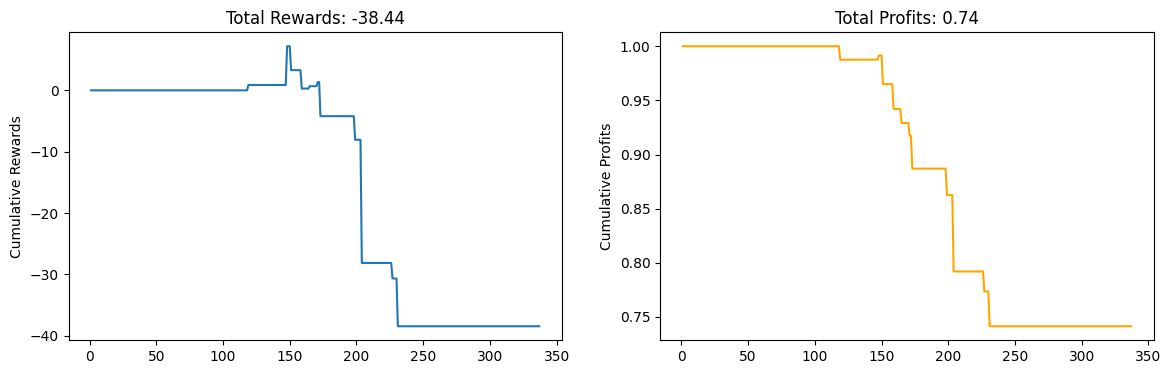

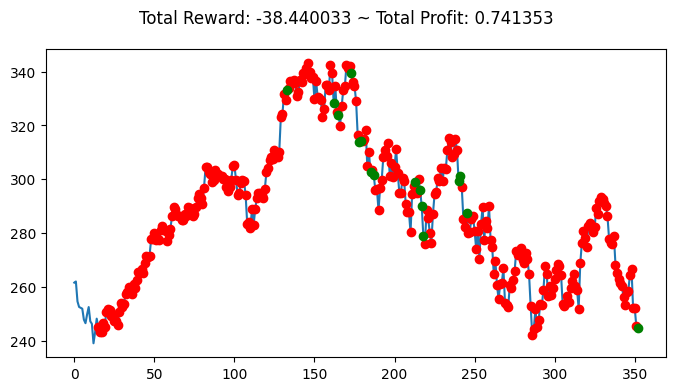

In [14]:
rewards, profits = env_train.run_episode(model=ppo)
plot_results(rewards, profits)

display_env(env_train)

info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': 1}


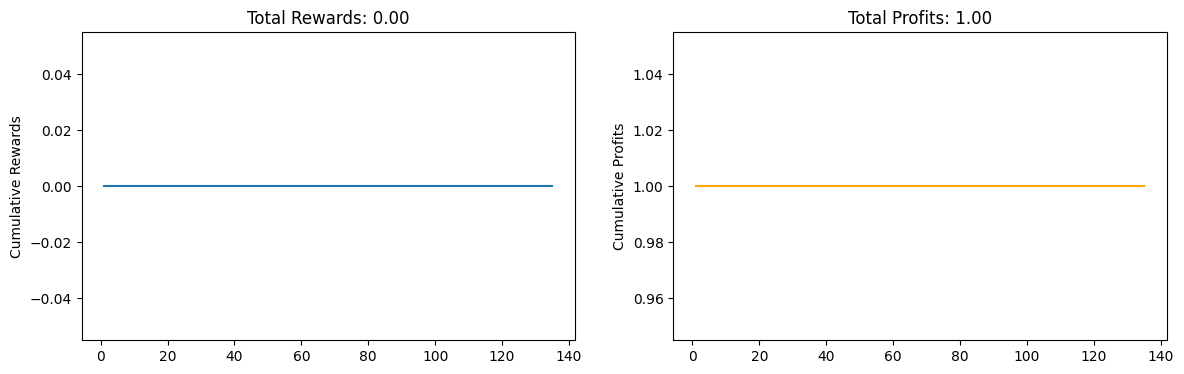

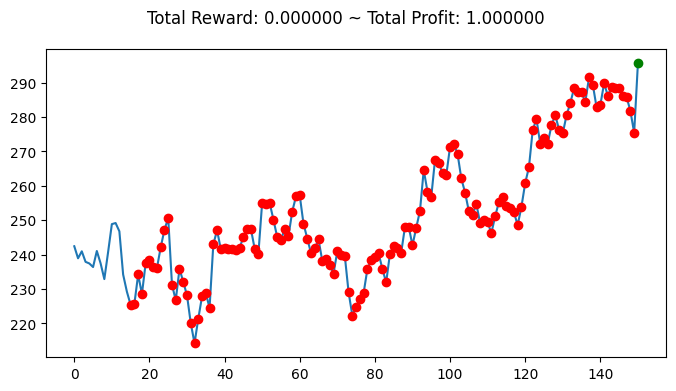

In [15]:
rewards, profits = env_test.run_episode(model=ppo)
plot_results(rewards, profits)

display_env(env_test)

In [16]:
save_model(ppo, cfg)

Model saved to models/MSFT_2y_1d_7_indicators/
